# Fractales de Newton

## Sommaire
+ <a href="#Modalités">Modalités</a>
+ <a href="#Introduction">Introduction</a>
+ <a href="#Echauffement-:-$f(z)=z^{3}-1$">Echauffement : $f(z)=z^{3}-1$</a>
+ <a href="#Une-couleur-par-racine">Une couleur par racine</a>
+ <a href="#On-ne-connaît-pas-les-racines">On ne connaît pas les racines</a>
+ <a href="#Annexes">Annexes</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<b><font color="red">Attention : cette cellule est à compléter par chaque responsable de campus en fonctions des modalités propres</font></b>
## Modalités
+ groupes de trois étudiants
+ un fichier au format `.ipynb` à déposer sur Moodle
  + les éventuelles images sont à incorporer au notebook après avoir été encodée en base64 (voir annexes)
+ toute suspicion de triche entraînera de lourdes conséquences...
+ Devoir à rendre avant le dimanche 11 décembre à minuit 

## Introduction

La méthode de Newton vue en cours s'étend aux fonctions de la variable complexe. Sous de bonnes hypothèses, la suite $(z_{n})$ définie par $z_{0}\in\mathbb{C}$ et $z_{n+1}=z_{n}-\frac{f(z_{n})}{f'(z_n}$, converge vers une racine de $f$. Si on attribue une couleur à $z_{0}$ en fonction de la racine vers laquelle $(z_{n})$ converge, on obtient une image aux propriétés remarquables.

Le but du travail est d'implémenter la méthode de Newton de plusieurs manières et d'apporter une représentation graphique aux résultats obtenus. 

<img width="50%" src="data:image/png;charset=utf-8;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90
bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAA9h
AAAPYQGoP6dpAAEAAElEQVR4nOy9d5xcdb3//zx1+mzJpvcECAkgvRdRkaYocFUQBUSFq4Dl8vOq
WMGrotf79eLFBjau7YoNG0UQRUA6AamBJIQkpGzLlumnfX5/nDmzM7szuzO7syXJ58ljHmHPnJnz
OVNf8y6vtyKEEEgkEolEIpFI9hrU6V6ARCKRSCQSiWRqkQJQIpFIJBKJZC9DCkCJRCKRSCSSvQwp
ACUSiUQikUj2MqQAlEgkEolEItnLkAJQIpFIJBKJZC9DCkCJRCKRSCSSvQwpACUSiUQikUj2MqQA
lEgkEolEItnLkAJQIpFIJBKJZC9DCkCJRCKRSCSSvQwpACUSiUQikUj2MqQAlEgkEolEItnLkAJQ
IpFIJBKJZC9DCkCJRCKRSCSSvQwpACUSiUQikUj2MqQAlEgkEolEItnLkAJQIpFIJBKJZC9DCkCJ
RCKRSCSSvQwpACUSiUQikUj2MqQAlEgkEolEItnLkAJQIpFIJBKJZC9DCkCJRCKRSCSSvQwpACUS
iUQikUj2MqQAlEgkEolEItnLkAJQIpFIJBKJZC9DCkCJRCKRSCSSvQwpACUSiUQikUj2MqQAlEgk
EolEItnLkAJQIpFIJBKJZC9DCkCJRCKRSCSSvQwpACUSiUQi2QO57LLLmD9/PslkkoMOOog//vGP
070kyQxCEUKI6V6ERCKRjMYNN9xAa2srF1544XQvRSLZbVi3bh3Lly8nFArx2GOPccopp/Dyyy8z
a9as6V6aZAYgI4ASyW7GNddcg6IoTbu/m2++GUVReOWVV5p2n83khhtu4Atf+ALHHHNM3bcJHqOe
np5JXFnzn4uZcizJnsH+++9PKBQCQFEULMti27Zt07wqyUxBCsA9lI0bN/Kv//qvrFixgnA4TDKZ
5Pjjj+cb3/gGuVxuupcnkdTFY489xuc+9zn++Mc/su+++1Zc9+CDD3LNNdfQ398/PYvbzQmEfzgc
rioKTj75ZA488MApW498PieHyy+/nEgkwpFHHsnrX/96DjrooEk9Xjqd5vOf/zynn3467e3tKIrC
zTffPKnHlIwPKQD3QG677TYOOuggfvnLX3LWWWdxww03cN1117FkyRL+/d//nY985CPTvUSJpC6e
e+45fvOb31SN/j344INce+21UjBMkEKhwFe+8pXpXoZ8PieJb3/726TTaf7yl79w6qmnTnoUuaen
hy984Qu88MILHHzwwZN6LMnE0Kd7AZLmsmnTJs4//3yWLl3KX//6V+bPn1+67oorrmDDhg3cdttt
07jCiZPJZIjFYtO9DMkU8J73vGe6l7DHc8ghh/C9732Pq6++mgULFkz3ciRlNOuzTtM03vCGN3D9
9dez7777cuaZZzZhddWZP38+O3bsYN68eTz++OMceeSRk3YsycSQEcA9jP/8z/8knU7zgx/8oEL8
Beyzzz4VEcAnn3ySM844g2QySTwe5w1veAMPP/xwxW2C2qMNGzbwnve8h9bWVlpaWrjkkkvIZrOl
/X7961+jKAp///vfRxz3xhtvRFEUnn322dK2bdu28d73vpe5c+cSCoU44IAD+OEPf1j12M8//zwX
XHABbW1tnHDCCaXr7733Xo444gjC4TArV67kxhtvrFor1cixxjrP8vt83/vex4IFCwiFQixfvpwP
fvCDWJbV0HFH44EHHuDII4+sOL9qTPQ45WzevJnLL7+cVatWEYlEmDVrFm9/+9vrrhEMHseXXnqJ
d7/73bS0tDB79mw++9nPIoRg69atvPWtbyWZTDJv3jz+3//7fw2fzzXXXMO///u/A7B8+XIURala
x9jf3z/mc1nPewDqfy7qWf9YTOXz/qlPfQrXdeuKAo51vKeffhpFUfjDH/5Q2vbEE0+gKAqHHXZY
xX2dccYZHH300cDYz2e9z1Gj7+Fqt123bh3veMc7SCaTzJo1i4985CPk8/kR+9ezpve85z0sW7as
5rGqbav1WTecl156qfQ4Db+0trZWvY3jOGzYsGHUx2GihEIh5s2bN6nHkDQHGQHcw/jjH//IihUr
OO6448bc97nnnuPEE08kmUzy8Y9/HMMwuPHGGzn55JP5+9//XvpwDnjHO97B8uXLue6661i7di3f
//73mTNnDl/96lcBeNOb3kQ8HueXv/wlr33taytue8stt3DAAQeUaoo6Ozs55phjUBSFK6+8ktmz
Z3PHHXfwvve9j8HBQT760Y9W3P7tb387++67L1/+8pcJGteffPJJTj/9dObPn8+1116L67p84Qtf
YPbs2RW3bfRYY50nwPbt2znqqKPo7+/nsssuY//992fbtm38+te/JpvNYppmw8cdzjPPPMOpp57K
7Nmzueaaa3Ach89//vPMnTt3Quc3Fo899hgPPvgg559/PosWLeKVV17hO9/5DieffDLPP/880Wi0
rvs577zzWL16NV/5yle47bbb+OIXv0h7ezs33ngjr3/96/nqV7/Kz372Mz72sY9x5JFHctJJJ9V9
Pueeey4vvfQS//d//8d///d/09HRATDiuR/ruaz3PVDvc9GM52Oqn/fly5dz0UUX8b3vfY9PfvKT
NaOA9RzvwAMPpLW1lfvuu4+3vOUtANx///2oqso///lPBgcHSSaTeJ7Hgw8+yGWXXQYw6vPZ6OcU
1PcersU73vEOli1bxnXXXcfDDz/M//zP/9DX18ePf/zj0j7jWVO9VPusq0YymeQnP/lJxbZ169bx
pS99iVNPPZWBgQFuu+023vKWtxAOh7n11lv529/+xnXXXTfutUn2MIRkj2FgYEAA4q1vfWtd+599
9tnCNE2xcePG0rbt27eLRCIhTjrppNK2z3/+8wIQ733veytuf84554hZs2ZVbHvnO98p5syZIxzH
KW3bsWOHUFVVfOELXyhte9/73ifmz58venp6Km5//vnni5aWFpHNZiuO/c53vnPE+s866ywRjUbF
tm3bStvWr18vdF0X5S/tRo9Vz3ledNFFQlVV8dhjj41Yl+d5DR23FmeffbYIh8Ni8+bNpW3PP/+8
0DRtXOdXix/96EcCEJs2bRJCiKr7P/TQQwIQP/7xj0e9LyGGHsfLLrustM1xHLFo0SKhKIr4yle+
Utre19cnIpGIuPjiixs+n6997WsV6662hrGey3rfA/U+F42svxZT/bw/9thjYuPGjULXdfHhD3+4
dP1rX/taccABBzR8vDe96U3iqKOOKl1/7rnninPPPVdomibuuOMOIYQQa9euFYD4/e9/X9qv1vNZ
73MkRGPv4eEEt33LW95Ssf3yyy8XgPjnP//Z8JouvvhisXTp0prHqrat2mddPWzcuFEsWLBAnHDC
CSKTyYiBgQFx8skni5aWFpFMJsVhhx0mfvOb34zrvsfLY489JgDxox/9aEqPK6kPmQLegxgcHAQg
kUiMua/rutx1112cffbZrFixorR9/vz5XHDBBTzwwAOl+wv4wAc+UPH3iSeeSG9vb8V+5513Hl1d
Xdx7772lbb/+9a/xPI/zzjsPACEEv/nNbzjrrLMQQtDT01O6nHbaaQwMDLB27dpRj+26Ln/5y184
++yzKyIW++yzD2eccUbp72Yca/h5ep7H7373O8466yyOOOKIEY+toijjOu7w8/vzn//M2WefzZIl
S0rbV69ezWmnnTah8xuLSCRS+n/btunt7WWfffahtbW1oft6//vfX/p/TdM44ogjEELwvve9r7S9
tbWVVatW8fLLL0/K+Yz2XNb7Hqj3uWjG+qfreV+xYgUXXnghN910Ezt27BhxfSPHO/HEE1m7di2Z
TAbw09lnnnkmhxxyCPfffz/gRwUVRRk1xRk8Ho1+TkF9n1W1uOKKKyr+/tCHPgTA7bffPqE11cvw
tdfD1q1bef3rX8/ChQu57bbbiEajJJNJ/va3v9Hf38/AwABPPPEE5557bs378DyPfD5f10VI++A9
AikA9yCSySQAqVRqzH27u7vJZrOsWrVqxHWrV6/G8zy2bt1asb38Cwmgra0NgL6+vtK2008/nZaW
Fm655ZbStltuuYVDDjmE/fbbr3Ts/v5+brrpJmbPnl1xueSSSwDo6uqqONby5csr/u7q6iKXy7HP
PvuMWH/5tvEca6zz7O7uZnBwcFSLjPEcd/jtc7ncCOsToOI5m+hxqpHL5fjc5z7H4sWLCYVCdHR0
MHv27NIXSb0MfxxbWloIh8Ol9F759vLHtpnnM9pzWe97oN7nohnrn87n/TOf+QyO41StBWzkeCee
eCKO4/DQQw/x4osv0tXVxYknnshJJ51UIQDXrFlDe3v7qGsaz+cU1PdZVYvhj/3KlStRVbVUjzje
NdXL8M+6sdi5cydveMMbaGlp4c477yx9DzTKfffdRyQSqevy4osvjusYkpmFrAHcg0gmkyxYsKCi
0aKZaJpWdXv5r8FQKMTZZ5/Nrbfeyre//W06Ozv5xz/+wZe//OXSPp7nAfDud7+biy++uOp9vuY1
r6n4uzwq1QjjOVY95zkZxx0Pk3GcD33oQ/zoRz/iox/9KMceeywtLS0oisL5559fOl49VHscx3ps
m30+zXguG2F3ft5XrFjBu9/9bm666SY++clPjvt4QVPWfffdx5IlS5gzZw777bcfJ554It/+9rcp
FArcf//9nHPOOQ2trxGa+bxPxDal1m1d1615m0Y+63p7eznllFPQNI277757TEE9Gvvvvz8/+tGP
6tq3WoOhZPdDCsA9jDe/+c3cdNNNPPTQQxx77LE195s9ezbRaLTqL7l169ahqiqLFy8e1xrOO+88
/vd//5d77rmHF154ASFEKf0bHDuRSOC6Lqeccsq4jjFnzhzC4XDVjrbybc041nBmz55NMpkcVWhP
9LizZ88mEomwfv36EdeVP2eTcX6//vWvufjiiyu6c/P5/JT4szVyPhP1M6v3PRCLxep6Lhpdf601
TdfzDn4U8Kc//emIZolGjmeaJkcddRT3338/S5Ys4cQTTwT8yGChUOBnP/sZnZ2dpaafgGrP52R+
TtVi/fr1FVG4DRs24HleqZu3kTW1tbVVfd9s3rx5wuscGBjg1FNPJZfLcd999zFnzpwJ3d+8efOk
7dJehkwB72F8/OMfJxaL8f73v5/Ozs4R12/cuJFvfOMbaJrGqaeeyu9///sK64zOzk5+/vOfc8IJ
J4w7lXDKKafQ3t7OLbfcwi233MJRRx1V8YGqaRr/8i//wm9+85uqIqq7u3vMY2iaximnnMLvfvc7
tm/fXtq+YcMG7rjjjqYeaziqqnL22Wfzxz/+kccff3zE9UKICR9X0zROO+00fve737Fly5bS9hde
eIE///nPFfs1+/w0TRsRKbnhhhtGjVo0i0bOJ/BHG68wrfc9UO9z0ej6a61pup538NOd7373u7nx
xhvZuXPnuI934okn8sgjj/C3v/2tJAA7OjpYvXp1SVwG2wOqPZ+T+TlVi29961sVf99www0Apdri
Rta0cuVKBgYGePrpp0v77dixg1tvvXVCa0yn05xxxhl0dXVxzz33sHDhwgndn2TvREYA9zBWrlzJ
z3/+85IFx0UXXcSBBx6IZVk8+OCD/OpXvyr9yvviF7/I3XffzQknnMDll1+OruvceOONFAoF/vM/
/3PcazAMg3PPPZdf/OIXZDIZ/uu//mvEPl/5ylf429/+xtFHH82ll17KmjVr2LVrF2vXruUvf/kL
u3btGvM411xzDXfddRfHH388H/zgB3Fdl29+85sceOCBPPXUU0091nC+/OUvc9ddd/Ha176Wyy67
jNWrV7Njxw5+9atf8cADD9Da2jrh41577bXceeednHjiiVx++eU4jsMNN9zAAQccUPGF0uzze/Ob
38xPfvITWlpaWLNmDQ899BB/+ctfpmyAfL3nc/jhhwPw6U9/mvPPPx/DMDjrrLMaMs6t9z1Q73PR
yPprMV3Pe8CnP/1pfvKTn/Diiy9ywAEHjOt4J554Il/60pfYunVrhdA76aSTuPHGG1m2bBmLFi2q
OG6t53OyPqdqsWnTJt7ylrdw+umn89BDD/HTn/6UCy64oGKqRb1rOv/88/nEJz7BOeecw4c//GGy
2Szf+c532G+//Rpuzirnwgsv5KGHHuKzn/0sDzzwAA888EDpugMPPJBDDjlk3PfdDL75zW/S399f
+nH+xz/+kVdffRXwS0xaWlqmc3mSgKlqN5ZMLS+99JK49NJLxbJly4RpmiKRSIjjjz9e3HDDDSKf
z5f2W7t2rTjttNNEPB4X0WhUvO51rxMPPvhgxX0F9gTd3d0V24fbh5Rz9913C0AoiiK2bt1adY2d
nZ3iiiuuEIsXLxaGYYh58+aJN7zhDeKmm24a89gB99xzjzj00EOFaZpi5cqV4vvf/774//6//0+E
w+GmHavWeW7evFlcdNFFYvbs2SIUCokVK1aIK664QhQKhYaOOxp///vfxeGHHy5M0xQrVqwQ3/3u
d6taSEzkOMPPr6+vT1xyySWio6NDxONxcdppp4l169aJpUuXVti11KLW43jxxReLWCw2Yv/hdiON
nM9//Md/iIULFwpVVSvOoZHnsp73gBD1PxeNrL8WU/m8V7MyuvjiiwUw7udlcHBQaJomEolEhSXU
T3/6UwGICy+8sOqaaj2f9T5H4/msGn7b559/XrztbW8TiURCtLW1iSuvvFLkcrkR+9e7prvuuksc
eOCBwjRNsWrVKvHTn/50VBuYWp91AZ7niXg8LoCql29961uj3n4qWLp0ac31jfYcSKYWRQjZzy3Z
szj77LN57rnnqtZRSSQSSTWuueYarr32Wrq7u0d0qkskeyKyBlCyW5PL5Sr+Xr9+Pbfffjsnn3zy
9CxIIpFIJJLdAFkDKNmtWbFiBe95z3tYsWIFmzdv5jvf+Q6mafLxj398upcmkUgkEsmMRQpAyW7N
6aefzv/93/+xc+dOQqEQxx57LF/+8perGulKJBKJRCLxkTWAEolEIpFIJHsZsgZQIpFIJBKJZC9D
CsA9gPvuu4+zzjqLBQsWoCgKv/vd78a8zb333sthhx1GKBRin3324eabb570dUokEolEIpkZSAG4
B5DJZDj44INHONjXYtOmTbzpTW/ida97HU899RQf/ehHef/73z9iqoFEIpFIJJI9E1kDuIehKAq3
3norZ599ds19PvGJT3DbbbdVjHQ6//zz6e/v584775yCVUokEolEIplOZBfwXshDDz00YqD7aaed
xkc/+tGatykUChQKhdLfnuexa9cuZs2aVXWIu0QikUhmNkIIUqkUCxYsQFVlQnBvQwrAvZCdO3cy
d+7cim1z585lcHCQXC5HJBIZcZvrrruOa6+9dqqWKJFIJJIpYuvWrSNmM0v2fKQAlNTF1VdfzVVX
XVX6e2BggCVLlvDV2x8nEotP2nEVFGZFjUm7f8n00pezcWd4FcqunDOlxxMICo5H3vEmfF+DhbHv
I+u4uN7I5yBtuQC4nqDgetieIG979Oddug7bQPTjZ8C2Fnj227SHdEL4Fw2FKAYmGiE0DLTSfcYw
URnKGKgoxKn9/k4SrtgfQAFMNGIYpes8BINYOFSer0AwQL76eeNU7J+igECQxqL/xTgDnz2Ojrdt
wnt2DokXFxKPQ6EAvb2g/OhWUncsYUE8TMzUUGskQYSArO3ieIL+vEOu18T1BKrhUehIk24fwDv9
JeKYeN1R9NtWwY8PplUNE42CqkI47N+Xrg/9fznRKGjayO314DiD/PjHi0kkEuO7A8lujRSAeyHz
5s2js7OzYltnZyfJZLJq9A8gFAoRCoVGbI/E4kTik/fhoaAQlQJwjyWvzXwBGFanVgBaroewXaq8
3RrG1Nwx93EcX6AMx9CLt3UFiuMhHA9rQGdgO8z+1TGY2SiiFbqfX4b22l4MDAw0IhgYqBhF8RcI
QA2FEAbKMAEYwqy5tnAVAaihkCCEhkIYHQEUcLAoVBWAeaqrIwcbtWx/Aw2BwEDHmGMysKiAm3RZ
ON9gTl+SaBQyGbBt2HHzsXDkNqxUhJChEdb99Kmi+GfnFV/TOccDTbArY/P8szEOfPJgDAP6wymc
q+7Hem4B3nM2fSiY3ziO9meWkUz6ok5RIBYrPk6qv204qgqhkP9vo2gaGMWPVlnGs3cik/57Icce
eyz33HNPxba7776bY489dppWVJuQLj+Y9mRMTa0QBJLmYbvjF9aBIPSEL0jB/7f7hSjhu1bR6kZJ
JHzxEX3X+Th3LUdHRUNFRcFAw39mh57bMHpTnmsXQQYLgDwOBZon0BUUdFQSS3Ms+tyThO5fgXPb
PriuL/yE8M85ft9+qG9eT9b2cDxBzvHIOR4Fx6PgemRsj4GCS39rP/2vhNnyaIy5ryxk/nxfeImB
MM4f9sF5aCHOhW8l+o4LaH9mGYmEL8oUxY/4BdSK8IXD4xN/MCQuJXsvMgK4B5BOp9mwYUPp702b
NvHUU0/R3t7OkiVLuPrqq9m2bRs//vGPAfjABz7AN7/5TT7+8Y/z3ve+l7/+9a/88pe/5Lbbbpuu
U6hJwtw7X6KKAlFj9E/2nO1RJXCzWxE3NQqux0wNAubsiadhG8ETArtJT2puAink8vSzwBeEXkeG
0GpBfNMCYsIXHqoKLS3Q+62DiJ+6lVhZOlcriqnJwEOQx0FHRQAuHoLmPG5hdAq4aKkw7pYE6bQf
+bN8zYlT1Js7frAv83DJ6CqRYgTQLq7B9gQ9Hd0MdvQR3b6Y0Lx+Ot7zON2PL/Jf69E0xmWPkHip
Fe87R8B9S1EKcRRlKCoXRIAVharRYF33rxsPhkyqSJACcI/g8ccf53Wve13p76BW7+KLL+bmm29m
x44dbNmypXT98uXLue222/i3f/s3vvGNb7Bo0SK+//3vc9ppp0352iWVJEL+T30FiBqjF/boqlsS
gKnC2Kk+SeNkp1gAukKUIm4zBSEglRxk0CvQ8uQakl6UWHxIAALk3rgVBw8HD20KEkt+FNAuCczh
qd+JogC05DGO347+kMHAQLIkwhzHf0zU/ziZ7CceJWZ6CCHQVQVP+OIvVXDo396CeWQe49Kn2O/A
FGFNheN7KeBi4JLaNpv0H/bD3DdDztiC8+BShOOH5cyyrLhZJUOu674oHE/tn2n6kUOZ9ZVIAbgH
cPLJJzOanWO1KR8nn3wyTz755CSuStIIiZCGpiilWqJ6iOhDn/6aouAJwaAUgpIm4wmB15bFXtSF
uHs10T6Ix33xoap+ZMx73Sa6rz6W+HVP0ITSxRJZbGLD6gbLGUv4ZbGrbrdwcUe5rYpCbFGewUO2
seuJVtrDkEglS6LJtiESgZTl0urqOJ7A1FQKjkdqQS+pFTtp6ZzFrENSxFtd4oRIFB+ZFAVSWGQt
HaM/RvusPJl9suziFey1K0BEKtK/1aJ1mibFn2TiSAEokUwjcVPD1BQMTZlQfVRYVxH4UQg/AiGF
4O6GJ0TTUs45u760uuV6VTuAwY9yBdFIVwic52fhrm9DNf0IlKYN1anFXliAuH8/4ImmrD/AxoVR
uoRHQyCwqP4+cPBGTRgrKJhoJA7dRfZt6+i66TUUepLEYr548jxf/NquX/unKn6afGDOLnLHr6e1
FdpXO8QxiWMWm2H8H3d6sU7SC9sklmVJhgx0VWFgZwKRMaCs2aNaT56ujy+FK8WfZDiyCUQimSZi
pkrMVJvWCKGgYGoqUUMtpZIluw8CmtYRXa2rtxquGL1yLhCH+Q0t5F5swY7kyWYhl6P0r2XBwKsh
9J/8vuF1eoiaUbqAVLHho1HGe7sABYjNtpnzpm2Evn8HA1f+nQEtWzpn26bU+JGzPfo3hck9PptE
q0cMo9QUUzUlnjZxf7kGHl5ExNDI2i759zwO+/YSCg2JtGpRvvLUe71I8SephhSAEsk0EDVU4qY2
KR2wCkrp/iXjp2+K/f9mIgIYbBvAak2zNBJD+emtDB68mXQa0mno6wPvDz/Hw+PV5ZvHdYzRY3F+
g0ctL79aDJCvmeLN42A3UDMYigpmLS2QeP9z5N/3GP1ugVQKbAe0y58ga7ukLJddq7cS+8SjRDGI
YKAV39s57JK/YBqLDDbpfpW+bx9IpsfguXujPJcawLxnX+LbOkqir5rtS1D71yiKIsWfZCRSAEok
U0xYV0mGmmOJUQsFhbipjdlJLKnNVDYme6J5afuM1dzucKM7TnKWR+Lyp1nUZlBQbXp6YNcuGDjn
SRbcdwDzImGW/eyk5h10GB6CfvJjCsFBCvSTH1NU1oOGilmUcSF0kiGd6HufhbXfpev5r5J3PKxY
jrSZJ//hf9DyrpfQE35jioOHW+xU9ooNK2ksUlh4CKyF/eg/+BPbW7sJ//c97H9Mnlmb5qOLoR9t
w6N8muanhBsVcoZR3UBaIpE1gBLJFGJqCq3hqXvbJUM6nnBmtNWKxKdZNibNRMFvNuoXgi41RasI
U7j+NgrveDvp++ezIAK9aZeCcHHf9QTtJBs+RtDRGxuj1k8UH6E+cuM7GaCAS6FKXWCKoTnnwbPg
4o2oITR1BUsXJFDJbv0aztyrcHZeT9zQUBC4CAq4pR93CiMbUXpSLjtv2p+WpTki52wg/Zr3EYtC
a4tCNOYLv1oefY2KP12vHkmUSEBGACWSKUNXFdojU2/A1RrWMTVFpoBmMNMh/WoJzvIfCoqioCoK
yVfmYt9wJDsfT+JYCoMFB+2Kx0iHs3Q7ObbbGTqIohanc4xvPdND+eMgqtQkCvxmlEAQeggo6BRs
D/PKJ1BWX8nAgEJmUMXKqOQdjxw2WWwytktGOGQykC0IdqU8tLedx2GLoyTXL6DtM29i/lyFjllK
aaRbMAWkHE1r3Lh5PLeR7F3ICKBEMgUoCmjT+HOrLWzQk7VxZBiwLjzBlEVMBYLBQnPqDYWoP5Jo
udVNpzO2H/VSFL9cIWO56KpCS0gj8/AyUn9fRHrNNkKXP4I6yyWOyUpMlDEieBls4sNmAQc4eORx
iEzSV1Ig4vJVpoaksUqPmBh2GxeBXRR9haxKIeTRl/GI3nwU7ZZKQVMJpeNoaz6GEJBb2Yv10UfY
deRWDEXFfXg+4eO2k3336cz9ly1kExky3/sZnh6D1jm037mGUMhP09Yydh6v+ItP3oh2yR6CFIAS
ySSjKH7qty08vfb7uqr4XZ9SA45Jf37qGkCa6fucc7ym3h+AWhSCwZQSbSBC2+2rcE7oJHL6VmK6
QQidUI2Zu/XiIfAQVQXiRAjEX66K+BveKBJE/xz8KJ6LRy6jklYtCncto7BfF+3/WIGpmNiGwFEF
mkZJxCnds+DTZzIwAAUL2r7zF/SfHk7/l+5my6/WkHznTpa+7TIcBxIJP9pnmv5nRK25vlL8SSYL
KQAlkilgusUf+Kngrow1AyvN9m5SVnPEpuv5zSSThRDgtGbQ7lxNLB/D/tDZuLf+Au/gfpqh2YIo
YBi9qSJwNPGXwym9HwJTaRuXDDY5bJwdMfrvnUtuTj+JQpiWvx/gr0wHxfXQ1eIPPLNMBCq+uAPg
a6cA0HrroQCYTxxGqMUXacHtVNX/V6/ybVxt22joukz7SupHCkCJRCLZA7C9+qN/rhANew46niC1
ejvRJYtIbp+H50HX144he/NtxOp0JrZxi5211QWeb8/iz/gdMlIZHxYuAqqmfQOxGXQL28XmkED8
pfs0cs91oOR1Wp9eSmJJCyFdRSl+Y/qPn1Iq6zCMoTRuMCGlPJIXPDzBv8F4t9HEn2FUN4IeDSn+
JI0gm0AkkklmJvnxxUxNNoOMQd6Zulm8OWd6Jra4nqjbLBqKU0q2RBE/O4jIlllEo5BMQuzxZeSu
P7zuWbzVOnCHYxcjc/my6Fyj5HFK9zGcUcWf67Drn0l6thh4NxyBYumE90nRHtGJGb7Juqkp6Kp/
gWJ9rzY0oWP4JUjzll+C6F8t8RcYNzfCePwBJXs3UgBKZjRpa/ceaaYoEDNmkACcQWuZqeSdqbPM
aZbYdDyB7U7OogVguwJl310kutpI9LTT2uqLlGgUwuvn4uCNMFd2EVXNmKuJsmpYuOSwq6Zvq1Eo
pnpzOKMKTQevJP6sovizcEkLm8F7FqL94Aj0Fov4qhSzujpImBoxU8PUVHRVwSj+qysK6v1L8U58
pRT5UxRf0KmqL/6CtHBwAX+fUKi2+AuFqJgGUg/hsPT6kzSOTAFLZjR5x5tRETSJpFkE3bbNwK//
a9rdVSCEHwF0VY/cAduxetuwrDiWBdaX7iL7tcOJFG1SKGsECZo6hr97bTzqzWwGorIeY2e3jr1s
3IpopYNHAcdv+nBdnP8+ijbDxFm7mLZ9c4Q0rWiFA6qiIISg4AqC36XOkn7Mp+cDQ6IPhgTfcBEX
pHSrjXgzy2YsNyr+gpSyRNIIMgIokUgkRdKWO2lCajjNitg5nqDQQOuv4wmsBk/SE6A9uoj2hQ7d
c7rYvh26uyHWlyB+0va6UrvlZBqc0+vgjXkZ64x8sTckEws4Jb++dfSwixyDG+Kkj32Z2al2YoZK
IqQXJ+poGKqCpg5VLwoBmb/PRxyxvXSMIAI4XPxFIpR8/mqJv1CothVMLQLxJ8s6JONBCkCJZC+j
Izr9HckzFdebGv+/lOU0ZfKH60HWbjxl3Wi3sKqAYZkomiDy9b+SXt5J36nP4qRMsq1pokUPQIEv
rMZcd3E27lThFm1dysWfXUwFGx98Cwf86nUUNBvlrp+gzsoR1lWihkZIUwjraskKRy1TWooKHX/8
PeH7VhIODwm44YIsEhlqDKlGkCpuVMRJ8SeZKFIASiS7AVFDZX7CbMpsX01+Y0w7zYoyCprr65ip
UnMbiB/90C527LuZrrYeun72Y/KrOnnpiwcQev9TJdsWMUzWFoalXMvxZ+ROrggUCFIUyGKX1mXh
YhdTvwMU2HDAi2z/2kHse/bl6B15tn9zDWFdxSiKv5CmYKgjJ+mkvnUwu361nJBjVlxXTfzVQtd9
IdfoW3I8dYISyXBkDaBEMsMJ62ppfnBr2J/tO5WdqnsLqYLbUGfsuI9jOU3x6/MEZKzGXgeuEGTH
0XmsKAq64TH38X3JPLyCnpv2h1//mrnvf56kbox7/JtbFIExml/E5ou/kQIzkKjBXGHFdFm6QCUZ
NSic/T6yH/wnCn5HRUhTUZSRzToFxyP++M0YeQV+diJAyRA6IByuLf6Ceb/jEXDj6RCWSKohI4CS
GY1A0Juzx95RUjfNSD02i105e1LNi2cazYzYjed+JnxsoeA40BrTiL7+UuzOsds58jhVu4ED3OL8
XTEifjiO5RX/G6RQVfyVR//cYu1g6y+PIJfSSKdBOAqmriDwayUHCkM/tnK259vhCJt8VmEw7+J8
5zBaWkZG44J0cDVU1Z/UMR7xNx5vQImkFlIASiQznLzj0Z938ERxRu0EvyS7MlJQD2cqNKhAkLbc
hg2Yq+F6jVskeQ1G/4SAXJVO5fSggqGqtLXB4AHvJ71LG/GaHPn36Dh4pLBKTRqNvMZFsdvYTynb
NaN+dtHuJbjvAi4JQqSjGTJZQU8PdGX9VHHGcsnaHpYrGCy4pCw/OpyxXPLnPot71woGXnMJ8VsO
K/kABtE/0xzqBh5OIP4aRdOgpcVvJJFImoUUgBLJbkDW9tiZttiZtig4e0/EbKoIvuwnk5ztNSXF
LMT4/DHHOnQ9S7Ncj9YH9qXdjtPSAvPmwSu/WFTRBeziYQ3rCs7X1afrR+jSWNh4uHVe8jiksUhj
VT2Gg0cGm0JR/AVRQAADlewf/pf+vEM6K+g+93EAbM8X67tyNn0iR38kxYBrsV0dRFNh/u2/Z9m/
bkBVKz34giaQaox3Rq+c7SuZLGQNoGS3wPFEyXlfItnd8IRoWuPHeESkYOzoX852x5Ro6VgGMb8f
L9OCpul48wfp2D9bt0+fOsIVsDr1mkWPdbxgFFwQJXQR2EWBGhhC66ik2gZQNswiGdLIOx75jIJq
a7iruvHmpxCmg3P3cjrf/iyLo4IcKpmbV7NgzlCdXxAJrIamjS96J2f7SiYTKQAlMx5PCFKWQ1t4
97MvEcJP4YZ1GWwfjuXWIxsmH9ejKWnZ0Si4HrY38cYdyxXk7Mbvp1meg9r8DLz/n6TuT5H57Roy
56xDfe85uK98F4Ffz6fh19B5iFJ3MAyNgTPqFIETIRj3BkH61xd9Xlkq2MIlj4OCQvbj9+J86QQi
+3eS0jQYDKOnwnS8ZRP2piTeHfvQ89A8IpEDSM3NAbBsnkIsMmTFUj7toxxd9+v2Gq35C8bISSST
hRSAEskkM1BwCOszw6o/28TpExMlWyyqn24s15u0MWrgi8tmpH4LjhhX93fB9cY0iq53fdGNc3FO
e5G+T92F/bJJ+MhtWJ5bEnU2Lhp6scFCwRwm9vw0LCO2Nwu7eP9BCtouir5sMQVsP9+O9eAC0ot7
EO1ZFBQc4aG2FnDaM+TOfIEYUVoJk8AkRgRzuUfv5U+RX7KY/AutzLrhWGKYpRm/wVzfauLPMMZn
82KastlDMvlIASjZLfAE5ByXiC7Hwk2EtOVO2ZxbSdF2xZ64vUze8cZV+5l3Paw6poRY7thtF6qi
EDVUBp6dA5vDeP0hCsdsZs6pr0IDNi5BI0aoiV8/gdArrzS0cMkWzZ+zWyPYj88jE0+jPzIffVsU
bVYeAMUVOJZL4tHl8Lk34p35Cs4x3aWooYtH5o6lxDbPIn3Ro4QeXo0xYJZq/UYTf+Px6gs8/iSS
yUYKQMlugScEliuI7Kav2IGCQ0toehc/WHBmRMp1JmG7jY1RaxSvCdG/8Yq/nONi13FsyxWIKr8K
hj8uquKbiBvb2nBvX0PyhQWkL30z3s/urPpN4jdpKGhVeg3tolxTYNxC0MUrNXOUzwEOJpFkHJe+
Tx0PZ71I5wGv0BppoWWghdhxfagK2K5B3vHQFI/sqS8Q/+5xGL86Au/J5eQO6oT9+xkI2cSO6Mb9
zf7kW7Mkv34yZiZSEmhB6nc4gfirNf2jFtLgWTKV7KZfpxLJ7kNQBwjTKwL9L/ppO3wFmSZExZqB
J/wawMnAFeOr1ytnssUf+CK12p7uKLdP9LWQiGmE1+5Dj5snoQ+NgrPxMFDxih23JlQVgcGEEA/f
lkhHHbM+UCDKavsY0Xzi+/v5+/R6Fu4f9yUxEKftS120pVpoyccJhVUs10NXBbYn/DKEq08hHFJ8
YfdqB96ONnjQwvME7rw8oZ0JEnEX0zaImlrJ46+aIfN4xF8QRdQ0Kf4kU4esTN9D+Na3vsWyZcsI
h8McffTRPProo6Puf/3117Nq1SoikQiLFy/m3/7t38jn81O02vFhu4LMDKphawQhmleIPx4GCs6k
Nzo0gutN3PR3ojiemNSaSCEm1lwyFeLPcsWoQq8awf6RiC9yAqEXRN7KRZlXx7PsFrtzg5TtaJdc
UeC5xa7ecgLxF3T8Oj87gPZWhdbNc/EuP5OWfJxESCNuasQMDV1VUIDUuf8kvn4e4bB/TpEIxEyN
hBNhjhaltaedpGHQQph42Bd/0ah/Gd71G4x2a0T8BXWCui7Fn2RqkQJwD+CWW27hqquu4vOf/zxr
167l4IMP5rTTTqOrq6vq/j//+c/55Cc/yec//3leeOEFfvCDH3DLLbfwqU99aopX3hgCMSOaBsaL
KwT9+YnbWzRKMM1gN37oJgUhmjeTdzieEOPy6gsoOGLcNX+NiL/xdGKnLZfI//6JXbEBCu98Ek8P
ZFeN4xTr6MYiiOiNdSnHLhONQeQvuOy8+hgsCzq3afS/FENVQMFPZSuKf/4F10NpKZBMDjVrBOIu
GOUWCvlWLIbhC7to1P93uMjTtMa7fcfbIdwsksnpOa5kZiAF4B7A17/+dS699FIuueQS1qxZw3e/
+12i0Sg//OEPq+7/4IMPcvzxx3PBBRewbNkyTj31VN75zneOGTWUTAwh/LqqgcLUicCUNfPEX8Z2
J7XubroR+CPExhvhtNzxdfvW2/ABfjR6tH2zZalrT1Cxb0tYZ1u4jx1//g7b4720UpkHDSKCAQJR
mvDRLFw8stilhpICTqnhI4dDAYfE+u8yMACDWo4VH9wADBk8ZyyXrOXinfs8u364P2Hdn/kbdN5q
mi/6YrGhTl8YinoOJ/D5a0TIBceYDvGXTEJbW+M1ipI9C/n07+ZYlsUTTzzBKaecUtqmqiqnnHIK
Dz30UNXbHHfccTzxxBMlwffyyy9z++23c+aZZ9Y8TqFQYHBwsOIyHeQdb7dNA0MwXssjZU2+CAzm
zs4k8QczYz2uB4OFyXkdTeT8HK/xukHb8xi0nLrFn+ON3fhSrSkkwFAVOn57OPqqD5Pob6nL0kUg
yGGTwZpQ6l8gyGCVzJ3tohDMYpOzPfodixw2BVcgVEGfU8C7ZC05bLrzFjtSFt0Zm525Ap2/WM6u
wy9ivx+8EdXTSpG4WGxkbV847E/jqGb0rKqNC7nxjoRrBolEbcNqyd6FbALZzenp6cF1XebOnVux
fe7cuaxbt67qbS644AJ6eno44YQTEELgOA4f+MAHRk0BX3fddVx77bVNXft4mQkCYqJkLA8Fl5ip
otD8EEDWdidN4EyErO2Sa2Ae7WQxWaUEnhDjjvD6s2brF38CgetBrs5ooZ/yHj26KET999fWomLc
ciSZz/6DsObHEgo4hNBLEzeMKjGGLDYKCpE6v35yjIymukVvv5ztkXVc0sIieum/0Lt4J86/P0Dk
5iNwbYX0ex9GXPQUZhuomDi/XsOOPlDf8Tyt//I81oVvJdrXVhJ/5cbLiuKnaGtZsiiKL6YaRVXH
d7uJEEQ3pb2MpBwZAdwLuffee/nyl7/Mt7/9bdauXctvf/tbbrvtNv7jP/6j5m2uvvpqBgYGSpet
W7dO4YoryTkzQ0RMlHRx4LzTxIYIgSDnzEzxN1PwxORF/6ZK/LlCkLLcMce7BXjCT72PJu4C8Tc8
+ifKrg8ouB7q0gFUwyOzS6v66nXwSp2+I45VFHD1XIL3RlAjmCumewfSHtk7lmJddxzJ75xA+2s7
2W+lyv6/OZF20yTS7jDr26/Fed2FmOkIrYSZddp2kosKmBe8HfUN76G9v61U01cu/oIRbLUE03gi
eEHd4HSIv3BYij/JSGQEcDeno6MDTdPo7Oys2N7Z2cm8efOq3uazn/0sF154Ie9///sBOOigg8hk
Mlx22WV8+tOfRq1SGBIKhQjNoE8Q1/O/RCYjejaVpAouKVxawhqaomBq4/9NZrkerhAM5Gem+POb
eKZ7FeObpTuZ99uI+AuOUY/wK+/uHSuq5xWtiqqJvyC17ApR6moWAgpfvZPez5yA+dd9sd71EiYa
GkrFCLhqI+EaobxuMKgjDCZ7eHfvQ8sXT8UK54mfsYXEnBwC6MvZaKqCWN1NSwu0aHGs7xxG75mb
cP+6DPH3pSQ1k0hsqKavPOUbdPLWYrz1flOd8g1mEwddxhLJcKQA3M0xTZPDDz+ce+65h7PPPhsA
z/O45557uPLKK6veJpvNjhB5WrEoZLTan5lEznExNIWQtnsLwIBAtLWG/bekokCoDjFYcIcaPKaj
w7gRLFdMe+RWCF90Nxvb88bV9Wu7oqLhohZBlLie9KxvsQMFZ+y2C6+YFrZrmEHXsoiJmxq7/rAS
cf4zGOduBAxsXFR0HLxSXaAfBQQDFb2BhFNgH2PjlvkFimJHsd/0UfA8HHJET9yCtiCDpupYrocn
IJV3iF3ydkJRCKkm4pYjsO7aH6U1T2RLB9EohGKVpsuBDUut37maNiQWG+30neqZvsF5yHFyktGQ
AnAP4KqrruLiiy/miCOO4KijjuL6668nk8lwySWXAHDRRRexcOFCrrvuOgDOOussvv71r3PooYdy
9NFHs2HDBj772c9y1llnlYTg7oDlehiqgroHmWcFIk5RIGGO/VykdpPRbv4klz2387ceETccy62v
4cP2PD86N8o+vqG1KO4/tl1SsL8ravsAOp4Y3VLmwC5mfeJNpBb+htixPaXNgQ9fedTPLsby6n2n
BiPdXDwy2GSFQ/jnh1I4YIcvBD2XnGLhHbmRwuI+2NlKPuox8FICa3kP6rPzSSYro18xK47aE/fr
AdVK373AvLkWQS1gox+PhjH1Ni+BqJXiTzIWUgDuAZx33nl0d3fzuc99jp07d3LIIYdw5513lhpD
tmzZUhHx+8xnPoOiKHzmM59h27ZtzJ49m7POOosvfelL03UK4yIoZo+b2m6fCh6OmMQ6tenAHaP5
YKoYj1Abi/HY7BScsR8P2/NwRRD9G4kQlARaIOZGo3x/bxTh5x+7coSdV8UzUTt2GzZ+B3JbcZuD
h46KjYuOWjEBpFY94HBcvFLq18Il+9+HY+dUwq/MJTwQwvEEluXi5UAs7cM78RXU3g62kSFz46kk
t0SZu3Me4YgvwIKpHYHoCyJ5AaZJaa7vcDTNv01wu0YIxOdUir9IRKZ7JfWjiN0l5yeZUQwODtLS
0sL//H0dkfgUVzUPoz1ioO1BUcA9Da/YsDATIoC92eamyfNOEJ2r/2N0rAkffuTNF3/VInnlwnG0
usNqM37HqlO0PTFigkkgHAPR6Hj+XO704m4yV74RNv4Pc0IhTLSK2b4KjBCBtfAQJbNor9hBLIoN
H/ZB/0q2y2TZf6ylNaLTlbEY2GZSuH0FoVkW2ttfILQsxY6/zqb99oNoNUKlRotgtFrg5Vcu4kxz
SBRWQ9OGzKAbJRB/U+mzF4023uiRzw9yzTUtDAwMkJSu0HsdMgIo2e1JFfwmij0tCrinUN5IMJ1M
RkTV9por/lwhyLteTeFXbbycWyNV64n6anp9cRfcZuT+omy7J4a6gtWX24mHVJzfHIRzwTpUFAzU
UhRQ4Ef93OItDEZaHgWG0QKBg4eNR+Z7B+Hdswz7y3fjrkhjD0DkvOexXI+U5eLE8+hH7CL864Mx
HRA/ORyiNot7o4TDemlEW1AHpygjhVgwe7fW78ag1m93EH/B+dYSshJJLeRLRrLbY3se1GFGK5l6
BIKBGdKc0uxZzDnHpRFdO5r4EwgyxfT0cBGWd7xSswZQtW7QE35kbjynWKteUIjRhbsrIP2bn8Cf
9yFSHAYX1O0BJREoytK5I46BH/HzxZ+L97ODUNcuwFjVj/G3fUnftxhhaRif/gchL8HG80+h7Rv3
EvrEaYSL49mwIzAQIRz3RVcg6qqJMF0figaOJv4Ca5hGCEbBla9hsolGKyeVSCSNIAWgZI9gV85h
VsSY7mVIhlEtYjUdTEaHtB8Nq+/cRpvtK/DHkw2/1nIFdnFWbyACq1m1uMXt3RmL3O3LmH/sAKHF
mRHHUYCQXp+qqVaf6JalgQWgKSDedS7mA/877HwqRWD59nIKOKVOX684x9faZtCGSutim8F8mPwN
h5I0dAqnXkD3R58geeNdGJeeSzgXKUXxgshX+bi2agIvaOQYTSzF46OLw1qMZxrIRJHGzpKJIgWg
ZI/AE4KerE1HVIrAmYJAsCs3M6J/zbb+yzmN1TSOJhTLxZ/rDTWHBNvyjkfW9shZLr0XP0T0mMvZ
uMNm32ueQVcV3I0tONtjmEduYU57iF1vfAHn1Xa83gjbUwXM/zmelg4X41+fxCxGDzVVQW/AQimo
/RNUCjn1/pvJtKVIEi+JOQOtJALdURo/CrjkBzUGbnoNcVMj73hYR79C5iMPkPrTQfRffTxzrATR
BChOnNB3TkD5nkcIAyU05HEXUCtlO9zkuRaJxPgEnKIMCcepwDQb9yGUSKohBaBkj0EgReBMoidr
T/cSAOjLOU21yim4XkMdzZZbPfon8JtjwI+Uls+4tt0h25y86/FqqkDbrw4jPVBgxVzQO1y2v+Nh
Yn/bj8hljzCHGAYqnR9+kuw7TmfgnmW0r/sB+8124d9fpOc1F7Oz36Ijl0T71YGk3/IM4XM2kPjn
EtQyITHce3L4zGC3WC9Y6kz+/qFEPvwodtjfz0CrqAGs+ngUU8GFnELftw6iJaIxNxRi5+NtaF85
idD1f8H+00oW0UK8vSyla2iAhqpWRr6CWr9q4m/4eLdaTET8TWXvhGH4kUaJpBlIASjZ49gTJoTs
7jRrtN1EmYzscyP3adfw+gvSvsH9ZWwX14VU3qOgOCi2iqL7B9p0+mPMXugy68MvsRST7o+vI0WK
wVwO/dSXaMmH8SIerqXhuirqv6xDeXoOpE3MFhdhq7j3/RDlhHeirv0J7V9+iPCv96P/24fTc/QW
so5LixMlGvbXUksIuVVqDJ1LH0dZ/UHYdGNpW2DYXO2cbTx6BzwMA4xvHoNrFMi9dy3r71pG5M4j
aGsF/YtvRFXBjFc2cgQjzQIUxRdERpXfe4pSn1AK9pvp4i/oYJ7qaSKSPRspACV7FEHasS2s71EG
0bsTnhD05mZG9G+w4DY1/Wu5Xt3TTGpN+fCEIFs0dvYEZG0X2xXs3Kyz7aE27NNfJHLbAbS+cTuO
YdOqhmnHI4LBbGIMUMDsSrLgWyfDjw+h76RN9H/xr+S/8RrmZdoIz+uhrV1FnHkRW895isHvvIYl
Vz2PabVgn30efT/6I7nkAM7bnsE8spNFs20G33UW2eO2konmMLa3YLRZpZ9QStn7SAhRYU+jf/co
xIZvItBLKWAFpWgIU/ZY4OGkdRxXQV99Je1ffIj8rjgtNx8P//V6IhokZ/npzcCg2TBGNnX466kc
czacesRfcB/jafaAqZ3pq2lTG2WU7D1IASjZ4/CEoD/v0BLWpT/gFOMKQd8MqfsL5kU3i0ZmGY8l
/jwhhsSfAz1bDPp2qCy3Oph1+yJ2dkLXhn6yR79Cq2GRLtqpuOvb6EmozH5kP7p0lWQHKC8sxzvn
fbguOA50hJb4BsSzIfGXQ+hYCvzmQGbNgsLO2aROeC8iBy1xGBiAgS/9jcLBr2IcvZXkyjT9h70H
/Wv3oHgKem8cVRHoqoIoCj/BUE0gBLV+AqWU+hUlI2cPgdcfIpeD0CNLEQ8uRHM1rNdsR/38ScSS
lFK6gfArN12ulu7VtNrND6o69gSMwOJlvLYpqjp1kThdnzqhKdn7kAJQskfiCsFgwSFh6uiqFIFT
xUDemTHp36zdmE3LaAj8Or56on9CVJ84EkxDCTppc46H6wl6Ui72E4uI7ddF6H1P0/voPNKLXTLH
voyztA/rqdmkNZ2MAvZnTiVz1HrUMzbjbJ5PLDZy8oPrDqWpy0eCCeFH2IL9HcePlDnfeB2WBc4P
j2Xg9S/iWArm3AzZhb3w/BzMgom2M4mmgKoouEXxGhzDKZo2D0/9ioEQVncIZUsr7p0rUI7uQty6
P8moivmu8yE6lN6tR/zB6OIvMG4e7TdfudgcD5o2dd2+hiFTvpLJRQpAyR6L4wlSlhSBU4Xljj6v
diqx3bFHozWCJ6g79WtVMeMLxF+wprzj4XiCrOUhXm4l9ImHWHBUHxF0nHdsRCWDdt9crHsPIPH3
/QhnoiWBtPyf+8M/92eBCUp0ZBrUtofEmWH4f5dfp+u+SNQ08Dz/Yhj+tvCDq3DawLrsrSivfQn3
tZtwwi4ZI4v2wDLMpSnUOdkKc2i9aP4cnLVA4A2EcP+2COfu5YQXZ4g+tBzzl0cQVsEwh8arBUIs
GM8WiL9q6V3DGH1k21gWL4H4q5Y2HgtNq+8YzSDw9auneUUimQhSAEr2aBzPL7aPm5oUgZNIwfVI
W25NU+GpJEi/Njf6V9+dVTN7Lhd/TtnUDcsVZB0X1nQTPaqLODFiGBRw0Ts1Wvtbcd79Eub2+cQ3
RVHV0UUQ+FG94QJHUYrj3Gz/uvKnSNMqI4aB0NFdFf2+/XH/tj+FOf24+3Xh3r4PuQ8+BtvC6FEX
JVko2cK4CD8RnNPx7lmB+tcVqC91EH21lVBP0vfrM8ruX6/07ytfcyD+yoVW4PlXjUCYjVbLNxHx
p+vjnwrSKNLiRTKVSAEo2eOxPY+0hRSBk4TvUzczxB/4on+smbeNMtwOpeZ+Y4i/QrH5wyravKRt
B+39T9BGvDQOLY+DtTNKPpojfN9yoruSFanb0URMENWzrMooIPiiwrIqBVcQCSwnEB+hkC8o1Z5W
9B2t2DEoPDUfe1sc+5MPoOwK42XM4iQPgZMy0D96OtoTCzG3tZdEnmEORfeCY5WnYMv/v5r4G+2c
6xF/QffweNK+E5kH3Cih0NgpbImkmUgBKNkrsD2PlCVkOrjJFFxf/M2EaR/gR//qFWv1Eti1jMXw
uj+vKP4s18P2/Lo/q5iazjseOdtjV85hARoFXAYpMEgBd0cM/e59MV5oJZFuIelG0KP1iZBAZAWC
KJcbui4QUbVEoOP4olHT/GhhcB+BqATg6UUoFjj/ewhOXwj7e78D1YW3XIDqaugPLPfr+IyhdQQd
t8H9lYs506wUb9XGqI1W8zeW+IOh2sJGCUa7TVXkbyrnB0skIAWgZC/C8fzGENkd3BysGZT2DXCF
aFrqF/z0bz3RxIzlVewXdPvaRdPonOPRn3fI2l7JeNkTRcNnXDJYpAcUMncuIbJxLrMeXkGLa/qz
XkNDM2ZrYdu+sAsIREs0Ctns0PZqIlCIoTrA8vsoJxBxpctji8AGlvXDDw/Fu2MfjBAo+pCAqzVS
bbjgK1/zcLE1WvStXFTWorwJplGCjuPJRNeHUr5S/EmmGikAJXsVbtEipj2iS7PoCeBHVGeW+Ktl
vTIRBgv1Rf/KI6ACX/w5niBjewwWHLzVXaj3LiHy5xW4LqQz0P3WtTiGRw9ZzO4ELRe8jXbFIGZq
JEM6ofiQgNH10VODqupHkfJ5P5JXvn24CCwXGuUibTQB4nn+/bpuMcX8ludQP/4QRpuF1xVH+9jD
FN7xDOKES8ctZKoJxlr3NVo3cDmx2Ph9/ia7CUPXp3aEnEQyHCkAJXsdnhD0Zh05Mm6cOJ5gIO/O
GLuXAEHzJ3/UI3DTljviuMHt1Plp7ONeJHvzASx/bD9o0UinQclA+odH0ff01/H2+TCJWQpJwyQW
g3ixFiwUGmr4GEskBOIpEvHFnlumW4cLIE3z77dWtK8Wngf2CZtwPnMv5gHdqCEPW/EPriVtjL/t
i/uxB8lsTsAfDiqtudlRtHq8/mD8490Cn7/JFGZTcQyJZCykAJTslQgE3VmL2dFRWiolI/CEoC8/
M6Z8lON4glSd0bp66c/XZ2hdLv7K5/u6nqDHLuCYFkviYZYv0chmob8ftp35BG2feJzC/h8l8eF/
0vm1w2nfn5Kvn2lWRrgSiZFCznUhna7cFkzBSKfL6vbwt2UylfvVdT4CCgXIv+VZ7Av+iWK6RA7v
RgE8FDwUUMBUFXB09JiHERe+uFQEKKDYyqidy7WIRCYmkMY73m2yjZcVBVpaJvcYEkk9SAEo2avp
zlooKDIaOAYCgRDMmBFv5XgCBvLNFX+i+N9YZCyv6nQQISDneHhbknTfPR8vVcDZ4DKQEaSyguVX
rEeN6eQiKnPbVVo/9TSF3x4A6BjGUMdvtIrPX4Cm+ULCtitTvDA+8VMoDPvXEuRVm4EFA9hnPkfk
+K2E0VHxQ3oOHioeKEqpsUpXFcSyNPo7X8DuSJMN24RuPAZdV7FtX9gWCiPNqxuhnnMbj4ibitm+
igKtrZN7DImkXqQAlOz1+PODbdpkXWBVZtJs32pMRh1iPYJSiJGj5oKleELg4aEaHvbjc9mZyGO+
83GiJ2+jY34BDQWPKD1tNrOjBna7xcvf+xULr35n6b7C4Urxp6qVUb1yAq+/gFgMUqnaKfHhUb7g
7+D/rdY0aWGTuef7eFGLFkxCmKjF94fjx/4q3i+66v+laQrK6j5UT6Aeuw1v24tkH1hK1AkjhFpa
a/m/9VJPU8d4o4aTLf5UVUb+JDML2XckkTDUHOKPuZpZtW3TiSsEu2bIbN9qBPWIzaReSxt/lFvl
trTt1wNmbI8BLceAliO5dhnxo7qY9c6NzJnvsYAEc4mTJMTsT60lkouiKQohRSt1g5Z3hQYeesnk
UKdseV2dYdTXEFE6P3eo/s+2h/52HN82ZmBhF8pvf8nAex/Cu3Mls4gQwyCEjoGGilKMA6rw/Gzo
iqErCoaqYGgqmqpgaipRQ0N7ZBHW1jjOD28lu2AXuWjWF5jF4zdah1gP46mtm8wO3OD5kuJPMtOQ
AlAiKeJ4fiQwZbnYnrdXC0HHE9ieb10y05o9ymm2+Asmx0z0nIUQODujtP5lDYmoQlwzSGDSQphW
wphoxDBJvuUVetdHWP+USduLi0tirnzyRSzmi78gRZlMjkxxquroIiZoCgksX4L/Lxd/6TSkWgfo
u+P7qI8vJHzp08w7dysRjJLwC8Rf8P989Xi0v670o4HFVLCuKpiafwnrKvFTX0XToJBRyX/wYQbz
bmkEXfl6msF4Gk40bfJm7gb3PdnRRYlkPMgUsEQyDMv1zXvDukrM0FD3slY9f3KK2/RpGs1m+NSN
ZpBz6rO2cb2RqWd7uJKZm2Hw3Y+RfbaNRR02EQxMNMxiDZ2NS6sS4vHDX8D86aGEHm4nNLfyLnR9
SNiFQkP1eVA55zeY5Vt+fTn5vP9vEH0LmjtyOSgc/CqZJztwFmfgjPXEVQP3zeuYS6y0VvC7rD1E
aeqvh0CcvQ53/250zTdYV/2eELRiTaCqKGiqwHxoJYXFWYxz1rPj8TbUlxdhbZxNPO6fQyg0JAgn
8nZrtHGk3Iev2ej6+G1oJJKpQL40JZIa5B2PjO2StWee5clk4HiCrO3uFuIv73h1T+ioFz/qW/++
w9O/+bJ5waqiYPYkKNy2guSRPbQuLZTGvPWTJ49DARfL8+ALr2XeR5+t2uwRTLoIh2H27CFvuuG1
cK5b6f9XLbUqxNC0j0D89bf0kzttHdloBuUjj6Afv40WJUwMs5TyDS4Vkb8ihQ+dinAUX+gplCKA
lZFAFVNTCZ38KrnnWwmv7sf99N9JX/AEhYK/9sBfsNy+JljrZDJZo9cMw3+upPiTzGRkBFAiGYXg
S90VAgWFuDkFc6GmGFcIcrZXSvvuDjTb8Bn8iGI90b96Zg0L/DF5mXVJzLuXYR33JAWGFJqN6wtA
xSV80qs4j84fdVxZ0JxR3qwRRPVgyKQ5oHwWcBAVtCw/2pbPQ2rlTnJmHstziXUnSBy6C/XE7URm
2SjohIZ9NQQ/gHRUHLxiQtgjFgVX9ev+tGITiF78/wBPgKaApqjoTy3D+tIRRHd8G+uQLnI/Pry0
XyB2g4ttjz73eDim2ZiYGz6GrlkYxtSNkJNIJoIUgBJJHQRC0BPC9wozd/+3jsD3zvNElfTlDKaa
8fJEKbhe3c0frkdd4+b0uIN46zoGjt/GPDwKuKWuWbcYDRykgL2yB+e3R0BHlXUVfCFRKEB3d2Vk
r1YDRaEwJP6CySCFwtC//WaGvlVbUA/pRMxNQ5tL7EwNpcUlXPxK0IYlh0QxAQy+CCw9FjfchvHM
fEBDAQxNLY26C6KCrvBFoF8jKGg7fwPO7SsppFWyBYs5F6/DTVoYtxxRSgOPB8NoTAA2un896LoU
f5LdBxmg3kP41re+xbJlywiHwxx99NE8+uijo+7f39/PFVdcwfz58wmFQuy3337cfvvtU7Ta3ZdC
cbZrf96hP+80PQ05VfTnHQbyLgXX2+3E32TU/rle/dE/q4r6yzpuRZGAAhiqwty+DmY/sZIsNjYu
eRxSFMhik8Zil8jR87+raholO45v4Ox5Q4Ivlao0gHacoesKhaHoXyD+8nl//507fRGZUSw62hXm
PbKK1nSS2MoM0RUZIrqGhkoUg1BZraJ/PsqIFLCLR+LnR6D+4jUYilISfwpgaipGMRJoFLuCw7of
KUyuSRF6ZRb6pnaiC/JoH3oM+5Bt5HJ+FNO2m9sYUo1QqPkiTdP8mj8p/iS7C7t/GEPCLbfcwlVX
XcV3v/tdjj76aK6//npOO+00XnzxRebMmTNif8uyeOMb38icOXP49a9/zcKFC9m8eTOt0qG0bgLR
5HhKSRDETI2QNnN/Uw0UHNxi6rLeaNdMYzJqEwuuh+XWd7+iGM0ajltlo6oo2H0mPb0R5mETQkNn
6AdDDoc+cszzEiNSkZY1NN/XdX3RF1AujlzXN4EO6vqGi79czr9+xw5IJVKoP/gT6W8cSmGzQdtH
HyQRBw2NEHpJ2JUHxcLoeAisYvTSQMUuRgI1VOy18zDf8hKqQoX4K4+sKcrQfQbvDwUgpNDpCCId
FkJVyWZ98RRMQgH/POoZ+9YogdVOswi6fWXNn2R3QgrAPYCvf/3rXHrppVxyySUAfPe73+W2227j
hz/8IZ/85CdH7P/DH/6QXbt28eCDD2IUi2yWLVs2lUveYxAIAu2QKrikFf8Lvi2sz4ju4YztVqSv
d2dSBbeu1GujVDN0robr1Vd7mLWHRF54eZpZz7Wh/O8hZC9+higGKgoFXHLY5HBYXGbpEkTswmFf
vOXzflSp2poDURh09paLv3R6SBgOpAStH3mKFTGDjXftTzhqMOtzD2JGvaIorV1op+AndwPhV278
vOvkd2BtDDOnLV9SU8PFn6EOTQnJO15JCYZ1FaIeHZc/yyv0E3HmUujz197W5t9dNNqczuDhlM9Y
biZS/El2N6QA3M2xLIsnnniCq6++urRNVVVOOeUUHnrooaq3+cMf/sCxxx7LFVdcwe9//3tmz57N
BRdcwCc+8Qk0mb8YN8G4NGCEefJUjZpzhaCv7Nh7Svdy2nLrjtI1guV65Jz60vi1HsuMXZn+Df5f
VSAeUbHX9LL9DwtIJlIo524uCkC//q/10I9A0YPO83zRB76YCyJhw+f9Dido7AhEYD4PGzbA7Ad+
wbZblpD+0jGsCLsMxPIMXv0AHUSJ61GMovALo1et+csyNP0lqPsLon8A0Xe9yLLcbHqFwCx+bgRC
TVP8DuBywvrQMXKOR9hQEU4I9duvozfj4F71D6JxA3H/ctyts0vCL5cb6n5uBs3+Xaaq0udPsnsi
BeBuTk9PD67rMndupYHY3LlzWbduXdXbvPzyy/z1r3/lXe96F7fffjsbNmzg8ssvx7ZtPv/5z1e9
TaFQoFBmMjY4ONi8k9gDGS4WurOVFfsRXWtKR3FP1t5jRF4tsrY3KXV/tufb/NSDJ/y5v8MZa2Kw
Ahi6QsiAfA4yno2uKli4bC/kWFr8CBbCFzqRiC/4DGNoWzAyLZEYEi9CDAlD2xHkCwLbUrAthRfX
C+Z+8HmcP+6D7rqYXV8npZiE0VnNLMLo6KgVNX4j160Qw8RDkMc3A9dREfgdzAC890m6v3MkMd2P
+oV1P4lcLvRqEdFVco5HRFcRHQXa2gYJP7SM6Ecfpv+jj5C74iy0tcvqFn71Nl6YZmNTU8ZCUeSE
D8nuixSAeyGe5zFnzhxuuukmNE3j8MMPZ9u2bXzta1+rKQCvu+46rr322ile6Z5LznHrjjztzeQd
j9wkWL5AY92mtfbNOZUTY6rtpymQOGkn2d8eSHpRBvW1m7HxiB3wUQippahfOAyDaQERG1V3ESkN
VRfopsDNafS5LknCJaHjupDKuQzM6yV9xCtoz83FemQ+89+/idlLXFQlhPfrFfRc9Vf2pY1IMf0c
dPpWC4QNX76KQgiNAkNemEbxb/uHr6Hwh5uJ/v5wgn5CpSy8powSahNCENFV8o6HuStOFxly/34P
ceIUcFCK0d7hM4OF8FPbzYwIjhdFAVk2LdmdkQJwN6ejowNN0+js7KzY3tnZybx586reZv78+RiG
UZHuXb16NTt37sSyLMwqBTJXX301V111VenvwcFBFi9e3KSzkEhGUqvhohm4QtQd/ROCqt3enhAV
gs8TQ/V/gSgMrtZUBe3kLQy2ptBdD0uzMTQ/XesJgTN/kNT2BKkFvWgfeJyOE3tIP9bBnIUuL8x7
lcUPr2Hz655kzkXvZt7ALFAEA6JAdlk3ygcex+yNkX/Hs/Q91gbdsxgIGeQcl/TtP2Kl0koMPwJY
buJsoGIMiwIGaV+vTApqqJjgC7Pyx6U/RPvrP4D7r0+gGL6gDBXTvkppNnB1ERiI+pCuIvCY3T2b
vrs9dhz3KnZUhfYUacvB83RiMV/0VauFbJRm1emp6p4R+ZMVP3s3UgDu5pimyeGHH84999zD2Wef
DfgRvnvuuYcrr7yy6m2OP/54fv7zn+N5HmrxE/Gll15i/vz5VcUfQCgUItTM3IlEMgpCTG70r1rX
bi2qdR57QpAv8w50PUEuMA33BHnHwxVQcPzpIp4oNlT8ZSUZHHJZiLelwS1gxRzs6/5E2zVn0Hra
Zlp75xP64wLm6Sr0wPJHFsJJmznSnMfOX97K5gPfj5FwyFzwT/abFaF1/SoytsfGG+dhvPF5lDc+
yy48IhgsI1lM5xooZdG/WkSLdYG5ohAMqhsVKM0BDsRh8tXZKPMyxEIaIV0tNT2NJf4AIob/uZN3
vFLKWHt1Hv0/7iC7uJPcx+7C2RZHuBG0V+YSDU9cuQVzlpvB7l7zp+tDjTaSvRcpAPcArrrqKi6+
+GKOOOIIjjrqKK6//noymUypK/iiiy5i4cKFXHfddQB88IMf5Jvf/CYf+chH+NCHPsT69ev58pe/
zIc//OHpPA2JBBgSf5Mx7QN825dsndE/2xVV12GVTQMJBB/4YrHgeEW/QH+fnOORs12cjjTe8+2I
rx+DaoP15hcwIyrRkEb4wdVEztxCImQQ0hQSIZ24oRHSFWZFDLb8Yzk97ivkNNie6CEcd1lU7DR3
BeTCOSLdczB2ziFJnhAa0aLoA8YUfsOJYCCK9X8uAg0VvWgHA2Dhsusbt5L88xq0VxYAYGpKXeKv
HN8WxiOkqXgCQv0xYr94LUbcYcEVL5BryeB+4BxAxXVnRsSqkekkM41gtnQwozgoP5DsnUgBuAdw
3nnn0d3dzec+9zl27tzJIYccwp133llqDNmyZUsp0gewePFi/vznP/Nv//ZvvOY1r2HhwoV85CMf
4ROf+MR0nYJEAhQbHyaz7g9Rt/iD6rYvrhgyjQ4Enyj+f8byY2ZpyyWrFxD795J6rgUeXYKxxkD7
x1L0p2ehPvUd1Jfb4PElqIpvlRIYKYd03zRZV5WSb968uEnnw8vYtvgVlGX9RD7wLAVdZ2tXnPZH
9mXwqF6Ut66jZa5NsujqZ6JV2LaM1vRh446o/1NQCKFXdAMHDK5LkHh8f4xVu7Bf9gCtqvjTFAW1
hha0PX+qTkjzx8q5QiHS5uAevIvFc020g3fS92gratZv8igU/IhVMNN4tNF5w1GUxvavhWn6a5gB
Dk8Noev+JRyeGSJaMjOQAnAP4corr6yZ8r333ntHbDv22GN5+OGHJ3zcnOMxCT6tkr2UrO2VommT
QSPCsto6XCEouF5pHnAg/vxIoUtPxsF8Zj4DFz1K4cH5hB9ciP5sB5HHl6KuXY5lQebQbUQiAuO1
23EjkPrKCWinbMcsij1P+PY0hqpguYKCI3wbnCfmkOgWaM8uI/nae3w7mc4wXiFOYlkW87AuohiE
i5G/0LBJHqMJQA0FD0GBSnGsQMkDUENFQwAu2j/n0/GDE9j5hqdJdPjCDyiJP7UoBjW1tgBUXH+q
iqL4/oGeAGv5AFZaR1P9dHPkqE4cRMVcYCF865tGBF1gqj0RTNMXoruT+NM0P+2t67t35FIyOUgB
KJkQQaouakgXVMnEmKwxb+UUGnCSHr4WTwS1fUPRP8v1BeHmW+dhnLwV9bSX2dbRQ9svDyK2YQ6h
zha/ezXhR608D6z9O2kxIYqJcdQuMhc+T+HVFgpZG1XxU8qO54s1y/XfX+ohncz7837M+sd8Hs44
LCLkd/XOVQidvxENFZVIqWs3qNdTqvb6jiRoBlFRyDHkIxmMgLPxKsbARY7dycA3fUubsK5iaGqp
AURVFEKaL/5Gw9QUVEUdEryagtGTIOIZdD2VILy0k1zSoVy3WdbkmDjXg2nuPmbPijKU5pXCT1IL
KQAlEyKo13I8gaEqpeJuiaQRBgsu9iQYPZfTyNzmaqlfTwyN0LNdUfzx49L9x0W0ffhJtj4ZY/Z/
Hcc8T6NlwwJUFdTilI/ArFnXIfTXfQllnyKULBDBIHL2FnLbwuSEQ+/zc4n//iC2rtlG3NTQnlxA
flOcXFsrs6+8l57L3sCcW+4ghllq7AjEXhDh8xO/4wtTGcVbl6d91WL0MKj/c/AQr7TQ36MgfrEK
7UMb/eOqSskHcAztV0JXlWIntYoQHhFDxVuQxUhF2Hnla/H+350kcwJdGUpdNioAFWXi4+TC4eak
kKeCZLJ5KW/Jno18iUgmjBD+F2JQFC9FoKQRpkL8pSyn7jnCGcsbsW/Q9QvFWj/bpTdrk7U9xGfu
wzxoAOugDLPefhyaqhAtWoR4nl+7FnSf5nIQ/eq9hGfZJV++qKITXeTg4pGbtZNCWKD+cjX9R2wh
plv0Le6k/YPP4n37OOb87o+07pshXqzzi5Q8/ZQKi5eJoKMSwyBTFIHD73vHFw/DLigsnqOjXf9n
rCcWEivzARwu/kKaWhoHV3qMy+owlWCOsOLXDGqqQkRXYfEAec2i5bznUJUQO970LPM/dB6a1lj3
qqJMrO4tFPIF4ExP/ba0TPxcJXsXUgBKmkZQwJ93PGKmNmIUlEQynIG8W7cwmwiNzBAePjNZIErj
3hzPr8fblXOIPL6EzmQX1i9PJhmNcJAJyURgheLfVlX9L2Tb9i9CgLEsRcRQS5YratGmBaAlCvYJ
fViHPowwXZS3b2OBomFEPfivfxBv9VAIkSCEAlUjfdFiHG8sLNwRNX8B2jARWE7rR55C/9jpzI6H
2LZ8F7F/LvTPGX/CR4BRbGJRlJHrjBu+SkkXheBQw4tHRKi8Olig4/H9sQr/RPnoI7T99hjSDy5m
YMAXY1OJqu4e4k9G/CSNIl8ykqYiBKUuSICWkI4mA4KSKgwWpkb8DRacusflZSyvqvl0+SbbFfRm
bTo+8iBL9ukn/et9if7kSOKuQTxeKRYcx0/9BtvSJ7+I99elKCs2oMSosGqBITPleFLFxCjbrkOr
IEGo+HeloXOkYt/6CKOXunwdRirk8mMEKWYLl0QCejMKO3co7Dj43Rx0zQtEjUrhG9QG1kpFB56B
MUOrasit37EfbZkWUGKEYxqvnv8gO9IF9v/BcYA/BaU8sjpZmObUC85GSCT8Gr+ZLlAlMxMpACWT
QhBE6c87tEX0umuCJHsHqSlI+4Iv/lxR/3GGC0WBIFX8MeMWbV4s16P1xE6iq/txXAjfvpqYNlL8
QbHmLzQU/dP+vB/hDz5FJCaKiVVfIsWoXdgWxUCn8leUAiSZuPrxj+2LxxRWxQSQIDI5PAooXAX7
5t/QddI7WfDhrSgqgEasONtaUxSien15SE1RSiLQ0BQEKpYrCL9lI9vPeob955kspo2YZpI+7B1k
wtDeXlxHHU+rovgiaTwYRnOmj0wG0ejE6xolEhmbkUw6fTmH3qzjRwcn/ztfMoMRwo+yWVMg/uqN
+gVkbW9Eqjh4vXoimPvr+9elhU1nrkDXJW8k0d1GIuGnCpNJPx2XTPriYXg0cOGFLxOdWwAggj5C
/Cn4fn1JQqVLIP6U4qWluL3ZJDCrxuuGb9t21XFY15yI8avf0P3LZQhvmDitcieKUnkpZ7hgNDWF
9qhB5D1vI9cZYidpsqpFdO0PiMfHd27jYSZG1RTFj0hK8SdpBjICKJkyduUcf4B62H/Zyajg3oMQ
vgVLxpo8j7/hZCyv7uhfrR8nQY2aEIKC59KVt+jbZpDe1yZy7TEs2TwPozgWLB73RWA8DqmUX/sX
ifjWJeA3hHRuV2j3tKKfXqX40xmqCywnqPWL1xBowxneDOI1IISThBigUPpbK6aXy7uCZ5/1Kp2z
uln24XeSuPsO0r9dSbx4HmqZmPNr/yjaxFSuKVUIZiZXnqepKQihYGoK+r+8SF/KQ5ljk8ch/7Wj
Jj3lG6BpMy/6Z5rjj2ZKJNWQEUDJlCKEHxEcLPhdmVNQAiaZZqZD/HlCNBQBDKyMygnEoxCQchy6
2nvxFI8Fj62ifdcsWk7ZTmFpD54ydF6JhJ/2HR6pEgIKZgFtWxI9ZxLBQCv7+K0m/hR8S5cYZs3o
nL+fUjRpVovNGyYthEsXvew6rY6P/LEaSHLxDCu/fiYL1QTPu70Vewc6L5jwkQhpVcfCJUIacVMr
/Qgsn3oS0BLWSf3rqfTkLLp3gnnLIWOufcS5jLMjdiZ10uq6FH+SyUEKQMm04Hp+B2jacrFcKQT3
VAKj5KkUf67w5/fW22DiCaq+/sqbEzzTIR1NYz0+j9AHnmLhW7cxd4Egtd8OHN2puN3wpgEhINU6
gHP6S4hv3k5oWdrvmC0mYIxh4k+BosWLQbw40K0aBhoGGmH0qinjgETZdXFMDLRRhWAcs+I+AiGq
oqChoB+znVQ4S2cntG6dQziI+AGR4v/rqkJIH11IKgqlusFqeEIQ+Zf1dG/R2fGpozFNv/nDa+Cl
NJ4oXjArdyZgmn5JgRR/kslApoAl04rtCmzXJaQrpSjATKy9kTRO3pla4RdguR52Ayqh3MOy6vWe
wHUV9IKJ++6niByXYQ6t7FjTg/7rxXgFDYqiz7L8S5BStixf/PW+cS2prWFmZaJEyZcMl6t18IbR
Rx3bFirWDkaqpIvHQi2mkh08LFwcPNwqHcBRDAaLqWCt2AHsIgij00KYzmNepu/xdsy7l8Psytsq
CiN8/wx1yBy6fBqLgr/vSN9FyK9PwoBOZpeFlrQRa7rIKRre1lmTasw8XZNGhhMKjYwkSyTNREYA
JTOCgiPIWP7Yq0bmtUpmHjnbfx6nQ/y5YnQxNx4Kjkchp1B4ZB6JZxaVavGShEge2YtjWhQKvi1J
f79/GRjwTZ9TKUi1DRCPKMzbNZuQVzmnN1z2G7we8RdGJ4oxLvFXTpByjhQHxg1HgYpZwgEugkEK
eMduJUUB9bCd7Hqwo8InR1Wo8AA1VJWooRI1NKKGVooSQrGpoegdqKkKWvHXX1/OJrZuAYm1y2g/
rpv2//47LWdsJXbmZjJvfpZ8fkKnX5NIZPobLMJhv8tXij/JZCMFoGRGEcwWTlvutAgIycTI2tMn
4v3Ub2Pego4nqkYL8+VRKgXCwiCxfRaarZOiwCAFcjh05Qvk8sVIXwoGB33xtzOb54VjnmTzZsht
iyB2xHFP2UB8RabY/asQLv4LlCJ6tcRfBKMpwm84BhrR4kSS4VRbi4uH8cJc4k8sZVGbgXpoJ5lT
12HVeMxNzRd/allYP6z7YnA4mqKUIoeFNTvJ6QW8yx9hn5PSLFZacP6+mNY2gfeOZykURtx8BOMR
ctPt+ReJSIsXydQhBaBkRlJw/FmrqYLb0AxXyfSQs/3nKu9Mj2h3he/R12j0zxPVp4TYwzYaYY/Q
AbvItKboJUc/edJY5O5dSLbLpFAoRvtS8GqvTf6yR3B2Rkl/4q/0vO55Cqe9ROyobsIxD6MorIxh
H7/D/w6IYBBCIzRJFTtBOrpesr9bifur/VnUZjD3utNxz1pX83HXFMXvDDZUkiGtVN4xvOEDAjHu
30/m1QipD/6D5HnrWazHmatE0d73FJt/uwBLuBVpWtOs3rTRaCp3uiNuQfRRlsBIpgopACUzGssV
FBzBQN5lIO+SlenhGUXe8RjIu+Qc39tvunwehaAhw2fwhV+hTsGqKAqhqMB+qY3u7+9PX1EAqh99
FLsjRV8f9PXBxv+8BfVN64ln4yxbBu1EYN0swmsXEY0JYpj+/N9hE0BqGUEH4q8RgTYeYlWigME6
yzHQSK4ZJKGatCU1OrbOxzzvPMZquNZVBUMb/Sw8IfCEwHIF8TX9JE7aSVvILE0smXVcL/mFu4h8
/IyK+j9V9S8TxWhucLUhAm8/Kf4kU4kUgJLdAsfza7vyjkdfzqEv50zJJAlJdWxX0JdzSt2202nw
7QlRdZzYWAga6z7XVYXEXBvj8UWkfrGfXwu3fBeW6jA4CDt3QvyZxcTn2SSsCO2zBB3b5jH/0f2J
DiSKdi3+N3y52ErU6PRtRPyF0GgjXPXSyth5zVpdwcE6g1FwCqCctpFcW4reXr/Osft+vwtEAFmn
+vOQtlz6ck5dj7cAjOuPI7JlFhYuaXwjRUd1iXc4sKm96X6AyWRz769eTBPa2vy0rxR/kqlGdgFL
diuCWcNAaUQXQFtYlx+gU4An/PF+MDOmuggEgwW34akfrkfNGtOM7da8Nz3kET5wFwM7w+ReiGOv
7sTOCpS3PcGsDogVwmBCxnJJFVx2RrJ0v6mHZQftIlb0/htec1et/g6GDKBHQ0clSWhMidhOBA9B
P7W7JwIT6GqPpVK2kmhYof/MdXR/rwUtGyZ72UNAlKztETc1XM+vBY0aKjnHLTaFVArM4DXkCSpK
PKxiR3b+NdvRYlky+PvlsOm1bF79+oGs2cfvAB6tXq9RQdeMCGKjBH6R8nNLMl1IASjZbSkXILty
/heFokB7RL6sm01v1hl7p2kgEBLNpJb4UxWIGBqO5xBGxblzFZnfraRw6gskIxq2oZG3DRAengv9
2w267lnAvGseI3pYL3oxnVr+fV9rpFuQ9hwNDYWWOkfCBV5+LcMmfVTuU0+kUUcA7W/bxOZzn0I/
9lIWzNbIOg4oArxgvrBGDo+IoZKxXdSyBo/+vDNCZDqeKDXeCCFIxCGjOmjFCSQ5z+WV/7eGFQu0
pjdqtLRMvQjTNP+4Esl0Ir8pJXsUQgyJFV1VSIYqLSck9RGI6/58fWm76aDRqF/A8KhTORnbxSv7
ZVG+nycgZ7vYnsCxFfIZBfNXB6P/4reoq3fRh4N51L+RtiG0LMX2W7/Pvp+aRSthYkUD5uiwCSDV
XpIm2pjdvipKXand4eioJDBJFdOqw2klTB+50t/+JBKDTNkoOAAUQdILs+0f30a3dEIxg0J/nN4L
zmXJRa8Uo346Qvjvu5RVKdSDSH6q4DfuDFoO2bxfR5r1PHKOR1pYqDgMZj2U7x/Git8fQVtbZa2c
aVZv9qj3vT4dnwmqCq2tU39ciWQ4UgBK9lgcT5QigwAxUx2RipLziH3KRV6mOJ1lJuMJwUBhfNG/
elPXwX6iKPwE4Coeadshd9dyki/OAyDfGyPipWhTw4Qf/VHJ3mU+C0q+fmZxYkf5hI1a0b+xInHa
OMVf+f0rjNm3UZM8DqmcC785gFi3RvQHR9N27y+ZHwvRd/NdbL51KcmQTsH1Bd1os4Bd4Yu/npTL
5ntbyfRqRI7pRFN10o6D063CSRczJxqitc0XbKravPRvIjG16V9Nk+JPMnOQAlCy15CxPDLDph60
hivfAoqyd4jCcpcTxxO7ldWOK0RJQDSKGCX65w1ThkFjiScEroCUa5Fb1EfomdlEts5DiYHjwK6L
3kzysf8jPMspNW5oqITRMcqbJ8ruu1bdX7WZwMMZS/xpxXt3qkz4gKHRcyOiemW3rzYdBPyoayot
iPxlNXHibEnsZPUSUC56B1tPfpEcNt7CQbqzJnNiBhFdJe94DM/Uu8JvHBq0HPoKFunuECt3LkHX
ofdPC+kyB0mf/DTa586gTTEJh/33Zrk/XiAGx4uqTm0EUIo/yUxDCkDJXs3wGjJd9T3LqlFtqP3u
gOuNFDeD4xRQ000gVseb/h3NJ7DgeiUrGdcb+jed9+h91SB92HYS6+cS/uVhhNrAtv1L24eeRI3Z
mOiE0NBRCRXFX6g4aSNUnNsbEMMYl7FLLa9A8IWbn7L1Z/kOUqBA9ShpsG+1dpckoYo0cDkWLtvv
a6cdD02DBftZzJnjN3nMf2E1vWTZfuDD9DytE1rmQFjHVINJH0M/PLKOiyMEvZFB0n0m2utfoe3V
JewaEOTbsxgfu4/Qk3MIvXkj7h06Tn/7iLXo+sj0bzU/wFrEYlMX/TOM6es0lkhqIQWgRFKG44ma
4ihmqqOm53RVoYq/7ZRRcKqLm7zjNX082nRge/6UkfGKP6Cmj6QrKi1hAkPrYDJNr5NHpFUW/N/h
hBO+0Ai86AxVwdrQCgdkQKFM9Pk76KgV4q8W/mzg0ferlTYGiKBX1A4mCZFGIVcl0heI02yNKGA1
tOJ5LFnusWH+M+z82vGs+OGZxFaqtLaC54GzI0rqa6/nVStN7JxtKIttwrpAVXzzZ39Osx/967ds
dnoFNEcntryf3AVPMljIE121i8i8FIXn2pgdM+Ftm+h9sZPY2tXA6DOA67VT0fWpi/6Z5vSbTEsk
1ZACUCKpk7FG05naUKfjdLAnm2QH4m94JLMRaglk//5FKfoX+EvariBd8Mg/10b0Lc8R/+FRJJND
USZN80XE4P8cx+CiXbAmU8rzBpE6tcz7L8A3gRn5OlGL4+GaSRyzqgAcD3oxrZ1YnSL7XIRZfQni
0eLotoKfXo9GfV+7rO5gJ3PkbAVVAVVRsFz/h1XGchnMu4TWzyG0Ok/og/9kMS3os7qIAw4qfZgU
QgZtro6mKqTe8QKpv68mmaw94cMw6hd1oVBj0cLxEgr5kUbZgCaZiUgBKJE0CcsVM755YnfE9vzZ
whMRf0DdY+psz48xWo7H1j/MY/kFr9J93dEsU2YTTgxNjLBtP+qlHbkDVAFCKdX7BZE8tUpUL4Q+
yXM9mot/Dip2sS5QRwXDpfW4blI/XkI+r5Zm83qefwlpKuksaIaHUrSAURX/PZK1XLr+PJ/Z79rA
7Lduoo1WkoSIYuDgkaJAGg1dVWmP6HgCWp5aRm8fLFxYXJM6cnKHadYntAxj6sSfNHiWzGTkJBCJ
RDJjCSJ/jY55G85o0VHbG5kiLxRH27lL+7FOf5F5u2YTjfrRnGTSb0YI6seUzhjpRzsQgrpSvbsb
KkpF97KByj77CfKv3cgL+6+jq1swOEhpHrLjANuS5B6ax2DBKT6WHgXHI2u7bBkoIBYOoL31JVoJ
lxplQsM6pY3HF2FnNVwheLkvX9EAoqqjp4JHQ9cnXwAG4m86DKYlknqRL889hG9961ssW7aMcDjM
0UcfzaOPPlrX7X7xi1+gKApnn3325C5QImkQxxMTTvuW31ctPDHUJFNwvFLX74DlYC/sY9uFpxAO
+8JB1/0v9kTC/1fToP2qfzLn8X1R3GEWQ8Xmj3LCxfrAySCHg01l/erAKJM/xkNgaTOPONHFWeYf
mmLLq4J0GvJ5X/xZRYtBd8Uusiu6SnWU/XmHnWmLzDlP0/bJJ2ghXPJEdPEo4OLi4RVrPN1tcTZ3
2/Qcv47lF20eVUyFw/WJulq+gc1Eij/J7oJ8ie4B3HLLLVx11VV8/vOfZ+3atRx88MGcdtppdHV1
jXq7V155hY997GOceOKJU7RSiaQ+HE+MMGUeL2nLren9Z3t+dCrAE36qeCDv0HbngZi/OAT1a3cT
OWtjKc3pOP4M3Hy+KHo2JUm8fjuKWnkQf/rGSFE4WRlBF49BCuwiV7pYVG9osnDHVRuooqCiEMVg
NlES/7IR46Jn2HTDz+jpgf5+yGb99Dh3r6Tw+33I2C4522Wg4NJ7zlrmLnVIzLVRiw0qLoIcDgUc
BimU1pz5yh1s+8MCNrbspO89pzFr1pCwGu4DWK+ly0StY8bCNKe2u1gimQjyZboH8PWvf51LL72U
Sy65hDVr1vDd736XaDTKD3/4w5q3cV2Xd73rXVx77bWsWLFiClcrkYyOJ3yrl2aIPxjb+Hn41aIY
EXzuez9g//v+wIGrVVJve4psFtJpGBz0U53ptC92eneqpN7zKCHDVyBj+fhNhL4xInoeAhevdBlt
v4k8ugqK73WYdIlc+STWfl103vxT+vuHxDGDIRgI+00fBZf0T/anIxQigVkSwcEaLFwGKZQEbNdf
5xC9exWJTJyF57yfRVY7iYQv4IaLuHB4ZD1gNQyj0kew2RiGnO0r2b2QAnA3x7IsnnjiCU455ZTS
NlVVOeWUU3jooYdq3u4LX/gCc+bM4X3ve99ULFMiGROBoC9vM1AYOSt2vPhCcny3nXPGv5Js8Y2X
jTk5nl79LOk09PVBVxf0XnEvA/d9h4G/zyPimqXU7uTF+CilRyeCjVfTBLpRYphEQwoLSKC2Fti2
XbC1mBK2bchbvpjv/fF+6D/4E5EOCwWFHA5ZbDwEaSzSWKSK/2b+3xHMenwlLSJM2IS4FyaZHBJX
0ej41hqIx8lA0/zaUCn+JLsTsgt4N6enpwfXdZk7d27F9rlz57Ju3bqqt3nggQf4wQ9+wFNPPVX3
cQqFAoXC0BD5wcHBca1XIqmGQIww5Z4oGcurmHgyHMcT5Mo6g/POULNJWFd5tUehhQwRDAqKQAm5
DA765tD5Q16lY1crbb88jkxrlGf2vZBZO3/GBCa01c0ucrQz/lDWWOK6lgn0cPxpIhYxikV17Tbh
nhvpI0fnH5agXvpW7BM2YH/4QVo/9g9UQljFDuhw0YNQ4HdPC1fB0hz6vn0AOzpeYdb5LzP4pn9h
Pz1EPD7kozdcxIVC/mUsdN1PzU4WUvhJdkdkBHAvI5VKceGFF/K9732Pjo6Oum933XXX0dLSUros
Xrx4Elcp2VsQxf+aLf6akT02P/IY23N5eslit2SJvvNF+jIOu1ZtRT+sk5Dmz5bu/K/fMveYvhEj
BCcrEijwReB4TtHGI4XV7CUBQz6GUQw63rIVc9v1eO9/AtEXweoJk+01yPca5HDo64NsTrArb7Pt
+TDPXHIsnU8kiBgaS287ksRxl7PGm0tb25BwU9WRhsr1Cq/JFGiaBi0tk3f/EslkISOAuzkdHR1o
mkZnZ2fF9s7OTubNmzdi/40bN/LKK69w1llnlbZ5XtHfS9d58cUXWbly5YjbXX311Vx11VWlvwcH
B6UIlIwbT/hxqGbW+pUz1vSTQHhWQ1H8CODilhA9PzqCrvOfIKSrWJ5H5qBNGJeuJfHcSlJanlyX
SfJzpxP5xR1EQ2opDRw0SjSKh6irS1gA/eRpIVR3V7FdbBIZ6/jVjlXPM2SikcVGR8WzVOyHF6L/
YxGRP60i9PIcNA1yHuTu+jGZk95Nx0eeIdbm0HvUS8xO6KR/dBCDcwvM75pFfP5Qx3VQ8zdc/BlG
fdG/oDZvMtB1Kf4kuy9SAO7mmKbJ4Ycfzj333FOycvE8j3vuuYcrr7xyxP77778/zzzzTMW2z3zm
M6RSKb7xjW/UFHWhUIhQPZ+2EskYeMLv8J2s8XS+rcvY++RqGEOHdbXkGxjTdLyfHcGAmiMVyaBl
FaLbWsl09JM+ahv85GBm/edfiba6KBgTagBx8chgkRhl3FvFOSBIYRErzhapJgSdYiOIgDHFHzX2
cfHI15gpHFwPkMchlxcMrmujkFMJPbqIeFglu2oXWn+SqB3GNEF710UsXAn86WA0DVb96nAUBeYZ
oG+AUNIXVqGQL/40bWTdX7B9LBRl8sSfnO8r2d2RAnAP4KqrruLiiy/miCOO4KijjuL6668nk8lw
ySWXAHDRRRexcOFCrrvuOsLhMAceeGDF7VtbWwFGbJdImoVAlEasWa6YVPE30dnH7rDbap6K+tBS
jIfmYnz8YdTzngd0YhjEPvUEIXTCk9j5OxoOHgMUSkbKw0lj1Z0qHu4hOBaB8PP9+wS2pZD97T70
/2wlrW/cTjisIoD8619B3dqBuSNMJOJbpQTiLRjJFkz2UNXKMW267nfulqdwFcW/j3p+j06m558U
f5LdHSkA9wDOO+88uru7+dznPsfOnTs55JBDuPPOO0uNIVu2bEGdJGOqguuhuh6mJstJJSMR+OPx
XE9QGK0jowkE4s8eYxyfQGAPE3muJ0pRQ8sViGJa2sVj19JO9K8eyewIFJ5ahMrTRDGIYRBCL839
NZpQUu0hsHEbnihi4db0/Kv39qWmjDIElEbAgS84gzRxARcbDxuXtOug/N/B8Jf5LDhzB1HDQOA3
2sQf2AdvRwJN80Werg/N7TWMIeGnaZVTOgzDt3gZXr9Xb+MHjL9jeCyG+xBKJLsjUgDuIVx55ZVV
U74A995776i3vfnmm8d93JztIspGdemqgiFdUCVAzvENmCdb+AW4nhhT/IHfIGINW5PjiYpaRMfz
o5TOEdswfruM9llFkRJSsQGtOOM3mPuroBBqwseph8AahwCcKHmqW+8E6wlw8PxoX1FwZrDYSRrv
v46ndUcHiRM6Cek6hqpgewJVERgH9JIVHuKfywGj5NkXiL8golc+2i2o7xsu/hSlfvE3WZ5/kcjk
CUuJZCqRAlAyYQSCvON/eWiKgqUOWWlo0h9hryJru0PmvlMk/MCP/jVDaNquKEWuuo5bB989goUP
r0ItdqIq6+fSd+sqrHM2TfhYtXDwsHAxp0gE5nFqNn+U1/45eDjFiF8Gm37y5O5bQN8vl9CmhjAP
6SGm+TYvigKaqmC7nl9TeeHTsG0u7PI7JkIhX/ApysgxboH4q/Y7sl5RF4tNTvo3GpXRP8megxSA
kqbiCoFbjMK4nqj4BZ8w5cttT8NyvQrhNVm1faPhCV941qP/BGJE80cQ7QP/9Vtw/Lm12f12Mudv
q4jPHtpXG0yQ/voJFMLgnbGTSIOzffM4aMWmjZrngyCHXYouTiZ5nJrRP4EoNZE4xUaQAk4pXZz5
7Akk1s8ntnAbcw5IkQxXvr/d4kQVU1NoW5ZHGENiMoj2DW/mGE38xWKVUcLRmEzxJ3/TSvYU5Dey
ZNJwhajwjxgsDH0BaKpCzJjaNJdk4gRj2ob+HttYeDIRAjINTvtwh9nOeJUvUzwhsM9+Hn5+EInE
kA+d5/lzgM1ZBUSLhajTsqXiWHU+Wh6CLDZRJk8EFkYVf1RMCxEIvOKlmyw7SCEemIt13DYWrczT
EtHRFIgYGp4Q5B0PVUBEVyk4Hr3CJuxW+jMG0b+A0cRfPF5f1y9AIlHnA9AgmibFn2TPQgpAyZRR
/sXrDusEjeiqbCSZQdSyaRHTLPiGk7Lchkyfy8XrcCzXbwSxXIFoz6L/54lE5w3ZkLguWBYYMZfu
J9oJzcuRXDH+xoux8BBksImjoDfZs9/CJVdD/AGkKJSuCaJ/djHy98q/H0XbYyvhhtvpeHoZSTVE
3PTVmaKAqiiENJWC66EoCoqioKHQ9aOfkXzXpeAM5XHLxd7wGb/l1Cv+Gt23XiYrpSyRTCdSAEqm
jfKi+4ztlrzXhtMant6Xacpy6kov1oOuKqUvy6kg57gUnMYF20wSebUYyDcuvkY7K1GMXOVtjx2r
3kN+e4TlrUMzaIXwBaCmQcdxvcSWZ6FOz77xIhCkKNBCuOFoYzXc4iSQsZ5fUbZ/thgJDKKCK0Jx
krEor7znrcSufIl4UkFRIGFqeMJ/LxuaAqhYrouhKsRUg9QFbydcCBMt2qeUj2YLfP+q0UhEbzLm
8UYisu5PsmciBaBkxlDrS6kv35zB9TMB2xP05aeuOWJPZTzib9AaaWbseGJEs4rx6wOZ/+TPoCVP
10EfJBLRcF1IpaDn0I30fu33xDWdVmV8DsNpLBKYDQm6AfIAtBIe94g5D1GXGfRAlX1sXNKejY0v
kHduECy4fAPJhC/+ksX6Xq34/7bnYbsupqaQBrY7GeKqjqooIwRaNaPngESidlSw2r6TEf2TaV/J
norMuUkkkt0GIWCwMJ7IX/0Rzc6cxQI9yiqtHfvJb9PbCz27BF0Zi9z6JIv+/V9wfnRwKTI2HsYb
X+0nTx+50ii7aiPthl/XR44+ciUROdqaysVfkIJ2i2bTW/53GS//eAmbT/on0Y8/QmKOXYr8KYof
qU+EhhSYoSkYqkLOdlmmJ2h793oKqo0QzRdVkyXSwuHJs5ORSKYbGQGUSCS7BV6x4WM8o4NHq/0b
wS9/xa50mHwyR0Qx6O8HrX2A3A9+zz4Pv4ZMWkFf00t4Ah+faSyShMad1O0vE3MGWsUIugxWqXu3
XjwEaayKbYGwdPDoty0ia/qZZ0N62QC9p2xl7h3HgutHQZMhjZawRn/eIWqoDBS8ot+iX+urIth2
077sj4GiVKZ/q4m3YJ96on/BvvV2CNdD4E1Yvs49kcmImEp2H6QAlEgkMxpP+JG/nNNYt2/A8K7f
AFFlZrCqwII7D6X35/uQ+clvsYRC38IdxCyD5G1r6LY00j0a4cUJDAZrHlMgcPHQRkmyuHhNae6w
cRmYwBQQoDgFZAhRjP55CFKWy66nWknfOYdVm/Zh1tY2cp+/G9dREEXx5nqBmTalWl7HE6T7VAo7
o6S2qcxt0dEzlcdV1erp30ikfnESiVAyl24WmjZ5M4Snk2DsXsCeLnAloyMFoEQimbHUO95tNHJO
NZtjvwlpRP2fquBqCvHzXqLvV/vTm7NQr34AOxci05eg/yWd9vc+z6wD0iijfHwGJsoxareOZrCJ
YjRlhNxEcKskyMsjiFZaw3pyDss3rmCh24a2EJ748f4YR+2CWUWhZ7l4wr8fgR/1sz1BV6dK9tUw
0XtW4faHUIc1elQTeapaf91fI/vWSzCibk8hmLMMvtguj5Rms9OzJsnMQApAiUQy4/DEkEHzRMSf
7Xmlub6NoKsKIV0leXA/9gfeivI/dxB5/9O0oxPHxGzQALoWWWxaJrmTuBZuMUpZwB0xCSRXnABi
46K054gf0wmP7U+21xcTyfWLEQelcDzfWFtoQ5NfCq5H1vbNtJNv28rigwbYdfsiBm/z06qBGFGU
6vV1oVD90b/y+2sW4fDuP+qt3GNR12UXs6Q6UgBKJJIZQzA72BNMSPgFWG719g8h/I7sALeYvgwO
6XqCTMFFf24uiZBJ9jOnki/cR/K8TaW0ro7aFBFYwCU0xbN/3eK0EbfKo1Moij+BKInD8KIcYp9e
0ptnoyjQPbuLdtUibanETQ3L9VPQWcWiK9KP8cQyUot60FwHQR53XTsdEQNNG7J7qearp+v1iz9N
a774U5TdX/zFYrXFtURSjhSAEolkRpCz/ThUM4Qf+BEpr1b9H5Vj64KxZUHqsjfnIO5eQdv2eahR
IBuh7ydr4LyhGcAa6qiWLB6irpm+wTSOiTSVNMJo4i9fHPVWjoqCpgsyWNh9vvDqW7WTmGGTsXSE
EFiuoG/QI/nKXNKr8kT/sYDefW20Lo22W1cRX7uUuG5UeP1V8/3TtPoEYGAd08zGD9i9a+ICv0oZ
7ZPUixSAEkkDZKzmePgZmoKpSYOxnO2VGjGaOUc4mFE8nnvMOx7ijJfo+MlRJUGgaZDWFHrJEiJR
V92ewK+lG0sAgh8FdBFoKJMmBAVBs4eoKv5y+D5/AXnKfBNb8uQuWEvm5Tjm/Svw/raMwsKNZNtd
erI2+TNfoF0Jk+jvI9lSIHfwAxS2K2R+tj/6ywtIzAYjVFmLNhxdr3/ahqI0X/wlk7tn7V8wJk9O
KpE0ihSAEkkN8o43QpQ0ayKIKwSNOJNMhLCuoqszR2wWHIHt+Q9ksx7PcsYSf6LYWFKLbf+7gtx5
97MoLogWPyFDIRjYNIfCl07A+/RTda/Fr7FzCNXxUevglSRXs0VgGgsBI2r9AoaLv2yxAzhARcFc
kmFgbj/ZflDf0ElOt+jss5l78Xra51nMQ6eNAVoIsWn5TpLPJQgnVfRinV4kMmT5Mly8aZp/fT0N
Hao6OZG63U38BePpmi2EJXsP8qUjkTDkMTd822QhyurNJpus7dVVqWZoCmG9eS2VQlT335vMxxUo
dqKOTnlquNRs4gkKjkf8zM0op70HVdeJtxbPIw2R2RaJA9Ol21m4qCij1gHWs5bhFHCx8Qih1RU9
HI1g7Ntoa6gl/kQxVRykhBVA+9gjZC57hEw0g2oYtGISSSq0EkFHLRpP59EfX8SsP+3L4PufxftT
AZ5eWhJ31exVRpsDPJF966W1tbn3N5mEw0N1fnJKiWQiSAEo2asJpkqMx1x4d0GI+kRIwRGlYv5m
HXeqsT0/+tcIQvhzgIPHKfTnVdhnrmPw1lZiMdWfPqLk2Xj+fcx70wZm4xdZDU3hGP1b2MJFgbqi
gAEeghxOKQ0bb2B0XDC9w1/j6ORxKsRfphgpDFLFWWxyOBRw2PVEG9m/L0BXFaK/OJDcKetJfuYJ
FHTyOKgovm8gFl0tFrnjB4k9toDZjy8i1jYk2hoZBTccVW1sNnC9NFtQThamOTnnL9k7kQJQMiEG
Cx5h3a0YATWTyVgj07rjxRWCjD22YFKAhLl7vNV2ZyEcWJKMxWjPmeV6pM5+mkOu2MILn/kHu47+
MF4yR98tP+Hgm15L/tP74Xz1L1Vvm8YiPorv33gIno7UsCkdzaAwrOEjMIPOYJHFJu3ZrFd2kcAk
9MI8ov9YQcJQKTgermui//QY8j8+GvWqx9n6ofto7Wsl+/Y3Ef7JH5i1eTaxnhgddx2GERma/xs0
KgynkUhWs6NebW0zP5KmadDePt2rkOxp7B7fSpIZjSdgID/0RRLW1VKDw3R9sJYLGcsVo9Z8jXo/
w2IoqRqFe5brpw8BooaKVlZzJ4BBa6igXlcVImWp1tE6SautoRHGuu89BccTZJ2xxfhYAtfUVFK2
w6vKAFFdo2fQRbEVEr85FNvzyHqC1nEYNxdwUVAwxugcngps3JLPX0C2GDXMOh69eo6NfTlWnvNB
Fpz7FDFDw9AUCFP0ZfQwQgrhmEIopKD85ChC3z+KdBoKaZh15iXocT+tappDvn7VRrupav0TNxQF
Wlqa8xgEtLbO7OhfkOaV4k8yGUgBKGk6eccjX/x+iZkq6jAVOBn9COVBvVq1Z/UiECWhkHerRwxF
0TYka3u4ikdeOFiDBqqt4iQ9tLKCcgWIm36EVFH8L9FyIRnRVbQaStkT1CVsqmFqKmZZ2m26hcdk
EEyfqPcxqhb9G/7sLkyYbEnliToK/e/5B6FWG6HriEO7SJz1Cso4o3x+mtRAn6bnIej+zQ3z+QsE
YRab/HcPo+vcx2i95Rj0dz3HIiOEqam4nqDg+hNZBJT8/MJhX0BFIjBvnv86C64zzaHO1Fr1ao38
QGx2nd5Mj/qpKsyaNd2rkOzJSAEomVSq2aYEYqgctc6C5mrzW8H/Yp9I+lIgKuxIqtWRBdcL4aca
PQGFHGzRBtm5YDsLnzoEce8yBs/YhHlAL4YBXm8EY1YekUugq36ThULludaTtiyts856PlXx05mB
zozo6gjhXUt07i7Um4IPqPa6CSJaAaamEDc15vziaAbyDuquEN6//gOvwyWOSRRz1Ciehxi1Vi9o
rphqMR7M+shiA/7r3SqKv4EdBpamkBkw8f64gmV3rcI96wVaIjpRw3+vBo+R47l48QKK6ZYie6GQ
L1YCDzpVrbQlCQTi8EhbI/N26zWHboREYnLutxnoup+alkgmEykAJVNOteicqSl+mmkMHE9QcJpb
qOZ4xY7HMiHmFRsDysmXzZR1PEHasxlUbaKPLOPQN6tkvvp3Br/dT/8LrRivW8fSDoP+OxexfdUW
Ft97MAlTw/EEhup7AKqKMqboDSKNAQW3UrAEuMX1qor/OAYp5uAY1URmVK/+7acqjIjaziSCiGyj
kdFsA2JRAGJzK8nfr6agqmhf+zt6MfWroaLVEHBZ7FHrAP2mDn+MnIYy6UIwmOkbCD8YEn8WLnkc
1n/iaFqO6SFz42uwPnY/bc5s5kZDvqDT1ZJwDgv/dRQ9+VXC969C29haEoGB+bBhVBo8q6p/XTWh
Va/4A9+jr5lo2syNABpG81PdEkk1pACUzAgs158mMJUEXnTl4si3Z/FtQSzX/zcQguV1fRnLZcB1
6Nl3G6vf8xIdRHFppfPcLfRcsZLw7QfgzLVheReFLx9H6h2v0PtSK3PjJjFDxRUKuqqM6c/nCfyi
e+FHKPs3h0gv68S0TaJeCF1VcD1Bbnk3Sl5H+ccSIitTWIaGXhSaIU2t+mVXS0CZmoqmjHwujGku
lgqEerkQb+S29RCMg0sVHMw/riaZUCncs4bMhqdI7JOv71h4JbFYjaCzN4w+YZuX0dYgytK95bgI
bDwcPDLPtmF2J4jou+hYrNB9ziZCv5tDxFAxiq9NAXhCoeBAoS2FeGE2Wn+k5EEXCL5a4q+aT10j
nnuTYXAcicw8/zzDGKqVnKniVLJnMcPeAhLJ5GMVTYLL07zBbFjX89OKOduv/dNWDNB7xwLa3/Qq
faE0iecWoSuKL1gLKtr2JII0gxRwd8RI/GE1YZHE/NUxDAxA6JDtLHluHvarfezodhHrEsw7IkWk
GFkZTZgEa7Jcj0LRlLovWsDq1YltmIOTM1EP7iR36Fbix3WSGGih+66lOGu2keuPEt/ZDmiAV4ro
1TN9xKpho+IN0yqaMraAnSiBGAf/sag12m0sClUioEL4M3/LcTxBxnKxHpnPnFaFcAg02yB9w1E4
37i3vmPhoNdRJxiMgFNQmiYEHTxcPKyqsz786J+Dh1cUgZnHZtOSTjL31iMxTdiJH6FWgIiulQQ3
FCPR+/WS+tMCWvqjqMaQOCuv94PRxV9QO1gvzZ7NaxgzT/yZpi/8Ztq6JHs28uUm2auoNSXCr5cT
ZG2XnmQf/ZvCuH9dTsuBMcQ/FmO0a7hOhtTzc7GO2YyqgtuewTz/BXZ2JTH+upRZzy0l9PIcWiIm
oVa/hie/cwHpVui56UgWHrgN+4CdZJ+ZAwf1YWoKpjayNi+IhAohSBk5BqNZwr8/kGxeUHjfIyz5
y6GEX1hMTw90varjbldpeWgfTMOk3Y1iPbCcwtwBsvP6YGcboKEqwX3WFmzaGBHJ4XWRqqKgV7m/
kDax1KYnBFZRmLmewJ2gN43lVu+j9srEZTALGCB7+BYi3z6YSFKhpQVEn4bx1IJSetdDlGr9HLxi
RWBl13c9M4DB7w4GvzawUa/AABev5OUXiLvqx3JK4+l8AeiSzQlCrkI+D5YF6j+WIjy/1MBwPYQQ
FFxBzvboejFCT/d8jO4EIVPBNPxIVShUGdEbTfyFw9VnANeifHpIMzAMX1DOpNo/w5DiTzI9yJec
ZK/A9rxShG/412Mw8k0AdmcEM++x+JxNpLQw0bv3o2NWFO+BfViQ9SdCiEGTdFaQdh1Cf1mE5kZp
6ZlFwozQ0uJ3K2oaZLP+L3u/A1IlvXUe/UsH6Tt2PW5vK4mQDoyc0uE3oQjSWp7uNRvJ/XYfWu+f
g/nW9ZhPLmRHLk/4A3/DaLEIOw7mXfuh/WZfEgthTgT6N82nW02Tbh3EWZRFXZVBU/zUrj1KxNGt
EpGslT6GolCrkrb3RhGZ9dIsr0a/tGDsJpugm9jxBN5PDkJ73St4T6zCthW8iIXzhXtKcm64ADSq
VATWOwO4tM6iWXR53M5Eq5pKHp7arTXbt5w8TqkeMBB/AKGTX8W+ZyWDr8zBsiC0bi5OmyBVcPzH
RPjCvyuxi/63dBF/aR7h+xdgugZaWd1fQNAIUkvMNJL6jUQaE4v1oGkzS2gZxsxuRpHs2cygt4Jk
InzrW9/ia1/7Gjt3/v/snXecXFd99r/n1ulbtasuWbbce++FGJuOqaaFmpgQcCBO3hAIoQViakLo
LXRjSsA0gwEb27gb9yrZktX7atv02877x50zc3d2ZndWu7Ik+z7+jDU7c9vcOXPPc3/lebZz3HHH
8YUvfIFTTz215bLf+MY3+N73vscjjzwCwEknncR//ud/tl3+QIbq6A3rmCZOkmW35kcrwzRXIGHM
KlGaN8SS5QW6LYOeZILeLJTLjUiEu6WXoUoJ83PXIb53AsFfFmMtArN2F5/LgeeF66h0k2FAWpoU
/7iS4Q0W7tG7MXUNLxCYmqhHAas1QjU6HjB01RF0P6eH5NvvJvuSHWQWVbFcExmAWFDEMCQWFRLb
FzJkrWbFpsNIJMKJMzOcYdcjGcrnrcc8yCdpagQy6DiaoiKTUjbIU9LsrAZwrsjbbOG0aZiBMP3b
mrxKnEsfYulhLlvPXEl/L5S+8isGVy9k9AOH4n/sDuiA2AXIjj2A68dEo2lDbaPd1zUd4VMo15o/
/Fr3cbX2zCWgio925BDDiTzloQEqX/ol87bMJ+8YSAlb8w5yzMZeNUjhDZvInrIb876DsUezE+Rf
FISYOrrWqdevgmnOffQverz7GoYRk78Y+xYxAXwG4Mc//jFXXHEFX/3qVznttNP43Oc+x8UXX8zq
1asZGBiYtPxNN93Ea1/7Ws4880wSiQSf/OQnueiii3j00UdZtGjRjPZdcH0Snt+2o3RfIZCSkhem
sFpNlWU3qKcW1fOKF1BZOkzholXsuupEctcchp7V0XXqD8eVbHjBXxh4xypIeIhVQ3SdWKTwWD+J
rfPJ5aBSaT3R6TqksbA1nbET15N/eAUZS5+Qlq24AVs/fxRLDvFJ//RnZBMm6cEAkzGy2Fh154Yw
/GKis/al97Fj45EMbA2jj54Hvh+mlSqa6pyeTIQU2fT6CozoJcz/O5r+83chaw0nWVtHF6JO/JSn
cKdEcF9Ckb92NKnVDQGAqQnMJ+ZRPONx5J++w67z34z1SD+lcRNn2TD6DESgw7TszEhgFDNvdWmg
UmsDUduQSCp4+DVi6td8fqt4WJ+9nvzLc/BoH2O2z1OlCge/cw19Ionnw87ifYzfOY/e572WjEyS
s406mYqSl1ZCzwrJ5MyaOfZGmnZveAjvKXQ97PTdX44nxrMTQjZrXcQ44HDaaadxyimn8MUvfhGA
IAhYsmQJl19+Of/6r/867fq+79PT08MXv/hF3vjGN3a0z/Hxcbq6unjV9+/CTGXqkQpL17D1fXdV
k8i6zEyrgV3xgnoauOzWtNFcvyZeHVDyfcYe6sK+fiXzsiZ9fdRJ3cgIPLFGctjWb6MnAvy13Tj/
769Y+MpN6IHG+GFb6f3j0czbsBBdD6NM+Xzj33I5JGb5is/QS+5DnL6FrtWL69E/x5dse8Nt6Ede
Ts/D36K3W5DGIomBiU4CgwQGZoSE5HHwCNheqbB+g6T3NW8knQ73UyhA8ZR1pE8ZmtD84fiSzW/6
M+nRHPNf9Ra27gxYvAjcgsHQkRvoe+99uAfvwvu/I+irZklbOqkI6YsGZSxd60i+5+nEdGlfWZMz
iV763KDR+V1yfcZFhW2X3Yz40AWIf/sz80WGnGaTtMKGDROtnp4VCJIYbeseTbQ9JoF7gmi6FxoS
MGVcfCTjVKniUcUn/6/nEPzoKPznPYn24Zvp6YYUJn0JiwHS5LBZt91j9L+OJ3HTSnK5hqxLKjWR
wEwl1TLTGrdMZmbp4umgIvP7S3ft/mLtViqN87rXdTE2NkZurrV2Yuz3iO8/DnA4jsO9997LhRde
WH9N0zQuvPBC7rjjjo62USqVcF2X3llckWTtUfUDxh2Pccd72lOBeccj7/j1Y2lGNVLrV3YDio7P
7q8cyX0vvYn8f58IXz0Z88unoedc9O/+isy7HkB/40Pcu7kAl6xi/MavceKOHzA/kaSPFOkVRRKf
u56yG2BbAjddYVepytZtktFRGB8PSVihEO4/CKBaBeHpeBWdAg4l16daI5+jXzwGXYf+p75OX7dG
qiY5rMifjY5VU4/LYqOjkcXCQKMroXPwYQHa766ieP4T5PPguiERLDo+ZScgX/V58nU3seGyG8in
CnQvdJA3fZuBq66j0lPA+czvCFbupvqaS8hd9LfY6/vYNFalWPUpuQGlWspcMvH7Ljh+/bGvbyfd
Dmv+ouTPC+SEsSoAvWqS+ez55L53Kj1Jk0QChNVaNmc6qz631pW7t+HgU6jdEEBI+Eq1x+68z6YL
Xs7Wh1PYr34tfOlUcl89i8FFAX2XP0zi328n8/K/Jl/10RPh+gUc1q6FDa+9kJQwMWtdv7o+OZ2b
zbY/rplKrqRSc0v+oL0Tyb6Apu0f5C9GjDgFfIBjaGgI3/cZHByc8Prg4CCrVq3qaBvvfe97Wbhw
4QQS2YxqtUq1Wq3/PT4+Pu12ozpz2Yj7x1yJ36qJt+gG08qDVL2g3gBRdgNGij7jXz+ap+74NKf9
1ftJLg5Tp1sOXYf47O9Jffkcyk/lcI/Yjffb7zMyqHMoWQSCDBaSUHTZWlph4xmr2PXfZ4DsInXu
OuQ7HmHze8/B3JFDCJB+OFOWy7XaMweSPzyR4MkeqqduJ5AaBd/FvesrDKYsEjUvCQ1BosVPNFVr
O8hiMU6VHHb9XMj5Drs/dj0jJ6zB+8eLEEGACHx2f+cwUj//GYszCZKYJDBIYSJMSJ5axL/md4xR
pTtp0LU1T3a4m7Fbj2bdbZD56D0ILXQTKTo+es3RpBWizhwCSLdwfdkb8APZsaNKJ4LQnghIf+ks
TBMqXzgNLn9g6m3ikp5C+kU1eZh7QffPI6hrCyqUcQmQlB3JqO4wJgMW9WqM9FdJXryepLBD4qtJ
SlpA9cV/TWo8Q+bkf2Tzff+F872TKP3NXTh5SD3Vg1btIdcVErNmYedstj25SiRmruM310RN1+de
SHpPIURs7xZj/0FMAJ/l+MQnPsGPfvQjbrrpJhJTiHNdeeWVfOQjH9nj/Sjv26gvrkKnhLA50lL2
Wvv0NsPxJW7Q6GgsewHpG1eSu+MnZMaX0N8fdhvuHJKkc5IsXST//jEEjwNwNCnSWKRrETl1zFks
slh0HxpQ+crtOPiUPnkau/5rMf6LVzFiFkmaGs7XjifwBXYpSRCEkUDXBefYbThLdsOmHOYbH6En
o2NHUr1TIYNFCZcsNuNU6+dQEAoMJy9Zy/Dz/4fydctJHj5G1z/eRQaLJCZJDJKYdSKZxKxbhT3x
ly52/yXF8nkS3xccdhhsq/r0SI2yF5A0Ql/YYpObix3xM1YTuKTh+qKLyaRxNhO94vsqhT/T9VrB
8UOdQTeQ2K9ajf7107GEjvzfUyi94WHsaay5prN4q+Ijag4gsOc3Qup3ELQQelaNHgGS4pjO8LmX
kvmbR1h/2R/of+4TLLv+RBRPdf0wquv6AakEZGUYncqdfwVCQNe3Tw8bPZaHUTnLCn8n0WjeVORP
LT8TzLRWsBPsT5G/mPzF2J8QE8ADHP39/ei6zo4dOya8vmPHDubPnz/lup/5zGf4xCc+wfXXX8+x
xx475bLve9/7uOKKK+p/j4+Ps2TJkpplWucXWUmDDEJYdN9pzaAvO4/yKKiUYNj1GRLGQEqe+u+r
WWiDfP7f4gxKCl153MUe2ktWk8UiHfF8TWDU673SmJMmbhe/HtlJv/d+vPfeSwWPNC4VPPS3PMjI
qMR6/WvZMRTgupDoBe9nh+EeuhPzw7eQ6K1iYNVSq2HBfgqz1rup/qP+bJwwGpvHqRf7ez6UtiUp
ZQLKT+SQNy4mdf0K9EsfR1tRxEw0CKYgJItJTEw00oQ5t0PftZZdpwwz9KVTMNb0UaloOF5ImhOG
RqlWN6lSqJKwDlBGas6Uf2xUUrCVb2/C0PbYcm4mpE8hkFBusV6UE0oZjpkd572SlWmdZBJKQza7
3/o8eq75fX05l2ACmYPpo4DAhEhdikaes51/sGRygjlq69a8nItfjwhueOmLWGCY9PzmOA57+71k
EwZpMzznKhqu+5KiXSZrSrRqo0tWdflqWkjihAiJWbPe31SYaYPD3kjTatr+Y6sWk78Y+xtiAniA
w7IsTjrpJG644QYuueQSIGwCueGGG3jXu97Vdr1PfepTfPzjH+f3v/89J5988rT7sW0bu8XtfMn1
8VyfhKEhhJgkajwd3EDiBnNfH+UHYSdrNUL+3CDs9C27AeZPjmHzqRvJ5fLsSPls/fdryGzsJ3XO
FlJkMdFIYNR9X5OR6F+z6puOgY1BgMREwyMgXYuwqck41+3iX/szLFyKtbosZ1TD/dsXoP3hINyh
3ZQXlQgWl0CEUTy1ro2BiNSQNUuAjFFh9JEcebOM95FzCM56ih4BWm8Z2edifOyvcE1J6YIt2Isd
Ak3WI4xa7bNZ6LgE+Egyp+1km3sH/lVH4/1pGZoQlF2fiu/DvBLukI1mBwSbMwRCYldskgNVrKVF
ghGbQIJe85GdakxUZkjmZ4tW+2vWPgzHoyT94dspfPMM5EgOeegQ6Wt+jmR6SwqfoONO4SiRS7a5
FDv4U0q+yBr592vafkqEuopH8I+3Y3z6BXieoLLNpl/XMDRB1jYYr3o4PjjpMtZ5a0jdfBTJjdkJ
6V2VEBAiJH5R8qfqAFsRNkUWZxr925N1DhTMdU1jjBhzgZgAPgNwxRVX8KY3vYmTTz6ZU089lc99
7nMUi0Xe8pa3APDGN76RRYsWceWVVwLwyU9+kg9+8IP88Ic/ZPny5Wzfvh2ATCZDZiYO7dDoqPUC
dCEwdYG2B0RwLuH6coJrhVeb1CteQKl/jOo9g8ghg+HvHYz5kVvQN/ezZMdC5HM2Mo8sds2jtRX5
M9EmRG7q+yTAxUdgIFE2X+G/imyVcNHRwm2NJLBvWoqxqILxpTPRR9NUL1yD9/LVuBa4h45TMSW5
pdV6hE9N9FH4BIz+eZC1P1nA8lPK9L5oK45vM171GDfCgv5cDvxPXUjxxnXs/qc7kUcXQIQRKLfW
OGCg1btHfSTG2ZsZP/tJKv/4VwSH7aSY0NDMAOfsdYj7FpLpCWDoYJLpAG1tjqFVBrlFY4wVodeE
3qRJxQsQQtQ7kPfluPAjns7ToeoFDL5iA5uyZcr/czapS57ARKu56zZEoAPkpJsB9X3PRC4GaOnZ
Ox2U369qMFHkr+4G8tJVFP7jeRTGDNxfHYrfFQqM+xWPkutT3mlR6RL4983HriTqAs5REmYYYRQt
mpZt1QQShXICmQk0be/o4e0PxMuy9p8axBgxoogJ4DMAl156Kbt27eKDH/wg27dv5/jjj+e6666r
N4Zs3LgRLXK1/spXvoLjOLzyla+csJ0PfehDfPjDH57Rvp1AYgQSQxP4UuJ74XPlE/t01980kz/l
t1vxAsqDI7hlHePW5WR2pEgeuo7MC9dTuL2MfdYQC8jUyZ9Rk/kIe21rPrrobSM1JhomGg5+nQS4
+CQwKOBgo9ciNJLqqIF+61LsjX1UDxvDuN8h4aUx7jkE/65DKFckleeuZ/fxG8mftYP+HsHYshEs
dNKYBLcvpnLEdpI9HkUcrP94JcaV17Bs81FUfcl41cMdstH/cAJdwz1YyrHhgYMY+bjOyD/fhbV+
MfKVq8MULqHnaxGX/IM9VMZyOF1F9MCj9KnfwTdPIPWOR0lg0oNF4pxRbAy0ox8hqKWj9bddRPaz
51Nctpkdb/kLiU1LSRqhi4giXnptXABP69hQ8i7NkEz2AoZQ/3DogS60BQV2/+sfCZJhAYCOFq5D
gIaOR4COmJS+reJjQUsXj7mAcvGIEj9lB+fVbkQqeFjo7N4NHLmNLgG7Sy7bfAe9y0HzNazRFF45
Re9Pjybt5DCaInDN/r4QkjSVHm4FFS2cKXR97qN/QoRyMvsamcz+U4cYI0YUMQF8huBd73pX25Tv
TTfdNOHv9evXz9l+81UP7KBWzxVO7F4g8ZD4MowGmk/TZN+s/xbWcwU4fkDhiSyOVqLrT0eQ0VKM
JgFPIytsBs8u1NO+zeRPRXJU7ZxCsikKqCZeJdNSxsXGqNd8hWk5n9FxiX7LcnKb+wlMifvoANp4
EtsOJ1YhoKtL4D24DKuUoHDDSnb0VDDO3UT2sAKFFbsJ7s2RGhO4vWV2OBUyK7aw+JFDcLKh4HNl
2KR84wKsLd1k5jWK9lMpMNcuJf9pk/I8j6F5u+h9eDnO4BiJE4dw7l2K2J0iUbSQmRK+45P85UGY
3ziV4MgC9nk7MNAwCWsJk5ihZAqCoVc+gvnNQRZvWcy623ZSnh+SEyPiL+xL0GuexIEUiNqgsPaS
jqBXKwPw2kT/pKQuBh6NEOpCYN6xjPIfFpM8YzPig7dNW9s3Ybu1qJxEzmnXr0rxupFyAEX6ijgU
blqIf8ciNCEovfVunDXzqZ6wAeP/3UnCMhGaHt6kdVUp3jlI+snlJE8tks6CGJ5I9pr9faERHZwq
Uqe8gWcCVWc410hNn7Hf65ip+0mMGE8nYgIYY1ZYP1rl4KSPlBKr1syhJvywtkpO8IZtJx8yG1S9
sDEhWsulOn7DJhCJd+w25MohxC2H4vuwcyf0fPN2UsKoEz4NUY/a6Ig6+UvUooIKaaxJPq9+rQki
bAjRqBAKBtcJoAu7b1yAVTbJ7uxFN8PjLR86iv5oFbuQqOushdDIbV1AjwOldSDXLEQOFCnm8uiv
fZR5Y/MYWp9B/90y3E/egK11s/XLJ7D7nTcjHxoksfMIsoOTNdg0DZLbFlAWu6l+8nSKhxWQIzqj
hYCBHX0MLndxu3yGSho7f7eA3tUL0TMalSvPo/rHHSQ+dlvt6ET9vHgE9D9/K+u+mKdnLI32nROp
/tPdIMIbA9dvRADN2tgIJGg1Mhh1QrHnYHz4NV0/X9I27Sthgi9yICc2gxTOf4LU507FfHIhxdO2
wsVbWm7HrXn+NlNYZbcWpom1WUUD3VpXr7Jzg/CGIkBSwMF5qJ/89YvxPUFiYzeaBsaNK2BbmupJ
W9G/fzz+l/+ASYJ5JNB2p9hUSFLZkWDez47HthuNHtDay1dF6KZL08409Qt7HjWcDntyLHOJZDIU
wI6jfzH2V8QEMMas0H/roWx93jYWZhVz0fACiakJ9AlEMETZDf1o54IIOr7ED2Q9iqOgyJ+qT/Rl
2CFbGBxmdLTCkhM3YOxYSP/hZfRaNEtA3a1BRbkUjKYknyJ/OqFTh4tPGa9tJ2cQwMM/GER+9ziO
evNWdCtczg0kRTdA1uqflMhudOJKp6GnBzwvgbM7QXpbH4WvZ8kHOjmh0T2WpfqF89j9/CcxegqI
T51FspIk29uIPkQnIBUVMXb2YXsSd10C5wmwj9MIjhxl5LH5VJfuZuiEtWR/uoJUIkzjJrbNY/Tq
PnYXdQb/+1ao1Q/6NZKTwMC88iZ2vu4lVMZT6L6EmquGl63gHrMN+7aDSJoaKVPHqtWKWrqYSNwj
jRqqprRTBLVmHylb27xNXr79Mpkjxkh1hbIuQ0dubduIMZVdm6QWCUfiEWCidVwb6NUie2of0V7g
au28j1Fl52MprM+ciH1wnr5BF/ukMQCKu3so4CN/cyTJHT2It2TIv2g1gaGT9RPYTw6Qluk6+VOE
rxX5g85q9Gbq9qG2uz9E6vYG5trLOEaMuUZMAGPMCpnhHsZ/liN407paRCXA0ARSgt2i6N+XYahF
uUoYmphxCtCt6/q192CodwF7QZgaHrYo//MFuLfNZ9NjPgM/uJaMrdekPEK5F0XgtBZ1Xe2gmgMg
jBQGtW5MgCIOJVzGPIdDfnkm+iUbyNmNn5zrB4zcuQRvRwa7b3JxvRANWQ7PC11EpIRcIdST0HUg
B3LjQvwf9uJUoKeaCIv2u9qn1UqlcLJOI/CdHOUylO9KMLpzG9tGDMzrjqBr0cHYlQwkG+vJlMfY
W+5n/A9L4KJN9Rq0PE5oL3bsGOVrfkDxK8fC6/9CVg91BnUDRN6Cp7opjyUI3v4g+q405rZuUjVZ
Ers2BqI1eYFgxm4ynRA/oKU3soIXSKrSJxGEEcRgyRguKWjR/ANQjTT6tIKskcAAOaGbeyooyZ+J
+wnXVfp/WzYIll7xCjzTI+gbYjCTqNvceYZk81cPpbfQHTYgPLAMuX4QIcA3oTfQSWhWnfypsdaK
5HVanzdT8jfb9abCvpZ+UbqJMWLsz4gJYIxZwZEe/kVrqXohhVIwtIbshmoGiEJN1I4vaZZmS5n6
hOWlnKz7NtU0X66lhJXuX8n1Me5ZRPbeRVjfuY7kyTtJ9/powqh5uLaX4ZgKPpIRKvWJuoo3oT4r
QFLEYeQFr6Dn5etZNKghatFD5T1rlC2CQK9PwJoWkjMFdR6aNdgmI4FMgIgQtnbRB7V9KUMyaBiQ
9CySGxaHmo5pHW08FV4dIqdFVEzEey6halcpb8+xc8UO/ESVnscOIyNAuj5OxUX75bEkPnU7CUOS
xQojq9kA/2N3kb+/B/PbJ7E7OUbqkEIoXG1oVGrjIRoZnorgzwYVb2LczmuKIktqdY03fJXSwX/P
vO+egf6mh+vv+0gEQT2t29zt3Q6tNP06gUr3qnUreFRGDfzzXoefTsGKYXqSJroQ9ZuRshvg/PIq
cq+5DN0zsW0B1WRYb1fT2zMjY6od+VMRuukiWVNZwbWDEHuvO3ZvkMqZoDnyHiPG/oiYAMaYFYZH
oWRWqfrh7a4vBV6k8D9haHXx5pTZOv3VPCkWXX9C/G0mk2bJDep1X76E/KIhnO0J5j25mN0IrB6H
dL9Xl3JpOGh0frUepUI3YZ42SiXUs2LNhgugJD1yToreXkmXHc6wXiAZr9aaJD56M9bnTye9aWGd
/LWbOKabUDqdcNRyqkvS90ObOtNsn+MrFiGVFCSCFMM9Bdb2biXxq4Ppe8U6Bkjh+AHjBQfrGyeR
8pJsG3gX2eGvImp1lSndhCyUMh6yYNJ/zxGM2o/hryhT9YM68VNjJRoVnEt0IiRuagLn6yfjOB7a
zk/jWqFziorutmrskIRSLntyI9EObiQNDOENhiKbbneF7G/+j5E3X4J1/pNkfIOSGyaq81WPwisf
YOnr3oDmmiSSjUgyTC4zaLZ2UxCisxq2XG7Pyc7eIEk90zi27G2kUhPPd4wY+ytiAhhjVth505fI
/eg5FDyPkWoowZKzDTK6QcLQCGRI/ARQdHyEEG2JYBR7EimJkr+KF9YA6joMpEJy2vvy9QSLynWq
10rPrxNIJGNU6KqRQAefIs6E9ws47KQI3z2e/HX/y0HXnYUuBFlbx/FDPbadRYei5pARctJkK8Se
RVU6QT4/0RJN1yfKZVQqYco5inQ6XKdcht7tA6Q/8Qryi4YY957i8Qd1/Oeuw/zpmXT5SUQGliVM
RjyHrGHX7ek8ArpPHGHo6G24dw8Q+GEE2KvZ9KnPHY4bSdkLXzQjNxSzQSvypxpGICwtqKeQfQ3t
ynMx//ss9K2fn7SeR1DrgJ44lueCBPoRbT8IiV/FC6gaLm4QfgYHn4pZxS0HJHFZd3M/9rmbsZfn
yRw+jrjuEBLlFMkI+RNiskZfs7Wbwt4cf3sbceQtRozOEBPAGLOC/NpJBP/yF6ysIFurpiviwgcv
olwxqC4dR0qJrgmShoaUoY+sVvOGnYuLtap7itqTqUaQouMzXCqTOfEp/PVJunemSS52alZone28
gEOmqdczQDJCeeJxEIo9q6jNKBUOvuE4ir84nsJrHiVnG7i+ZKzikS8FjFd9tv98CYdsyU2o+9vb
E6/avpRQKESOv8Z9mrsni8XG81QqbGrRdYG1cx6pf3pFSBZvPhoAqxscBxJSUD7yH9hwz1dYltQI
RAXN0ymZPtV/uoXCUzboLkKEPsZFP6wH1fI2lYSPJXWMhMTSRd2dA8DWtRmLSTenfDtB1Qvo6QZ0
wXhVkp6BTEkZr056O4WK7EXh4lN2A4oVSfVFryb48U/Rf3wMKc1A+gHuDptgYQHz7++lL2mSxmL7
9QOMv+kF9I51T4hEadrkqNRUZQWdjsHZRP+6u/dsvamwr8lfIjGxhCNGjP0ZMQGMMSvM+99zqPzh
dKy7fkgWGwudPlKUPnoru17zfOxAsvvIXfTLdN1PVhDWAJZcv9YEErKfmV68o92+9ddoTPhSC/DW
56gctIvCl39MHykM0jCNppvy240SxFYkcOI6UK6Rv1JNuEMgGBuHcgEMN2Ck5JGvWpR82PZEguKh
uzmsuJj+IEs6G0bi2k0eM9USk3JilK8VomTT88LIX6v11DGVSuF7qi7M80ICEV2nWg0nQSlhEIud
p7yD7X9/N8lD8pSuX4x4+SqcOxdSHBjDuOx+zOXFmtUdOI4g87I3MrRiK9odS+h76ypAn6AjGRX5
VmjuKPciUb2p4EeIZRQSqKbLZJeNIwD/qyfivvuhSalft0b0W3X2qpRw+L5omTZuJnyNdWXdBrDw
i5XwmTPQn/ck8391MlpKhA1OjkTLOGQeXwyXvYT8lTdSRCAP20XXsgqpNdOTv3ZNCp2OtdmQrb2l
jdfVte9IoIqwxohxoCAmgDFmha4uSKUMKsMm2d7QCzeNhYlG6Ygx0n84gpH33kL5l8eSJLQHs/Uw
8idQk3WY7rJ0rS4d0y7KIyN6bU4T+YMa+ZPhv6VEBVyNzC2HoF+wlZ603lF3r0uAhl+XhVFQJLAV
HPy67pvSZzPR2JDZifPEIJn0KFUnyei1y0gvqVA9ey0L/RTZoXmks2EarrneStVlqe7gmcB1QzKm
4E/TfGoYYRrYccJ1g2AyEUylwtcUUTSM8OG6je0r8lethsfcH1hs+MjZcMxuBt++CvHYQQyXNcwb
DsY5YhR7wZOk7dB3WbME5at/jn7JS8j2+owniohqBl9rWAzC5LGxJ57CzeRPjStZE47WXrSGnS9/
DGugSvKao+qkTKu5pqibg6lIYH1fSPxprN5UjDKopX99Aqr4aDctxxzLoNs6OTvc62jZw9tto528
iUwmdHgJLj6o7sGbTDaiuM3kT4jwO2tH/nS9c1mW2Thc7Osu3b0B04yjfzEOLMQEMMaskEyCUU7i
fP0kqm97jOS8sGPRI8D70I2M3LmA8bVpLFcitABTEwQyQBch4VNEEEJCp0qfbKM1VfNlKJ/SCmo+
D6TE0zyc3Tbpr59O9fT16NtyWIdU2gry+gQTJnFF5JqPohCp9Zuw79ryZVzyOIxQYez2AaofvZ5d
Z76WoZffwbEMcsRrNjC+IYHzmeNJrFlCqivsxkwmG5OpkuWYjT6aaU5M71UqDZLWXN8XhYoMVavh
8s3Lqm7lIAjJYhBM3FeUdKrlV6wAd1BS9n2KD2cwHhskM9KF8+/Pw1lWIHf2ELYWikrLnIP79V9S
+ccXUz54J4mHUkhd1MXElXYgUL9ZmClaRf5C1xBZdw1J/uxYxh/povqaR7Bf+RjqUqkEmY3IuOiE
BLY9Fho1farTV/n5OvhUqwEFxhgULmMViSagsmCUwgcupL//BGy7oR+pfHuV/lxzswdM9vptfi86
DqfC3vDtjREjxtOLmADGmBUSCUhgof32GCqGxvAbHmFkZxKt2AXZFCM9I/ib04xXffIPziOTlfgv
eILuTYP4MqhbhWkRIghT67S1gl8TAYZaY4Hp4xyzg9JZq0ieuoPkIWOAjdkiBigJNdZSkQk8nNQ9
9JrHb7t6wTrZJaCMyygVKniU1mQpfv5EzDO2kEkKsj8+lUpWY+cxw8gxnQV+lmSGugWcSh2pCM5c
I0oEyrXSRac1lwUaJKFSab2saibwvAYRjK4nRBgZtO1wWX9rP+b/nEsqqP2dDonK6BdOZThxB5wy
gsShuDqH2TfO2BGbCW5fSN7ySezKoQ+n0Q4axepy8WXrppDpCKESBm9ODze7gEBINBPXHon4w+Gw
9b8nLt/i5kD1fbdqDJl0HJHOXkUevZqwswDM0TTVjWlcGVDcZmO84z78o8ep6Dp5z8PZlCYTGTum
GRIyXW+Mo1ZRvqnSvtCwIuwEU/kBT4e9pY9nWfsu/atpse5fjAMPMQGMMStYVpg2S1YTiGuPpDSY
p6r5ZJ4awM0WkJ6GfM5TBE+UkT5oXRo7z3+MynWQvuEwuo8bJZACvSYarWszEWQJ4UUiOmpy932Q
viA4fRPmRVumteKSLSQ+XAJcAvyaTVwrBEiq+FTxGL6rl+F5u8l5XSx6eCmDL97NjoKGmdHp/sJz
0JIe/ilbwAxI7gqL9BVBgsaEvrcR7QqVcmoiqI5HiMnRPWh0kAZBSPhU2lhNxupvlS72/XBZ3w+X
0VYtZdd/6AyduxHtzM1o9y/EPXwbLj7azhT+q56EzX0E27JUHu4nP2yTO3sHiVRNRzFC+qar+mtV
F6i8gpsFpIuuj6GBeM+dlP7nJBLvfrCxTo30G03jQjX/THscEQLo1eJ+hYLA//kxGC99ksSdy9HW
dIEbYA9n0J7qp1i1MBMGxZJH19fOoqu74derCKCCIn9RMqTSw+0wE/JkmrOrddtbzh/70ne3VZ3l
/opUaqLYfIxnL2ICGGNWUE0Amgaml0T88lj03jyVbUlEMEjXml7G/uUi0l++kczpI2Sw8Ee6qPzm
MJx1vVSPHsGUEGhhbVcgayK1HaT3vBYRHUUGvYJJ9mfH45se9t+uRm8x1Kt49To/lXoD2hb7t0JI
AD2KuFRuXYh+HPTIHP1GkhHDwzt7Pb1XnUwuF9ZKsmYZpgmJXCNqo0jg3vBDnQqqXq8duYtCecWq
+r4oFAnUtIZbCTQ+jxAhyTSM8PMGQRg5DIJa3eOGRZS+tghp3EXld8sx/+9wsqv64EWrSZ25nSwj
CGDLy16AuG0J5RN3gNVwnBEi7CCeuWvIRPIXXV0TguJ5TyKO2EaiHLJgGYn8NezZJo9Tb4rxEl1G
1ur9JFAsGGS/dSpmtyS5oxf0APfgITIrShjXHoPjgKdDvwmproZlm2VNjPqpMdU8sU/l5GFZE72A
p8NsCWCMpx/Rm8voTWdMAJ/diAlgjFlB1RtVq+FFJbuzF3Njbz11KBLA9UdRfFOKrh/+ESEEyVKS
8h8OhpUjlFyfpKFhSIGpa0CYj2tuQFB1X2rSDp9PdFZwfFkv4h/ZoZO7dxDr3X9BQ2DWojUuQb2X
1yMgOi8qEhjWeGlTRg0rtSk8dP8IO3/HKz7y7gHGl3u4QZXqWevQ/ickf5lMI0UXdV1QXqztLsQz
8UqVcqJkSycQIty/rjfSue2gor1CNFLDUajaRWikmdXrmhZG/Vy3cR5U9DGdDl/zrz8cuaYr3E4X
lA0xgXwnP3Qb5bd2U/Uk0g2w9DAVLICg1kmui85qA6WcHPmLjqekoVFe1QcfPo/kvd8DdCRMSP2G
zR3+lCUCUXi1JiEIJV7CCHNY71ftqVB5zw30PDUfYfqUH+vG/f0iUru6SKYb3dpqrKiUY3PKt9U4
aufyoRD93qaDqjfcU3QiLH2gQdMm6mjuTzDNxrVnX7ujxNj/EA+JGLNGdIJXXYa23Wgg0DTYcfNB
jP7wEHb/aiXj3/8R8tO/wfvEGXQ5PoEMCV4gwyigpWu1uEgDNeOMtvZgTk3E1w0kAjB0wVjvCD2X
PE6yHrGZ6NwBky28JOFE7RPgTDGpF3Eo4jJMmeTGfuRfljGkl7DO3sKCIwJGpYf24QuY/9R8sl2N
7sqoVMRUkZeoRMtMJly1rOtOJGFTQYhwojCMkBi57vTLQmsSqPafSoWyMWqdaH2a64avKfKppGMY
7kKvdYcGAXDvMrz/9zx2BwFGX5Vg2TDFMQ3rFQ+jDzhUfR3/Da+k9I2fkb32aExNIDWBr9LO2mQv
aimplwtEyZ/yjlYIpCSzoxeMYMKYCZqigNCIELcigipdDA15F5eA8jWHUPry8eTe9DhSBshxHf+O
hZj/dTtyQy/FGwfIPbKQZI0cK3KnzmG0Xi/6fjOmI3+K/HcKTZtd9G9vkZBUat82pjzd0fvpoGmh
I4qmxQ07MdojJoAx5gTRicFxqHcnKjmQgQEofO4MKj+5it6rTmPXkwm0FWNof/MAJQJGb1pCdt0g
SVOrJ9bsiL5bc41WFI4fTeNJnKJG9XtH0XX6LrSuKgIrlPhokbLza80bAjGJCLaimmVcJGE38PBT
CQY++yJyF2ylUABn1QD6H49l/X//itz/nMeiHfPJdYm6xVs0WqO6LVtN2koiY08mWnWxVxGicnnq
qF4UqsNXyqk7hRUJbJUOVlCRS0UCo+uZZqPLWJFARSbV/qtVSDg21esOw3vb3biLRxk9YhOJeScQ
DBRJDoaRXO+rv6X7rZcy5rqkL30iPAeKaPqtx0zzq4GkThpVdFkC/l1fh28fXy8IUHV/zfV/ighG
3Tua9xd2D4fNQrte9UL6nlhC9mVPksx3MexX4aLHyHzifAp/m0U/eIzsY4vrpCYadYvWZEKjhKDV
OIrWerVDuzHYCtM1kexLtEp7P1shBPT3x2n6GNMjJoAxZoVUamLESBEDFeVJJMLJPZUCrZLEuvSN
uEWNfl/gnbmBRM4nhcnwnQdR/uGRiDc8DgvL2LpW13drFvpVcH2JHyGGqnPYy5XJ/O6njPzzuQy2
WE9F/dR8UZONpkT4QQw0LPS6HEd0vQAZdvnisj1dInPEVhJlDXHkDrp22VjrF7H4w69E9wwy2ZD8
ZbMTJ2wVCWxGLjd3JvJqYlfafVNF9ZrXS6XCVPJU2oGqqWCqJpJ2JBAa40KRQFVAXy43xk0QgO7o
WD84haorSUiJqJgUzroM7+Gvk0gKgmUj7Dj/YQwdTJ+woUgLNQOjAtLtEC0pUKhbw/3sMIL33xQS
TYIJtaGtmkBa0c2wuSio6/u5+Mhv/4L8N0/FEDYlT1AdN8i8+E2kEjrmmkWwbiGGodXTulHy1y5a
3ArTfXbVRNIpZkIWWyGbfeaREiGgt3dfH0UDQoQ32zEZjtEJYgIYY1ZoNcmrSIGa4BOJcGJPJkFU
LBK1tJ+7pQfn+mUYz9mM9h834axLofsBwpUgAxAh+ZuJ0K/jS4KqQfHOAdK/+ylGG+HmSgvPVllP
6YUTtUK1ptH21BdWovsGS7tsiqKM/te34//d3Yys6Wfo4ydz6M6lJLsgaZnoNUITJX9T1Qrlcnsn
VSNEY5/j49MLQkfXyecb8i7tllONJO0IZqvxoaDGRXQfihiqtLFpgvAMDL0mUG2CcGy2fOoEdn/+
dHo/dBdiXong7+7B1QyKD/Ujf3cwGUsnMLW6eLSqIVWIpoIVlAagetX49DnwuTNh0+frEWFF/KDR
7NEq9auigQGSivQpfepUzMcH0I7dhVYN8N9+H+Q01vt5epa9j3ROYFqgaQLLFPXPHj0vzZN6s69v
FO1uMprxdBKFZyop2V8+V0z+YswUMQGMMWuoxobmmrNolEe9H+08Nbb3UH7LSyidsRlO2Yr3/j9T
OmoXlbPehvWKJ0hZ4URr642wQfPFTQUAHb9RqeUXDXK/PBnnslC6Q1m7NQv2KqsuYAIZVHVaARLH
CxtLHHzSV5/IwGWr6DFNxjaYLDr+X5AalD1YuRCSqfDzqXRU1ClBRQJbIZt9eup0cjkYG5ua1EWR
zYakcTpLuenSxu3Gh1o3SgKjUWNo1Ix5XnhTocoLFl91Nru0gJFX3EfyhMvxf3Ek6et/Qub4MfJ/
0PAeGkAcvwtNSExN4HRAfGFiFM9d91n46sn1RqHWPb+tu8SjkT//B0dj37WUzHlbcaWGf9VxmF84
h1EH5tmQzjXqQYFJ5K9Vincq2ZFO5FCi++sEpvn0SBTtCWLCE5O/GHuGmADGmBMouzJlE6aQSDQ8
ZNWEVak0aol6emD87sUEdy4m+dlTSf74Grpu/Rnr9WFKnzqb/kRjJlRpvSjcSCdn2AUscX1JeVyi
XJl8JKLm3uDWPHrVVtQzlf6FRiPIprEqlV+vYP5oP9Vxg+Grv4dpp9j+teNJ/Ph4evrDSVQ1vVhW
o6My2u3Yjvyp5Z7O7ryuLhgZ6Xx51dwzHTqNNrUik8lkY4yo5Ww7JHtRyznHmViDtnBAwzn/ctwU
VKTB0LAklQ0oFzUCWcWyStijGWSy4ULTCoFs1JhGrQWdr50Af3MP1G4YQn9nLdQoRLTVhnQJCHxB
ZbeFk6zi5QHPwwscSrsNenSNVDq8QVBd9IqMNcsBRTt9FaYif/tb1O/pQCq1/9YmPl3o73/mfa8x
9j5iAhhjzqAK1psbA5pJhOr8VJ2L3d0NiZD8617G2HVXYx49jjtQoCIsvLV9GP0VLF1r2QwSfckN
JFILsOdXJun5BYQdwtFifau2TBUvLNYvmrhDNl66ivWR59I34JI4YhTnW8ex9OqTKBTCO+3coobV
lmk2JiA1OatJeyryl0pNX4M1ncF8J+SsGbre+XqZDBQK0y+v7OHaLaeaFaI6gVE0jxHVxKJIIDT+
DoIGQVTlBubGAVJ//2q81z2Ae9tyeMXjJN/2MNV3XUxh4RhWJkA2WQ82Qx2WlCER7HrNk3DNcfhv
fBC9dtugooCqG3jSurVav+q2NNprXkn2NU9QfqgXeegoRtZl3k+PxyqlJoyXVs+hfc3dVILDnXT1
trKImw6zrd2bq9rW/Q37g7TKTGR8YsSIYj8YvjGeSVCEpbmuq1ptpAhVA0G12oigeV6DBJT+52S8
VxuI5WMYp+9i1+ufR9eZJSSgi8k2YEoQWsowXeuaLuJljwITbbeAWuF+AxW8MF1XFZT/Mgir+0jc
tQxx9gaCbWmCI7ewe3AXvb2SdDWMWKoO3lbkT6WAFVrV/Kmmh+miFsrhYSqD+Xx+Zk0eEKaC8/mp
O32jyGTC1PF0UCLP7VLGhtHwEG5GtFxAQUXDmh1GFAmMPjdN4N5FyLsWkfah/KsA55yNOJfdjbe2
CzDw/rwc86BxDL21al8gZa0jOBxP5RuWwLlrSUJElihoGfnzanTQ/fMSgqUjOCMW5hmbKC/ejdie
IPP9k9G08BxEhZTVGGhO+6qO6WbiNRW521skyzBmn/6NdsE/k9Ddva+PIIzqPxPPbYy9j5gAxphT
qDviqD8sNFJcURKoiGJ0UkulQL91JcmbVlIqS4IvXIf9wduobM4hh7JoDy4gsbyAAERktgukxA9C
ezB0iX/IbiSynv6NSnhAQ7ojQOK7gsJVh8NVx+LoLvbiEokdCXIpHetrp9OVqEWaIuleaE3+ohEB
ld5rhmlOX3+VSExN/BRUdLFQmN7NI4pMBkZHO1++Eyhv4KlqBpVcUKs6xERispB1VNcwSgJdNySL
phnuUz2vR0wfXYTz06PhmkPQ334P+mUPUvrCSTjPX4XmGSTWzEMTE7uEZY381XHULnh0HiwvAA0S
GP14yh2k8ouVBAcN4/3gcNIriuh3zYe1vYhEQOp7J2OYDTFe9Yh2hrcif63I3lRErN06USidzhjP
DERdPWLEmCniS0GMOYeK6DVP8lFxaBUFVBO5mrgmescK8u+5GO3MdcgXr6awbBfyq8fC4nHMJpHf
QEr8Wi2XY7iYF6wHrHoDSEAYpVHpO7/m/evdvQCtaCM/cTa5tz5G5cbFGDeuxLotLM5PZBup6ijh
i2qitSJ/ltV6su7E8i2ZnLlfqmo4aSXO3ApREeZO0OmySuOvHaJ+wO3Wb45mqpR1NDpomhOFxyH8
O0qsjO+fjOWB+7ELqRQSiN4ypSdzJN74KMWrj8Q+aWfoJFJbIWoJJyXIa1fCv/0ZiVEXf/aR9Qiy
6gqufu9o5E+OpOJIkhdtxLtpBel7l4bi2ledgjAbNm2quzlKPJvHQzvx3rkQG25OM8c4sLGvBbBj
HNiICWCMpxUqbQcTXSUUCfS8xiQuJWRTGvbdB1N5eCH+8ZvQlhRC4rauB3PZ+KQoYCAkznlrsaA2
WTeigD4h+XMJkLcuwa0I/FyF9GcuIImBuGUZPdv6MHtrdWVmI6qk/obJ+mmtbJbaifNONwGn03ue
blPSH506gCSTnRNAlcafDtHmjXaYigS2IoBqneb0srrRaCaBul4jcDISZfvC2bguaLctgycH8R7r
R778CYq/XIl9/K7J40jKCTqRoskNRCKp4mPduxj/P8/CnFch9fAgyQdXhKlbs5HCjZK+ZvLXPG6m
itBNRQCVB3CMGDFidIqYAMbYK7CscMJunuRVN6eCStmp6I5phu9HJzPbBspJ9D8fij9/nMrmHLzw
SfyBcfTt2QkVWYGQiBO3I7DqZE+le30k7idPh/kF3J1JMtcdhb5ilMST88PU7tY+9Ajxa0X+1DEq
qMaXTjBV9yaEUbyZSHM0Q9UWCtFad29/gbKFa0UA1flurhNURKoVAVTrNUcCVV2pihaG6Wed6o+O
Q8tUcf73ONyuEuKIHWiPDjSRQBURlHUCqMaRRBI8PID7/aPgzmVYIxn0Xd1YyQbpU59RHZcif80F
+60I4J6k9GZr0RbjwEMnTWQxYkyF+JLxDMGXvvQlli9fTiKR4LTTTuPuu++ecvmf/vSnHH744SQS
CY455hh++9vfzunx7GlBenS9qK1ZXWZlR47E+nnovzgSP1um3J3HrdX+qYeqy1LWWw4+hW8eTeHD
Z+L//HCMz55D5icnkNjQR+a2Q+qaaIrMTUX+mgmcmtijUCSsGdPVX83FxXwmNV5KhqZTdLrsTNPX
zWgXyWrld9vcNatIUJR4qeYLRQZtG8yyjXXvEuz7FuOv6cZZuQvHD/ADWfMFnhjx8+v+0D7Oo334
nz0d+/snYT26ADMw6uMkuq/oMcDk38RMUrHtIsp7G1OJTcfYt2jVJBQjxkwQD59nAH784x9zxRVX
8KEPfYj77ruP4447josvvpidO3e2XP7222/nta99LW9729u4//77ueSSS7jkkkt45JFH9vqxqu7Z
KFR9lEJ0YlTPoxO5aYK9rRvrAxchPnEOlYtW45guXiAJPIH2rRPr9VkOPqWHewl+dSjWt04mtb0X
eyxNciSHbYk6yVPkT0lvRCftKKLH2W5ynOtuTMsK7aaij7kq5J9J2rDTZfdWKrKVLEorgWS1/+h7
6nl0HOk6WONprM+fifavz8U7eDfOwHg4jqTygw4JoEeAszWFd8Vz0V7+GqzfH4blmfUGjuh33mq/
KiI41bGrsdgK+3Kij1PLMWI8MyGknE7nP8b+jtNOO41TTjmFL37xiwAEQcCSJUu4/PLL+dd//ddJ
y1966aUUi0V+85vf1F87/fTTOf744/nqV7/a0T7Hx8fp6urizW8ew3FyLZcpl1vrwkk5OUXpuhNl
SVQzg5SN2rMgaHR8quYR34dqokK1oBNcfie6KfESDsY/3Ym8czHyFa/G1jVsz8Kg4a+qyJ6KrKjn
zSndqWRd2km0tBN31vVQgqUVurpar2MYodREM1kYGZlaxqVSmdxR2wq+H7p9dAIpO192uuUqlfbH
HwTt6xir1Ymp4+j4UPC8xraj3cPR56pJSf0bBOAmqviewHn9/eh9tQH47zcD4K/pwTr3b9ArFqbU
6ylXFe1T3120rjX6XHX+RtEc1VOR7laYzt2jk85yTZsoUN4JpnKwmQmy2b3XfTybutnZYt68fbNf
CK8ZU5WUTIfBQSgUxjnmmC7GxsbItbs4xXjGIo4AHuBwHId7772XCy+8sP6apmlceOGF3HHHHS3X
ueOOOyYsD3DxxRe3XX4q7CsvUTUBCwF6IYHtmxj/dRbulWfiE1B9ohtx8V9jF1KYpQS61OrRw2gk
Sf3bSe3dTNKlM0W789hODLinZ+rITCwMGyIqxdMsy6OigXXR7qKNXrYwv34q8uPn4HvgV3Rk+t8w
T/h79PEkmhee9Oj4i26vFfnbn/BMGxfJZJyi3lPsab1pjGcO4iaQAxxDQ0P4vs/g4OCE1wcHB1m1
alXLdbZv395y+e3bt7fdT7VapRoJtYx3Ggp6OmEEoHnwjnvgfX8FvgZx+irGTGEEYRfI+2+Fj58D
vrpb2LeHFSNGjBhziZj/x+gIV155JV1dXfXHkiVLgPZ6bnsD0WIFlbaTEnzLpZot4W3/FObQZ9AR
2ANV5F8/QFV3cVMVfMvF8xppQLUt9W8nEiedpFT3FO3OY/RYoxgZmdqeLS7sCNEuBQzh82inemB6
eLky7oNfQhT+E9320U2J+LdbcP/2L/ipKkEmHCjR8RfdnpKwmak7y9OFZ9q4KJc7176MMRGtVBpi
PLsQE8ADHP39/ei6zo4dOya8vmPHDubPn99ynfnz589oeYD3ve99jI2N1R+bNm0C9kxupNVFp3ki
bX4uZaP+z/drxC9ZpTJ/BPc9t2E++UWSlsBAg+EkhiawlxWw/+VO/C/9hsqrH6Tak8e3XFy3oVUX
9aaVslFf2AkUgZgLjI+33pbnhe+pz90siNwKrrt3yer+jHaEOQpV96fGUWC7uPPHcN9yL9z7NeyD
xjHQQvdfQTiW5lWRn7ge9zO/wx0YJ8iFRYpKz3A6W71OjquTZWaDINi/5YFiPL3YuTN8xHj2IiaA
Bzgsy+Kkk07ihhtuqL8WBAE33HADZ5xxRst1zjjjjAnLA/zxj39suzyAbdvkcrkJjz2BlJPv2BWx
U4hqwKnnimypKF41WcZ5w/3I679H4r13YSVk6PPr6wTfOr4+cVu6RmrVArSN3bj/cgulQ3ZQPXw7
paM3U3VD72DHCfevSGF0Im4mZdHjDILW0Yep/HD3BI4Dw8MTH536+E6H6cjkniw7k23OBK0IUvPf
itg1vxcl+dFmIsd0cJ6/iuCaqzE+cz3WglLNLzr0CxaApsbSjhzG+l6CK6/HufwOqrkivt8glM1R
5ejzVsLXrT5LK59k9bn2FfbW9xkjRox9i7gG8BmAK664gje96U2cfPLJnHrqqXzuc5+jWCzylre8
BYA3vvGNLFq0iCuvvBKAd7/73Zx33nl89rOf5YUvfCE/+tGPuOeee/j6178+Z8e0pyQoup6aeIIg
jNS5LvjpChXpw0VrMd5+P9Y8B9F0HyOEQBMCXav9K8A6bSf+UDeuHeD9wy245z2F+McX4z46SGJz
H0Ew2cVCiVKr5xCmnKKdwIpwRBsyyuXJgr/QiGK264Z03dkJQat9zCSCOZNIYafLzjbK1I5wtHIY
iRKmaERWnWv1miJgrlvrJDY9/IEC7sIxrCvuQjt8BDGhYDQIKWBkLAHoCOQT8wiO2onz/FXIbV3o
f1lCUAy/OOVNrGRfos42QTCxccRxOm9gqFYnu4g8HVA3OXuzASrGnkFdL+JGjhh7ipgAPgNw6aWX
smvXLj74wQ+yfft2jj/+eK677rp6o8fGjRvRIleJM888kx/+8Id84AMf4P3vfz8rV67kF7/4BUcf
ffScHZPjtE9pRtGcRlXkJSr14jhQES6lBWOIhQXMlz6BOGI35sLShEk7QBKIAHniVuTDi9GEhqmF
k7eaN+0LtuA+uAgr7eO8+T78EQv5p0PRfnUE3vkbSNxw6ASS0YoEum7jeRCE73cix6DkTdrJahQK
4TJ7Ku0gZbj9Tq3g9hWm8gJuFwVrdUMRHUvREoFm8ue6jX/LVQnH7sDbZZP80G0QBFhH7Z40jiSN
MaMJ9VCvCOTjg8hFJayXPkV5VR/mJY/h/uA4koGGaYb7U/qAigQqYhu9OWi+IVDHPNNJXdVzxWTg
2YNSKSSAs71pjPHsRawDGGOPoHQAX/WqMUxzcjq4nc5bNIqkolVqYlSkT03kngf5qk/lXbfBA/Nx
U1UCCV1f/wNmLU2nENQ8f118xksB5ufPJGvpGJrA0EQtKhim9AIJvgxdQ9wTtqCVTdwPnE/udz+l
cuUZGNcchWWFmn2JREMz0DQbGoFKSxAagtDRidyywtdaCRUnk1O7QCSTe+amUSzOrCC+VOrcC7hS
6WzZanX65VQ0txUcp/V7Kk3ffEzQmvxFn7suVE7ZgHv+U1SuX0LinK2IJeMk3vAYeljpB1C3elPO
H2U8+Pi5JA2tFk0O96eIoKyNoep9A8hlo1T6x0nefhDGGVtJ/Pc5mGZrGzjLmkjUmqOA7ewFo+Ov
FZo9qluhnXblVDCM2UcAYx3AvYOentkRwGJxnL/6q1gH8NmKOAIYY86haqKaESUGKtKjllOEz/PC
5TwvJCjGJWuQR+6C568hXUqgIUhg1OqzGuxK1DwbfASWDcEF6+C2QxCiQf6MehoPdCmwdAgeXkLg
CbzjtzP+oTNxewrYn74W1vdT/P0RuLtyE+6ypWykiqHheVypTCSBKl3ZTORUJGqqibxcDtedyaRb
KHRO5tTnmMnynS47Xfq5ud6zk/VbRQyj3batyJ/rgnPMFsoP9yHP2IJ96g6cx/pJffomNDMgcehY
pNIvhCD0i9YQYQL4N4fBi55A/P7wOvnThWiQ+lp62Dh5F5VHe0idtgXvmhSJf7ybQrqC/umz0VcO
k358UX0fyqM4qkkYjShD67ICtdxM7ONaQUWsZ7udGPsHisXJTkoxYnSKmADGmFMoAtccV65UJk78
0dRvNPJXKkHp09dSunExODpdK4pUP3U6XTdeTRITHYHRJO7nEdSmci2M4ugu+soRxO1h/V+U/Bm1
usAopCGxjs1T3phG5Luwiw7+ZQ8yvraL7KJxRvvG6b1zJemqWf9sUYHmdiRQyY40RwFVHdpUd+7q
fE0Xscnn90xypFCY2fKdoFKZvu5zKumJVtFLNTai243eOKj0rjoHigCW33I3YkkeDu7F/5t78bs8
kpu6MY8arXX4Tp4x1WH5tUggx+yAW5bV39drNxITxo8I/6cdPYp8ahD3pCH8nx1G0FtCv/pniLJN
6VNnkXpsYcs0tmU1yKsiZdHvs3liV2OsFVx3ohVeKyiSHBPAZwbUbyEmgDH2BDEBjDGnaNWp2Yr8
qQtXdNJ23ZAAWpt6cJbkcf/6fjzNZN7LVmFiYTZFbBSMWhOIWyvcN0fTyNe9Ai7eiF5LASviJ5hI
yCw9XFcTAdbKIkFVwx1NIH+zEm1HDu0tj9J/1jZ2v2gJ7qhJoRCmfbq6JhKWKAlMJhsX5EJhcs2f
qtWbyvsVGudmKnK3Jx2aSlamU3RKFhWRaYepPku5PJkYqvHRjvw1E0F//jj+2+6h8Eg3Ykea5DwH
ef9i9L7bsRaVsJaFNaPt+ijC0RFu0AdSNx0CF6+F7/XUyV+0njQKUw9fNVcUcDb3IPM62p8OJfGl
31N5fDUFF6x334P9gxPh/sUTGkHU2IlG5hQJbHZrmOp7m+vucwXPm5p4doJiMfwdPNNqFEdHQ6vG
fYmxsdAf/Jl2bmPsfcQEMMacwfPaF/BHUa02mjtcN7yAKVKYfO3jdBkWI8UyzCuS0JLY83xAR0Ng
NnX8ugREN2+iITydyuM9GBeuB7OxvErjWXqjelBNxAmjtpwBEg2vmGP8pE1sOXQd83ur8Our2fjF
o1mYSjL06gcpPP/N9PeHn8MwwmieZYWpvFIpjNppWvjZ8/nWJLBUmt4yTGkTziVmsr18vjMJkna+
z9F9tooMK7SSc2nu+o0SPrUtNYYquSKl5zxKasTCfbKb4PlPErzhUezXPEiy10FgTBo79X0hCZCN
MYFAR2P4FQ/AN06iV2ukfRuNIY2awGYIoWHmoGKOkf/asXh3zYez16G9YDXj5zxJz6veCBvm1b97
FQ1uRQJbna9yuX2jULXaqDlshz0hdLOVodlb5HRfY67kmGZ7DM/Ecxtj7yMmgDHmBL7fOoUXTQuq
7lQ1cXte6GhhvPsueOdfKP/sIJzN3eQ/dwKpO75NSktiY2BH0nXN8Rc1qTv4WOg4+JhCw+4SKC6q
C1FPAVu61nLiTkWIohdINAEHzTdxbjkBeavE8AP0n59Iz90/pMc2WX/dDxh54RvqXZ4LFzbSvYYR
RjwymYb8RzsSqCKEe6tAvhljYzNbvtOJpZPl2i2jah6jy0VrDlVtKDRIoePArt0S7+/uIvmN0/HT
Af29AiEMAmGg5cDMgJZx2kaOFfRaQtgjQEfDq91SWN84Bf7uHvjS2eFytWYiox3zq8HSBVKTaLok
4SVxhQVZyBgW6Z6AEj6yGH4G226k+BUJjNYEqmWi0R3VTd6KBD4biUCxGJ6fZ3Nae2gIBgaeeV7P
MfYu4i7gGHuEaBewrudaar9FU7+K/ClCWK2Ce9Y63L+/k9TtB1NyAsavPpTkN35H4pjd2CJM1dkz
uEep4lHFp4rH2E6DxHdOpjulkzA0DE3UJWEUkkZnOZOqLwmk5KlLb0FP+iyli+Giz84vHcnSHhvj
sGGGHktz6C/PIpkQE1LA2Wzjoqxp7SVgcrm9X8czNjazSM5Mon9TpamncqBoTv02C4Ur8qdSoipK
tuWez6Ad8m56t3+JkTGJ+PpJJC0N56htyIvWkhEmdq3aD8BqqvmTSFwmfjivJgDjEuARUF3yD+Dq
2P98V338tCKAZiRCqOD4tY5iKam4AaWbF2Fe+jjaax+hFHho3ziZfi/DxtEqPV89h660VpeNsaxw
LEQjw1N1lLdCKjV9SnCmEiK2Pbs08N4c49nsviGAQkB//9O/31YQYuYkMO4CfnYjJoAx9giKAL7i
FWO47sQLR7OUR6XSqI+rSA9X+GHnbV+RxCueIGXq7P79AtxH+0j94uckjhjBjgh0tCOBLn6jYJ+Q
AErCiIDz4XMY/80yBt/xOJmaHEyUACYMbVJMSIhGo4ilCxw/lPmofw4vCCd0L6DkBmw1RznkDZvp
TRm4j/bifO4UrCcHSeV8dDQyaVEnfeqirJo6Wl2kc7mJQsFzASX2PJMmEbXOdKliReTbuVfA1OSv
VW1oVNpFkT1PBlSFh+cIRNWg4PjY77qXTFpQER47XncHpi5IZ0I3GL3W3ztd5A/C9K8XIYIeAS4+
LgHFSkDwpVPIShtTE5i6NoH8GVr7NHD0M7lBeAPh+BLXDygUwP6bh+hZ7KAhGCsGGMe8i5RuYCYD
MH0M18QwGmQQWpNAXW9PytqNMwXLCkldp+NttgRwb0a69yUB7OvbfyJvMyWBMQF8diMuG40xKzRP
7q47UaJDkb9SCca7xhh+xb3Im77N0Bf+j9GyRzlZZqeep/zx35Nc/VUSR4yQqEVuEhhTRgBN9Pqy
0CCKhmtQ+PVyerpaXwWbyZ9yekiZGilTw9JVurjxWsrU6E0apE2d3qRJT8Jg/vb5JD98IVbFQh61
i7ETNrBbllh1zGNs8vKMjct6+jfa8Vwqta6JGh8Pi8rnwqRdEahSaebkr1TqjPw5zszJn6pri5I/
1RSjosPqZqFchpLmMHb8egrf+QnbP/5Lhs0Clb++F8MOz622PcOCC9+J9c4XY9XGQwIDq1Yzquzc
oo8oNES9iUhB/W3+5/nYL3syfK2J6bUif632pYlwHFm6RtLQSJk62q+OIHvp69GfmEcKE9sSFN5+
O/lSwMhx6xj/tz9SNCr1mlp1ntT5mc4Ob7rXFdppLrbDbL2KO40oH0iQMrRm3F8gZejvG9v3xegE
cQ1gjDmB0i6LFudHJ66dOyH5m5+TeM3LGdZ8tMf68ZeOEbztXlKYdKNjE+r8WbXoXxSKskkkzXOQ
qv0LahpuVreL/ZufkH/1y+nJVZDldK37dzIh1DXRaACJIJy8Jy+fsXRk7X2x2GO4vJ3SjfOQJ21h
6K8ewVy6k0PppXTqg4xedRxyNEd3dxhRS6XCO3PPCyfDdmLRY2Pha6qGcCZpM1Ur57ozE4WGBhGb
rrBdpWOn0gZsR/6iNwjqNXWTAI1jDoIwWuy94mF86WM+PkjPeU8xbFWxBouUez2qUsO4aRGl9/+R
7MuewkSv3Q7UIrlNYuEwMfWrhJ+1Wm+wTxhBdPERgP6/J8HXTkH8vzvC7U2QEmpsU42TVqngQDZq
SpUk0bw3P0HlhY8xeukl5H75c1xdwAvWUPj1oSx40Qb0RRWG33wX4vPn1XUklRi5Oj9q3KjfXKtI
Xqk0sSO9FRSp6yRi5DhhhHp/dJ5QHej7SyRuX0JK2L07FIlWNckxYrRCPDRizBpR7T/XbURzIJww
xsZALh+h+9pjSL3tKfK7Mgz/+VCMi9ZhYpHEwEDDrEVtgEliHaqGK5qyCyJksN4AUivi96Skqy/A
6HbwSyk0obUkdc3kT8AE6Zh20ASkLZ0u28Adsin9poe+3y+CF6/Gf9Uaum2B0+ux/b+PR8/3kMk0
itXVpOw44QW61eQtZUgSNa1zV5CZevtG11O1dtNFhNR33I5cqok4+n7Uj1dtv1nKpVIB/4wNFK5b
Vp+wKkvGkAmHvqSBGOlm+L/OJJ3PoF+6CmOgEhK+NzxOArAIC+a0WgdvO4jaDYYigooE6mjIyN8a
gsLZaxCBRk/ky1G2cOHzkGoaLYhfdHkVUfaDcB1LB/N3R5F44xO4PzkKEUhERWJcuA730gexsEjv
tqkcvg1tcx9J35pE/CqVRnOI6qhXJDGKcnmyS00UymO4U5IwW8u5vaVBWCpRd17ZF2gW897XCIKQ
BJpmeCM5k+84xrMH8ZCIMSsonba6dZtZpnrqdtyeIn4gkdeuZGzxOH2vWI8vBVJKSsJBHBLmTVKY
mJG6LVX5106yQ0UIIRTsjRJCC51KLYrTk9IRUsf90knoL12DW4vCJLRGTKiZ4AnCLmGl6TYVFHFM
GBpVL0AT4KcF1YcXkrt4mP55MHrODnYHdzD+7y8IP2uNyAVBOCnreoM4q6L/SRGkYO+INiuoOr5O
nD5UB267ZduJgEflgRQZVG4xKiVeLAL/82uqHziXyphF8IvDwZWkIt9R+YYliHwCC50kZq3eLxwv
zWnc6aDW8ZpIn7qlKOPB89fAkbsof+FMrJOGJ91A6IIJTUXTQdca8tNCaFgSHC3cezCuk7n1YMz1
a0kvL6G9YAPFg0dw3v8cggcXUq2GE3ipFI6jRCI8p6YZjh0VtdX18BEdR80C5c3wvMnrtIPjhNvZ
UwJYLLYe5wcy1G+0p2dfH8lkuG6otBCt32zuKo/x7EVMAGPMCooAVqtQWThM6YInqXoBmRduoHjo
NsYO3oq/M0XxlG0U/ut0ersFQ8etJf3+P5OsJLHR0WsTuYredDo36HXCSD2tZ6AhkRh9FcYuuwP3
7vloi0ewtvWFM3YEdiT6NxX5i+oGNiOQEtAQAqor8pS0MiOrMpDbjW97GOdtYng4nCTGqcDz1sBf
FjE43kMqNdFWThHDpwuqpmyqOj6FqUiiInPNos3q7+hNgrJ1U5HCUgl2vfou9IcWoN07D+NjN1G6
bhmlEYF24TqCo0aRt61A3LcQ+0VPEeQqJNOShKr3rBE/AVNG/oAJzR7QqP9TJFBDoEqnAiTp9z8P
cfJWHC1kV6I5+teGxUwnE+MFsr6MEFpoGZiRVBaP4P1pMcYFW3EO2o132E5KuTza0h3IXJWerMbQ
WEDXw0uBialYRQI9j3rzSPTwFIFsBUXsW5UjtILrhvuLScSBg+jvN1oWsCcZgxjPHMQEMMasoCaP
Uv8o1Tfdg+mZWA8PoN21BHNTGvFUD+JFq9FO24XY/DjS1uk/agddhxYx0DBqdVvT92u2h6r7cvDr
NVy6r6PlE+hr+3Ay4M6burBNCDGJ/JmaQK+93u7oAinRhcTSBfphFexqQHlNH1srkpE/D2J+8Bby
YwHeuRvoGvBIHzFM0FehvGke/GUZUoYXZE0LL9BB0HnKd0+hdPc6aQBQJLHdsiq611zcH20wcN2G
TqSyt1Npy9G334p52G76BjSCBw6iOJbGfGAQc6BC8Lf3oWNBWqItGyd1/kasgXK907c5SjwdARSA
ZCIRbCaBCmlMygFody4m9S93EO2X04Ro2QRi1FxCposKtno3k5GMnbADkU9QuWUR1TVp3CCgujGN
/rZ76D5+FEMzSHsupU+dgbzlYLq6GusrOzClSwkTSaAi+u3Sr67beUew8iTeUwKohNLnGuVyQ4D9
6cZU2oz7G5QkF7Tv0I/x7EBMAGPMCpUKuD0Fxt59M12j3fQUcqRX+hSdFOXHDHr+eDTjB4+ROzVP
4jXr6t2ZOnq92aPVnGNjtHzdR+IyucVNR2CjU60JQruWj9lfoevxZVQPLuKeuh62DuIGIVmLblsA
dgvyZ+tay0aQKMKaLoEhJZYWdhDnHR829+MGNqVrV1IsQWnpZgbnZxgY6WN00W62sYWBG5fV78QV
CXTd8K5ciLklgtGu207cC5RbS7tllURLc8eySgGrfVWrNZ3ArhLVVz1K8ZjN6D88FuvPB4eRR9uj
d/0C0qaOpWvYGxewrijofnQJxTuXkz19COu4YYzjRmtjpTFuOo8Vh9Aj0UK3iQQ2bylAUv3eT+HH
R9Nc2hWtA1Ro1pic8jgiywkRlkVICb1JM5SLySdhLIHwA9JOgsL/Hod+9XUkBj1SCEofvJudZxxc
jxYr8qdSs6bZ0E6MRpTVzVq7Jg5lY9gJCaxUOtMabAXH2TsE0HH2/s1TO6jfw4FAAGPEUIgJYIxZ
oVwG1xKIrVnsahrNCidHQxMYfz6ItEggdvSRCNaR0MNIn92G+Fm1dDDQdnLXajV+ELp/+E0TufrX
MME6bojiiRsQW9KwOYMjJaIWrWtG8+QdWn217gJuBccPcHxJ2my8HxxcxP/CmQwuCMi8bT1yZw+P
/cMFpJ+r41/wJJXLb8P8y0GIVQuRsqHbpkiXqv3T9ZlPLM1dup3KQqjIXTvrLtUpDBN9eNUxq65S
RQSLRVi/HlLnDzPw1odJZR2GD7+JwrtNHNshW0jiJ6EqAlxfUikIrGsPxz5inODwUeyahVu0QWim
xK8ZaoxFSaBRawIJI8gB5asPR5R1rCNGkK9aBdccE+5bhFHhKGZC/pqhhe3p2LVtBlKiCYlfq1k1
koLujYvRqwm68EK34kPGyfzuJ4x981i6bj68TsKVt3QyGRI/358clVLfUysS6HmNGsPpSGAsMxIj
xoGPmADGmBXGxqDiCubl0whb4AaS8apPyfUpbrXwPvsrxDE7SZhaXdsvOrcYaPWmjk6SwFHiGEb8
mEACExhU8Ehg4C8pUf3ibync14f7lwXIpMtgZvoWRLMmBN2MjKWjt4l4JERIIFw/JAlpU2d74LAs
maK8UGLMk/T3Vln241soWRU2/7GfrTcP0jNu0l+ziSsWJ4r3qkl2qkhcO8xUs035w061nqoXUu+r
ruHoOor4qU7gIVEkdfM1JL99Cjv+7gLEu+/COXUjxa/8H8YvjqQ6lgNXo+QGeK4g8/sj8L/ya8Y/
fRZ93ZJErUloqrGRaLqMeTUnj6nQTALVuFLNIcELn2DgOe9ACBj6+7tI1dK+Nb5WRyfkT29RXgCh
sLhCtLZQF6IuQO78x5+ofPxc/MAhgRuSXyExTt5O2axSuPZwWD6CefF6NAGFQNJ120ooZEkmJ6cm
VTpfkcVm+H7DxnA6KBvDPWnoGBtjQgr7mQAVvd8b0c0YMfYGYgIYY1bYdfMXyf7oAhxfkK96aEJQ
dH1StxxM6mO3op25hZxmoSFIRoZbgwzueTRH1LYhkZTxkEgEISEo4yJ0iTGaInHVifSfuQN/dTde
RoMV5am3KybHJ6cif+E6obWclAEpU6PoBkgZTnJGBXQsenSbZL9gFIH/ki14L1jNan8M/4rXom1f
QCbTmFSbsTcEdJUXcfTvVmgmfkq2xfMm6wZaViPVuGPYp/K2h1h2z6Ekjy6hBWUKD61g5N7F8POD
4aM3Ypz4BAFKnkXD+7v76U8FWD+6DgNzkoWb3UGbkNlUH1ipOcQ0o1UkEGolATmPYMyCQEP/2qmY
xuR9TkX+BJMlhpoRtSKUNAihENQIo4Z8YCnF8zfgvuqVbHnVIxj/dBcpXQ/ddDJVCt1jpF+8mmxO
J2PpbDttFeOPD6DtDAdRKxIIjcafViSw07E2G1HovSUIPTbW0L97uqE63GPEOFAQE8AYs4L4vyPR
/u0WHAyK+FTxyWHD5feT1HQSwiaFWZ+yBYLUpKqqWR5DbZsl3DoJFLVUc1paDHTZ8K0zCT5wUzgZ
7uwiaWodC8e2In+aEHTZ4c/H8QOKro8QkLY0Ck44M3YnDDZ963uMf+sojsWsy9t0YeOYPllTY8EN
h8OOdH3ikDJ0BBGivW/wbJHPTz15K3LXDJX+VeLD+ec+xvhzH8f/z7Pwl41g3ruY9GgWIcBxJdW/
u4tlPRZpodOTMvACSVAxKN20FO2p+Ti6TtqeWBaADQlsSAI18meizVjmJQoVISzTeRjVxmBkXKIF
krSc2Xjt1GM6ChFZz5fhmDJ1gamb2JmAyptXU/V13C+djgO4foC/08ZfOIb7/25h2zdPxL5xBfbZ
ksxrn2D4tN8iX/8GKKfqJLBUCmv2VF2g0qFspV+Xz3c2/sbHQwvDPSFco6PQ3T3z9abCvjY2rVTC
cxxHAWMcCIgJYIxZYeDq0xl732P0kcQmgYle1/UDJli1dUr8Ws0lnVzXoyQwgUGAxBcBO8sO80TA
8D9cQOLVq7AOCVvfSq5Puk1N39TH1yB/EMrEWLpGyfWp+gECQcbUkWmT9T84luxPjqXwjjVksBil
gkdAFY8kJqnAQiDq9XIqBayI4NMBVSs2FVQUMAhg2Ciw9rC1JP7ST98LBEuv/QMOPlvIM3be6zHW
97Ftd8DyZHhuo9Gt0SM3Y+4wsJ/qZ9SQWLUu8OY0rh7Re5wrJDEmkcBQADpMG5voSNVg5OoEmz6L
9/FzSOgBNB2L0Sb6tyfkrxl6LZrsBqEXtW1o2AZUPYFEp+oFVKSAwCSR0LHcBAOXrSV12UYkMHbY
auTVh1DJa2i1TuxkstGco3QBISTyrdwilBC5cqM5kBA7gsSI0RliJacYs0JvlyC1qws74sOawCCJ
QapWvaWet4Jo8UhhksaqP1QEMfpoh1Qt0gYhiciuKGJ97beMvP5uPMOlmtcpDuuUqiEhURGDmUQO
uhORVLZoTDbq37Sl1Wu6UqZOPnAZ3i0Yo8o41RpJDeHduJTCk1mKxZBcFYuNGrpWnq9TPVTjxnT1
f9HlC4WGX/C44zLmuIyPh69HH4qg7q46VJbuZsVn7iH74dsoV2Bn0SVfBFGwcK79PuMDw/R96G6k
aFihjbsuI46DXxUIK2DoY9dinbiz3r2tvtdkbezMNflTSLbpLo/CJUB+/QSsjzwH+T+nYb7+0ZqQ
eKOWr3kb0QjeXMHUBElDQ685jtiGRsLQsA0N0zXJf/cIetYuIvXe56OjkcIkiUEWm8xrV7PxJXfj
E1CphN9xqdSI7haLjTRwtEM8CvWdT/fbGB/f89Tn3kiZjozM/TZnglJp+huqGDH2B8QRwBizglW1
0f/fxdjf+VM9+qd0/exI9K8Z6vVoE0g7CARpGsVKLn44SbfwBYZwki/hYqETIElhMvrOu8ivs3G/
fRzpw8cYuHA7yYMcyl5Ys6f+nQl0LSSDVU9ScHxsXcOrRW2g1gxi63S/cTXuv53PpvffRs/SRmtu
gMQbyBMkHKS06nVaKtomRKNuK+qyoSZrJSETBOAvHcGtCOwd3XUpkHai0qVSY+JV0b+y7zH6nNWU
kiWsW1aQC2zs8TT4jXNSdHzGLn2A9CVPkbz6ePpqHc+F1T5jVY+i4+NstSl+5Wfw8FIMQ8cVAj3Q
CTJVRHcF1nXB+WvpGShjYZGs3STYLcZAe/XF9gg6iBWrRiG1pBIP92uvCMI0bP/PT0bOh81fO5J5
qcZ2dTEx+tdJvR+09pZuBwnIGvMKG5IEVT/8O2FoBNkA/S0Pot9yDB4wQpkcdv0XkcTEunMZ+TFB
LguliiRYMRzqTRpglRLIfLoe/VNjr9k3WKWOlUxRO+TzM2/qUFHGvdEMogSx9xXUzVgciYyxPyMm
gDFmhcLJ6zG+/Cc0spg1Mqdq3VqRPyUA05zymwlCoqnXZWD8FpN+mIIOsDHwkVijaZKn7cC6Oc+S
f36EoY+eSuJvHyeXAT+QCC2MVmkilOII5Timv3q7vsSvTdQVL6iTP4C0qeNLiZfWuOvy6wg+cyJH
ff7eus+xS4D3ntvh/kGqqxejaQ3vVgVVr6fq7lwXCokS5ooxrFSAdv8CnP48wft/j/HkPHZ95hQS
gU52PI3rhpN29GMo8lgqQdX3cY/dhutJqvPydA14DB5RpPrea9h1az/6+59LqpBBiHBCGxvX0G48
iFyvTnfCIGXqob2eoaFrAndLGv/nhyK+eRLdQ5/HMgQ+Ad6YifvQPOxzttSiVGZND9KqjZfm7009
F5gziAQGSBx8ZM0icCrYNRLYCgZaqAGpgdBAWzaGOTyv/bamIX9ChKLRM5GLCW8kwueBDMmg0qqs
+mG0cdESj21nPo41msZel2PHQQXs2u+qikf3r39O8a9fEjqpHL6b4L9+RUZYJFKC4UdypP/rPLoK
ufAzG+19g9XYm06KaE9J194ga2Nj0Nc3t9ucCUql8DO101yMEWN/QEwAY8wKQ5/4FQezoJ62M2s1
XVFE7brsORxyYeQwJIJRT2DVAFIFgpo7iHHzMrKFBD2HBiS/cC47h2HXkm2khxdS9SW6Jqh6AUkz
jOK5ojHhukGAJrQ6kXL8AEvX8AMYr4aMypeSoA3n0BAc/eCxbPv7x9i+USe3tIKOwCPAJUCXsu6M
YVkTu26VtARLRhGn7CC/LoV+3kb6XruRXZkRih84B+PcTSxfv4Dq/fMp/vNtlFf34379FLLZcNKO
Tq6qa7d8wRPsqjjkztpBkHKo5op0ZQ16jijjkkKePcTG5z9CcNVJ6K5J5fmPY23spet5mzBrYSJT
F1h6GD0tuz7uH5YzkLEY9cLvxkaEDR1dwDkj6GTq3blG5AYhOl5mMz5UZ7lfk4EJpiGCGqLt+4VD
tuPlwbQlyaNG0G8daL2NKW4ShBB1v+Dp7OGaYUTWcf1wbPkRIugAPQkDc4WHs80l/8Mj2XnmRhIj
GXQhqCzfjXvMVorf/xHec95G6rnr6L72GLoTBlpfmeq8bZQHd5LYnavv0zTb+wYr+77mCGEUxWKo
IdiqqaQdVIQxl5t+2QMNyjEljgLG2F8RE8AYs8Jyuklh1ps9opO5muSn03GbLVQK2cHHqRXxKxIo
CCNDZl+VwPSRpo+mwbx5sObxLAO9PilTx6tFAZVPqy/DyJ4uBFVPAkE9zVd0/Ulkzwskbi2v6vhh
Is7xGwVOtjTovf1Qtok8w+duIH1wIYxY/XE5xsYslcpEEWhP8yi/+kEK1QB9PIGR8cg+fyPpp7oJ
hm0KD3eTTKYZf+njJB9ejPPWJ1h4zi768Bk9rMzWh+ZR+tNy5s2bOJkXi5B/1f2kBqokDtlJ+gen
4iSqdC0u4SSqbFk3jH7EMJWDxkm/7y6GH+3FvGEl2qUPkb3/IFTZcCDDiGfVCyi5AbsfzHHQPAtZ
hOHl27CFTrJ2M6DGROgA0yB9akzMdb2fXmtCUiTQq5ULRCEIu4urtfHSTAYzz93E+GV3IO5YSvJP
h0Ab+UhTaz2yhXKI2UOB6An7qKWAXT/scXf9oJ4W1jWBt6yK5UDh10cRbM4SCIF31BbcvID7BvA/
eCO6aeFqOtukRBtL4HztBNIb5lFYuQ25rReqNoYRjsFKJYxcRYlctHlkKhJYqcyMAML0NnV7in1t
zabqAKPanjFi7E+ICWCMWSFLKPPSTPz0Ghncm8SvGSqdWI2QQFUHmD57O9qmFIV7d1Ba1Y1fNiHl
knc8th23ht57V7AwayNElCgE2LpWJ4FShhFCgLLX2grB8SUVL9QArEYIoLKW666kGb5lKaPBeoyV
owRreghG7bqtmu9DuSoxr7yZ4ksfJn33cvqrXQQbcpj3LyFt6gQ7s1TuT5HMSnTHx7rqeDat3Mmy
c0Kak1hUJvkvdzHiBhTuWVGfWKvVmvfukbtJXnsCXSJB+tydmLqGlJKiKyjcv4jysE1lk4nj+5SP
3UK5JOi5bQlVW6JrEsMP0AS4QZgqH6/6GKsGcCsW219zJ95ZT5HU9VrDRYP06bVxATwtYyNKPFVq
OAp1bD4SHa1eSuAjcW9Zgnb6FkoXryYRJCnetmzaVG99u3NI/qJoNKDUnHD8ALMWKTQ1QfroEt6R
RVxfYnuS4n3LMD97Krz5Aez/uJ0kJg4++niCZEpi3eIw/mAPQT4kfI7TSFmqetMoKeuEBCoXmJmk
PpWN2jONAEaPYSrSHCPGvkJMAGPMClYkwqNqtjRm7tM6VzBrVYaqvks5OyQwEEtKyL95gOp56ygW
ofz9gyl85G6yB5ew0hY7b13CQNoi2hwvZUDSCD2Bw8he62YR15d12Q4poeIHE+RPqn6AG0iEALuQ
pPDnpVSEj7/Dxhg18FwIPnMd+m3LsHWNZI9H9k/HkNvVi6kJEmkNUw+9hjmsjJIl6bJ1Rp+zAf/T
Z7DhnN+Rqk3y5kElvFc9zOiaHnLDPaHN13tvxOgv07NmEfbRw6QtnbQZbtfQBEkzIHOIy3A5hf/o
Qgpll9RvVxB84bfoCQ3H0ynctARx7DbSvzoGaXvYvS7a7w/Bf+Wj5Hd34//1/Qz2Qopkvd5TNXjs
iX/vXEC1IjXX/AmoEb+JZH6cKvOfXMym0x+l/4tnk/zsnyjftiy0Z6vVO0KYpm3F8Wx9z63hOoEi
gprQCGqagUqWxvFDKzmA4bJLfx/IX52A8x+30UsyvFnLaZTO2015WYVSejm7V4+QXLMczQuLTxV5
UzclmtYgZ4oEtmsKUWULM619U3WGc1kzp4TOO3E12ZsoFPZcKzFGjL2JmAAe4JBS8qEPfYhvfOMb
jI6OctZZZ/GVr3yFlStXtl3nyiuv5Oc//zmrVq0imUxy5pln8slPfpLDDjtsxvtXvgzK1WNfEb8o
DDSSNR3Aaq0GMKRjBnJBFbFgCyXK9N60lNSHLiKRlWx63gNkznoS95ZDWJS1kVKAoYEGZa9BAl1f
UpCTo39ShmnRqh82ggRS1ptCKrU0qR+EHq+BBMYSVP+4jMqfFmGfuJHU0hIJ38Q+YoyUYZDcPI+E
oWHoAtsIiZ+t1yRAmn2LDy2hpV3yPz2U/KN9lD78x/B7OGsT3olbGf95D+65a0kbgu7tA2RMg7Sl
owswdY2Mqdet77wgTHt7Z64n/ekzsDcPUjx4nHRKR0iNdP86nK4iYt79SC2gbHrYp2+if2UeyzNJ
dZmkMdARJGvSP/vDmNBrEcfWfeMTkcBg+/MeoP+fX0z6sUWMvy2Ne+LGiF2b+reFDmCtMWamaCch
40SajJqhawJNgq6FJQyN1DC4ArhkNZlfn0ZCF+z89RHoL96GjU5OFUcsL5J460OYv19Idc0SzFp0
T+0ukQhLEtTHjJJA5RncigQqp5h2XeitoKLfcw3XnfttzhSOEzalzLXodYwYs0VMAA9wfOpTn+Lz
n/883/3udznooIP493//dy6++GIee+wxEm2uwDfffDPvfOc7OeWUU/A8j/e///1cdNFFPPbYY6Rn
KGGfwsSKaO/NFCZax4X/PkHHbg5hujFEFT9SZxbuy/3RQSw5xMO7fgHzF0DPD/qorNxJ+U33ULrr
IMIIW4AjBAlDQ9YieWlTww8mflY3COoSHRNJn0/FCyi7ASMjkuyvj2X7TonrhpOj5oH53j+jm2CO
5UiOZUkYWo1shhGmhBFG5xT5s3VBytTr6cV81acnaaAv9TDKWYb7qmhXHcfw4h2Uz1uDZlXQz3iK
1LFDJPNpDDPcdrUmexNISdnz8aVG2Q09nAsnbCDzkxPQNyygkBDkkSQxSQgDMc9HkkAeVAFCuRJr
4Vjt/HqAWdd8nI74RUXCZ4oSM5/ZlUVgFKpUQTUQKRu54UtfyqLCApJJQf6uxRQfSTPwjrXT7mMm
5C9lNvKC7dZLCDGJspbcBlMSolbPqAkMTcetlR0EUkO77MW4RZ1MLySGclTZjEfAKJV645TV5VF9
wSpKPzgBfaTx208kwvSlpoVROeUfrOr7VPNGq/o2lQYWYmYRPccJU6XPxM7Z/YGIxojRjJgAHsCQ
UvK5z32OD3zgA7z0pS8F4Hvf+x6Dg4P84he/4DWveU3L9a677roJf3/nO99hYGCAe++9l3PPPXdG
x6DNUK1NAJmmivpO1xdoZCPrlvHqE3c7hO4OYYOIVXuuIVj5izPRL1rH6Bsewrz5ODJGgp33LKa4
KUH+vI0T5FwShlZLl+oUnMlhCkX4HF9SunER5Se68L91DSOLd5CUFtXT3kJCgghMBi0IjHBCyB+z
EePM7XDobvyrjsMrZkJBZNHQlRMi8qChjddlGxRdn5ytM171Q8KoQyoXEJRSVB5ZROXBPoovepTU
1h6CLf24vqCqBQgRkg8JlN0ATI2K55F3fFZf24vxucNYPmDgJ3S8BFhCq9fzJdtcMuxa1K/d96m3
kP6ZTQ1gukYyJZ2TQY2GZeDE45h4TCY681+1kdJX5uO5At/w6H7NmglLmlrY4RtFlNC1Q6Im7Ayd
pQTV9x5FurafkLwHE5azdA1JGLFe9sqtDH+pF67+Iau/s4iVVCY03Lg1GaV0RhJoQd0zGMIIHoQE
MJkMo30qMhglgVNhpiLP0wmY7wmCIIy+7Q2twZli9+59K00TI0YzYieQAxjr1q1j+/btXHjhhfXX
urq6OO2007jjjjs63s7Y2BgAvb29c36MClksslhksGokpvFfp2heL3Q9sKaNIlk1gWqlP5jEoPj9
H7Ppi4fz0Mg4Q0MwPAz4GsUhk02jVXbeNI9izzjVN93HI+xiW96h4PjknbBVIJCQd3yGSi4PdW9k
bbHApttzlN97M/Pedx+pf34hy1/6Dua/7G0sGzBZOmDS3R2mgZQ0i3XRBtJHj9BtG8g3P8CIVqLi
BlS8oF472A55xyOQsnY8suFoQhiFLN/fj/mJ8+h+YiH2K59g7I+LGNluUK5tv+T6lNyAguNTqIaP
8arP4D8/xIpXbKMrraPrsPoJSReJCeRPR5vg1JLGqjd1RL9PRfYzNcHnPf3eW0FtQ0PUtt/ZvexU
+7VqiWITjeo776BYDchXPap3fY1UdnpmMh2hs2u1lorQ7ynU+romyFj6BBFqdfOgCUE6I+l/z8NU
fnooPU4G+3lvZsP/LaSESwmXMh4+EhOdUkWSz4euHmsuuY2xm77KtlffybqzH2T9+pBEOU4Y2Yv6
RE/lK62WnwnK5YZDyVxhX/sDKwQBDA3t66OIEaOBOAJ4AGP79u0ADA4OTnh9cHCw/t50CIKA97zn
PZx11lkcffTRbZerVqtUI1fz8Q6Mapu7g+caajJXEcU81bYVXmGa2cMlCGvTTLDv+z6Zs9/IvRfe
ypL/Oz2MbLhZ5A0rKP3b7fSfliflJ9h21bH0/O+dPPHrQRbayTBSARSrPuV5Y8y/cAd95Nl65Dja
Ry9AjPawOAsiPdHaDcLIimXB7qXbcE/ZSEaE5NTWdMauOpHdL36M/rRGIkO9jjDT5FdccgMyQq/J
0YQksOD45Ks+44ki+sGj9HzpFLwclDUdXdPp+e2v8AjY/MUjYdSkVJEc1pcioRn4WxMEBRP/9Q8y
+tFTyK1ZQFc2oPTdn9C9civd5Opp3en8nNOzKAeYDXQ0Mli4+PUu8HZoFQVshqHD6Or/Qj/4PRjf
PAGmSUtOF/2zdK3evDHXMGpE0PFlXXooaWqU3YBUAnBN7Ixg+3bg3kHKtx3C+Gd+jY2B5wc4UlJ9
3QPIT5xL5dIHWdxr0v2TU0kt0CnrFpvO3UDw2nWMf/z8eiQt2tmaz0M225rUKnmjmXT4zjVh8/2Q
2O4PWoNSxpHAGPsPYgJ4AOGqq67i7W9/e/3va6+9dtbbfOc738kjjzzCrbfeOuVyV155JR/5yEfa
vq+u/aEA8L4ZVtmaFVaBMITQPI/YGEg8fEUCgeStV3MiLpUPP0oFD9f38b93GP4bLqHQrWP3wUk5
qP7NS8kNw31PSg77wt3oVRN/xMZ5ZAm9L9xMtQpmyaa3y2BeKpwcpQxTaEEQTpKqnqrqBRgZDzOh
1/2SAbpvv4ptXz2MoY9egH/F/fT2BKQtHdcPdQihVu+lC/JOGIbJOz6uLxmVFTassei99izSafCz
YfehI0IbPZX6y75rLQ4+W75wBGNVj+TvjmHnFljca+LesQTt727BXvEQ+TXdeP15lpCr+zErROd5
Jf69v0Ady3QkMNoQElrBUS8nkIBf0Sj+1ylw9xfRfngstmljGgbIyUxGTBPOMzVRb87Ym7B0gaXr
9TrUZKRbPdUNqX94HF/CeHUn4sunMu4FFH63FP+hAfwf/QTnipvp8TL4ZgAYZCydhQeDOGIjY2VJ
wg2jc8qxJtoEks+3J1iqlrBTt49Sibqd4VxB3YTtD524QRBmHPZiwiVGjI4QE8ADCC95yUs47bTT
6n+riNyOHTtYsGBB/fUdO3Zw/PHHT7u9d73rXfzmN7/hz3/+M4sXL55y2fe9731cccUV9b/Hx8dZ
smRJXWZlusjQ0wWBIItNgKSEO8kvWNWhlXHrJFB1MVfw8LcZJCoJ+l+0mdzji+jrM+jtbdhkWQl4
7KRHGPj5yXDwTnjnaoY29CF/fhh9fziW3kXQ1RtOYOPjoQTF+HgtNZcIU2mjg7spXH4Lg8eOYNfS
pxB6GNt/t4atPzyBrnsPYufhm+jNaXi9fr3zNwiZSh0Fx2dtMMKOl97Lcd/8R3pW1OziCmH00dS0
ukuLQhKDrsufCknSFY8wuDPBrq8egzGvzOI3P4VEYp+7hUxNWTHazSug/vf+ClX36bY0CaReCtDc
EAIgkQyPBeR+cgrzikk44x+wHvgGZipg+L5eUg8dOmmdhKG1JRamJjrWD5wrJAyNihcQyDCKnDK1
kPxATdzcwJdQdn0yL91C/qztlC67BH72E+TRo2ykhHn1ORimxc6yxq4nk4xvt+g1ypi+iekb9Ruc
KJRkTCvMtB5wrr10PS/8TWSzc7O9ucBU5ytGjKcDMQE8gJDNZslGrmBSSubPn88NN9xQJ3zj4+Pc
ddddvOMd72i7HSkll19+Oddccw033XQTBx100LT7tm0bu0V7XgYLaz8kBKo2zCOgihfW7UXoQBKz
TgCSmFTwSGFSzPrIpWXmpUfwB338NYvwfRvfD1NJliFY9rq3sWXYRbzpQbSxwwg+ewGLFkG2Zher
5DOa4XlQ8jyqR28hc8ZOsmQwal2nKgooEBz8518wVvIpvvoFmBmNkeeuJbupn0qfjyUEwUABzdcx
fJ3RisfAW59Cv/MQFi4MozJjYyFhLZUAKUNvW4xJ6fh6z+cADHzwkdof4Xes6uGiTr37O/GLQhHe
9iSwtRWcS4D7+VNIHVWl8LHT6e8VlD53JqkXP4Xzn2fgv2Azk7o/2mC25E8T7ZPp7aRhFFRdYNkN
mZePJGFoVP0A3dRxa01OEh/3dweRc9KUP38GXV+4mYWJDLxuNaN4BJty5H56DPrfPoa5skp1Uw/j
9y+myw0VBqK2ccoKrpXosWou6TQVrLx051JAWcr9h3T5fvg7zeVikegY+w4xATyAIYTgPe95Dx/7
2MdYuXJlXQZm4cKFXHLJJfXl/uqv/oqXvexlvOtd7wLCtO8Pf/hDfvnLX5LNZuv1gl1dXST3tXT+
HCO0Igtrw7yaR6yaOhWhqeCRqOkGdm3vwXpoGVULCst2UF2Xw9tpI2U4KRUKUD1vDYlKQHFtF9bN
B6GdsI2qaeMWe/G88MJuGA1RXM+rkT/Xx10+THJlnhxJErXInGg6Xo+ArhToP7mOXbf3Ut6QJvj+
4ZSP3I2frsL5IyR2pjGKNuOlAPO6BXT/x8VUFzfScwWqJM/eTeKQIunaXqyaNHM7tBLwtqdZp905
n03gJpqOnQ2mIoHKJaZZHFpDYK0eYOiIJ1i4ADJJgXHdUWzZZWJfsA5d64zBaGLm5E/ABPcQU9Na
uolI5IQmodAnuDUhVGlglRZOGFotihwgdUF+c4oe0ybdB86dhyO8W8nWanfTWMglkuoVD7Nzm8Zu
18N+3mMEjoZ97wp0PazxU0LL6jfS7D+tUC6Hr3dKwFw3XHauooCuGx7DDJWu9ho8L0ydZzKdp8dj
xJhLxMPuAMe//Mu/UCwWueyyyxgdHeXss8/muuuum6ABuHbtWoYi7Wdf+cpXADj//PMnbOvb3/42
b37zm5+Ow37aYdZq1Rz8ekRQIYFBFS+UijlshLG33sPO6xbjr+uiK1FidIvD/JPybBt30S/agfuv
N5NCYA0lEVcfg7GgTHkkRX7nPIJN/bhDWWw7vMBXKiFpHMp7FC96HG9Hip55ASlsLPR6pC0KgY+J
TjolSZ1eIF/OYf/9w5TcgLJWZenNR5HY3cXQEFSe9wDFLx9D7ogd5Htg5/xRnNU9VA8aIvPXj4YC
05E6Q3OKphw94urSCZq9nxX2hDRGESDrns4+QZsYXmeI+kRPBZXeNtDQLv8LwZsuQevSME3QCgbG
zQfBIQ+EywpRF4E22ngBz9QGztLDb8jWpz//AkHSaISNfCnrET0lQt6MhKFR9cKbHy+QmLrA8cFJ
lbHTHrlatG3Tw/0YZ+TJYpPBQtbE1PUFDv5puxnaZFFcuZnUE/OxnRSWFRIrVa8nZUMEuhWpcZzO
BaLL+tqXmwAAhRFJREFU5XB7c3lP6vvh73J/IVyqXCMmgTH2BeIhd4BDCMFHP/pRPvrRj7ZdZv36
9RP+lvuLLsI+gIq4KZeQ6OuK0GiDLl1vWo+Lj76+h9139uEeWkYXJXLHj6KTxsGnULIp3N/Psq48
dlrDP20rwcm7GLrqSKxdGUZHQV52D+6XT8I/ZyNbL7+B+bcdSeqFW0lioEdSv83HCGGkJ5cJSLx4
M1XWoxPgff0oNjJO+kVPYuRc5r3+YcqP9OL9ZTmOZTJcrWBd/jhmj0Nqabkm1K3X44yzadiwm9ad
KWHsFFpEM9CvRW0hTM82p2w7gYXeMgqovm+PoOYJHJ6j1Gk72PVPN1P+8oXIUY2KcHEv+wtZLWQu
mmgINytZlyhCPb7OCKBdI35WB8SvHXQh0JWTiwidQxx/8pmyDVULGNYHmrpGKiGRugjrWy0IbluM
OG01tqaTwKhX0AaYDJw6Am4v21bbVL2ARI34NfsGR51AmkmNWrZTUqe2M5dRQOVisr8QrpgExthX
iIdbjGcdFAlS5KuMVxcADmvydDwCHHy85WXSyzcB0IUGhCSgiINraIznwkacnG3gj3SzPT3C0LBL
Ytkmuk4IKC4cZdO//JaB48ZZ0G0w+MKtpGuOyUYHBMpGUq2lqCUS7awhCifvwDpymGRCYGCRPWGc
cnY9BU8jtTtF6rhREhgYNfI304hclDC2Om9PJ0JHF+U1HYTpz6YIbiewa00+UQgEesQFBKinPvN/
+xDDn3gOOVujagZoi/MY2ztjLZ2mfhO6Nivi1wqGJjAQ6CLsci436Ukq/UAtkJiaIF1Ms2WnjnbC
FtJrB9E1USfLqkZWnWsNAYcOk/3LAH5JJxBhRM+2w3+lbLh4TEUC1bKpVGefSTmOzBVcN4wE7k9k
S5FAXQ8/6/5QpxjjmY/96CcQ49kMu0a+pkPY1DE3pqGK0ChJEEUEjVrzQ3O6NEo80ljIeR68aDO7
//t0vONGKR60i/FfL8d5/b24+SR9yQzy0CHse7rJrSiTpRu91vShIo7TETOJRI80X9hHlejFRxFR
hcwhFQIkGiVM7Low8lT7aNe53aoWcH+AGh/q88zEDq7TSKVqfMlgMfbdnzH6hldS/dYvyT60ZFot
wPq+pkn/JvRQqHmOuV+LYxAIo3auvMZvRhcCUxNICelFFRyrSuW1D7D7vedSff7DzNMCyrhUapHY
aErenleleNgQvuXhFEOiImVI9JTdWSckcCbWaI4z93V75XJItvY3EqjIaVfX/iFZE+OZjf1o+Md4
tqDZCg4aNVjTQa9F6JpRxNnjSrFQB07W7cUUyWyOgkW7YEu45EwT+6zdbPRvY924y6K1y9Afmk/3
P96DtWIr5cDA7CmxLCvJ1ZxvExgoS7dOICZ14k62VJu8zuTtJ1u0ZugdkqL9DYrMpTEpzoAEdiIA
rSAAcfZGxn/zLfTbl+FL6vaAfiBDAtfiK5xOEDpRE4R+usSyFRlNm3rYpOH5oTCzrhFqS2oc+tpt
ONv7sV65juDfX0SQ1tj63Z/RRaKecnfxqdRaqEpnr4VvnUhqPFsneOVyg7D4fsPTV5HAqHC0gkp7
doK5FnL2/f3HIaQZrgsjI7FOYIy9j5gAxtirSEcaEIAOYl5TQ0DL9KQSgYYwZaXEoDvfboNoabV0
MIRRP5UijH6ONGYYcUt6HHzhCIuDgKrzENrfPk66S6LXQwspRLesk95Wn17VA7aC0jOMHmen5081
mYTrzc57d3+Ecv+QyI6IYKuopoFGUKsRhLBZpIDDzm8eRspLEPzdLZjL82jCorgtg/aHI9GEjqG1
FqmbrvcjlHbZB04pQiCFJGXoE0igJCDXF1DxEoh+j8oXfs/6b69EJ4+PpIyLjYFfuymSSLSsi9R9
qtWQ/Cnf4EQiTNcq8qccQIKgkcaNpjZ9v3MS6M9N0H8C8vkw0rY/yrD4fuwYEmPvIyaAMeYcSt4E
JhvZ7y00E5xcJF/n1KIXnW+rsaVmj9l8jVgqwpjBAh0c3adqepAOSNVq/NrBQJuw3emkWbItIqYz
+SzPZGi1b77T6F6rqGHzGdrMOCv0HH5Vxzz8vYi+EtnbrsLK95D/7QrkSzfs0bEmdG2vpn2ng0Bg
aJA0NMpeUPcNThhhXWDC0CjdeARBX8Da/zyFvjuPZcuvvkMas35D5BEgAD9o+PwKET4vFMLHwoUh
2evuDomgbTdkkZoxkyjc6Gi4zbnC/hoBVFDewULERDDG3kFMAGPMGrMlKXsD0UndrjVCABRxZ6Qx
10ygosTSJ6iTiWi0rdWxZDstIOvgGGJMhnKjmY4ETncuHXxyXpLFOZvHR1z60yZBkGLkO0cy//gC
qYRWTwXPBPZeaPjYU5iahmmFotDVmndwytQouQFpaSJSAUldo/C8J9j6n8eTtXTso4cxL16HLkLx
bNeReJWA0XFBatVXGf3SsXTLJIkfHk7x324ncdIou79wKv1PLkFKQTIZCkVnMhOjgEHQeRRQylBj
U/kRzwVGR6GnZ/9tulAWdrF1XIy9gZgAxpgVcljY+xn5mwrppsaHccIwxp4EA3S0CYTwmYC5pppP
Z5BFRVan6xKeqnbQQif76jfw4Od+Rc/H3kJvP0hpov3iBB46/WoGL3iceVprIbuMNfe5RJVlzlj6
tOllhaIT1IWhp4py2XrogexESGDR8UnVxKNTlkbGzlL2Aqpr5zNyk0PxzKfCtLnr4f3mGwzechTZ
H5zCYL9GytRJ/OtaCuV+dq6SlF9/N+WvaszbsIhEIjx4ZcfWnD2fie3bXHv6qnq7/bnpwvdh164w
pT6XBDjGsxsxAYzxrIYicEGLOrI90ZzbH9Fp/Z9Za1KZK7SrxWz2Z55LmDWxmJl0iosJ/0H1S7/C
edGryCV1ksmQcPhjXaz40Msw/vlOeCD0zRZCIDpgDZaudSTwHIUmQjmZTvUEo0hbjX3lq+F5aBe0
TOgaMiIknbZ0Sm5Q9w+uH4su0B5finXnMsbHoXT+GrpuOQTf8JBueKwpUyNj6WRtnezqlfhDRfJv
XYX75QzFsW6y2TDSFgQT6+58v3OplyAIa/fmsiFEbXd/rAVshuOEnz+dDgnr/kxaY+z/iAlgjBi0
TmNX8evNAQqzcaWIQnnRPh1ItPABfjoQpr4nR4ej53WuzufE/YZEbqotR32Aw0aQkJYGGBTfdzal
Fz1C8MczKBTC8+b7UH6wn+qVJ7Pw+aF1oqWLaaNygplFVcPmDFH38p0tsnbIagqOH3rhtjgpSUMH
z6+TQJUODpAkTZ1AgheE35R/22IS9y5A+9TvSL96DWN2kcTPTmFsdxfJ2jH3JAxG548zsmIrzl3z
0dd0w7yGD2+xOJnAzcSnV8pGp/FcYXT0wKmzq1TCRyrVqK+MEWNPEA+dGDHaIFo7qDAT2ZGpoLQA
n42IntdyxJ15Lvx/oeGk0mz5pyBqUjrt6gUXfucGdv92EYVfgjokx4FSpoh5zkY00XnJg66JjqN/
hhZqA84V+YsiY9VkYNyQ6vpNp7oVCSy7Qd1WLpDg7LawKwmsbth+1dEkLt7GvAGb0itWMfyrFUiR
gPVLGDtolOq6XsYyBsWSR6/b8OHNZEKS22zH5vvh+8nk9CRQdRVns3N4ggi/Y+vAqWahVAofmUxI
hg+kY4+xfyAmgDFizADNNYQxZodoN3QZD4nEnQMiOB0JnAoJDMQL1jD05wcR156ApoUTrZuG+SkT
vcNiPAEYHebobGPuon5tj0eE6WE/gLLntySBwg/qNYEJQ8N1ahHwXJXk+j7ssR60HOz88J+xB6ok
sekjifOSHYyUfPLf7WdneZzUnYcyeuyjaIM63qE7yQ91IxwL1w2JSqk0OQroeZ17BUs5956++XxI
puwDrKy3UAj/VeS6U6/lGDH2096nGDFiPNuQxCCJiY0+yYVlT6DcVlpBMNEdRK+5nxg1p5Y+kmif
uIGRwzaHkZbAJXHSzgnb8AM5ZZOFJkRHnb+hFMvTdynWtZDstTq0RIt6xUBKfN0nnZV0d4dSLD2/
OB57LE0aiyw2faQ4JJUl89ZHyQx42P94D70v3kTfEUXSz92M8+qHKFrlunQMMOG5gud1pvmn6gZn
4ijSCYrFud3e04lCISSxpVIYTY0RYzrEBDBGjBj7DQRhBC6BQRJj1kTQaikbTs37OUoAtboNnPo7
jYX3/psZLvhUz1+LfdwQrh/g19KkXiDrKdLZwDb2gTB0jQQmTW1SHaMigKLW/KFrgspDfYjbl5DJ
hF2o824+ikQ+RQYLC50cNjls5ttJDj+vwILn7KKfFCndoDthoL9oDbtkCd9vED+nhVa773cu+uz7
IWGcS0gZEqgDGcVi+Mjnw4cS6o4RoxkxAYwRI8Z+Bw2BhU5iliTQRN8jHcXQDtBj/JiNVF/5EMH7
/0z50O3sWJVk5OCtOL5s21k7EyjJlX0BXQsbTlLmZIkZ1dBh6hpBT5nCq++HU7eQSoUpxvHLbkP0
l+vSOxY63STowiaNSRaLbhKMP5Lj0a8tYWSHjq6HpE9F7aRsHamqVjsngdHtzRUqlQM7EgjhuVXN
IsViqJ84Njb35yrGgY24BjBGjBj7LbRaw4YNlHH3qGs4WWv4aF5TkUwn0untEoR2cK9/EeYLnqTf
lwz//mDMQpr0F2/AOipP4bb57L6vm4Wnjrfdp6BBotohbWl1r959CV2ryYlETlD0uOxiAquYYN1l
N2B9xUD/8wq6S1kMP6yzNGqWfF3YjFMNHUdqqfSBF2/BP20z+Scz9BYSk0hzK6IXBJ3Lsqhl5xKq
vvCZgiBoRFt9f6J0zIFW7xhjbhETwBgxYuzXUHV8aSwKODPWZ2xnyydqdX9RBEi2/mQpvccPkyp1
MV6WGF4O/TGD8o1LWPSiXaRevJmRbhd363xoE8ETQqBN0wCiz5GIm6lpEyKJRdefsVtJytTrUjEQ
npu0qVN0fTKaSe/jS+myDUbPfpKCMUalVOVIv5Fe12ukT6vZ8o3hh8RwnoM9b4zkun62bIOe/on7
VR29qdTE18vlsBu4ExKoljXnsD9rJj7FBxKaCfeBnu6OMTvEKeAYMWIcEBBABmuP1BMzM3Gr+drJ
9OYE8zIWZdenpwf69SS5D17Mxn8+Hfm7Q/B+cjgVb89DTxlLn5WIb3fCqD/SloZWI5yaEGQsfcL7
nUATkG1yMlGHZ2iCbsOi/NXj2f79FYxccj/9734YK9tgE+NUGaNKgKzL64hahNVAQxeCRb//JW62
hJQTU6ztPIILhc6ie2p7cxm1kzJMRR/oqeDp0GmqPcYzE3EEMEaMGAcMBKF7yxgtWkinXK9ztjXY
pbN1zEVWfMxvnErvEkgkBHbeZNcTg2yeP0zmuJ2kzFn4O+8h+etOGNN+lub3exJhaCyQkrFqe5Yk
BHQldMYqISvQRCMK2GUb6GeP0VXxqHzkEvIPd5P/wzVkl0jyOGSxGGVit4GLj0tAEpNVhRLpl7+E
g9IpRG5qi7o9wVxvT6FSCaOLyeTe2X6MGPsSMQGMsd+g3cTWzb4VtspTnTPHClUv9XShjDsjWzSF
vWfWNjfo2gMSmKvVqEVh1AS5J9QB/vxqtq38ayrrs5x2Wmi7lU6HJEDu6MUmi3f6evzHFsEeiHnP
xNcXwt9FztanTSlPB00IcrZBvupP+f1GSWC4fzB1QdrWKXo+uiVYsEJj/YsuIXPLNXTlGiQwaqko
AQcfASxMJdjuSILkZC9fJemSTE4mxvk8dQu56aAs4uba0m1vkcsYMfY1YgIYY58hWn+VxNxvnTGy
HLiV0klMknsgXl3EaenMIdl/yKFqOpjJ0UxlEaccQqoYLPiXhyh+/RgSiVCtWJEWywI/gKHjn0Ib
TdKze3C2H2Oa4xU1wjg39YK6EHQnDBw/qLuCtNyvCD+zLgRJQ6fshUQubeo8OOTQM+IgLllDwSqj
o5PBqjeAQBj9U6TaJaDo+XiXPEblphMxSybpdJheVf6/nhemXFuJGOfzofRMJxgfD3UK59Ijt1wO
txdHAWM80xDXAMZ42qCj1R8WOl0k6o/9lfw9W5HGmvD9qEcOe8L3uCcSK3OJLPaMPJWnir4q4WgL
HdFXxvv1VZRKYYQqnw9r0qpVcIdsuv54JLmt/W23NRfQhNhrncKWrpE0239/2UiU0tBClxJTF6RM
jeWv3kLpdfdR/NUKdj2SZlRWyeNQwiVA1iR0/Jq3cs1jWUoGrj8GrTrxZiRa46f8gFthJrVqe6Ou
rVRqrVsYI8aBjDgCGGOvQYnrKjydqc8YewcaglwkIupEIj0QRn6eTghCe77SDCRidMSEZRUNkpG/
zZevhv8+lnx+YlTK96H6h+UYVQ1xQoFAziwJXJdcmQaaCMmW2Unucw9h61qoF+dNjgSGtnE6+Wr4
fQoaTSbzUia2rjF8aIHM905nc/FuOG+YHDb5SIrdR1LBwyMgbRigg2gifJVKowNYadTZ9uSUb6EQ
Rgv/f3vvHWdXXef/Pz+n3jo9M5kUQggl9E6kKCoIKyhgZ0XBtWBhV9HfrmJBFKXIun5ZxEVlFcGN
YgURFAuKSq+BQCAEkpBAMimTqbee8vn9cc65906/M3OnJZ9nHueRmTunfM6dO3Nf826vaqzf+vqg
sXHcT8eYeN7Q9LVCMZdRAlBRU4LIUPAbMoYx4ggOxe6BhT4gepsLo0DAAGE4lUSjR3Kh2BgNgSCO
ST/lcI6BhoeGg4+OwMaggRjZQ7rpX7SD2M55pbqyvFHAPW4TyeXdaMKk6PnoWvU1fbY+1HljyP0I
QdyYWvEXEVnQDSsCCaJ/ri+DKGDFz3LclCRP30R2xUYynzmB7T1P45+1ORy8HTzPPhIvnKvYPX8n
jTGPsDyw5OMrZSCsoud3NBGYyQRisZpxL4VC7WfcRSNTYjElAhW7B0oAKiaNQGBTHgprqnTuHktl
vaEWDl8uMPVTdaPU7VgCcCzM8BwGGvPe1EF//CFevfpoml9egKZBbmEG7eBOLH3qfnUaWnUewrUi
ZmgUPR9vUABViOBr/UWvtC5DCnxdkAx/xs1Hl5J9y8v4PzsYJ5ci+56nsUP3FgcfF588LnJrCorl
3wuFQiD+TDOIAtp2Obo3mgjM5aoTgNlscP7hagonQ3TewXMLFYq5iArPKCZFHJNE2GgQx1TiT1Ei
eE0YJDCxp+FvTX2Qv+9ICBhSc2oMKlcw0ILtxFfx/r8H2LkzSENmcoFK8iQ4XhDrdDw/mBs3ibmA
pXsQAkuf/vBSzBi+HlATDFiPIQS6EJh6IFKTlk57nU3d6zrwH1pI33cOp4c8GRyKeBRwcX59APpV
r0PrClRTJPAcJ9ikDOrrKi3gHKcsEiuJ5vNVw3A2c7Ugl9v95wMq9gyUAFRMCjv0AVUohkOEKdU4
BiksUlhT9kdCZBs3lggUwwjFynpVq8I/WBfQeOJ25BV/ZnvDTvIfeRhfSrKOR8bxKbg+Tui64dTA
HFgIJpT6tXRB2taHbNWmKgMxN1QEChGMgIkwNFFKYdu6wNQEhiZIx3Q4oBNeaGbLFUfSSZYMRQp4
9O3SkEUd1w2EneuWBV8k9Co/rhSBudxQEVgoBFHDapgqoVbt9RWK2YwSgHMcKSVf/vKXaW9vJx6P
c+qpp7Ju3bqqj7/66qsRQnDxxRdP3SIVezyB6NIx0UlgYkzRr55IBE7m/IPrVj3LxX/LWtyDt1F4
uhn/3c/AO54jM38X2363gGynOSlXkMlgaIL6mE7S0rF0MWSrs3XqYzp19tiie7zCUw+VYMzQ0EWQ
mk3s10ejn6Bw/0K6yAcezC814fdYFIuBoOvvD/7P5YKGjUwmeKyvL0ixZrPB13w/EItR2jWiMmI4
FlG0cSroHdkKWqGYEygBOMe55ppruO666/jud7/Lww8/TDKZ5PTTTydfxZ+ojz76KN/73vc47LDD
pmGlCkWAhiiNmRnPCJfxnH+s82oI4iOkpfO4pYaIjOeR+eEhJO88hPomH/uhvXE2pUm252l7Uwf1
1/2F4hPzyPQKpISsM3EhqIfOG1Xvr0Ha1gdE5QZjhBE6MxSDYzHcProQpWaR4YiuHTM04jFIt7jY
Ty2k+OACusghd8XwsgbZLOzaBTve/BRr13vs+sWPyP7wl6x92z/o/Le/8pK+kw3pDnp6KInFqElk
cCQvenwsIku5qcBxoKdnas6tUEwHSgDOYaSUXHvttXzpS1/i7LPP5rDDDuOWW25hy5Yt3H777aMe
29/fz3nnnceNN95I41TMTFAoRiESaXXYU+L0MlYUUIT/hkOG40s200PhxsNoc+pIFxJYhqCtcx7p
v+2HQJBOaLQvgN43rmXHLfuRzQXz7iCwXcu64++CrnbgsxBQbxvjchSpRgQOd30hqut6LXo+QgRd
w5qjYz64F963XkNv+05yFz6I97GHiX/qMRoWFVj4+VXU3bsc45HFNPc1sOOGg7A//Sj1P/o9fSe9
wNatQYQtkynPBxws5BynulSs40ydCHRd6O6emnMrFFONEoBzmA0bNtDR0cGpp55aeqy+vp4VK1bw
4IMPjnrsRRddxJlnnjngWIViuomEWCO1tVmoRVyxuN9FLDCSNMUNzKYC2XNW01in0XT7Ubi3HEoe
lyIebX87iG3Px4cMMZ4qCzEhoCluTGgUiRnWCk4Fvg95xydb9Nj5ZB3FK05E+9veaDpYSZ9EWhJL
+8RMjcZGQcK3aNJsFu7tcej7O2jb1kbu06fw8suCvvc/yprOfrq6ytG/4URgtUylnZvnqUigYm6i
xsDMYTo6OgBoaxtoR9XW1lb62nDceuutPPHEEzz66KNVX6tQKFCoKLrpVQUwihrTQIxualddnwzn
/Y00INpAI45BLhxTE8MgFw6qy+PSXK8xL2mSsHRyvo70BOk06Log88MT6F+9gL5FO+hZbbH0slVo
JkzEG3i8NMUn92t7LN3YGDPpyo9dPBdYyUGm6JF1fLq6YftVx6Dr0FYPbh1kT3sFcdEjOO9+B/7+
/ViLisTNIO6QMHUSZmUMQiN9cjfNf19A/ITN+Bf/mo7T34bZnwYglQqEXOUw5kIh+HismX+uO9B6
rtYov2DFXERFAOcQK1euJJVKlTZnAhXOmzdv5lOf+hQrV64kNo4hWVdddRX19fWlbfHixeO+tkIx
GlEksJ5YzSzmUlgTrjPcfs5j9PZAd97F2ZrgsK+cSyoVuEy0tkLzM3tT/9Njqb/1t2TbuksTCKdS
DNTCFc7UA4u5WpApemT1Ilt6C/hZg4ULYfHiQKyZZlAXmMKi+ed34j7XRK4vcB+JGxoJU0MTgddx
ytJJWzopWyd58hY6m3bRk/fI56HfdentDaJ/UpYHMo+XSDxOBZ4XpKyVEFTMJZQAnEOcddZZrFq1
qrS1tARepNu2bRuw37Zt25g/f/6w53j88cfZvn07Rx11FIZhYBgGf/vb37juuuswDANvhMrqz3/+
8/T09JS2zZs31/bmFIoQDUF6EsJtuPONxuCvCgQ6Gge/dADPr1zAMxsLpF+znUQiEDZ1dcGWSgUD
gZtzdaRf20FBBj87WWfqHFAax4j+aeGcvmgbbb/JuFlICZ4vySfy5I5fj9WTpO3Ph9HQAPF4OIDZ
diHmkMSiDpvUr25n54Jt9BXLMVkRbpauUWcb1Nk6TXGD1kf2J3vdUfSZOV598+O8ks3S1xekgQd7
Bufz1XX7RmNlpoqo1lCJQMVcQaWA5xDpdJp0Ol36XErJ/PnzueeeezjiiCOAIDX78MMP8/GPf3zY
c5xyyimsXr16wGP/8i//wvLly/nc5z6Hrg+fwrJtG7vW3koKxQjoaCSxyFAsWctNlCQmvRSGPYuJ
jo+kENrWRWNk6rDZcdPPKBYzaCd8lNydaRrag2MMI3CoKBQCoeP97FD6NmvYr91JZT+LBDwpBwgx
f1AKs5boIqjvqxzn0lNwKXpDO5MtPbCbG2/Xsi8lvgxE7o6sQ/a8p/FP/CBLWwySLUGqNZ8PmzOO
2YJ9/FaSmOjhYG153ots+7lPPJ4i0d9EytJK1ne2rhEzNHwZpOSTf98X+8e/Ibl6EdmDHqXz0pOp
qwvSuJUewhBE4Axj7Oc1Eo9T5bJXLJYt66bByU+hmBTqJTqHieb3ff3rX+eOO+5g9erVnH/++SxY
sIBzzjmntN8pp5zC9ddfDwQi8pBDDhmwJZNJmpubOeSQQ2boThSKoRhoJELxUItzjUTl2BgbAw2B
HnYoG3fvz8IL1pPLURpknM2WZ9Z5HnR1amy/7pdIa6DlnS8lhUHiK+/61GBe9LDEzaH+wfV2bf/G
L/qSoufT0V8k29ZFx5/aWLxAI5UKxLBhgGUF++r77SKxfy+x0A2mgRhtpEi+ex1dZoaevIsXPhm6
ENhGELWM0tz6ii3snUzQctpWXn7LI6OOfakcID3q+ovBNpUUCsFrY3BTkEIx21ARwDnOZz/7WTKZ
DBdeeCHd3d2cdNJJ3H333QPq+1566SV27tw5g6tUKCZG5BqSw8WbhM9vApMehp8cbKLjISlSVhA2
Bi4+5uOLsHKNbH7ds7SsORhdL6cbozd4ecAOUmsXIHwNx5MzYuU2lfgS3ArV6viSF1s3s+zULpa/
659pbdZKkTfTDDti6wrEl2RJE8MOR/JEQnsv6tn6xAL87ia6D+uiMW5S9HwMNxghE13L+fgjGHUW
PoKlNNJZ0R8UDYk2JvAO5rqBWBwh2VETon45FQlUzGaUAJzjCCG4/PLLufzyy0fcZ+PGjaOe4957
763tovZQLPQpc7iohixTaHswg0QiMIszqXRwDIM87pj7mWgU8bDQWfzlJ+n9yXKSCzvZ0SYx7zuk
JAA9LxCD3o1HwSGbgGAWnqnrFEMh6EtwfH9AZK7g+cSFNiVp4KnAlxLHKz/vri9Bk3R9/yD2Nw1i
saDuT8qyu0ehKIlbouQFrZcirIHNXuslT2D/9Ah23NdK7zHbWVRn0x/WTrp+cD1X+uwih45Gz4Pz
qBxX6vvBc18pAIvFQNSN9bw6ThClnEoBCGURmExOTcpfoZgsSgAqFFWSwhr16wZa6Y1uJhip2SGP
izuJ6NlswEQniZhUTaCNPqIANNHw8PGQmOgU8YJr6gbe2S+x80Ovp/+ETaR6g1SnrgeCI58H97jN
xDJxKpfl+pEAlHhSYFZcy/EkMWNo84kvgxTxaK4b46WvOLbgrRbXl+Rdn759OkisqSff3k1fNrhp
2w5EWWcndHXBrqZuFh62kzhmSfTZ4fMqECQ1k+53PE/hwUbc++fzylkbmHdEL9vcLNoL85A9KTpl
rjRUx/vG6aTTZRs4a5gfRccJvjfViK1CIfgeTocIlDJoGFIiUDHbUAJQoaggqjsbDnOWl8zaI8yg
M9CGiKbeEdKhsxkjbAzpp1iyahsvCcxhI6V6mKKM+lNj4XzAGAZuwqPlkifod1z6Vr+K88xCbDsQ
HI4DzgcfI76ujUjSFVwf29BK/zueH3jljpELlEgc3yc2yuust+CN6OaRc3yKniRpBvZwvQV3SA1i
RNGT4/Yv9qTE8Xw2NXXQ/haN5kbBhuefY691h+I4At+HHseh75xnaXjLOhqWudQRwwpfl3rYXR0n
iOY2Whr+JavoX5+CxxYQX70fdb0e21+2yO7XQY9fRFIk9rFzaNregh72v7nu8AIQgtq7aiJurjt9
3brFYhAVraubnuspFNWiBKBij2awDZlg7LEhcw09bGqopPK+XXz6meLK+BphoJHGom+CInC0FL2N
gY+Dhyw1nuhopAwQR3djuS457VH6rxNkVy1AiEBIdF38euzz1lNM++hhB4N0fTA0CEVg3vXBKIvA
TNEjZenjjgpVpmIH40mJ50k8XwZrG6XbJOrmHY7ewshRQ0vXWPDEAXinvIine2z9xF/Zfv7BCAE9
/307Oc3Bb86wsM6mniRxjAEzHY3w4yQmUgMWFdDat9GTMei69mBMA2Kd0Ls2RcHqovjIUpIbF2A0
DH2iXHdoNLCaRpCITAbS6emp0XOcwDKuoWHqr6VQVIsSgIo9hiRmKRoRsbuJvWqpFIQ6OmaFIMzg
DGiImG3oaNRh0zMB1xBBkMofTvAOfi0kMcnglLqC04aBOGonu77zW3JXryD2syOQEhKnv4pruOTd
UPxJDREpO0NDhPWAlRGnkcSX60uyjkfCHDk32ZVzR50H6EnJaNrY8eSo41+8UUJjQkDajbH1t/vQ
9/ZnqWv2eHmzZN7HnmPxmn3pNjPs/KenmUdjSfzFh/Fl7guf/3ps0ME75VVeeuU+Mltt4h9fhY4g
9Zu9MU/YQt9z80nEdOLxoMYwcvMYPA9wvEQzBacLzwvS48p6XTFbUAJQsdtihEIhYs+UetVRKX7S
WCX90E1+0nP4pgINMWHruGpfB1HkKhAxJhmK6IYkVe8jLr+P7kv/gn/uOzEsh5zn0V3wafvJ8fQ5
YLcUeO7MJ9ivKUFD3CBl6YCPJgRGGCXsLXjUx4YKvbGebV+OLQJHQzI54RMzNNJFm65bDyGTyVP4
50cx0Mmtt/DvW86Sf9qEhsDGIFaK+Q2kDhuJpI9i8DNqQeKDmylKn6yh00cBNwn1zeB8chWFDz1J
9xs+TGNj6DmcD4dND0NvL9TXV3cvUWp2ujp1fV+JQMXsQQlAxW6FAJqIz/Qy5jzRm3ZjGBncRW7W
ycCJ2sVpiBGjgFGNYSR6K/fTQiHo4mOYLjEDun+9koIU1BkmjVjE/n0NcQxsYWCtSfPK/zsU99+f
RjyxDIFBFo+kqZeGQw83FLro+WgC4sbIUUBfBhZ1DbHx/Qp3fUlfYeTobnd+YPrX8yFTHC7MJunN
SJpuOgH56Pept+IkMEl9ci1pLOKYJZcPgHQ4YREIRbtEhI4vkQg0dC1sEgkS8Z5hEDd1WhIauV8e
yXP3XMs+p1yMEEFTBQQpYE0bWhNY7bDtmXDt8H2VDlbMDmZ3VbtCMQqiYmsiTjNxJf6miOj5bSQ2
4I19pmmooW9wxEhn85HkcHAcyGc0nN/ui/VfryV5+L/hv9SA2R/D1jTimkFamCw4OMf8797LjgUd
ZJdtK9XkVYqO3hHEWN71R2zgiPB86Ml7VXncBtZtwf4j7lOFxC+4Pv1Fj12ve572+w+irc5ka49D
QhikhElKmCSxMNGIhfGFJNaAFPBw3zOjYn+BoC8riWs6SVMjaekkDYO9f/w6NnYWam7n1tMz/ULQ
82bmugpFJUoAKuYUUZNG4Bdr0xSKvtkiSHZ3NARNxEljo9Vceo0fETp2jLeWU0eQHKHbO4k14tnc
vEb+xsOxPnMGDZvaiJsa6ZSg4cwP0X/wR8j26KVztJJk/rNLaX3HB/F/cigZx8PzJVnXw6945x+p
HtCXckxR5vqSXTmXjOPhS4bdPB925dwh0b3B9Ba8Ea9XuZKsXiD26bcwr1jHvHmQOPhiIOiwjuol
o076eFh3W+m2AuUmpCgaGxHN0ox97Y3EXm4haemkLZ15SZPmJsGih39Gd3fZcm7Ee+kd9VaHMBOu
Ha4beAdPdy2iQhGhBKBiTmCEXqJxTBqJ0Uhs1o9l2Z0x0WgkVoruzKQQ1BAkx5jROBxikCgZCxef
vgdbcR6ZT/roTupsA60rgSU06upg/nzo/89j6X++jr4dBrs2xti59xY6Pv5XcnoxiMKFb/SVoq+v
4DFcsC/v+hTcsUUgQMGVdOXcYbexhB+M3PgRCVU3tICTgFzcQ7zJpakpGAA97+AMEPxxNtIIpRQW
jcSqer41BM5bnifX2Iela2H9JBhC0P98HTRlS0OWa8V4BWOtKBaDmsBsVolAxfSjagAVsxor7Fcd
awizYmaw0bHRyYXDpp3SJL3pRUNgoI1r4LUeDifOVeEOIpEUegzMvjgNJ3VSZ5u4vsTfZWNqGo31
QS1a46OH0P3XA+k/5RW6XkiQPWozHPYq+VNfINtXh1GMY8QMsq5H2tJLMdSMM/x8v5zrATq2MfGa
x2rIFAdGJSEQqYO7hR1P0vf7vdDq+ujeliZr5yie89yY53fxwyjiyK+OKEpootG/zzaK9y2kS3ok
TI2C49P5bJrYQ4eRO/kl3PsPLa/TD7bJNnI4TmBlNxPk80HNYjyuBkYrpg8VQlHMSmx0YhiksZT4
mwPEw+9VbIb+ptTCtON4rfj0EdxbzEHjgpyMQeGOfUm+OJ/muEm9rZOydBKXPExin35sO2hMSKdh
0Xyd+OqFmHUeqZ8dxbzH98U+Yz2ZIzeRs/M4no+UQ2f6jTTjL+d6FFw5Zk3gRHH88fV5x9+8Ef2q
e3ilkGXbkS+ir5034vPu4uMjyeKEsxsDCsOIbgOtFNVP7qwn/dA+9D3RzCtdRbZlHLy6LEuuegxL
FxQr+neKxeHn/xXHOdqyv398+9eaXE5FAhXTixKAillFLPQOTWGNWKOlmL0kMEvbdKOHLi7jEYE6
YojYAwYIWYkknxH03deGl8yTtnXqbIO4oTFPTxC3BZYViL+6umAESVujwYGF+SxZArGeJGJrHfrW
OjK7dHKhA0fe80sRMSkh5wZOHsORcz2yjhdGBGuH4/tkHX9I9A+Cho/B6JrAXdNM/4NtvLJRwz+8
g+RRnUPma5bOjzfEwzmPO6wbi4dfiuDah3YSb3EQjy3kxSXr2dyfx/jsQ3Q7DtqaVmx7yOFDmEiz
yGh1hdNBPh+IwFo3uigUw6FSwIpZgY2OiV5K+SrmLvFSN2cwVHo60cNa0Vp6H9sY2A0O9rvX0vfH
fehLFYkbGj0Fl94fHER7VwI7HvjhJhLBMVKW38SzG1t5+eYD6dt/C82Gg5QmBS/w/M27fmnciwy9
gEHD0kfwdXb9UoRotGHRYxHV9Lm+HFb8ScmwYlQXkLYNsisPI12M4x+5laY37ICKKL2PpIhXEoWB
CCzPmqyM/kko+TN7yFIBQSNxdp33OPlOi12vfQFx+QrsbXXEfYvkxlZi8yZ866OSywX3Hp/BYQKR
CPW88rgbhWIqUBFAxYxihsOaEyXTeMXuQgyDOuxpj+TaGMNG9UbCDEXjaF/XXQN3XQP6U/PJr2lk
U08B/8DtuKe9gJYqi1zLCob8mmZQy2VZkJYxWv5xII1JnUxLN1nHw/FkkAYOu4IjIhGYKfojpoQL
XjAipr/o0V/0xuXp60lJfzGIJhY8f8Tmj8raP09Kip7E9QP/4J68S3pnIwtaDLQ/7Qv+wJ9aCUME
uINHAXdI6lcihxXrGoLY61+Bd6wh+fsD8T73D7RfH0z83v1Ip0GfuPYdk/GmjqeKQiEYVK1QTBVK
ACpmBB1BPTapcGbYnmrJtrtjomFjTKsIHG894OARJRGVa9Zsj9QJ27CW9FN4eD6vPlLH1nQn6b8u
x+gfGC4anEYUAlK+jX7t8ejXHk9+Z+C0EqWC3WFEoOtLcuHMvZFK/xzfx/F98q5Pb8EtbYM9gCu/
lil6OP7Iwg+gv+gNOEfQvRx4B3sS3BWbSC3M09oK3evi5GWwdgml1K6LT2EMO0HJ6BFiDUHuQ2cw
7+UFLOiaR7EYCL/xNHtkMtXvG+H7EztuKigWg3mBSggqpgKVAlZMK4KBM8AUuz+Cck3ddKWEgxmF
1b++Yhj4g6JReiggBYK0buIdnGX71X9mS8an/8lm4l8+gYbtC9CS5XBUX1+QthvcUCAExHbV0ffv
f8LzE+TyyQEp3EgEJircP6KxMRnHCzrhLX3YDlGJpDJY2F/0Buw3XIp3NMbqNYnXe7x03DPkfno8
B7Um6K+o74tq/aLUbhGPGMaQkU1BQ0i5JzgQjAOjg93kSR+3gybbIp9r4JW7fwT/8oHx3csESyYn
etxU4IZPS19fUGeqUNQKFQFUTBtNxGkkPmLERbF7E8Ogifi0dQonMUsibixGcjdJh7VtAoGta8xv
NFiwSDKvWVB/4nZ2aVmcUNNGQ317e0Px5g0s5tc0WLAAXN0tCbZMsaw0XF/SV3TJD1JgMhzo3Fvw
RnQOGbA/QV1ftI2Hwef3pBzSeLLj4tfBwTvY+LaHWP3NfYl5A+v/Khs8os97KQzYfIYOhJFAEQ8H
nyIe3vnn0OgmSduBI0js7gNrPv9vJDxv9kQBI4pF2LVr9q1LMXdRAlAx5TQSozl061Cyb89GEAiz
kbpGa3ut8b3aEpgjVqEGPsBGaU5dytBpqzdoPW89fVaWvr6y+Iu2TGbgSA/ThFc/cArZp5uAIAUs
GSgCJYEXcG/RLW2D07E9+eqE4HjpK3jDjiAZ/NCis7diPbwXzn8fS+s/fo6wvEH7D9NUMmirxMMf
IBqLeHTKHLnTniNe7zE/ZZEwDLL/eey0jmqZjeNYpAxKDFSXsKIWKAGomBIisddQ5fR/xZ5FOqz9
nGrqsKuOAsJQ0SgQpSigjkYSCwud7uNeIrtwF1LzyX/vNjJWjv7+oaLBdRkQtfL++3dkv/AXclYe
KYNGEAmlho5oK4TdvjJMAUdiMBqmHAnBnrxHpljed7yiRUrIFH168t4QSzpfSjLOMEJTSMzbD2Jx
IsHWI89DFgMxnyHonvDCqF81DiYefqkswMGjSGBHV/jUm1jwvTfS26nx4q4ca3v76PnofSSTFcuo
4teKlBOvn3Oc2Rtty2ahszOICs5GoaqYG6gaQEVNCYSfmLYoj2LuUodND4WajmwZ6Trd5KsSJElM
+igyeDSyIBBqgsCdppkE9rPtvHz8agoXvgEzo+PZRegPU8YV4qRSmKX+/S1kzl6N3KeItAJxpwlB
3AhEqgQc6dFXAFnUEFJg1bsYvo7Imnh1LpomSIf2aJoQuL4cEBFMmBq6NrY6KowydzBaS0Q0Ngag
rxfirUVa4z7e+U+R04toYaOPRCIQuPjkcbExSr8TKome38E1oVFdoHfdXXRdeA7FbBGRyrL4wpfw
Ox2cn78OCJpBqpkFOFmixpNYbOqvNREicVtfD4Z6N1eME/WSUdQMQWD+HlcvK0WV1GPTSwFnikWg
jsCt0u9CQwwQgCL0Gg7SlEEUUAKdn7yPNC6xMzajG9tYrW/n0FtOw9BFaR6g55WjNL4fCENnp01u
YQFN+GgCYoZGX9HD8yW5LBQWd1F0JM5T80g+P5+udz1B09Z5xP+6D7tOfIXGhYGjhqGVhaMgEIMw
1L5tIngjRf+Anr+3Ubz0D7iXnonelaQoPZIYQWczbmkIuIOPQxEbfUhH9mDhF3UNR8KxgRibLvkT
2d/sQ9tx2+hal0DcchD19ZO3fBsvvh98/2azRVtPTyAChZjaETmK3Qv1Tq2YNILIxklX4k8xbuqw
6aNIcYyxIZMhjU0/RZwqrpHEJIszQJRqCGIYZHEw0MIRMQkyFNnRkaLgW1iX/pVdv3oNmi+o76lD
08pixXHK42GyG5Ik9+9F0z3iph40frT1kPM8dC9JujtJ8fxHaHiHhfGDo+HPB5HdmCS5Yhs7bzqA
zDtfYPFBRZKmhutLNBGIQSu8mK5Nzjd4uLE0lenh+Wd0sBODzZtBEmf5INcUHzmg7KOAN+pImOgY
GQ6C9vADf+avnEJs6S7ku16HbxvMrw+ifuON/EUNORMVRoVC2MUdm/0iEAI3Gpg5X2PF3EG9Wysm
RTTiYyasvxS7D2ks+imOOTtuMqSw6KK66vkEJj0MbDnVEOgIPCQmOrFQtMz/6mNs+trhNBLDv/gB
tv94PwrJHFZrHvvRJQgRzvZzw5rAb9xN4cll6PkEnu+RfaEO7cMPANBCkjgm7TSTxsb80GayH1qP
91Qbxv87gfaDBA/dvB9NX3saX0o0IbB1gasJiiIQg5auoQuJoY1vFA4EswVzgwZL+7Kc/oVAbIqX
G2iI6zi33IVnGICOi4+BFqZ+9apqLyOv4CIeHpIcDoWnW3Adh/mndZDrMrHikEoEwm8iac7IlWUy
rhr5fHDtuSCqensDoZpMBn+AzIU1K2YGJQAVkyI2Q76vit2PFBYCp2QNNhXEMKo+v40+QJBGUcAo
VWmgYYUWhvtd+gxZ4nSespGF69roOe5J+hv6iX3pdIpbEiS2N6BpgQC0bj2CYlsBqXl4R7+KyC2k
ESP0v7ZKXspJzJKrSefhW9n+xmfY9Zc2kqn59BZc+ouCfLdBc8c8xLwc5qJ+kqZeSlfaukZUyScI
hOFIOL6PLwOXkUqiodQQRAGjsTK5YzfR0rqCDhmkbKPIv4GGj6SAh4FER4woBIth0wcEUUAHD6cj
QW5NA/P66zAM2GW4A/4ksKxhTzUtTGQQ9UwhZTCWKKqVnCviVTG9KAGomBRx1eihqCEJTARBLdlU
MB4BGIm9SnQ0BmYgDQq4mOgkEcFchU88haBINgPyC/eR22bSt7kec908nLuWof/gaPIffZTiOWux
juug4XUdWBXOJRoCK4ygWehIJEks+s9fTf8Ra+l6uBnvuE5SmomRs9FeLdDbLxHPt+A0etQtLGBo
Ykjd2miVgY43uO0lQBLY1QF4vsSLPn68jW2LthB7dAnumzbhaD4mOg4eJnopqqcj0Ea4cpRil+G+
BTwKD7RTfKgd74AsaD65ozeRsI8YIF6EGL+Y8f1AwE1GQEYWcYnE7E4FV+J5QcewYQRbLKZqBBVl
lABUKBSzhqiRSCAGzIar3fkDm7hqzz3cvjpaSdQEkwEDUWmEDSIFXOqwsZMu7mHdmLjk2IS7PYH3
T8/j9Gg4/7UC/Qv3YoUNJw4eDhp+KCjzYeNEAZccLlvpo/iPRdRlJV3/WExuTTvN/+8B5pMiSR6r
z2fXtQ10bzGRLVlsXZAwy0IlZmgD0rjVIGXQKTwcdZva2LJ4J9riLupE1MEsS6Iu8mL2wrq+Ea8R
RgujETC5w18h+/O96c677P2JdcR2JInbAsMo1/4JMf5UcJSCn2wEMWroSSbnjgiEcvmB6wYRzCg9
rNizUS+BOY6Uki9/+cu0t7cTj8c59dRTWbdu3ZjHvfrqq7zvfe+jubmZeDzOoYceymOPPTYNK1Yo
Rmeq60oDb+LqlICJNuw6rIrOVh2NeLiPgUYMAx2BjYGBRhyDOCZWaw7t5JfRDIl/eAf2e85FnP3P
ZN91Dtt/uD89nz+JnWTJ4NBFjh1k2EwvL7EL9969aNnaSnxzEwueOIC2p5bRTR4/TLPG0j65Dz7K
rqM2sDPrsKmnwMs9efoKwVzBnBN4BldLtH/kGez5csBAaksXNP31QMxLT8ELA6rRDL+g+7e6Ws4o
nR40irgUlu0gc9Yz9LZ0seU/D0NeczyaG4jJ2RK5cqbHzXBKcN1AxPb1lZtGFHsuKgI4x7nmmmu4
7rrruPnmm1m6dCmXXnopp59+OmvWrCE2wvCqrq4uTjzxRN7whjfw+9//nnnz5rFu3ToaGxunefUK
xfBEIlAipyQdPJLjx3AMHmEC5XrAHA5e2PUaRQv1UARGc/B8HDREMN/uD/uQXNeKubiA+dt24pqB
ZYG5pRXyBt2OpO/jj9Py+DL6D99Ea3cz69cY7PXmHTzyrEHbbcewZAmg2fSc+wFeTfWz9V9WIeYB
jy3COWwDcq+NNIsYWemw4f8OIKEbtCUt4qY2YESMqQlMfeDzEH19sIWcDB9zfVkShb3X3EnqfefS
7zvY4fMR7Ds0EjiYXBhV9ZDkcemnSNfaJNqDy0n069Sv2o/0Ky0kbI1YcthTjBvHCTp6azE/sLc3
GLsyV4n8hZWjyJ6NEoBzGCkl1157LV/60pc4++yzAbjllltoa2vj9ttv59xzzx32uG984xssXryY
m266qfTY0qVLp2XNCkW1CJgyFxkdjVTYeVzNOobbVyPqspWlz5OYZELBFx0LgeOF97XXkuyz0Rb1
YpqSnAexsLs1jk2sAVqePgA+vS/C1Ujox6AJOFhouL/1OEzq1LUYYepOI+XV0bc1Tc+fs/R/8R6M
3+9D44XvJvE/f6TuyF4asJC/OoJ1pz5G2tKRUJo7CFDwJMVBgbrhkrWeL0sDoyu/LvbqZdd7H6XN
KFu8FfCww7rFIBI4fNQxGspdwMXBY8dGC+2P+7AwkWCrWyDmmKTiGvF4kKqM5ipOFr9G4yZ9H7q7
oaGhNuebKbypa7pXzAFUCngOs2HDBjo6Ojj11FNLj9XX17NixQoefPDBEY+74447OOaYY3jXu95F
a2srRx55JDfeeON0LFkREsdkHslJb5OZ9zYXiGFM2WzJ8Tx3I+0Z+QOPdk4PSd91R+JurCO1d4Y6
2yBl6WQ+8hBokngc4vEgxZmO66SFRWPCoL3Ooi1t0ZQyaI3bLG41aGgI5ryl00EdXGODYOGaZSx5
94dp++PhzE/abH3HGWx70WIrfXTd/b8kLI3tGYdt/UWyjk/W8QcIupE8eoGwM1giKyKCRU/iSzBv
Por0TcchvPLbSKXbihzlHwSNPj6S4o4Yye+cQOOD++FLia1rmEYooMOns/L/WonBySJlIAIVirmK
igDOYTo6OgBoa2sb8HhbW1vpa8Oxfv16brjhBj7zmc/whS98gUcffZRPfvKTWJbFBRdcMOwxhUKB
QoWpaW9vbw3uYPdlsBBoYWretQaf18Oni3zp82rsz2Y7CczSaJFaEjVtZKqIAlZG9yoZa9KeBBxP
UswL0jYkbR1NBJG4BQ1m2JihI0RZBMbjwbGx2MhNC0KUB/46jsDM6RR1KBpw0H46L57+Lub92zO4
H74X579WkN76A/S+GM99bxktlkVr2sQJ078xY6h1nJSQHeQE4g6qA+Sfn2HebUfTKV3S6ORxw7S4
ix52Mo9EDreU3s81Fei68i4cT9IqEliXn0J8RwPxVHCf1TRb5HJBpHCsOsFiMdivVjZyUpZdOBSK
uYYSgHOIlStX8tGPfrT0+V133TWh8/i+zzHHHMOVV14JwJFHHskzzzzDd7/73REF4FVXXcVXv/rV
CV1vT6FSDDQSn7L05WjoaANEYYZiaezJ8IM+5gYpLOQUuIVY6PiYpZq00RiY8C2TxKKPQunxaB8f
Sb/j4v7sINo3LsI6ajtxIxKAwWvj5QsepvWOE4BAmMTjgeiLynejgb6DhY2UZR9Y0yxblVlWEBnc
d1/I/uoQlvzyEHrafOiKU6/b1L1xC/kvv57MP72KE/exdVFVc4jry9I4mIjs69/LCxvjtCIo4mGH
NZsiHJadw8VEK9VQ5ivM+CSSnPTo3xxnx0/2Ib6pBfmzA8nGwG4EPV0WfpEgrhWRN3Otunh9P6gJ
jAS5QjFXUCngOcRZZ53FqlWrSltLSwsA27ZtG7Dftm3bmD9//ojnaW9v56CDDhrw2IEHHsimTZtG
PObzn/88PT09pW3z5s2TuJPdBxEOutXRSGPRTIJmEjMi/oYjWbGmaLZcNQ4Ns5E01riaN6pFUF06
WEeUun1Ho7JrOP9AO50/3g95+DYSpo6hCTQRePjGTZ24qZWEHJRntUURwbq68vBhXS8LwSgCGI0j
saxgiyzLUiloagrSpfUpje5jzufpI88h+7cF7Hzfg2x5IklPziWXEWQdH08OnwaWgCfLswAre0Oa
PraG5oUOckO5eSzqBI5wQlu3XCj+ohRwDpdcv2Dn697D3g0x0jGNhgaYNy9Yezwe3Ium1X7cSqEw
NZ28taovVCimCxUBnEOk02nS6XTpcykl8+fP55577uGII44AgtTsww8/zMc//vERz3PiiSeydu3a
AY+98MILLFmyZMRjbNvGrlXeZDcg6m40wzTiXKCecld4d5gmrnZcx2zBQMOr8ZptDDwkhSq6jaPG
lMHRVB0Nd1DDg4/EjEvalznETY2EqWHq5T8NNAGNcZ2OvV5lXm7hgGMjQQeB6EulynPbIsHousHX
EokgBRr9eBaLgQjM58tCqr0durtt3O+dROzE9dT98G7MlUfSvypBbL/e0t1oJQeRQPxVzg6UoRD0
K0bDaIv6KX7u9fi/+U3JA7gYDoOOhLWskIRFPPzQ8q1fatgJn1xDP46XJpUI1l0542+EQQaTxvdr
GwX0vMB5Y7horUIxW5mboQAFAEIILr74Yr7+9a9zxx13sHr1as4//3wWLFjAOeecU9rvlFNO4frr
ry99/ulPf5qHHnqIK6+8khdffJGf/OQnfP/73+eiiy6agbuYW9gYxDBoIEYDsTkj/gbTQIx67JLV
2FwhhVUaN1JLAseKsdVAZP82mMjBJEISRL+2xbrZWddFwtQxdY2YoZG2dRKmRtLSaU4aNP/szpLL
xJDrGeWhvZEgTKcH+toaRvlrtj0wEhhFFFMpmD8fWlog2Zei8755bHOzdC/tILPXTrKLd5KTDp4v
yToeBc8fIv7cUPz5MvjjU9cEfftuxf/Vz0qz//xQ7BXxcPDxwk7gIh55XDx8ev+4iMK6etwXG8gW
JB4+5ra6Ug2kaU79kOJCofYdsJHrhuqsVcwVVARwjvPZz36WTCbDhRdeSHd3NyeddBJ33333gBmA
L730Ejt37ix9fuyxx3Lbbbfx+c9/nssvv5ylS5dy7bXXct55583ELcwJYhgIBKk5KviGQyCow8ZH
ksXBHccA35kkiUmhop6sFtgYOPj4Vdx/4G8rRnW4AHA7bbT/O5yGTW2Yh3Zg6wJLF8R0DUcEQilt
GXT+8lCMAzthR/PQddllP9eWFti1qzy7zbIYVjjadpDilDIQfxW9W9g2NLzaiv7VN5PzXXIffgT+
aR39v90PPS+Rho8AbGOgApMSvFD8BbMAw+fiD/vheoARiV4PIywz8JEDtkgMdn3wdJr/40nsvCDm
JTG/egqxGGj25FK+jjO+4x0neG5rmWJ23UAEJhIqEqiY/SgBOMcRQnD55Zdz+eWXj7jPxo0bhzz2
lre8hbe85S1TuLLdg1jo5hAJwN0RLRS2kQDM4w5JZ842EsN05E4WGx0Pf8xmGSNsbBgtFS0IRGWi
pYhudQfCz9CwwyhgQgh6Cy5FIcl/61iMG+7DufINI59PDP08FisLQMMIBEcUfbLtIAUsZVkQRpFB
AJFLYebA/+P+OCmf/iuOw77sfoqtWcwHl5SeAaOiO9iviAJ6fjAaJpMBHS+YcxjWw7qDnkEfiRtG
ATMPtuEfv4nsig14l7+WxnhwH5HQjeodYfx+v5HXb7WCLtq/1kJNiUDFXEGlgBWKEYiFlmGRN+3u
jhFamqWxh3W/mE3EMGoejTXRq27eMdGHNKRUpqZ9JEWziN3s0BfL0N3aiS4EcVOjMW4EYtDQsAwB
r93E1p8tKbkzVBKlKvN52LGjHP2TcqCLg64PrJ0bTjxFHrpChMOn49Dw9N7Erz+BRE8a+asDcQ/q
oKfgkil6FFwfx5OlrTIFHGGf9SJCjyJ8gdCr3Iqhx28Rj8KVxxN/YCn5TQmMnxxOet2CIcKvUjBF
a51KIpFcayIRqNLBitnM7P4tr1DMABZ6qb5vtnTzTicGGmlsGojN6vu3p6B2MYFZ1T0PVzM4pJZy
e5K63xxGsx6jv66PnOtTcCUFN6izkxK68y5Lci14b1tD4ehNA9K1EAiJSKAMTvdWdrI6zvDp4IjK
sTJRlCwSgbHOOuptE/vefeH976A/56OftY5tGYdMWA8Y1QS6viz5AnsSxHOtGG//55LgGywEHTyy
OPT/bQH9/7ec3BvX0dLZQvLPy0mlyjV/UJuO31xufILOdSGTmToRmMmo7mDF7EWlgBWKEAONOmxE
lQ0BuzNRBLCBGF3kZ+1A6XpseiiMvWOVRBZxfRQndc8CgZHy6F64A7/g43kOfYN81zKOR+8/Pcui
kzuINeXYdH8fTaFfrRBlcZTJBJ+n0wwYGVNJ1NU64n1VjI+JUqzRNSqbS8xnF8GLTfj7ueT/5VE6
dsVp/v3hGJooDYv2SpFACa/biHf+qtKIl8E1pC4+ma+cgJ6JEdMM4v9xBnHbCGYhagPXUwsmEnGL
OngrBizUdD19fQMHdysUswUlABUKgjf+BmJ7RKp3POhoNBGnk+xML2VYDLQpEYHVEMcMk5xl5RV5
Bicx8Vsd5DV/52V6wHbpPLSP3P3LyHTWowmBlJId73grzff+Fi+rU3AlUpbFXBQ5iv7v6Rle5DlO
kMqs+v70cgOJaQbnjz6Px0HkExSvPIn6a48k854n6cw5pCwdW9eISgKjSCAtOThoB24Y/YzG5ERR
QO2hxVj374NY10TCMIhtSZSikDCy08lk6O8Pup7HE02cyihd5fdPOYYoZhNKACr2eASCJmpsN7Ab
oSGYRxIfOSuF4FREa+uxS7MSR6I8QFoOeCxak6aBny5gPttE83dfS8Mr7fR0Cbb3QuoDa9BSDvlX
EuwgSyFjU/eHg6Bifns+H0THohTpeNKUY6U1K8VRpd1aFJGzXQt2WBj/fTI9h79Mz2V/If7H5cSM
sgiUMMAj2MXHCJtAnLv2xbnhSCRgP91KMinQB11n8DqqIap9HM0dZKLp3Kl28/D9wDu4oWHqrqFQ
jAdVA6jYYxGhsJkqn97dDQ1B8yx8rjQE9dR2SLkY0+U3IDlCzaBAEMdA29TAvAcOYEHaYvlSg0OX
6zTX62x468PsKhbpz0q29Tq8fPB5pdErlRG9bDaIHA2X2vS84GvZQZo8sjobL9Eg6cr/Y7pOw+P7
kP7MW+GYLeQPfZXigKYQBtT85XHJPdhO7tyz0R5YQuLxJcRsMUDITnaefDX3NlKqfKzzTrXFuZSB
CFQoZgMqAqjYIxEIJfwmgIagkTjds6wu0Ait+PoYpRNinAT1j7kx9xMDPhaldehotJg2O2I+m7oL
6Nt88DUMAxa+68NszeTJfvIf6Id8mLZFHr5vlOr9gAGp0v7+6tYsZSAIB6c0M5mh+1VD1CwiXmqj
8N53U/jCX8m170LbUocmtWA2IJIiHlrexCtoOD2ClCVKvsSmObHmjlwuGKUy0caQiTh9RB7L400h
j/caPT1BtHGqu5wVitFQAlCxx6GplO+kiOrueimMOTNvOhFDErKTZzjbt8GksOilMGCv6Di/vQ/r
/TvRj+pg603gr2vEi0F/nSR37/9iJAtopkVf3kL7w8H4KRdfmJCPIWXQEBKPjz0SJYr65fNDo4WD
xaDnjd4xPBKaBubX3wAO5H/4S7Q1rUgZ3Kf3UiP5b67AuuVokjaYVnk2Ya3x/UAcRp7JIxEJufE2
mfj+xOoIZ9s1FIqxUAJQsUehh+JFNXtMDhOdNDZ9s0gEmmg1HxBdV0UtIAz0AhYIEphkcUhiYqCR
Pbibnm/+gTwOGoIYsJAYW6VLS8IkVieQFz3BrjesJf/oEuT/vQa7J0kiEQi7RGJ0ITPSGBjfH5oi
rhSEleni0RohNC0QdFIGAtL6wDtxHHAuvg9eTeIv/wS2DcYkbNyitVQKIt8fXkR6XiCOx/IKzmQm
NpA5et6SyfEdNx5cNxCB8XjwnE21/Z1CMRglABV7DNGYl2q7PBWjY6GTwiITusDOBnS0qmzaqkUg
MNHHtMhLhoLPCZ8HLRSBUQJZC2sCi6Ffbg6XHA4mOpYuSJgacSdFyx+PxmvtJ/eeVfTcvh8Nuxqp
lyaeN3DQ81h4XjkiWEmlUJQy+DgSfs4oujkSZ6VtYQ/stxOWd8KPjkA7oBNPCvRXmkqCcqRaxEpR
5/tl4eN5ZaEZkc8HKejh7j3qlB5NOEVNI5XeydUSid2pdPNw3SBSaVllIahQTBfq5abYI4giVkr8
1RYbg2TooTEbMNGwa/x3bZLqPMkSg/YLIn0GFjoxDOzwYxuDBCZxTJqI43gSW9eosw3aUhZ13fW4
C3twv3QvfUe9TG/RIZcLBNpoIg0CwRI1kYwl/hynLP4iwRh9PPj/6LyFeT0UE3m8jzyG9pNfY16w
Gt2UGO99Fv/ta3CPeQXn1HW4bnBMNNKmcqxN5T0UiwNT1sPNMxw8HLvyXguFsUe4SMmwLitj4XmB
eJwON49iMfh+qaHRiulERQAVuz1mGKma7fZmc5VIcPVTnBXp4Mirt5Z+xjYGBcZWETY6hYpooR76
SOdxCf7eNvCRCIKxKSks/KcX4L5mRzCYWQSewdb2OrQlPbgnbST79Hy0rInrBg0VozVwuO5QEeE4
ZcEH5Y8rBZ7jlEVSJN4icVaI58i1ZPGea0ae/wJiv06MM15CpFw8NFwhMITATErkW9fhz8vgxFy8
gzox/rE3ctWiAY0guh5cI4rquW45yhataXDjiOMMb28XiUDbHjl6FkVCbXv8/sKRCIzHp97Xt1Ao
p/tVXaBiOlACULFbY4TODkr8TS02BgIxK2oCTTSSmPQPGtI8UQQiFHZjC8BY+DzkK/YdKgLBwcNC
JyEM+s94kezePfSv3rtks+Z2JejuMCg+1kS6ww5s10S5qxaC/yvHq0RURvZgYPQr+prvlyN0vl8W
fa4bbEVc+j7/F7x7lmIs68Y7dR3a5gasFVvRDuhEAj4aPh6CQLjqmgDHQr5q4h+/Be91G8ieug7/
1sPxfrccO5PA8wbONYwEreOUvYCHE4HFYrDfcIOjqxGBvl+OJE5UBOr66NeoBdF9alogBBWKqUQJ
QMVuS+Rpq8Tf9GChT0Ef7sQw0NDR8Mao3auWoIbPJFdFg4mFPkAAwkAR6CGJYQAuSUwyp71E4dNv
4mVX0vzPL1H4zlF09frseNHH1RwKR71E0tYQAuof2JdXLruT1N/2o//ALez1vVOGzNWrTKNWNoZE
NW1RJDASe1G0z3Uhc91vcD74VhLnrUXOy6Jd8ReMuI+9IIPO1tDlQ0eGs/8cAlcQwxQY0YRoBDIT
R96/D8XGfnjPs2TPeg7xu4Nx/u8QUtIoXT8SO9G6oSwCpRw4MzCKZA43R7CyKWSk6NlkRWC0JZNT
G6GLvj++P7HaRYWiWpQAVOyW6KrhY0aox5413sEJTDz8mkYBgTFFoAivnR20n45GvPR4+eMW06bz
3x6j+xWD1HdeR0u+HqcTsvMLZN+zCusvB5LqryNh6qT3folsd5r6i1dR7PHIfKs89y8Sc1FDgRBB
6jMSgaYZCKC+vnJjRE8P6G/aQPHDj2L+bSkN/Wm6DPC+8HcSukRvyaMhMDCRyDB9LfDwS530hiZK
biJlEQhk4pj9cfzuNDmzgPzw44jzVtF7+vtIvPM5uPXQAQLQMMriR9fLgq1S8FVG+wZTma4dSwRG
0dTxEvkGT8f4FscJvldT4VGsUIASgIrdEA1BA7EpsQhTjM5s8g7WazwZUCCqfk1FI2kGi8CoOzh6
PIlJRnNoPjCDo9tsWC9Yu896Eqf10vDhNSSSPpotSRV10rbB/GafXFcjW/4EhWM3UdgJ3uIuxKkb
yN+3gPkXvETnyc8Tv/DtyPWN9N15E70rzmevB39B7+nn4jRkMD/0AmLfbfTEilirFpJu9On9xsmI
/7mL/tYMiZPXY7YVwzvVKY9MEmjIUFBrpWdV1wS6CCKAAhAisH0rkY1j+DHcP8fxhYfnCKwvPUD+
g0/S+4bzg3PowWDkKMUb1TtCuZklFitHMaOU7OCUcDXjW6I5gkKMPV5npOP7+qbWNi7Cdafeok6x
5yKkHK2kWKEYnt7eXurr67mu517idbMnTyEQNBNXc/5mGIlk5ywQgRLoJl/TusR8OMKlGhz8ISIw
WJekn2Lgp4sMRun4kr68R0FzERoIK0hfb/jpIuZ1N9OaNElZOjuyDlv7iryaz9LkJWmtM6hLaphS
o6OQZ9dbnqJ47ttoPO1V5u3tIDMmm7M5uv/rSOZ9+mma6zWyzzTSvc9WvE88QhaHeidBIimxhDbi
z05lNNXFp4hH13cORXz19TR87jFMXWDqI6spKYP6xp3dPmZjEfNTj9K3OUb8puNw1jUQ/8NyGhoC
YReJu5ITSRhhrJz7J0QgEodL5wpR3Qy/aL+J1PUJMX3CTIjgOal1NDCf7+UrX6mnp6eHOqUy9zhU
fkyx26HE38wzW74HAmq+kvGcz0QjPkyiRSBIYZU+TmKia4KGhEFbLEajZZIg2PY9dyu9H72fzlv2
5/63/JnYT48kfevR1DX72O9/hqLw0ADNlOhSw3/nO5Frm8H2KBYCEWrcfCTylW/hn/Yiu/7zKHY+
l8B4zRZabIu97RSNKQ1bBONqoi1KeUdEMxYrMT72BOb/9/CAxzQBli6GbLahkbR02psNWrQEsRuO
R1/UT/xLD7DfzX/D+K8/0dUj6XvNS+yo76S/n5IbSj5fnukX1fFFcwyz2aGjWqQMUrWDLfAGE+03
kTDIdHgHV14rGhytUNQKFQFUTIjZGAFU/r6zC4mkk9ysqAfcRa6mq8jhDGn0GI087oDxMJX0VdjI
efil88qKY7M45HDo/O7BJH6wgvV9GfZ9/icYaHh/WYL3ZBu5/+/v1H/xDLq9IvZnH8ZvyrCFPqy9
/p36hUXMB2/CCkWdHo7KqRYPHzeMo7r44TBrh95rjqFQgPa0hakHCXIzzP+OJZQLniQfz9FzwcOk
sMjjUvz7IuQjC6g/90W6P3IarS8tIhEPzhRrdBCuhq3rpYhYZQo4Fht+VEu1HbXp9MTq+oSY+LET
wbJqNypGRQD3bJQAVEyI2SYANQTNSvzNOnzkrKgH7CZfM3eQiAxFilV2GRfwRhSMlengSop4OOGq
86H8yuMOEdQekgIu28mQv+QNzH/3Ruyjdgy5joCqh2QPt9ZIBLphKjiHQ/dBH8L62JPU+TEsXRsg
/nRNDGwKGUTBDQSl40l8Kcm7Ps4/FtFw3joa3rmeXgpseePbqXuxHSdWIPHwzYhvnUD898uJYWJZ
Qfo3auaIBFHUBDJYIBlGOZ08ElHX7XhTwpo2/b6+8fjY9zMWSgDu2agUsGK3oIn4TC9BMQwCZkUn
dgNjmMZOAK3UZDI2NvqQlGpElA7WBzWZWOgksUoNJYnQOST6ONrSWDQRZ1+aOPDqVTQe1T1kn8h5
RAuvUbkNR5QCrkyh62hoCPTwKA+JePvzOJ8YmAIeSfyJQVvM0IiFaeG4qZOydOrneTidNrueT1Lc
Gif2s9vpk0XsLz5Ayx8Ppe/xJpwPPEHeylMsllPA2Wx5rEwuV+6MrsR1y84hI4U9+vuHP3YsfD9I
N0ezFaeDXK48N1ChmAiqC1gx5zFHeGNVzDwCQT02u0quuDOHiVby6q0FccwwIlbdO3As/HU7XCo4
qAO08PDJlZKtAVHULor+xQdZznn4OPhDhLaPrCr97lY0d1ReNxh9EziXDBfp1BHU3X447vnPIkQ4
CoaB4i/qCgYww3ExlRQ9iSZAF2BoOsUjduDcv5jCjw/Bef16aMghHB1nSRfF129n2XvW0NcLhZyO
98NjsCyQS7qQ8/vJPNtKPGeTSASp4Mj9Q4hyRC+afRhFD4eLnkWdxON1/4hGxJhmkI6eDl/fbBhc
H24guEIxFjP/p7lCMUnSWLOm6UAxFIEo1Z7NJHUMMzxukpgDxqSMzXDNFZXoYdOIGUbbBh8bxyxZ
3UU1fNGQ6cFb5X7GKDV/BlopQmkM0+ghoLSWyh5h/8VG+nsF+Z8vx6gQfZXiz9S1UhPIcGIr+pqp
a5iaIGnqNJ+0g8b3rWPeQo8626C+Dtxz344VWTrWObjnrKFn/1fpMbNkz3oG/zMP8Mp+G+js9ejr
K7uaRJ7I0YzEiGJxoP3dYHw/OG4iPsCRF/N0RQKz2UB4juSZrFCMhBKAijlNDEPN+5vlRLPvZgPD
deROhkCUGeMWgbFR1hENjI5hYJUSrkOPt9Gxwm2waIMghWxjlDYLHTPcRkrLm2hYoRCMEAiMivRv
tB7v3iWkLZ3cMS+H+wXRv+hjQxOMUgI4AE0QjpEJhGTM0IibGklTQz+2A/vELWRuPoit9AXNIvvt
IPdv99PVtoPM2jr0Hx6FfcYGtssMHWc+QW/GL7mbRJ3EkeiLhFmxOHBQ9mA8L/h6oTB+ITjdIhAC
IRjNTFQoqkGlgBVzlhgGyd00+ieAdBURq8oO0tnMQD/cmSOwc6vtGuzwvsbzfYjq60ZbSxS1c8IG
ksHnr4ys+mh4YXrbCbt0BzNwf4mHwEOWjqvEDGVelDKP6gUrz+sdv4lEwh8QWY2GQZu6NkT8RV8b
C1MTeBJ8KRGGhnfSVih68OhC8nvvxJegSR/tmWbEPj3op23Az6dYeHwnvdZDFP7peXYs66Ll2lNw
3YGzAx0nSP9qWtAUomnlOrqR3EWizbbHlxKOXE1GcyapNblcIDqFCK6rUIyGEoCKOctw0ZG5TgOx
0h1V07EZRX6igcezFS0UHzMtAKeKBCb9jBBKGoHIO3m4QdGVRGlmiRxRMAYCTS99LIHCKKI02j9w
9dUo4g0RjVEUcMS6yYO30/m650g9s4DKv1WEGBr5M8foCB6yPgkSgYNPMowE+ofvwnxuIZ4MOoi1
Nc3oLzWTeNcmGt+0iRQW9edspQuL7eevovfyU0gkyk0fxeUdyKVdxP9wIIlEIOiiGsHIZxgGCsaI
KJIYCatqBV103lqNbamGylSwEoGK0VAp4DmOlJIvf/nLtLe3E4/HOfXUU1m3bt2ox3iex6WXXsrS
pUuJx+MsW7aMr33ta8yliUAJzFlRV1Yr6rFpJh6m9oyqx3VE+8YwaCZO/RTUudUKC31IA8N0E0RW
rTH3Gy8melUR26HHaSSreE4MNEx0kmFH72hEM/7imMTDFPVIRGlde4Q09kip4n6K2HcehHhoMc47
Vgf3Es4BrBR6hiawdW1c4g8oNYZYukbC1EmYOqYuiJs6SVPDNjRsQ9DY3Yi46rW4T7Th4ZcilWls
Mmc+Q6EAvak+ur5+F/6RW3GzBr1nrqbv4M309wcRsyhtGjWIjJRGjeoKs9nxdd667tgDqaeCyPdZ
pYUVI6EE4Bznmmuu4brrruO73/0uDz/8MMlkktNPP538KD/13/jGN7jhhhu4/vrree655/jGN77B
Nddcw7e//e1pXPnkGM8IjtlMGot5JIhjTrqb2SRwcpitInA8XrpTyXgGIE/HeY0qRSCUxV01+0fi
Tg/HyIy173C1jAIqhkeLUsRZILBvPI75/U0Uf7cMSy9H/Sq1nhj0+XjRRHmLGRpxQ0PXBAlTQ9u3
i54v/omeG37FzgM2sYsc3eSRBJ3R4gv30d0NW17WsLbV09wM7Qfk0U9fT28sQyZTdhHJVTSpjyYC
Idg/kxmfCPS8QIz19U30mRg/kXtI1AijUAxGCcA5jJSSa6+9li996UucffbZHHbYYdxyyy1s2bKF
22+/fcTjHnjgAc4++2zOPPNM9t57b975zndy2mmn8cgjj0zf4idBPJxpNtdJYZHArOmcPIEgjjkl
Ha+7Cxpiyp6f+gnOGxyPCIRACKbD1081aKHd3GjRQDGKCIy+HmGj4/fY+J4gmUkOK+uNUdK+QohS
ZG+sLRojE4nJuBFEBevrBImddVh/3J++Hx3ErjPfzgsbPJ6/YSm7vALZti52PfbfmBespthj0J13
6VydpvfGgyku6EZ+4Al2yVxp7l+2Yl55FLUbqbPW98dvy+b7wTadIhACIRg1sygUlagawDnMhg0b
6Ojo4NRTTy09Vl9fz4oVK3jwwQc599xzhz3uhBNO4Pvf/z4vvPAC+++/P0899RT33Xcf3/rWt6Zr
6ZNi5mNIkyeJWfKCnQoS4Zt9H8Uxa8ymkwRmyUZsJpmqSKSGoIHYhOoxIxGYqfK5CbpzA9FWTWOL
CCN4ozXjiLBjO1NFPWNXj4/xj+/Q+KujSo/ZRjiaRgjMEcRfIOrGPH3F/uU/kKSErOOhC0hbOjFf
I+WZNAqJ95ZNJP5wNL4PzndPIpOT6D86lMSqH5AQMQx0dClYjEZOuHR94HScTTHseRIhBPF4IAIj
2zgpgxo+xwlqBQfP2Yu8gCMXkGqJRGA6Xf0xk0XK8sDsdLrsnqLYs1EvgzlMR0cHAG1tbQMeb2tr
K31tOC655BJ6e3tZvnw5uq7jeR5XXHEF55133ojHFAoFChV/QvZOlwv6IKLO37mKILiHidSLjf9a
ouS6MJuqO2eDgNfDKGAvsyssYoRzAMfTqRyNdimM4jc8+Bo2+qj7Rk0nw+Hg0/nj/XDftoZcXS9J
zydmjF6+IEQw2mUy6eDgPJC0dDxfUvBkMENQkxQ9iadL4hjkXR/NgawDTYU0xTddQPxPv6bJsEq1
tQVcrB//kewv9ueFNz3K4W+7mFzOIB4PIn+6PrAZpFAItuGGQ0cuIONp9IgiiOMRjrWirw/q6qZn
ULVidqNeAnOIlStXkkqlSpvjTCyK8vOf/5yVK1fyk5/8hCeeeIKbb76Zb37zm9x8880jHnPVVVdR
X19f2hYvXjzR29hjibxYJ5omnAhpbGIYs0J0RSSxqm5ymYsE7iexCdeoWmEt53iJZv1VgzmKNR0w
ILUcdXBH9FJggZ6k/fZjWbB1Ad35gWJVE8Fw5wghBLZe/UzAaojqAAN3EYEdpoU1IYgbQZNI/42H
UFcH9Z2NrD/nNCBouklhkQzT59q71tD0s2PJ94uSjRyU6/wymYF2a9GYlcF43vibQyZSS1grenuh
u3t65xQqZh9KAM4hzjrrLFatWlXaWlpaANi2bduA/bZt28b8+fNHPM9//Md/cMkll3Duuedy6KGH
8v73v59Pf/rTXHXVVSMe8/nPf56enp7Stnnz5trc1DiYLU0EE0VHmxJP2rGoJzbrROBsoNLhotZo
iEml+O0JisBY6CJSDWY4RHq8z0ASk9yv96PJsImdeQGaYwRWcCPsb+miNCB6NIIaPzHmNuAe9EAI
JkwNXZT9hWOmRtsDt2JZ0Dpf0rDADa3xyhZ5ViiCZX2ent6gTq4yVRo5gRQKQbQuGiId1QwOFk9R
M8l4O4THe0wtmaFEjmKWsPv+Gb4bkk6nSVcUjkgpmT9/Pvfccw9HHHEEEKRmH374YT7+8Y+PeJ5s
Nos2KP6v6zr+KH8O2raNPdyk1GkkGJkxN9O/Aqp+Y54K6onhkMWtoRfuZDDQKI6SZpyuNUxkfl+1
CALRP9yg5Wqwwyl9xZJTb3UEDVJOVb7HFjo+clyvi6hpKZcLRE8U8Yvq/yq1njaKMCydT5Qt5Ex9
9L2lhLwbrFUSDIuOsA2NguvjEQhF4+eHsavXwzlmC9oJG+npFsiGAjY6Dn7JcTl97gt0XX8MsV3N
JSHmxxxo7cPdnMbepxe9J06+MY/dlSbhm6WGkcEp4ajr1rarT7E6TpA6Ns3gXNM1L1ChUBHAOYwQ
gosvvpivf/3r3HHHHaxevZrzzz+fBQsWcM4555T2O+WUU7j++utLn7/1rW/liiuu4K677mLjxo3c
dtttfOtb3+Jtb3vbDNzF7o8geFOeztTvcNgTiPZMFYnQ03am0SpGm9SayNd3MsTGkdatJBgrVN3z
q42QrB7t+9N31Mt0O0V2NnYyL1m+RwGl5o9IGI4U/TO0oFEkbga2b2OJPwgHMYf726FtXKXDiG0E
kcCkqdGSNLCO2EH+I4/Q/UKSXT/en52dwcD0HA45nNLsQD7/D/IFSbbo0f+al8gcthn/X56EY19F
v/AJCgdtpesjD7B9+ctki17JQ3i48SqOE0QNx5NeLRbLXcdzaByrYo6jIoBznM9+9rNkMhkuvPBC
uru7Oemkk7j77ruJVVQwv/TSS+zcubP0+be//W0uvfRSPvGJT7B9+3YWLFjARz/6Ub785S/PxC1U
hYaY03Vjs2EsSxqbHO6MRt1mG2Y4BHmqOqW10Ed3MpHXWDiaZbwuKnFMBC7FMRpDLHTKCdKhj0cE
9nESZ2Md+unr6fElhgFCH/7nUtdGFn+mVo4YTpTK87u+xPMlri9L5xVCIt60Ff/xfbATBs6LKXp/
4ZKNe3ivfRltny4EInh+zlxH/4clHPYq8fc/Sd1TS0htbyTxmm70La3s0ARWg8e2ozfQ8Oxi9IKO
YZQ7hQd3CEfl2eOJBEJ5VEvkUKJQTCVCziX7B8Wsobe3l/r6eq7ruZd43dS3shloNDI3fY0E0MYM
tPsNQxZn1vgHd5PHqaJrdarJ4U7pqBwPnxzupO+1EHoCj/+4sbuDXfwh1nESWXpevPDjXgq4v1tG
z7N1OBmN+GmbyF95Akvfuo2YGVRUxkIBZuragGaQCGuEx2uB4wV3UPD80ucSyBQ9Cp6Puy1BYWOS
zAkb8PftDPyOpU/e98g+2YKRt2hJmDTEDNKWTtLSsXTBrpzLzjc8S/5/jqT5vgNImgaJROArLETw
/2ARCMFjsdj4xZxlTY+NW6HQy7XX1tPT00NdXd3UX1Axq5j5HIxCsZsz06nfSqodHDwdJDFnRVOP
hT6l9ZmBG8fk79NGn9D3L7IKHI1q0/HZNQ0U23po3NxG+23HIZZ3kniuvSS8TD2cAzjCEGh7CsVf
cP2gjrAsQoM0c8rSSVk6dYsKNBy/k3luisZnFxN7aiHGEwvxm7IYz7eSOOcl5Okv0rX3Fl79WxNd
OYdXmjvo227Qf/nxZHcZbD9kAxsOWEcmK0sp22Ix2AbjOBNr8igWBw6mViimgrmbU1PsMUTennOR
aO6fYigmelh9NrPxSD20TKumaWKi2BhB+nSSUcDIO7jaYdGVx9XCDcxr70V+51jSTy8m2aDjXnQ2
/WeuRQ/r8CJtN5wFnK1XV+dXCwwtGAcjCZpGDE2gCQ1PBusSQqJrQbNI1vFJXPUGxEOL4Xt/JE0c
FufR2h+nvymL3JLCN4vE3rqVnld05ulpdE2w5V5YEA5bsO1y2tca1KcW+QePZ04gBOfLZCCZrMUz
olAMRb0zKeYEs6FhQKGYKFoNRxhNxDowcvgYLdUdxySHM6ocTzV6uB0NaFkbzwLtyYXs/NMvaf/9
iWOvexyDAGO6VvX+Rc/H8YeuOjo+ZmjkXR9dCDQJUpbP64igfrD+mcVYjYINFGgnTTppoB/WH/ze
ac5T3O9F3FQeM+uQuutQEo6FfeevyZ33DqLhCFKO3PgRzfwb7+Bn1525gdGK3R/1rqpQzAESmMwn
xXxSow7wVUyMBOaEum3HQxyjJn/ICJjQjMGxBGg1AtVCp+uKu9i1sIOeHujogKV3H4utl+9L1wSW
PvA+q3UBsXSNlKlj6gJdVLfFjOCYVDgIejCGJkiaOrauBfV6ulbqVHZ8SeIXh9OQ0knGNOa96WPB
MaHXciMxGuMGDY1Qb5osqDfxhMfWG5az4W2n4/tBJ3DUDey6w6eCYWL+wRCIx4kcp1CMhRKACsUs
J4ZBA7FSFGmiDhMRraic0mCmIzEpwlKGiUTwBqNPYNC0FkYBq0UgwpmCA0nXSxzNo6sL6j7zOEnP
GpLaHPL5GNcyNEHa0kPHkPG9xgXlIdFJUyNtDRXyQgT1gJEIBLB1QV/BI6VZJBLQ0gJtIokgcKuJ
h38U1GGTxgq9mi1i71qL/tdbqP/Is/T/8X+RsjwwGgIBOJJJ02REYE+PqgtU1BYlABWzGoGgmcRM
L2O3YrICspY0EZ8VjSDTSa3udiLnmfS1pUD3dbozPtnzH8VMj92VHDNGT+fqQpAw9PBPm8mtMDpH
nWUMKwRNPYhO2uGaDE3Q/YcbiTe4QZpVQNGVCIIoYOSiA0GKXEMQN3RicUldTMf4yeH09Ayd31co
UJoVOJhIBEo5/uaQqKlEoagFSgAqFLOcPC7d5JFIuslPaBSIYmyiKM/UX8euiejVECTH2RWsh+4n
40UicYuCbXfPp/ubR+G9ZhP8+4Ns++H+9HpOyZ1jvOgiSM9OBYIgqigYXvgKoDFuILMGL3cV2Nrl
sv1NT7P9n95eqoMs4A7782Zj0H/zQbx63gOlxyqjgFC2khsO34e+vol3CA83gFqhGC+qCUShmANk
cWo2q26i1mSK2qEhQiOyyRHFzGrVR53EGmKN5yPJ4+L++FDan2wnv9cuinfvR/5Nr7L3Uz9np5bB
/97rgvUMsn6zdW3YcTAwteIvIhCBBp6UZJ3AUs/SRdAIYmjU2wapT56H8Yvf8+zNCzAckwV//jV5
ksRD/2yBwBlmUHb6gf/D/crrKTT1Ib10SchJWU6B53JD7eIqiazjxjsrsFAozx9UA6MVE0VFABWK
PYydqEKikTCmKSGdxq5JKl4P6/rGe6bx3qWPxGnO4C/uIfe3haRzKRovfDf6hibiqxeSdYJQl4Cq
HD6mQ/wNvl7cKDeJ2EbQCKIJcP7pBZ69eQG20JE3H47/QhP5cDh4NHw7EsGVol0i2flQE/nL/kw+
H0TmoiaQyqhe5Jk8UodwZB033khgdE1l5aCYKCoCqFAoFCFJTBw8vGmYTWiijWnTVg1GaGdXbWmA
gYaFPq5SAg2B9/r19C3YSdvaVlq8QIDsuO4o+nug+bhd41rzeMXfSFHESjwpRxVDhiaIoZH3fHwZ
WMaF86tZ3pKgJ++RP7mD1OfPYMf1v8Jod3DxgyaTMGIrK+KAQkDyU08gfnB06RpSBiJQiMAFpDIS
COVI3+CIYNQ5bBjB16qN6kWpYBUJVEwEFQFUzGrUEGXF7kpyAqNcRkKv4ZzBwUQCSH94MfHPvRnr
+flYViA6rL8vI/GmTZjGUN/foDN36PnMccwDDJo2BElLG3OLXEZGcxoxBjmUGKEnsalrJCyB+fEn
6D16A7nb9qXrwRb6KFLALVnl5cOPAZAC4769cU/cCAQRvqj713GCzXUHRuiikTHDNYhE7h/jjepF
kUCFYrwoAaiY1Uxk3tlsQgIZZs9v59m0ltlKLKz9mg6GG7MyEQy0KbOzEwSuLbIlQ99Br9Bn5Oju
LguW/G37YQgxRNjpYvjhz7EqUsQQ1OrFDY24Wd3+tiGIm8H+o13DCOcHRteIhGPSNEiv2gv/dRtx
N6Xpv/ZIOjda9FEkQ5EiHi5+6X9XePhf/BvaVa/DdYM0bxQBjMRgoVAWg5E4lDJ4PEoZD6ZQGH9K
uHIWoUJRLSq8olBMMf0UaxrtmQyZMZweFIEArFXDTTXXyk3TtSox0DDQytGsMdAQxI/eQU8P5F5s
w+6M4/uQ+exfSWQTGHp1Qjamjy3mTD2I0pmamHBa0zYEQmhIyZAO5SACWE4Fm3qwL/gkMeDFhZjt
Hjl6kL88iPyxHfSfvGHAHwYesvTcRXMAI4Hn+6BpwQbB46ZZ/lrUvFEslvcxBr0TR1HAeLz6ey4U
ghSzQlEtSgAqFArFboCFPkCYjIaGQEeMa6CQgUb6iC5yrX30bmgOhE3cJ+FWH3k0tNFn/Zm6qNo1
ZCyiVLAQGjlnqAiMC42cG4hAQxNh1NAnJXSo99ATGdxek66cR/bxOuoWFYi1lee8uPh4SAwCkadp
gbgbbvRLVPNnWYFvcCQSIyEIQ0Wg4wQiMDGOMajKO1gxHlQKWKGYBrqY+emt0SxBxewijV2T82hT
POJbIDCaCnhf/zN9e22n/9Tn0HekalZ7WEvxN+C8mhg2jRx0BpdXH9UGGpogZenB1uTRsL2Zusf3
ppDV2P67BfRlJAXcIBUsfaQsz+br7w/m+73yCqxfD7uOWk/f9bfx3MmP8ez1P2L9itX09MCOHeV6
P98PonfZ7NBO4ZGGSY9E5B2sUFSDigAqFFOMBIp47CJHE+PI6dQYtyaT5/YMGojRxfQUVek1lG1x
zLBKrXbf6WgESiR6vCVddK9cif3Lw8gV4mhF0ETQ9BE3Jn4vAmou/iDsyNUEmEMjgfqgHHPC1Mk6
XhAhNDWyjk/csdHxyd97AP39sGt9isSFT4Pl4aGXBkDnciDf/AL6O9biPtiOrQv6z11N7OkFWHct
p+3rj5Fd9gAvx4osqDfp3Z6Eh5fheUGK2DDKcwO1Cr3a30/gUlIlkXfweI5R7JkoAahQTAMSZlR+
dZFTA6DHQRRNm47vmEBQh00vhbF3HvNcVL1yCz2Y7zfodZHEDGtFZWlUjItPDwW8fyzGWt1KauWB
mDfdQXxJDingJTfPwbe+YdTrJc3yHL7BlFOwU4MQ0QBobUhNYMrS6S8GkrlydYKgkcXUBa4vsIoW
tvBodJPkbziGrqKD8fHHcUUR94OPkbZ1kkmwXp6HvVCia2A9fDCap8FFLyJ+egxW0afxsQNou+O3
7Hiyjl2/X0ZTU7nhY3AaGIKo4HhTu0oEKqpBpYAVimnCxWfXDKSCu8nXOCakqDUz4c880jUrH5dI
fCS9z6cwv/Ma5j+/N0bRpF7YeCd/gFQuyTzLZoGdYGfOwZdywrZwMzXHrvJ+hQiigAO/HohAXQt8
hDUhwNGxCzbFhRcj//Uh6uslybTEMiGm6cRNjYSpkRQmSTMQhgkMmkwL793P8ITxKr0LdtJ1/Ats
7ZDs3CXJZgPhls0O7QD2vEAEjoeJHKPYs1ACUKGYRop401qL10uBPK4Sf3OAmRCBYyGBrHQxXJNW
K0bK0rH/tD+pvjSLF2jkstDkpLB1QeL8NRMSf7oGSWvstyKBQBOCxpg54qaL0ZtMbENgD5OmTlvl
0Fv01UjwVVKUHk4hqPOzrjsB4wv3Y3zqUQqai9R8dCFK9neWrqFrgoSpl2sKbZ3FsSRLf/BG3P+3
gtyaRlKfeRzj+3fSf+KLpTrAkYTbeF0/XDcQlArFcCgBqFBMM3lc+ihOqQiUSPopTts4k92R6RRk
GoJ0jUYFJTFrOhTa7UjQe/Ny+tbU80pPEVvTaGmBpiaoP+cDbL3uYDrcLBv/Z7+aXXMwmhA0xAzq
7dGrlupsg4aYMWKqGar/vnq+pOgFhRsF16eXPNk3roWfH0zrzScSswRWvUMqBbHPPErPGc/g5jRc
P+gq1gWlppZKEagJsPI27l+WsOC4XvLNvTx//TI61yZwK7pABjeEeF5YZzjOXxuOo2YEKoZHCUCF
YgbI4tA/RSJQIkvnV0ycRtRQNQHUtRexvv43Xv7U3cgN9dT1NJBKBfVljY2g3XoomtRY5DRM6Bqj
iTUIGjXGEn6DqbeNIQ0eEbYhMEdxCxlMwSzS2ePTt2QHsU+9lYZ8mnQaLBu8jz1KApM0Fk199WRW
N5J1PHKOX7KZi5s6QlASgElTJ7UoT+MNfya5d4aD37mTg2+6n+I7V9Mfy5bGyAwXuXPdoOFkvEip
PIMVQ1ECUKGYITI4ZHDC+rzJ/3aWSIp4ZHHoU+JvziEQ6DX6lWxUeR59jFhhtJ7YhnnErzgF8/6l
JBJBp2r0v2VB/aZW3NsOGPc6g+jY6GtN2+PzDZ7scRESyHTpbJ+3nUJHnIaLz6G+s6l0z4YBcQxs
DOKYNBzRTeJr/6AvkSHjeLi+xAu3IWRN9O1p+OTD5HBIYBLrSkHBGOACMtxMQd8fGh0ci2hMjRKB
ikqUAFQoZpB+iuwiRxZnUo4QORxyuOwip8TfHEVDEK/RYIZ4lXZ2FvqIolMgsAhElC4ExrwsenMO
3w8iUdEGkH2+np62nTVZeyWmNvG3KMHQGr4IYwyXESmh6En6Cx7usy20djfT3FwWvboeiDATnTgG
MQwSmDTuVaTujVvo2Wcru7Zp9PcK+osejidLm+tLfAlaV4K+x1ropRB0WB/9KqJlYJNYbpieMdct
u46MByUCFYNRY2AUillAJNo8ZGmUR2IMn9hsOKqj8niFotZoCLTmHGZbHs0xyObLVme5XCBIxOkv
MW9zK4ZW27eUhDn6eOtoeLM7XJQtPL7oDQ2XWbrA8QTuCGrIl5LMDgO9z2D+rnmkNizADkeqRL6/
uRyksTDRMUNrPQsde+8i9t5b6H5mPsV5faQW52het4isE4jpghfUFno7Yzj3LWLXMVvIPTgf+5rX
YW5thGQg8KywJLTSSi7C84JNH2eQM3IdicVmrutaMXtQAlChmEVEdXsCxpzbl1OjnaecaCbedKGH
IqLIMLm/GUIgSLd4aO9dx85lO3F/+BrEjhY0rex+kfvKSTTt5ZcE2VSja0GDhaGJwIs3HD8zjNab
EBKgOYezpR7twYXULymLsGw2EH/+yRtIYGKFUcAIGz3wDX73S/RuiuM+sIQX/tFG25cfw/rOa5BS
0O0VKBz5CsV9dpJ5YB7a108ivmkeIh2co1IAFotDBWAUebXtiYnA8foMK3ZPlABUzGr6KNTMKmsu
IWFahcdMETTCzF5iGNP6fdAQmDUSgIlJiNcYRmkItCCoKdTmZSn2ttLzcgxbBsKjUICeHqjPpjD1
fhxfooci0JOUOmJrjSYGDo42ERRcSS1Gd0ejbLz2XvRkP6lH9iOZDKJmhUI5itZ+UhcxTJKYpTS6
jghrOT3a9/Kps1xcsZPt+2+i88aDOWxHK93dILo9nJfj9Im98HMG9ZtbkXVBWrlYDIRdoRD8L2X5
40pctywSx4vjKAGoUAJQMcsp4JGe6UUopoxaNcAohlJtI8hox2phHWAOFwudea/dwdZ9fkP3V07H
2tiClJA9ezUNy3K4vo4uwJfgeBJTBynL4i/v+mOmdKtB1wJXEQiigFJCoUahPxmK1t5tBq881kry
3Bcwlu9CLzRhmoE4KxSg/z/vRC7tIoGJgUYsfCuNphCa4fNnzndx5+9gLzKsae5hyyf3w7JAxF2M
N6/H2Hsb8u97kT26A/exxdDbSF1dIOxctyz6hmsGgSACm0gMtI6rlkxmaGRRsWehBKBCoVDMIsxQ
UEQRuJlGQ6CHkcn44ixNi/N0nPUkyf9+LfTGsPfKgNDwpUQiKLg+uqnBIKHnSYmUk6898yXkXI+U
pVP05NQ0NTg6TcUE847I4B/9Cl13NeE4gfjLZqHh5fn0vuZVkqRJYA4RtZG/cxKTHC5tJLFekyf7
y5+QR2JqAruhn9gWC39TE2lbx1u4Af8Nf6P7y69H9DWQSJS9gX0/EHuxQZOJfH/iTR2Rh7Fiz0UJ
QIVCoZhFCEZ3s6g1cQyyOGOaBZYcMtCo+9AaOs99GqSg7pZjyTgmjh90udqGhhAghEDgI4Q2YhrY
l5Ap+lU5gURIGRwXHB980F/0RmwEmQimLmhI6uiWJKs5uLugtxc6OqDv7KdoO+MZGkUs9IwWaAiS
wzRtZXGIYxDHQEfD30uW0vL9gCN0fEML5hbGwXmuHf9/f0/f+85G5BID0rQjCb1sNvAJnkgUcLzj
ZBS7F0oAKiaEDH8b5Xqn1mxSIMiO0QyhmLvkyI3Z7DLT5Jl+G4U8LoUa1B4Wq+wOL1Ic0lDklDrT
fQq45HBK68pTwLn5ILzLX0fyuR/g2RouGnkku14xWPynI2mMGyQMHc3WkaEA7CIYiFwpcD0NDGd4
9bI9A/UxY4ggzgP9FQ+NJI4kkkJ++Ehq0ZEDRKNTdJESnKKHk+ih8+hOnN4O5D46brKR1PIe9ntf
kTWnPYSHj9WbxkLDxSWJhTNMxNZAUgi79W2CmlcbGabUfezWHXCMwHp6CYYmsF3o+007u358Az2n
foD2RhPPC6KAjhOkhQdHASFI5U5EABaLvcHzpGbD7JEIqb7zignwyiuvsHjx4plehkKhUCgmyebN
m1m0aNFML0MxzSgBqJgQvu+zdu1aDjroIDZv3kxdXd1MLwmA3t5eFi9erNY0BmpNc289oNZULWpN
1SGlpK+vjwULFqBNYui2Ym6iUsCKCaFpGgsXLgSgrq5u1vxCi1Brqg61prGZbesBtaZqUWsam/r6
+plegmKGUJJfoVAoFAqFYg9DCUCFQqFQKBSKPQwlABUTxrZtLrvsMuzBI+pnELWm6lBrGpvZth5Q
a6oWtSaFYmxUE4hCoVAoFArFHoaKACoUCoVCoVDsYSgBqFAoFAqFQrGHoQSgQqFQKBQKxR6GEoAK
hUKhUCgUexhKACpG5de//jWnnXYazc3NCCFYtWpVVcf94he/YPny5cRiMQ499FB+97vf1WxNUkq+
/OUv097eTjwe59RTT2XdunWjHuN5HpdeeilLly4lHo+zbNkyvva1r9XMA3MiawJ49dVXed/73kdz
czPxeJxDDz2Uxx57bEbXFHH11VcjhODiiy+uyXomuqarrrqKY489lnQ6TWtrK+eccw5r166tyXq+
853vsPfeexOLxVixYgWPPPLIqPtP5et6Imu68cYbee1rX0tjYyONjY2ceuqpY97DVK+pkltvvRUh
BOecc86Mr6m7u5uLLrqI9vZ2bNtm//33r/n3b7xruvbaaznggAOIx+MsXryYT3/60+Tz0+89rdhD
kQrFKNxyyy3yq1/9qrzxxhslIJ988skxj7n//vulruvymmuukWvWrJFf+tKXpGmacvXq1TVZ09VX
Xy3r6+vl7bffLp966il51llnyaVLl8pcLjfiMVdccYVsbm6Wd955p9ywYYP8xS9+IVOplPzv//7v
GVvTrl275JIlS+QHPvAB+fDDD8v169fLP/zhD/LFF1+csTVFPPLII3LvvfeWhx12mPzUpz5Vk/VM
dE2nn366vOmmm+QzzzwjV61aJc844wy51157yf7+/kmt5dZbb5WWZckf/vCH8tlnn5Uf+chHZEND
g9y2bduw+0/163oia3rve98rv/Od78gnn3xSPvfcc/IDH/iArK+vl6+88sqMrSliw4YNcuHChfK1
r32tPPvss2u2nomsqVAoyGOOOUaeccYZ8r777pMbNmyQ9957r1y1atWMrWnlypXStm25cuVKuWHD
BvmHP/xBtre3y09/+tM1W5NCMRpKACqqYsOGDVULwHe/+93yzDPPHPDYihUr5Ec/+tFJr8P3fTl/
/nz5n//5n6XHuru7pW3b8qc//emIx5155pnygx/84IDH3v72t8vzzjtvxtb0uc99Tp500kmTvn4t
1ySllH19fXK//faTf/rTn+TJJ59cMwE4mTVVsn37dgnIv/3tb5Naz3HHHScvuuii0uee58kFCxbI
q666atj9p/J1PdE1DcZ1XZlOp+XNN988o2tyXVeecMIJ8n//93/lBRdcUHMBON413XDDDXKfffaR
xWKxpuuYzJouuugi+cY3vnHAY5/5zGfkiSeeOGVrVCgqUSlgRc158MEHOfXUUwc8dvrpp/Pggw9O
+twbNmygo6NjwPnr6+tZsWLFqOc/4YQTuOeee3jhhRcAeOqpp7jvvvt485vfPGNruuOOOzjmmGN4
17veRWtrK0ceeSQ33njjpNczmTUBXHTRRZx55plDvoczuaZKenp6AGhqaprwWorFIo8//viAtWia
xqmnnjriWqbydT3RNQ0mm83iOM6knptarOnyyy+ntbWVD33oQzVZx2TXdMcdd3D88cdz0UUX0dbW
xiGHHMKVV16J53kztqYTTjiBxx9/vJQmXr9+Pb/73e8444wzarImhWIsjJlegGL3o6Ojg7a2tgGP
tbW10dHRUZNzR+cbz/kvueQSent7Wb58Obqu43keV1xxBeedd96MrWn9+vXccMMNfOYzn+ELX/gC
jz76KJ/85CexLIsLLrhgRtZ066238sQTT/Doo49O6vq1XFMlvu9z8cUXc+KJJ3LIIYdMeC07d+7E
87xh1/L8888Pe8xUvq4nuqbBfO5zn2PBggU1E+8TWdN9993HD37wg6rrhadjTevXr+cvf/kL5513
Hr/73e948cUX+cQnPoHjOFx22WUzsqb3vve97Ny5k5NOOgkpJa7r8rGPfYwvfOELk16PQlENKgKo
KLFy5UpSqVRp+8c//jHTSxqyJsdxJnSen//856xcuZKf/OQnPPHEE9x8881885vf5Oabb56xNfm+
z1FHHcWVV17JkUceyYUXXshHPvIRvvvd787ImjZv3synPvUpVq5cSSwWG/fxU7GmwVx00UU888wz
3HrrrZM+1+7G1Vdfza233sptt91Wk+/fROjr6+P9738/N954Iy0tLTOyhuHwfZ/W1la+//3vc/TR
R/Oe97yHL37xixP6WasV9957L1deeSX/8z//wxNPPMGvf/1r7rrrLr72ta/N2JoUexYqAqgocdZZ
Z7FixYrS5wsXLpzQeebPn8+2bdsGPLZt2zbmz58/6TUVCoXS+drb2wec/4gjjhjxPP/xH//BJZdc
wrnnngvAoYceyssvv8xVV1017mhbrdbU3t7OQQcdNOCxAw88kF/96lfjWk+t1vT444+zfft2jjrq
qNJjnufx97//neuvv55CoYCu69O6pkr+9V//lTvvvJO///3vLFq0qOp1DEdLSwu6ro/rdVrL13Wt
1hTxzW9+k6uvvpo///nPHHbYYTVZz0TW9NJLL7Fx40be+ta3lh7zfR8AwzBYu3Yty5Ytm9Y1QfCz
ZprmgNfvgQceSEdHB8ViEcuypn1Nl156Ke9///v58Ic/DAS/kzKZDBdeeCFf/OIX0TQVn1FMLeoV
piiRTqfZd999S1s8Hp/QeY4//njuueeeAY/96U9/4vjjj5/0mg466CDmz58/4Py9vb08/PDDo54/
m80O+YWq63rpzWkm1nTiiScOGWfywgsvsGTJkhlZ0ymnnMLq1atZtWpVaTvmmGM477zzWLVq1bjE
X63WBMHomH/913/ltttu4y9/+QtLly4d1zqGw7Isjj766AFr8X2fe+65Z8S11PJ1Xas1AVxzzTV8
7Wtf4+677+aYY46pyVomuqbly5cPeQ2dddZZvOENb2DVqlUsXrx42tcEwc/aiy++OODn/YUXXqC9
vX3S4m+iaxrpdxJQs/FUCsWozHATimKW09nZKZ988kl51113SUDeeuut8sknn5Rbt24t7fP+979f
XnLJJaXP77//fmkYhvzmN78pn3vuOXnZZZfVfAxMQ0OD/M1vfiOffvppefbZZw8ZJfLGN75Rfvvb
3y59fsEFF8iFCxeWxsD8+te/li0tLfKzn/3sjK3pkUcekYZhyCuuuEKuW7dOrly5UiYSCfl///d/
M7amwdSyC3iia/r4xz8u6+vr5b333iu3bt1a2rLZ7KTWcuutt0rbtuWPfvQjuWbNGnnhhRfKhoYG
2dHRIaWc/tf1RNZ09dVXS8uy5C9/+csBz01fX9+MrWkwU9EFPN41bdq0SabTafmv//qvcu3atfLO
O++Ura2t8utf//qMremyyy6T6XRa/vSnP5Xr16+Xf/zjH+WyZcvku9/97pqtSaEYDSUAFaNy0003
SWDIdtlll5X2Ofnkk+UFF1ww4Lif//zncv/995eWZcmDDz5Y3nXXXTVbk+/78tJLL5VtbW3Stm15
yimnyLVr1w7YZ8mSJQPW2NvbKz/1qU/JvfbaS8ZiMbnPPvvIL37xi7JQKMzYmqSU8re//a085JBD
pG3bcvny5fL73/9+TdYzmTVVUmsBOJE1Dff6A+RNN9006fV8+9vflnvttZe0LEsed9xx8qGHHip9
bbpf1xNZ05IlS8b8+ZzuNQ1mKgTgRNb0wAMPyBUrVkjbtuU+++wjr7jiCum67oytyXEc+ZWvfEUu
W7ZMxmIxuXjxYvmJT3xCdnV11XRNCsVICClVrFmhUCgUCoViT0LVACoUCoVCoVDsYSgBqFAoFAqF
QrGHoQSgQqFQKBQKxR6GEoAKhUKhUCgUexhKACoUCoVCoVDsYSgBqFAoFAqFQrGHoQSgQqFQKBQK
xR6GEoAKhUKhUCgUexhKACoUCoVCoVDsYSgBqFAoFAqFQrGHoQSgQqFQKBQKxR6GEoAKhUKhUCgU
exhKACoUCoVCoVDsYSgBqFAoFAqFQrGHoQSgQqFQKBQKxR6GEoAKhUKhUCgUexhKACoUCoVCoVDs
YSgBqFAoFAqFQrGHoQSgQqFQKBQKxR6GEoAKhUKhUCgUexhKACoUCoVCoVDsYSgBqFAoFAqFQrGH
oQSgQqFQKBQKxR6GEoAKhUKhUCgUexhKACoUCoVCoVDsYSgBqFAoFAqFQrGHoQSgQqFQKBQKxR6G
EoAKhUKhUCgUexhKACoUCoVCoVDsYSgBqFAoFAqFQrGHoQSgQqFQKBQKxR7G/w8HFpj/G7uwkwAA
AABJRU5ErkJggg==" alt="Fractale de Newton"/>

## Echauffement : $f(z)=z^{3}-1$
Notons $\phi(z)=z-\frac{f(z)}{f'(z)}$ la fonction intervenant dans l'itération de la méthode de Newton, où $f$ est la fonction dont on cherche les racines.

1. Déterminer $\phi$.
2. Calculer les valeurs exactes des racines de $f$ (dans le but de les comparer aux valeurs numériques qui seront trouvées plus tard).
3. Implémenter la méthode de Newton dans ce cas. Quelques exemples d'utilisation de la classe `complex` sont donnés en <a href="#Annexes">annexes</a>.
4. Tester la méthode pour différentes valeurs de $z_{0}$.

Une façon simple d'obtenir une fractale de Newton est de représenter, pour chaque complexe du plan, le nombre d'itérations nécessaire pour obtenir une précision donnée. Par exemple, dans l'image ci-dessous, plus le nombre d'itération (pour obtenir une précision donnée) est petit, plus le pixel est clair, et inversement. Un pixel noir indique un complexe pour lequel la méthode de Newton diverge.

<img width="50%" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90
bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAA9h
AAAPYQGoP6dpAAEAAElEQVR4nOz9d3xkV30+jj936p3eRxp1be+7ruu1vWaNbVzAxhASEwI2piWU
hJKEktBMAibJ50PIx6GYHkJITAkQvjYOYMAF27hhb/GutNpd7aprpOm93d8f+r2Pz1zdGY2kkVbl
PK/XvKS5c+89555bznOfd5MURVEgICAgICAgICCwbqA73x0QEBAQEBAQEBBYXggCKCAgICAgICCw
ziAIoICAgICAgIDAOoMggAICAgICAgIC6wyCAAoICAgICAgIrDMIAiggICAgICAgsM4gCKCAgICA
gICAwDqDIIACAgICAgICAusMggAKCAgICAgICKwzCAIoICAgICAgILDOIAiggICAgICAgMA6gyCA
AgICAgICAgLrDIIACggICAgICAisMwgCKCAgICAgICCwziAIoICAgICAgIDAOoMggAICAgICAgIC
6wyCAAoICAgICAgIrDMIAiggICAgICAgsM4gCKCAgICAgICAwDqDIIACAgICAgICAusMggAKCAgI
CAgICKwzCAIoICAgICAgILDOIAiggICAgICAgMA6gyCAAgICAgICAgLrDIIACggICAgICAisMwgC
KCAgICAgICCwziAIoICAgICAgIDAOoMggAICAgICAgIC6wyCAAoICAgICAgIrDMIAiggICAgICAg
sM4gCKCAgICAgICAwDqDIIACAgICAgJrEIcOHYIsy7Db7bDb7bjxxhvPd5cEVhAEARQQEFjxuOee
e/Dv//7v57sbAgKrDl/72teQSqWQSqXws5/97Hx3R2AFQRBAAYFVhk9+8pOQJKlp+/vWt74FSZIw
ODjYtH02E/fccw8+9alP4bLLLmt4GxqjqampJexZ88/FSmlLQEBg7UMQwDWKU6dO4U//9E+xYcMG
yLIMp9OJK664Av/yL/+CbDZ7vrsnINAQnn76aXz84x/HT3/6U2zevLnqt8cffxyf/OQnEYvFzk/n
VjmI+MuyjJGRkVm/Hzp0CLt27Vq2/ojzuTR4//vfj0AggOuuuw6HDx9e8vZSqRQ+8YlP4IYbboDX
64UkSfjWt7615O0KzB+CAK5B3H///di9eze+973v4eabb8Y999yDu+++G11dXfjrv/5rvPe97z3f
XRQQaAjHjh3DD3/4Q0317/HHH8ddd90lCMMikc/n8dnPfvZ8d0OczyXAP/7jP+LMmTM4d+4crrvu
Otx4441IJpNL2ubU1BQ+9alP4fjx49i7d++StiWwOBjOdwcEmoszZ87g9a9/Pbq7u/GrX/0KoVCI
/fbud78bAwMDuP/++89jDxePdDoNm812vrshsAx485vffL67sOaxb98+fPWrX8VHPvIRtLW1ne/u
CHBY7LPu0ksvZf9/8IMfxDe+8Q08+eSTuO6665rRPU2EQiGMjY2htbUVzzzzDC655JIla0tgcRAK
4BrDP/7jPyKVSuHrX/96FfkjbNq0qUoB/P3vf48bb7wRTqcTdrsd11xzDZ588smqbcj3aGBgAG9+
85vhdrvhcrlw5513IpPJsPV+8IMfQJIkPPzww7PavffeeyFJEo4ePcqWjYyM4C1veQtaWlpgNpux
c+dOfOMb39Bs+8UXX8Qb3vAGeDweXHnllez33/zmN7j44oshyzI2btyIe++9V9NXaj5tzXWc/D7f
+ta3oq2tDWazGb29vXjnO9+JQqEwr3br4bHHHsMll1xSdXxaWGw7PM6ePYt3vetd2Lp1KywWC3w+
H/7wD/+wYR9BGsf+/n688Y1vhMvlQiAQwMc+9jEoioKhoSG8+tWvhtPpRGtrK/7v//2/8z6eT37y
k/jrv/5rAEBvby8kSdL0Y4zFYnOey0buAaDxc9FI/+fCcp73v/mbv0G5XG5IBZyrvcOHD0OSJPzP
//wPW/bss89CkiRceOGFVfu68cYbsX//fgBzn89Gz9F872GtbU+cOIE/+qM/gtPphM/nw3vf+17k
crlZ6zfSpze/+c3o6emp2ZbWslrPOjX6+/vZOKk/brdbcxudTgdFUeqOw2JhNpvR2tq6pG0INAdC
AVxj+OlPf4oNGzbg8ssvn3PdY8eO4eDBg3A6nfjgBz8Io9GIe++9F4cOHcLDDz/MHs6EP/qjP0Jv
by/uvvtuPPfcc/ja176GYDCIf/iHfwAAvPKVr4Tdbsf3vvc9vOxlL6va9r777sPOnTuZT9HExAQu
u+wySJKE97znPQgEAvjZz36Gt771rUgkEnjf+95Xtf0f/uEfYvPmzfjMZz7DHmC///3vccMNNyAU
CuGuu+5CuVzGpz71KQQCgapt59vWXMcJAKOjo7j00ksRi8Xwjne8A9u2bcPIyAh+8IMfIJPJwGQy
zbtdNY4cOYJXvOIVCAQC+OQnP4lSqYRPfOITaGlpWdTxzYWnn34ajz/+OF7/+tejo6MDg4OD+NKX
voRDhw7hxRdfhNVqbWg/t912G7Zv347PfvazuP/++/H3f//38Hq9uPfee/Hyl78c//AP/4D/+I//
wF/91V/hkksuwVVXXdXw8bz2ta9Ff38//vM//xP//M//DL/fDwCzzv1c57LRe6DRc9GM87Hc5723
txe33347vvrVr+LDH/5wTRWwkfZ27doFt9uNRx55BLfccgsA4NFHH4VOp8MLL7yARCIBp9OJSqWC
xx9/HO94xzsAoO75nO9zCmjsHq6FP/qjP0JPTw/uvvtuPPnkk/h//+//IRqN4tvf/jZbZyF9ahRa
zzotOJ3OWZHxJ06cwKc//Wm84hWvQCwWw9NPP42rrroKkiThC1/4AiKRyKL6JrDGoAisGcTjcQWA
8upXv7qh9W+99VbFZDIpp06dYstGR0cVh8OhXHXVVWzZJz7xCQWA8pa3vKVq+9e85jWKz+erWvbH
f/zHSjAYVEqlEls2Njam6HQ65VOf+hRb9ta3vlUJhULK1NRU1favf/3rFZfLpWQymaq2//iP/3hW
/2+++WbFarUqIyMjbNnJkycVg8Gg8Jf2fNtq5Dhvv/12RafTKU8//fSsflUqlXm1Wwu33nqrIsuy
cvbsWbbsxRdfVPR6/YKOrxa++c1vKgCUM2fOKIqiaK7/xBNPKACUb3/723X3pSgvjeM73vEOtqxU
KikdHR2KJEnKZz/7WbY8Go0qFotFueOOO+Z9PP/0T/9U1W+tPsx1Lhu9Bxo9F/Ppfy0s93l/+umn
lVOnTikGg0H5i7/4C/b7y172MmXnzp3zbu+Vr3ylcumll7LfX/va1yqvfe1rFb1er/zsZz9TFEVR
nnvuOQWA8pOf/IStV+t8NnqOFGV+97AatO0tt9xStfxd73qXAkB54YUX5t2nO+64Q+nu7q7ZltYy
rWddIzh16pTS1tamXHnllUo6nVYmJyeViy66SLHb7YrH41Guvvpq5dlnn13QvheKp59+WgGgfPOb
31zWdgUagzABryEkEgkAgMPhmHPdcrmMn//857j11luxYcMGtjwUCuENb3gDHnvsMbY/wp/92Z9V
fT948CCmp6er1rvtttswOTmJ3/zmN2zZD37wA1QqFdx2220AAEVR8MMf/hA333wzFEXB1NQU+1x/
/fWIx+N47rnn6rZdLpfxy1/+ErfeemuVYrFp06aqZKfNaEt9nJVKBT/+8Y9x88034+KLL541tpIk
Lahd9fH97//+L2699VZ0dXWx5du3b8f111+/qOObCxaLhf1fLBYxPT2NTZs2we12z2tfb3vb29j/
er0eF198MRRFwVvf+la23O12Y+vWrTh9+vSSHE+9c9noPdDouWhG/8/Xed+wYQPe9KY34Stf+QrG
xsZm/T6f9g4ePIjnnnsO6XQawIw5+6abbsK+ffvw6KOPAphRBSVJqmvipPGY73MKaOxZVQvvfve7
q77/+Z//OQDggQceWFSfGoW6741gaGgIL3/5y9He3o77778fVqsVgUAAzzzzDJLJJCKRCH71q1/N
MsPzqFQqyOVyDX2UJTYjCywPBAFcQ3A6nQDQUJRXOBxGJpPB1q1bZ/22fft2VCoVDA0NVS3nJyQA
8Hg8AIBoNMqW3XDDDXC5XLjvvvvYsvvuuw/79u3Dli1bWNuxWAxf+cpXEAgEqj533nknAGBycrKq
rd7e3qrvk5OTyGaz2LRp06z+88sW0tZcxxkOh5FIJOqmyFhIu+rts9nsrNQnAKrO2WLb0UI2m8XH
P/5xdHZ2wmw2w+/3IxAIIBaLIR6PN7wf9Ti6XC7IsszMe/xyfmybeTz1zmWj90Cj56IZ/T+f5/2j
H/0oSqWSpi/gfNo7ePAgSqUSnnjiCfT19WFychIHDx7EVVddVUUAd+zYAa/XW7dPC3lOAY09q2pB
PfYbN26ETqdj/ogL7VOjUD/r5sL4+DiuueYauFwuPPjgg2wemC8eeeQRWCyWhj59fX0LakNgZUH4
AK4hOJ1OtLW1VQVaNBN6vV5zOf82aDabceutt+JHP/oRvvjFL2JiYgK//e1v8ZnPfIatU6lUAABv
fOMbcccdd2juc8+ePVXfeVVqPlhIW40c51K0uxAsRTt//ud/jm9+85t43/vehwMHDsDlckGSJLz+
9a9n7TUCrXGca2ybfTzNOJfzwWo+7xs2bMAb3/hGfOUrX8GHP/zhBbdHQVmPPPIIurq6EAwGsWXL
Fhw8eBBf/OIXkc/n8eijj+I1r3nNvPo3HzTzvC8m+Xatbcvlcs1t5vOsm56exrXXXgu9Xo9f/OIX
cxLqeti2bRu++c1vNrSuVoChwOqDIIBrDK961avwla98BU888QQOHDhQc71AIACr1ar5JnfixAno
dDp0dnYuqA+33XYb/u3f/g0PPfQQjh8/DkVRmPmX2nY4HCiXy7j22msX1EYwGIQsyxgYGJj1G7+s
GW2pEQgE4HQ66xLtxbYbCARgsVhw8uTJWb/x52wpju8HP/gB7rjjjqro3Fwutyz52eZzPIutitHo
PWCz2Ro6F/Ptf60+na/zDsyogN/5zndmBUvMpz2TyYRLL70Ujz76KLq6unDw4EEAM8pgPp/Hf/zH
f2BiYoIF/RC0zudSPqdq4eTJk1Uq3MDAACqVCovmnU+fPB6P5n1z9uzZRfczHo/jFa94BbLZLB55
5BEEg8FF7a+1tVWkXVpnECbgNYYPfvCDsNlseNvb3oaJiYlZv586dQr/8i//Ar1ej1e84hX4yU9+
UpU6Y2JiAt/97ndx5ZVXLtiUcO2118Lr9eK+++7Dfffdh0svvbTqgarX6/EHf/AH+OEPf6hJosLh
8Jxt6PV6XHvttfjxj3+M0dFRtnxgYKCq3mUz2lJDp9Ph1ltvxU9/+lM888wzs35XFGXR7er1elx/
/fX48Y9/jHPnzrHlx48fx//+7/9Wrdfs49Pr9bOUknvuuaeuatEszOd4KD/aQolpo/dAo+divv2v
1afzdd6BGXPnG9/4Rtx7770YHx9fcHsHDx7E7373O/z6179mBNDv92P79u2MXNJygtb5XMrnVC18
4QtfqPp+zz33AADzLZ5PnzZu3Ih4PF5VgWNsbAw/+tGPFtXHVCqFG2+8EZOTk3jooYfQ3t6+qP0J
rE8IBXCNYePGjfjud7/LUnDcfvvt2LVrFwqFAh5//HF8//vfZ295f//3f49f/OIXuPLKK/Gud70L
BoMB9957L/L5PP7xH/9xwX0wGo147Wtfi//6r/9COp3G//k//2fWOp/97Gfx61//Gvv378fb3/52
7NixA5FIBM899xx++ctfIhKJzNnOJz/5Sfz85z/HFVdcgXe+850ol8v413/9V+zatQvPP/98U9tS
4zOf+Qx+/vOf42Uvexne8Y53YPv27RgbG8P3v/99PPbYY3C73Ytu96677sKDDz6IgwcP4l3vehdK
pRLuuece7Ny5s2pCafbxvepVr8K///u/w+VyYceOHXjiiSfwy1/+Ej6fb97jtBA0ejwXXXQRAOBv
//Zv8frXvx5GoxE333zzvBLnNnoPNHou5tP/Wjhf553wt3/7t/j3f/939PX1YefOnQtq7+DBg/j0
pz+NoaGhKqJ31VVX4d5770VPTw86Ojqq2q11PpfqOVULZ86cwS233IIbbrgBTzzxBL7zne/gDW94
Q1VVi0b79PrXvx4f+tCH8JrXvAZ/8Rd/gUwmgy996UvYsmXLvIOzeLzpTW/CE088gY997GN47LHH
8Nhjj7Hfdu3ahX379i14383Av/7rvyIWi7GX85/+9KcYHh4GMONi4nK5zmf3BAjLFW4ssLzo7+9X
3v72tys9PT2KyWRSHA6HcsUVVyj33HOPksvl2HrPPfeccv311yt2u12xWq3K1VdfrTz++ONV+6L0
BOFwuGq5On0Ij1/84hcKAEWSJGVoaEizjxMTE8q73/1upbOzUzEajUpra6tyzTXXKF/5ylfmbJvw
0EMPKRdccIFiMpmUjRs3Kl/72teUv/zLv1RkWW5aW7WO8+zZs8rtt9+uBAIBxWw2Kxs2bFDe/e53
K/l8fl7t1sPDDz+sXHTRRYrJZFI2bNigfPnLX9ZMIbGYdtTHF41GlTvvvFPx+/2K3W5Xrr/+euXE
iRNKd3d3VbqWWqg1jnfccYdis9lmra9ONzKf4/m7v/s7pb29XdHpdFXHMJ9z2cg9oCiNn4v59L8W
lvO8a6UyuuOOOxQACz4viURC0ev1isPhqEoJ9Z3vfEcBoLzpTW/S7FOt89noOVrIs0q97Ysvvqi8
7nWvUxwOh+LxeJT3vOc9SjabnbV+o336+c9/ruzatUsxmUzK1q1ble985zt108DUetYRKpWKYrfb
FQCany984Qt1t18OdHd31+xfvXMgsLyQFEXEcwusLdx66604duyYph+VgICAgBY++clP4q677kI4
HJ4VqS4gsBYhfAAFVjWy2WzV95MnT+KBBx7AoUOHzk+HBAQEBAQEVgGED6DAqsaGDRvw5je/GRs2
bMDZs2fxpS99CSaTCR/84AfPd9cEBAQEBARWLAQBFFjVuOGGG/Cf//mfGB8fh9lsxoEDB/CZz3xG
M5GugICAgICAwAyED6CAgICAgICAwDqD8AEUEBAQEBAQEFhnEARwDeCRRx7BzTffjLa2NkiShB//
+MdzbvOb3/wGF154IcxmMzZt2oRvfetbS95PAQEBAQEBgZUBQQDXANLpNPbu3Tsrg30tnDlzBq98
5Stx9dVX4/nnn8f73vc+vO1tb5tV1UBAQEBAQEBgbUL4AK4xSJKEH/3oR7j11ltrrvOhD30I999/
f1VJp9e//vWIxWJ48MEHl6GXAgICAgICAucTIgp4HeKJJ56YVdD9+uuvx/ve976a2+TzeeTzefa9
UqkgEonA5/NpFnEXEBAQEFjZUBQFyWQSbW1t0OmEQXC9QRDAdYjx8XG0tLRULWtpaUEikUA2m4XF
Ypm1zd1334277rprubooICAgILBMGBoamlWbWWDtQxBAgYbwkY98BB/4wAfY93g8jq6uLvT398Ph
cJzHnp1/VCqVea2vKMqsbfjvlUoF5XIZuVwOmUwGmUwG8XgcDocDxWIRsiyjtbUVRqMRx48fR1tb
G37/+9+jvb0dW7duRblcxuHDh5HNZnH55ZezNmmfv/71r/Hyl78cer0eiqKgVCqhVCrBbDaz70aj
EZVKBYqiwGg0olgsolAowGazAQAKhQIsFguMRiP7Hg6Hkc/n4fP5MDAwgK6uLgSDQej1euh0Ouh0
OkiSBEmS2PHS33K5zP4qioJCoYBisYipqSmMj48jnU5jw4YNcDqdMJvNkGUZer0eAJhyoVYwqL16
WKjq0ci+F7LPZoPGaDFQFIV9lhLL0YYadI0vdRvNgNZzYz7t0nHS33K5jGg0iksvvXTdP8PXKwQB
XIdobW3FxMRE1bKJiQk4nU5N9Q8AzGYzzGbzrOUOhwNOp7Opk+FqdEudz4NZ60HOT37lcpkRIqPR
iHg8jnA4DIfDgR07dsBkMiGXy0Gv10Ov1+Opp57CZZddBr1ez4hbR0cHenp6YDabqwhlNpvFLbfc
ApPJBEmSoCgKMpkMEokE3G43JElCoVBg2wGAwWBAoVDA8PAwvF4v6zPfx7GxMZw5cwY2mw0+nw8H
DhyATqdjRE2SpCoCSMerJoA0IZfLZeTzedjtdthsNphMJng8Huh0OkSjUVitVphMJgCYRQQJjZA0
6s98sRoIII15M7AcJHC5CeBaJX+1xpE/XnomUClN4cazPiEI4DrEgQMH8MADD1Qt+8UvfoEDBw7M
e180gTZz8tJ60K10UkikZqHrq7+Xy2Wk02lYrVa4XC5s3boVNpsNOp0OxWIRwEwd5FAohEAggIGB
AXR3d2N4eBjBYBDd3d2MeJHidu7cOQCA3++vUoYqlQrS6TQMBgN0Oh0ymQxkWYbBYIAkSdDr9SiX
y7Db7Ww7SZKQz+cRj8cZSWtpaYHZbGYElVQFRVHYBDPXJK/T6RgZJBXQYrHAbDbDaDRCr9cjn88z
lVJMXLXRzHuSP38CKxta54hfJs6hAEEQwDWAVCqFgYEB9v3MmTN4/vnn4fV60dXVhY985CMYGRnB
t7/9bQDAn/3Zn+Ff//Vf8cEPfhBvectb8Ktf/Qrf+973cP/998+7bTLtNRNa+6tlzlgpmA8BbGQy
VRQFTqcTiUQCXq8XNpuNmWzT6TTK5TJSqRQKhQISiQQAYHR0lBEjnU7HVLxisYjp6WnEYjHs2rVr
FnEymUzMtEskMJfLIRqNMufwWCwGRVGq1DYieEQ0W1tbodfrYbPZmCmXP8ZKpVLV7lzjlUwmkUgk
EAgEkM/nYTAYYLVamXpRqVTqmjhp/0tBEpdy383ASu3XSsFyPD+a1cZ8lMpa5I+/F/n/m6VQCqxO
CAK4BvDMM8/g6quvZt/JV++OO+7At771LYyNjTH1BwB6e3tx//334/3vfz/+5V/+BR0dHfja176G
66+/ftn73ih4UjgfRWk5odPp5vVArUca9Xo9isUiSqUSTCYTTCYTM+Pm83mUy2UUCgXkcjkkEgn0
9fXB6XRi06ZNjCCVy2UkEgmmqO3YsQMWi4URNoIsyzAajZicnITb7YbBYEAkEsGZM2dgt9tx7tw5
GAwGbN++fZYp1+l0svZkWYbVakWhUGBEkp98ah0vP2b873a7HcCM0nny5Em0tLSgq6urYb82/jpZ
zDrN3G65sFR9m6/SvVKxmszZ8yF/6nW1yB//txk+ogKrF4IArgEcOnSo7kNCq8rHoUOH8Pvf/34J
e7V0UE9ufFDB+UajE6TWerRMp9MxJa1SqWB8fBw9PT0AXvI90+l0MBqNzIdHr9fDYDAgm82ydQwG
A/L5PBRFQSAQgNFohMFgYG0RTCYT3G43wuEwUqkUDAYDpqenMTg4iI6ODjgcDrjdbqYsEvnjPwCY
X97p06dhsVjQ3t7OtqlUKpp+c2p1g//farVCkiScPXsWk5OTcDqdCIfD8Hq9jGDyWKtkbqVgqcnf
WiCWQHPJ33x9i+st58kg+RSK6359QxBAgVUNeoDxZOB8ksHFTJK0LfndmUwmVCoVHD9+HLlcDhs3
bmRm2Hg8Dp1Ox8y3mzdvhslkgtVqhcFgYH0wm80olUqMENby17TZbMjn84yoKYqCzs5OGI1GtLS0
sG1pe1qHJhHqC/nsybKMYrFY1RetCafeWEmShHK5DIfDgT179kCWZdjtdqaIau1LTGiNgyfvK+UF
ajmwkqwG9TAf028tv2k1+eOj71fDGAgsLQQBFFgT4Cd+Ijjna1Jr1BSs5QvIbytJEjweDwvOITWP
TK+lUgmVSgVOpxN2u50phxMTE3j66afx8pe/HIVCAXa7nfn9aalwtMztdrOUMF1dXejo6IAsyxgb
G2MKJEEdwEIEs1KpoK2tjfkrZrNZFrwyFzmmSYmfpIxGI1wuF4sELpfLTMVsFhbqz7fS/QAFtLHW
TL+1yB8t58kfuWvw3wXWLwQBFFhzoAmZSMhKfcjVI0S8mdfj8bCgB/pIksSihJPJJBwOB8rlMjPn
UgoYUgQpF5+WYkoTBJlry+UynE4nW0ev11cFXPAqobr/er0efX19qFQqMJlMaG1tnaUAahEmrXOU
z+dRLBah1+uRy+Vgt9sRiURgtVprpn7R2u9SpGwBVr/iWM8vU+D8YjHPLDX541O+ZLNZjIyM4OTJ
k+jp6ZlVEEBgfUHUfhFY0yBz6nJP1I1GRtdS5ABUKXaU849Msel0Gna7HRaLBU888QSMRiN+/vOf
AwBGRkYY8SPyp6WQEug3ImeFQgHRaJTl9puenp6VuFmdU4wnEb29vfj617+OVCqFp59+ukpp4JUH
/qNGpVKBLMsol8s4fvw4otEoSqUSC2hR930t4Hy8qMw3wnS1k8XlCP5YLBZr+lX/XiwWkc1mUSgU
UKlUsHHjRtx0003Yvn1709V0gdUFcfYF1gV4s/ByTWLzjQrW2pZIIClZPAEym83Q6/W46aabYLVa
cd1118HtdsPhcCCXy835cOcVUt7/kPL6DQ0NIZfLwe/3V/WB/gLa42k2m/HZz36WpZMpFAqQZblq
Oy2o1VoifLIsQ1FmqoOQKbvZ0YsLNecupcK4GMyVImelYaWq9PNBM45hsSlf+H6QqXd8fBzZbBYd
HR3Mh5aIoaj/u74hzr7AusJKnKzn2ydFUeB2u1n6lmw2C5PJhGAwCIPBALPZjHw+j3A4XHc/ZFZW
g4jD4OAgAoEAC+jg26c0M7Umod///vd47LHHEI1GWTtE8GqlqlD7LI2MjKCvrw+BQIBVAfF4PPNW
LdYCuRBYPFayO0izwL8gVioVZDIZlsC9WCyyl0b6va+v73x1VWAFQBBAgXUHCpZYDiI4H1NwrWV8
5C5NYlT2jf4ajUYWGUtRsrIsN9R2LbPYZZddhtHRUaTTaeRyuZqEEZhNsvbt24c9e/agVCrh1KlT
zNTLk0C1czq/r1KphEAggM2bNyOZTLIUMwtVLBpRVVa7eVMNtbl8MVgP5GkxOB/qn9aLFIF8/s6c
OYNSqQRZlpkZmD6SJGHnzp2L7rfA6oUggALrFnxOu5WARvqhKAomJiaQz+dZkAiZRzOZDGKxGGKx
GHvAa5EAtU+e1qSj0+mQz+fh8XgwMjLC9qUORlErdzxkWcb999+PM2fOzPpNy/+PlEUAyOVyGBsb
w/j4OKLRaFVk9Fzjo4X51FGdL5pJjJpNslYDqV0OYrmUBHax+62ljNdbX2tddT/MZjN6e3vhdruR
SCQwNDSEWCyG06dPQ5KkWcq+wPqD8AEUWNdYDt/ARn0B1T5+6m1JCXQ6nQDA8vsdPXoUW7duxdjY
GAKBADKZDDo6Opifj8lkAjDbL0xNvtTHb7FYUCqVGFEulUrMb5D6w+cZ4/cnSRJyuRxe9rKXoaur
q8p/UE26+WAS+ms2m+Hz+ZBOp2GxWFjuwcUkf25k3bWWTLoZPopLSZ5WA0Gth2aQv2YEpvDb8/en
JEnIZDLMPSQSicDhcKBYLCKTySAajS6qXYHVDUEABQRQTbSWYlKaT25Arfb5qhsulwuxWAyJRAIW
iwWXXnopxsbGcPLkSVQqFQSDQeRyOfh8Ppabj4ifVrBDrUlIp9OhWCwiHA6jUqkw/zsiO1rJt2kf
tK3dbke5XGa+SJQ+hieB6oS1pAzq9Xq0t7dXpahRQ01q6xGxRsnQQsjcSg66WCgJVBPzpcByEMCl
IrDNIG3zJX+NqH+8iwUp9+l0GqOjo+jv70dPTw96enqg0+nQ1dW1qGMQWN0QBFBA4P8PIifA0kxM
jeRc01IB1RVCSqUSgJkHfSQSQTabhdFoRCAQgE6nQ6lUmjVR0Pa1TKlaxy1JEsxmM/x+P1P/1Iqi
eh/qyTaRSMBgMMBqtbLfauUQ5LfP5/OIRqMoFotwu93zIjD1oo0bIWqLjQheLJZCTeT71qirwVKb
ZpdL/VuKdpql2jWD/Gmpf1Q3PJVKwWw2Q5IkWK1WlEolGI1GFkS22hVYgcVBEEABAQ5apslm77sR
Eqg2p/L/U5k4p9OJRCIBRVFgtVpZtY5KpQKbzYZisVil1KmDSdRQTzCUEob2efjwYXR2dqKlpaWK
LGvto1KpwG63o7W1FZlMhh0TJZVWK4D0l9S/UqnEAk8oiXUtaBGvRpTAelgICWvW9bJU5mQ+3Q+h
1jW5XMrccqDZ7TSD/C3E5aSW8scvp+/0Emg0GjE+Po5wOIyOjg5cddVVsNvtkGUZw8PDGB4eXtRx
CKxuCAIoIKDCUpPAufZZb/Knkmvkn2ez2WC1WlEoFGAwGFAoFFi0bLlcxtTUFDweD/OjI2KpRYBq
mZ4NBgNeeOEFyLLMFEhKSF1rH/y+RkdHYbVaYbFYGLnhTVS8qZFIINUgVhQFsizXbK9Wv+uRKF6J
rIeFKHorWQWk/c5n+VJhudpbiqCa80H+GjkO2m+xWEQ6nYbT6YQkScjn8/B6vaysIt1fmUwGbW1t
Cz0MgTUAQQAFBDRACtVSBIc0agqupQLqdDqWz4v3I6I0MJQsORqNYmpqCmazGWazmW3Lm4IbgdFo
RG9vL6xWKyqVCtLpNBwOR5VfIjB7clQUBaOjo+js7ASgbYbUIn/pdBovvvgiXC4Xenp6GkrZo0W8
6pGxpSKBK10F1GrnfGA52l2Ke3clkb9aOTUHBwcxNDSEAwcOIBqNYsOGDTAajSygi9Jgbd26VaT2
WecQaWAEBOrgfCWOVgdZ0DL6S8oclYgj3x6j0YipqSkkEgk8+uijGB0dhdlsroqwnQvqiUWSJDid
ThSLRRw/fhyVyksF5XmzrTpogPp45swZ5HI5ti6/jTqdTKlUQqlUQltbG4rFIoaGhhqqHVzLZ02d
aqaRbRaLZu1zrU7Oy3VcK4n88ffMfLdrdD3at9/vx4UXXohIJIJ4PI50Og2dTlf1gmg0GuF0OkUp
uHUOcfYFBOYAqXHNmlAa9QWstS1vOiVTr8lkQjweh9frhcViwWOPPYbp6Wns3buXER3yp6O/WlAT
Ofqf/A63bNkCSZIQi8XgdrtnqXM8mVMUBaFQCDabrUqtJF80dbs0Jk6nEw6Hg6Wu0EIts28txa7W
8kaUwPOlAq5FLBf5a2YSbGBxpt+FPjvqjVW9fRqNRjz11FPw+Xw4ceIEurq6UCqV4HK5YDab2Ysj
sLZqaQvMH0IBFBBoAOejZuZcKiA9xImcmc1mPPbYY8hkMtiwYQN27tzJHMKLxSJL5AyA/a/+1Juo
JEnCk08+ib/4i79gRLKR7UlxUJeEA6oVunK5jGKxiLNnz+L06dMoFAp1zb9aE6SiKDX7UUsNrLdN
vbbqQaiAsyHIX+Pb1BsrdX/4e6pcLkOn02HTpk1wOp3YuHEjM/uaTKaqdEorsSymwPJCKIACAg2C
SE8zsBgVkPcPpD6RX+D+/ftZGpVKpQKLxQKLxQIAiEQicLlczBQ0l+rF942id6+44gpceOGFKJVK
SKVSrM6oWgUkKIqCcDgMv9/P0k6QgsmvRwQykUggEAggkUjAarXW9esj4qZ1LFrBLtTHWoEwc+XL
a1aAx3xxvtoVWDj5WwrVj+9TLZTLZUSjUfj9fiQSCbS3t8NoNDIlXVxHAjzE1SAgMA80s4ZwI2Xo
5iJq1CeqCUz783g8CIVC8Pv9qFQqGBkZYSSO1K5atX1rTV6kJEQiETz33HOMZKp9+oCXVBi9Xo+W
lhaWkJY3D1NbfPm3wcFBnDhxAmazuW4uPx5zHQvvZ8hP6PM59vliqfwLVyuWayya2c5ykr9Gr5e5
1L9cLoeWlhYYDAb20kVJ2OmeomeKUP8EhAIoIDBPNNsncDF94EHklJ9MdDodJicncfz4cWzatKmq
lBtNCPVUTTWho4lFURTk83mk02lW4UO9DY1RKpWCTqerSgOj7nu5XEZ/fz8cDgdisRhcLtesfvCT
lpaKR0SwkfHiSwCqiXg9JXAh/oDNmGhXswq4nClfzrf/5Xz70CjJrPfSwq8TDodhMBgwNjaG9vZ2
OJ1OZvYVhE9ADUEABQQWgGaRwEbzAmoRPnVePwoKIdMvqWJ6vR5dXV0wmUwwmUwoFApIp9Pw+/2M
NNYKnNCCXq9HNBpFqVTC5s2bWV5ALVQqFYTDYVitVuaATv3k0+yUy2V0d3fjxRdfxPbt22eZyGld
dT/VhI/yoGUyGVgsFhiNRlQqMzWRrVYrALB0GESAqT/UDvW71qTZKKlTR1IvFquRBDYjb14jaDb5
m2+/ad25tml0PfU2jajVFJwFAH19fahUKujo6AAg/P0EtLG6niYCAisIzXqoNroPrfXUqWGIzNEH
mCFslDC6Uqng0UcfRTabRTabRTqdZuYjdWoWQHsiNJvNrEZvLBZDNputKj/Hm3l1Oh0CgQDC4fCs
SGDeFF0oFJDNZrF9+3Y4HA7WlpbZlv+Q72Aul0MkEkE+n0ckEsHQ0BCi0SgrlRePxxGPx5FKpRCL
xZBMJlEsFlEqldg+1BNqLVKxFApPo1gJKlcjUJ+3pW6r2ftbCEGrl25I/ZlPP+YyDfPXxNatW1Eu
l7Fjxw7Y7XZWzhFozOVEYH1BKIACAotAIwpeM/ZRax1eKVMni6b1vV4vHA4HisUi8vk8wuEw2tra
4PF4UC6XYTAYYDAYNAmtOqCD2vR6vVAUBel0GuVymdUn5sFPeNFoFPl8HrIsz6q5TApdLpeDxWJp
KECGfisWi9Dr9YhEIpicnMTGjRuRz+fR3t4OABgbG0MgEEChUEA0GkU2m4XX60V3dzcymQyrbkJK
KY0drwRqpcw5X6Zg2hdhJU7oy0X8+Laa1d5891WPkM9H7dNqt9526nZJ+Y5Go4jH48zdgz4r8ToR
OP8QBFBAYBGgt+rlIoHA7ImB35Zfh/cJBMCSRV9zzTXQ6/UoFosYGBhAd3c3jEYjbDZbVZoIHuoJ
SpIkuFwuGAwGpqCpTcm0vs1mw86dO2EwGBihpH4SeUylUggGgzAajbO21/qfzM5TU1OwWCzQ6/Us
L6HdbkelUoHJZEJnZyf0ej1SqRTMZjPK5TJSqRSKxSJSqRSy2SxsNltVmgxgNgmsNSbnwxS8VPtc
LBZi3lxseyuZ/NX6rZ5SON92+W0SiQSSySSOHj0Ki8WCbDaLCy64YNW5DQgsH8SVISCwSDTDFNzI
9nPVCNb6Tn3T6/WwWCwwmUxoaWlhKVd0Oh2mp6dZzdBisTgrYpafzPgJh4jVkSNHEA6HUSqVNE20
qVQKx44dY/6J/G+Usuaxxx6rIlTq6Ebe1FsulzExMYGBgQGUy2WYzWbY7Xa0trbCbDbD6/XC6XTC
brez/7u6ujA+Po6Wlhb09PQgl8thYmICp0+fZmQxGo0il8tpmsG1Ju2F+Ig1G8uptjXSj9VK/mif
jaIe+dNyJagVjT6f4+C3p/7y28myDJvNhq1btwKY/VxS38cr4boROL8QCqCAQBPQjKAQrUAPNeaj
AtJ6tF9eEfR6vSgWi/B6vSiVSkgmk4jH4+jt7cXk5CTcbjfLH8iDb0OSJGZGpmhgi8UyS3GwWCzo
7e1FIpGAx+Op+q1cLiOZTKKrq2tWv0l5o8lqbGwMJpMJmUwGExMTcDgc6O7uhizLjOSSCsmnxJEk
CRaLBbt374bVamXE1WKxQJZlNvbkK0Xt8YEnfH94zMcUrHV+mgG+v8utBp4PIrEU5G8+6WPmIn/q
/5uVO7Rem/Qi5fF4YLFYUCqVWL1ufnv180OQwPUNoQCuEXzhC19AT08PZFnG/v378dRTT9Vd//Of
/zy2bt0Ki8WCzs5OvP/970cul1um3gosFPUmeK2kx/xvfP4vi8UCm80Gm80Gu90Oj8eDYDCIsbEx
ZDIZ5HI55PP5qpq/RIJ4FUOWZQQCAbjdbhw+fBjZbHaW4kEBKRMTE1X7KpfLyOfzsFqt2LJlS1Vq
FuCltC7FYhHFYhFjY2MwGo3w+XzYvXs3tm3bxnwKyYeR//A+UHq9HoFAgJWlIz/BzZs3Q5ZlZoYu
FAqscgpVT2lWbrmlVslqKZVL2db5IBArkfypFWM+wImupy996UvMD3d8fBzpdJrdY+r7bC6FUL1M
URRMTU0hl8tBr9ejUCjAZDLNWle9jSCA6xtCAVwDuO+++/CBD3wAX/7yl7F//358/vOfx/XXX4++
vj4Eg8FZ63/3u9/Fhz/8YXzjG9/A5Zdfjv7+frz5zW+GJEn43Oc+dx6OYG1gufIDNtqO+m2ftlMr
gkSYisUijEYjCoUCm5iIMPGBEPzkTwqjwWCAz+djEx5F/FYqFWSzWUQiEbS1tVX1u1KpsLYoqIR8
+2i9eDzO1uns7ITNZmO1TPV6PSN6dLzqDx23evyCwSBKpRIkSUKpVEI2mwUAFAoFFjlpMBgYQeXH
bbEq4FKrdFr5DpuBlUAYml3mrVnkD6gm4ET+crkcjEYjxsfH8Qd/8AfIZDIwGo2sUkc8HofBYECx
WITb7YbZbG6oSo+6T5VKhb3ASZKE7u7uBde+Flg/EFfBGsDnPvc5vP3tb8edd96JHTt24Mtf/jKs
Viu+8Y1vaK7/+OOP44orrsAb3vAG9PT04BWveAX++I//eE7VUGBuLNYfcLEP5noqoHo9XhHU6/Vw
Op0IhUIYHR3FyZMnUSgUmGLB1xLWMnNZLBb4fD7mC8ivZzQamclZXTs4l8uxSY8IRqlUQqlUQiaT
QTweR6VSQUtLC7xe7yzyVwta5I+PiDSbzTCZTJiamsLZs2dZahgivlS7mAJHCLVUtvkSieWC2p9x
MfsQ5K8++aNrmk8vBMxc/y0tLRgbG0M4HGapiUgxt9vteOihh/Db3/62SnWu9VH3iZYlk0lYLBYE
g8FZ94ZaBWzGdSGw+iEI4CpHoVDAs88+i2uvvZYt0+l0uPbaa/HEE09obnP55Zfj2WefZYTv9OnT
eOCBB3DTTTfVbCefzyORSFR9BFY+5iKkahKo1+tx4MABXHbZZUin0zh37hzLGVgoFKrIGz/5ATMk
8OjRo8hms1XrEaanp6smt1KphLGxMabg8RNaJpNBLBbD8PAwRkdHYTKZGPlbCPjteOVTlmXEYjEc
PXoUQ0ND+NGPfoRwOIyxsTE8+uijiMViKBQKrH/NQrPJTCOoRyoaIRznE80er2YEfKjJX6FQwPj4
OCYmJpDNZpHJZKAoCpLJJM6dO8eIn8PhgCzL2LBhA4rFIiYmJrBnzx5s2rQJ2WwW9957L+LxeN1j
Vqux5XIZX/rSl2CxWFjC83rHvNxBOwIrE8IEvMoxNTWFcrmMlpaWquUtLS04ceKE5jZveMMbMDU1
hSuvvJIpLn/2Z3+Gv/mbv6nZzt1334277rqrqX1fq1gJpeJqge9breoiwAwx7OnpYdHC4+Pj8Pv9
kCQJJpNJU33T6XS44IILMD09zXILEqEjRY8fFwocoTrBer2e+QWGw2HIsoyNGzciGAzOIrFzmbJ4
Uyuto05RoygKrFYrduzYAafTiUKhgD/4gz+A1WpFJBLBxo0bMT09je9+97t417vexUgkH3TBY76m
NTpmgdpYivtoPsSn1rpqs2+5XEYmk0EymYTL5UKhUEAmk8G5c+ewfft2BAIBBAIBGAwGSJKE4eFh
yLKMlpYWFAoFuN1uFAoFTE1N4ZZbboHBYKjKrcmbhdWmZsJf/uVf4syZMyxFE7+u2r9W/V1gfUIo
gOsQv/nNb/CZz3wGX/ziF/Hcc8/hv//7v3H//ffj7/7u72pu85GPfIRVU4jH4xgaGlrGHq8vNEIi
munDw6uA6koiZBpub29HX18fcrkcYrEYMplMVfUMmog8Hg+r6kFpYQBgfHwcv/3tb5mPIH28Xi+A
l/IB5vN5TExM4Omnn4bP54Pf76/qK+2PVwvJgZ5fpg5c0Ro3RVFQKBTgdDqxceNGbNq0iZmat2zZ
glAohGKxiDvvvHPWmDWLlFDfBWZjJZC/uQgSH4ELgPnxpVIpnD17luXbtFgsjJRZrVb09vYiFArB
7XbD5/PBZrMhEomgUqlAlmVGBokE8iZmvk98H81mM7q7uzE0NDTrOlcfx0pSdwXOH4QCuMpB9Vwn
Jiaqlk9MTKC1tVVzm4997GN405vehLe97W0AgN27dyOdTuMd73gH/vZv/1aTXJjNZpYm43yBT7q8
0idNnU53Xsx8zQR/HZhMJuzduxenT5+Gy+XCqVOn0NLSApfLNUtJbG1tRTweRyaTgdvtBgC0tbXh
mmuuYQmjy+XyLEWjVCohkUggk8nglltumaWO0TZ8QAYpceVyGbIsIxKJsCAPMmuTEknng0gXRfqa
TCYoisKS51JdY4PBwCqKEKjtZqmA/DYrJaHz+cZSmSebRf7U6hup5KVSCZ2dnawix5EjR7B3716Y
TCbms+p0OquuH7qGKpUKq6utKAoeeeQRhEIhWK1WVq1GHYjFH0+lUkE6ncbY2NgsP0E+jRF/jdE9
J7B+IQjgKofJZMJFF12Ehx56CLfeeiuAmRv7oYcewnve8x7NbTKZzKxJijdvnQ/wD6a5JsK58p1p
pTw4H2hGhZDlQr1+0gRiMBiwceNG5uAeDoeRTqdhtVpZ/V5az2Qy4ac//Sle97rXQZIkGI1Glp9M
p9Mhm81WVQMBgGg0CkVR0NvbWzVJqtWKaDQKs9nMonPJZ9Bms+H48eOQJAmyLCOVSsHn81W9vJDL
A/8iUSgU2P9jY2Po6OiALMsstYbX62X5ArXGTJDA5mAp/dKaTf7of97/LxQKVZ3Dffv2YcOGDYwA
0ocnY3wkPTDz0lEoFHDppZdCURQkEglmNgZm5/jk7xFFURAKhWCz2djv1Ib6xZm2IeVSYH1CEMA1
gA984AO44447cPHFF+PSSy/F5z//eaTTaWa6uv3229He3o67774bAHDzzTfjc5/7HC644ALs378f
AwMD+NjHPoabb7552X2SliJ5Lf+wPJ9kcDEqYLPIo3ri0/pfPTHU6xNdHz6fDyaTCadPn0Y8Hgcw
oxKTMmc2m2E0GlnCZV510+l0GBoaQjAYhCzLKJfLmJ6eRqVSQXt7+6yIYJogo9EoHA4HYrEYPB4P
HA4HI3ayLCObzeLKK6+EJEnI5XLIZDJwOp3I5XLweDxIJBIsETRF++bzeZb/Uq/XI5fLoVgsMh+s
bDYLk8mkeY1qKYCEhZDAWoRyPWClkD9A2y+u1n1E65KKXCwW2UsMpWKJRCKs3CD5ufKqOf+8opcl
SZKYm0VfXx+2bt06q0yj2u0hl8vBZrMxRRFAlcrOp4VSFAXnzp0771YdgfMLQQDXAG677TaEw2F8
/OMfx/j4OPbt24cHH3yQBYacO3eu6sHx0Y9+FJIk4aMf/ShGRkYQCARw880349Of/vSy9Xm5qhao
yeByE8FGqntooZkEkP9f/eHXUZu2tJbTMp1OB5vNhu3btyMej6NYLFb5DyqKguuuuw5jY2Noa2sD
MJMOg9bjI4Gz2SxLzEztUSqNXC6HXC4Ht9vN8g1u2rRJMxeg0+lk32VZhsfjYSpHpVJBOBxmJjoq
eWexWJDL5dj1SD6JhUIBiUQCoVCoKqEur6jwYzRfgjjXuVovJFArmKGZaDb5q3UvyLKMdDoNi8XC
yL9Op2MVOfgX60bubUpV5PF4MDo6ylwn+JyX/H2czWZZImhSAKmf6vXp/opEIjUjhgXWByRltdio
BFYUEokEXC4XJicn4XQ6G97ufJSrUmO5nZ8XqgLO1U+t/Wo5e/OTl5bvEK8k8OYv2j+/Dr8en+ol
n8+jUCjg3Llz6OjoYJNfJBJhamCxWATw0mREylo+n4fD4WAKByVnLhaLTKGgqiU84aN0LrRM60PX
WqFQQCwWg9PpRDqdRjqdZmPQ398Pk8kEj8cDt9sNq9WKVCoFk8kEu93Oop75SEz+Oq6XuHch17s6
kfVaxHIQv/nuXyvoROte0bpPcrkcEokEHA4He+kwm82sBrfRaGSmXLIMqM23WoFNhUIBR48eRSAQ
gMlkgtfrneULTf5/4+PjcLlczC9c6zqqVCqs2k00GkWxWMQ111yDeDw+r+e4wNqAiAIWWBaoJ+SV
0JflbO98QEvlU/vV8VG5xWIRhUKBVd4gcyif2Jbflp8wSZ3zer1IJBLI5XIolUqwWCzIZDLI5/PI
5/PIZrOIxWLIZrMoFouYmppiQRqFQgFPPvkkEokEUxipTJ3FYplV5UM9Wav9SPkgELPZDKfTyZS/
YrGIZDKJWCwGi8XCSskpioLDhw9Dp9OxWsj8sWopQPVUpoUQnKU0h55vqF8ilgILGb9aEcc8+aP7
he4TvlwgBSINDQ0hl8thcnIS4+PjKBQKSKVSKJfLmJiYYPlU6X7i82Kq+03Xb2trKwYGBhCLxVhk
vXo7SZJw5syZKr9YnkzySaqLxSIGBwfxpS99CXa7vTmDLrAqIUzAAkuOlVp2aLlyYZ0P0qtFVviJ
o1wuI5VKYXJyEqFQCIqiIJfLoVAoIJ1OQ5IkTE9Po6enB2NjY1AUBe3t7cjlcmyCMhqNAF4aP0mS
YLfbkcvlMDExwUyyer0eqVQKyWQS2WwWgUAAijLj4E4KXz6fx89+9jNcd911sFqtzHGe9q92gicl
Rf2bVq4/+lC5u+eeew4dHR2MiPIBJVRyjqqTqMeyVjm4eube+ZqCaRvCSnhpWiyWWvFTtzPfbbT6
pVbmSqUSTp06heeffx4ve9nLYDKZEA6H4Xa7WeCTxWLB9PQ0CoUCDAYDMpkMzGYzqzVNL0EtLS0Y
Hh6G0WhklULINYInnZIkwe/3s6CrfD4PWZarrs1yuYxIJIIdO3bMiqznv5fLZYyPjzOz9Fve8hbh
A7jOIQigwJJipZI/Hgv10zuf0OpvLf8lXmkgBSCVSrF6t1NTUwBmoms7OjrYpGQymWA0GtHW1saI
HzmxZ7NZhMNhFoHrcrlgs9mYg7vX62XJcMkcDIDlRatUKkz5SyaTkGUZ1157LSONPLGjflOBe5PJ
hFQqhYmJCezcuRPFYrGqZjHtl85rpTJTj9hoNKJUKiEYDGJ6ehqHDx+GzWaDy+WCz+djJmiTycTM
2ry5WW16BjBrItYKoqrnJ1gPRFxXs0l4udTMhbZRj/zx/1M1GKvVile84hXM1CvLMvNjzWQyTC1P
p9OsEggAlEoldHd3M/IHgH1Pp9OIxWIs3YtW//g6wRSkxK9D/VCPCblx0Ase9dtms8FoNCKTycx7
zATWDgQBFFgyrAbyR1hqEkjEaTnAqxZE/qanp1kKFp/Phx/+8Ie48cYb0drailwuB6vVilAoVGVa
pdQn5XKZkTtSD2VZhsPhYKbjbDaLXC6HaDTKIhGJKIXDYRSLRZw9exabNm1i5mCHw4FkMgmPx8OI
F5nWpqencfr0aVx22WXMJ5Cc7YGZdBlnz57Frl272Dajo6MsT6Fer8eFF14Im82GZDKJaDSKLVu2
AJiZxJPJJEwmE/r6+rBjxw643W52LOp8a2QWJ19GUjEppQe/frNJIG2rbmelg1dNl7qdhZLLucgf
qX6KorAqH36/H3a7nd1b9JeuX7p2BwYGIMsyu+6cTmdVhQ66TkwmE2w2Gys5SCo2T/CAl16cTp06
he3bt88ag3w+j3Q6za5j9fbUL5PJBLfbDaPROCu3oMD6gyCAAkuC1ahWrDQlcD794Sctmtii0ShG
RkZgtVoRDAaZf5Ldbofb7Ybb7YZer5+V4473K+KXaU0WtA6ZV/1+P3K5HOLxeBWRLBQKaGtrQzKZ
ZHn6iPwBM+qjy+WCyWSCLMtob29HT08Pc57no371ej3sdjte85rXAAACgQB0Oh1aWlpw4YUXsv5I
koR0Og2bzYZAIMD6rNfrYTabWdRxqVRiBF2v1zP1k4I/6LjL5TJisRjK5TKi0SgjwQtJ+bIQ0AvE
Sp60lzP5+WLu1Vrkj0DELpPJsChxSnNECjUp6fl8vipVEJlVS6USAoEAXC4Xuy/ppYHaoGuHLx9X
qVTYdc8fp8VigcViwZEjR7Bnz56qY0kkEggGg2wZXdPAS+RPkiQ4nU7mugGcn5rUAisHggAKNB2r
1VwFrDwSOB/w5I/Srfj9fqTTaQwNDbEEy+VyGa9+9atr1hZVV9sAauc01IqalCQJNpuN5eIbHh4G
AAwODsLhcLCIW4fDgampKbS0tMButzPiRQEZvOm1likWQNUyUlDofyK32WwW5XIZ6XSaJaUmpZCS
WJMJbmpqCsFgEAaDgSklOp0ORqMRgUAAZ8+eRTgcRjabxdatW+H3+6tI4FKogDxWGhFcbhKx2Puz
HvlT75vcIE6cOMGuT+Cl69zlcrGI2unpadjtdjidTuzbtw8GgwF2ux1msxmyLOPBBx/EjTfeWOW/
yoMihl988UXodDp0dXUxskYqYzAYhNfrZQSPVErKn8n3jRTKwcFBZDIZ7NixoyqptICAIIACTcVq
Jn+EZuXgU6NZ5LJe30i1oPbIBOrxeNgkok4oyysT6mAHfh3aP5l8iWiSaZiSK/O+UJVKBX6/H4lE
AhaLBUNDQ8z/yGKxMAWtUCgwklmpVKpUFIripX7x40DkjKBFBAmFQgE+nw+JRAJ2ux0Gg4HVYJVl
ma3f2toKSZIQj8fhcrlgsVjYfnQ6HXp7e5kZmxz8DQbDspJAakOdjmYpwV935yNKuRn3TiPkT22+
LhQK6OzsRDabRSKRwPj4ONrb2+HxeFhQx8DAAHbs2IF8Ps8UalKa6TrftWsXkskkIpEI/H4/CoVC
Vc4+YOYcbt++HalUCmfOnEFXV1fVdVQsFtm9RM8p8kHk1Wg6P+l0GmazGR0dHVV5BAUEAEEABZqI
tUD+gGrH/pUI9eTL+/uNj4/jd7/7HQ4cOMAmGDKREslRg4+mVecoo08+n8fY2BjsdjuSySROnTrF
fP0cDgdL1EzEh8xZ/P7Jl6pUKrE61aTuURQlKS4UOBKLxZhp2eVyIZ/PM+JG5K+eCZbUEEVREIvF
YLPZmF+XLMvMB4uUPkVRMDo6iu7ubvj9foyNjSEQCDA1EJghXiMjIygWiwgEAiiVSrBarbP8rmpF
/zaTBKrThqhT4Sxmv2qcD2W8WW3OFYyi5UJB9wEA5HI5DAwMYHJyEt3d3ZienkY6nYbL5YLT6cQl
l1zCIn7ppYBUarPZjEqlgg0bNqBYLMJiseDo0aM4cuQIbrjhBuZ2wPeV7oF0Ol0VHELXeS6XYy9F
mUwGmUwGVqu16uWVXtTontQKMBFY3xAEUKApWCvkj7AUJLBW/rrFgN9XqVTC6OgoCoUCwuEwK4XW
2trKFAn+HNG26tJUNAnS5HH8+HE4nU48/PDDuPzyy2G1WnHgwIGq1DJkciZFhEggTaYWi4WRpVwu
xyY92pYmQEoPEwwGYTQaGbGk/oXDYSjKTM1To9GIiYkJtLa2Mn893imfzGDATOLyc+fOobu7GyMj
I9iyZQtSqRRsNhsjpkajEWazGd/73vfwpje9CTabDb29vUgmk6wmq91ur7rWbTYbizQGqkvAzZUa
hq6JZl4L/PWwGL/E80EOeN+4Zu+33vGof6NriCJ5qS601+vF5OQkkskkOjs7EYlE0NXVxYKE6Dqn
lylS/4rFImRZrkoEvWfPHmzZsgVTU1NIpVLwer3M94+uiZ6eHoyMjCCdTsPj8UCSJOYeEYvF4PP5
AIBF99KzhQK/IpEIvF4vvF5vVUol/qVJ+ACubwgCKNAUrCXyR1gqEthsAsg/9K1WK171qlexiD+7
3c583dSJuPlgD9oPmWPD4TAz5/b19eHQoUP4kz/5k1lt0v+JRIKRvnw+D6fTCbvdjnw+z5QRj8cD
u92OcrnMlJJKpQKr1cpq9FYqFVbrV+3jZzab0dvbCwDM9Dw2NgabzcbSayiKwur3Op1OdsyRSASS
JGF4eBibNm2CLMswm82MuKbTaWZ6/tM//VMUi0Wk02l4vV44nU5MTU0hHA7D7/dDkiS0tLSwKM5s
NqsZOMOncal17pbyvlkNCo/arLwU+643Dur2yZVhcnISsiwjl8sxvz+Hw4GtW7fCYrFAlmV0d3cj
k8kgHo+zQA4ATLWjPIHATAAHvaAAM88Bo9GIYDDIAkBoP/y9EAgEEIlEkMlkWD/4pNSVSgVTU1Os
pjb9HovFGEmkdrXInyCA6xuCAAosGmuR/K0m0ANfkiRYrVbk83n4/X5mLlXnrgNm17WlCYX894rF
IpxOJxRFwW233VaVpJZMqGQapoohRqOR5QNMJpPMtEvBGPQ/KRnUN0r6rCgKbDYbNm7cWKXCmM1m
pnCQnx5FXV544YXML4qSWI+Pj2Nqagp79+5FPB7Hxo0bYbVacfToUezbt48RvVwux/pIyXbpO6ks
yWQSpVIJsiyzJL+yLLNJWj2W/Hf1/1pYahK4ErGUpI/22YiPopYrBeW1jMfjaG1thdFoxPT0NCN9
siwzRY9eNijal1wAdDodqz+dTqcRCoUwOjqKlpaWKv88Aql+Xq8XyWSS1b92OBzsnqBqIkajkZVy
o2oi5IpBL2Sksnd2drL7Sk2GifzlcrlmD7/AKoIggAKLxlqewIiwrEQ1Re3ro9PpEI1GEYlE0NnZ
CZfLxeqRapkDecJCPn40mZHTOAWPAKgah0KhgEQiwfyVKM0KlVgjkyyZWS0WC1PKqJIBmX3J9Er9
oEhhyv9H6TbIz04d4GE2m5mySL56FosFhUKB5U97/vnnsWXLFrhcLjz77LMIhUIIhUKMfBLho++U
JJsUzXQ6jXg8jlKpxMpnUbUUUhr5ceUJ4HKbglcqlsrES/ucz/61yB8tNxqNaG1txenTp2EymVgZ
QT7ogtwSTCYTXC5XlbpOip4kSWhvb8fY2BgMBgMefvhhXHHFFYhEIvB4PFWqOwU0UfQ8uSWQEqjX
6xGLxeB2uxlRLRaLyOfzsFqtrF+RSAQ6nY6le+H3T+Qzn88jGo3CbrezCH2B9QlBAAUWhdWU7Hkt
QD3RkXI3OTmJnp4eVmfUZDKxZMXq2sd8lQ1gpgzb9PQ0SwhNwSJE+GgSAl4qfE/JoMlZnUxn8Xic
LS8UCszUmkgkWDJpSZKY6ZRyEUqSxPyncrkcI4UWi6XKh4uihflIX15VlGUZLpcLra2tjAACwLZt
2+D1eqHT6Rg5JrMcMEPAKN8bEVQyUdP49PX1wWazoaurC9FoFD6fD06nc1bwhxpkcluPJLARJW6+
qFXxplFokT+6xviIeMrxFwqFoNfrEY1G4XQ64XA42D3FX398NDZfR9rr9cJisaBUKuHYsWPshej0
6dOwWCzsBYKuRfI1zefziEQirEyhwWBANptl/c7n8wiHw6yKDblF2Gw2plDyUc98tD7dW+RHKLA+
IQiggEADaFYKl1o5wBqFeqKjN3+XywWXywWv1wur1VplAlaTD779QqGAqakpVCoVhEIhWK1Wphyo
zUZkas7n86x6B4CqwvYul4uVXHvmmWdwwQUXsFJtJpOpiuBR0mcqSUXkkwJDgBm/K1L9FEXBT37y
E1xzzTXw+/1VJJCOi/6SwkjH0N3dzY5p48aN7FzQcUmShEAggEQigXg8zvwK1c7zpFp6PB42kfPR
lWo/K/48zWUKpnXWChFcbKLmWlgModQipGrlsFKpVCUHL5fLGB0dhcViYQqx+trTOm90PinZOb2g
0UsZJSIHgOnpaZZ2iHz9KHL/3LlzLG0MBT3pdDoUCgVGNKmOt9PphCzLVYFJpOBnMhlYLBaWm1Cn
08Htdi94LAVWPwQBFBBY5aAi9JVKBV1dXYxE5fP5KnMlT3iAGfLX39+PUCiEXC7H1DheEaFtisUi
jh07hg0bNsDhcLAIXj69CyVxJj+qffv2scnMZDIx01axWGRmtenpabS0tMDlciGXyzHneUmSWP1f
8hXU6XS44YYbIMsy0uk0qxsMvET61DkB5wKfN41Kd5XLZfT19TGiqNPpMDQ0hM7OTlitVlgsFlit
VpbmhhQXdfs85jIF8+vR+VqNWAjpmytKt1nQIn/8y025XMaJEyfQ29vL1DG32w273Y5SqcReYtTk
D6ifBYE347pcLkYqKW9fqVRiJeYo+v7MmTMsH6Xf72fKn9vtZtH1lHi6WCwyczQFdxQKBYyMjLCX
s927d8Pr9TLfW3UydYH1CUEABQQaxEqtEkImq0wmg+npadhsNhaFyxMKvv9E3LZt28ZSXNB++PXK
5TLuuecevOUtb8HmzZs1y8bpdDpmFiPlQVEU5pcXDofR1dUFRVFgMBiYz5TRaGTBFJQDcHx8HD09
PcykSyk2iFzypeMoaENN/uoRMa2xo2OlJNCFQgHBYBCjo6MIBAIwm8246KKLqkicXq+H3++H0WjE
Cy+8gK6uLjgcDpbYl/arNr3XMwUTVhsJXMg9sRKqh6iTQtOLi8lkwsjICNra2tg1y1eFUV9fPInS
crVQp1niVWUA7Hoi5Zyi3QuFAlKpFLvmotEoDAYD8vk8jEYjjEYjKpUKzp49i46ODmYGTqfTMBgM
aG9vZ4SV93UVpE+AIBy4BATWABwOB8LhMAwGA6ampjA6OoqhoSEWsUvEjJSOQqGAZDLJUkiQesAT
FPIXslgsMBqNVQmTgRmiMjQ0hHA4zAga/ebxeFgACpmFaQIisylF31IEscViQSgUQjweZ98pmIN8
/2ji8/v96Ovrw/j4eNU4aBHBWh8CTyBpoi8Wi+jq6mIO9mTuNZvNMJlMKBQKyOVyMBgMuOSSS2A0
GjEwMIB0Ol3Vn8WY+pciWKJZ4K+n+WCu1CPqa1Xr0+w+0j3xxS9+ERdccAFSqRRKpRKmp6fZNUz3
hxq1yB//XU24aAxKpRJLmE45Bymins69yWRCqVRCIpFgQV7pdJpFC/MBJb/73e/w1FNPMdcKSqrO
J5leLS8VAssDoQAKCMwDK0UFJPWiXC6zdCUAEIvFEI1G0dXVBZ/PxwIbeD+6U6dOwePxMFJHxIz2
R/uncm533nknm0R4k2mpVEJLS0uV6ZdSt5Bzeblcht/vr0rUrNfrkc/nWaAFqRzk88Sbn202Gx55
5BEEAgFceumlzGyl1+uxc+dOHD58mDnpz+WTpQZ/Lnm/PaPRiLa2NuTzeRSLRVitViSTSRw9ehQX
X3wxgJlITyqHR1HQpVKJJf6lfar70KgKCLxEAldKoNViSKlabQPqq4D8ean122Kg1Z+3v/3tiEaj
OHXqFIrFIjweDwv2ob7MpS7zSrvWWJELxNjYGCYmJtDR0VFVhrBQKLD7LhwOI51Ow2azwWAwIBaL
sbJv+XweqVQK7e3tGBoaQnt7O/bs2cOqhlAfyfSsHjeRB1AAEARQQGDVolKpYGxsDKFQCDabDUND
Q8jn85iammIm10KhwCID9Xo90uk0xsbGWAQunyyZJniKJiwUCnA4HJoKBimLVqu1akIslUrw+XyM
EFKZNHJaJ187UgT1ej0CgQDOnTuHzZs3MwJGkYqSJOFVr3oVIpEIS/BM/TGZTAiFQsynkKAmf/yk
rZ6Y+bxs6uANSlZdLpfhdDqZTyNFZJI/l06nQzweRzweh6Io8Pl8jMDyuRb589YoCaT1qa/nA4tV
MbWIH11nAKpyVNK1ReoqKXDAS+qV2vduPv3h+0XHRt/p5UWv1yMYDDKVt6WlZVHKGY0fpRNKJpNo
a2tDR0dHlRJI11I+n4dOp4PH44HVamWELxKJoFAoYHx8HLlcDq2trcxtgU8SXSwW2TWq0+lYQAu9
CNL9YjKZBAFc5xAEUGDVYykqdiw1mlERpFKpYHR0FMFgkJlTXS4Xenp6YLfbYbfbodPpcPLkyaqE
sRdccAFzOC8UCiwHX7lcZpNNqVSqIn+8o36xWEQ0GmX592gCJfWC2qFavhRpmM/nWZUQIoCkTJKp
ldQLg8HAKoZQxYRwOMx8pIhcxWIxOBwONsmpx1hNBmsRQf53te8eAKRSKfT19WH//v3M39JgMGBy
chI+nw9f//rX0d3djYsvvpiNZbN9rZaLCC5GYdPKrcd/p7FJpVKYnJyEyWSC1+uF2WxGJpNBMpmE
0+nE008/jQsuuGDW+ebLnmmRsnqpdmopmHQfDA0NIRQKseAMuk7nSzJ5FZ1QKpVw+vRpuN1udHZ2
svUozyWRXkVR8Mgjj2DXrl3Q6/WMHBaLRZhMJoyNjWFwcBCVSoW5T9A9zKexoRROFCCi0+mQzWZh
t9vxm9/8Bhs2bGDqo8D6hSCAAqsO6gcyP6nzWCpCuFgzcLMIK1XCOHfuHCuzRg9/SmFRKBTQ1taG
aDTKJs3+/n60t7ezvHjpdBqSJCGTybA8eOqJj9SJUqmEdDqN6elpbN++nQWOlMtlJJNJZq6i4+N9
kMhXiUzPRPj0ej3a29uRSCRYRQVJkpDNZpHNZpkK1NLSwkq3UYCIzWZDLBZjap16fNRKIB9goQ62
UJ8P/jxTXkXKsXjmzBlIkgSn04lEIoE777wTkiTBbrdjcnISXq+X7Ucr+ne+KqB6W76Pi8ViTar1
SB/9TtcIRbCOjIwgGAzC4/Egm80iFothZGSEXa9XXXUVpqamMDk5idbWVhgMBphMJpw8eRI7duyo
8snj8+/V66NWBDAtz2QySKVS6O/vx+bNm1lwkjq1kNZ+eZ9Z9bOI9p/P5+H1etn9QdG5lOScfGPL
5TJuuOEGpNNpRu7ohcxqtcLlcqGtrQ1msxlut5spqTqdDsVikQWs8Olq6EP3+6233srIp1AA1zcE
ARRYNeAf9FoPY/VkyD+E1yIkSWKKml6vZ/4/mUyGVSsg0xIpVcDMeAwODrLJglSGSqWCtra2Kn89
/pPP53H06FG4XC5s3bqVkUT6nSpoEOFTFIVFyvKpZSh5NJViowlqYmKCKT40IZI5i/wM6diIIFKJ
uVKpxMZEfW3wy3jSV0uFJf8o/juZ5oaGhtDR0YHOzk6cOHECfX196OzsRFtbG5LJJEv46/f7q6KG
m00C+X3wx9kImnE/zEX61L9VKhVm/nS5XDAYDBgeHobFYmFuCaRgkyrW39+PXC6HQCAAh8OBTCaD
YDCIZDLJyqRR9Cx/vTYC/nqkvx6PB4ODg0zNtlgsc/qSqs+h+plDfrGlUgl9fX3YtWsXy73pdrtZ
gBXV3+avIWDm2qOUSVNTUyzPp7oEnCRJLFCKiCTlwuTvMeorqdOpVKqh8RJYmxAEUGBVQMucNxdo
UgDWHgkkvzaaKPL5fBXhyOVyTAXM5/MIBAJMUaNKA7FYDDabDVarFblcjvkD8goeP0GOjY3hyJEj
uPLKKxnZ5Nfhc/YBM+NPigf5/vFmXlIeSbXs6upi+c4o8hKYmURTqRRMJhMUZab+ai6XQz6fZ+sk
k0mWIkZrrGotb0QFJHOu2WxGPp9nZfBItfL5fCgWiwgEAhgbG8OWLVvYy0g9AkjH1ixT8VJf4zzB
mqst9bqVSoVFi+v1evT29iISibAI10wmw0qfUSS23++HzWZj12R/fz/0ej18Ph8LuCE/N6CxwB8t
U3ClUoHFYsHw8DA2btzIXBL4famVY7VPZ61zS36wlUoF4+PjaG9vZ76FZrOZvXhRxD3dh5TuBXgp
ithkMjFlku4Pg8HASJzP56tSRsl07HA4qsaHPiIljIAggAIrHgshf/y2hLVEAmk8rFYrEokEBgYG
4Ha7mfmUVIWpqSm2fn9/PxKJBJxOJ1M3urq6YDab4XK5YLfbq6KF6S+pN9lsFldeeSV6enoYaePH
lNQM3mnfaDSygBAijEQIyX+Pz09WLpdx+vRpbNu2rWpZLpdDLBZDJpNhPk9Op5ORPiKOWkSr1nmv
dz2ozfwUGUyqZTqdRjAYhCzLVXVXe3t76/qh1SIKKyXSVwtzET/1Mv47mX4pdx2lB6K8j8lkEqOj
o/if//kfXHTRRejs7ESxWITdbofb7WZ1oRVFQSAQYLV5T5w4gRdffBEXX3wxvF4vu37554TWdaA+
FnqhMBqNcLlcCAaDOHv2LLZu3TprWy0VudYxA2DqNX2/4IILcPLkSXR2dqK7u5sp2URwOzo6UCgU
MDo6yoge3U9WqxUA2L1Cyne5XGal4OiFlxR0IpVUEpFethaSL1NgbUIQQIEVj4WSP357QrNIYDOC
OJoBIkJUdJ4iFqlvNElQBG6pVMKLL76I6elpHDp0COPj45BlmalzwGzzVaFQQDabRVtbG/MPBDCr
HSKQRPDovJFiQWYpIoRENnklgkpV8fvW6WaqHEQiEbzwwgvIZrPYunUrOzZSGgk8ea2FucyF6sAR
MkPTth6PBxaLBR6Ph/lcUSJf2oYnDPVUQCLZK3Ey1nKjqDd26t94kkUvCGS2zOVySCQSaG9vx759
++D3++FwOFjQh9vtZhHkiqKgq6uLXYt+v7/Kt9VqtVZFuwLaBFDdL1rW39+P6elpBAKBugSe9jvX
GNC9MzAwgGeffRavfOUr2YvW4OAgenp6ZkXh5vN5ZtoltXlsbKyqggcpf+RKQVG9/PVXKpVYDW4q
C5dOpzE1NYVQKMQq/miNkcD6wsp74ggsCF/4whfQ09MDWZaxf/9+PPXUU3XXj8ViePe7341QKASz
2YwtW7bggQceWKbezg/NeEg1+0F3vh6cPBkmkmEwGBAKheByuRCPx1mOsdOnTyMajSKZTOKzn/0s
isUim1TT6TQrIUfO6MVikZni8vk8zp07x9KvSJLEJiben4j6QNuQmkG+SxQEwpv2aCKbmppikzZ9
ZFlGS0sLkskkxsbGcOrUKWYmUxQF8Xi8yomeyCGZrXnMRQDnM+YAWFoSIruURoeqoNCEWyqVMDEx
wSZ3LXVIqz8rIb8kgcySWqZc/gWBCAd9+PKAfCJmUqKIGNE15ff74XQ6cc011+DAgQOsFrVer4fb
7WbEhq43MoN2dHTgiiuuQCgUYuo0mVrVARi1SCm/rsfjQVtbGyqVmXKKWi+N6uNXg9TObDaLZDKJ
RCKBM2fOYPfu3ayMXG9vL3bv3o1YLMaif4vFInPhoOAOIr3BYJDdc+TrS+SZ1HR6YaL7+ejRo1AU
haVUkmUZNpsNDocDqVQKhUKh+ReMwKqEIIBrAPfddx8+8IEP4BOf+ASee+457N27F9dffz0mJyc1
1y8UCrjuuuswODiIH/zgB+jr68NXv/rVquLkKwXN9FFZrMP9SoBW/4lc2e12OJ1OeL1euN1utLW1
Mcf6t771rSwgo7u7G4cOHcLQ0BCMRiPGx8dRKpUYsYrFYsyv6OjRoywPHvkXkWrHm+apmgeRO6PR
yBQzvV6PbDaL8fHxqnUoGTVvniI1jUgUAExOTjIFbteuXdiyZQucTifMZjNKpRJLi1GPtKg/WmbL
uRRB3neKJmBZlmGxWJgpm8xvzz77rGYVirlIqdY2y4VaY0h9o/4RaSkWi0gkEgCARCKBQqHAKlqo
CSGpf5Ry5amnnmLXUKlUQltbW5UyTNcI3f+8mwBdWxSZTWXQTpw4wSqx1BpH9bkvl8s4c+YM+vr6
WO5MUiDpuLX2wZN7SqhcqVQwOTmJyclJlk5p06ZNrE632+2G2+1GMpnEPffcw5I6l8tlVvWGVDxF
Udj9TCZxqo7jdDqZWkrk7ve//z2AGYvAnj17mEpJ42W1WhEKheDz+ZBIJFgSc4H1DWECXgP43Oc+
h7e//e248847AQBf/vKXcf/99+Mb3/gGPvzhD89a/xvf+AYikQgef/xxZs7r6elZzi4LNBE0WfHB
F6SOSZKE0dFRlpbEZrOx34iweL1e5lCfy+Xw2GOPIRQKYc+ePSynIJ+Ql2+XiIHT6WQmXj4AgqId
+YhHUjGoggH1mf4aDAb4fD44nU5mGqVtQqFQ1fp2ux0WiwW5XA4Wi2WWGXUpJjlFUZgyZTKZWNux
WAwej4flCOSVqEZNvLy6tlwm4XqqFv1Of3m/Ngr6mZqaQiaTYWX8BgYGsHfvXkaGiYikUinmq7Zt
2zYUCgXEYjEEAgEoisJeDkhBliSJ+Y7y9XT565CUtVQqxZJ289dhLTLNH7PZbEY4HEYmk6kifwQt
nz+gupJJuVzG+Pg4Tpw4gZaWFlitVrS1tcHtduP5559HT08PG4/t27fjox/9KPOFpL6USiUMDQ3B
5XKx+zQajbLI6EwmA5vNhmQyiWKxCJfLBWDGP/XSSy9l94nL5UKhUMDIyAg2bNgAAFWRwJIkIZlM
LkmuSoHVBUkRrwGrGoVCAVarFT/4wQ9w6623suV33HEHYrEYfvKTn8za5qabbmLpBH7yk58gEAjg
DW94Az70oQ81/EBIJBJwuVyYmpqC0+ls1uFUYakeTnNNePPZz0LRqMlvLhVDTTL4OqP5fB7JZJI9
/Ml8CgCZTIYpCLIsI5PJYHx8nDnak7M9TVK8EqPuv6IoePDBB7Fp0yZ0dXUxopfJZPD444+ju7sb
drsdyWQSPT090Ol0GBkZAVBdM1hrjChKNJvNstyBOp0OJ06cwN69e5HL5eByuZDJZACAldWiT6Pn
Qut64Cd43qxJxMVisTDfs1QqxfKxWa1WDA4O4ty5c3jFK15R5etIaLRvS6Vaz/f6I8JH6XfC4TDi
8ThaWlpY5RMKhCkWi4jFYhgfH4ff74fb7WZ+aJR0nK5JSZIYcSO/NVL/SF0DXjoX6vQt5XKZJZAu
lUpwuVxsn4D2M4RXWvn7hO4HXulW+xNqpZrix5L8/nQ6HaslTco23x/1MVQqFTz55JPw+/0IhUJQ
FKWqrrQ6cpg/Frq+RkdH0dHRwcaOvx5538hKpYKTJ0+yUpHXXHMN4vH4kj3HBVYuhAK4yjE1NYVy
uYyWlpaq5S0tLThx4oTmNqdPn8avfvUr/Mmf/AkeeOABDAwM4F3veheKxSI+8YlPaG5DVRwIZPoR
WFrMlXRa63d6+JPpVlEURCIR2O129tZPec4AsHJsnZ2dbDJKJBKwWCw1J1Iy2dIkds011+DYsWP4
7Gc/i7/6q79iQRkXXHABc0CnNBe//OUv4fV60dLSAo/HU5MYEanweDys7Bolht63bx/LJUekghQj
PhnvXESrEfKnBuUjTKfTcLvdiEajOHPmDMxmM8bHx3Hdddeho6Oj5v3XaN9oPaA5RHA+fob8ekRS
0uk0K1HGV4PhXxBI7fP5fLDZbJicnGTphoCZ5wiZeTOZDNxuNxKJBPx+f5WiPJ+XK3qBMJlMeOGF
F+DxeFiZtFrnkc55JpNhJmqqu6tWbPmAIvX+eJ/GgYEBpFIpXHHFFcxlgU+LxCv06v2WSiXs3r2b
rZ/L5ZDJZODz+VAoFFhkfC6XQ6lUYpV8+GAq3kxO5DWbzTLVlM8BuHnzZnaPC6xfCAK4DlGpVBAM
BvGVr3wFer0eF110EUZGRvBP//RPNQng3XffjbvuumuZe9o4FludY7WDVyKSySSbPMjHyuFwwGAw
YHR0FC0tLcwfkMy+8XgcXq8XfX19SKVS2LdvX10VhUCTmdFoxM6dO9Hd3Y3JyUn09PRgamoK2WwW
Y2NjzBSczWZx4YUXIpvNoqWlhZnctMgQmQ95k7Jer2e5zaanpzE1NcWSBdvtdrYeTwj5fqrHbD7g
zYqBQADxeJxVa4jH44yYUvLtV77ylawdOpaFkrh6x9HIdvNdX0thpg9VtaDkzGS2533jKAAhGAwi
lUoxhZZ8J/lckERmKIiDVK1GjoEIjaIoSCaT8Pv9kGW5pkuA+lj1ej0mJydx+PBh3HDDDbPWqWX+
pX6SL2S5XEZ3dzcjY3ywFDCb/NH/VBeZIncpsv306dPYsmULG+8dO3bAYDAgkUggGo0yEk77liQJ
gUAAlUqFBYYBYCXm+HJ6lJ7J6XQy30GB9QkRBLLK4ff7WRUFHhMTE2htbdXcJhQKYcuWLVUT+/bt
2zE+Pl4zQuwjH/kIK3gfj8cxNDTUvINYJHj/sfUGfnIkJUKn0zFTLk0oZNry+XyQZZlVEzAYDHC7
3QiFQhgfH4fL5cLLXvYy+Hy+qvQsvFmVj/5V/5ZMJlnKGUVRMD09jYGBATz44IMsga/P56vK/0fg
U8aog0yoLyaTCYODgygUCkilUhgdHUUmk2GTMK8g8cqeViBILczlHkBpTGw2G4ty3rp1K7q6utik
TnWY6xG+hbywaB1Hvc9898uPH40nqcKk+FLZtGKxiHg8zgIZ6Dcq7UbuCJTUOJvNIpVKIZ1OIx6P
I51Oo1AoIJlMMmXw5MmTOH36NOLxOCPS1D/qj9ZxEemiNCsUFUz9IvDXRqVSQX9/P6xWK6655hrm
D82vx//PfyhyfmhoCCMjIxgaGoLdbmcvWvXOvdo9QVEUnD17FtFolL2Q7dq1i9X3zeVyLDG1zWbD
hg0bWBsUWU/RvuFwmP1Gbhzj4+PsJYQ+dC/VSp4usD4gFMBVDpPJhIsuuggPPfQQ8wGsVCp46KGH
8J73vEdzmyuuuALf/e53q8wc/f39CIVCLHJTDa1aqwIrB+QzND09zUgdADZpkmmJTMA6nQ6pVIrV
D9bpdNi8eTMjW2qCx4PPaUf/06QSCASYCYuUoh07dmDr1q3s+imVSkx95PevJoNa0OtnapoqigKr
1Ypdu3ZBp9MhHo+z6iR8AMF8TaeNmh/J94+SUvPmvmw2y6Iv1ftWH9tyBntoQUvxIx9SAMztg1wG
yBeNYLPZMDAwgK1bt0JRXioxODAwgP379yOXyzEz5djYGLvupqam0NraCo/HA7fbjVQqVeV28Mwz
z6C9vR3t7e0wmUxVai7fd96ET+Pq9XpZSTWtYBBezezo6MDjjz+OQ4cOVe2XFFtS1Phted9BUvrs
dju7FubKW6pWVSmtSzabxeTkJCwWC0uSXSqV0Nraysh1NBpFR0cHAFSVUiQC3N7eXvViRW4fxWIR
sixX+TTqdDoWVCWwPrH+JJM1iA984AP46le/in/7t3/D8ePH8c53vhPpdJpFBd9+++34yEc+wtZ/
5zvfiUgkgve+973o7+/H/fffj8985jN497vffb4OQRONBmosRPFYS6BJZHBwEMPDw2hvb2fRlMDM
JE3mJUoaazAYWF1VAFUqWy3yxytytRzkzWYzkskkstksEokEZFlGMBhEa2srKwtHOc1oYleDJ6Dq
hMw6nY5NiGazGR6PB5XKTJktigamSFVgfgE/tfwBtZZRX0qlEpxOJ2RZht1uZ+boaDSKVCo1i3jU
anc5ofazo/9JoUulUhgaGkK5XEY8HkckEsHw8DArLZbP5xGLxTA8PIypqSm0tbUxlXnnzp3o7e3F
1VdfDaPRyAhRoVDA0NAQpqamMDU1hf/v//v/EI1GmQ+z1WqFw+FgSmMwGMT4+DgikQhrj/z11Pc6
P36Uaqavr68qPQtP+tQq8WWXXVZVAYffp5b6l0qlkEwmmZ+e0WiE3W6vqkRSK5JYrSISmezo6IDJ
ZMLhw4cRj8dRKpWQTqdZ3WS6x0OhEIukp2AtPr9mMpmclVfTarVWuRDwKrv6JUVgfUEogGsAt912
G8LhMD7+8Y9jfHwc+/btw4MPPsgCQ86dO1c1kXd2duJ///d/8f73vx979uxBe3s73vve9+JDH/rQ
+ToETdBk0EysxaD3SqWCoaEh6PV67Nmzp8p0S/5WVHXA6/Wyh36pVMLY2Bj8fn+VY3ot8qf+zk+S
9DulcCFCkMlkWJUROp9z+cLVO0e8D1OlUmHE6+KLL66qf8w7wpOKU0uZ4Y+jEQLI54jjg2lkWUYy
mUR7eztCoRDGxsZYHVY6Zi0VsJaf2VJAfYx0XhKJBFKpFCRJwosvvsgSxLe3t6NcLsPv97MAhGw2
i+npaTz88MO48sorGfmhpN65XI7lmKTj1+l02LBhAyYmJlCpVJjfXzabRbFYZHksXS4X9Ho9pqen
WbUXnU6HbDaLSCSCTZs2zbp+1MfU2toKs9nM/FrJLM+fNyJeY2NjcLlccDgcs65RdTtkjiWTdSwW
w86dO1l1k3pqs1rp5dU/ImcTExMst6LH42FjT36GpVKJmWwlSWJ+jkReAVQFhNC4073Pu1NQH1Z7
XlSBxUEQwDWC97znPTVNvr/5zW9mLTtw4ACefPLJJe7VykOtSX4h+1lJSKfT6OzsZP53BKqdGwwG
GRkjRYEmBwI/GaiVt1q/8aB90sSSz+fhcDhYIEqhUIBOp2MphGpFIGoRMt7szPcjHA7D5/Mxv6/2
9nZ4PJ6qyZzfV72+z7VcS0WiCZzIk9frRbFYZMQzm80yZYj2UY+E1hvfxUCtbNH/vKpFZf6i0SgO
HjzI0rMUi0Xm50fkQe0fWKlUEI/HmYpH4NVcq9XKlOAbb7yRpYgBwEgXpSzZu3cv23exWITX62Uk
kKLbeeKjHj+dTodwOMwSjvOkh/4Wi0W8+OKLOHDgwCyix7s30KdUKiEcDrM+A6hKZE5t0/61otL5
safgIUqbRKSYlHJSGF944QXs3r0bLS0t7P4CwMz0fPtUDpK/7omg0vlQm4EF1i8EARRY0Wimj1Qz
SdtKI4A9PT2Ynp5m/nBUFooiK2OxWJV/UqUyU56LIgeB2gRQTQYJalVL7WtFBNBgMKBQKCCTybCJ
Vwu8mYqfeKktHjR5UV40muhyuRxSqRRcLhfrj7rP84F6fb4/uVyuqlYyKe2nTp3C3r17YbPZ0N/f
jwsuuEBzH7XMhFq/LQT1FE31h0yFhw8fxsUXX8wIe7FYhKLMJL4m8y/5mB46dKgqjyPVgnY4HNi8
eTMjjqVSCSaTCUNDQwgGg5BlGT6fDyaTiSVyJv9QymtK55cUbJ1Oh7a2NmZWz+fzKBaLs6p20PFa
rVamfGm5hpD5l+4TNZHkibqizAQzUX5Ag8HA0hiplWWt67RW+8VikanWAOByueDxeGC1WpFIJJjP
pM/nY0oftUHVQ2jsqX164eIJYKlUwsMPP4xQKIT9+/dX9UMkgl7fEPRfYEWD91Vqxr5WGnFrFoiI
PfrooyzIgpz1C4UCotEoi6x89tlnkUqlcPjwYQwPD1dNAnMRj/mMnyzLOHHiBBKJBAYHBzEyMoJU
KsUUSD4ak/bNL5/LFEz1YsnErSgKUxVJseJVrvlirm2MRiOrxkApTeLxOKu1nM1m0dnZOWu7ucaQ
H4OFoNb2Wv5s5ItmNptZUncyCScSCZw9e5YlaKZxJtNje3s7SygfiUQYSSHiRuSRko13dHSwNrxe
L8tRabVaMTIygnPnzrEyc+r+U2oTh8MBu93OiA1FCvNRzKTgBYNBpNPpWX6AtG4+n2fKrdYYkQ8h
pfoZGBjA0NAQe9lQkyf1C4vWOahUZhKJRyIR9hIxOjoKvV7PSgqazWZYLBa0tbWhs7MT27dvZ+PP
K3gU2c/n/wsGg7OifSmQhJKwa0XyC6xPCAVQYF1grRI/wuDgILZs2YKXvexlkGWZVaugVBX5fB6t
ra1QFAUtLS2QZRltbW1wuVzzGptGSDQf1dvd3c0c+CkVCPl51WujkTaJBBoMBhZ9TDngSCXhfbPm
oyY3QhjJfJ7L5WAwGNDa2orBwUGWliMYDDJCqlb9GolQ5o+7Xr8bOSdqok0+cDx5MplMCIfDLK3J
7t27ceGFF7JgjA0bNqBYLDLfYqPRyEyOFBQhSRImJibwu9/9Dnv27GFVLXK5HHw+H86dOwebzcaU
0q1bt7JAmmQyyXxSbTZblXrGq9RGo5FV70gkEjCZTGhvb5+lwkmShEgkgkAgMGsMKbH13r17WTk2
tUmUximdTsNoNKKrqwsGg6FmuTgtMz9/HdH/5M8XDofhcDhYBQ6qg00R5LzrAN8f8omkfJh0L0mS
xLbnFUCDwYDOzk4Eg8GqYzzfEegC5x+CAAqsePAPvsVs3ywsdl/N7g8AdHd3I5vNoqOjA9FoFKOj
o/B4PEgkEpiamkI0GmUKg9PpRCaTQW9vLyKRyJwqQL2aoVrkg/ZHaUMoWtdsNsNqtbJ6sDxqnd9G
lECdTgebzYZIJIIjR46go6MDbrdbczvezKyFWudF65yRKkVRmGazGbt374Zer8fTTz+NK6+8smr7
xagti71eaHtStdLpNEvPIkkSS/1CvnYvvPACnE4ndDodZFlmJCoSiTCFqlwuY9OmTRgdHUV/fz8q
lQo+/vGP4y//8i9x1VVXsRRD5XKZjQ8l7FYUBdu2bWM+f8BMWcBcLofh4WEoioKuri5GsvnxlyQJ
siwDmDH1AjP+cOpzqtfr0dbWxsys/BiWSiXYbDZ2jLxPJ4FUzGg0CqPRyHJr1iovV+87ABw5cgQu
lwtutxvDw8MIhUIsip2P3K3lm0f3SKVSYfeQWsmj4ChSBSlwhF666qV3Elh/EFeAwKoA73C+lNus
RtAkTSkzbDYbOjo6IEkSpqenYbfbsWnTJqZGkWkokUgwpWWuyUCrpJaaFKnHmUyGlArG5XKxiGA+
wS+/vfqjZUJTo1KpYGRkBMViEZOTkzhx4kSVGbHWfrQ+80WlUsETTzwBk8mEUqkEt9sNp9OJyy67
DPF4fM5tlxpE+Pj/ST2y2Wyw2+0sf+JDDz0Eo9EIr9eLm266CXa7HS+88ALsdjuMRiOKxSJLdkwB
Is8++yyGhoZw8cUXQ5ZlfOYzn8HmzZvh9Xqr1Kh8Pg+9Xo9t27bBYrEgmUwyhctoNDI/QLvdjt7e
XjidTsRisaok03QMwEvRrRRslM/nq9RMCpAoFAro6+vTPP/Hjh1DNputWsabf3O5HM6cOYPR0dFZ
0bZa0PKtJF+/TCaDlpYW5HI5mEwmBINBOBwO5h/J55EkEsj/r75H9Xo9UqkUy9NI21J7hFwuh7Nn
z7I64HyOQGH+FRAEUGBVgcjDXCavtUz81G/xpET5/X788pe/xAMPPIDf/va3KJVKCIVCaGtrg91u
r3K2L5VKzIm8USWAH9NGVcxyuYyJiQlYrVbEYjGMjo6yYAKemCwURGYdDgdyuRz27t2LHTt2YHBw
ENPT01VEc7E+dVoolUq45JJLYLPZMDw8zKKsgRnFR01w1X1YzLHPBX7fpPr96le/YmofEQzyFX3l
K1+JQqEAu93OzLD79+9HoVDAyMgIpqamYDKZmP+b2+3GJZdcgksuuQQOhwNer5elYOEVLYPBgL6+
PvZyMjw8zHL6EXjCwxOkJ598klUMIVJP1yGZPHO5HKanp1nACZE/YMZMT3kKeXI3NTWFTZs2sRrF
fBUZ8i8cGhrC2bNnsW3bNpbOptY4q+8LImIU6UuKXalUwq9+9St4vV5YLBZGvtVpZPh7UisXJyVE
J4WVfCczmQyrvBKPx/Hss89WBYBRG0L9EwAASVnrzlECSwJK5TE5OVmVFmGtoxmkcj4m4Frr8WSC
V7p4x/V8Ps8S8LrdbjgcDsRiMbS1tTHVQZ38udbEM9++Uj+oLxSdXKnMpAtxuVwIBoNV1UDmUiTU
BIo/bgoIIP8/q9WKJ554Ajt27GD+gY22w0N9rnhFkSKAf/Ob3+DAgQOIRCJIp9MYHBzE9u3bUS6X
0dPTw5SqernimuGQzwcg8ONERJCSC8uyzI5haGiIpWZJJpMwGo2Ynp6G0+lkLwdnz55l5l6esGgd
Q61+ZTIZ5ut35swZ/OIXv8Att9wCv9/PrkP12FL+u3g8ztwQiLDx1zsRQ0pzxKeqSafTGBsbw8aN
G6t8306fPg2n0wm/388CV/jxymQySCaTcDqdcLvdTP2j9bRq+/IoFot47rnn0N3djUQiAYfDwXxw
JUmaFdShRc6oDfVLDF13k5OTyOfzcLlcLA+joiiMLFPwzqlTp+BwONDT01OVVLpSmckOsGHDBsTj
ceaLKLB+IF4DBATWENQmHrPZjFAoxCax9vZ2FAoFpNPppgbGqEkSv3xiYgLJZBJHjx7Fiy++CJfL
xaJneSd/XoXhoWXGrUWMKZcdVTwZHh6uMok1EmGsbneu4964cSPGx8cxPT2NBx98ENu2bUNrays6
OzurqpLMtZ/FKJTqCGp+v8BLKpVOp0M0GsXExATOnj3LTLAnTpyA2Wxmkc1Wq5XV641Go9iyZQss
FkuVWqX+ALPrOdMyi8VSlQ/wlltuwfPPP8+qXvCRuryfpsFggNPphN1uR39/Pwv+4MeV/OJ++9vf
Ynx8nKU+ot/D4TCrFU3kiY6RD9agazCfz2N6ehput5uZqXlyzY85/6JD5eGSyST6+vpw8uRJVt4u
EAhU+UKqx0zrBaDWdaooM/k2KSLaarUin8+zUnFjY2PI5XKIx+PIZDLo6elBIBCo6i/tp1btd4H1
AREEIrBorJdosuVW/+YDmkRo34VCAaVSCXa7HcCMKSybzcJoNMJiseDhhx/GwYMHqxzaacJRR6rO
BfXx8N91Oh2cTifK5TI2bNjAFDpaT53gWR2k0ShZA2byDiYSCcRiMSQSCfT09LD9UhJjPrJUbVqj
9modlxpkeqdAg2Qyyfy8stksMpkM2traZiUZrhVQw493I2pgLcWP3x9N8hTJSuvGYjEcO3YMfr8f
oVAIu3fvhqIoSKVSsFqtLKoZAC6//PKqYAN10uNa1wiRQTpmUqm8Xi/y+Tx6enowNjbG/OuIXKpJ
uk43U7Js7969iMVi6O/vx/bt25lyR9fRxo0bcfz4cdjt9qok41artaoSSCKRYMRXfY7Jp87r9Vap
ieoxVr/wEHHMZrOoVCoIBoO46aabcO7cOXR2djITsDoQQ+s80/1Q66VKkmYSq8uyjLGxMUbopqen
mb9iIpHA6dOnsXXrVmzevJn5qPLR8Pl8HtFoVPPcCawPCAIo0BSsFxK4EsETP4pcrFQqcDqdLA8Y
RVNSzdArrrgCxWKRTUh0/rTSldD3eomLtUAEwG63I5/PQ5Ik2Gw2WCwWprhotcm3qwWtdmnfRL7S
6TTS6TRLfUH75Cdf/tgabVf9O6/khEIhBAIBplxRomCt/dQieERmGoVWf3k1kMy+IyMjaGlpgcFg
QKVSgcViQW9vL6ufrCgz+fri8ThCoZBmxKia/GldE1pQuxWQWkaJoyORCDMtUwodOjb+XOt0Orhc
LuzevRvRaBSKosDpdLKXCIr+LhaLVfsgdZHPC8lH/lI7pVIJ0WgUsizD7XbPSutSSwWkRODULvkx
2mw27N27VzO6V030+XugluqnVkepwk80GoVer2em3/7+frS1tWHDhg0sLZJer2cqaC6XgyzLSKfT
dX0bBdY+BAEUEGgAqymghPz/PB4PKxAPgDmhU8RhKpVihFArhxkPtTpIy7TWU4OIAk1GFNlpt9tn
mb7mIhT1lBhgxgTc3d2NjRs3Mmd4ACwliRbZnI/KqNUXKnFH5mdSWQqFAvO54qEmonMd43z7Q9tO
TU3BbDajUqlg+/btkCQJqVQKer0eVqsVZrMZBoOBmXsBVEWK8oRlLvI3l6IFVBNBSnRMFVSMRiMy
mQy7HtWJlvnjIhU7EokwVY1y+RkMBgwPD7O8gIqiwOVyscAQUj+tVivsdjtTBqmaDKmHWvn3+Hsk
lUphfHycBWKk02lMTExgx44dMJlMTEWdK+0KTy4bvbdoXZ1Oh0wmA7PZzPxs9Xo9YrEYMzmTvy35
A1JgCtVrptrCAusTggAKNA1rVQVsJvlbjpgrg8HAJjeDwQCbzYZSqYRMJgNgJhhgcHAQVqsVxWIR
oVCI9Y1XIOpN5rVQa6xoX6dPn0YymURXVxdLCaNuV6tttfqiBVKXJEmC3W5HOp2G3W5nJejU2y42
GIT+EnGIRqMsxx0wU42k1pjWMwUvBGryVy6XMTQ0hC1btiAcDsNms2FoaAidnZ2QJIklrybliNKq
UAm9+ZK/emOpJjb8fm02G7Zs2cIqehSLRVZRhSLXeZcB2gelFkokEohEInA4HCw3oMFgqAp2MRgM
zA80lUqxdDOkQiuKguHhYXR2drKAFAKvFvKBJocPH4bdbme5BC0WC7xeLxs/Pn1LvbHhiV+9+473
j+TPs8ViqSLvLpcLBw4cYM8Ai8XCjonM3qdPn2YqOZn5BdYnBAEUaCrWGglsJmFbqLIzX1CkLUVq
S5KE8fFxVnie6oX6fD5MTk7O6lM9IjZXu/V+S6VSbAKlBMC8aYs3B6tRy8dNDVKvkskkjh8/DpfL
hdbW1iofwPken9oUqVYgjx8/jp07dyKdTiORSMDj8TDft3r3Q7PuFZ4Y8Z9gMAhFmSlbNjIygvHx
cWzatImZJMvlMqvxC6AqOEFN+Pj/5yJ/6mVq9ZhIIJ13tYJnNBqRSqWg0+mYWserubQtBZRQGhiP
x8PyGE5PTzMSZjAYmP8bJZl2u93MJEzBGbS+2txaqVSQy+XYx+PxIBAIMB9TMluTvydvLp/vSwb/
V/0bb6omwsz7MsqyjHK5zHJ7UlBPLpeD1Wplx2U0GlEoFLB9+/aG+yawNiEIoEDTsVZI4HIRtmaD
JiQiQ5OTkzh27BhGR0exY8cOyLKM1tZW6HQ6RhLUAQj11Agt1ItipUk4k8nAZrMhFAoxR3XyteL9
EIHGiLfWOmTmOnr0KNLpNKuAwJvx1P5cWhN1LQd89XdJmqk5S0Eg/f392LFjByuXpt5Oy7QILLwq
Az/uPPmjlCu5XA7FYhHHjh1DMBhkCZgLhQIqlUpVVCpPXujYFkr+6vk+kolcvW/++nO5XFVJnxVl
xrc1kUigWCzC4/Gw8+hwOJhZliJ7ifiQzyONESl05BcYjUZZSiK+X0TeyWRK25Aq2dvby+6xRtW+
eudQfV3WOs/FYhHhcBiVSgV+vx9Go5FF9tJ1zpvwyd2D+qXX61kwlsFgEFHA6xyCAAosCVY7CVwK
8rccZJImEZPJBIfDgUKhAKPRiHg8jvb2duZ3R+vy0ZJa/Z2LoKhNjwSeQNHk7vF4YLfbmfM/TbDk
sK8movWgpf5J0ktRpy6XCz6fD16vF5IkscTHPLGtpeppfdc6bmBmXEKhEDKZDEs6TISK8v81sp/5
3i+86scvo2CHTCbDjjebzcLn8yEWiyEajaJUKrHkxFQKTU3+gNnkf67vtKzeevVeEvjt6UOqVrlc
ZtdqOp3GkSNHkEgkcPHFFzP1S1EUVnHEYDBgYmICgUAAxWIRkiSxtDbt7e0oFotIJpPMD5JIH/nJ
KorCTNF+v7+qjCH59vH5EOv5QGpBfb7pHlJfA/x5zmaz6O/vR6lUwtatW2E2mxGPx1nwzM9//nNc
eeWVTFWl+4nPOcib+ilJu8D6hSCAAkuG1UoCl0r5a+Y+1QSGV9DISZ6qA+h0Olx66aVQlJnC8LIs
M6WqVh/VfknNqFhhNptZIMjY2Bjcbjfy+XxVlYJGSOBcaiMAdHV1AQAee+wxXHnllZienkZra+ss
pYk/xkagpQxKkoSnnnoKe/fuZQmUATBiwZtAax1bI2S7nipJkbWpVAqFQoHVmM3n8/B6vbDb7YjF
Yiy9CQWsNJLUmR+zeuB9GnkiWM+0yUew11qH7wOlZtm2bRtL1kwKM10/2WyWrZ/L5dj+9Xo9nE4n
qxZC1yM/9qQyjo+PY/PmzQiFQowk8vkNtVRLLfDnW61wa10LWi82dO9J0kyqG2DmXioUCmw8isUi
9u/fD1mWGeElhS8ajbJglWKxiMHBQRiNRk2VWmB9QRBAgSXFaiSBS0H+FkKg6vnU1VMaiASSjxe9
+ZOPVblcxs6dOwHM1ArlVUDev2qhqNXvQqGAfD6PyclJjI+Pw2q1YsuWLQCqJ0Tyy1poe7StwWDA
7t27kU6nMTU1xcgPtQcszseR+lwsFnHw4EE2IQNgxGM+gR7qYIdav9fqFx3nf//3f+P222+H0+mE
0+lk59zv97NUIWQaJ9SLStZCI/e0mgCSGVWr72qfO1L9eFWT/pJ/G6VCSaVSTAkDgHg8zggunQc6
Pj763WazsWuNziP50G3fvn1WSTve1FsL9e4dNenjr3M1yebHiV54CoUCpqenAYAFoFCOw8nJSfj9
fmb+J79Kuv9TqRQmJydx33334VWvehWCwSCOHDmi+RIosH6wumZmgVWJ1ZRCZTX1VQtkBuU/ijJT
Go1y8NntdhiNRuZAf/jwYQCzJ+HFgt8f9SuZTEJRFHR1daGzs5O1tZj2tNSwYrGIc+fO4fvf/z5G
R0dZTkRqj7ZrlOyrVSr+O5lbR0ZGEI/HWeoVirqut69ax6P10doPkYNyuYxTp04hk8ngzW9+MyYm
JpgySWZ/WZbhcrngdrtnBXvwaNYLm7rftY6bLxmYSqUwODiIiYkJxONxJJNJZLNZFAoFPPzww0in
08jn84ysKYrCzLOUiFmWZfz3f/83U79yuRwmJydx+PBhloKI8mNSyqRIJAKDwcCiiSmdj7qftVwd
1MfGq9Ra147WywRfVYQIaTqdxujoKIaGhlAqlWA0GhGJRHDkyBEcOXIE4XAYhUIBoVCIKbr5fL7K
P9HhcMDj8aC1tRXveMc70NvbC4fDgSuuuIK5XwisTwgCKLAsWA3Eaqn62Azz6XxBhIsmeqPRyCY2
q9WKdDoNs9kMm80Gr9fL8qDxWMh41NvGbDajtbUVHR0d8Hq9sNlskGWZpUvh1ZhGoVZKgJlcgKdP
n0Y+n8cNN9wAn8/H6pzWUvHqqWv1+kMJjY8cOYIPf/jDePrppxGJRDA9PY3BwcGa2y32WlMrZ4qi
YOvWrfD7/ejv78cvfvELHD9+HJdddhlTrdT5/YjgzFf9q9V//lzwRKfW2BKhKpVKSCaTLA9gMBhk
/qJWq5UFMlx++eWsokU8HsczzzyDZ599lhFCUjozmQyuvfZapFIplu5Er9eju7ubmUcpLVIsFgMA
eDyeWSlgapFX+l9do1frL598Wv3iwRM+9YcI7k9/+lOEQiEWYVypVJBIJHDq1Cnk83nodDqYzeaq
esoUAU1+iuQTKcsyPB4Pi8Dny/UJrE+Isy+wbFis0rNUWKn9mi9qPcxJdTObzUilUgBmyFgikQAA
RKNRHDlypGriIsxnXOZaV5IkFn2aSCQwNTWFQqGA73//+8jn85rmwHqoRawlScKuXbuqEgtbrVZE
o9GqCZkHP0nzHzXU2+p0OoyMjCAUCuETn/gE82tsb2/Hli1bqlSgZhBsfjvqS6lUQi6Xw9TUFCKR
CFwuFy655BKcO3eORQAPDw/XDPZoJmodk1oRIxKUTqcxNDSEX/7yl6xUodVqhSzLMJlMLKKdqqvQ
i4zH48FFF12Effv2MfNoKpViBGpiYgKZTAbZbBYTExPo6+tDJpNBPp/H1NQU4vE4TCYTq5FN48kT
OJ6k0ThTnWEKFKG/fEoZ3mzNE0H1h2ogE+EjsprL5Vht35tuugmSJDGlEgAcDge2b9+OtrY21odi
scj2QcEkdK7VZJ83ZwusbwgfQIFlx1zO7svdj6VCo0Sm2aAHPxEkmhzIFHzu3DmMjo6itbUVTqcT
ra2tmJqaqjLZ8b5M8wlOmAtkGjUYDBgcHMTo6Che97rXsWAJtR+gVgBCPVWJoCgKtmzZwnLAAcAL
L7yAyy+/fFb5u0bBn08+arO1tRWZTAZ+vx8AWM1dCgap5xc2nz7UMiVOT08jm82ipaUF09PTsFqt
CIVC2L59e9U4qFO8AI2rf1rHUGtZpVJdNUOtpNG5zWazOHLkCLxeL1796lezpM9EitTtUMoSUseK
xSI7t3QchUIBY2NjkGUZ4+PjiMViKJVKCAQCmJiYQKVSwebNm1kJPFLVKECCUqfQ/6ScAjOJvS0W
C2RZRiqVgsfjYamNFEVh/afgH/5DfnnFYpEFaKVSqaoqJaVSCVarFdlsFqlUCslkEqOjo7jooovg
crnYvUOJ2ykQJBwOQ5IkFim9ZcsWzWouahA5FFi/EGdf4LyhkYl8KdteyW00s38OhwPxeBypVAqp
VAonT57EE088gXA4jGw2C7PZzKILeQKopVg1opLVOwaTycTKsul0OlitVqaEaCmQWqayWv5waiQS
CSSTSTzzzDM4d+4cLrnkEqRSqapjbHSctdqkviWTSVZazGQywWw2IxwOa45fPV++eoqjFvlTlJm0
J3w5t7a2NpaX0Gw2swTYi1H9avkg1luuZf7lz28sFsPk5CRCoRA6OjpgsViqXBZI2aKkx6TcUWqW
TCaDaDTKrutkMoloNIpMJgOPx8PqYcdiMfT19WF0dBQ6nQ5erxfJZBKFQgGxWAzpdJqp0vl8HolE
okq1I5JpNBrZ73q9HkePHkWhUMDAwADS6TSi0ShSqRQikQji8Tjb9+nTp1EoFDAyMoKxsTGMjY0h
n8/j9OnTbF/pdBqDg4OIRCIol8sYGxtDqVRCNpvFAw88wI7ZZDKx8o6kkFosFkZsQ6EQS/ukrj3M
QxA/AYJQAAXOK2gSqZd/rBlt8H+XA+eL2PIg9YJKodEk5vV6sWnTJlbztFKZqXRAypW67ws5H7WO
n1QSnU6HTZs2IZlMwmg0IpvNVuXOm48yptWWJM0kaI7FYnA4HGxCpfQo6rQztaI7tRz5+d/K5TLS
6TSee+45XHrppcwce+bMGbS1tWluU288GwkQ4YkUEZWnn34aDocDmzZtgt1uR0dHB2RZZsrfQqtT
zNV3fuzrRb/y41gulxGLxTAxMcEUMafTWTWeRP7oHOl0OrS0tDAVm7ajurYAWJRzJpNhlTIqlQrG
x8exa9cupNNphEIh2O12nDt3Du3t7XA4HKxiBqV64ceMV9KojJ4kSdi7dy9kWUZ7eztkWYbD4UA2
m616mXG73RgaGkIoFILP58Pg4CA2b96McrmMI0eOwOfzoa2tDbIsQ5Ik5p7R09OD8fFx+P1+vP/9
74fRaEQikWCKH1+r2GKxoKenB2azGYoyU/1F7du3lM9WgdUNQQAFVgTqEab5PrTU+1puMrZY028j
/W1kHZqsyERJJMtut2PPnj3MFwgAU1oofQSfZ5Am4EYxl7JLEyxFJlP6lMOHD+PCCy9k/Z6LBGoR
e/qf+l8sFtHd3c3KfT300EO47rrrWD+JYBC5UV9rtYifemxeeOEFGAwGbN68GWfOnGHmV74/tP58
Tc98u7x/GhHAqakpDA8Pw+FwYMuWLcjlclWkb64Ez1rt1CJ69UhyrX3RX96vrrW1FYFAAKOjo8w3
r1KpoFAoMHMpJYGmlEZ0jQIzZmBK8UL7BIBTp06htbUVJpMJwWAQBoOBBTs5HA4WFR+LxeD3+1Eu
lxGPx+F2u2flMeQVSbVPXTAYhE6nY5Hs9PJis9lYJK7BYMAVV1wBk8mEXC7HkpLrdDocOnQIJpMJ
8XgcxWIRgUCA7WdwcBB6vR6BQACVSgXpdBrDw8PI5/Pw+XwsbybvjkAElvbBH4cgfQK1IAigwIrD
Ygnb+VTfapnF5ruPha5DxIcncDSZka+Ty+Vi9VYpya3VakUmk0GxWGQTIZEjoDG/TX5C0lpOfaF9
6HQ6RCIR/Od//ife+MY3MhLAJ9fl/cnmGgM14aK2bDYbM4VOTk6yY+THSr19LfBEho7B7/fjD//w
D3Hu3DlkMhm4XK6qfINa7cxX4VR/SqUSCwrweDzYv38/85ksFouw2WxVpr75kIC5fBbnUku1+s5H
ziqKwsibzWZjplqdTgeHw8HOlzqCNhaLYWxsjNWz5tU5q9WKQqHAAkd8Ph+GhoYQDAbh8/lQLpeZ
b14mk8HevXuZOZX6Njg4CJfLBb/fP+vcqKOo1cSacgyS36e6wg4dE6mMPp8PwEzOQp1OxxRQRZkp
5dbZ2cn8V/P5PPbs2cMqulCbdJ96vV4As4kf/1cL9fwDBdYHBAEUWPFYCebURqAmBwvdx2LAEz/6
TjngqGh8PB5nNVFp4szn88zXKBgMwuVyAXhpUtEyhaoT/dbqey0TbalUQjqdht/vRzabxdatW2eR
I/Xx1IPWekajEWfOnMHQ0BC8Xi+uvvpqtq6aJM+nDZ7UDA4OwufzYdu2bQBQlZaj3n7mItVqpZH+
lkolTE9PsyTPFouFmZvJ7Esq7kLVHy2CqlZa6+1frfhNTU0x0+3ExAR8Ph9yuRyi0SiKxSL8fj98
Ph9zEVCUlyJ76Toxm83wer3smA0GA6sqo9frYbFYsHnzZhb0FAgEGGmjfHf012QyYXR0FO3t7axK
htfrZeXVXnjhBVx99dWwWCyaxEpNrNWRtgT+fyJqPILB4Kxx27RpE9sXVfUBUFW2Tw014ZuL+C3W
HUBgbUDQ/zWCL3zhC+jp6YEsy9i/fz+eeuqphrb7r//6L0iShFtvvXVpO7jG0QzyR/tpFtQPelK9
zp49C4PBAKfTiVgshkwmg+npaVQqFaaIqJUbvn9qE+RCjttqtUKSJDgcDhw8eBD5fB42mw3j4+NV
ASGN7reW2ZnUJso76HA4mLI4n7QztYI0yuUyyzPo8XhYPjk1cZ1LHdP6qK8pWrdYLMLhcLDvZEq3
2Wys+gPvBzaXaltrjGuNidY1oNV36islciaS5vV6oSgzJduGh4fxwAMPIJFIoFwuIxwOo7+/H5OT
kyiVSpBlGVarFR6PBw6Ho+rlJBqNYnp6Gj6fD263myVzJt/AQCAAh8PBgnMAMBcH2tfw8DAzOfv9
frjdbrjdbmzfvh1TU1OIRqPI5/OawUf8+GoRQ7XfpTpBO19ZhM/XpzY9Uwocfn3+ozZT1yJ1/LqC
+AkAQgFcE7jvvvvwgQ98AF/+8pexf/9+fP7zn8f111+Pvr6+WW+YPAYHB/FXf/VXOHjw4DL2du1h
sT5/hGZHJvMkhNKeAEBraysikQhLd9HX14d8Po8tW7bAbrfDYrHMIh0LNRXVOiZysE8mk2hpaWET
9ODgIPr6+nD11VfPUjLrtaFFYsj8GwqFmDmNAk7sdvusY9NS5BrxAXQ4HIhGo8zxf2RkBL29vZqm
cK1xbNTszK97+vRpjI+PQ5Zl7N69m0X8UvmyZqk79c79XMRRUZSq2sSyLCOTybBkzjqdDm63Gzt2
7IBer8fo6CgcDge6u7tZ3ylohIIrgJmSdyMjI2htbYXD4WDLAoEAy8vo9/tRqVSYoihJEiwWC0wm
E5LJJIrFItxuN6xWKwYGBrBz504YDAamnvb09LD0LJOTk8ynkMgaj1rkj6A1fnOZX7VM0OrvjZ5f
ofYJ1IJQANcAPve5z+Htb3877rzzTuzYsQNf/vKXYbVa8Y1vfKPmNuVyGX/yJ3+Cu+66Cxs2bFjG
3q4tNIv8LRfIgX1wcJClYJEkifko0fHwFTl4pWc+qKcu0WREZr/R0VGcOHECiUQCmzdv1gx20Eor
ol7Gb0MTv8lkgtPphNfrhdFoRDgcrns8jaRlIVDUbzgcxnPPPYdYLIaurq55qYv1wJM/6lOxWITT
6WSEJJ/Ps6hXXhVqFHMF7cz1O9838t0jtwIKTBgYGMD09DR7wUin03A4HGhra8OuXbtQqVTQ0tKC
rq4u2Gw2VuuXJy6UTuXIkSPYsGEDUzyTySSAmfq4BoMBLS0tsNlsrM41pUuxWCwwGo0IBAIs8tZu
t2P79u348Y9/XFWXl/xiKaei1WrF+Pg4nnzySWQymZoVa/ix1zoP9SpwaCl5WsStUQVP7bcoIKCG
IICrHIVCAc8++yyuvfZatkyn0+Haa6/FE088UXO7T33qUwgGg3jrW9+6HN1ck2gm+ZvPfhqZkAnq
hz+ZkyjxM6WR6OzshMPhYAlyyfeKJzKNHq8WMat1jFSrNRqNIp1OY9++fcxXSq188eSUyGoj43Dm
zBlMTU3h17/+NY4ePYr29vYFETR+XfJto5qxbrcb27Ztq8q9V29sGm2PJ3/FYhGHDx9mhDYQCCAU
CrHatkSaFoK5rql65l4+EjeTyeD06dNIJpPMz3N6ehqPPPIIjhw5gkcffRSSJKGlpYUFzLS1tWHL
li04deoUfv3rXzO1j9rMZDIYHBxEoVBAV1cXrrzyShZs0d/fX+UPGYlEWPk4CnIis69Op2MqKeX+
I5Px6173OvzzP/8zisUigJfuG51uptSay+WCy+VCb28vHnvsMRaAUw9q0qVWDmkdtTlYi6zx5LAR
iDJvAo1AmIBXOaamplAul9HS0lK1vKWlBSdOnNDc5rHHHsPXv/51PP/88w23k8/nqx56VEZsvaKZ
9X2XS0EkM7DRaMShQ4dw5MgRbNy4kUWMkg+S1WrFT37yE1x00UVoa2tjaVuAl4gPMFvhmA8xpf60
tbUhlUohGAyiXC4zM6Fer2clwKitRqDV/saNG5HL5eDxeGCz2ZDP51mULm1DamG9/Wqdp1KpBIPB
gJGREZa2oxHUCwBR74NIL5l8KefbyMgIOjs7Wbk0LYJR6zhqtbsQtYiuB/pLfYpEIkin05iamsLW
rVvR3d2NUCgEk8mEH/zgB3jlK1/JrslcLgebzYaNGzfi+PHjLGE4VczgzcKUDubMmTMoFovYs2cP
KpUKnnrqKWzbtg2yLCOXy2Hr1q0AZp5VfC1dihIOh8Mwm82wWq0wGo344Ac/iHQ6zUrOqUkU5ZDc
t28fxsbGWA4/YDa548ewliLbiFI7HxLXyPkXEOAhCOA6QzKZxJve9CZ89atfZaWrGsHdd9+Nu+66
awl7tnrQTPJ3PiKcSdXYs2cPqzFKvlLJZBI6nQ7XX389S8arFd1IfW90LGoRI71ez6JDidyYTCZM
T09X5UYD5iaBWm3QsZZKJXR0dACYySFnNpurUprwhEzdjpr88cocqYCbN2+G0WiEyWSaNSZzka65
jom29/v9kGUZAwMDCAaD2LJlC0tpM1cAQKOYKzKZwAeC0HVCkbtTU1MolUro7e2FXq9nf0ulEh56
6CFceeWVeNWrXsWIbCaTQSKRQE9PD3K5HLq6uvDcc89h48aNLLCGQMogVV8h95V8Po99+/ax6ziT
ycDr9aJSqSAQCDCllkq8UTUNPjCCUiUdPXoUF110UZUqRymRKGWLz+fD5OQk8vk8Nm7cWJd8aY3l
fNevB2HiFVgohEa8yuH3+6HX6zExMVG1fGJiAq2trbPWP3XqFAYHB3HzzTczp+dvf/vb+J//+R8Y
DAacOnVKs52PfOQjiMfj7DM0NLQkx7NSQWSnmeSP9jsfzFdlqwc+8pDIF5nspqenZ/VzIX6AjUCn
0+HEiROwWq0YGhrC7373O9jt9iozb7321cu1xigWi8Fut0OWZeYfphW5zZuY6VOrTTK9jo6O4siR
IxgeHkY8Hp8zcKQR8H6MdHz5fB7hcBgPP/wwRkdHkc/nZ0Wbzmff9VDP3MubfKPRKCvRRvs+e/Ys
HnjgAaRSKXZdORwODA0N4aqrrmLVN+jaczqd6OzshMVigcfjgcViwRVXXMESOvPqZrlcRiQSgU6n
Q3d3NzMFkz8fJV1Op9Ms5cupU6dgMpkgyzJkWWbqst/vZ1VyKFWM3W5nPom80k3jrNfrmWJO9wtf
Tq4RNIP88f0R5E9goRAEcJXDZDLhoosuwkMPPcSWVSoVPPTQQzhw4MCs9bdt24YjR47g+eefZ59b
brkFV199NZ5//nmW2V4Ns9kMp9NZ9VnrmIt4NGP/S7m+FnjfJuClZMvRaBSFQgGjo6M4c+YMBgcH
mR8g+QLy/mjzQb31qT8dHR2YmJjA5OQkAoEAm1D5YBB+f/UCNbTapYoTzzzzDCKRSFXZu/mQM62+
UF1WSlJMxEPdh0bJO3/cRPxyuRwkSYLT6cShQ4fgcrmqAgrmipLWOo75vkzQsVOQR6lUwujoKFPy
JicnUanMREK/4Q1vgE6nw9mzZ1Eul2GxWHDgwAE4HI4q8yqvvpEpW50KhVfgEokEjh07Bp/Px1Q9
MutS+ptjx45h06ZNrB2qzqFe32w2s3Qz/FjKssxcXsg1QJ3GxWw2w+PxwOfzsZrTWmOpFb2rhUYD
d0QqF4FmQpiA1wA+8IEP4I477sDFF1+MSy+9FJ///OeRTqdx5513AgBuv/12tLe34+6774Ysy9i1
a1fV9m63GwBmLV+vUAceLMX+F7LfhW5HflbqbWlSk2WZOe37fD6mklFJK/LRstvtbOLhzae10KgS
Ria5UqmErq4uNnGT+Vmd86weah3nBRdcgEgkguPHj7NyaQaDQXNdLdS6JvL5PCwWC/M3q2Xq5fs3
V4JonmiTwkRKmKIorBoEKVcLBbWllehY6zojVezs2bOsYkcoFMLk5CQmJiawceNGyLLMzOFkdrfb
7VVKFU9etMzttJwfq1KphHA4DJPJhGuvvRaSJLH0MKTG0Xht376dpRUymUzYsGEDGzt1H7Zt24Zo
NAqHw1EVZKHT6dhLiFZOP2DmpdjtdrMXKDKHE4HVOr5avoBzkblabhgLxUKixQXWHgQBXAO47bbb
EA6H8fGPfxzj4+PYt28fHnzwQRYYcu7cOXGjN4j5KkIL3f9CtmvWehQNSZOA0WiE1WqFTqdjkcCU
D02WZSQSCUSjUQBgJHC+/aJ1a60fCoWYqpTL5ZgqQ4SOCE8t4lnvvNG6sixXBQOoJ/e5omB5ENkY
Hx9nbhhmsxm5XE5zW76/jUZSk9omSRLGx8dhMBhQKBRgNptht9uZolWLTKn3V4to8P1R50Tkj4F8
/MbGxmCz2Vh/9Ho9EokE7HY7+242m2GxWGb5J2pFumr1iYgpuQGUy2WMjo7iggsuYMvpejGbzYxw
Tk1NIRgMsvrBOt1MtRuqAUwJyIns2Ww2jI6OVl0LNA4UgUyR82rVjfxXyfxNKqDNZmPt8NA6zkbJ
X7OJn4AAAEjK+fBCF1j1SCQScLlcmJycXPXmYLWD/1Jhscpfo+bDWsv57cm/iUgVmXkp0ptMXcVi
EZlMhiVR9ng8mmpII1D3gfpKkzyZoCVJwsTEBDo6OljuPnUKjFrKEf+dN+EXCgUMDAxgbGwMra2t
6O3tRaVSYeSg0WNR73NkZATFYhHpdBodHR0sRYvaTLeQvHykvCYSCQwMDKBUKmHPnj0YHR3Ftm3b
qkyp6v7XMhHO11eQ+kOuAKVSCclkEoVCAV6vFxaLBYlEAhMTE2hvb4ckSazGrppQaY0Fv1x9zgAw
onf8+HG0trayGrqUOshisUCWZVQqMyUOI5EIQqEQUwgzmQzzN1SUmeojwEytXiL96XSa+RBS3kJg
Rt2dnJyELMtoaWlhx6QeP6p2MjU1BZPJBI/HA6vVOmsMtHz/GokCXixhq/eCkEgkEAqFEI/HV/1z
XGD+EAqgwLoFTTJL/Q7Emw8Xsu1SKpK8f5MkSchms9Dr9XA6nUin03jooYewZcsWuFwu2Gw2ppSQ
QsP7SNXDXP5m1IdUKsXIKakvJpOJmdr4dDS1wI8Xv57D4WD1ZbPZLEvhwa9T7zjU54LITjweZ32m
oARan/Y3l+lXvX8imJI0k+jZ5XKx736/n5ELrba0vvPL6x0r/7uizETTnjx5EjabDR0dHSiXy0il
Uiz5ckdHB8xmM7Zt28bS+KiJTy21T20KJmWWfuNJoE6nY7V96YWBgjZIIaxUKmhvb4fBYGDfefWO
XjIqlQoL5KBzRkFCfL8tFgtcLldV4JdaxSR/QkVRmCsN9WeutCz1rrX5pj+qtX+h9gnUgyCAAosC
mdJWg4lZTaSWg/g1o41G9zGf4Ax+guUnPZvNhnQ6jaeffhrBYJBFVbpcLmSzWZTLZeYfSGSQ76P6
OqhFsmuZaru7u1nAA6kxpEBRnWKtdvj91hovn89X5fdGRLYRP0D+OIiglctlZiZ3OByzSFmtfaj7
r5ViZmxsDKVSCYFAAH6/H16vF7FYDBaLBU6ns6YZnD8fte7LRkzd/LVB9Y0rlZnEyVRP2eVyIZPJ
MHMwX72DRy0ztfp/3tSvPqaenh4WqUvXHSmNlCuQqn7QfinSm84L7+/I5/ijSGU6L0TciMil02m4
3W5mclcrmABY3sLBwUFkMhls2LABkiQxX0Qt1LpWFqv6rYZnscDKgLhSBBYFfkJsZoqSZoHvGx9R
utSm3maMxVJFHwPaE7EkSZBlGYVCAb29vXC5XNixYwckSWJ+Z2azGalUCrlcbtZ4qsdaK4J3rj5Z
LBbYbDamxmQyGUiSpBmJrB4bLRMz9YkmdZ/Px0qB8RUnavVf67rhj4lMixQwo9W2FrSimPn2nU4n
LBYLBgYGMDQ0BJ1Oh2PHjrE2G0G99un3WuevXC4jn88z0//U1BT6+/uRyWRQqVSY+ZeSKKuDHngF
qxEyU+taIvP64OAgYrEY8vk8otEou1ZIEaRrhiKBJUlCJBJhLytkkj958iT6+/urllGkMB90RMs9
Hg/cbjeKxWIVgaTf1eZdj8eDDRs2oFAosKoiWqhF0gT5E1hOiKtFoCmoRwCWE/Um76VGs4gf8JJf
XKOoN9E32iea+ILBINxuN/OT6u3thd1ux+TkJDMLkvlLS1Wdi2TX+40c/E+fPo2hoSGcOXMGhUKB
badF8hohymTGy+fzGBwcxNDQEFMx1cdRi+ypUSqVEIvF8MILL+DYsWOw2WyaqlwjJJ4/NlI8C4UC
U0EjkQg2btyoqUI1st+5wBO/XC6HkZER1g75/tntdlitVka2KGk3kZ9aEa712qzXb2DmfDmdTuzY
sQMWiwXZbJbV9qV96HQ6ln6H2kulUnj88ceZ/x+RtR07dmDnzp2sv5QeplKpMJcAPvUM+ReS+Z3/
nY6P9k0l43h/1eV6/ql9ZAUEGoEwAQs0HfXMrM2KaFtJamOzCeZ8k003QyUkkzCZXmlCIad6RVFQ
LBbx+9//HjabDcPDw7jggguqSFMj57WRsaL9eL1e6HQ65sgPgJki51LBal0fvJJIZmW+b3OpL/xL
Do3Rtm3bqsav1jZzpYehvxSo4HQ6GcEyGo1oaWmZ00cR/z/2/jRIsuwsD8ef3Pd9z8qqrq7urup9
enqWnkWMRtJIEwahkBFG4CAky2tgpDAWGAM2sk34F2MwBMKGkAwmzAcjwECAwMaSpUHSSBppZjRb
T093T093V3XtVVm5Z968mTeX/4f6v++cPHVvZtbSknr6PhEZlXXzLuecezLPc593g36AzDhzigjg
H/3RH+HHf/zHebvX6+WxojJ61C7xPuw24GWcdpEJNZ/Po9/vs8oaCoVQKBRQKpVw7733DrgHdLtd
XLlyBT/yIz/CORlp3gUCAb4XYmoan8+HZrMJv98/0AeKFG40GtA0jU3MsgmftnW7XSwsLAAAstns
gCI5CntR/0w/PxP7gUkATXxXMe5idCfgoM2z3w/jIprAAGB2dhaVSgU3btyA1WrF4uIizp07h4mJ
Caiqyguc6FMIjFfj1miby+XC9PQ0ut0uwuEwrFYr/vZv/xbHjh3D1NQUm/0AfXOoEfkjpSibzbK5
TyRt1Idx2/76668jl8shHo8PXE/0VxSVIGozLfR697vT6fD7fr+PYDCIUqnEfnajiO84JFbvGCL4
3W4XH/jAB3Dr1i2Uy2WcP3+eTa1URUOvHeOapccNhhHPS1G61WoVzz33HBRFwUMPPYRUKoWZmRku
/0bH1et1nDp1aiDQg84rknexzU6nE6+88gruvffeAdNuv9+H0+nkqivATqJGbgD9fh/lchl2u52D
UcaFSf5MfC9gEkATJnaJgyZ++1EzR7Vlv0qp2+1Gs9nE7OwsKyTBYBAOhwNvvvkmarUaHnroIQCD
i9hBjBH5oS0uLuLIkSNMtEQSMYo0y+2o1+tIJpMol8vQNA2qqg5Eb4qRqHoQScTRo0fRaDSwubkJ
u92OSCQyFsExIsJ0n0qlEi5evIhwOIy5uTmuszsuxg3KEt026vU6+/IROSXyZbVuJ0WmhM5EnMYh
fXqEdFhwiujjSaZnuk6n00E0GuXADjLZirkC6/U6pzYRiRypxisrK+h0OuzbKvoqzs3NDfxPkcMe
jwcvv/wy4vE4jh07NnBeOjchnU4jEolgdXUVTqcTmUxmh2K9XwuISfxMHBRMAmjCxBg4SNIn+5rd
rvbs9dyyEub3+7G2toZIJMKBIjabDUeOHOGFV8/5f5w+GLWR1BOKtF1ZWWHTI5G0vRCtVquFlZUV
fPGLX8S73vUuTiMinm9YehQ5f2K1WkWj0cD09LRhG8ZpJ5mkG40GbDYbTpw4wX5pFGGsByPzspEa
KwedkPJntVpRr9fhdDrhcrmQSqXQ7/fZBy4QCAwQH1kBMwJdQ48EDhuPTqeDUqmEZrPJKjAALC8v
48EHH+QgoUKhwGpuMBhEtVpFNBpl07E4l3u9HiKRCM9XOZrX6/WiXq9zUnQigFbrdt1hyu0n95fO
TepotVpFuVxGPB4fy5d3N4TOJH8mDhImATRhwgAHRfrkBWC/5x33+FGBGDLkFBy0zeFwYGJighU5
h8OBxcVFNJtNxGIxhMNh3Txu4jnk644iv7RAWyxvJej1eDy82FMAx7hKF4Fqt77rXe+Cz+fjEmJ0
PjLnie2WyR9toxq92Wx2R59F0jOsnUT+KOExER6fz8fnlH3t9Po36hry/kQ4iWytr69jcXERR48e
RTqd5rq8VNVDTpa9GxJCbRvHv5LapSgK3G43otEoNE1Dq9VCLBbDD//wD6Pb7ULTNLjdbtTrdSwv
L6Pb7eLQoUMIBoOsVBLonpILAM0huU10PmAwEKTf7yMajUJRFHS73R0kkPpHZM9ut6NWq3HVnHEI
4DgwyZ+Jg4ZJAE3c9ZB/oPcb0HHQhI/OuZt2jdp3VJvEvGyiP5TFsp2YuNvtIp/Pw263c9mrfr8/
1B9wWB/02kPpX6gOLqk7YuoNOk6PZBLkRL61Wg3hcBjNZhPNZhPpdJr7Ju5Li7xsZibSRH0nHzEi
bXSM6PxvNN4yIe52u7h27Rri8TjXpzXKS6jn32ZEEuTI6UajgWazyZHLlN+PyJKiKFzibjeVUvTa
prdNJteiObrVakFRFA5GInMvEdZGo4GlpSWuM0x+gFTC0MiHk+6vPDepLaSykm+reJ5OpwO3281V
aUSID06NRgOtVgvnz5+H2+1GqVRCPB43HKtxx9UkfyZuB0wCaOKuxLBI5f2cC7g9yuG4bTwI8zLw
1oIjkkDKl7a+vg6Hw4Hp6WlWQ3q9HudKExWrUT51o/pGtVapXqvX6+W/IskaV+ns97eTLGuaBk3T
EI1GDc2/ev6Fst/czZs3YbFYEI1Gd+wrk0C9c9E1yM9PVVWoqgpN09DpdIYqZ7JpVTS3GplcxbZX
KhUOOrFarcjlcggEAuj3+4jFYgNl5uSxGdYOo216DwViu2g8+v3tKh+bm5uoVCo4deoU+v0+/H4/
FEVBIpFAMplkQuh2u3fUqJbbQiZdn8/H+flom/hAoSgKJ3UmMky5EMXzi4Ef4neO+kTfCbHmtthv
gkn+THwvYRJAE3cNDor06RGagyaRezmnvCDt5lrDIBJBu93OZIdMsc1mE6VSCYFAAC6XS3exG6ZK
GbWHrme329mfqtFoIJ/PY2pqCi6Xi8uEGQUVyCTOYrGwyTocDiMQCOxowzCiQ696vQ673Y4zZ87A
arUOVKAQoUcCRRJJ+1A7E4kEV51wu90jCaBee/XmAG1rt9tot9vw+XxQFAVLS0sIhULIZrOwWCwc
1S3XvR1GQPTS8hi1TTxGfE/KH93PdruNWq2GYrGIUqnEwRRkmqb7TarrMJJEZnaax81mkyuXiG0k
tbFUKvEcJ9P81tYWLJbthOh6/pg01yghONVKj8fjA/kJRYxD7EzyZ+J2wiSAJt62OEiVT3aeP4g2
jbN9XIhKyqjrjzJHGoEWSL/fz4mKe70eKpUK52kLBAKoVCps9hrmozcu6SUi1Gw28eqrr3JNWtG5
Xw9698xqteLw4cPodDqc9kT0UTMKWtCbS2RWlKN05eOJ1Oi1i1SiZrOJra0t9m+jaNNRBGAU0RLb
KqehodrO8XicfQ+JrIivcaBn9pXHUjb70nvRLEt1fG02G5LJJGKxGLxeLycDJ79EUbEdNT5iIIjT
6eRAG7/fP2A27/f7yGazKJVKKJfLWFpawvHjxwFsp4mh1D70AjCg4CqKApvNxiouqct6BFkcDyOY
5M/E7YZJAE28rXDQ0bqjVKpRx91O7JaU7mdsxETHpPzRdZ1OJ8LhMPvq2e12rK2tIZ1Os1oyTrCG
UVSwxWJh83I8HkcoFMLm5iYmJib481GpW+Tztttt3LhxA4FAANPT00yMRX/FYW30eDxQFIXrxMrX
o3aJx+m1iQg0jafT6UQoFOIExnSsaDI1IlpGIBKiaRqKxSIqlQqy2Sy8Xi/XzyWlVY6OHRfy+Mmf
iX/FdtFxVM+32+0iGAxyiTkyB3c6HY7CFVXRcYOAxP0TiQSbez0eD5aWljAxMcFEntwO6B6TfyTd
ExpL4K0UNORS4PV6EYlEoGnawHcE2Fl+cRi5u93kT0x0beLuhUkATdzROGiyNYr0HSTB3A2MzHrj
YpRCOG6/xMhIMsHSgk3lslRV3RFtOSpid1hKGADslH/48GFO/EtmtlHpW0QVjGC1bpe8czqdnGtu
nETQRFhKpRJ6ve2auJQWh/YTIz+HtanX6+H69etIpVJwOBzw+Xxot9uIx+NDzdrjRj9Tm1VVxSuv
vIKzZ8+i3W5jfX0dlUoF0WgUsViMo6H34p+2l7aJkc/1eh0vvvgirl+/jvvvvx+KomBqagoTExPY
2NhAIpFgU+0w8meUBkfsg9VqhcPhgMvlQq1Ww+rqKuLxOOLxOCdwpvrHROAon180GuVAEHogyefz
qFQqOHHiBFcKqVQqiEQisNls/H3Qm5/fC/KnZ9I3Fca7GyYBNHHH4SBJ37glsvSOMVJLZDIz7oJ9
O7BXFXMURBWQcq653W6srKzgpZdewoMPPsh+cbRw76bSidxWUl8sFgvW19dRq9UQj8d1084MOw/w
VhRsPB5HPp+HoiiYnJwc+NzoXPRSFIXNphsbG5iamhrr2rSdVLlEIoFSqcSl9drt9sjACyJP48w/
IrfJZBJXr17FkSNHkMvl0Ol0MDExwT6bYtoTwijT6rC2jUKn08Gf/umfotls4sMf/jCOHz/OCprX
68Xy8jIuXryIJ554gsm5HvkzGgOxWowczLSxsYFCoQBN0xAKhTjSXFVVKIrCNa/pAcZisWBra4uj
sik3ZTabRTAYxMrKCqvj9DldX0yhI8JobG8H+durqmvi7Q+TAJq4Y7Af9W2UwqQHkTzRYtLtdvHM
M8/gkUceGSA38rVEn6vV1VVEIpGBSEVSieQ2HdQP9W6In964jjteYn8ajQacTidOnTrFi+DGxgac
TidHle5ncRPVRIvFwmrLOLnWRJ+tTqeD69evIxKJoFar4ejRowPq1SjiQ2bClZUVuFwuRCKRgSCA
UaZksS1UYiyRSHCUKl1fNLkbmX6NyBbNwXa7jVKphPX1dRw7dgz9fh+VSgWnT582JCfjYDdKpF7f
O50O3vve9+LWrVtwuVwIBoPY2tpCMpmE2+1GJBJBNpsdUCZ3Y/YFBkmgiGq1ilgshmw2i35/O29f
o9HA2toa3G43qtUqKpUKyuUytyMYDKJYLMJutyMYDMJut8PhcPDYXrlyBbOzs8jlcqhWq3C73QMB
IHIEsREOkvyZxM/EKJgE0MS+IDpEH/SPzX7NrcMCHkYdJzvP00KysLCAhx56CNVqFe12G6FQCB6P
Z+DY1dVVlEolzMzMoFQqYWJiAr1eDysrK8hms7BarZzCgtp348YNHD58mM1detDzIdprQAdhL+Mj
EjHgLdOapmmcPoPMw41GA4lEYsA0Oipic9h1+/3tdCDtdhtTU1OYn5/H4cOHBxTCUed0Op245557
UCgU4PV6oSgKQqHQUBIoVwAJBAI4deoU+5HJ++t9J+R5tbq6isnJSY5+FaNvjcZmHPMqAOTzeVgs
29UxyGexWq2iVqvh2LFjA+Rv3CTNwM58i8OUSLFNYrBHPp+Hx+PhBM/f+c53cP78ecTjcVbjaE4N
KzsnXtcoyIYgKtDHjx/n6/T7fSwuLsLn8yEcDrPP38LCAhYXF5HJZBAOh+H1ejl6vF6v4+WXX8b5
8+fxJ3/yJ5idnWUFudVqIZVKcbTwbgj2QZK/cWszm7i7YRJAEweGYYv3MBPdQQdMDFNFRkVNyvuS
w7fT6US1WoXdboemaUilUtA0DbVaDe12myMEaWF57bXXEIvFsLq6iomJCVitVq5qYLVacePGDaiq
irm5OVQqFRw5cgTLy8sDReTFKEp5kd3vmA27V3tRS63Wt6osvP7663jwwQdx7do1LC4ucrqVfr+/
I7JVzgcnQibwNAbkJ/aNb3wD99xzDxPpcZRAgsPhQDgcZuJFud5GBZRQuhJS7uQIYDqfuL/eObrd
Lnw+H77yla9gbm6O/f7GmZfDfAOpDaFQCIqioN1us3+m3W5HIpEYmjNvGIy+O+OYfXu9Hj7zmc8g
l8vhh3/4h6FpGhMvr9fL5tdoNMqquh75G/Y7Mk5Urc1mg9PpRD6fZ5NzLBZDu93mqHCn04mpqSl+
mCF3Awr4cLvdePzxx+FwOPDTP/3T2Nzc5OPF9uiZ1Y2I2UGZfk3iZ2I3sPS/G+GKJt52IAf8lZUV
BIPB72lb9Jz8xc9EQkNkQYyy1Dum3++zQ/jly5cxMzMDTdPw0ksvYXJyEidPnmQiUK/XEYvF2HGc
atb2+30UCgXcunUL6XSaHcipnWTu29zchMfjgdfrRbPZhMfjQb+/na9sfn4eR48eRa+3nfyYfuD3
qraOo/gZEUA56lgMjKD/KaXJN7/5TWQyGTgcDni9XlbYXC7XQF40Iz8yYGfpNbpGs9lEp9Ph+sQu
l4vPO2xcRDN+r9dDsVjEG2+8gWw2i8nJSd06r3rjQmbVjY0NpNNpNm8PU6vEc1DwQ6/Xw9raGic1
TqfTA6ocYZSKJI4Xver1Or71rW/hzJkzSKVSTHyIWInnNAqsMFL2xiUr4nev0+mg1WphfX2dFTJF
UQZKvvV6vR3KpDyew9onpwSSHyBEJbLT6aBWqwEAXn/9deRyOTz33HO455570Gw2Ua/XUa/XcfXq
VXi9Xly4cAF+vx9er5e/3+12G/Pz8zh06BACgQCn+1EUBQA4QGkUATwI8rdXc2+1WkUymUSlUvme
/46b+O7DJIAm9oTvBwI4LvHTNA2KosBqtaLVaqFSqWBiYmLHQige2263oSgKLBbLQBkyUgO73S5e
fPFF5HI59q8SyR/9GLfbbZTLZTSbTfR6PQ6YoLQpFouFlRoiORSNSGSRnMkBDC0Ptt9FRAxykKGX
xkSPAMokrVarwe12Y2Njgxd+6vcwxUuv/Br97fV6UFWVzeiU3DiVSvE5jUyydG5VVbGxsYFwOMx1
ZX0+n2F6DPH69XodzWaT095QFLC4uMttEMdI0zSUy2XUajW4XC7E43G43e6B5Mvy9cXKKuI5xXtR
LpdRr9cRj8dRq9XQaDRgt9vxt3/7t/jIRz7CBFccI/kejEMA9fYVIfa1VCpB0zTY7XZ0Oh0sLS1x
FO358+fx9a9/He9+97thtVoHTKZGQR67aZ/eHCICSKSU8i5SsmeHwwFVVdFsNlkxfPXVVxGNRnHu
3Dk4nU6+7/RyOp1QFAXlcnkg4CQajQ7cN6O27ocA0rF7Pd4kgHc3TBOwiTsO4sInkhV5O5E/VVXh
cDhQLBZhtVpRqVTgdDq5CoTP5xtYvDudDqrVKiwWCwKBAJxOJ4LBICwWCy+q9Xods7OzXJqq0Wiw
KQvYXqiazSYHQiwtLSGZTCIajcLv97PfV71eh6qqKJVKcLlcCAQCnHfM7Xaj3++j0WjA4XBwVQKL
ZbumabFYRCqVAgDdYJRxF4VhRHo3EP2syHl/c3MThw4dQqvVwsrKCiYnJ9HtdmG325kMj9s+ETab
DdVqFVtbW7Bat8uYiT58Rs+11MdKpYJnn30WTz75JJaXl9mXc5hvpUhy6/U6NE1DIpGA2+3mc4vB
H3IbRAKiKArW1tZw+fJlfOxjH9MN8BDvH42rrCDRdk3TcPPmTTQaDfY/CwQCCAaD+Mmf/EmeH8NS
5hj110itNRoj+qtpGl555RVkMhkcO3YMy8vLUBQFqVQKMzMzaLVaeMc73sHkWY+8j1I+jYJjjNpF
5yQTLfWh0WjgypUruP/++7lSCt3DCxcuwG63M2kUK7TQw6KmaWg0GqjX65ient5hYTho8ifek4OO
GjZx98AkgCbuKBipVPJ2MQqy399OVtxsNuH3+3Hq1CmsrKzAarVywmKv18s/6KQMkFlRTEPhdrvR
aDSwubkJYHvhAMAJdVutFux2O3w+HxwOB+r1OlqtFm7dugW/349wOMztIqJCNWUTiQQXtRcjiUul
Eur1OqLRKCda7nQ67GcoLliE3SgDw4if0ViP4+/pcDgwOzuLQqGAWCzGAQP1ep1Ljo3yWRKvL7aD
rkFEkvy3xHHQU+AI8Xgc73//+1Eul5FMJhEOhw2DQMQ51e/3WfWbn5+Hz+dDKBTiffUIk9j+VqvF
/ngzMzMIhUKGpcXkPgA7VS0iIM1mE+l0GrVajUunUc472QwpHy9eQyZUoh8qQW9sCO12G9Vqla95
6NAh2O12KIqCSCQCABxF2+124fF4Br5fen0e1l6ZpFIf9I6T5wD57JLJ97HHHkO73Uar1UIoFEK9
Xoff7wcATpdDirZ4TxuNBlRVRTAYRDAY5MTaeqqtiP2QP5P4mTgImATQxB0BIyIgE75Wq8XmG5fL
xT/ulUqFa3O6XC4cPXoUnU4HsViMVTv6Ya/ValAUheuM0iKjKAry+TxCoRC63S7K5TLW1taQSCTQ
arXQ620XpqfIUopkjEQiOHnyJGKxGJuHqXJAIpEAACahZAKr1+tsjrp27RoqlQrOnDnDqqXf7+e8
ce12Gw6HA7VaDX6/n/0PxyklNmy85bGWPxsGuq7T6UQikYCqqmi1WiiVSqyW2mw2eDweQ4JiZI6m
80ciEZRKJSiKglarhXA4zBHZemZ9gugaUC6X+X4S+RHTr+iRBjIbptNp+P1+nh9y5Qe5H2JaFjL5
njhxYse+MnEcZiYnc7uiKHA6nawI0/wX77+Rv6UeqdIbP7E99LnsBkB1cAOBAH8fSXF/7rnncPbs
WfYHFef7sDYajY9e24yOkfftdDpoNBr8PZmenka320WlUkEmk0Gz2US5XEYikYCmabBYLHC73awS
UynE9fV1jrTu97cj1GXyN0z92y1M8mfiIGESQBPf9xAXGRHiwtrr9bC1tYVSqcS+YPQj3Ww20Ww2
2ceFIi6BbTWCiF06nQYAjuQlsyudv9PpsAk5FApha2sLiqJw5KDoU2WxWHghiMfjXHyeUn34fD54
PB50u134/X7EYjEOmKB9aHEkUkc/+qSeaJqGixcvYmZmZiBymBQ2MrXq+doZLSDDiJ845kYQCRT9
T2XGNE3jcez3+1heXkYgEEAqldJd2Iddl8Y6m82yPx2lFhkWDCL68tE+jUaDx1g0IesRByKOzWaT
75FIHPUitWmOzs/Pw+/3o9lssoqot5jLJNCIhGuaxmp1pVLhQBIqJScrUMNUQHE/eZz19tdT2zud
DsrlMrtMUMS73+9HJBKB0+lEMplkX0eR/O2G0IyaK0ZtpReZ4FVVhd/v5wc/mjtutxu9Xg/BYJB9
b+khhdRKsUxdNBoFgIF+DRu/YduHwSR/Jg4aJgE0sS/Qjz9w+/IAGi2Asr8R+ebQE3mhUMDGxgaq
1So0TYPP50Oz2US73Ua9XmdCJuaxA8BmVjHlRygU4jqfGxsb6HQ68Hg8mJ2dhc/nY589irak951O
B8B20Aed02q1olQqYXV1FV6vF9VqFZFIBM1mEz6fD9euXcOJEyd4gTx69Cja7TYrZpTTbXNzE7Va
jfvfbrd54VVVFVardUANpEVsFBEYdT+M7oN8DpF40FhT3eBer4dqtQpVVTlIwMhkNox0iv6Zr732
Gk6dOsXk24i8iMdms1kAYCI3bHEl9c9isSCZTPJx4rmNxqjT6cDlcmF5eRm5XI4rXoi+ZLL/4rD2
E9lyu91wuVyIRqPstjAsmEQ8j0j4himmRiAidevWLRw7dozNqVtbW+j1ekilUojFYkyc3ve+9w08
kIyr+hmNwThqoTw3KTAF2FbRyQRNAUuxWAzAtjUgl8sx0Wu32wDeisimcZ2cnDRU+4zI2l5/J03y
Z+KgYaYJf5vgd37ndzA9PQ23240LFy7g+eefN9z3937v9/ADP/ADiEQiiEQieOKJJ4buPwzikzWR
QXqNs4jIkI8fRf7EfSlCd3l5mSN+V1dX2R/ParVybVExBQuZbikalxSqra0tNJtNVuUoyIFKgKXT
aWSzWV40+v3tHGHdbhfr6+uca6xYLKJSqfACTdUjYrEYmyypqoXL5cLU1BQURUGpVMLW1hablYgc
0AISiUS4cgK1qdfbTjC8uLjIkbg2mw2vvPIK1yslIkOvUaoejfM4+8kEUHyRvx6ZCWu1GpfgoqCY
UfNI/t9isXA0ps/nY19Asb16ihWh0+mgUqlwlLYRiRPPRxGfVCpMPKfeNakffr+f76VIUIcFnMgv
CgSiZOPz8/NoNpsIBAKIxWJMKkf5nxldT2+73BeaN/SeoqfJp498MovFIhwOB/s5GpH8UcrvsPbq
WQXkeSO2nxRTRVHQ6/X4PvR6PVYpieSRmV5UlEWVX8wiQL8PYp/0iN5eyd84OSJNmNgtTAXwbYA/
+ZM/wSc/+Ul89rOfxYULF/DpT38aTz75JN544w1WKkR89atfxU/8xE/gkUcegdvtxq/+6q/ife97
H15//XVMTEzsuR16P8Z7fbof9rm4kHc6HayurnIZsjfeeAONRgOHDh1CMpnE/fffD4tlO2o2EAjg
93//9/HEE09genoaFosFXq8XtVoNvV6Pc5TRIkFpXcjkWq/XUSwWkU6nWT0SzZoUJEJkp9/vY21t
DfF4HJubmwM+T6Tm9Xrb+f3InGSxWDinICmVnU6HAw2IgBSLRcTjcSwtLQ1EDSuKgo2NDbhcLrRa
LSwtLWFiYgJHjhwBgIFktcD4C9IoIq4HUrbE/61WK4/D9PQ0/H4/6vU6+0VS9KReu8RFXSYrbreb
qzFQPka5j6L5l4g05aOj8l10nJjQWawCoqoq6vU6Ex1RvRt2PVVV0W63kU6nDfMNiiqgXt+pLfQg
Q8mTiXzI5x2HWMlm31GR4DTXG40Gm7ILhQK63S7S6TSr7+SP6vV6mWTp5fUbhd38HgxrM/0tlUoo
lUr8/SRz/tNPP40PfOADcDgcaDab6Ha7A4FhYrookQQCO+fqQZK/3URtmzCxW5h5AN8GuHDhAh54
4AH89m//NoDtH7rJyUl84hOfwC/8wi+MPL7b7SISieC3f/u38ZGPfGSsa1IewMXFxe9q/ijxx5zM
NqT8NJtNFAoFXLt2De9///vRaDR4YSR1kMx8dGyv1+OSVKqq8qJOvkCkWPl8PiYIZGqmwA+r1crK
IX0GDC7oFCQwLE0IQSQcZHIU1SJN0zhy+OjRo2y+9vl8aDQa7A9GJNPhcGB+fp4VzwcffBA2mw3z
8/OIx+NcT3c3JqZhKpm8D/VD7B+ZC+12Oz796U/jQx/6EEKhkG7y3GHXJ9WwWq3izTffhNvtRiqV
QjAY3KHKyO2kdrzyyiuw2+04ffr00GTQ5Hf5zDPPoNvt4l3vehf72hkt+qSS1Wo1LC8vw+v1IpfL
7YgUHYcckEtCuVzGCy+8gCeffBKtVguBQGBH2TQ9cqLXxnHvOc3Xa9euwWaz4fDhw+h0Otjc3ESx
WEQgEMDMzAw/CNF3SI7wpfYRZGXLqD17rXAhzjsirhQg0+l0+IFoY2MDhw4dYvVffPDTNA3r6+tc
Do76YzSeRvdytwTwu1HVw8wDeHfDNAHf4Wi323jxxRfxxBNP8Dar1YonnngC3/rWt8Y6h6Io0DSN
nZl3g1GKwUFB9DWk98ViETabDZqmwePxYG1tDZqmcRkyj8fD5l+bzYYrV66gWq0C2F7QKJ1KvV7n
MWg0GlwBhCKKxXQw5CtGyaWvXbuGzc1NVupoUadADlroRdMSLRK0n/xDLx4vJ+8l1SocDuPee+9l
R3WPxwNFUfDNb34TsViMSS6ZhdfW1tDpdHD48GE2eU9PT8Pr9XJEMimfoslR7x7s956TQkqE+id/
8icRjUYRCoVw69atkdeQP7NYLBxUc+PGDVgsFjbpUn/EY2W/sCNHjkDTNE7tY0RuAWBlZQV2ux0P
PPDAwOcymRevXavV0Ol0MDU1hWw2y3NiWJ/kzzqdDp555hmeE+fOnUOn04HP59NNI6MHIxXX6Nqy
2bnZbCKVSsHtdnNkbzgcRiaTQSKRwOLiIhYWFjhZ8ijyB4yvbI0qNTfqGOrj2toalpaWUC6XUalU
sLW1hc3NTXaTsFgs7JogPkCQL6+o/t3p5M+ECdMEfIdja2sL3W6X0z8QUqkUrl69OtY5/vW//tfI
ZrMDJFIGBUMQiEgBg4vXQQeCyOcX/XlCoRAKhQJeeuklnDhxAidPnsTFixeRTCaRyWS4PTabDQ6H
A/fccw8TO0pJQk/4X/3qVzE7O8t1VClnn0j6aBGgShJbW1vIZrNMOs6fPz90EZD7IEL8wRcXLpvN
NrC/aJISQYvShQsXYLFYkE6neeGuVqs4ceIEmzAp8OTy5csIh8MIh8NQFAX1eh2Tk5OsGpJv1Dj3
Zy+GBPIbCwQC8Hq9eOGFF7jt4ySJlknB9PQ0uwHIRMuIQGxsbODmzZuYmpriQAq63yJIMUyn0/B4
PFyyT0z4q5ejj/xBL126hHg8jnvuuYejTKn/dC/pmrJZlpTKY8eO4c///M/xgQ98AB6PZ0fAhx5k
k/IoE7Ne+ynNTiQS4YTe3W4X586d4yAUMu3LUbO7xbAAD6Nk2Eb7iX0jojs1NcUPa9VqFaVSCZcv
X0Yul8P09DQUReFgLVElnpiYGEpWD5L8mTDx3YI5M+9y/Kf/9J/wx3/8x/iLv/gLrmigh6eeeopN
dKFQiP2tZDKznwAQPQxzkFcUBQ6HA0eOHIHb7cbq6irOnj3LT+6iwkaKGiXHdblcnC6j3W5jdnYW
169fRz6f50Xutddew40bN1CtVlGpVPDSSy+hVCpxCTJyfj9//jzuu+++sRc9WiyMHLuNHMpF5UFW
VYjkRqNRVizJ9J1KpThh8dTUFKzW7XqlVEWj3+8jl8thbm4OX/rSl/Cd73yHqxuQKqgX3EALpN69
Hoc40j1yu9145plnkE6ncejQIbTbbVy9epX9K0eB9nE4HEgkEjh8+DDy+TyKxaLh8UQSUqkUTp8+
DYvFAlVVB4IL5OAHItCtVgsej2ckuez1tvP+RaNRvOMd78D9998/kDTaCOI1NU1DPp/nazz44IP4
+Z//ebjd7pG1j43OPSxIRqwlTMowuVc0Gg3YbDaEQiG02238xm/8BhYXFwe+V8BOs/Oo9uwWYhCK
HJgyjPzRfvRQBQCqquKzn/0s1tfXoSgKR2uvrq7i9ddfh6ZpuHbtGq5fvz7gCzhOwIc8FuPCJIwm
vlswfQDvcLTbbXi9XvzZn/0ZPvjBD/L2j370oyiXy/j85z9veOyv//qv4z/+x/+IL3/5y7j//vuH
XkdPAZycnMSNGzcQDAZH/ujv9kdtVGRkq9UaiPKjqD2R+Ml+baSIkb+eqqqoVqt49tlnEQqFcPPm
TdjtdkxNTSGRSHDEsNfr5UhTPTKml59L9tsT+zBuf8U+6+2r57gvfiaqGPR/tVrl1Ba1Wg0AOHXO
wsICgO2qJn6/H+12G4FAgBWevfgHiiqW/Ln4sED+WGSKtdlsSCQSTNypnXpjJZqmq9UqXnvtNdjt
dhw5coSrThi1k5RdmtuUFkQvLQpFgANg9W0Y6Sc/09deew0A8NBDD/Ec1TtOVuqIfFNQD5UJJHIv
m1jlhwKxD7sJ9ul2u/if//N/4kMf+hCsVivm5+fxhS98ARcuXMD9998Pq9XKY0b5K8U2iIRI/l7o
qXd62w4i5QnNOfrOE8FbW1tjt4Hl5WX2VyT/zFAoBKfTifX1dfR6PcRisR0Pk2I7D4r86f2O3G6Y
PoB3N0wT8B0Op9OJ++67D08//TQTwF6vh6effhof//jHDY/7tV/7Nfx//9//hy9+8YsjyR8AVs1k
lMtlrpgB7CR/w1JdyAveMIiEhsxYi4uLsFgsmJycHPCr0/PNIaiqykmZNU2D1+vF2bNnsbq6iuPH
j0NVVV4cHA4HSqUS56+j8+sRv2E/3GJ7RLVFbx89/zYKIhH3pWAWimalz0nRE9+TKddmsyEcDqPZ
bHKwCwWLVKtVtFotKIoCr9cLn8+HhYUFTExMDCgfwwIeRgW1GI0NRbba7Xbk83n2DazVauh2u7wA
D/PNI/h8Ppw5c4ZTtVBpPZlkiHOJfD8pf6OemVQkqlTGj+aA3v7kJlAqlQbM6vI59b4DND/K5TLP
Vcr7l81mBx5whkGMwpfNy/J+9FBFyc//zt/5O1hdXUUwGMTk5CR+5Ed+BBaLBfl8nv01ZbKn5xu3
VzIzzBQ8CuKDDwXNKIqCZrOJY8eOIRAIcIWSXC7H9bUp8EMMtrFarVw3nB4ARRjdg922+3tB/kyY
MAng2wCf/OQn8dGPfhT3338/HnzwQXz6059Go9HAxz72MQDARz7yEUxMTOCpp54CAPzqr/4qPvWp
T+Fzn/scpqensb6+DgCcp2w3ECtoiD9geoqYjHGDCWQVjBZih8OBRqPB+fXkY0SFjM5hsVjw5ptv
Ym5uDk6nk5Pp+nw+hMNhdLtdOBwOXrBzuRyrMUSa5PJVu3nSp+OGEcFxSaCogNL/4qKvd00AnHbG
6/VCVVWsra1BURQkEgkuZddsNlGr1dj0l0gkOMJ4enp64DpGpALQ94vTA41hKpXiRNZUU5bSjYhR
s7Lbgfi/3W7nvIJEoozaCYDN5+QPStHicrspx6BepLA8P6nMHLAdeBAIBPh7IkeHi20T8+tRZDql
+BGjavUg3hPR1Cn2W5wzYltUVUWhUEA6nYamadjY2MD169fx/ve/n7ME0HdFJn9GxGVcMqM3Z8U2
jjrfsD4tLS1B0zQcP358IKrXat1O/k5K35EjR/gBj34ncrkcKpUKRw3vhtzuhsiZ5M/E9womAXwb
4MMf/jDy+Tw+9alPYX19HefOncMXvvAFDgxZXFwc+OH6zGc+g3a7jR/90R8dOM+/+3f/Dv/+3//7
XV07Ho+j0+mwMkI/qgAGzLCiKrUbiIu76O/T7/cRjUZ3qCq0n6jM0HFU6H1rawsTExMIBAK8uKmq
inA4DAAcaelwONjXT9M0rKyscP5Avb6MWqCM9h2HBNIx4r56/4v9l8dDbnO/34fH40Emk0E+n4fP
5+MScq1WC/F4nMfAYrGgXC5jaWkJmUyGibKRH5qRCX+UxwktwJRUGNhOku3z+eD3+5lQGimmALj+
crPZxNrammFKGFEpItIpmnblfbvdLhqNBj8giERO3rfdbnPOyLNnz3Jf5P3oWJEok7uFy+ViQqgX
LS5DVs3ksZKvTQqrz+fjIKCVlRVMTEwgEongkUceYYU4HA4jGo3ucH8QrzdOAJQeaBzGIYGjPhct
BZRfksz29BtFEb6VSgV+v59zQNKxlM6JkkXrtW9YX7/fyd+oB3MTdw9MH0ATewLlAfzGN74Bp9OJ
aDTKShQ5jUej0R31Tsf1S5L93Ghbv79dcH5hYQHtdptTmcj+OeL1+v0++wCRP1uv1+NavK1Wi4lC
q9WC3+9nkxDlWWs2m7h16xbm5uYGiC1dY9gPqaxQyJ/pEaNh28Ttej6C4j7yMXrKqBh0QH5uqqrC
ZrNhYWEBs7OzKBQKWFtbQyaTQb/fh8vlQr/fZ//PccZAvpcEIiq0jUhPuVxGoVCA2+1GMBjkknmk
xshjKvoCUpqeVqsFp9PJATsyMRb3JfIj+7TSuWu1GlZXV5HJZNgv1OicFEThcDjg9/sN8wWK/SAi
SnkDqWINkVJReR7mZzfsXoj3ulwuQ9M0hMNhThrudDoxPT2NXq/HijeV8RMVP71r6/VNz2Q6zFVi
PyZj8UVjSPWhKZ8muQTU63UA2w8ca2trXKOYHmadTif7wMq+nsPI316sAd8tEqb3G1ytVhGPx00f
wLsUpgJoYl8gpcJq3U4DQQswmdHoh1fPUX2YCdiILBGIWMoQVT86ptvtYnV1Fd1uFxMTE+zrQ1hf
X0elUkE2m2UzELCtBF65cgWpVAoXL17EhQsXdqge4/zgD1P7ZBVv2HajbcOUQSMlUDQbk8JHLyId
ABCNRlGv1+H3+5FKpeDxeFCpVFAoFDj33tbWFtxuN9c7FqHXt1Gmf2qXy+VCMBiE2+3G4uIi+v0+
L8ij1CLy3apUKmi32xwZrbc/zU+xpJkM2ubxeAaIih5J1zSNzeeTk5M7VFej/rfbbWxtbXHFEDJT
jvL3k++1kSsAfR9J1bNarXj11Vdx/PhxZDIZTE5OsipIFTyGKX7ye7126bXBSMmU5+EoGD3MiKop
lRxcX19HLBZDMplEv99nv95eb7tEH7kBkJ8fqePDSPtB4LtB/kzzsgkjmATQxL5AUchkaqnX66wu
RKNRjrallCsEkaSNAzFylHKwkUlKhJ6/ICWKJj8y8dpEeGixIiWzXC5jc3MT+XweHo8Hc3Nz8Hg8
hmR2HBiRvf1iFFkcRRDFoBLqE0UKT0xMsBpIyXJzuRz7pBWLRS5HRgm0ZYVUhNxOIzJEyhP5aZIj
/sbGBvsqDgtEsVgsnGLG7XajXC5zXkfRX1JUxIgAEokQzcxEGnw+3w6fUnoRwarX6wP1b2kc5IcT
cQwoUpWCUIiAyIs3zVPZ/DzsgUl0gaDoXUpjk8vl4PP5UC6XWV0V80COiuodBSMSOMyPUT5GHF+9
fcVo8na7zYFbb7zxBnK5HPszLi0t4ZFHHuEo935/O62Pz+cbINlyf8W2jlIwx8V3g5TtxRxv4u6C
OUNM7AvPP/88ut0url69ykljX3/9dSiKAmCbSASDQTz//PMoFosD5r5xyZDsB+hwONhpnZIz0360
D71owXM6nUxUxQW82+0in8+jXq9zUluqtOHxeDA7O4tgMIh0Os0EVv7hpkVCfulB70ffaDEYd4EY
51h54ZIVDXmBp31tNhubO91uN06ePAm3241qtYpgMIhgMMj1Vfv9PjY2NqCqKqcwkXMIEsRF2wik
vvh8PmQyGXQ6HaysrKBYLDLZFM2+MvEHtgNeVlZWBtojqkUiucvn8+z3JbaR3iuKgnw+P5C4WTaf
U/TvxYsX2aRmZKaml6IoePXVV3Hx4kXUajUkk0lWuIf5/ek97MhmUFL8yKxJPrDlcpkTW/v9fkQi
Ebjdbvj9fjb96pGdgyAtw1RQvb6Ifr96xL1QKGBjYwNbW1uw2+1IJBIIBoOYnZ3lOtmHDx9GLpdD
v99HoVBAuVyGqqpoNBoolUrcVzl91O0gf8DtJYDDfn9MmBBhKoAm9oV3v/vdUFUVJ0+ehMvlQqvV
QjKZZKK3sbGBZDKJYrEIh8Oxo6SSqNiIP4h6izlts1qtA2YbUb2Sj2s2mygWi/D7/ZyuRlzU/+zP
/gxHjx7FyZMnB8yXNpsNwWAQgUCA65uKKsE4/kA2m22HOXFc0+6w7bcbNI6iMkhEJBKJoNPpIBAI
8AJ8+PBhAOCISgCsqlLFChnDlECZHJAZNBQKIRgMIhQKoVqtctAOtVkmmXTPnE4n1tbW0Ov1EI/H
dfvc7/c5StfIBGy323kfvbZ2u11Uq1UsLS0hHo8PzBdR2RLVLAosOXnyJAqFAhKJBAcpyNcRiad4
Xj0y1ev18NWvfhWHDh1CIBDArVu3UKvVMDExgVgsxveWVFFSKsX5vRs3ByPoKYByu3dzfvn73el0
4Pf70ev1OACt3+/jlVdewfHjx2Gz2VAqlRCJROB0OtldZXNzE9FoFM899xwefvjhHaq13Kb9+CfK
uF1l3kzSZ2K3MAmgiX2BlINbt24hnU6j1+sN/NgGg0FcvXoVsVgMjUYDy8vLsNm2i8nLZazExXsY
8bl06RLK5TJmZmYQjUaZuMmmpW63i2KxiIsXL2Jubg6RSGSA2HS7XfzQD/0QKpUKXC7XDgWx0Wjg
1VdfRTQaxbFjxwDcXVFzRPzEEly9Xm/ArEmO8tVqlYNs+v0+vva1r+Hxxx+HoiissOkFi4zyAxVJ
vcPhwMzMDBqNBm9TVZXN1eJxIsGgaOZQKMRKkphORoxy9nq97Bsmm4ApkCiRSHCaFeoLKYs+nw+T
k5Nc8UMm0uLDDKUj0TQNlUoFqVSKA1yGPViI4yb7u4qK2dmzZ/Htb38b7373u5FKpTA5OYlIJMK+
hVardSC4ZJSf2yjVSjZLi20dZq4X58Co+SGqtmLAD90br9eLer2O8+fP8+e5XA71eh1erxderxft
dhvAtv/yO97xDvh8voHrym0d1e/vB+L1/dAGE3cezFljYl9wuVzw+/3IZDLY3NyE0+lELBZjAkgm
RKfTCUVRcPjwYUxOTuLq1atczUM0B8oqDkH80T979izOnz8/kJxVNC3TAki+Tu95z3swNTW1Y4FU
VRWqqiISiQAYLJNFC/zp06dx+PBhw2oFshJ4kD/Eo8xku91vGPTMXQSx76KpDADfZwoWyeVyCAaD
eOKJJ/A7v/M7qFar0DQNS0tLWF9fZ3OkbLIF3irxZQSr1coRwaFQCE899RRKpRKXjDMyK9tsNng8
Hly8eBGqqg6Ya8U2KIqCSqWCTqezY152Oh1UKhWoqsr7y+ch069e4mnxfERaSqUS/s2/+TcDVWf0
fFqHjQ+dj8aVStV1Oh38xV/8BeLxOLxeL4LBIKvm5L8pkj95vPRg9N3U66cMvfstn1c2pYtmXzJl
0z1aXFzE6uoqJzCv1Wq4efMm/uiP/mggQMzr9cLtdvN3nLIXHDp0CNFolMmfkV/vKCK+2+/77VD/
TPJnYq8wFUAT+wIFB5B5jhYIl8uFWq2G//t//y8ef/xxjhB1OBxYX1/nABHRtEqKjwg9BUBccImM
UJJXEeSTSKYucXHq9XpYWVlBIBDgfICig32n08Hf/u3fwmaz4dFHH4XX671tY7gbf8hxcbtNx6I6
SCQik8kwufnd3/1d/JN/8k84qpaCDMg8ahTFTRDvkx6h0zSNVV1FUTioQVbtCC6XC2fPnkU+n99B
fGjfbDaLarXKfRLR7XbhdDoRCoV2BInQ/9VqFWfPnt0RtCGriZRzMBKJ4J/9s38GTdN21OEWj9NT
tuV9qdJFp9PhqOwf/uEfhs/nw7PPPosLFy7sKJF4EGbeYQEdRvuPez3ZvF6v19FqtfDVr34VP/Ij
PwKr1cp+fNVqFS+99BJmZmagKApXkGm323zvvF4vP/jRb5FeoAvBJH8m3u4w8wCa2BPoSXphYWHA
2V00o1LtXdpGJsJXXnkF8Xgc4XAYmqYhGo1yqTUjUiCbfprN5kBlAjlVBuUBy+fzyGQyHOknmuwW
FxeRTCYH8r5ZLBauS0t+RaRk6i2YsgpIbRXbIfdDz1w5zCdu2H5619A7Xo9IGZnXjD4fVc9XVLko
p93zzz8Pv9/Pvmbtdhs+n29H5KVoxpevoWf2o/MrisJzTI40F/3s6IGBom3JFErnp4cFimonv0M6
nq5FREImkMVikaOWxZrUwOAi3W63sba2Br/fP1BnWqzrO4yc0XvypSX1j/IGbm5uwmq1wuVyIZPJ
DMxdOl40MespXzJRMQoY0vtcxCgCZQSap/RQRgnmb926hYmJCfbr7Ha7KBQKaLfbKJfLaDab8Hq9
yGQyiMViALZdBCitjdhfcQz2Qv6G9VsPex2LYec7CHcUMw/g3Q1TATSxL9CPqhgsQO/FwIx+v4//
9//+H86dO4e5uTlekBcXFzkLP/kl6f1Q6pmPms0mVlZWcPLkSc5BSOj3+/yUX6/XOX0HfaYoClRV
HagAQOpfqVTiNDZiAIPoiC9CVA7l7Xr7yv+PY1YbZhofdY1xsZfjaBESyQrdd5vNhocffpgrLXS7
XWxtbSGfz7MqQ+O/m/aQWkwVOWq1Gq5fv47JyUmulasHm82GpaUlLvknnp+I5crKCqamprg0HLWj
1WphZWUFhw4d4rlCIHeDra0tHD16dEf76TzdbhfLy8tQFAUOhwPhcHjonNfzkaP3VLtY0zS0Wi2s
r68jEokglUqxiVcklmJ0t0z+dpvWRQ7sGObjJyql456/2Wyi1+thdXUVsVgM169fx+nTp+FyuTjt
UCgUQiAQQDQa5eosRNIpSr1SqaBSqSCTySAYDO4Yg/2on7s95vuR/JkwYerHJvYF8UdUVBNEIkCv
D3zgA1xFgVQZh8OBfD6PWq2Ger3O2+UXMEiWxOAEvXQjdBypT6JvX6fTwfLy8oAaSMdomgaLxQK/
389Jf4dBvKb80lPYhv1P22Qiq0f+RFVMrz2j9jNSGHeLYSlkKNiAiI7T6UQymcT09DSq1SpKpRKa
zSZWV1eZkMu+fHrtF9/b7XZ4vV4sLS3h1q1baDabXPlB9gm0Wq2YnJzErVu3uIa0uI/dbh84XvTv
oyADu92+Q4lUFAXz8/OYmJjYEZ0rqpXNZhPLy8vwer1IJBIDUedG90z2HXzttdegKAreeOMNaJqG
QqEARVEwMzPDZnCPx8ORxHrkb78wUqyNfPz0vs/i2IjpaughodVq4eLFi3A6nTh//jyazSbm5+dR
LBbx2muv4datW3y8y+ViS8DExAScTicWFhbgdrtx/PhxxOPxHcR3GPk7aNOvSdZMfL/CVABN7Av0
Y0oLgvie/L9IsSHCZ7Vup3Fpt9uYnJzkOqTtdhuZTEbXiR4YJEMWi4VrtwL65koyE1NKElpUKWpw
dnZ2h9laURRomoZgMMg+QvQZ9Y3SeNCiMoo80Wd6f/XMwXr91TuX0fZhx8v7GG0bRV5HgcZFjFKl
xbfVaiGbzXLQQqPRQLvdRqFQQDKZRLvd1jVH6fXRarUiFArhR3/0R9FsNtntgPz85GOdTifm5uaw
vLw8ENxD/Z2bm2PlSoTD4cDx48cBYEA97Ha7WFlZwalTp7gGttxOkdzcc889nGhZJBLyvJLHu9ls
wmq14utf/zpyuRxcLhfa7Tbi8TgToUQioWt63i0BGaXw0ZzSc9mgcRznmv1+nwM7er0eR/BSfx99
9FH2FW2325iYmICmaUgmkxwxTTlBnU4np5mi73gsFuPvsGxWF8dHxCjytxcyd5AE0FT/TBwkTAJo
Yt8QzbyyH5xoHqb3FBlMxe4DgQBWVlbYTEgF2+UfO5nQZDIZTmgrmpvESEsxQpQW2LW1NS7RRYsb
OYdvbGywv5p8bWCwXBVtN/pRHpeU6e0nktLdHrvbfYcpbHJ7xoX8UCASQfJLs9vtHPzQ6/XwrW99
C08++SSKxSKrV3o5BPXaaLPZmBQRCaBr0/7iMfl8HhMTEztM/I1GA1ardUdAiaqq6Pe3S9HRvAHA
lScmJib4OqKJmMgI5RHUy/EnPlzIfSuVSnA4HCgUCohEInjssceYDJF/qtjevZp1ZcInEyE9M69s
Cpe/F+L5RTWTfPXoPZlt7XY7f2drtRoKhQJOnz6NWCyGaDSKWq2GWq2Gra0tnDx5kgN2yC+Txrff
7+P+++/fUTt5v+SP9tkNDpKwmeTPxEHDJIAmDgR6Spm4XXyv90NLFQhWVlY4GS45bosQFxOq2kHq
ikhEe73tfHWhUIgVEovFwkQPGCRZlJDX4XAgEAgMKHui6igrWtQfvR9nPUInbpf/6u0z7Dj5vdyn
YccN23eUGii3aRQ51CODRFh6ve0I7VqthiNHjiCfz8PtdrPzPt1HWWnWGx86L91PTdMGgjlEFfDw
4cMDUehiP6gqDJloO50O55Gjc9Nc6nQ6mJqaGghiEV0L2u02R9+KpJL2FdVxcawouGN9fZ0j2CkR
NVW3EANHZHVrFFGQH2T0VD55m9g3I6Kn99BEf1VV5WAVUugpKIfycEYiEWxubvK40feayF0wGEQu
l+OAIovFwiZv2ZdST/WjeaKHgyZ/ez1GD2a0r4nbAZMAmtgXhi0IBFExEY8Tf9SCwSAuXbrEP/S1
Wo1zlckLFYEWQlosRZ8qSuVBiwgtrNVqVZc8UB3jdDq9w49LXMh6vR6+853v4P7770etVuPKEnr5
1EToXVP+f7ekb1gAyG5JotH59PwH9a43DmSCIt//+++/H+VyGRaLhdUdImiicibOJ5k80T5ELNbW
1pDJZNg8S+cMhUJQFAWtVmuA8FPwBD000BjQdlHJqtfrsFgsHEUuzjPK80eVUNxu947IYbEf4vtO
p8ORzZT+hII7yLQtE7+9+PiNY+oV20fbxL9GqNVqqFarHOQ1OzuLXq+HF154Ae973/tgsVhY6Vta
WmITu9VqhdfrRSqVgtVqRTAYxPXr17mySjAYxLlz59hkLCeyllW+gyR/30v1z4SJ2wGTAJrYF8b1
9SGIJmFRVXO73Th27BgsFgvsdjtarRYAoFgsIhwO6/ogEUqlEgKBADweD2+TnfspbUar1eLz0QJP
0YOUq1C8Rq/X4+CCbDaLZrMJj8eDUqkEn8+HWq3GgSOi6ZgWTnlRJVVLXHzJFEb+Tv3+duoLcXGn
fSwWC1eL0FNpqO3DfBONlEkReiRRzy9QJqu7IYQEUsFsNhuXmrPb7WzuC4fDyOfz8Pl8rHwNg8Vi
gdPpRKPRgMfjweLiIiYnJwf8/YgsUsofagMpfETmgMEgIzlwRC7PRgmZr127hmw2O0AwjcZYvAal
oiE1PBaLIR6PD+Q5HMdUqQdZlad+yMSU7ol4zCiVl9ROGler1YpqtYpAIICpqSn0ej1O29RoNBCL
xdgVIBqNch1iu93O3y1yEXC73cjn8zhy5MjAQ55I+sTxMDKDDyN/t4Oomeqfie93mATQxL6gp8TI
GKZGicoFlerSNA1+vx9f+9rXcPLkSVQqlR2LqGiG9Xq9WF1dxaFDhwbIQaPRQKFQYGf/Xq+HZ555
Bo888gjXD+31erzgUgkwIk+UZ0xVVWQyGQQCAUQiEWQyGQDA1tYWms0mE8pyuYxwOIxerwdFUbhO
6e///u/jH//jfwxN07C1tQWHw4FoNIp2u43l5WX4fD6oqopKpYKjR48yEXE6nVBVlUmKqIARQfnq
V7+KY8eOYXJykpPebmxs4NChQwMkcJgaMcqMq0f8RuU31FMx9SA+EABv5aAjwuP3+9FqtdglYHNz
E91uF8lkUteXjkBqUT6fRyqV4lxy4tjZbDaoqsrkm0APDHQ+UV2mflGqEiLjIuHXNA2Tk5PY3NzE
kSNHDFU1At2zfD6PM2fO8HycnZ3l4AZSs4HByHsjyA8YMqET5wLdSz0iaATR7cJi2S6jl0ql0Ov1
0Gq1sLa2BkVRkEwm4Xa70W63sb6+jmazCVVVoWkaVxHy+/0DwR5+v5/zOXY6HaRSKQDgbTLZG6X6
DRurccjfXpS820UqTZg4SJgE0MSBY7cmQ/qBpUWLFu8HHngADocDV65cwdzcHJvxCLRIOZ1OXL16
Fel0mp36yUcwlUoNlB6jiEMiHc1mk0251AYiXKqqwufzcZkuUmBI4bDZbCgUCpw6JJ1OQ1VVKIqC
QCCAfD6PcDiMH/uxH2O/w4mJCTSbTZRKJXS7XY56LpVKePrpp5FKpZhQfuUrX8HRo0cRCAQQDAax
tLSEer2OUCiEWCwGr9eLCxcucBS13+8HsF2feW1tDaFQCMViEYFAgFPv1Ov1gSosu72vekmnh5E/
8Z4PUwhFRRZ4iwjabDY4HA643W7UajU4nU6srq7C5XKxedWoLXa7HbFYjPPkJRKJARIIgGsYT01N
8fFkehXVL9pGfVtZWYHf74fP52N3AwpgyOfzSKfTmJ6e3qEoi+MBbCvSzWYThUIBExMTrI6Jpt5h
iZn1xln0lRTvyTASCOgnFCfk83nMz8/j8OHDiEaj/EDlcDi4fN7i4iKTbafTiUqlAofDgXg8DqvV
imw2i1wux4E0mqbB4/Gg3++jUqnA4/GwL7AeydPz75PHZTfk707Andx2E9//MAmgiX1jmII0bFGR
IQdZkIl1YmICGxsbiMfjA5UeCFarFcePH0ez2RwwEbXbbVQqFSQSCSZ2733vezkpNKmNlHKEzHAU
SUq5AEVlRDRxud1uhMNhtNttJn4WiwU+nw9utxszMzO4fPky7HY7XC4XgsEgNjc3YbfbcePGDYTD
YfYPW1hYwPT0NJuqSdmkqhEUEbu4uAiXy8X9uXLlCux2O5PG9fV1FAoFhMNhRCIRxONxzhUXDoeR
TCZRr9dx8+ZNZDIZaJqGK1eu4Ny5c6yAAtAdZxFG/oIyxPuvR/6GKU3ifKDgHDpfIBDAxYsXcfbs
WbRarYFqFyLZslq3cxEmEgl885vfxIULFwYeJMLhMKrVKlZXV5FOp1nB6/V6vB8pq/QAsL6+jm63
i1AoxH0gJfm5557Do48+uiP4RPyO0NxzuVy4evUqzp49C6vVyi4EcomyYffAyPwvjr2c6maYv66I
SqWCYrGIXC6HQqHAZG59fR2qqiIYDMLj8cBisaBSqeCLX/wiHnnkEdTrddx77704duwY35dOp4NI
JIKbN28ilUqhVCpxnV4AHPBFD4N6yp48L0TshfzdLvXP9P0zcafAfLwwsS+IqogYNGFk6iIMMx2L
5sBAIMC+X/1+XzdZMACk02nMz88POM/3+31WGqhaAxEKMTEvbet0OpxLzufz7VAcSQEjwre1tYU3
33wTt27dwgsvvICFhQW0Wi3+vF6vo9Pp4Mtf/jL7mUWjUXS7XXg8Hi4p1ul0kM1mMTk5yVGswLaS
l8vleLxcLheSySQXsL9x4wb6/T5CoRCi0ShUVUUymWRyCgDlchlXrlxBpVJBv79d5eTFF19k8x2Z
4NbW1jivIkVo5vN5rK6usp9jq9Vi8x2ZAMV7Id5nesn3m96PE4Aizgci3uQnaLFYMDc3h3w+j1ar
hUuXLqHRaHDbKDAIeIsEXrhwAa1WC7Vajdtus9mQSqUQDAYH5nKr1eI+kD8qzatAIIBUKsUqWLe7
XXaw1WrhwoULAzn+xLZomoZGo4GbN2+i3W4jn89jbm4OFosFkUiE+zeKQIzyxdT73on3g/Ynsksv
UpI3NzfRaDRgt9sxMzPD6VdSqRR/NzY2NpgI2mw2bG5u4ty5c/jiF7+Id77znbDZbKyqVyoVOJ1O
eDwenD59GsD23Kb5T8FepHaKD1xiZK/48CXidpG/7zVM9c/E7YapAJrYF8b1B9MzEYoLl2wiE6Mi
nU4n2u02l/si06zs45RKpbC2tsb+YRQMQESA/MA0TQOwTY5yuRwv/ETeKKGu2LZWqwWLxYKbN29C
VVUEAgHUajUcO3YMb7zxBqtEospSrVYRi8Xwnve8h6uKWK1WJhBiqpFAIMB+ju12G41GA8lkEl6v
FwDYZExpQNrtNnK5HA4dOoTvfOc7iMfjCIVC2NzcxOzs7ABhOnbsGJtKm80mm5QbjQaCwSCbj+12
O/uixWIxJBIJbG1toVwusxq6uroKn8+HtbU1zqMnRqSK5fVGKX4icRwneET2paPxq1arSCaTuHTp
Eo4fP86BRHQPiew6nU60Wi18+tOfxs/+7M8OBJ+QTx8RcCJAAHicKMCDCLyoFv7mb/4m/uW//Jds
vhSDKYhgAcDrr7+OmZkZLlEmm3rHWfRlwkf9EMuuGSnvcsWctbU1bgtF3UYiERQKBSwsLOD8+fPw
er3wer0olUpct/vQoUNwOp1IJBK4dOkSHnroIXQ6HczNzaHT6fBcpu8SjaVozpaDNfQCOQhGgS+m
2rY7yGM9KqDKxNsblv5ewvZM3PWoVqsIhUK4fv06q3OyA/koHyOZ/Ikv+kyMmiUFiggdkQ/ar9Pp
oFqtctkxipwFALfbjUuXLiGbzSIej3PkrtfrhcWyXVWk1WohlUqxgmOxWNhMvLW1hVQqhWQyyYpF
p9NBsVjEm2++ifn5ecTjcRw9ehTBYJAd21999VUcPnwY5XIZkUgEtVqN2+t2uxEIBDjvHEUsiwEo
lGZGJNrigl8qlRAOh2GxWNDpdNBqtZj8UN1Zr9eLaDTKSigpYkQ6tra24HK54PP5UK1WsbCwAL/f
j6mpKXzjG99ANptl/7SVlRWuRLG4uAhVVRGNRhEIBOByufDss8/i5MmTCIfD7K9I7Rcjlwnyz4+Y
eoU+p/tPf2kfsVQb5XHc2NhAqVTaUf9V3I/UPVIAyXxLgTYUhU1mcE3TODF5t9vl+UW+hDSOFNVK
/9NcrlQqHNFLpRDF/UR/RzmyddSCrRcAIQZnAICiKJxKh0raOZ1OrmJC35VqtYp4PI5jx46hVCrx
A4zD4UCj0WD/PLGdmqbB7XbvUOnE4C7xJfaF9tdT9OQ+GpG/YcEdRtiN+rcXFe4g1MWDVv9EFxax
bdVqFZFIBJVKRbf6jom3N0wF0MS+UK/X4XK52PTmdrv5PUVIAhio7gEM+iHpqYD0P+1L5Mjj8bC5
SlVV9pei85DzuUg8yGz78ssvw263IxgMsoqoaRrnnkun02wKBt7KxxaJRDA3NzdADInQuN1uxONx
+P1+XnhpTAAgGo1y6S+Hw8FO7+IYhMPhgT4TMaFoYzGoQd4nlUoN/E8JdQHg8OHDO8gW9VeMuI7F
Yryfz+fD3NwcisUi+v0+zp8/zwSp3W7D5/OxTxeNWTAYxPr6OpxOJx5//HE8++yzOH78OF544QU8
8MADcLvdrPY1m03YbDb4fD4eA9lkKSrGokuBnqoo+gl6vV7kcjkkk0k25xsFUVAOOqfTCbvdjl6v
h2KxCJ/PB4fDgfX1dY4+3djYQDabZRNuIpFgNbDdbiMQCDBZpPlGY0sm05MnTw5E9OqRBDlIRPTx
o/fiQxSNnfgdKpVKsNlsCIVCaDab8Pl8uHbtGsLhMDKZDBRFwdraGqanp7n2NinN9Xqdx4r8WMk3
MplMMnmg3JwA2NVAJIAy2TAifnrb5DE5aPJ3u/H9qEjK98GECYJJAE3sC+VyGcFgEL1eD4uLi5iY
mECr1WKzXK1W4whOh8OBWCyGWq3G5jYycYoQneVF5YdAJiVS5si/iEzHDocDm5ubiEQiTFwA4IEH
HkAsFkOz2eSFulqtolAoYHZ2dsBPigI3aHGn/YkgKorCqWRsNhvcbjcvsGROJYIk+uTpRWjK5nG5
coWoqNI2Upj0jhHJtRhUQ/8TsaGxEse30+nA4XBgYmICnU4HNpsNfr8fy8vL6Ha7mJyc5MUkl8ux
4kQPAZubm0xwHn74YSwsLHCKGlVVsba2BrvdjiNHjrCyRn2jQAuxz7JrwDCTMalPpAzTg4iqqqhW
qxxkQWZfUsToGk6nE5qmsa8pzRtyDeh0OqyWkVmXFDGaF91ul78TZAom4mekDNE9I5JH7RHvN5E/
SklD/xPJLZVKsFqtHEwUCASwubmJqakpHDt2DPPz87h06RJOnDiBRCKBRqOBbDaLbDbL45FIJLC4
uIhwOMwuFhRcJBM5vfdGxE8mH3rkbTfkj667F+yGBH2vCNNBXtckfyaGwSSAJvaFRqOBSqXCpkvK
f0d5varVKnw+H1wuFwqFAnw+H1cHaDQaOHLkCFfrEJUFgh4JJN8+i8XC6VpEx3G73Y5mszlgrhJL
S1HeN8oBd+jQIWiahnq9zgloxShOKh9Xq9U4lQgpnF6vF36/H6VSCaVSCf1+H8FgcCAQQIZI0GSI
kazDtukdQ+MlXkcmUOL/RFxEoiGTRyJo09PTA/eATNhkPqcghrW1NZw6dYrnQzweR7fbRbFYRCgU
Qi6XQ6PRQK+3XUmj3+9jfn4eJ06cQKPRYH8zMscSIZf7Ij4k6IFURgr2URQF1WqVgzcAcBur1SoT
tWKxCK/Xyw8PwLZCS3OFzGXkL0cEmszLGxsbsNvtiEQirPzq5SsUSZ7ouyfPdRoDh8MBRVFw8+ZN
HD16FNevX0csFoPb7eaqJl6vF2fPnuUUR6RoO51OTE9P48aNG6wQ1+v1gXrb5MN57NixgTklK3t6
JE/PDK03N+k4I0VvnP309hUxDjEclwzd6QTQJH8mRsH0ATSxJ5AP4HPPPYd4PA673Q673T6gkpFf
msPhQKvVgqZpuHjxIiYnJ+FwOJhw0b6UBHZ+fh5zc3MDpE72BRPTuJCfH5luAbC5zm63c+Rwq9Vi
fyUyS5I/FtWNDYVCTBxJEaQAjmaziXQ6PVCSi9qdz+dRKpWQSqU4T9qwH16ZlInb9f43InHjHAMY
1+/Va4fe53Kkr2ymFfehc1HgAymmlH6HKkYQKcvn8+j1ekgmk+j3+4hEIlyXmYggqWkiaRXbrecf
KKpymqZhdXUVwWCQz0ntrVQqnJaEorXFvtO1er0eE7FIJIJQKMTEiUhatVpFNptl4kcPNUZ+fmI/
6PsiRheTryn5Z4r+hG63G5OTk/ww43A4eIxpflKbRUKnR+7kAAw5QEOP8I0if6M+F7frbTP6/hgF
LoxDdoYRy3HaNercB0G4DsqEPU5fTR/AuxsmATSxJxABnJ+f5x8O2VdLJga9Xg8rKyvso0XqEZnq
Wq0WPB4PCoUC6vU6ZmdnUSqV4HQ6USqVkEwm+friOWmBb7VaKBQKXHe11WoNpPNQVZX9CClQQExD
4fP5eNEkkkj7u1wu3k903O/1elxTltSrYeofjZP4/iBIILVFPEbPt87oc6Pz623XM8+O8tuTlVy6
d6TM5vN5BAIBnhfkP9doNLg0mN/v5yTL5XIZiqJwuTUiPeLcEK9D0bqkAGuahmKxyD6AlOrE5XJx
uiAisKTy0WcUsU1zlgIlKGekGGRDL3ExpiTcLpcLa2tr8Hg8CIfDnKx6cXERhUIBp0+f5jlJfXO7
3VheXsbU1BQnUpavIRNMUeUDsOO9SFjknJfjmnX1CJtecMeofYz2G/ezYdgtQdsLATwI8nYQ5xi3
ryYBvLthEsC3CX7nd34H//k//2esr6/jnnvuwX/9r/8VDz74oOH+f/qnf4pf/uVfxsLCAo4dO4Zf
/dVfxQ/+4A+OfT0igIuLiwMEUCYHstkQwI7FWYzmpO3VahUul4vz8pH6oygKADA5E5UfUgPb7TYW
FxeRTqfRbrfRarU4KGBjYwO5XI4XaFJS+v0+NjY2MDMzA7fbzX6FFLxBpI8WSPITIz9AIozj5HHT
I3gyWRtnH9k3krYZfa53DSMSaHSsfC/1zLLyeeVABVkppO2k2tFnRAJVVWWSoygKp8Ehv1KLxYLl
5WU0Gg2cPHkSjUYDANh3k85N84iCNxRFgaZpqFar3O58Pg+Px8NJti0WC44fP85uBYlEgu8v+Yd6
vV4mknJkLynEFst2gvDLly/D7/djYmKC5yypzp1OB16vF81mkxMni4mhRRURwADJk5U90UfPaNsw
8qcXnGFE/sQ2EcYhf3r7DdtX7zqjziVitwTtTieA45zHJIB3N0wfwLcB/uRP/gSf/OQn8dnPfhYX
LlzApz/9aTz55JN44403BlQzwrPPPouf+ImfwFNPPYX3v//9+NznPocPfvCDeOmllzhR67ighYf8
jsSgA/qcFnRRXaO/tJiIZi8yA3a7XU5XIZoO2+02XnrpJXg8HuRyOfT7fY7CJFKYTCa5Ooeqqmg0
GmzOVVUV165dw7lz53ifaDSKiYkJXshF/zPqDwU5+P1+dp4nPzkxstPox1cM5hDPS8eI4yb/r7dN
HFujeyN+Tv+L5zOC0bWGtVOeB/K1xPsujgfde/prsVjYJ4/+0rwgNwOn0wm3281zg/w46Z7U63U4
HA42o5IKSONOc6bf344epnlAuQ4pLQ6wHejUbrdZbaQKFuQrKpqaAfDDBZlzqbZ1v9/HsWPH4HA4
OFBFNBNTNQxKJ6On6MlqoriN7oERidO7x4RR+eD263d3p+Ht2CcTJmSYCuDbABcuXMADDzyA3/7t
3wawvbBOTk7iE5/4BH7hF35hx/4f/vCH0Wg08L//9//mbQ899BDOnTuHz372s2NdkxTAlZUVBIPB
keqfrALJCpL4uZznjY4XKxqQqtfv91nlI1Ph1tYWgsEgWq0WFEVBrVZDpVLhHHwejwfBYBCxWAzB
YJDryhJ5rdVq7Mtlt9uRSCQ4PQgt2GQOJtWHSKzeQkyQy6LJXz2jPIni/3qK3zCV73ulAsr9EdU/
vXkgfyb+1ZsXw+YLRcvSZ0TOaJ6QfyFVsohEIhxMREFNGxsbA+OUSqUQCoU4PYrD4UCpVILb7UY6
nYamaRzsRA8EYpJn0XVAVPJEQqe3fRj5o32BnUqf3j7ifrtR//TUQBF65HGv5l+jfYdda9T5CLfT
/2+35z/oa8sYN8GzqQDe3TAVwDsc7XYbL774In7xF3+Rt1mtVjzxxBP41re+pXvMt771LXzyk58c
2Pbkk0/iL//yL3d9/b3+WMkKkQhS34hUiZGg9MPmcrnYQd5i2c5NRmk8EokEVFVFt9tFpVJBoVBA
p9PBwsICAGBmZoaDUsh5npQml8uFSCTCKg2lCyFTnGwKpnbJTvTiNuqn2GdZBdztGB3kMcPOpVdR
Qk+dHBfyseL9Hac9emMpn4MIF80hIpEiMdM0DalUitMEkcn5ypUrrPxdvHgRAHD27FlUKhWsra3h
7NmzrN5lMhlO8UJmYHF+iCZh+XsimojluTMu9Myu+w1A+H7GMFLzdu737YLoNmDi7oRJAO9wbG1t
odvtcm43QiqVwtWrV3WPEZPcivuvr68bXocCKgjkN/V2himO330wiYQJEybuFpgE0MRYeOqpp/Af
/sN/2LF9r2rTsONE06JsNhUjeskvzMgETBURrFYrKpUKpqenAWyrhxTVS2lhyGeLKkSI6Tzi8Th8
Ph/7MVJEpqjikQ8b9U1PiTMyte5ljA7ymN2eaz/EeJTZe9z2yMFFsqlaNgGTD6loAt7Y2ECr1eJS
eg6HA8ePH0e5XIaqqjh79iyfMxQKYWpqigMyer0e1tbW2ARMaW7IBAy8pViT76KoYHW7Xf5M9osc
13xH5xD7/XZWAeX+iuj3+2/bft8uUDCWibsXJgG8wxGPx2Gz2Xb4LG1sbCCdTusek06nd7U/APzi
L/7igNm4Wq1icnLSMDWIvCDLEa3ivrI/F72nvH5iaS1K93Lx4sWBIBCXy4V0Oo1ut4t0Os1JhsnZ
n/y2er0eAoEARwn3+9vJq6lSRzAYRDweHzD3EuFTFAX5fB4+nw/ZbBaNRgOhUIgXdzGoQ+znOBj1
Q3y71MhRqWCMIBNzGUa+g0b+iEb+f2KUtzxHyLev1+txtQ6HwwFVVXWDQOh9MBhEt9tFNpvlCiWU
JoYijFOpFCqVCoBt8kc1lkWzcy6X46Ahj8cDi8UyQDip7B0FgVCZRHI1IEJDCamBQbO7HDgj/6Vx
I99VkQCJ+4jEyWh/uj9EbulYmaDKc1w8brcQz2viYGGOrYlxYBLAOxxOpxP33Xcfnn76aXzwgx8E
sP3lf/rpp/Hxj39c95iHH34YTz/9NH7mZ36Gt33pS1/Cww8/bHgdUs1kiE+RowJB9pMGhhZvSgNz
/vx53TQwFByyubnJZdiIADabTeTzebjdbpw6dYqrWVAamJWVFczMzLAiSP5dRAb9fj/i8Tj7ldFC
T2lKRDVxGKGTiZAe2RpFqsRxNMI4ASDD2iifS2+7EdGT9xe30X2XHx5EkkcPAJRrj9Q0Uu8oDQyp
bSsrK1AUBcePH+fIXjkNDM0Xum+Uf5JKA7pcLlZ+O50O1tbWAABTU1OcBobS/jSbTY7eFQOCyN9P
9PGj6GSLxYLr169zGhhSJY3SwITD4YFIYyJu5PMok0CRvOkROSPCR+MzTHkcRvJ2o1reKTAJlIm7
ASYBfBvgk5/8JD760Y/i/vvvx4MPPohPf/rTaDQa+NjHPgYA+MhHPoKJiQk89dRTAIB/8S/+Bd75
znfiN37jN/BDP/RD+OM//mN85zvfwe/+7u/u+tpipK6o/hkt7MvLy0ilUmMngm40GnA6nVxflWoH
E0mQzXz1eh1utxtHjhzhJNAUMAIAR44cgdvtRrlcZoJIJrrZ2VleXIl0ULJdKnsm5nmjaiLkH6lp
2p4TQcufD9tHT2WlMRl2Xvkaw9Q/o+16JJ+uLb+X54KeokeJoDc3NxEMBnUTQZfLZS65VygU2ORK
SZhbrRYOHTrE9zgQCPB16cFCVL5IOaS5FYlEOBF0IpFAq9WCy+ViEzApx36/f0ci6EajAZfLxRVv
xLRGNFfEuXPPPfcMJIJeX1/nsoWFQgEWi2VkIuibN29ienoarVYLPp+P+yX2USSBMhkU9wOwgwSK
xw1L+zNMBZQJ1EGZp/dr6r2bTMV3U19N7A0mAXwb4MMf/jDy+Tw+9alPYX19HefOncMXvvAFDvRY
XFwc+DF+5JFH8LnPfQ7/9t/+W/zSL/0Sjh07hr/8y7/cdQ5AANjc3GTTmVgKjkpqyaXgFhYW0Ol0
4HQ6d5SCo7Qu1WoVc3NzsFgsiEajAMDKi0xASI2hH7pYLAYArLpQjjcy0ZJKl8vl0Ov1uHpDp9OB
qqqsxlCEMb0UReFScGJ0Jy3siqJgaWmJS8EBwwMKjEyto8ieHvkbR1GUyZ6eQqen1omkzsgHT0/Z
E034lKDbqBTc5uYmz5l+v89pWex2O9xuNyYmJpiwTE5OAgASiQS3j/IHEuEjM6pMctfW1tj863A4
kEgk0Ottl4JTFAWBQIBJPABWvOk+kvuAoihwuVw7SsFRvehsNsvHiSmCAHBUOW2n/gBALpdDt9vF
sWPHcOTIEX6wIvNztVrF0tISVldXUS6X4fF4uBQckchhpeCIhFF7RVOwaC6mfYweIPRIoB7BG4eA
6Cltw8jiMLVx1PX0iOtB4/uFdH03+mrizoeZB9DEnkB5AP/P//k/nC9vbW0NsViMyV8oFMLy8jLS
6TSazSaKxSJyuRxu3LgBt9sNRVEwMzPDqhuZ1ETo+YSR6qdpGtbW1tDr9RCJRPjYdruNtbU1hMNh
WK1Wbk+hUEAgEBgw19brdSQSCVitVlZUqCwcmfboHKQQORwONBoNpFIp9vEql8toNBro9/tIJpOc
KmQYjBQ3+it/rkcG5eP1/C2HHS9v0zPj0nbZnE9pVlRVBbBNblZXV9l0CYBL+eXzeYRCIXS7XSiK
gng8jkqlgn6/j4WFBRw/fhyNRoPL6Yn1emlRFfsl5v4T2ycqfjRHFEXBysoKR8sTgaDcgNVqFb1e
j0sOejyeHSZWm82GZrOJSCTCqmUgEODUL3S+jY0N2O12ZLNZVoNJDRRTwtC55eoewFsEi4gZEVZF
UTA/P48jR47gxo0biEajnNNycXERXq8X4XCY1UryiXQ6nWi1Wrhx4wbOnDmDZrOJWq2GQ4cODeQa
FEmXmFeQ2iTmABT/F7+zMnGTvwNGufLG3W/UZ2+HXIAHZXrWuz8yzDyAdzdMBdDEvuDz+RAKhXiR
9Hq9aLVaqFarCAaDCAaDrPpEo1G43W5MTU2xckNqiwhRUZKd34FtckJRwORQ73Q6B5QnIhKqqqLf
73M1CTLJkRrY6/Vw69YtzM7ODrSFSCMpKU6nE8FgkH+cSdVstVrY2tpCp9NBJpOBqqrsXyYnhabX
MP9AWanT2yYTv2Gf6/1P78Vxpu2k2tEYqKoKj8eDpaUl9Ho9pNNp7oeqqhz4UK1WoWkaXC4XLl++
jLm5OVitVmxtbWFychLRaBSqqmJtbQ12ux3JZBLBYBB2ux2xWAwWiwUej4eJo+i7pqdCilVl9J5h
ycRLx/j9foRCoYGKM+R+QInMa7UaAoEA7HY7lpeXkclkAGwrh7lcjlXhUCjEZmryAbTZbHC5XJia
mkKlUkGvt10jutvtIhqNDizqMnmSiZdMuughJBAI4OTJk7Db7Th37txANLzP54PFYsGrr76Kw4cP
w+fzYX19nWsGLywsoN/vo9Vqodlssh8ljTH5yt66dQuTk5NwuVw7fAplckjHif0STcfy/+K8k0mO
rJwZ7SfOez2M47s3rkr3vVLzDuq6sunehAkZJgE0sS+Ew2E4HA5omsbmKKqjSxU2AHBdXYvFMqDW
yeZG0aSnR/6At4iA1WrdEZRBqVzIREjE1Ol04oUXXsADDzyAo0ePslk4EonAarWyTyAttsC2kliv
1xGJxqGk9AAA439JREFURNgXi/yxvF4vEz3yGbx+/ToikQgajQZisRgcDgc2NzeRyWQ4+pP6Cej/
KMvKm7i/HnnT+99IxSMza6lUQiwWY4WMxpfM8N1uF8ViEfF4nMldKBRCvV7H0tISE7a1tTWEQiGu
uuJ0OpFMJnH9+nX0ej0899xzeOCBBzjljtfrZZM7RV2LhJjK+VFb6D3NCzEq1mjsSNUjImu32wfK
uon3rN1uc6CPpmlot9us/NI8BsDvLRYLGo0GkyWLZbssIfmYUjJymvM0vu12mxVGPXJi9KAgqkn0
nsaIxovK5Xm9XvT7fU5ebrVakUwmYbPZcOXKFUSjUY6Oz+fzmJ6exurqKgqFAqanp+H1elEul1kh
r9fr6PV6WFlZQSaTYdJLhFQefzmymN6L/8uRxXScOLfHJYF7DdLYDbm60wkgnYtgkkATMkwCaGJf
8Pv9O3Kf0SIl/uBQ2gsRtJDLKo68GIjqlKqqA070su9Su91GMBhkx31asJxOJ+69914kk0lezPv9
PvuCqarKAQZEAl0uF9xuN1RV5eCVZDI5YJJUVRX5fB4LCwuIx+NMiIhElEolhMNhlMtlhMNh1Go1
Vs3cbjcCgQAHrvT7fU4J0u12USgUEI/HeQxo/Gi8ut0un5/IG/mLWa1WLC8vc31bMs2L5kQySW5t
bTFJIjNjIBCAxWLBiy++iImJCa6TnM/nEYlE4HK50O/3sb6+jna7zdu+8pWv4NSpU/D7/XjwwQd3
mJU8Hs8OUirnxxMJv/h+GGEm0/L6+jpKpRKy2SxCoRAfR6ZhmnekqImKYDQaZV/RdDrN85jmhFzD
V/xfbCN9TipzuVzG8vIy4vE40uk0k1E9s+cwZRDYWQ2DFFPax+fz8RiSoj03N8cPQX6/n+eP3+9H
pVJhP95qtYpYLIZoNMr+mZlMhh9k/H4/RyuTUkkplGSiqkdmxXsqqrqy2iuOyzDF8KDJ4UFAfFj5
foH44DjKJGzi7oJJAE3sC2T+EiETOlJxxFxktJ+s5ohmJ1HJqtfrmJ+fZ6d5MnnR+SwWCyfwJeWj
0+mwMkNRvuQQ73K5OLqUcsNRtHEikWC1jxZ4IhOXLl2CqqoIBAKo1Wo4duwYRxr7/f6BWq9LS0uI
RCJYWlpCIBBAr9fjKNNyuQwAHHFK5jhSMMkHjqqvkFlRLIHndDoRCoXwwgsvYG5ujlUcv98Pi8WC
bDaLUqkERVFQr9cRDAY5kICU22AwiDfffBPpdJpL6blcLjbPnj17llPrhMNhTsMzPz+PXC7HihMt
/I8++iiTWXooECEuzqJJl+aLmOJEVkJFP0AidFTuT1VV3Lp1C8ePHx8g8XQNInqKouA3f/M38XM/
93OcXoXOQz6fdA+IQBGJps+IiJMa3Ov18Gu/9mv42Z/9WSaVFstbkcDxeBzhcBj9fh+XLl3CzMwM
er0eMpkMz2ExbYwMPfKnZzKm/+XvYyAQ4PeUs5CICtU+zmQySKfTTNh7vR62trYwNTWFXq+HYrGI
QqGAo0ePotvtYmtrixXfS5cu4fjx4+h0OqhWq4hGowMPWeRKQX2QiaCsBsoE7qBJ4LAgExl7IXMH
QQAPmsTKD9jfK4Js4vsLZhCIiT2BzIKLi4u8aAzzPwMGkwfrmSlpf1qQ6Zhms8lRjmRKE9Hrbadi
uXz5Mo4fP84qGiUEJjJDPmukWLRaLayvr+Po0aO8aGuaBgDwer1MbuhFiwb9eFYqFSwuLsJi2U7d
kUwmkc1mOelvu93GzZs38fWvfx1PPvkkEokEPB4PSqUSVldXEYlEEA6H4XQ6USwW2W8yFArB4XDg
6tWr8Pv97OhPak0wGEQ4HMby8jI2NzeRSCQQjUaZFL7xxhtIJpOIxWKoVCq4dOkScrkcpqam0Ol0
8OqrryIYDHJlC6p/m0qlEAwGOZilXq9D0zQEAgH2lwQGzX16C51edQ/ZRK3nv6gX2EHzgRRPMWek
qqqcL/LmzZs4cuTIwNwQz0ORyESoidxRhDeZT8lPjvxIgW0CSKZk8n0khU1MEg6A3R7EVEAiIaMA
JfIXDQaDcLvdA2ljREItzje9gBFZeZO3i9ALUBDvFSXDVhQFfr+fVcKtrS0sLCwgl8shkUhAURRc
vnwZgUAAmUwGHo8HL7/8MgDg61//On7pl34JjUaD1U9ytSDTca/3VpSy3NZhQSTDAkiGEWc9jEsA
96KYHUQgCHBwwSDDUK1WOSDLDAK5+2A+BpjYF8RC9+KiJZuwaF+C0cIFYEDlqdVqaDQabDoVky2L
519fX8fhw4fZz0rMZyY66ZNa6HA4uJKIaComH7VGo8GqHIFUHafTCbfbjVgshtnZWRw6dAgPPvgg
pqen2Rzudrvh9/tht9vx3ve+l03SxWKRI0opSMBut2N1dRVLS0ucEgfYjqBdXl7m8VJVFZubm0zQ
jhw5wspnsViE2+1mcx6R3XA4jBMnTrAPVzgcxn333cdKTL1eR71eRzabZXO3zWaDx+NBIpFANptF
IBBgcyf584lJj2UVSiTN8v2m97tZVOnBgMhfuVxGv9/HG2+8gUQiAZfLxTnzxMhtImdEAJ977jm4
XC5W6axWK0fuVqvVgbkskn9KB0P/12o1bGxssFJJEcEulwvPPfccEykAA21xOBzw+XyYmZmB0+lE
IpHAG2+8gX6/j1KpxP2TH5xGYRT5Ex9gxP3Jp5BelGsxmUzC6/Wi0+ng5s2bCAaDCAQCWF9f5+9G
KpVCOp2G2+3m6OpXXnkFTz75JL72ta+xStjv9xEKhdBut9FsNnHp0iUAYGWa/CRJWRXHgO6d+IAo
mvIJ4gOFvN0IRsd8P2FY+02YOAiYJmAT+4bonC+DFtlxQGoPRfJSvrWbN29ibm5OV/mjBeHq1at4
/PHHmXSQCZL8uoh0/PVf/zXe/e53s5nYYrHwUzDtR0EBtEB5vd4BPyVaoFRVRblcRrvdhqZpHCFL
gQLLy8s4ceIEisUik4hgMAhVVTnPG6ki09PTePnll3Hq1CnuW7PZZJLX621HUsdiMU4sbLfbceLE
CTZRejwezMzMIBaLcQRssVhEIBCA1+tFt9vF5uYmotEoZmdnuU8/8AM/MPb9Ef0Qxe2iWUmcB2TS
BQZNuASjeSPPB03TUK/X0W63sbq6inQ6jePHj/NDgXwMXYsIRj6fx6OPPsrKnEgmKW0LtVEkuAAG
/N7ItL64uIhKpQKPxzOg3D366KPY2tpCKpUaCJgQH4jIfxAAjh8/jkqlgpWVFXQ6Hc4vSEEmo1Qs
GUYPXPL+4yhbkUgEkUgEwHZ+zYWFBWxtbfF3h9wFKpUKQqEQPvShDyGVSnE+xOvXryMej3PQFwUf
tVotRCIRtFotjtKnsSQ/Q7ndsq+gbCI1Muvu1xQ8LGBr2DHfb36AJkzowSSAJg4cegv9sM9k0zEp
fy+//DJOnDiBw4cPs/lNPIYW8na7jRMnTrBqQ5+3Wi0UCgUcPnyYFS8ic7QokKJI5lNxgXa5XCgU
ClhbW2P/KPH8hUIBzWYT4XAYPp8PrVaLTbqKoiASiaDT6eDP/uzP8I/+0T+CpmlYXV2Fw+FANBqF
pmlYXl6Gz+eDqqq4//77ucJEv9/HO9/5TjZHkm9VNBrlgBpFUfD888/j6NGjSCQSaLfbrCZRjjeK
DrVYLAMRqiI50Is8FiEGOIhBKuI9pfMAO0kd3XN5P71rEIi4UXm/Wq2GUCiERqOBaDTKKV3keSS2
p9PpoFgswufzcVAHtY2IaTAYRCQSYUImqnri+ekY2pbNZrnN9CBBSnMqleJ7PTMzw3NXfBE8Hg+c
TidUVcXKygpOnz6NYrHI6rHT6RzINUhtMSJ/dG6ZfIxD/qgfeshkMpwWh8aWxjAUCqFYLHJ5O3pY
CYVCiEQisNlsTNzz+Tzuv/9+VtprtRoAsJsBpbah+yHOGyL65IJA90r0Bd4tCfx+x53cdhPf/zB9
AE3sCeQDuLa2Br/fD2BnbjmCaG6R9xFVnkqlwiRjfX0dmUwG1WqVEzoTxGOI5AUCAVZjRNVITI1B
ipiY04+UjHq9ziYw0VwGbFdSURQF2WwWzWYThUIBExMTHM1JKUfC4fCA6Zn6KJ5LrHksOsGrqspE
od/fLpEmmtNJEbRYLAP7GTnH0+d6X285QEcPcnCG3r4yEZSvN8rPU9wuVu6gaO9arcbR09VqFT6f
j823en2i+04EpFQqMXmenJwcCEISI8rpIaDf7/NcoHyAwPb9rdVq8Pv9rMzRPaNqJWL6oE6ng+vX
ryOdTgPYVs/INUF2XRBBpJ7S06yuriIajSIej3MQiqgiAm+Z08W5Im6n9wSZ/MnHidtFjFKziLAD
4ACsxcVFdDodfhgpl8t48803cf/99yMWi6FarbLvq8vlwqFDh+BwOFAqlThwy+/3Y3V1FaqqYmZm
ZiDqWe633N9RfZLHYBj24gu4W1eHYee5XTB9AO9umAqgiX1hnOcHUfWTiYVIgN58803Y7XZWTQAg
Go0O/PiSeU/8YSUFR0wiTCY7uj79GFP0Ly3mVquVfQPL5TI75ItmuyNHjgy0lQI46vU6l56T1RPZ
YV8cJz1liSJSaRspdeI4iaqIeKze/RimuIn3QDajEURzrqjsifvJpv9hCt8w0DU6nQ7K5TIsFgvq
9To6nQ6b5icmJgZIjx65FMeAqmDUajVMTU2xWZHmhUheidRRZRPZZ04MzKDtpDDLEaxEXObm5riq
iKZpA/n7xDEWSQv5l1IU8tTUFFZXV9FqtZBMJpmUinkydwM98iefw4j4jboWuU4QKB3T4uIibt68
idnZWYTDYa620263uVZ3sViEw+FAPB7nNjUaDX4YVFUV8XgcjUZj4CGPPpeDZsR7IvZ3VMTwQZts
D8oMbKqAJm4XTAJoYl+Qo371oKcyidG+lGz46NGjWFtbQ7vd5sADvQWKrkPKjKyO9PvbKWeo0gMp
PBaLBaFQiFOwiGqMx+NBp9PhXIDioiITyXe84x0AwAqgnmlPHBtxDCg/HH0u/q+3j0iu5PEV9xs2
1nJ7ZCInbpfvIy22w0z644LOLaqANAdqtRouX76McDgMt9vNPot691buA7kCiD5/FLxx6NChAd8x
UnzpIYDMq0SGyZ+TCBkdR+Zo8r+0Wq1cbo3M80Qk6UGDzPJWq5XVMVmhE+eWSDIdDgebWf1+P0ql
Em9zOBwDqV3E78Ru7sk4qp8RITS6Bm0Ph8MIhUKYnJzktqmqigceeACKonDATjAYxOHDh7lqULfb
RT6fx8bGBhRFgc1mw9GjR9Hr9dBoNFCtVjE/P4/Z2VmuKU3mY7kPesRuGAnUU5YJ32tfQNOn0MTt
gPlYYeJAIPvxidvl9zL563Q6qNfrqFarmJiYgN/vHzDFikRNfFEpNj0VgFTASqUy4NNFJjvgLQJI
yovP5+Oav/SDKyqB4rnltum1TzZLyeY2eT+9c+3mGuJ1xIVv1L7itnHMgbJJcZQ6Ic8BMsFS9Ge5
XEav18PNmzeRSCSYaJFZX6ynKwb0yG2h81LJP71avMC2OrWwsMCRuXRe6jv539ExZIqkz8VgIbvd
jsXFRSZ4enOKfOU6nY6uyirPKSKAHo8H6XSak3J3Oh1sbGyg3W5zdDxVv5FJ+igVVr7v45A/PXOx
3hwVx0B8eTwexONx/r5SqiUxiTyZ7al0I+VZ7HQ6TLaprjMRd1VV0W63B35PRJcCeWxGuT0YYS/e
UgflYTXsAduEib3CVABN7Buyj98wPzBSaRRFQaFQgMPhQLPZhN1uR7vd5oVz2NM4YW1tjVUdccGi
Yym9hUyeMpkMrl+/jrm5OY7StFq387qlUik2TYltEAmZTKyMoKcIisfqKQSyGiduG3Ws3r6jttG1
xHuopzaKZtdxoEf66C8FtpAf3vr6OiYmJvDwww/D7XYjHo8PJPomiHNJbiOV4yPSIEbxim0gJBKJ
gdJspAz5fD6eUwSbzTag/NF4ANsRwhQpS2OnZ04kAkdKozy3xL8i8YrH42z+t1qteOaZZ/DjP/7j
WFlZwcTExIDJMxwOc3t3Qxb0CP+ohwCj/fTOKfdLLIkojj+pm71eD/F4HKlUCtFoFABQLBbRbDah
aRri8TinLnI4HOzLSWNss9lw8eJFnD9/fkCVFdtr5Ds7yty6W3PsQauAgFnSzcTBwVQATewLw5QH
MRCC9qOoznq9DgBYXl6Gpmnw+/1Ip9OcXNdI6aJXv99n/yoAhooD1a0VlQqK8L1169aA+mK329k0
Va1WOYgE0F+kxW16CghBVt+MFDmj/4227WZfEXoLyKgFf7eLjmjCJrWXVJxeb7vGLD0A+Hw+uFwu
5HI5+Hw+jhyVFUpRMSNQ8ND/+l//C6+88go/QIgKnjgG7XYbb7zxBiYnJ1kdFKN7r169yiRCfGma
hsuXLwMYzHPocDiQy+Xw+uuvc95Ieb5RNK/NZsOrr76K5eVlHgd5fGVVkOam3++H1+vFY489Brfb
zbWXt7a2UKlUYLPZkM/nUa1WOdBIL5BnHIwzF4zI3yilWnxZrVauZhOJRDhtE323v/GNb3CaGJfL
hZWVFWiahs3NTWxsbAykkaE8g+TH6XQ6USgU+KFAfAgR544MPZ/S/eIglTtTCTRxkDAVQBP7guyr
Jr6XTTB/9Vd/hXvvvRder5dVO03TuEKGqNbJIKdvOi+lgCC1Rg7CoPNQMAHlZaPPcrkcVldXAWBA
QaRz1mo13RQcMoxIFl1HLx2K0f/i+eTACnGs5f30/L9E4qq3n17b9NozCuKCKfr2AW8lYKYcb5Qc
mGrOUmLpiYkJ3SAJsQ+yQkmgfJHT09PI5XKcXkSEqD4uLS3h0KFDPAfFdlP1D73yhlRHl8yTIgHy
er2YmZnBysrKQFUZcR4Toc3lclAUhXMFiuZP8V7IDxCE06dPA9iu70uBE61WCzdv3mQS1Ww2B8aT
5rQegd4L9Ob7MFVst4pZIpFAr9fDuXPn0G63cfnyZZw+fRozMzOwWCw4c+YMR9zbbDbU63W0Wi3O
3ZnL5TA9PY1KpYIrV64gm80imUwCGAwio3m1WyVwLyqgCRPfjzAJoIl9QVYaxPeUo4+2PfbYY3A6
nXj55ZeRSCQQDocxPT0Nr9e7Y1GVoWeC9Hg8OHLkCDwez45FkxZ0MhnROej8pDpRiTnRfByJROD3
+wf6RsfrQVYHh5lqZJIlm1+HnV88t3i8nGh7L0Rur8fJpn9R8aPqG4FAgFP5dLtdJJNJ9o2jMRWr
dhCMFCy6BpV3c7lcOH78OCdQlo8ndLtdTE5OotVqDVyb2m61WjExMTFQ+YOOI6Kq52MJbBPEXC7H
NYVpPIHBWr65XA5ra2s89ywWi2HSZz2TML2nACRSrtPpNFwuFzY2NmC1bke2ZzIZ7gvNM9HkStt3
Y6Ic1zxM7d8NUaJjKAJ+ZmYG/X4fZ86cYVMvlaMjH8FCoYB2u41yuYxmswmv1wtVVRGLxRAKhZBM
JtndQHy4FFXIvUTZ7vaYg4zkNU3BJg4KpgnYxL4gBnOIpieK7P3Lv/xLVKvVgVJuhw8fht/vh8/n
QzKZ5Dx9eqZUgriYkL8QLX6AfvkrCiQg/yA9B3UyIdM5aEF2OBz42te+hq985StsrpYJhdimYUqg
fMw42I3ZbVyT7n4WjHHqOIvE7DOf+Qzq9TrOnDmDmZkZLt9GfnZut5tNtWJuN/G+D1swNU3DX/3V
X3EgAalfohosH+9yuaCqKiKRyA7TsMVi4VrAso8ekcVerzeQkFwkEZFIhMmoCLoOtYtM3S6XC16v
l10gjCCOhdgfGjdK7k3qJFWaabVaqFarUBQFzz77LJen+26oUdTfUaqg0UsM2CIXAZttO8F2rVbD
5z//ebYAUASw1WrFK6+8go2NDfR6PVSrVR4fcj2huuKNRoP9BkV1WMRBm4IPetxvh6naxN0HkwCa
2BeI+FUqFbz55pv8JF6tVuF2u/GhD30I1WoVt27dQrFYRLvdRjQaRbFYHIjCNFILjIig1WqF2+3m
NCHAoG8WLSRer5cTnNKx5LtFag8FfIjH2e12PPHEE3jkkUfgcDjGLme3F+yXnOnhdqsDpPACYP++
tbU1VCoVNJtN/MN/+A/xe7/3e6jVaqyqOp1OTE5OwufzcZCG7INHEImP3Bda/K9du8a59kQVV++4
VquFixcvIhgM7qhjTISRcu6J80B83263sb6+PkBwxPkSDAZx8eJFtFotvq48r8nvzev1olQq4b/9
t/+mO7/E4/QebsQXRSnH4/GB+tR//dd/jddffx2PPPIIarUam0pF0qPnwrEb7FbVMnLxGLYvjXEg
EEAwGMSTTz6JlZUVrKyscABZMBjEfffdh6WlJf7Oq6rK6V0oMXipVILb7eZgEzlAScQokrXbMbsd
vyEmCTSxH5iVQEzsCVQJ5NKlS3C73VwujVIyOJ1O9vG6evUq6vU6ZmZmUCqVYLPZcPjw4R3BHiL0
piX9UL/00ksol8uYmZlBNBplQgEMLkjdbhdra2u4ePEi5ubmcPTo0QHzHUWOlkolTjRMJjHKTffq
q68iGo3i2LFjA/6AovI3bEHT+9HX+9E2UmfkfY32G+c6w5zg5cVOfC+rfyL5a7fbXG3D5XJhYWEB
4XAYL774Ih5//HHO5Semb5GDOIz6IvoS0oOGqqqc/oTK6cn5IkVzNLkhUKUDIhOi+ZcIbD6f52ow
IlEhZbNer6PZbA6kMqG+iBVeqDYuzRejflO+wWKxCADsFykST/E4PV/UYf2u1+v49re/jXe/+93Y
2triiGWr1cpjJqdQIojXGjbXjZTqYe2UIfs/DpsfImGje6dpGpdB9Hq9qNfriEaj6PV6UBSF00x5
vV54vV6eDz6fDz6fj1P8yN/tUX0ap296GCfDwW6xV/OyWQnk7obpA2hiXygWi3C73Th06BBcLhc/
aXe7XWSzWZRKJczOzuJLX/oSzpw5g1gsNpB6hTDsh18mPKdPn0az2WQlT/SVEs9hs9kQjUZx9uxZ
Llcnq41/8zd/gyNHjiAej/PCT4uM1+vFQw89tKPc2d3ieyOTQhqHTqfDKlev12PzvtfrRavVgsVi
wTvf+U4eQ9ksSucGdialFkEknfbVNA03b97EoUOHoCgKgJ31Yen+kM8VBZ4UCgUA2yRLT1Hu9/uc
RkVPtev3+xwUBOhXfrFYLKhUKlheXkaj0cD09PSO+SY+8FB+QIfDAa/Xi/X1daRSKa7fTOqVHuQ+
iH+JQL722ms4efIk6vU6NjY2UKvVMDExwWPgcDgQCoXQ7/c5355IjPUeyobN/92SPz0fx1HHimMi
/i7QbwGpq9/5znc4WfTq6iqnmaJzksn/m9/8Jh5++GEEg8Edc2fcfh+kf99e8f3QBhN3HswZY2Jf
+OpXvwq3243Lly+zmWlzc5MX9FQqBavVilgsBk3TBsxvojlXz2dN/kwkC/V6HaVSiVUU+Xyk9FAq
GKfTOeD4Tp9/6EMfgtPpxBtvvMF52oC3qoysrKygWCwO+DhSG4CdioT40lPl9NQ7IxH+eyXOyyYx
6gs53RcKBVy5coX9qubn57G1tYV2u410Oo1oNMqBHy6XS9fPSyb8MuESQamDqtUq+5MGg8EBMyyw
009SVAAzmQyi0egO0y7BYrFgY2NDNwUMvSgRswj5fMFgELlcDoVCYWC+yG2jdlNVj8uXL2NlZQX5
fJ5VVfk6eu/1/GZJ2XvXu96FmZkZxONx3HvvvXj3u9+NZDKJUqnEFUrK5TJUVUWz2eTxEucAvd8r
RpHFvZqQxX7W63WUy2VO+9JqtZj40oNisVhEPp9Hq9VCu91GIpGAz+fDQw89hFqtNqDgiv6shIP0
nxQfag4ScptNmBgFUwE0sS888MADsNlsOH78OJtgTp06hUqlAmB78aYSUKKpbjc//FbrW5GyFouF
K0VQXVBxP2Bw0bHb7XC5XKhWq6x0iMlhbTYbEokE6vU65xQjM16r1cK1a9cwNTUFVVWRzWY5ya4c
mTvuD7oRAdwNMRz3nCLGNf+KBBYAO86TgvLGG29gYmICgUCAq6xEIhGuVpFKpXR9+uR2iWTeqJ+0
UDYaDRQKBQQCAUxMTAwQSxly+pxGo4FsNstlxUQzP7WD+h+PxwfmlNhGq3U7UTipkvS5nguD2+3G
mTNn2LxmRHTF/e+55x4mfpubm6yUU2JrPeip6CLoHpDS2G634XK5uJ/Adh7OdDrNCiiZ7MlHTn44
OwgFfJzoYD2zsB65oYdLmkdkgbDb7bh+/TomJiZQq9WwsLDAlopYLAa/389zQPQHpDyC8r0X3+v1
f6+pYW6HNUF80DVhYhhMAmhiX3A6nVAUBR6Ph819jUYDdrud/yfTKqBvutKDUboTq9UKj8eDcrmM
crmMTCYzsJ/R4kLRf5TnjRZVIhjVahXZbBbFYhFOp5PNY8lkEsFgEK+99hoikQhcLhebob5f8oGN
IoDy5/JnsppJflUAsL6+zk7z1WoVc3NzqNVqaLfbsNvtSKVSbMZ0uVw7yIp8bXkhp/uq137y93O7
3dA0DYVCAVNTU1yVQ+8Yi+WtKilEejRNQywWG3AXEPej3HCNRoOjfOUoYFJAG40GotHogKInml6t
1u0awVtbW1BVlfPVUV/p2iJIqbZardja2uKodfpeiWMotn+Yaipfh5RKSmljtVrRaDSwurqKQCCA
TCaDRqPB/aOE7HQszfVR5tBhbRjWVnF/PZ9gvePE9D1E4Gw2G6v958+fh6qqrBaSm0e/30e9XofT
6eT7HggEBu4n/dbI3/ODIoHfjVQu4sPQ3eK2YmJ3MAmgiX2BUmeQLxgt6O12m+v5ij9A4t9hP0p6
OeBo0QbAiV9lyIssXYdUICIWvV6PkxOnUik2K1MUqMWyXVaKUtaEQiHcunWLTY+iv9CovlCb96v+
jXu8TPDEfcT3sumayF+z2YSqqrDZbCiVSjh27BgKhQI2NjaQyWTgcDiQyWTQ7/c5mtpoDGibeF1a
sI1A7aK6zK1WC1NTU6hWq5ykWTyvfBy9J8WL0s3otVHse6PRYMJmtJCTqVRcwOVzklmXKnaIiaWN
VDvyMUwkEhyA5HK5BqLkjVRV+fpG94L6Rf5+vV4PZ8+eRTgcRrPZxPLyMpxOJ5LJJOfHJF85kQiJ
BHCUT6CMUf5+uyEq8u+KSAhpHgeDwYGKQJQ2RzQPU4AIWRe63S6cTifa7TYCgcCOALNhfd6tQvrd
8CmWSbtJBk0QTI3YxL7gdruRSqU4+a3NZkMwGEQqleL8XHr+eaN+hPT2E/2npqamcPjwYY4IFSGq
CPQU73K54PP50Gw28eyzz3IesJs3b6LRaEBRFF7cFUVBq9WCoijsf9bpdAaCGfRMqHp+gDIBEzHM
dKxH6kaRPfmcRuSPFn+R+CwuLnL5O1pAV1ZWkEgkUCwWObHulStXWAmlxVFOq2KkRo0yhdK4djod
lMtldDodTiDd6/U42bHsO6q3sHU6HXS7XeTz+YGSb0Z+iN1ul03L4vwRXy6XC+FwGJqm7Zhjol8p
qVD5fJ77I46DOB5iW+x2O0dMkyJYq9VQq9UGctbpja3RONNYi+2je+Z2uzmCnnIc0vWr1SoqlQoT
aTHHp6wa7wZG3/txfhP07on4mTiW5LO5tLSEq1evIhAIcLQv+SIXCgUoioLLly+j3W6j0Wiw8kep
eVZXV7GxsaGrlOtht+4gu9l/vxj3d8nE3QNTATSxL+TzeWQyGU68LC9w+zU/iD5aIqHrdrsoFoto
NBqIRCIDx4hEUWyD0+mE2+1GIpFAIBCAqqqw2+2cHwwAmzM9Hg88Hg/cbjcajQZsNhsmJia4LaKK
JSoD42LYD/CwxWXYfrslf6SGrq+vs49ct9tl032hUBioiBIOh5kIiQv2MOVPNO/qqXYyyNRqs9nQ
aDRgtVq5woeogg1TEzVNQ7FYRKvVQjQaNawyQ3OLIkiJHBntS3klRfOv0b5U17Zer+PatWsIBoM4
e/bsjv0I1C8y0drtdhSLRfT7fVaqRwVNyN81UXXU25cigCla2+v1IpPJQNM0lEolXL9+He9///vR
7XZRLpdRKpXg9/uRyWR2mIVJgdtLNOow8qf3ACh/Ls5xuie9Xg9+vx/lcpmrppAK3Gw2oWkabDYb
ms0mwuEwm4rJPYQe+EgJ14sMNurrblQ9PfP+7YZsITBx98JUAO9w9Pt9fOpTn0Imk4HH48ETTzyB
N998c+gxTz31FB544AEEAgEkk0l88IMfxBtvvLGn6yeTyR3qilHuMxnDFCMRemYzh8MBTdPYPKWX
SFdWAWmxOnbs2IBTvKqqUBQFq6uruHXrFubn59FoNKBpGpaWltjfDRiseCGqIbt56hePlaFH/vQU
B1mBEc8nP+GTaZf+KorCf9vtNpLJJBKJBPL5PK5evYrNzU34fD4EAgF4PB4kk0nY7XaEw2HMzMww
UZLvu974y2ZLo/lAbVtfX0e5XIamaZzk2+PxMCmSlTNgJ4HodDpwu92w2WwIh8NM7ozmG/k8immF
xH3p/HQeMhOKkFU2h8PBaWVyuRySyeSA2Vhsu/hdoSAlyqHp9/vRbDaxtbWF9fX1gchiGeOQP1mp
JDXQ6/UinU5z21OpFE6fPs2RtaVSCRaLBaqqsjIozn2jeTsOhpG/cR4i9dRUq3U7UfzU1BSi0Shu
3bqF1157jdVYUjabzSYikQjK5fKAAmi1WjmdDz0oyf0c1r+Dehg0YeJ2wiSAdzh+7dd+Df/lv/wX
fPazn8Vzzz0Hn8+HJ598EqqqGh7zta99DT/90z+Nb3/72/jSl74ETdPwvve9D41GY9fXF32mZMVN
NvnJLxHDPgMG02iQiTKXyyGbzXKtT5HoiBB/XN1u94BZq9ls4tVXX4Wmabhy5QqWl5fR7/eZAEaj
0QE/RzItyqXv5Jfsm2b0mbyPjHHJn/iZrPZRm0nZ6fV6XK1FURQ0Gg0Eg0G4XC5Eo1H0+33UajVk
s1n4/X643W4mJET89GBEBIclvqW2UzsjkQhUVYWqqggEAjvyRurNGxGNRgOvvfYabt26hXA4zERQ
r610Tio3JpI/eR6LZlraVzyHDFLEI5EIFhcXce3atR0+q0bfAfo+hcNheDweqKrKhJKCWoYRQXHs
5XPrwWq1MgmkMoh/8zd/g0wmg2AwiKWlJfz5n/85lpaWkEwmOSBoY2ODS8wBO9MHAXtXmPZjORAJ
rsfjQTweRyaTQTqdRrFYxLVr13Dr1i10u10sLy8jn8+jVCqhWq1yzWAy9/v9fnZ10PvujqvWj8Ju
HyRNmDgImJVA7mD0+31ks1n87M/+LH7u534OAFCpVJBKpfAHf/AH+PEf//GxzpPP55FMJvG1r30N
jz322FjHUCWQ+fl5BIPBHT/W+zX9EvTIHJGver2OTqeDra0tBINB9Ho9ZLNZw8VZjHAl1a9Wq3GO
sOvXr8Pv92NycpIDRaLRKKampmCz2bCwsIDZ2VkEAgG02220Wi2uNzyO4qmHYf6Bo0y8esRQXEg6
nQ7Xp6XaqBQUsbGxgRdeeAFzc3NMtPr9Pj7/+c8jm83ivvvuG+jTMJ+9UdvpnsntpLZqmoZvfOMb
OHz4MNcIXl5exuzs7NCADDFnHb0URYGiKFheXkYmk0EikdAlgHQsBZpUq1WEw2FOZyNfk85fr9dR
rVYRCAQGAgSMrtFqtVhF8vl88Hq9Ox50jAgyzddCoYBgMMipiX7jN34Dv/VbvzUwz8U2y0mqx/HJ
FK8JgINASClWFAWhUAgWy3bJvPX1dTzzzDP4+3//77MqLEY7y0SaIPdVz/w77vdINPcaLWPid0Ks
GqKqKmq1GtbW1vCv/tW/wic+8QmcPXsW6XQaHo8HjUYDxWIRR44cweXLl+F0OnH06NEBH1S5HXrY
rTmcjvlumYOr1SqSyaRZCeQuhekDeAdjfn4e6+vreOKJJ3hbKBTChQsX8K1vfWtsAkg5+6LR6K7b
oKf0HST0fLzoB9fr9aJQKODGjRs4ceIEpqencfHiRZw7d27AL4lAJb8oWWylUmGfv2vXrmF2dha9
Xg9utxuxWIwVJDJF3nfffbzgdzodNBoNOJ1OvPTSSwCA8+fPj2XSHmXukc2LRv588v5Uks3j8cBi
sXDfyImdTFkzMzPwer1IJBLsW7m8vIx6vY73vve9nAdunEWI/KPk/ujdNxm0KKuqisceewwvvPAC
LBYLTp06hePHj49dMouupWka8vk8Njc3kc1md1T9kNvd7XaxsbGBGzdu4NChQwNVRYz8BSmyt9ls
8rwYpog6nU4sLS3htddeQyKRwD333LPDZ1WG6MNqtVqRSCTYdPn888/j13/911nhFyOMx8EwsgK8
RdAoXQoppG63m8usVSoVOJ1O/NzP/RycTier7+Q31+sNVusYZb7dLfRIpAjx+yP7KtJ9p+u63W78
1E/9FNLpNKe+abfbyGazyGQy6Ha7mJubY1JN/qmi/98wf8C9+ESK42fCxO2ESQDvYKyvrwPYrrYh
IpVK8Wej0Ov18DM/8zN49NFHcfr0acP9iDQRqtUqvz9o0idDJBOiWa5SqcDv9+Nd73oXPB4PXn/9
dTgcDmxubqJcLuPo0aNsuqGkzplMBqFQCC6XC5FIhP3hHn/8cV44aMEjUzOlhRD93oggLS4uYmJi
Ana7HZVKBeFweCTx0YNRoXi5DB0RLUqSbLFYBojU888/j8ceewwbGxvo9XqYnJxEMBjEt7/9bSST
SYRCISiKgmAwiHvuuYcXKKoRK5MfWUE1uj/0+W4MCnQ+inK97777sLi4OFA9ZNhxsu/nwsICrl+/
jkcffZR922R1TG5jKpWCz+fD9evX4XQ6kc1mDRVAm82GpaUl3Lp1C2fPnt2xSIv/i23MZrOIx+MD
peT01D8987n4/s0338SHPvQhlMtlKIrCSaaHff9GmcyHbe/1erDb7ewLStHPExMT8Hq9A+lUPB4P
Vxg5fvz4QIDUboIihql/45IiMaCG2kDzfHFxEd1uF/F4HMFgEHa7HT/wAz8Aq3U7B2Mul+ME59QO
u92OpaUlhEIhQ/J+0CTQhInvBsxZeQfhD//wD+H3+/mllwdvt/jpn/5pXLp0CX/8x388dL+nnnoK
oVCIX5OTkwC+e9nmZad/q9WKaDTKKlez2eQcdc8//zxmZ2c5+TP5TJ04cYLNHPQ0b7fb4ff72f/J
5/OxrxvlDKOcg0QGSRXxer2YnZ1FMpmE3+/n6EHar9PpcHUH8jmUAzPoJUI8ns4nmrJarRbK5TJe
fvlllMtlVqS8Xi8eeeQRbG1tod/frnpSLpdhtVqRzWZht9uxsLAAq9UKVVWxsLAARVHY72tUOpdh
Ppq7AalFqqqi2+3iD//wD1EsFlGtVjE1NcU+XMP8SUWQz2az2cSRI0c4clb0pxOPlYnVzZs34XA4
kEwmdc8vbpuYmECn08ELL7ww8LmeYkjXplQri4uLWF1dHVnqTe43BWs89thjPCdeffVV2O123TRI
RjCKoh1GCqkf9F3Y2NiAqqoIhUJot9sol8tYW1tDPp/H1NQUpqen0W63uY8y4dZTt8fBXhQxPXKd
yWQwOTmJcDiMUCiEeDyOZDKJTqeDe++9F/1+n108RD9LeuAbFvhiFAwD7L6cntEDoQkTBwnTB/AO
Qq1WG6hF2mq1cPr0abz88ss4d+4cb3/nO9+Jc+fO4bd+67eGnu/jH/84Pv/5z+OZZ57B4cOHh+6r
pwBOTk5icXFxqO/IXnziRn0uBj90Oh2srq6yOfbatWtoNBr4e3/v70FVVZTLZSZ7gUAAf/AHf4D3
vOc9mJ6eRq+3nQOv1Wqh3+9jbW0NqVSKTVkWiwU+n4/T23S7XZRKJSSTSbhcLnbIJ/OjmApH0zT0
+31sbGwgHo9jc3MThw4dYmIjEkFaKCnxLgD2Vdra2kIkEuE8i/3+doLk9fV1xONxvPLKK+yX6Ha7
oSgKvvOd78DlciGbzWJzcxMTExNwOp1MJOhcwFtEZS/3Rc+ULS9ctFjSdlIqaT75fD40Gg02O1Pb
jJQUOfCFiLKmaVzL2Wq1soIrnksvWIEiXEkVElMZyUoSEc1CoQCPx8NjLquMetejiGuqMiMSbvEY
I0Im9tdqtULTNH7ACQaD/AAjln+Tz6UXka3nfzcMNF+JcDscDiwvLyMcDiOdTgPYdimp1WqIx+OI
RCI8r418HsX/9dq0X3OoOPe2trZQLBZht9u5HnCz2cTTTz+ND3zgA7Db7VBVFfV6nf1BO50OPyjR
90h8kNBTboc9ROwG4ry4HTB9AO9umCbgOwjkeE7o9/tIp9N4+umnmQBWq1U899xz+Kmf+inD8/T7
fXziE5/AX/zFX+CrX/3qSPIHgKNAh+EgAkFGRRDS+Wiht9vtmJiYgKZpaDQaOHnyJJt8Njc3cfHi
RaRSKa4J+7GPfQxer5fTOiiKgnA4jFarhVwux/VXqaQd5QokX0CKikwkElhZWQGwrQ5QShlCrVZj
k+Lq6iocDgcURWFi0mq1oKoqLBYL1tfXYbVakUql4PV6uZYpqYRkXrZYtnMZ+v1+RKNRFAoFWK1W
dDodFAoFRKNR2Gy2ARJ7/PhxOJ1OvPLKKzh+/PgAySKMszDpmXfFe6EHeTuRLkVRoKoqVlZWONKY
zOqjzJnUDtnHsNlsYn19HRMTE3yeYeZPOg+Rf7/fP1AjWiZOdC232w2/3w9VVfmeD1NMCeRfSA8E
NHfl8RzHREtEhiq2+Hw+fggh5ZfG2wjyd9OIzOgdR76NoVCIS8dNTk5yRPnm5iYikQjfa3rIEH3w
xg10GLWP3A+9hxIyQ1ut25HVdN8tFgt/H37wB38QzWaT7xOl+6GE0mJNZtncK5t46XO5bXv1B6Q+
fLcCQ0zcPTAJ4B0Mi8WCn/mZn8F//I//EceOHcPhw4fxy7/8y8hms/jgBz/I+73nPe/B3/27fxcf
//jHAWybfT/3uc/h85//PAKBAPsLhkIhLhK/mzaMu3iMAz2fs2HEQ/QxIiJ25MgR9Ho9VsEovUOv
10M+n0c6neYas2T+UVWVn4DJ1ykWi0HTNH767/V6nCS6XC6znx3lzLNYLGi1WgM51TqdDgfXEPGz
Wq0olUpQVZVNlaFQCKVSCVbrdv6xEydOsFpE0c60CNC4lEolbG5uIp1OIxQKoVKpIBaLIZvN8mJD
hPbcuXMDREVvMRlGGETCNYpYyMEq9CJTOJU48/v9aLfbcLvdA2qY3DZxURdJIH1G6h/dJ1mhkc8l
9sVutyMUCg0kgDZSb2hMvV4vEwWxXXptp8+sVivq9Trq9TrC4TA6nc4Of0B5HI1MtjabDZlMBqVS
iceO/Cip4gWAgZKFozDsesP+t9vtUBSFfSQpybLD4UA0GuWKImKmALldw9o4bLtRe8Xziue2WCw8
zygau9Pp8HwplUqIxWJ8LBFCMdWNSP5IWRQDS+he0ryQ26hHDMcBXdMkgSYOEiYBvMPx8z//82g0
Gvin//Sfolwu4x3veAe+8IUv8AIFADdu3MDW1hb//5nPfAYA8Pjjjw+c63/8j/+Bf/AP/sGurn8Q
PmHDzg0Y1wWmbUT+KEFtpVLhHGBUko7qfnq9XjidTsTjcTZnkSmXlDEqBefxeOD1ellhURQF6+vr
nBKk2Wzi1q1bmJiYQK1WQygU4gUZGIzQpMWazLCRSIQrPPh8vgGVcGZmBrVajdWKN998kyMTaQGi
BM3FYpH7T4ohAFYajSpbGC2eIrHSux+ywiKrgHoEkEytzWYTlUoF9XqdfSbJ9DtscRumNLbbbVSr
VdRqNZw+fXpoNQ9gUMlst9tYWVmB3W5HOp0e6uMoPmz0+31sbm7CYrEgk8nw/TYij6TKtVotTE5O
ci5G8jej40QSOWosKDE3RbUXi0UmlW63Gw6Hg8dez4Sqp/7pfT6McNhsNvj9fpw8eZL74/F4MDU1
hUQigXa7zSq1z+fDl7/8ZTz++OPcZ3rtJkhk1Pjo9UGcmzabDZFIhMk4sP1doXtBKXdUVcXm5iam
pqbQbrf5XKReUn9JdQa27wmpnHRdvb4ZkcNR2OtxJkwYwSSAdzgsFgt+5Vd+Bb/yK79iuM/CwsLA
/3ea26eo8okERFQULBYLEokE/3j3+3322SF/LSJ+LpeLHbyr1Sq63S4SiQQvmuRcr2nagM8P5QYM
hUJYWFjgpMAUbSorXhTMsbW1heXlZcRiMQSDQTidzoHcao1GA1tbW/D5fEzayOxEfmeVSgWZTAYA
OBWFw+HAgw8+yKoaKZeUwkMMpBgXRouV+LlI8mTIZJ1INimw5INIpfXE0moy9O61SC57vR5WVlb4
vFTVgcifbBoEwMqNqOj5/f4dfmri8aJqI6rA9Xp9wKyn5wtGsFqtXLuaEjuTz6KRwi23Qw+kModC
IY5UVxRlYG7Sd8fIBKlnDh52TXls6PtBlVfy+Ty7LNCDU7FYZLcMSlNE7af7M+483e98pgdBUo/p
YY98K8lHtVqtcgCYmAjaYrGwckjuFwDgdDrZRUcuWajXjr0SwN2OgQkTRjAJoIk7AqOeomnRpxq+
RMAouMLr9eLmzZvodruIRqNYXl5GIpFAoVDgMnpEbAKBwICaRsSAiALVBo7FYqy0ejyegahkr9cL
AKjX6yiVSrh8+TJOnTrFiY6JwOXzeWxtbWFjY4NrFJNPGgWVzM7Ool6vIxgMcvBAvV7HSy+9hHe9
613cx3g8PjBe45I/vQhFUQHSy8M4brAOqUDANnGloAC6J8Mc/Icpf/1+n03mbrcboVBoh4JnNGfo
gcLhcHAqEPE4WT2Ufb3o3q2trSEYDHIicLHdRoqr0+lEJBJBtVqFzWbD5cuXcebMmR37GZ1HBBEv
ctugBwmLxYJsNst+bsNI+7C2Gu2nNzYEl8uFYDDI4+lyueDz+eD3+/HOd74TpVIJlUqFUzDRHBAf
8IzaME7bgJ3zWe+8RJDb7TYajQYWFhY4CfTa2hpCoRDC4TCazSaA7bGm5NGxWIwjo6enp5nUk5lf
JIHD+mOSQBPfa5hpYEzcUaAfe3mRlreTuYf8rNrtNnw+H/r9Pi5dugSn04ler4dUKgWPxzOgYpBC
RdGlYh1dVVXZdzAajXLCaAoiINVF0zRUq1VYLBa4XC5MT08PVIFwOp38PhgMYmZmhtVJTdP4MzIX
z8zMcD42MvPdc889nMaG8hPK9XlFAmD0GmXGHzfKkUAmck3TcO3aNfj9fhQKBdRqNSa3o8iffF/p
vXgNAOy/SWNvRHzlNm9tbeGv//qv4ff7sbm5iY2NDd15JbaBPiOVaGpqCj6fb8dYGR1Pc4EqbNy4
cQPf+ta3dNO4GJE/+T7TOf1+PzY2NpDP5xGNRjlSl6LJjdKQyNcwutfDxlV80YNIJBKB1+vFrVu3
mOiVSiXcunUL+XyeVeFmszlQUnEUjO7rqPms1376fpGF4JlnnuHgKVVVYbPZ2B1EURRomsbfb1Jb
yRQfCoVQrVaxtrY2UK4PGB4ktRdrjOhacadZc0x8f8FMA2NiT6BScCsrK9+z9AGimVHvM/qBpEAO
CsKoVqvIZrMDi6h8bLvdhqIosFgsXPs0Go2yWbjb7eLFF19ELpfD2toaly0TFT4AnLOv2Wyy6gRs
11AmsyMtLtRe8hcj9Y2ikgEMlJ2TsV9FQDRfyxiW80xekMg/stPpoF6vw+VyYWNjA+l0mtU/IuhG
0EsnQ397vR5UVWUTKpXlS6VSuuZfuf1E5Dc3NxEKhdDpdLjShZE5V7w+JT+mfJHk2zksnYk4Rpqm
caoUIkzkOyqSGBF6ATKyObxaraJarSIej6NWq6HRaMBut+Ppp5/GRz/60YE8j0YPUrKSuZsHA3m8
er0eSqXSgLl0aWmJSfT58+fxzDPP4D3veQ+TMTl9jdyG3bRvWEoiCkoSy8MVCgVOA9NsNnmOvvrq
q4hGozh37hwHZonpfMilg3JukssAReWPauu4Sv2wY/d6vJkG5u6GaQI2ccdCNP8Cg4s8/XiLQSIA
4PP5EA6Hd6RCEdHv95lwdTodXL58GTMzMyiVSnjppZcwOTmJkydP4vz582i1WhxwQtGopAz0+33U
ajWsrKwgnU5zzjgKiqAFv1KpwOv1wu/3c1UFClyZn5/H0aNH0ev1BlSzvQbeDFNZaCHRUxbEyNlR
5282m/jmN7/Jibm73S5yuRyTW5F0Gy1ccpUP0YzXarXQ7Xaxvr6OSCTCZkc56fOw85EJ+tKlS8hm
s1zn1uh4cWF3uVxQFAULCwvIZDIDAVd0LRlyf+lBYXV1FV6vF9VqlSPH9do+ivDbbDYEg0H4fD72
EX399ddx5swZ/MRP/ARHkctt3Et06TiEg84ZjUYHIsApXyCRppMnT6JUKiEajaLVasHlcg2UWtuN
PiHPUfmei6Ba4gDw+uuvI5fL4aWXXsK5c+dY8avX67h69Sq8Xi/XByei2u/3Ua/XMT8/j0OHDiEQ
CLAPr6IoAAYjhol4HnSJNzHQ5HYF45l4+8IkgCa+KzD6cdqrGUQELUZy4l76TF7sRvneEAmidCVn
z56F0+lEtVrFyZMnEY1GmUC2223E43EmNp1OB1tbWxzxuLy8jAcffJCJEZGU69evo9VqYW5ujqMk
l5eXuawcsO2ndObMGUNVai/QI8v7gahsUVLm1157DU888QSuXbuGxcVFNlWL5G8YeQfeum9yKTxK
5ZNKpbC0tIRoNMr3adT4iOejiNWzZ88OTeEiggJISJGdnp7m9CvjLux0Lb/fj0qlwjnzZP9Nsc2j
zLTUH7GP4XAYjz/+OGw2G9rtNq5fv450Og273Y5MJjNWn8cJGBkG8btntVrx3//7f0cul8PRo0eh
aRqWl5e5fV6vF4qiIBqN7onMiPNp1Nzu9XpYW1tjV4R77rkHrVYLDz30EJrNJlqtFjY3N1EsFhEK
hZBIJAZcK8hNxOv14t5778XGxgbW19c5D2MikWDXk3FwENG9t4tgmnh7wySAJg4MeyEowxaUvZIU
MQJPPMe47aOUH9Q+YFsJ9Hq92NzchMPhwMbGBtrtNkdf0vltNhsKhQLOnDmDUCjEUbBkDqNas8eP
H+cf7Vgshhs3buDw4cNDFw49U53RGI0i1cOOF9NcjAsiuL1ej9PY5HI5AOAADTFdihGpkVVccUGn
++nz+XDr1i284x3vwK1bt/j8RnNJr4+apqFcLnNUaCaTGSAR8nnEurKU/FlUcQnyAizOOSLLtK3R
aOBd73rXQKTpqDk6zIxIypndbkc+n4fFsh0UVa1W4XQ60el0UCqVEAgEWDHdDYx8AIe1C3jrweuf
//N/jm63i42NDXg8HmQyGczPz6PZbGJ6eprVM/oeAW8RWvkhTq9to0Dft3a7zT6K/X4fq6ur7NtH
hHRxcRGLi4vIZDKYmZnhtlgs27k+v/3tb+P8+fP4oz/6I3b/8Hg8SCQS3B5SjMU2G5G0g0rxIuYm
NGFiFEwfQBN7AvkAUiTkdwP7Ua324jAtqpNiOamvf/3rePjhh2GxWHQXbfJ/omNWV1cRiUTg9/sH
1Dw99fOgzDjiuUf1W29c9cZLJmKi+kd5/hRFQbVa5cVwa2sLTqeTIyfHXeBknz8yI/Z6PSwvL3Oq
k+np6YEKHqPO1+120Ww28fLLLyMSiaBWq+Ho0aMIh8MDgTN6EJXOzc1N3LhxA5lMBpFIhKOJxzHR
U1s0TUOpVOKqMFNTUxy4RMeLY7abuUHj1m63USqVsLi4iGPHjsHhcODGjRs4ffo0m1tFX0A9MzFg
TP52O1+p7+12G7VajRViVVWxtbWFYDDI5nFyxRDJoDwO4/oBiv5/r7zyCoLBIOfVpLRPy8vLcLvd
WFxcRKVSQaVSQTgcRjabRTAYRLvdRjKZ5FRODocD6+vruHnzJq5cuYLZ2VnkcjlObh6PxzmgTBzL
YeTsIM2449wf0wfw7oapAJq4Y0A/ZnsxGxv9EA4rui76xImL0OP//wTaRj+wtJ0Ur0OHDu3bnLZb
0LnFcTIaMz2z2bgqIBEiUuYqlQquXLmCBx54AN1uF6lUaixlaxzIPlWhUGjAyV5vLMXUL3Qf7XY7
jh07hlAohHw+j3q9PpA/cBjoOqqqIhqNIp1OczCJEUGRIbaFIk63traQy+U4opn2G0b+jOYfjRF9
lkql0G63sbS0hCNHjiAUCmF+fh5TU1Mclbxb7NXnjI6x2+348pe/jGazibm5OVQqFQDA5uYm4vE4
8vk8Ll68iCeeeIIfnIzyGeq5dMjqv4hgMIhCoYD19XWcOnWKk8BnMhk0Gg2EQiEEAgGk02lYLBZW
CsndgPwpSW1Np9NIJpOwWCxwu92IRqNwOp2cQob2HaUCGvVlryDCu99AERNvX5gE0MQdB/HHbL8+
hPIPsZ5yJi42RpUVRBhFcO4Hev0cp98iiZUJ4X7bQ/5wlPZCURQkEgk89thjAMA5C/XUJRky2ZTb
SgE2pMIkEgkOwBm1wOmprF6vF1tbW3C5XFyZQvxcr31iIAdVlFFVlaOPZQxrE40J+TOSCqNpGufR
o7bvVnkTzekOhwOqqiKfz+PMmTPI5/NYXl6Gx+PB6uoqYrEYYrEYExSRqAwjI8O2jyKG1K4f+7Ef
Q71exwsvvIDr16/j/vvvR6PRgNfrRS6X4zGieSZWjBEfBESzungNghwtTTW3V1dXUalUEI/H0Wq1
WHWcmJhgs3yz2eSydlarlZU/TdOwvr6OSqWCEydOoFqtot1uD6h9ZL4mEibCaGwPyhQsn5OuNyr4
ysTdBdMEbGJP+F6YgMfBQQU3ALszoxoddzuht8iNs7/RvvLYyaRMTPNCPn/9fn+gvJvf70evt12O
j4IOgPFMW+L1RPMypV7RNA3z8/NIp9PodDrIZDJjVTsR7weZRRVFwY0bNxAIBAbMyOOQFzJ5FwoF
VowoGln0HR2nTeQbSr6jVquVSxiKaYqM0qKMAzEvY7FYRLVaRSaTYcJD/oFer3dArZWvK5Pk/ZqE
xflEKYO63S7XDW632wDAZQ71ygaOO870wNJqtTiRO6VtonJulJuQkkNXKhUkk0muEETmXEpjBIBT
ymiahnq9jlAohM3NTWiaBq/XC5fLxSZtud3Dxup2K3Z07Wq1ilQqZZqA71KYCqCJtxVk05De+3Eh
/gjvhmztRo3aT/tkZXLUeYz8DseBnPNPrJJCee2cTic0TYOmaUzOhkWbGqWa0VM6qXRasViEx+PB
oUOHBs5vpNqJ1xbP63Q6cfTo0YG8eMNMt6Ia3O/3WRmK/P/a+/PoyM76TBx/at/3klTat2713u62
2268BbA7ccDEwOSELE4CM5mYAXPCMhMgi+E7bAaG5JCQDASGEHLixEMyQNgMBAcCNsYL7W637Xbv
rW4tJan2vepW1f39od/n47eubpVKUqnVar3POXWkqrrL57733nqf+3y2QEA3g7lZkgvZJS5D7QAB
8DGKNeTEdVeqNFKSC33f1dWFQCAAg8GAfD7PnS3EtofNEi1aoRWh0apOYsayqIS53W5W/CietFar
wefzcZklAG1lfIvHL/6lLHKv14vu7m6OI6UxrNVqKBQKsNlsKJfLcDqdTNKpKLsY3iHaYbFYUC6X
kUwmUSwW0dfXB5vN1nDcWs/Fcr8T60UCxRhbia0LSQAlrlmIP57txsM1gx7ZEtHu9lbyg74SG4mY
LLceTdR6x7Cci5iUmkKhwG43qj8HLBap1rYCa8fl1Mr1CwClUonJwO7du1EoFJaQv2bESCSqpDad
P3+eO4eIGcS0nJ6ttL44adN62kxg7fra5BfRFhpDh8OBgYEBVijJdSjGvulhOaVIayt1BaGM20Qi
gWq1iv7+flQqFbZHj7S0wkqIabOxIgXOaDRyok0sFsPevXsbMurFa70dxVVUGqkjkNiVR9zGzMwM
FEXB+Pg4QqEQFw2vVCq8b3oRuaZYQCplQ/U+6R5pRlaXG9v1JoESEpIASmwZrFSVawbtD7r2h3w1
KttyP/LtxvvR31Y2rHRCEYklKVSkxpAqEgqFWBkRy3i0Q07EfWj3S6RgYWEBqqqit7cXfr+fC3W3
yiw2GPRrCVLcF3VuIJWmXTJlMBi4vd3Jkyexbds2jg3TQs8+cV+UEEDkhnpDRyIReL1eJtPNiFS7
n4tFrC0WC2KxGCqVCgYHB2EwLBYjJ2VNrENJ13YrsrKaBCcxTpGOz+FwcEyp1WqF1+uFqqoIBAJc
IL1UKjWMHZXiETPstRCvX9qPVpkjW6rVKvx+P8xmM8ew1ut1hMPhhrHRO1661qjfs8lk4nOpdw6X
UwFF2yQJlFgPyNLhElsS4iQsPtWv5odW3JbeNjthY7t2rWYdPWjjHynbl+KcFEXBxYsXkc/nWami
CVOv2HOrsW1lJyl/PT098Pl8sNvtuuSv2THrve/t7eVeziIB0VPutAk84vl1u90YHx9HMBhEqVRa
YvtyZW+INFBhYYNhMYuUYt2IfLRL5MXrrtn1SPtzu90IhULw+Xysrk1NTSGdTsNgMCAWi3F293LK
8nIqH0F7n2nvE1F9VBQF4XAYe/fu5Zi7XC7HJPmJJ57ga61UKiGTyXCHGDHuTyR39Xod+XyeO3WI
5ZroRR15RJXRbDZzohNBOzbiMRMRpOPR2iGinQe7KxVTLLH1IBVACQkBIhFYbXyMdvJrlaG4XnYt
585t5gYmaCdOmvAAcG227u5uLoRttVobXKF68XSiTdpJTc8eVV2s0VYoFFAoFBAOh5nAaJMjtMdO
tgNLO4B4PB5ks1m4XC5214mTt3Y72g4zpASRO9zj8ei2gxOvg2YPAiKJIEI4MTGBarW65HsR2u01
GwvtsdC6brcbdrudVa9qtYpsNssZqy6XiztbiGOwWndwKxWT/pIaZrPZ2A673Q5FUVAqlZikAcDQ
0BCrudPT06jX6xgeHmYC1yy7n1RNgnjN0ZjbbDZ+6CH7LBYL9+wWFW7aNsHlcqFer+OZZ55BJBLB
tm3bWp6XdlRAcR9SCZToJKQCKCHRBJ1Q8YClqtxa1EayayX7bfadFs0Io6IomJ6eZoVFURQMDQ1h
fHwcfr+fkweaKVB6Ni13/DQBq+piz9VoNIpisdigMK5kHAjxeBy1Wg0//OEPkc/nUS6XlySSaO1u
Rg5tNhuXUwGWdjEhtLKTxoGySx0OB9LpNOLxOBYWFhoUqlbHt9w+tLFupNiS6zoSiTR0r1EUhdXd
YrHYoKwBK49PbedaJ7sonq5UKmF6ehqVSgWqqiIej+Ob3/wmYrEYK392ux3Dw8MYHx9HIBBAOp1m
Iks208NLvV5HoVBAqVRqULXpRb1+gcbC0bVaDYlEooH4ievRtugYqtUqPB4Pu7TbJXfLQSqBEp2G
JIASEm2gU2QQaCRBK+mOoWfPcvtZDbTlXsjtm8/nkUqlWI05d+4cjh8/zgkZzVyprY6h2bJUjoMC
9/v7+7l9WbvkT28Zm82G/v5+/Oqv/mpD8eflbKfvRCXMaDTC4/EgHA7ruoCb2aC3jMGwmEzicrlQ
q9Vw8uRJRKNRLhJN6pSeXc0UN71rROtyJSJYr9fhdrvhcDhQLpcRjUZx8eJFlEolVKtVJs562ebt
FFNvZZ/2gYhIYCAQQFdXFwwGA+93YGAAzz33HHK5HFRVRSgUQl9fH3p6emC1WuHz+ZBIJPja0Wa7
JpNJJBKJBtJG3xcKBS5jpH1NTk5iYWEB1Wp1yfGKZLFarcJut3NnmXbu75UQO0kCJToJ6QKWkFgh
RJWgk9trNZG2WreVHfT9aicNUktOnz4No9GI8+fP48CBA7Bardi+fTurf1oyp0dKVjpepIrt2bMH
jz76KIxGI4aGhhq2rVdkWzxe7fi43W6k02meqF0uF3+n577W2i4SrrNnz2JgYACBQGBJVmor0FiJ
51u8BgKBAG6//XZWGZPJ5IrI/EoVYoPBAK/XC0VRmOSZzWbUajV2aZKyJbqEW3W0EPfRrn1kC2XP
kru2XC4DWIzFSyQSTEpLpRI/FBAxcrvdXJbI7/cvIar9/f1M6oi0AYsPHKdOncLBgwcBvFzonEr+
bNu2DR6PZ9l7n4pD9/f3c0iEXgjIWh4kRbexdAlLrAVSAZS4ohAD39fyuhp++NbqytVCL+ngSoMm
F3KPnT59Gj6fDwcPHkQwGMTw8DDK5TLOnz8Pu93OxXG1Af160BsrvWXL5TIuXryIbDaLixcvYmZm
Brfeeiv6+/sbuiw0G6tm54SKV8/MzCCZTPIkKtrcynbtd3v27IHZbEYsFkMymeTP9WrEide96FJu
1ieWbMtkMrBarVyGZLmHhNVci6JL2GKx4Jvf/CaGh4dx/fXXsws4mUxiYWEBmUyGE3NEtPvw0g7x
EY+BEjModvP222/HXXfdhaGhIeRyORw9epQVaSJ7brcbL774InK53JIYVjqP4mekMu/YsQNGo7HB
vUtZySL5JfJIL3E7fr8f1WoVk5OT3AquHazmIU2qgRJrhVQAJToObfzUepC1VkH1Iq7ED6SoXHRi
f9rSJcthORWwHYiuPSIatVoNwWCQa5tZLBYcOHAAyWQSwWBwSWxjO6DlWo0T2ZJIJJBOpxEKhZic
AO2rbHqTqtiaTpsQsJI4NbKzXq/j1KlTnFWrd1ztuKzJXqNxsRNILpdDNptFKpWCyWSCy+VCNBrF
+Ph4S9uaJVost/96/eUWh7/5m7+J+fl5RCIRAIuZ2Ol0Gi6XC4FAAIqicKkWYClpbVfh0rNL65qt
VCqw2+3o6uri67Jer8PpdCIUCnGoAGXd0rq7du3C1772Nfz6r/96g32ZTAb1ep1r/NF4UQs6cTzo
WPL5fIOrvFnCEo3hyMgIKpUKd1Zp994QM9LbBf3mdCI0RWLrQV41Eh2BNsGh0+pYu2gWW3Ql7Ggn
uaFdtNPiTEQ7iQbLgSax+fl57magqiouXLiAXC7HDe9JkdEb23ZIYavvaBIdGxvD4OAgRkdHmWjo
jW+7sZlEAmw2G0ZGRjA4OMikQXsc2mNoZqvZbIbf78f+/fuxZ88e5PP5JQSw3XhF8djI/WmxWPhB
IBgM4vz585yZ2y7hX0m8JMWs2e129Pf3837MZnNDNnY+n0cul0O5XGbyBay8QHoru2jMbTYbMpkM
XnzxRa4FWKlUWF0jMlYsFhuylt1uN2655RZOXCLi+NJLL+HkyZMNKjdl9lIcpxgDS4kh1DZP/J6O
j7ZdLpeRTqcbYiWv1O+fGO8oIdEupAIosSaIxO9qhDiBaxW69VIHO6UIGo2rb922HPTGQVVVlEol
WK1WnDt3Dt3d3XjxxRcRiUQ4DstisXCZDT2CpBfvpN1fK5sKhQLK5TIrdNSKS1Tu9PZDn4njJapq
1Fc2Ho+jXq/D5/NxOZt2CJ92cqVlSEWqVqtcn5D23eq+ED/XxheSUlWr1bB9+3ae3Pfs2cP7bFaQ
WGtjOySrmV1EmhVF4ZqB9XodmUyG+xZrXdpaFbDdMie0rGgXqW4ulwsjIyPweDxcZDmfzzdkhefz
eVYL6d4j9ZpUOFVVsW3btiVkqVarcU9n0bWrqiqSySQKhQL6+voajkt7PRAJpgen0dFR3cLghGYq
6WpUwHa2KyGhB0kAJdaEdtSXqwXayX0l5GQt+1tN6QztdtpZdyWuYHE5MeM3n8/DZDLh0KFDyOfz
UBSFa9xRkWJtj9pWKpnoLtW6W7XHVK/XcenSJe7wEAwG4Xa7G2oMLnettXIxx2IxxONxVCoVeDwe
dvO1o/aJBIXeUykSalUXDodZrWw1Fs0+F7ff29vL5U9isRjS6TQURYHb7UYqlUIkEllCrLT/t0q2
0C6vhZhYkUwm2f1bqVTYPW21WjEwMIBisQiDwYByuQy73b7E7SkSO9Fm7f/aMRDXuXDhAvbu3csq
n6qqSCQSnIBD40LqKZFkRVEa2seJMYG0r1KpxA842vuCXPLieIjXDV3XNC50DVDIRCs0I8YiiVsN
ERQfKK60B0Zic2FzzNwSEusArftvvX4s17L99bZNDGSv1WpwOBywWq1QFAUOhwO/9Eu/hJ6eHphM
Ju4Vq3VXtmPbcsvRxOp2u+H3+9nV7Pf74fP5lhCaVqRN684l5PN5JBIJLneit61W0C5H5KhcLrP7
kIiEdt+rcQMTmSQ3aDabhaou1sMTkxK0+9J73+6xasfV5XJh//79GB4ehqou9r71eDwIhUIIBoOc
pXvy5EkUCgUkk0m2Te8BS/xf60oVkytEIkYPHAsLC1AUpSErmbqDkGI8NTXV0BGkXq83xLQSOSMS
WK1WUS6XOf5PvBeKxSIrsaL9ovtYVVUuVJ1KpVAoFGAwGNoK4VguDnYt2ft6YyohoYUkgBJbHlcq
bvFKkMCVbp8mMCr2S/9TTBUpOlR0dy1xla3WoUkqHA7D7XZj27ZtTARFlVl83+q86RHA3t5e5PN5
hEIhVqu0y+kpgtrtii9qWTY2NgaPx6NLylY6TiIJpJi8vr4+jI6OIh6Po6+vr4FctTvBt3Nta8ea
yAwVqbZarbhw4QJcLhecTieKxSKy2SwuX77MbnoiZWIBa9FGLQkUyY7esZhMJmzfvh3nzp3jUjVG
42I3E7pWidxR1i4RNAB8LYsxgmQfZexSQhDZXK1WoSgKXC4XP4CI5E8kkMViEYlEglsVasdQPFYt
ljtvnYjtE+2WRFBChHQBS0gIECft9XhybuWiXG69dtZpZzkteVAUhYvgZrNZ5PN5LkhcqVRgsVjQ
1dUFl8vVQCKWI4HN4ub07JudnYWiKNwDl9QvbdzfcsqV3iQnuvpmZmagqiqTlZUcj7gtUpwikQi7
3mms9GwT0UoNFLM6KSFGVVX09PTAYrEgHo/DarWyW5OSE7TuVS2WSxLS2tosPs1qtaK/vx9Go5GL
U9dqNXi9XuRyOQQCAXbhV6tV7jssZuJq96dVCMVkC1rGZDKhv78fiUQCXq+XCbLZbG5w34bDYSws
LCAcDvNnFAdIMaYA4PV6oaoqZ/+Si1isC1itVuF0OmGxWJa4fum4y+Uy2+v1egGgaeav3nWvjXvU
g6iIrjXcRozJlO5hCakAbnKoqooPfOAD6O3thcPhwJEjR3DmzJm21//4xz8Og8GAd73rXetn5CaD
qPCshyK42u2u9ke72ZM/TXiU6UjuxampKY7Fs9lssNlscLvdbZMxgl58qN4xqOpi6RmLxYKLFy8i
FotxDJceUVtun3rbP3r0KGw2G3bv3g2TyQSbzdZS6dOi2XI2mw2FQgEvvfQSjh07tmwcpjbkQPvS
jjF1BwEWkzEMBgPi8Ti7GteiDon7W07ppGUtFgtGR0cRDAZhtVoxOzuL7u5u7N69m4sznzlzhrNh
p6amMDc316AIiu5TUQEUs2+1/xsMBoTDYdRqNfzgBz9gV7DZbOZsXUrIeeGFFzg7uVKpsHKoreVH
xZ8p+YM+q1QqyGazDYksoj10HOVyGalUCrFYjEMK6Hol6MW5atHOg2anVTxxbCW2LiQB3OT45Cc/
ib/8y7/E5z73OTz55JNwuVy46667mramEvH000/jb/7mb7B///4rYOnmgzjxrUeiy2oI4FohTmTA
y4pMIBCA1WpFX18fxsbGMDo6CrfbzSRMzPZc6Vi0Wp7smZqaQk9PDyKRCKtczdzNWtdvO/vt7++H
0+nEDTfcgGAwyKU/VuJeB5YSWKPRiHK5DEVR0N/fz+5GPRtWQmJFN7DNZuNEnEwmgx/+8IdMsIhQ
tSIFemO0mocQrUvYbDajr6+Ps7YpVjSVSuGhhx5CrVbDyMgIzGYzisUiHn/8cWSz2YaOI6I7ldy0
4nGJ16vBsNixZM+ePYjFYkwCjUYj1yas1WrYv38/zp49y9uiwtXkAqbly+Uyenp6OGmE9knhDvSQ
oI2TJfJHxbF9Ph88Hk9bql+z86SNe2wGLUGWkFgLJAHcxFBVFZ/+9Kfxp3/6p3j961+P/fv34+//
/u8xMzODr3/96y3XzeVyuPfee/GFL3wBgUDgyhi8iUETX6c7daw2PqwTEOOdKBPSbDYjGAwiFArp
7ns9iHC9XsfOnTtRKBQwODiIw4cPI5fLLSnR0mz/2s/1xsjv9yOXy6FUKiGfzzOh0iN02q4zzfZJ
Bbv7+vqwb98+9Pf3w+fzNSVcKyVbIgkkd293dzde9apXoa+vDzabbUmgf7thAsudx2ZxliI5NZlM
3K/X5XLxvoeHh3H33XfD7XZzWZ9sNouRkRH8+Mc/Rjab5USNarWKTCaDy5cvc8cRIovRaBSVSoWJ
HLAYD0jJJ5OTk1zeR1VV5HI5VCoV2Gw2uFwuJuLbtm1DpVLhjG0ig6TcGQwG/iyXy+H555/n80vb
FtW/fD7Pdf+sVitcLhc/sLSDVkXe21XktIkoEhKrgSSAmxgXLlxANBrFkSNH+DOfz4fDhw/jiSee
aLnu/fffj7vvvrthXYn20EkSuBFxODR5Pffcc5zZS/FcHo8HgUAA3/ve95BKpVj9a0Zq2m3P12xy
JIWmWq0in8+jXC6jUCggFAo19BhuVzlrdqzVahVTU1NcvkTP3drsGLSESbSHSOCpU6cwPz+PbDa7
ZButCJceudJ+T+vHYjEsLCxg27ZtsFqtOH36dEN3jE4QAXEclnNVm0wmVogdDgdsNhscDgeGh4ex
c+dO5PN5ZLNZXLhwASdOnEClUsGRI0fg9/vxrW99C6VSCYqiwGQywev14uLFiwCAS5cuoa+vDyaT
CclkEpcvX2YiSEqgx+NBoVDA0aNHOQv42LFjnLXrdDpRKpVQqVQwPz/P6iKNE2XuiooaFZjeu3cv
nwdtJrFIWEOhEMbGxpYlfnqkTiwWrbf8StyzYsKLhMRKIAngJkY0GgUA9PT0NHze09PD3+nh4Ycf
xtGjR/Hggw+2va9yuYxMJtPw2spoRopWg/VQ1fQgTn4/+tGPsG/fPiiKwhN1qVRCtVpFOp3GHXfc
gb6+viUxTSLp0yMrK+lgUq/XMTMzA4vFgoWFBUxPT6NUKnHg/WqyjfWWPXfuHOr1OlKpFPL5PBNA
cZ3l9tGMxJnNZlSrVQwODi5JcGiFVmqqNuaRxjUSibBSWyqVEAwGEYvFkEqluCvHcliOjK7mgYSu
BUpYuXz5MlKpFLxeLwKBAMLhME6dOoXJyUk888wzqFQqeN3rXodoNMrk3263o1Ao4MSJE9i1axfH
GZIaPTk5iXQ6zX15DQYDF1s+efIkqtUqbrjhBiQSCQ5/OXXqFKrVKrxeL7t8iXTG43F4PB6YzWZW
Bz/5yU/C4XA0ZARTMoiiKEgmk5ifn8exY8c45rqZV0Cb2KJH0Npx+66ECIouagmJdiAJ4CbCQw89
BLfbzS8x1qhdXL58Ge985zvx0EMPsRusHTz44IPw+Xz8GhwcXPG+rzW040prFyvZzkomaq0yRGoG
tXUrFou4ePEiLl++jGw2i2KxCLvdDpfL1UD+ROWnHfv0bNRbNxAIwG63IxAIwOVy4dixY4jFYg37
1O5fVBzbGYfR0VGEw2G86lWvwt69ezE9Pd1wXO2OvbgsEWFSTlOpFE6dOoVyuQyTydR00l6JG108
PkrA2L9/PycpLCwsYHZ2llXIcrm86qD+5a4p0RXdyiXsdDobSuKYzWaEQiG88pWvxL59+3D77bdD
VVXMzc3B6XQinU5jZmYGp0+fxtjYGF796lc3xJwajUY4nU6MjIzAarXi0qVLeOyxx1i9m5iYQCgU
QiaTgaIo3P2jUqnA7Xazq5lKw5hMJnbdkvJdKpXwL//yL3j3u9/NWdxi7CG1eEun07h48SJuu+22
hq4vzaBVZJuRQCJtrdz4K1UFO6kKS1y7MKjyCtk0yGazmJub4/flchl79+7Fs88+iwMHDvDnr3zl
K3HgwAH8xV/8xZJtfP3rX8cb3/jGhqdWyp6jgHa9J9pyudxQ5DaTyWBwcBDz8/Nc/mCrot0A7uWw
km20+nEXtyMuV6/XoSgKLl++DK/XC7PZjHw+j9OnT6NcLmP79u1wu93ccouug7UQXT0CKgb+T05O
oqenh8u+PP300yiVSnj1q1/ddpKGdh9izBZlahJJ8ng83FFDdK+KEN83y9qkfVIZkFQqhXq9Dr/f
j+npaYyOjuoqpasZR5EUiJmt0WgUDocDe/fuhc1m40LeRJ60HVsA/XO5HPlbqc1iglEmk0GlUuG6
gYVCgTNyU6kU5ufnMTs7i127drFrlx5OaFukxNGxZzIZTE9PczcUYLHId6lUgtlsxvT09JK2bpQx
bbFYkMvl4HK54PV6UalUcPHiRezZswc2m43JJ2WmA4sdZCj+ktoHiudVrzPOcud8uXtK+51eWMFK
E5f0ls9kMujv70c6nd7yv+NbEbIO4CaCx+OBx+Ph96qqIhKJ4NFHH2UCmMlk8OSTT+Jtb3ub7jbu
vPNOnDhxouGz//yf/zN27tyJ973vfU3j26gciMRS0I/5WusGGo3tt3JrB1riRe+j0SiGhoZYAdmz
Zw8T/1wuB7PZzOd6rSqn0WjUVT5oYne73ZzROTg4iOHhYUQikSUxZ8vtQ48QUw24mZkZ1Go1uFwu
bmenp2g2S/agbRFoXSIW6XQafr+fXYeDg4O6djcbx1bHJ9ZsE+v8jY2NYWxsjMkIZTUTaRH78q4F
rc59s23Tb0i9XmcVLplMsnqbz+f5+1QqhZdeegk7duzA4OAgqtUqLl26BKfTyd05SLWm7VJv4IWF
Ba7jByz2eaZOMrFYjBNBaOyoVzDFLpJLd/v27azaUlmkubk57ntNxM9isTR19xLBpN8BsWagXg0/
rVtYO870nagAi+Mu/tYsd49oa/9tRNyxxNUJSQA3MQyGxfp9H/nIR7B9+3aMjo7igQceQF9fH97w
hjfwcnfeeSfe+MY34h3veAc8Hg/27t3bsB2Xy4VQKLTkc4n2If6oroUE0o97JyAqIDThqKqK4eFh
jokiFcTtdiOTyfBE28zlq42do/2If9tBoVBgNeYnP/kJ7rjjDuTzeUQikRUnfwDNSaDBsNhS7vLl
yzAYDMhms7rdGtohmcBSRZASFUSCRkqS3lhpbRO3rYVW1aTzQQWhvV4vjEYjuzxVVYXD4eCCzaQC
EjFpdlzNbGs2Jlq3fDPbyVaj0Yh8Ps+ZtolEAqFQCA6HAwMDA4hEIvB4PJxVHA6HOUmDuopQ7GY2
m4XFYoHD4YDf74fdbsfU1BRnr5PCaLVaMT8/z2EMdD7I3ZrL5ZBKpTAwMMBlYBKJBGw2GxRFwalT
p/CqV72KYwL1EoRoXOkvkT3xvhDHXe9BiL4XO6ZoQx9oX80exkSir/2rXU4SQQkRkgBucrz3ve9F
Pp/Hfffdh1Qqhdtuuw3f/e53G+L7zp07x3FVmxEr/aHaqKiGTpDAtRJAvbpj9XodxWKRu0dYLBYU
i0XkcjmO06LSGU6nkzt+aFUHoLk7C2h0/S13TLRfl8uFTCYDh8OBU6dO4fDhw0vIXyuSsdx+FEXB
yMgIBgcHYTKZ8H//7//Fr//6r7dFYvQgEj1SN4eHhzE3N4fJyUkmsL29vS3LBrWjrIrKHx2vwWDg
uDpK/CgUCpifn0etVsPAwABUVYXb7ebSLKuZ6FsR1nbGTKtadnd3AwArsYVCgcenXq/D4XBwLT8i
W1arFR6Ph5NEEokEUqkUF12muL7u7m7OID9z5gx6enpQrVYRi8XgdrtRrVa5aLTX6+XOJX19fTAa
jUgkEvB4PEgmk/D5fAiFQjhy5AiTVxF6ah+ABpItKnPiA0Mmk+GHA1qW6jkGAgFeb2pqCkNDQ5xg
lMlk2H3e09OjqywT2dS7J7QQiaCMANvakARwk8NgMOBDH/oQPvShDzVdhsorNMOPfvSjzhq1RujF
u6wFV/JHTquKrXYby63fbBk9NU5UAavVKpLJJMcyUQxbMpmEy+VaEt+0nEolQlTJxP2LbmAxXpIm
vre85S2wWq2w2WxLyF87+9W6wsTjrdfrrD5R6zaLxaJLLvWIjVbx05L8er2OWCyGr3zlK7jxxhvh
dDoRi8UQCATY1ay3n5W41cXjIntI0SqVSkilUvjZz34Gj8eD/v5+bhVHqtFK3cGtlluNS1g7rvV6
HXa7ncfOarXC7/dzzGapVOJi06L71O/3w+l0olqtolAoNBSQzufz7OYlldFut2N+fp7jBSmExul0
4tixY9i2bRv6+/t5H8PDw1zWRnssooKup5oaDAaObTSZTCiVSuwytlqtKBaLSKVS3KKOlEwxrhFY
LONVr9dx+fJl9Pb28jEeP34c3d3drJKK5DKXy8Hr9XICi5YItnqAkp1AtjZkFrDEVQHRLaF9dWpb
VworneD11u/EMkSCotEo4vE4uwfz+TyOHz+OVCrFxIz672rJ0WqOZblMVyInuVwOs7OzsFgsKJVK
2L9//5LyJ62gd25FAm4wGLi9XDKZRLVaxR133LFk+3SM2qQT8XO9/dL/qqri+uuvx8GDB2E2mzEy
MoIXX3yxqX2rvTZoXa194XAYQ0NDGBwcZHIFNGayah8IltuP3mfLETy9l96YmkwmRKNRPPfcc5if
n4fT6eRuJ3a7HRaLha8PqgtJNf3IdovF0qCmEWkbHx+HwWDg+n8XLlzAk08+iXw+z9e7wWBAMBjk
eEBKiNKSe7EbiVg0nbZdKpVw6dIlLjCeTqc5qSWRSKBSqeCxxx5DPp9HtVpFPB7nh7Af/vCH+PnP
fw6v1wu/34+FhQVEo1FWlM1mMxKJBNLpNIxGI59fg8HACXlUBcJoNDZ0URFJHZ1/mREsoQdJACU2
FHqTxHrsQ5zMO1W6Zbl9bjRoEnM6nZwoUK/XkUgkcO7cORSLRVY07HZ7R4lzs/WoLEe9XseZM2e4
NRjV/luJ8tdqX6qqYn5+HqqqcmKLw+HgCVVL/pYjN82IIJU+uf3222EwLLpn7XY7xsbGmhKpVtAr
r6JdXyy7QokVN954IyYmJmCxWFCpVDA1NYVSqcSu/5V2C2k2FnqfLXediKSX7A0EAujr68PQ0BDc
bjfbZzKZ4HK5uLC0GFsXjUa5/E0mk8H8/Dzi8TgymQxKpRJisRhfT5TFbjQa0dvbi0KhAJfLhVwu
h2QyicHBQSiKgmw2i1wuxwrd7OwsCoUC18YkElYul3Hp0iVMTU2xIlcqlbh2JYXYUFiD2+2GwWBg
MheLxRAKhRCNRmEymXDddddxQW8qaUPt5C5evAiDwYBYLIY///M/R7Va5ZqFpCYSGS4Wi7hw4QIn
2VAogF7JGKn4SWghXcASG4YrQcRa7Xu9fwzXso9O2pfNZuH3++F2u2EymTAxMQGXy4Xu7m44HA6U
y2VMTU1h9+7dS9Q/rU16aFXzTvudoigoFApMQgqFAqs4emVZ9BQzPTVDb1+k7Bw6dAhWqxU//vGP
ceuttzYcY7vXICl92s9MJhN3pSgUCgAWSW5XV5fu+OkRpeXcqrQOHR/ZXa/XYbPZkMlkUCwWEYlE
8NJLL8HpdMJut6NcLsPj8TAZWK7cSzs2tGO3uLxIOMWECZ/PB6vVykRqeHgYVqu1IYOWVDka566u
LgDgpA2z2czKF7lbS6USLl++zIk+dN13dXWhXq8jmUxi+/btsFqtnBEuqoj0IERjRXGAiqLA4XDA
brejVqth3759sFqtmJiY4Ixlagsn2k3lhgYGBvghzGazYXR0FLlcjmMiXS4XarUax4/mcjk4HA78
yq/8ClwuF/x+PwqFAodvVKtVdnn39vYCAGZnZzmWUjveIvSykiW2JiQBlLjiuFp+eJpldnYKNHFd
6cr82id9i8XC6hr12+3q6uJYIeqYoHXbEZY7XysZR6PRyAWA+/v70dXVha985Sv4zd/8zQZC1oqc
aTMn9WAwGHD69GmEw2E4HA5YrVYcPHiQCwCvxhUrEi+RlFE9voWFBZTLZVb/qOxIK9K1EhvEcRbt
D4fDKJfLmJ+fh9Vq5U4Xzz//PF772tfi1KlTMJlMTPCJzJKy1g4xbJc46hF4spnUZirI7HA4sG/f
PkSjUXz961/Hrbfeiq6uLl2VUlVVWK1W1Go1JmW0HLk+6bve3l5Eo1H09PTA5/OhUCggk8lgfHwc
NpuNYwxDoRCHPZhMJt4ukUGt0urxeFjBpEQpciMDL5e/EQmwSCQBcAKLxWLha4NiHanrCLnBPR4P
hoeH4XK5UCwWUSwWYTabMTs7i1KphEgkAr/fzw869HB1+vRp7Ny5k/evLTcjnhOpCG5tSAIoccVw
tRA/LdabCF4pNLOfXEvlchlutxsAUCqV0NPTg0wmg0AggEgksiQBA1g5QWk1hjSJVyoVLmFisVjw
a7/2a+zuA9pX5pqRa1VV8fzzz8PpdLI6VCgU4Pf7GzpMiGimcuklgYjHWa/X0d/fjxdeeAEf+tCH
8Na3vhU2mw1TU1MoFAq47rrreGzaVVSXg0hCaRt2ux1dXV2wWq04f/48nnnmGdxxxx2wWCzYu3cv
stmsbtmSTqMVadeSQIPBAJfLhcHBQc6CpUxgkaSQS5OIXqlUQjabxalTp1Cr1bBz506+forFIkwm
E3p6erhwvcfjQW9vLz8I+f1+vg6LxSICgcCS0kei8iheM9rrRywCrX2A0ZLAVuNDBJRQrVZhtVrx
ta99DW9605s45pG6wJw9exb1eh2BQABms7mBYIrEXlSN6fPlzpXE1oEkgBJXBJvhx2a93MIbpQKK
sUCKovDkqygKXC4XSqUS8vk8EokEhoaGOkJQWo1huVzG3NwcCoUCbDYbJ6W4XK6GyXclEMeW1I5S
qYSxsTEsLCzgO9/5Dl75ylfC6/WygiNiufi15R4OqKDwvn378IlPfAKhUAjBYHDZY1nr/aAlgaTk
ms1mbN++HR6PBxMTE/jZz36GV7ziFXw9kMKlLVS8UkKoZ79Y8qaZG1i7PLlyqdxLqVRiJZNIDW3n
iSeewIEDB2A2m+H3+3Ho0CFWzQwGA5M/p9OJr371q3jta18LVVVhs9mQy+UwMzOD3bt3cwkiqu8H
AMlkEoFAYEkHHL3jbUX+2iF+7cS5GgyLNQvvuecezM7Oolqtwu/3w2g0wuv1Ytu2bbDZbJw5LZZ2
CYVCfK5F1Go1FItFdn/LmEAJ2QpOYlXIZDLw+XxttYLbDORPxHr8KK6GAC5nh3abpLCITeEpc5HK
ZlD8FCmBwKJqQOqGGKy/WuhlIZIN5KqMRqNwOp2YmJjgIsCrIYDicQMvT3J0rLFYDBaLBTMzM5iY
mGhw2a00yUV7XDS+5XK5weULLCqsYmJLOyoQ2dQMzX6q6fjT6TQWFhbw1a9+Fb/7u7/LpUEKhQIT
LdqGz+drKLjdyu2vd17aIYAieRbPD30mvhd714rXrpiBS9eRWP6lUqlwEgftPx6Pc6yeNv6Rrn+L
xcLxenTtkcJI8Xxi2zetEkjHqyWDemEUy42l3ufivU3jUiwWEY/HWTmlup21Wg2zs7MIhUJQVZVr
LFI3n0KhwPffV77yFdx9993o7+/H888/j927d2PHjh2yFdwWhSSAEqtCuwRws5E/oLlisVZ0kgTq
Pb3TREETIwAuo5HJZFj58Hg8uHTpEnbu3Mm9Y7W1/9bqHhSLQovxTQbDYu26RCIBv9/PRXnF4rjL
EUG9JBCRSFAtOAB47LHHcNtttyGZTK66y0ir46Jj++EPf4jrrruOY7ooxo0SAtohgMt9ryWg2uOv
VqvI5XKoVCoIBAJcSoWyRlOpFHbu3Am73Y5KpcIkpx3FSm+8tHYupwCK501vHMVaeyLx0xJBKn5N
Gc4AuGgylUcxGAxIpVJwuVwN+wJejsMzGAwcb0fXRb1eRzabRTQa5SxdsUeweP206gesN5Z68ZHt
/D7StU3XtcFgYPVPVPWpOwwtYzabUalUUC6XEQgEeJ0zZ87AbDajp6cH2WwWBw8elARwi0K6gCXW
DZuR/AGdKebcbLud2qZ2O2LNN0VRUCwWGzJAn3rqKfj9fvT398NisWDbtm26XSq0E/1ypGQlpUVo
cna73RgcHEQ2m2WVZSXxf2I8mZ49ADA5OQmLxYIbbrgBtVoNoVCI3Z/NjrHZtvT2La6nqipuuukm
xGIxJBIJ9PT0IBgMclZnu+SvneMmaEkNnUvqdEEqEAAuZZLNZtHd3Q2Px4N0Og2LxYL+/v6Wbc7E
fSxHmMntSNd5O7UH9WIsm53Xer3OYQvnzp1DJpPBDTfcwOSQYgcdDgcTSbvdzoSIyruQ4pzNZgGA
E4MoDs9utyMUCiGfzyMejyMcDnMpJYvFwg8rZBP9rzc+eq5jOk698639jBJmaDwvXLgARVEwMTEB
t9uNdDrN6z399NO49dZbeR1SS6lPNdk/PDzMY0RjILE1IQmgxLpgs5I/wnqQwE4SwGagiahSqSCZ
THIihN/vx/T0NHw+HwKBAC9bKBTg8Xia2rvceRTjyLTdP7QqTzKZRCKRQCQSgcvlQrlcXtIto93r
RpvdSPshlSiTySCXy0FRFPT39zeU5hD3Jx6DCDHTV++c0bms1+uYnZ2Fx+NBpVLBzMwMd7WgbhDL
jR8dz0qg514V3bk0vkSILly4gK6uLgSDQbhcroZSIs2SQ7SkZrn34lhpl1vuIUFcRlQMS6USE6xi
sYhMJgNFUbBv3z4ALyuf1ArO6XTCYFhMeKLOGWRPKBSCyWRCLpdDOBxGKBTiAuFaZY/aI7rdblbR
qIQLdcwBXibeNBbNiGCz80dopkiL59nhcGDXrl1YWFhgAm+327kX9M0334xcLtdwLFRnkM6v2HlE
r+OJxNbC5p6lJa5KbHbyR+iEK3QjQO5WcoN2dXVh9+7duOmmm9Dd3Q2LxYJoNIp6vY6FhQXdAPaV
HnurJALqfuB0OpHL5XDp0iUUi0WOUdNmUIr7b2WH3udUaHrnzp1cjJe6P4g26sVqaY9HVAyb7VdV
VSwsLMBut8Pj8eDAgQPo6emB2bz02VpvO7SP1UI8b+LLZDIhk8mwi/O6666Dqi72CBbHQ1EU5HI5
xOPxhoLRdGza/7Wqnl65lmYv+l6rXoqEj2L7UqkU96um0AGLxYKuri709fWx29ZgMHAxZ7fbzdnA
1WoVNpuNry/KlM1kMkgmk0zywuEwjEYjFw0Xr0Vy41PWsNlsZhf7+fPnUalUuEMJjdtqHvD0rkvt
i5axWCzo7u5GMBiEoihc7LtcLqNYLKJQKCCXyyGbzXJbPSr4DiwS5nPnzuHMmTPIZDIyCWSLQyqA
Eh3FtUL+CJ1U7ejHfL1VQIPBAK/Xy90USqUS+vv7Wfmz2+3IZDKIx+Ocgatn50rJr54qJ37n9Xrh
druRyWS4M4M4wdG+xb9aaFVG7f5IEfL5fNi9ezcrJKKbc6XHJ7r7aH3R9UqxlC6XCz6fryHObT0z
gbX2Eci++fl5+P1+KIqCkZERzhgl4kBJIZTIUi6Xl7jiRUVPuw+gteKnhfi5SJjoYUXs61sul7kA
Mq1DSQ1iwgi1iaPWbrVaDfF4HB6Ph1vKERk0m83o7+/njHhRxaP965WDMRqNcLvd3LLOZrMhHo+j
WCyiu7sbXq8XlUoF6XSa6+81U1FbodV1Kaq09HChfdAjAkjF1X0+HxNYcfvVahW1Wg0nT57kMkUS
WxOSAEp0DNca+SOI7sy14koQwGq1imw2y5m++XwebrebCZfT6eTMP6oRSLbR33ZUt+Vi5ETQsqOj
o0w6RLfsWvcLvBwvRS2+LBYLcrkcrFarrqqyEhAR0Mb/0TFnMhmYTCZ2u9brdd2+yuI6nYR2fEwm
E/cG7urqgsViwfj4OHK5HAqFAhMes9mMQCDQkCjS29vb4BJulwRq7RDtEf9SXGq9XkexWMTk5CRC
oRDK5TK7Nd1ud0PWslgP0GB4OZHI6XSyqi0mjdC1Tg8EFLvn8/kwPT2NbDaLrq4uJnyDg4NQVZVJ
sDaZg1RVIvj79+/H3Nwcu9KplVw6nYbVaoXT6Wywv53rutV1KZ4P8cGiUChw8e9arYZ0Oo2nn34a
27dvh8lkQj6f584wlCA2NjaGer3O7QIlti4kAZSQaAOdJIHrDZpEqfcvKQa1Wg12u51VESqJop2E
9NCsdIVW7WlGAGhyVVWV4/5E92+7pExLOrTnpVgs4tKlS0gmkxgdHUV3d3dDzJbefsTPVnKOaT2L
xcKqWi6Xg9FoZAVKb0xaucub2dgMor2iwqyqKsLhMKs9L774IiKRCJdBKRQKiMfjrBJ7PB6ulyfW
VaTti8pgKxLY6uFGLP1SKpUQj8dhNpvh9Xq5pR4Va6blSXkVx4SSnMjtTvslNTESicBqtfI2UqkU
Z4Crqsr19MjNazAsZgNXq1WOCSTVjI5RGyLh8/ng9Xqhqovt2IxGI2dXExkTy8yYTCZdRbiZ4i3u
i46Nxp4eMKiGJrm0iSQHg0HORPd4PPw/JelQHUAizRJbF9emZCNxxXGtqn+bAVoSQMSKAuapPEax
WOTeqY899lhDHFWzEjDLxai1Iiqk9FEpEoo1S6fTSzJy9UhSM6LUjGTm83nu2erxeOB2uxv6Dmu3
p2eDGPunt1+9LE2aRGdnZ/Ef//EfSKfTqFarmJuba5pA0gzNYvqavZrFKNIxUL27wcFBLvljNC52
zLhw4QLm5+dht9vh9XphtVrh9XqZNJJ7USzTohe3txxExY+uR7ouYrEYgsEgvF4vvF4vK2fa7Gna
TjqdxokTJ+DxeBAMBhuu4ampKRw9epSLPIs9fonsiS3exDGkunmBQAAOh6Mhbk6r4orbslgscDqd
3JINeLkUUTabxfHjx5HP5/mYaby0cZCtlHCtrbS+xWLB3Nwctzqk4tn79+9Hb28vzp8/j1KpxA96
FosFDoeDXcMejweZTGbZ8ydx7UIqgBJrxlYhf51QAbWuxE5BOxmTAkJlM6jeG7lHDx48uKQMzGrd
lNrjEd/X63VkMhm43W6cP38eALgbg1ZVEfcpTobtZJECizFiXV1dHOv43HPPwW63IxwONxyrdh/a
MWh2XFqQ4jQ7O8vLEaGimEDKdNbuWw/LKYN60Bsnrf2iAkQuar/fj+uvv57VqRMnTmBsbIwLR9vt
diSTSVitVpw5cwaHDh3iBAu6hsXEAtEeOkbxmqSahF6vF9FoFKqq4uLFi7jxxhsbinNrYy1pXUVR
cOzYMezZswd79+5ltz7ZUK1WcfbsWezbtw9Op7MhPpRiQMVSOdlsFoqiNHT+AACn04lSqYRYLAaz
2czlX/SItwiRYFUqFUxOTuLZZ5/F4cOHEYvF0NvbC+DlOEZxjPQIvLgMKaAi+Tabzcjn8wgGg/B4
PFAUhV3cdL8NDAywKx1AQ/ka2g/dKxJbE5IASkhcQxBVBnJPzc7Owu/3w+PxIBaLoa+vjyfQTqFV
fFxPTw9MJhP27t3LKg6wmIyijbXSA0262pIneuSsVCpBVVU4nU5UKhVs27atoRTLSkhWO2TdaDTi
3LlzuPnmm2G1WvHLv/zLeOmllzj+bGRkpC0ivRryJ9pJf7VkmYgQuT/r9TqCwSArcpcvX4aiKNi5
cycymQysVivS6TRUVYXP54PRaEQgEMDp06exbds2Jmt6Y0LkQq88DylqlLjxb//2b7jnnnvg8/l0
6+qJnT8ymQxqtRp27NjBSRhi1jCtc/vttzf0lKYxoBhIkfjTMTqdTradYLPZEAqFkEqluI6e1lWr
JWkEKh+zY8cOFAoF+Hw+7tASiURYAaUHMu1xtxOOQfcCZfqaTCa43W5ug+dyuaAoCux2O2w2G86d
OwePx4ORkRG+DigTnB4UJbYmtoZ0I7Fu2Cj1j9wwzV7rud8riXb3RxPC9773PTzyyCP48Y9/zCUh
HA4HMpkMFhYW4PP5eGJtFf/TbL8GQ2MHhOVQq9UwPT0No9GIUqmEbDaL3t7ehuQT2u5yaEaSiCRE
o1GeFF966SXs3LmzQf1brcImHqvodqXt3nLLLdxdZc+ePfjlX/5lRCIRXL58WVfl1EKvEPNqIboo
xe0DiyVynnrqKRSLRaTTadjtduzevRtms5mJxOXLl1GpVLCwsMClUcbGxhAOhxGPx7nMjtiVo1Kp
cAav2H6NXrVaDY8//jgTUYvFgl/8xV9EOBxe4nYnckNq5U9/+lPY7XYEAgGOFRRVSINhseMHtfwj
MimOQSAQaNiHyWTiLHnx/NJvh9Vq5fp/zzzzDMdFiqRa/EvjLv7+2O123HTTTejq6kJvby/6+vqQ
zWZx/vx5PProozyOekRajJUUW+cRUSTl2efzobe3l93WpNrabDYEg0GYzWb8/Oc/R6FQ4HhFOicS
EoBUACU2GfTcL3oQFY9rDaISJk4I8XgcR44cgcFg4FZZs7OzKBaLXNSWXJJms5l75opKXCvo9Xpd
bnxNJhO6u7tRKBTg9/t5AqfYLe12VzMWFE9mt9vxzDPPwOl04oYbbmD3HbB2ha3ZsZrNZjz++OO4
6aabMDAwgFKpxPvZt29fw7jq2bCeDyvk9qX/XS4X7rjjDhSLRU4GMRqNsNlsKJfL+Pa3v43Dhw9z
mR6/348nn3wSr371q9Hf388Fh4lEZbNZvPTSSwCAPXv2cAvCcDjcUAdRVO/y+TwGBgYwNzfX4I4k
VYpIZSwWAwC84hWvaFCpxIeWarXK/Zcp2YHGl1rEUXHunp6ehrEPh8M4fvw4tm/fztel+L3ZbObM
YHqYEBNDtONMEMk+HR9lplNC1h133MGtEM1mc4OqKpJg0QVMIBW1VqshkUggGAxyPCKw6MKuVqvw
eDxwOBy44YYbmNRrXfISElIBlNgUWKnypF2nk+7Oqw3UMSEYDPIkOz09DVVVEQqFkMvlcPbsWS75
QKTJ6/Uin88vS5RFtUv7uZbgiKDJvFwuY35+Hul0mgmStncq/a996SWHaGE0GrnFXSQSwa5du5YU
mG6WZKJ9rRRGoxE333wzKpUKzGYzkskkMpkMfvazn8Hn8y277npDVMTpf4fDAYvFgnw+j1wux2rU
nXfeCUVRkEgk8MgjjyCXy+G6667j4sdUVkd0PV5//fUYHBzEM888g1KphAceeABnzpxBIpFgZbBW
q8Fms6FWq+Gll17iNoW5XI5Lk9B1ksvlcOHCBWQyGfj9/obEFToGYPEaJlJDbmFajhI/gMVY2B07
duie/z179iyJzxRVQrvdjtHRUfT19XHf4VZxqM2SdChRZG5ujjOF5+fnkc1muV9vpVJhVZ7URvF/
7T1aq9W48DUAXpf2R7Db7RgeHm5I7tEmoEhsXUgFUOKqR7uqX6v1CZ340VtrEsd6JIJcunQJ27Zt
w9TUFLxeL4aGhpBOp+FwOBAOhznLkuqWBQIBXLhwoaFwcTO0Gnua6MRt0P/FYhHAousxmUyiXC6j
p6eHsxX1EjP0ti9uUwuaGIvFIit/FAeoR/qXu470VBeyQ3vOSHmlbNlyuYxTp05haGgIN954I9ef
E49jtWhldzsJMmQ7kSQ9QmA0GpFIJJBKpRAKhbhTRKFQwPT0NEZHR+HxeDixyGKx4Ny5c9i5cydM
JhO6urrwN3/zN5ibm8NPfvIT7Nu3D729vUzyyuUyFhYW0N/fD6PRiPPnz2NiYoLtyGazMBqNGBgY
4Dp+ouuTjkFVVZRKJWQyGY5b7O/v5zEW3aazs7PYsWOHLsFPJpPIZrMYHh7mmpTiMnQNBQIBrq1p
sVgaSvwQ9MifFtS+rlKpYGBggO8LAKzKkxpIx6D97aLjp1hC0aVLyTJUEJvIYzKZRKFQQF9f35JM
YomtDUkAJbYEtCTlWsPw8DBmZmbwxBNP4MiRI9zzt1AoYGRkBLVaDQ6HA263GxcvXoTX68XMzAwy
mQyCwWDb+xEnt2YTCCmMFP83PDzMpV8cDgdKpRK36Wq2D2Bplwnt+SOVpFqtYmFhAYVCgWvdUXan
qP6t5CGiHYJOqo3RuNh6LBqNclFeRVEQj8fh9Xo51k2bHLMcKVwudrDZcnqEUEw4oGUpZo7i96rV
Krq6utDf349f+IVfgN1ux/z8PCYmJuD3+1kFowLIFouFrzGjcbEOHgD09/fj7rvv5jZkpMhRZm0+
n4fRaERvby+SySQCgQBSqRRqtRr6+/s5MUPMMqbEECI/ALgUDJE3sV4erRcIBLisjHgdkUv8scce
Q19fHxwOx5Lrg5Rql8uFWCyGubk5VCoV7N+/f0mrv2bxrOJ5Jjcv1Tr0eDyIRqMolUoYHBxkl7bZ
bEapVOLC2NTSkGyv1+tcqob6GAMvq6Ji7CCwqA5eunQJJpOJCTlBksCtDUkAJa5qrFX9024LuDZd
H2ImpNls5np41CmAMgLJbVer1bB//36eMLRN7ZthJUpWuVzGzp07YTabMTIygkwmwxOX6JoVszOB
xtZmrZS/Wq2GVCoFq9WKSqUCAOxeJNfhWq6f5UigoijIZDLweDxclNdoXKyxR5mYU1NTCIfDDet1
ivgtt75WlRU/pzGmZXK5HMLhMGZnZ9HV1QWv18vlbEqlEkqlErv0qb3e/Pw8AoEATCYTgsEgisUi
LBYL78tsNqNaraJUKqFarWJ6ehrd3d2sLFqtVrhcrgZ1iur3aZMVSG3N5XL8AEEJG1pyRISckp60
oSO0vM1mg8vlWlLYWi/T12q1cicVg8HAJLRZ/J9WCRRJIGVW03EEg8GGcAkqRTM7O8vnadu2bUw6
yd5SqcTxfwbDYtb53NwcvF5vg5vXbDZjfn4eJpMJkUhEV62X2JqQMYASVzU6GSfVyTjAqy2mcHJy
kov5+nw++P1+7n9qNBq5p6qokthsNiwsLCwpm9Hqf72CwOJ3IijuixIHqJdqs9ITopuu2QQq2lSv
L/a2JRJA3U3cbrdupqZ2u63cdeLyeu8NBgO766xWKxwOB/bs2YPBwUHccMMNMBgMyOfz2L59u+42
9PbZjj0rQbPjJFIsZiiTW3fnzp14+umnWUW12+1MeKrVKo9zKpXCD3/4Q8zNzXEMYS6XY1fpmTNn
MD093ZCM0d3djWKxiIWFBZw/fx7xeByZTAapVArlchnAYsyeGPNGRF9RFExPTzPxstlsDfGB2mOk
hBWKe6S4Pm18KbVx0xZk1saGhsNhOJ1OzqBPJBI4fvz4krI7zeIAte8pG5o6chgMi6VpLl68yMrx
zp07MTAwgGQyyUXcRXWvWCwuycqmuErxM4vFgl/4hV/Adddd13D/6pXskdhakARQYkuhUxPs1UYA
XS4XpqamltT3czqd7CZzuVysxlDsFylnQGvSp5eJqH3RsvTeZrMhm82iUCg0lL2gjM1m0CMt4vZF
O7q6upDP5zEyMoLt27dzazCt8tcs6aNVoghtp5ld5CI0GAxwu92w2+1IJBKsgpHLu5l7sNkxrwf0
ti8SHcoQz+VyCIVCOHv2LJ8zOg5S5oCXE0pEUuXz+Tj5Rowzo2sin89jdnYWs7OzeOSRRxCNRrk4
ONWlKxaLKBQKOH78OObm5rgWXzwe50SncDjckPSh5wKv1+vo7u7mWoZ6ZMxisWDXrl28DkG8FrSE
rauri69nIsZiiRht2ILWHSy+SP0zGo1QFAX5fB7xeJw7h9jtdvh8PrziFa8AAESj0YZ7V2zxSK/e
3t6GEAx6ACMiLt6fsiSMhCSAElct1iNL8mojbp2A0WjE4OAgarUannvuuYYJgFxDNAnE43GOUavX
6xwTJLqMmpEtcTLXUwJJHYnFYkin0zh37hy77UgdIpvayaZsBooDo56yuVwOTz/9NAe/68X+tdrm
cmqgnvpIKqrVauVWe6VSiZMkZmdnOfZP3IbePtaT+Okdi54a6PV6EQqF4PV6ccMNN8BqtaJcLmN6
ehrT09M4e/YsuxsdDgdCoRB+8Rd/EZFIBA6HgwkJKaPDw8Po6elhklKv13H+/HneXz6f5/g6i8WC
arWKdDqNS5cuYWFhASaTCadPn0ahUEC9XofT6cTw8DDbIJJP7fhFo1EcO3aM6wYSUddm+ZrNZvT2
9sLhcPD5FJVjrXJHhZa9Xi98Ph8GBwdx+fJlpFKphntCD3oqoGgXAHR3d8NiscDv98NqtWJqaoqJ
GyVO5fN5vrdJnRVb91GmMi1DcYV6xK+VvRJbA5IAbnKoqooPfOAD/EN25MgRnDlzZtn1pqen8du/
/dsIhUJwOBzYt28fnnnmmStgcftod1JcSxmPawE0kYyOjmJgYIBdbzR55PN5Vv4oXq5arWJ+fp4V
M5oYSF1oRgL1VD9x2XK5zEV2/X4/SqUS5ufnEY1GWdmgws1UxkMLcXLSUyKj0SiMRiNnURqNRi7V
QSVOxIm83euoXQIo2mI2m5HJZJiI2u12xGIxBAIBjglstZ1Wn68XRBJC70nlc7lccLvdGBwchMlk
gt/vRzAYxMDAAJMQm80Gv9+PgYEBdHV1YWZmBiaTCaVSCS+88ALOnz+PH/7wh5z5S/F+Q0NDCIfD
CIfDeN3rXodAIIBQKASTyYRCocBZwHSOe3t7ubSR3+/nFm/ae10cP0VRYDQaOTNZz0WsJWFPPPEE
Eyc9cq5V7lwuFzweD+x2O5xOJxRF4Ycc7b2htVFLQilBZmpqCpVKBddddx08Hg/MZjPcbjfS6XRD
vOHs7Cw//IjlY8hF7/F4GtS/QqHASTpAY4IWZQ1LbF1szRnzGsInP/lJ/OVf/iU+97nP4cknn4TL
5cJdd93FNd/0kEwmceutt8JiseCRRx7Biy++iD/7sz+TfSE3MQwGA5xOJ8LhMLvzyDVFKoGiKFxi
olqtwu12N2TSnjlzBqdPn+byEnokEMAS1U8kjwsLC7h48SI3qE8kEnjhhRfwpS99ieO8LBYLT1ji
9tshm1QA12BYLHZ94sQJJBIJjn8kFQroTOePZsjn8zzG5XKZO61Q5xWxvpy4ba09G/3QolW6jEYj
kzzqiOFyueD3+7mMDBEgn8+HXC6H7du3w263w263Y2RkBAMDA7jxxhs5xo1U0lAoBKvVimAwiO3b
tyMYDMLpdEJVVbjdbvT29nJc20033YTR0VE4nU4m9ETo9Ny5wMvXZTwe5zAD0cWv5wq+fPkybrrp
piVjAmDJPui92Wzmvr/lchnZbBaTk5Ow2Wy6Dy7LjTnVZnQ4HOjq6uLQDLvdDrPZzK5fyrqmhzlS
0onQlctlTE1NLSGA8XgcFoul4eGO1PrZ2dl1urIkNgNkFvAmhqqq+PSnP40//dM/xetf/3oAwN//
/d+jp6cHX//61/Ebv/Ebuut94hOfwODgIL70pS/xZ6Ojo1fE5vWAWCNsq0E8bppIqPdoKBTiCaZQ
KMBisXApDlVV2fWWy+VQLBYRiURw6tQp/OhHP8LBgwcRDAZ5/VZjK7qUKCMWWJxAQ6EQtm/fjlAo
hHg8jr6+PsTjca7bR6QCeDmzV4TotiLVY2RkhMnJwMAAkwQ9ciCOk57deliONFJmZTqd5ozrU6dO
cQ9Yg8GAXC7HNRabbW815G+lpLbdIH9RIdK+p/NP8YBOp5OP2+fzNXSycDqdnHhAYQbUiQZ4uRyT
qM5RQWODwYDt27cvIfK0X7JH715XVZWJ+Pj4eMP2RdD1QTGaO3bswOzsLH72s5/hl3/5lxvqNmoT
kvTGbGhoiFU4KuxMCl6z86RXY3J4eJizl+12O55//nlMTEywMlsoFLiETiwWw9jYGN9zZF+pVEJ3
dzeq1SpnYJfLZfT29nI2MS1P6h/VIZTYmpAK4CbGhQsXEI1GceTIEf7M5/Ph8OHDeOKJJ5qu941v
fAOHDh3Cr/3ar6G7uxsHDx7EF77whSth8rphK5I/EaLSQepMsVjkMi/5fB7FYhFerxflchmxWAzl
chn5fB42mw2RSAQejwcHDx7EbbfdxmQLaE0iaBJSFAUvvPACPvOZz6C7uxsGg4HdfWNjY9xyy+Fw
4OjRo5ibm+MM0mYB6Vp1kf5aLBaUy2X4/X6EQiGMj4/D5XLxeuKE3So0YKVkSoyVXFhY4DptVqsV
fr8fPp8Px44d4+zZb3/72w37WYurlxSwlW5Dm6zRzn606pRWBbPZbJwFS2ox/SXQNTE/P49arcbu
W6fTCYfDwUTR5XJxXUCz2cz1BfW6f+hBVMA8Hg9isRiy2Wxb7Q2NxsXaguFwGHfeeSdyudySZVqR
PzGT12QyYXJykjODy+VyQ79tsTi1OEa0D5PJhGKxiFKphHq9jrGxMXb3GgwGvPjii6hUKqygErkW
Xbrz8/NM9CjUgsZUGwNIJYw284O/xNohFcBNjGg0CgDo6elp+Lynp4e/08P58+fx2c9+Fu95z3vw
x3/8x3j66afxB3/wB7BarXjzm9+su065XGYXHgBkMpkOHIHEcliO2Op9bzAsZjjW63VkMhlWETKZ
DCs3VP6CEicWFhYQjUbR1dUFq9UKq9XKvYLFjF1RrRMTRx599FFs27YN73//+zkOr1Ao4Nlnn8Xw
8DDC4TBPzK9//esxNTXVcAxiMVsCTWSZTIZr69Hk+tJLL+G6665DOBzmunTA0tZyy0HrPhSPsxnx
rVarDUTG6XTC5/NBURRMTEzAZDLh4sWLXNBYD+2qf6txYzcDEQ2g8fy1so8UI5PJBLfbDQBIpVJI
pVIwmUwol8ucZEDZz4qiIJVKIRqNIhwOs/sYWCzfos2Q7urqaghXoAeZdhMUyA1brVaxbdu2huPU
I4/isTudTlYOvV7vkiQibRKPnqJIZPDAgQOo1Wo4ffo0q4OkcpMLlpRSbZkbo9GI559/HuFwGL29
vWwbddMZGxtDKpXigtUU4qNN2iJCqKoqt+/Tqrv1eh1nzpxBKBRqGSokce1DKoCbCA899BDcbje/
VhvAW6/Xcf311+NjH/sYDh48iPvuuw+///u/j8997nNN13nwwQfh8/n4NTg4uNrDaBvrUaPqWs18
03Mrmc1mOJ1ORKNRpNNpqKqKXC7HhXhzuRyXtAgEAjh06BBCoRCeeuopnDt3joPOKdYNeLnkhEj+
6vU6brnlFg7oB8DKxfj4OEZHR3lio+W7urrw9NNPI5PJNMQsiXXfKB6MYqOopEw+n8fw8DBSqRQs
Fguy2SxqtRrHfK2UNK1EnSOSQvFZALi1ntVqRVdXF3K5HC5duoQ77rhDl+i1S0xXo/i1C9r+cvsQ
3aAUOmC1WtHX14fx8XF4vV6k02nMzc2xCvXUU0/B4XBg586dnNlqMpk47MBut6Ner8Nms7FrkxRc
7bUA6BcrFmNXiYQRCSR3cjPlUBvTNzc3h8cff5wfOJot3+xcEmGcn5/HT3/6UwDg66NcLuOJJ55A
oVBgeyl5id7Tb9INN9zADzzU4YN6KtN61Ed4amqKH+RqtRp39KGxK5VKmJmZYeIploTJ5XLwer2c
cSyxdSEJ4CbCPffcg2PHjvGLOgzMzc01LDc3N4dIJNJ0O729vdi9e3fDZ7t27cKlS5earvNHf/RH
SKfT/Lp8+fIajkSikxATJKibQKVSYRdwd3c34vE4kskkFhYWMDc3hwsXLuD48eNc6oPaShkMBtx2
223Ys2cPUqkUJicnOUZQJH/achKUCSu6bMWsxFQqhUuXLrHrSlVVDAwMLFH+yJ0Yj8fxwgsvIBqN
srvaYDAgGo1iYWEBqVQKwGIHi8nJyaYuP73sz7WSKoPBgEqlwh0ySFUlhczpdHKLuFbkodm2V7J8
JyC6l5slqogJIvRyOByoVqus8qmqCq/Xi0OHDsHtdjfUBKSyJZRJfPr0aSbMCwsLAMBdQ0R3v6jW
iYoZPSTk83lOCtIWfibb9TKHxYeEcrmM7u5uJqZ6Gbx614zWTd3f3499+/bB5/PB4/EgmUxyJxjK
kC8Wizh58iQ+9rGPcd3FQqHA98Xg4CCMRiNnzHs8Hs6YN5vNTJiJPFMm8FNPPcVjlk6nua2eqA7S
b0Iul4PH44HX693wJCSJjYV0AW8ieDweLtsBLE78kUgEjz76KA4cOABg0TX75JNP4m1ve1vT7dx6
6604depUw2enT5/G8PBw03VsNhsHcl9JiG3K1oprQf3Ts58mRMpMJbdRKpXiiftLX/oSXv/618Ns
NuPSpUt46aWX8MY3vhGKonD/XIoZ8vv9MJlMyGQy2LNnD/9PtdNE9xy5oCguj4iPGENYrVbhcDgQ
iURYGSRS2NfXx+dYdF2ZzWb09PRAURQObK9UKnj++efhcDgwMjLCvY1HRkYaJnmt605v8tZeC81c
weK4izFUdrud3eg0di6XiwnxDTfcoKtEtiKfV5r4aSHuW1R4gaVlTGgZr9cLAPyXwgUo0YLGi65J
IpE33ngjnwOz2YzZ2Vkupk0qnHgORTJIca2KomBhYQGJRAKDg4PYsWMHJ3G0ivsU3aZUPikQCGBy
chL9/f0olUpwOp26146WJGvd6l1dXfwApigKjh07hr6+PhiNRn5o8Xg8eMc73sH3Eqndok3U1aNc
LjPxI9cvEUIaL0VRcPDgQQCLZPa5557jbjREpumhymAwoLu7e0mBcomtCUkANzEMBgPe9a534SMf
+Qi2b9+O0dFRPPDAA+jr68Mb3vAGXu7OO+/EG9/4RrzjHe8AALz73e/GLbfcgo997GN405vehKee
egqf//zn8fnPf36DjqQ1WmVSrmQbncRGEUltzA+5raicQ09PD8dcBYNBpFIpVKtVvO9978PZs2eR
SqVQKpXgdrtZEaBgdkpoINfm0NAQFEVhtYtKnOhN8lTOgyYbitWjeEQADe66er2OcDgMs9nc4Oon
F9fQ0BB8Ph+7HSkWze/3swpC8VQU66R9UFiObLV7Dmk5IqHkSifFkxQZipEl8kr2iHY0s2mjyZ8W
2rgxMT6Pzrlego14fYpjLMb+0fVWLBYRj8dRKBTw+OOPIxKJ4PDhw1zgOJvNci1F2g5ds9FoFGfP
noXT6eRapkSotHF7om3i56LtqVQKsViMiztPTEzwd9qHiVbnkDLxbTYbqtUqxsfH8cwzz2B4eBiV
SgXT09NIJBJ41atexe5Zso2KiedyOXZjLywssGs3l8uxwkkP4/QQ4nK5OFRj7969nOlLBJASviKR
SMsuPBJbC5IAbnK8973vRT6fx3333YdUKoXbbrsN3/3ud2G323mZc+fOIRaL8fsbb7wRX/va1/BH
f/RH+NCHPoTR0VF8+tOfxr333rsRh7AstD/cq1l/udpcq7Vpo0EB7DMzM7jhhhuYMFF8qNhJgNSX
nTt3sgJAEwJ16ABenrhpsqZet1NTUzCZTBgZGWGXoUj68vl8Q+IDjbnYdo5KgBBx1SaTFItF5PP5
BtJP6zqdTuzfv59rpFECBoAlpUbor3bCFq+lViRQ/JyINhFhm83G/VkpeYAyn4kgazNnRbu0uNrI
nwhtMoZIBMXPCNoxpWvA4XAgHo83FOq22+3wer04c+YMTpw4wfGc9NCQTqc5Cclut3OtPcpCnpub
w6FDhxAMBmGxWLj0SisCSC/tMtu3b4fb7V72oWE5ZZn2Q+M2Pj6OsbExlEollMtlpNNpjIyM8PVE
f+nhiEo20X0TDoc5BKNQKMBkMiGfz3PyFiUk0TbEByOKobXb7XC5XPD5fHxt6p07ia0HgyqvAIlV
IJPJwOfzIRaLsftnPbHa+K31IH/A2svOLJeF2Ww/2nIOyWQSiqJAVVVWnUqlEqtkFDxObqZSqcQE
ymKxMImi8+n1evnhQYzzUxQFly9fxg9+8APcfvvt3JZLdMtNT0+jt7eXFQZyCZM6SG4uep9Kpbhg
r8FgYBv9fn+Dokf7J4JAy9NxAYvK0NDQUENSgxi7pjee2nMgXieiKknu7MnJSZTLZQwNDSGRSODF
F1/E6dOnsX//fgwPD8Pj8WB2dpZr2Wn334zkdSrEYb2hJcXLLSuGCdRqNUxOTsJqtSIcDsNoNCKR
SMDhcGBhYYFLmAwNDSEQCMBgMODUqVNwu93w+XwIBoN45plnYDQaEQ6HOZnEbDZzGZZ2fx9E9z+p
ZOVyGWfOnIHP54Pf74fL5VqSVNQqjlRPCaV7p1qtolAo4Lvf/S4OHToEl8uFYrGIkZGRhpjdmZkZ
ZDIZdHV1AXi58kKhUEAqleIsfmqjR2p9NptFb29vQ/FrUtkNBgN/LiqkFL+Yy+Vw6NAhpNPpK/I7
LnF14ep87JSQ0EAkPe2SOZEsXWugsSB3LbmMSIGhgHtyFy0sLHBLrWq1imQyCZ/PB4fDwR1CKDtY
rDFGY2c0GhGJRHDdddcBAHcjoGUMBgO7vcRkEQpmVxQFpVKJk0lon2I256VLl5g8UhcDUoFoQiYX
m8fjgcPhYBWl1eTVjsrX7DohokMkkMbV6/VyizTqZ7uwsACv14upqamGGm/iXy06qfw1S3jpVAKM
uA29xArtsmIGsdFoRFdXF8eHUg1TKpzscDjQ398Pt9vNcXHxeBynTp1iErVjxw50dXXBbrfD7/c3
XOMryfzWLmswGFAsFuF2u3Hu3DmoqsoqnPbY6X+97Wlf5K4l4tXX14dAIIBwOMzlZ6iwNSmilFiT
zWaX1BKsVCrIZDLI5/NIJpPI5/NIp9NsDyV60fJULJ3Og/gwLCbTSGxdSBewxKaBdsImaOOV9Ja5
FqGqKmw2G+bm5rhFlDjhUGmUer2O7u7uhsD20dFRzgKkzwqFAhM0i8XSMNER2dyzZw8SiQROnTqF
Xbt2NaiApDbS+aD6gpQdS0RAURRW7kiBURQFDoeDA+DJhUXrEEk0m83s5rLb7exao33ohQvokbtW
DwZ6qiu5IoeGhmCxWHDq1Ck4nU7ceOONXG7H6/XC7XYjFoux+tKKAHaixt9qCKR2n6tRs8VtNFNY
6TtyiRJRpnM+MDAAu90OVVXR39+P6elpzMzM4NChQ1BVFRMTE0in01wk2Wq1Ym5uDnv27GlwZbbr
ltX+ZhD5IvuSySS8Xi8/zIjfN4P2HGrJFr03m82YmJjgGpuULEJhBAaDAS6XC3a7nRNI6EGMwjxM
JhOXgLHb7Tx+VqsVqqqyq1wsTUPXISXR0PHQ/SQJ4NaGJIASmw7aH2RtxuJ6oxPu307Yqqoqjh49
ioMHD3LQPBEwqhVpsVhw5swZ7rtarVaxb98+zlitVCpwuVwwGAywWq0oFAoolUrIZrPweDxLCgfT
RBUKhZBOp7ndmaqq8Hg8yGazTB5pkiGyl0wmUS6X0d/fj3w+z26per2O6elp9PX1MZGkMXY4HEwY
KCCe4geBxZ68g4ODuoHtrWJHV6L+AYvqy8LCAsbGxlCr1TA6OgqLxYK5uTl4vV78zd/8DUZGRnDo
0CGOByR0mvx1Ol5Qu72VXt/LkUGRmFHsWn9/P+bn55HP5xEIBOD3+2Gz2ZDJZJDNZvHUU0/h4MGD
6Ovr45AEg8GAHTt2cJKIHuFbbkz1SKDBsNhHm/oRk3JNJEoki632Jx47KfFko91ux8WLF1Gv1zkE
gty4VNOVYl8feeQR7Nu3DyaTie8Fs9mMXC7HBbbr9TrbS6SaxkXMolYUhWMjKfnrhz/8IcbGxjA4
ONgQKy6x9SAJoMSmx2ZU+jphM7mVSFWLxWJIJpOYnJzE9ddfz3UiSf0zmUxQFAVHjx6F3++H3+/n
rgPAy72EjUYjrFYrMpkM930VQU3pKUZJVDmoHAwRO7/fj0qlAqPRCJvNBqvVyqRQnOAKhUIDaSRV
j1zSiUSCY75Et2wgEOAEAL0xpklYVIlbjb1Y41Asfm2327Fz507uemGz2dgt7nQ6cd9992FmZoYn
2/WI67tSiSJrIYRaQiSSa3G7Xq+XE5GIWHk8Hn5IIWXVZrM1xHVqkxjaJdGiSqinBtpsNgwODiIe
j/ODBsXMUn/ndvcjEkYaO5PJhLGxMRQKBVy+fJnd4ZTwQmEbiqLgVa96FYCXYwDF9ofhcJjrJdL9
Jsb9iQok3c/kina5XDCbzbjrrrv4XpSdQLY2JAGUkNikMBqN6O3tRTKZ5BIRNpsNXV1dPBGZzWYu
kWEwGOD1etHb28uB9sVisaFdFE1IwGJcYS6X44QR4GUyYDabUalUUCgUGpQ8s9mMeDyOUCjEy5XL
ZZ6kKEOZkjpI2evv72flguKxgMWJ7Fvf+ha6urpw0003sfsKAAfOd3d3N4yLVvkT19FCJDda8kdJ
JhRo//zzz+PQoUO8fKFQYJLqdrvh8XjQ1dXFrrblYsZWcp43Elq3ZrsQFTqReOuVxxH3ZbFYOKNb
79hXq5yK54Ps0ZI0l8uFaDSKmZkZbN++nesS0vW/GlAIA5FZq9WKmZkZzM3NsRtXvPaImFGcn8vl
gs1mQzgc5mx3KiJdq9UQjUbR39/P7l8q6UTEj/6n3wTqy0zHLLF1IZNAJCRWgLW6fzsFMZuPAssB
8P/1eh3xeJxjhEgtMJlM2LZtG1wuF/ds1Wu/RROJ2WzG3/7t36JUKnG2McXEmc1mzM3NcdN6IllU
Y5BaVcViMVQqFWSzWaRSqYYEEFIyaFKmmD4ii/l8HjfeeCP27t3bEFuoKApeeOEF9PT0sPonZvW2
Q1aakT9FUTAzM8MKCpXf2Lt3L/L5PPL5PBYWFriHK7mHo9EoE+pmLdZWQv60GcwbDTH5Y6WguDQR
RFDEl3hda7uT6CWgtHotZ4/2PHzhC19AIBDAzp07EQ6HUalUEAgE+DoRr5FmoIeNZtcePWD19/dj
7969cLlcrHhTYpWqLtaW7OrqQl9fH2fzkxrvdrvR3d3NMYWDg4Nwu9147rnn8POf/7yhVaM4DmJs
oDj+ElsXUgGUkLgGkM1m0dXVhfn5eYTDYXi9XthsNiZX2knRarXC4/FwbBAlVmhddqQ2UBavGDNk
MBgwODjIBZJJTaESLy6Xi1tT+Xy+huQOo9GIarWKVCoFv9/PBafn5+cxMjLCKmGlUuHAeSKewGI8
odj5gUATtNb92ArixE7uaYvFgkuXLrGams1meVlykZM6dPz4cQwNDTGxFrFaArfWjN31RqvEj1Yg
wtFMke3kcbdrIy339re/Hc8++ywOHjwIs9mMUCjE4QxUbFx7PsVORXRtaPepPVZaXgwXoHuIrj9a
l7rieDwepFIpDr0gt7HH40E8HofL5cLhw4f5gURb6kaM5ZWQIEgCKCHRJq4W9U8LKuJMXREo0D6X
y7ErVqtckALy0ksvobe3F6VSCZFIhIvIiu66d7zjHSiVSjh16hRGR0fZrUQTW71e5/p8pMYZDAbu
aNDV1cXKHimCVN+tUCjA4/GwAhKJRLgoLhExIn/VahWZTIZjAUUFQ0v8SJ1bDqJiSO40m82G+fl5
jI+PA1hMNDl69Ch6enrgdDo5rioWi8HpdGLPnj1ci05UurT7b1f9u9rJnxarIYOi8rScqtYJ6D0Q
iA8s9N7lcqFSqaCnp4e76Hg8Hm71R4lRItmja41UbPG4RBIm1pgklZBeIvErl8u4cOECent74XQ6
OU7P7/ejXC5zhnI2m4XNZsPw8DDbQvURa7UaZmZmONN37969XCEAkK5fiUVcPf4FCQmJVYHaYxmN
RkxOTmJqagqKonD7LaCxMC19ZrVaMTExwc3oU6kUisViw3K0rMViwe7du1EsFhGLxVAqlXgSI/JJ
mYwUM3Xs2DF2BVM9P3KBkapGymA6neZYKGpYT/FQwMt1+L7//e8jl8txizAC2Su63yiWj5RHsfSF
6Caj46W2eCaTCTt27Gioh0gtwmZnZ7lbCWWOUkJIK4LXLqnbbORPi3ZdsCJEl28r1+9ax0ZvfbKT
iPvOnTs5NjYej2NqagqpVAr5fB7ZbJb7EGtJq7bGnrbeHv2le4xq/RUKBZTLZcTjcUxPT3NM7cTE
BHe5icVicDgcABYL8JMi3tPTw/F+FouFr1cKXRgfH8eOHTv4Wk4kEnwM4r0hsXUhFUAJiTbQKYVi
rWoHZTGK781mM9LpNNLpNJLJJBYWFlAsFrF3714AzV1TALgzw8LCAmZnZ+FwOBCJRBoUDVEhof68
RABJiaNJPJlMwmazwWKxYP/+/cjn8wDAZV9IraSuH6LSR9nAtVoNHo+HCSFlQprNZtx9990c7C6O
J2UQi1melUqFlY5oNIpQKASj0YiZmRnu+CBmB9NESy2zHA4HisUiHzvwcmu9VCq1hLSIy2kJ0HLE
ZbMTPz2sxA2vt24z6N0/7e5DTAwSP6MHGdo39aim6zsSiSCZTPI1JdbU05JTcdv1ep07nkxPTyOd
TsPlcqGnpwczMzPcDi8QCCAUCjWEIVDYxdDQEJO1oaEhlEolfjiiTH1K1Eqn0wAAj8fTQMapZmi9
Xkcul0Mul4PX60UqlWpr3CSuTUgCKLEmXK1u0WsVNNGI5U1MJhO6u7tRKpW4I0ZPTw8qlUrLwrgE
m82GUCjEal2pVGKVjjIYCWIBZiocTZMkAPh8PqRSKY4JpGxFu92OfD7P9cpKpRLXHSSXbqFQAACO
TaSYKMqgNJvNDdnEpKrQMZJKWCgUMD8/D6/Xi1KphMHBQZw+fRrDw8Po7e3F9PQ0l3KhhA0q9UL9
YFVVZZc1ZWCKwfjd3d1wuVzIZrOoVqu6dQgJy7l+r0XyR9AjRmuNQ9MjhyLRXG77WnvEsi3iNeX1
ejl5qlqtcs3LbDbLmbT0ACaeY6qvSTX5qI3bpUuXcMstt3BJo507dzYocaRKV6tV5HI5mM1mBINB
fgiqVqtwu93sEqbrkkIPqEg6JSKRSk4vKhhND2rFYhGJRGJN50Jic0MSQIk1Q3x6vtbQqaLN6wEi
KtTTF1jMAqZ+vvl8HuVymUmheI60CojNZkN/fz+7g6PRKHw+HzKZDCKRyBI10Gq1cgxfqVRCIpHg
WoMOhwPZbJYnt0KhwKqGWJxWjOOjSYoSR6iXMRE1l8vVEO8nuuEURcHc3By6u7uRz+cRjUYRi8U4
9tBiseC6667DU089BafTiZ07dyIUCnFfZLPZzC5zIrzlchmJRIILFDscDlgsFhSLRdjtdjidTths
NrjdbhQKhYZAe3GclyN31zL500LvODt1b2mJ5nL3rR4JFNXp2dlZ7Ny5E/l8HvF4HNlsls+voigc
Z6coCgqFArq6uji+LpPJcBjE/Pw8ent7kU6n8Qu/8AswGo3o6enhe0MsRVOr1bgYNIVVkJJdq9W4
RzbdK/R/KpXihyiKoU0kEg39f4mgEmGl+6y/v78j4y+xOSEJoMSacS0TwM0Acs1S4/iuri7EYjGu
p0eZqVolSlRMyIXrcrlQKpW4BmCpVMLDDz+MV73qVQgGgw3rGQwGdseSW0p0L4n9govFYkNpGJvN
Bo/Hg3q9zuVmTCYTCoUC5ubmMDY2xmSS3MM0URLpq9frOHXqFLZv385xUZSdOzExAY/Hg97eXhgM
BszPz6O/vx+xWAwDAwMol8sAwNuKxWJcMofspKB/qlVYKBQQDod5HMVxEO8BLQFsha1437SjSq91
++L5aeal0COBAOByuRAIBJBIJFAsFrnNYqlUQjqdhtPp5NZ01I86lUrB5/Px/qjQssvlQiaTQV9f
X0MbPPFYKds9kUjwQxB16iE1kK5tAEzsiNxRNxXxYcrhcODSpUvYtm0bZxuTok9/KW5QYutCEkCJ
juBaJIHrof51ens05vTjXygU8M1vfhN79uxhZcrpdPLk1IwA0nfkKurp6UGxWITP58OuXbtQKBTw
ne98B7feeiucTif8fn9D/J3X60W1WkW1WuXyKJTIASx2NUilUpidnUWpVEJvby+sVitsNhsKhQK7
piwWC4LBYEPJDZowFUXBwsIC6vU6T6j9/f3weDwIhUJMIin+Scx0DIVCiMfjGBkZwalTp7Bjxw52
TRO5JJf1F7/4RbzlLW+B3+/nYH2r1Yq+vj5WTs6dO4dKpYLR0dGGiVV7bpZT/9YTa6kheKVCO/TI
cqf2Lcb0tSKBetd/b28vhySQazibzeL06dMIBoNwu92YmZnBgQMHuFB4Op3mDPFSqQRVVdHV1YVq
tcrETLznKpUKYrEYZ+t7PJ6GNopGoxELCwusBoqfAy/f8+QGFgkg3Z90j4o1FsW/Mht4a0MSQImO
QPwRvRawXuRvPQggbdNsNqOvrw9TU1Po6upiFYtKsmgzZ0WIEyRNDg6HA7VaDfv370epVMKrX/1q
uFwu5HI5PPHEEzwpeb1e+P1+DpqnllakplFW5cLCAi5dusQEU1EUOJ3OhlZuBsNiSzBFUZg0VioV
dHV1wefzIRgMcncTk8mE/v7+JS4uMYuUPvd4PBgeHobdbsfg4CAymQwMBgPHJYpJKHfddResVisU
ReFagDQ5Ay8ngtD61OEBWNoPthnWQs6aQUs413Iv6tl3pUjhamsMNgNdB822pyWIdA2Rm5/iWSle
zuPxoFgsIhgMIp1ON7Q4pKQhUr4rlQq8Xi/H0ZICfuLECZw4cQKvec1rGq4tCm+o1Wq4ePEiAoEA
lxgCFh+k6vXFFot0z9jtdmSzWa7RSUQwGAxyf3DtfUJ/JQHc2pAEUKJjuFZI4NUc9wc0D2KnbMVf
/MVfbDiGaDTK9cvEGCKCWAuP/teW3rDZbBgaGkKlUoHD4Wjo00t/KVuX4ghJESSFjZQMl8vV0FqO
XF20PmUsms1m7vRhtVq5JqC2XEgrMiW6ZclNTkkfVJswHo9z9q/b7UZvby+Xxenq6mI3t+i6GxgY
YFc52aSnAOqhk+RvueNfy3a1EMmCGA+6nugUGRSvAz276R6i8aT7ifZpt9uxbds2DA8Po1AoIBQK
IRAIoFKpIJPJ4MSJE9izZw/K5TKXWTEajbDb7Vy77/z58/D7/UgkEpiYmMDo6CjH7orJIBSHWK/X
l8S+ivZQNjI9iIkKIB0T3YOkHIrncD2uG4nNBUkAJTqKa4EErtfE1knXVjMbKY6PavKVSiUYjUYk
k0n4/X4A4FZs2lIq9D+91xbNpa4HYnawOMFQxwSTyYRKpcKZwrFYDMBij9/BwUFYrVa43W52nblc
LnYHUzkL6plK/1PMk/a6EidtcYxp8qb3xWIRtVoN8XgcRqMRuVwOmUwGuVwOHo+H16Vi0N3d3fD7
/bBarex6Axbd0ZOTk8hkMigUCtixYwdPwOKE2kxZ6eR9sZHqjXisV6qWXCsVbyXbaEZetSSQjstq
teLcuXOwWq2IRCKIRCKo1+vI5/OsRk9MTGBqagput5tjZykcgdy6J06cwGtf+1p4vV7ePl1zBFVV
cfLkSRiNRoyOjvKDEpFDi8UCn8/XUN6FOoWIyh5dZx6PB7FYDKdPn8bu3bv5PpWQACQBlFgHbGYS
uJnL2ojqBbWKisVicLlcGBoawoULF1AqlTA2Nobvf//7eM1rXqNLImiCFMdiuUB68T1Njqqqwmq1
YmBgAJlMBrt3725QMACgq6sLFosFuVxuSQFgbYcFLdEQ407FeETg5YSXfD4Pg8EAh8PB2Y+ZTAbF
YhHpdBpTU1OwWCwYHx/nVndU8kUkATQBp1Ip2Gw2DAwMsBK6EvLXiXvianPbifZcCTK4ViLYDgkk
0IPM4OAgFEVpUL/L5TLS6TTK5TKsVitCoRByuRyy2Syef/55WCwW7Nq1i2NSX/Oa18DhcDQ8YIn7
qtVqKBaLGBkZ4QcfOk6TyQRFUTA/P49sNov9+/cDeLkO6OTkJN9LYlwwAIyOjiIWiyEejyMUCl11
14/ExkESQIl1wWZMCllP8rcaVXEl9ui5sKgkDClfbrebewSnUinu11sqleBwOJpmT4okSHRVkfpH
k2S9XkcymYTL5eIOH9TpwGAwIBqNYmxsDGazGeVymWOp7HY7AoEAu1JrtRrm5+dx/vx5vOIVr4DB
sFhPzWg0crJHqVTCT3/6U9x9993I5XIwGAyYmZnB+fPn4fP5YLFYcODAAa7VNzU1hYmJCT6OcrmM
6elpXLhwgZUR2je532ifVF+QysGUy2XOulwvF6weNsPEreeuXC+stdB0Kze2GAfocDiY6Ilt3IxG
I9xuN6xWK1//APh6N5vNiMViCAQCXDdQey/ROKXTaa7lR39FEDksFovYt2/fklhTr9eLRCIBt9sN
AA3rWywWLvaeyWTg9/v5PG2Ga0pi/SAJoMS6QduB4mrGek9WV1JZ1MYxAeAuA1S37K677oLFYkE0
GoXBYOAuIgMDA1xbMJPJwO12o1qtcrwbuXuLxSKy2SxUVUU+n4fP54PL5UJ3dzcTLJoow+Ewk0wi
Uk6nE2azGV6vl1215XKZyZvH48H4+HhDdi3FVgGLQfYjIyOsMrpcLoRCIc7KFIvzut1udn8D4OxO
RVGwY8cOjo+kor/0P8VUkcuaYqi8Xm9T8rce6l+nlMMrCSJQ7dTkW+t+6KFlpftoRgLFhymx+LfT
6cT8/DwqlQqXMKpWqw31KAHwQ4rRaEQwGOQQB1VVkU6nuZxLuVxGsVjkYuj0ACRCfAijdoxagkhl
lWhd2rcIUigp9pWynWUruK0NSQAl1hWbgQRuRrevqCaIn2mPhSZi+o7qf1Gdv2q1it7eXqiqCpfL
hUqlwm7TRCKB4eFhzM7OQlVV9Pf380Rrt9sbYudEFy31HfV6vfB4PCiVShy/RxOZxWLhgHeKX3rk
kUdw5MgRBAIBTlYREz6INBqNRng8HvT398NgMHB2Mx2nmCBCk6LFYuGizwsLC+jv78eBAwe4nhvF
8amqilKpBJ/Px4WhRbInxlhpM26bXeerJXB6+9lsIPvFGNMrsZ92sRwJpP/p4adQKOBnP/sZbr/9
dlitViwsLHBmutPp5FaGLperoVe0yWTC5OQkrFYrisUienp6cPnyZY5z9Xq9bL+owJMdqVQKCwsL
GBsba3DzkhJZKpV0wzHEOF+73Y5oNIpqtYp8Po9KpYLu7u5VjbfEtQGDejWnO0pctchkMvD5fNxy
azlcjSTwShG/1brDlltH7+ldXKdVcoeoLBCBE1+qqnL9Mu3kTd+L61LWbzKZ5LZqALiOHpWGodIY
RLqy2Sz8fj8vf/z4cezevZuTRMSkEDHLUSRl7XxGqiW1ustkMlyoOpvNcpawx+PB+fPnMT4+3qAM
aktoAI3ETq8OIGE11/61QP70sN5EkLa90u03cweTveK9IbpvaX/UfSObzSIUCmFhYYH7bJNqnE6n
ubYkqYCiQireo6LSHY1Gcfr0afT19WFoaKhBJaR1isUinnjiCdx8882cIax33VHIxuTkJB5++GH8
wR/8AQ4fPox0Ot3W77jEtQWpAEpcEWjLi1wNtlyr+yOI7jHxL9BISkQVRHyRm0kkjaRKaF175A4j
NzKVoKBm9WJhZ2pxZbFYEAqFOGbKYrHgFa94BQCwSkE196g7grhf7QSnTQohkgqAy3V4vV5UKpWG
2oMLCwtcB9BgMGDfvn3I5/PcSWU58tfqmt6qyl8zaBM41oMIiuPW7vabKYF034jnna5/8SGKMusH
BwdRr9fR3d3Nyh/VrOzu7ubriMIj9B7KxGu4Vqthbm4OExMTDZnwotub7suRkRHkcrmGPsV6SrWq
qhgZGcFb3/pW5HK51Q+0xKaHJIASVxT0o7URE9xG1Pe70vvTcwMTtONNE5voatLGU4l/xeXFySed
TqNer8NqtWJsbKwhcaJUKiEQCDSsbzAYcOnSJXR3d8Pn80FVVW7VRqodFdalFlxmsxn5fJ578xJI
oRRLtZC9NDFSP2Bq92YymWCz2dievXv38vVYLBZhMpkQCAQ4W5hKcegRvuXI30qv8WuZ/IlYbyLY
KRKodbWK9wi5bOmvy+WCzWZDvV6Hw+FocL+SIkf9rcX7VLyWxH1TwkmtVkMgEGiI7ROPjz4rl8t8
rdIy2uvJYDAwMU0kEtwmUmJr4urzy0lsCejVmluv/Vypfelhtepfp2zVPv03mxQALJlc9D6nz6jU
y8mTJzE/P89Fmq1WK5O873//++ju7mZ3l6IoS4o5U2kWm82G+fl53p/FYuHEjv7+frjdbna1nTlz
BnNzc1x0l1y6c3NzqFQqKJfLSCaTOHnyJNLpNAqFAoxGI7q6ujiey2azwWKxcBYyZfgmk0kAi0Hz
fr8fs7OzqFQquuOiHZNWY9/uudoK5E8EqautXOhrwUrHU89tqnX1a+2t1xd7XVOyB9W0pMLr2Wx2
ycPJclBVla9jemgRE5O08agOhwPhcBihUGgJgRWvW/EBKxQKSbfvFodUACU2FKIiSFjrRKBVrzYK
a3H9dpIAisqC3v80MYjqRjObqPxLPB5HLBbjLEcqPyGWwqjValwnr1qtspvXaDRicHCwYULq7e1F
MplEIpFAV1cX2y122Ojq6gIABAIB2Gy2hpIthUIBLpcLP/nJT2AwGHDo0CHuOOJ2u7nHsMlk4hgs
igm02+2s8FDMIbnaKHOZYhS1Y9sMa4n724pYjWK30m2vVAnUboOUPnGbdJ4VReHru1Kp4MKFC4hG
oxgfH+eHF4of1MYEa0MvqKsOXf8TExN832ivD3JH07VLD7p6YQva8RgcHOT2dhJbE1IB3ORQVRUf
+MAH0NvbC4fDgSNHjuDMmTMt16nVanjggQcwOjoKh8OB8fFxfPjDH95QwqQXBK2XmEDLNltGdE9u
NK4GGzoBGtdqtYpz584hlUphfn4eXV1d6Ovr45p4RNYo0Pyuu+5i1UJRFBSLRX7vdDobapGZzWaE
QiFYrVZcvHiRyShNYKQc2mw2RCIRBINBOBwOOJ1OeDwedHV1IRAIYM+ePdi7dy9nCbtcLtjtdo6f
Eku9AIuTISmUBoMBfX19rLgYDAaEw2HuBqJFM8K2GvK3XgrYZgKd6/UYi5WQaz3SRNDGzhJJs1qt
iEajDb9Tx48fx9mzZ1GpVNiVSw8s4m+Y+D89KD311FO4fPkyJ0M1U/7Ee8RgMGB2dhYnT57k49A7
LnpRKITE1oUkgJscn/zkJ/GXf/mX+NznPocnn3wSLpcLd911F0qlUtN1PvGJT+Czn/0s/uqv/gon
T57EJz7xCXzyk5/EZz7zmSto+cqxka7clWIzlpbRQsx6rFQqOH78OHcSGB8fRygUasjQpQknGo2y
+5Ymr+npafzgBz9YEgsFvDwxkdvV6XTiX//1X3XL3GiL5RIpJLUvEolw/2Bt0Lw2M5jK0VQqFU4S
EcletVrF9PT0EhvIZkn+1gcioen0djtJAmlbVM/S4/EgGo0im83CZDJh//793BaRMoczmQxnzGsL
qp8+fRoXL15EJpPBoUOHuIA0hVXo2ScqkS6Xi+No9WzVEkd68JLYupBlYDYxVFVFX18f/vt//+/4
H//jfwAA0uk0enp68Hd/93f4jd/4Dd31Xve616Gnpwdf/OIX+bNf/dVfhcPhwD/8wz+0te+VloHZ
algLUW2HPLbavnZ97bLaWmMisRbVCJqgMpkM4vE4u2C1E5Lo3pqfn0epVGISRm7jhYUFzM/PY8+e
PTxpUdus3t5eJpIU+7SwsMDu2O7u7oYyMMDLpIkInfYzrdqhndCpWHWlUkGhUMDU1BQqlQp6e3vh
dDqRSCRgNpuhKAoeeeQR3H///Q2lNZoRlJUSQNmJoTXW44FvJR4CrbtWtEv8nsoJzc3NcTHzQqGA
S5cuYdeuXXxd0APJ3Nwcx51SWaRKpYJ0Og2bzcZJH0TQxOtXtEl0G+dyOVy4cAFDQ0NsQzM3ML1P
p9PYsWOHLAOzRSEVwE0MijM5cuQIf+bz+XD48GE88cQTTde75ZZb8Oijj+L06dMAFl0Vjz32GF7z
mtesu81bAVezSqklf3rfE/G7ePEizp49CwCIRCKw2+2stIkuKXHdZ599ll25Yj0+KpRLn5lMJrhc
LuRyOc6SBMDu4Z6eHhiNRpw7dw7Hjh3TLc/RimyJ5Exby43UGIPBgEKhgBdffBFnz55FPB7Hv/zL
v2B+fh42mw3nzp1DMBjEfffd10DUOqX+SfK3PESC3ymsVAlsda7FhxAKR6jVarBarfB4PLjuuuu4
+PjRo0dx/vx5KIqCgYEBVKtVzM3NoVAoYHJyEvl8HuFwGN/4xjdQrVaXuH5Fm/Sygf/sz/4Mg4OD
DUROe5/QA5H2OCS2JqT+u4kRjUYBAD09PQ2f9/T08Hd6eP/7349MJoOdO3dy/9OPfvSjuPfee5uu
Uy6XUS6X+X0mk1mj9RJXAsuRUVH9I+L3xBNPQFVVjI+Po6enpyF5Q7sudfMAgGKxiL1793LdM0K1
WkW9Xmf3seg66+3tZVev6KKiGMGBgQHYbDbOxAVWR5yo1684JlQixu/3o7u7G9VqFbt37+Zexj09
PQ376uRkuRHkb7X2Xw3hDPQ71Sm0SnbSolmNQDFxiuIAI5FIwwOHoijweDyw2WzI5/NwOBzIZrMw
Go04f/48BgcH0dPTg5/85Cfo6+vDrbfeire+9a3LXh/a5C6TyYS3ve1tXLZIr7yLXqKdDD3Y2pD0
fxPhoYcegtvt5hf1nlwpvvKVr+Chhx7CP/7jP+Lo0aP48pe/jE996lP48pe/3HSdBx98ED6fj1+D
g4OrPYxrGmtV/9Y62WqzC1stpyV/mUwGs7Oz6Ovrw/bt27lNFZVM0VMj6P9ischuYlG5ABYzJFOp
1JKOHiaTCXa7HeVyuaE2JLm+nE4nfD4fjEYj5ubmkEgkGmKnWo2VnspJ65GbuVKpIBwOY3h4GH6/
nydqSloxmUwol8tL1D89IrUScnUlVRfRDb7WbWw0Weg0aV7pOVtOCaRrmrLIxet/bm4OkUgEXV1d
CAaDsNvt2L9/P5xOJ3K5HO68807cfPPNXCJJPG/al9Ym+sztdqNYLGJhYaFpFjP934nrQmLzQyqA
mwj33HMPDh8+zO9JkZubm0Nvby9/Pjc3hwMHDjTdzh/+4R/i/e9/P8cI7tu3D5OTk3jwwQfx5je/
WXedP/qjP8J73vMefp/JZCQJ1OBKuX7b3Y821kmP9JFLtFwuQ1EUKIoCVVVhs9kaeu+K2xDLxtBn
1Aqrv7+/IbCcOiEEg0HE43GEQqGGSdNqtXKsndidg5YJBoNM2k6cOAGbzcY2Uf0+2o9e8Wpgacs8
RVGwsLDAWcRmsxkej4djsex2O5f8oO03i6USbW0HV4JErdekLpKIjcq0p8Lfndq3XsmX5ZZdTgmk
e4weYqrVKiKRCL74xS/i937v91Cv1xGPx+HxeOByuZZc8+3YoS3MbjQasbCwwPGysVgMvb29S0jz
cqETElsLkgBuIng8Hng8Hn6vqioikQgeffRRJnyZTAZPPvkk3va2tzXdDhXGFSH2fNUDFc+V2Fgs
p+o1W05L/gqFArtmFUVBPp9HJpPByMgIUqlUA7kSQdcNTXikOJRKJezbt6+hAwItR6/u7u4GEkFl
KOLxOGZmZrB///6GfYhKhaqq6O3thaIoyGQyiEaj8Hg8mJiY4Dp+ontZz8UXj8fhcrnYXTc9PQ1V
VTEwMAC3282FfMXev6I9a4WYgbkeuJJ1BEUX5JUmgiut67ccOkUCATQQwXq93kDA/tt/+2/8fyQS
WbGdzTqU0Puuri5YrVaUSiVOKrFYLEvUP3EbG63qSmws5KPAJobBYMC73vUufOQjH8E3vvENnDhx
Ar/7u7+Lvr4+vOENb+Dl7rzzTvzVX/0Vv/+VX/kVfPSjH8W3v/1tXLx4EV/72tfw53/+53jjG9+4
AUdxbaATqkQ7k1CzCVf8TKypKNpG5VyoZ28sFsOpU6cwNzcHt9uNoaEhWCwW9PX1we12N7hqtW5A
2n4ymcTU1BTcbjccDkcDeRJjAy9cuACv19tQg4z+ejweXL58eckEp830HRgYgN/vx+DgIIaHh2G3
2xGLxVAsFrllHJXUKBQK7FqmTg3PP/88EokEcrkc6vU6yuUy0uk0APDY0L7F8hqiPVqsVP1bjwl3
vcqmXK37Xg8i3Ql3sHY74rWudy+t9NUqIcVoXKyVmUwmcebMGSQSCZw6dUqXNNL/kgBKSAVwk+O9
730v8vk87rvvPqRSKdx222347ne/29C54Ny5c4jFYvz+M5/5DB544AG8/e1vx/z8PPr6+vDWt74V
H/jABzbiEDY9OkH+2nXptvudtrtArVZDsViEqqpIJBIwmUzwer1YWFhAKBSCwWDgWL9mkyHF6Ymu
Vbfbjb1793KxZXFdWo6WIVeVdgK12Wy47bbbGrYtTnjisqT2UazhwsICdx3J5/OIRCJ8nFTg2WQy
IRqNIhKJIBqNwmAwYGJiAt3d3Xy8iqLA7/fze9HGZuRvJZPntaD6LWcH4Uooguuxv04khtB34gOY
9tpp9qC33L5FlZHuRXG9crmMfD6P06dP48Ybb1yyTa0SeDVcNxIbC1kHUGJVkHUAF9GsTthKsZba
f+JkoyV9tA7F9ymKgq9//es4cOAARkZGUK1WuduAnrKhdSuLHQvi8Tjy+TwHtWuLypINsVgMzz77
LA4fPsxJHdptUhJJMBiEx+NhpUQkgXqTPiVrxGIxzM/PY3x8HIlEgkMlZmdn0d3djWKxiEKhgEKh
gGAwiOHhYZRKpYauH3pKJ9A8+aBd1Wg91JarOYvzSrqFtWp3p7bXLlo9/GljUVe633aSuOj/er2O
SqWCWCzGLego/pYSUsTrmv6nsA9ZB3BrQiqAEhJrQCcmnrWof83In1jzLpVKIZ/Pw+VycY09n8/H
2bbU/aJVliPFNtF+EokEJicnOehczHoUbaE4qGAwCJvN1tSVZbFY4HA4Go5HS/70yliQykcklLKW
p6am0N3djZ6eHu4b7Pf7YTKZUCqVkM1m4fP5mPyJ7mZxP81I3krjAjtN/q5G4ke4kmpgp/e10vhC
Uvv0HuD0zlGz7eqdU71MdnG/Igk0GBZLNfn9fuTzeS4oTTGAMvFDQg+SAEpIrBKdykZsdxutYv/0
yB9NHOQeNRgMcLvduP3225HL5RrUL70JQiR9IsrlMqanp2EwGOD3+1llEEFZtPV6HXNzc+jq6uKa
gSLRIoJotVrhcDjwwgsvYNeuXQgGg7wdvZg8LaikjKqqCIVCcDgcbFe9XmeCCSy6kSlmSpvooSV/
ese/UtfvRsWqbSSuNAns5D5WSgLF+2etRFBvveWSVMTvT506Bb/fjxdeeAETExPw+/0ol8uwWCwN
ZFFCApAEUEJiVbiS5K+ZwiB+JpZkUVUVxWIR1WoVLpcLtVoNly5dwrZt27jUSTAYXBKzp0WziadW
qyEQCHBJFr1SMeI2urq6YDQauROINlCeMDk5ia6uLpw5cwY33XQTgKUJGdrJS89+s9ncEAMLAA6H
g9cViV8z92yrQP92J9BOKy+bhfyJ6HTGbjO0islbDVZDAulvq3W0rvt2XM7NCKb2mOv1Ovx+P5cE
6+/vh9VqRbFY5Ic5Sf4kRGy+XxQJiQ0G1aXbSDQjZpVKhbNhKQYwHA5j9+7dCIfDsNlsXOuOSI42
S1HPBUru3Wq1ilgshsnJSdhsNi6rIhIpbW9ej8fTsD/6TtyXyWTCxMQEMpkMrFYrZ+eKdmjt0hIi
vWMRj0kvo7IZqWwny/NKYjOSP8KVIh0blQm9FhuaXYN6yy33QEEPWzabjTP6M5kMEonEVd2eUmLj
IBVACYkVoJPtqNp5+m8nyYQ6XFARZwBIJpPI5/MIBAIIh8Po6+tDKpVqIF6t4tv0Jgxy6QaDQQSD
wablKcitS3ZFo1GEw+El8Xa0LzoGu92O0dFROJ1OZDKZJXXURPtELHcs4nKttkOfdYJEyLirRizn
xuzkfjp1j65WvVyNGkn30HJjRMuJGcaUXQ8shjfMzc0hEAggk8lAVVXuNuJwOPhBTFxHYutCXgES
Em3iSpO/ZtC2N6PPyuUynnzySaRSKRSLRaTTaRSLRRSLRdRqNQSDwYZWU62gJUJE5h5//HH84R/+
IcxmM9cKbEWsDAYDqxL0Xi+ej5Q6Kk2Tz+dRKBSWTIjabTc7FpHoagmqnnqod8x6328E5ES9MlwN
CTdahXsl67VjUzOYTCYEAgGujzk9PY1z586hUCgAuDr6OktcPZAKoIREG9iIH0499U9M+hCTPCqV
CsrlMm677TZks1kcPXoUs7OziEQiMJvNDX14gealTZYra/GKV7wCN998MyqViq7LWG/9SqUCg8EA
l8u1RDEUY5uoj+rw8DBUVWU39koycdtVA9tdZ7l1O7X8em/nasBmVAGBtcUxrkYNbJVQQva0UgHr
9TrOnTuHYDCIc+fOYWhoiMvEiKEQ0i0sce38ukhIrBM6/UO5FvVPW1uMJolKpQKfz4d6vY5SqYRb
brkF4XAY58+f5x/95cgf0KiCif8TyTxz5gwHmzdT/0Q37+zsLKampnQzgMWXmJSRyWQwOzuLM2fO
4Pz587p2NsvOvRrI30bHoV3NuFKEttU1vhqsJYFitWEFy8X7Ndumoig4cOAAurq6sHfvXoyOjqK7
u5vLIdGD1ZWs1yhxdUIqgBISTdDpIrMr3Xcr9Y8UMvrfbDZDURQYDAbu7HHbbbdhbm4O5XIZTqcT
QHsTsFYdUFUV6XQaTqcTO3fuZLVO614lW0iBoULQo6OjsNlsS8ifCFIwKKt4dnYWPp8Pg4ODTbst
iGhG5Fod73rF6Un1rzWulBK4HuVhVrs9UZ1bqRrYzliJy8XjcVy6dAk333wz6vU6nE4nF283Go0c
K5zL5SQB3OKQBFBCQgfrSf7a2aYe+RM7fFBPX1pWURRUKhUu8+JyuWCz2RAKhRrKr7Sqp9dsolEU
BRcvXoTdbkdfXx/8fr+uAqF1lRkMBvT29uLcuXMYHx/XJX80qYpuLJfLhQMHDnAWc61WWzaear3I
30apf1dKRbxSZVr09rvZSsMAa7d7tS7hdopBk33Dw8MIBoOwWCwIBAI4e/YszGYzfD4fk0GPx4PT
p08vKZcksbVwbT5iSkisARtN/lotQwSwWCzCZDIhm81ienoahUIBqVQKhUIByWSSVbpwOAyHw9Hg
mm3lDtXbX7Vaxa5du1CtVlGv1xvaxum9tNvq7e1lBVD8XrsN0UZFUTA3N4eZmRkua9Oqi0I7n4nf
rQf5W+06elgvAtjsnOmdw/XElSwN00l0YnxW4xJu93o1GBY7grhcLpRKJZTLZdhsNiQSCVQqFczO
zqJQKEBRFDidTszOzq72MCSuAUgFUEJCwHqTv7Wqf6ICmMlkUC6XUalUkM1mMTk5Cb/fz+2gQqEQ
kzXtpKOdgFR1aXN5chNlMhlUq1Xs3bu3aekXcT0iWLlcDtFoFMFgkN1PeuvpZehSMWdFUVgJbIZm
ySArWX4l63dynfXcjhZinOVy+2yn/NBacSVUwPXYTydU09WWitEubzQ2tqKj7ZrNZlSrVSiKgkgk
ArfbjWg0iqeffhq7d++Gw+HAwMAABgYGVn0MEpsfUgGUkPj/g36Q12tSWg35E9cj8ie6cYPBIIaG
hgAACwsLSxQ6griO9tVMuVNVlRvMU10/6i0qqokisdCqa16vFy6XC2azeUn2r5aYiuvbbDYEAgH4
/X6e4No9L8sFzy+H1ao8V7P614x8t7KhlVrcCVxpN3ent7nW7a50G82W17vPqTWiz+fj37RCoQCL
xQJFUZBOpxGNRmXC0haHVAAlJND5TF+97beDViVY6JVOp2G32xEOh2EwGPC9730Pu3btwvbt29HV
1YVCoYBQKIR8Pg+n0wmr1crbWW4CEfdPZLKrqwuBQABms7mh7p5WuaN2U0TYLBYLcrkcgsFggxu6
mQpI6xPxqNVqmJqagtlsxsDAQMNxiPttdix6y7Yz4W0k+VsPrDYLVSTr66UGXgkVkK6pTh/DWm1v
dt+1s46eEqhVAck+s9kMl8uFvr4+9Pb2wu12w+v1QlEUXLp0adX2S2x+XL2/WhISVwDU3eJqIH/L
9fslYkVt0ihj9rrrrkNvby/27NkDv9+P4eFhKIoCo9EIi8XC62tJip76JqJYLCKTySCVSvFEol1W
G9Mn2upwOPAf//Ef+NGPfrSkPIwIrXJoNBpRLpcRj8dhNBq5lym9tOu2i/Uif2tZb72xWvInot2Y
ydVuezNjrePSqbhLPRWQHhgdDgfm5+eRSqUQCASQz+c5QSQQCKxpvxKbG1IBlNiyuNoKobZji9Fo
RCQSgcViaSBE1OHD6XTCYrEgkUhAVdVlW6k1UxTq9TpsNhtSqRSGhoZ4W3qdN0T1TkSxWMTrXvc6
5HK5Jd+J26BjMBgM7Gq22+3o7e1FPp9HJpPh5Zcbo2YTabsT9Uarf+uRtHC140qUhVkvFRBYu/1E
ANv9PWpHBQSAcrmMCxcuoKenB16vF8FgEH6/H6FQCJVKBcViseEBUWLrQSqAElsOVFrkSpC/Tqh/
2oB8co9SgoSiKFwGhuL2KpUKSqVSW/tupkA88cQT6Ovrg8vlgt1ub9lCTvv5sWPH8Nxzz8FkMmFs
bKwh3k8v+1dcn5JA5ufncebMGXg8HhQKBVQqlVVPtOup/l2t6GQx5PVUAa8FdGJsVqLWLpdMZTKZ
4HA4MDo6CrPZjFKpBLvdDqvVCovFwuEUL7zwwprtlti8kAqgxJbC1ab6ASu3yWAwIJlMwuPx8A89
JWv09PSgVqvBZrPB7Xa33I7JZNLN9qQ2WqOjo1hYWIDNZoPX623Y/3KFbQ8ePAij0YhSqcTEsRmJ
0Maa0eQ2MDAAj8fDweoulwvJZBLBYHBF5EYSFwlgfVXAqwWkoAOL173T6UQikeAErnK5zOTPaDRi
586dG2muxAZD/jJKbAlcSdVP3Oda1xUzYLXboxIw3/nOd5DP5/GDH/wAqVQK586dg91uX1ZNEMur
aEu/xONxmM1mOBwOZLNZLtKsJXF6qkW5XMb73/9+nDhxAk899RSsVmtbCpJ2GUo6KZVKMBgMsFqt
3MWgk71ead+rdf9ejcrhZiO9m81ePWyECtjKDiqeHolE0NfXh1KphGQyiWw2i2KxyB4Eia0Lg3q1
ySESmwKZTAY+nw/z8/MN6tDVhitRz0wPK3H96sXfAY3kj8gavRRFQTKZhM1mQzabhcvlQrVahc1m
4zIwbreb3alEpkS1jUDB4kSSi8UijMaXeweXy2XY7XZYLBb+jOqPiT2Ja7UaarUaTp48iVqtBqvV
ikgkAq/Xy+s1I1p6x5zL5aAoCkwmEzKZDMLhMBKJBEKhENuinTD1JuF2JtWrgQB2OpawHbu053E5
rKeCfqXu0/U8hk6VkVqJjXp1Q7X3E93XxWIRMzMzOH36NEZGRtDT04ObbroJ6XT6qv4dl1gfSBew
xDUHkZRczViu4wcRvUwmAwCwWCw8wVQqFdhsNhQKBQBANpuF0WhEtVrlotB33HEH8vk8XC4XvF5v
Q/ydNrtYVVUoisIdNzKZDFRVhd1uRyKRwPDwMC8vxvBpJ6parYaxsTGYzWa2U490aqHnmqPuIYqi
wG63o1KpcDkZAnU8abXd9VLorkblbyUQM7ilDnB1geJ8VwPR1S3e8y6XCw6HAz6fj3t6Z7PZDlsu
sZkgCaDENQFt/bqNxEpq/jVT/+j7ZDKJp59+GmNjYxgbG0OtVkO5XGbCV6vVkMlkuMir0+lEd3c3
xsbG4HQ6oSgKisUiHA4HTCYTu3K1+6zX60ilUkyoLl++jGQyiW3btiESiXA/XoJIGug4qtUqarUa
ZmdnYbfb4fV6G+r/0XraMSDQpEXHZTQauWhtPp+Hw+GA0+lEtVrteILDauvkbXYSuBXRLIv2att2
u8Rc7+GJiJ/2/qK/dH9dC653idVDnn2JTQ3RfalXJ24j7FnrumK7N6PRiF27dmHHjh3chaNWq8Hj
8cBoNKJSqSCfz+P06dOYnp5GNptFtVrliahcLrOqR3+17uR6vc4t3+g7g8GAy5cvQ1EUXL58mWsB
ii4lsXNKvV5HpVKBxWJBsVhEqVRq6BoiZvvqdQFpNh7U7/jEiRNIJBIoFouc5awda0nGVgbxvtlK
2CzXyUrU62bJVdo6n63qcUpsPUgCKLHpoO2NezVNYO0SQL3ltPF0+Xwe+XwekUiEFS8xIUQkevTe
brfzMhQTaLFYEI/Hkc/nOYlCfFUqFaTTaVgsFrjdbthsNoRCIYyMjHDh2NnZWSiKsoT0UdxfrVZD
oVBAuVzGwMAA1ypcbsLRfi7+XygUkMlk4Pf70d3dDYfDgXA4jHQ6jWq1uqai0J1Yb6vhSnTsuBbQ
SWV4JQpds31qSaBIBqXrf2tDEkCJTQFRrRKVi6vpB2ylRLSV7VS2wWw2c7YvANjtdthsNthsNlit
Vu73uWPHDgwNDaFQKHACh8lk4uKvwGLNr2Kx2EDaarUaSqUSFEVBd3c33G43FEWB3+/H2NgYvF4v
Dh48iO7ubkSj0QYFkdzPlFFYKpWQyWRgMpm4Zp+204Fe5wO9wtQAkMvlkM1m4XA4sHv3bgwNDcHp
dLY9zlux8wdhI/tZbwast/t+I0hgs9qA2vtP/CuzgLc2ZAygxJpARKyTsSR6E/zVPvGsxL52MgUN
BgMymQycTieSySRmZ2fhdrvR09MDq9WKWq0Gt9uNQqEAs9mMVCqFvr4+1Ot17r1rNpthsViYSOZy
OUxNTWF0dLQhho7cyABQrVYBgDtxUKKHz+dDPB7nCaNeryOfzyOdTsPtdqNeryMajXLiBv1tlaGr
TUbRwuPxwG63Q1EU2Gw2Lm1jMBg403m5MVzPBJCrmQRe7ffLRuNKJL50ah8rqV+ot0/xOlVVddms
eYmtA3n2JdYEvRi8tb60LsrNMJmt1Ebt8tr3JpOJiVU6ncbp06c5SYPaNzkcDszOzuLpp5/GxMQE
7HY7+vv7Ua/XMTk5yXUPVVWF0WjE4OAgvF4vKpVKgwJoNBq5jAyVXSEXMmUG12o1ZLNZXqdarcJs
NiMUCsHtdiOfz2Nubg7xeByVSgV2u53JotbF2yr+SJzkrFYrZzoXCgUoioJyuQybzdZQ0kZCH50M
jdgs96GEvjrdLMxCYmtDEkCJjkCPtK32tdnQiYlW77jNZjNqtRoCgQBGRkbgdrsxOTmJqakpWCwW
VsWOHDmCF154AalUCg6HA263G8lkEo8//jgXe1VVFRaLBR6PB9///vc5no+ye91ud9P2ckQCg8Eg
f57P5xuUvnA4jP3796Ovrw8ejwfPPfcckslk03Pa7DyL5W9qtRpisRii0SheeOEFzM3NoVAowOfz
dSwL+FqeDDt1L23me7MVrkQiRKcUtnYKqS+3rKhaUxKW2SydgFsZ8uxLSFxBLJe0QqoZES2XywWj
0Qi73Q6Hw8GqGHXX2LFjB3K5HMLhMMbHx9ndu2vXLuRyOc7GpW2bTCbceOONXBoGAMfuhcNhVv5o
eZr4y+UyLBYLl6Gh9avVKgqFAlwuF3w+H/x+P2w2G3w+H5xOp+7xL1enMZlM4vjx47jpppu4CLTT
6eQJm8ZwJZPiVkWnwjOuNfK3GbESVzCwtDyMniu4k+WUJDYfJAGUWBVoQtjqhURXk/ihtw59Rqpc
IpGA3+9nly8VaqbMPUVRuCSMwWDA+Pg4crlcA3kzGAyYn5/n7iDifpLJJHf8qFarqFarSCaTABbJ
p9ls5np7JpMJly5dwtDQEAwGA0qlEvflVRSFe4um02n4fD5OWKEC1tSxA3hZhRCJoBhXSNnEPp8P
6XQa8/PzeOSRR9DT0wOPxwNVVflY3G53w7a1RKcdhWe15Gg91KP1JLOrneivZJb9RqiMVyqRrFNj
uNLz0Syemo6ZYn8lwd+akK3gJFaFqakpDA4ObrQZEhISEhJrxOXLlzEwMLDRZkhcYUgCKLEq1Ot1
nDp1Crt378bly5evmj6SmUwGg4OD0qZlIG3afPYA0qZ2IW1qD6qqIpvNoq+vT4ZTbEFIF7DEqmA0
GtHf3w8A8Hq9V80PGkHa1B6kTcvjarMHkDa1C2nT8vD5fBttgsQGQVJ+CQkJCQkJCYktBkkAJSQk
JCQkJCS2GCQBlFg1bDYbPvjBD8Jms220KQxpU3uQNi2Pq80eQNrULqRNEhLLQyaBSEhISEhISEhs
MUgFUEJCQkJCQkJii0ESQAkJCQkJCQmJLQZJACUkJCQkJCQkthgkAZSQkJCQkJCQ2GKQBFCiJb76
1a/il37plxAKhWAwGHDs2LG21vvnf/5n7Ny5E3a7Hfv27cN3vvOdjtmkqio+8IEPoLe3Fw6HA0eO
HMGZM2darlOr1fDAAw9gdHQUDocD4+Pj+PCHP9yxHpirsQkApqen8du//dsIhUJwOBzYt28fnnnm
mQ21ifDxj38cBoMB73rXuzpiz2ptevDBB3HjjTfC4/Ggu7sbb3jDG3Dq1KmO2PPXf/3XGBkZgd1u
x+HDh/HUU0+1XH49r+vV2PSFL3wBt99+OwKBAAKBAI4cObLsMay3TSIefvhhGAwGvOENb9hwm1Kp
FO6//3709vbCZrNhYmKi4+dvpTZ9+tOfxo4dO+BwODA4OIh3v/vdKJVKHbVJQqIpVAmJFvj7v/97
9X/+z/+pfuELX1ABqM8+++yy6zz++OOqyWRSP/nJT6ovvvii+qd/+qeqxWJRT5w40RGbPv7xj6s+
n0/9+te/rh4/fly955571NHRUbVYLDZd56Mf/agaCoXUb33rW+qFCxfUf/7nf1bdbrf6F3/xFxtm
UyKRUIeHh9W3vOUt6pNPPqmeP39e/d73vqeePXt2w2wiPPXUU+rIyIi6f/9+9Z3vfGdH7FmtTXfd
dZf6pS99SX3++efVY8eOqa997WvVoaEhNZfLrcmWhx9+WLVarerf/u3fqi+88IL6+7//+6rf71fn
5uZ0l1/v63o1Nv3Wb/2W+td//dfqs88+q548eVJ9y1veovp8PnVqamrDbCJcuHBB7e/vV2+//Xb1
9a9/fcfsWY1N5XJZPXTokPra175Wfeyxx9QLFy6oP/rRj9Rjx45tmE0PPfSQarPZ1Iceeki9cOGC
+r3vfU/t7e1V3/3ud3fMJgmJVpAEUKItXLhwoW0C+KY3vUm9++67Gz47fPiw+ta3vnXNdtTrdTUS
iaj/63/9L/4slUqpNptN/ad/+qem6919993qf/kv/6Xhs//0n/6Teu+9926YTe973/vU2267bc37
76RNqqqq2WxW3b59u/pv//Zv6itf+cqOEcC12CRifn5eBaD+x3/8x5rsuemmm9T777+f39dqNbWv
r0998MEHdZdfz+t6tTZpUa1WVY/Ho375y1/eUJuq1ap6yy23qP/n//wf9c1vfnPHCeBKbfrsZz+r
jo2NqZVKpaN2rMWm+++/X73jjjsaPnvPe96j3nrrretmo4SECOkClug4nnjiCRw5cqThs7vuugtP
PPHEmrd94cIFRKPRhu37fD4cPny45fZvueUWPProozh9+jQA4Pjx43jsscfwmte8ZsNs+sY3voFD
hw7h137t19Dd3Y2DBw/iC1/4wprtWYtNAHD//ffj7rvvXnION9ImEel0GgAQDAZXbUulUsHPf/7z
BluMRiOOHDnS1Jb1vK5Xa5MWhUIBiqKsaWw6YdOHPvQhdHd34/d+7/c6YsdabfrGN76Bm2++Gfff
fz96enqwd+9efOxjH0OtVtswm2655Rb8/Oc/Zzfx+fPn8Z3vfAevfe1rO2KThMRyMG+0ARLXHqLR
KHp6eho+6+npQTQa7ci2aXsr2f773/9+ZDIZ7Ny5EyaTCbVaDR/96Edx7733bphN58+fx2c/+1m8
5z3vwR//8R/j6aefxh/8wR/AarXizW9+84bY9PDDD+Po0aN4+umn17T/Ttokol6v413vehduvfVW
7N27d9W2xGIx1Go1XVteeukl3XXW87perU1avO9970NfX1/HyPtqbHrsscfwxS9+se144Sth0/nz
5/Hv//7vuPfee/Gd73wHZ8+exdvf/nYoioIPfvCDG2LTb/3WbyEWi+G2226DqqqoVqv4b//tv+GP
//iP12yPhEQ7kAqgBOOhhx6C2+3m109+8pONNmmJTYqirGo7X/nKV/DQQw/hH//xH3H06FF8+ctf
xqc+9Sl8+ctf3jCb6vU6rr/+enzsYx/DwYMHcd999+H3f//38bnPfW5DbLp8+TLe+c534qGHHoLd
bl/x+uthkxb3338/nn/+eTz88MNr3ta1ho9//ON4+OGH8bWvfa0j5281yGaz+J3f+R184QtfQDgc
3hAb9FCv19Hd3Y3Pf/7zuOGGG/Drv/7r+JM/+ZNV3Wudwo9+9CN87GMfw//+3/8bR48exVe/+lV8
+9vfxoc//OENs0lia0EqgBKMe+65B4cPH+b3/f39q9pOJBLB3Nxcw2dzc3OIRCJrtqlcLvP2ent7
G7Z/4MCBptv5wz/8Q7z//e/Hb/zGbwAA9u3bh8nJSTz44IMrVts6ZVNvby92797d8NmuXbvw//7f
/1uRPZ2y6ec//znm5+dx/fXX82e1Wg0//vGP8Vd/9Vcol8swmUxX1CYR73jHO/Ctb30LP/7xjzEw
MNC2HXoIh8MwmUwruk47eV13yibCpz71KXz84x/HD37wA+zfv78j9qzGpnPnzuHixYv4lV/5Ff6s
Xq8DAMxmM06dOoXx8fErahOweK9ZLJaG63fXrl2IRqOoVCqwWq1X3KYHHngAv/M7v4P/+l//K4DF
36R8Po/77rsPf/InfwKjUeozEusLeYVJMDweD7Zt28Yvh8Oxqu3cfPPNePTRRxs++7d/+zfcfPPN
a7Zp9+7diEQiDdvPZDJ48sknW26/UCgs+UE1mUw8OW2ETbfeeuuScianT5/G8PDwhth055134sSJ
Ezh27Bi/Dh06hHvvvRfHjh1bEfnrlE3AYumYd7zjHfja176Gf//3f8fo6OiK7NCD1WrFDTfc0GBL
vV7Ho48+2tSWTl7XnbIJAD75yU/iwx/+ML773e/i0KFDHbFltTbt3LlzyTV0zz334NWvfjWOHTuG
wcHBK24TsHivnT17tuF+P336NHp7e9dM/lZrU7PfJAAdK08lIdESG5yEInGVIx6Pq88++6z67W9/
WwWgPvzww+qzzz6rzs7O8jK/8zu/o77//e/n948//rhqNpvVT33qU+rJkyfVD37wgx0vA+P3+9V/
/dd/VZ977jn19a9//ZJSInfccYf6mc98ht+/+c1vVvv7+7kMzFe/+lU1HA6r733vezfMpqeeeko1
m83qRz/6UfXMmTPqQw89pDqdTvUf/uEfNswmLTqZBbxam972trepPp9P/dGPfqTOzs7yq1AorMmW
hx9+WLXZbOrf/d3fqS+++KJ63333qX6/X41Go6qqXvnrejU2ffzjH1etVqv6L//yLw1jk81mN8wm
LdYjC3ilNl26dEn1eDzqO97xDvXUqVPqt771LbW7u1v9yEc+smE2ffCDH1Q9Ho/6T//0T+r58+fV
73//++r4+Lj6pje9qWM2SUi0giSAEi3xpS99SQWw5PXBD36Ql3nlK1+pvvnNb25Y7ytf+Yo6MTGh
Wq1Wdc+ePeq3v/3tjtlUr9fVBx54QO3p6VFtNpt65513qqdOnWpYZnh4uMHGTCajvvOd71SHhoZU
u92ujo2NqX/yJ3+ilsvlDbNJVVX1m9/8prp3717VZrOpO3fuVD//+c93xJ612CSi0wRwNTbpXX8A
1C996Utrtuczn/mMOjQ0pFqtVvWmm25Sf/azn/F3V/q6Xo1Nw8PDy96fV9omLdaDAK7Gpp/+9Kfq
4cOHVZvNpo6Njakf/ehH1Wq1umE2KYqi/n//3/+njo+Pq3a7XR0cHFTf/va3q8lksqM2SUg0g0FV
pdYsISEhISEhIbGVIGMAJSQkJCQkJCS2GCQBlJCQkJCQkJDYYpAEUEJCQkJCQkJii0ESQAkJCQkJ
CQmJLQZJACUkJCQkJCQkthgkAZSQkJCQkJCQ2GKQBFBCQkJCQkJCYotBEkAJCQkJCQkJiS0GSQAl
JCQkJCQkJLYYJAGUkJCQkJCQkNhikARQQkJCQkJCQmKLQRJACQkJCQkJCYktBkkAJSQkJCQkJCS2
GCQBlJCQkJCQkJDYYpAEUEJCQkJCQkJii0ESQAkJCQkJCQmJLQZJACUkJCQkJCQkthgkAZSQkJCQ
kJCQ2GKQBFBCQkJCQkJCYotBEkAJCQkJCQkJiS0GSQAlJCQkJCQkJLYYJAGUkJCQkJCQkNhikARQ
QkJCQkJCQmKLQRJACQkJCQkJCYktBkkAJSQkJCQkJCS2GCQBlJCQkJCQkJDYYpAEUEJCQkJCQkJi
i0ESQAkJCQkJCQmJLQZJACUkJCQkJCQkthgkAZSQkJCQkJCQ2GKQBFBCQkJCQkJCYovh/wdHTO15
w1V/DgAAAABJRU5ErkJggg==" alt="Une autre fractale de Newton" />

5. Produire une image de ce type pour $f(z)=z^{3}-1$. Pour cela, les "ingrédients" suivants pourront être utiles :
   + Implémenter une fonction (ou modifier une fonction précedemment implémentée) qui calcule le nombre d'itérations nécessaire pour obtenir une précision donnée (passée en paramètre)
   + Utiliser un tableau de nombres complexes pour représenter le plan.
   + Appliquer la méthode de Newton pour chacun de ces nombres complexes (merci `numpy` ?). Stocker les résultat dans un nouveau tableau.
   + Afficher le tableau obtenu. Des exemples se trouvent en <a href="#Annexes">annexes</a>.
   + Sauvegarder dans un fichier l'image produite.
6. Etendre la méthode à d'autres polynômes.

In [2]:
# 1
def f(z):
    return z**5 -1*z+4


def f_p(z):
    return 5*z**4 -1

def phi(z):
    return z - f(z)/f_p(z)

# la racine de z^3 - 1 est 1

def Newton(f, df, a, b, p):
    t = 0
    while abs(a - b) >= p:
        a, b = b, b - f(b)/df(b)
        t+=1
    return b, t
#2
print(Newton(f, f_p, -50, 50, 0.000000001))



(-1.4011929326214096, 24)


## Une couleur par racine

On cherche désormais à attribuer une couleur (ou un niveau de gris) à chacune des limites obtenues par la méthode de Newton. Dans l'image ci-dessous on a utilisé le polynôme $z^{5}-1$ dont on connaît les cinq racines. Par exemple, les nombres complexes colorés en vert foncé sont pour lesquels la méthode converge vers la racine 1.

<img width="50%" src="data:image/png;charset=utf-8;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90
bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAA9h
AAAPYQGoP6dpAAEAAElEQVR4nOydd3hT5d/G7yRtk+69B6WUUSh7b5CtoogiiAKi4sSFvo6fe4J7
ICKiggtFUVAEQfYss2xaRunee68k5/3jTkhH2qZtup/PdeVqm57xnJE89/lOmSRJEgQCgUAgEAgE
HQZ5Sw9AIBAIBAKBQNC8CAEoEAgEAoFA0MEQAlAgEAgEAoGggyEEoEAgEAgEAkEHQwhAgUAgEAgE
gg6GEIACgUAgEAgEHQwhAAUCgUAgEAg6GEIACgQCgUAgEHQwhAAUCAQCgUAg6GAIASgQCAQCgUDQ
wRACUCAQCAQCgaCDIQSgQCAQCAQCQQdDCECBQCAQCASCDoYQgAKBQCAQCAQdDCEABQKBQCAQCDoY
QgAKBAKBQCAQdDCEABQIBAKBQCDoYAgBKBAIBAKBQNDBEAJQIBAIBAKBoIMhBKBAIBAIBAJBB0MI
QIFAIBAIBIIOhhCAAoFAIBAIBB0MIQAFAoFAIBAIOhhCAAoEAoFAIBB0MIQAFAgEAoFAIOhgCAEo
EAgEAoFA0MEQAlAgEAgEAoGggyEEoEAgEAgEAkEHQwhAgUAgEAgEgg6GEIACgUAgEAgEHQwhAAUC
gUAgEAg6GEIACgQCgUDQDhk3bhxUKhXs7OxgZ2eHadOmtfSQBK0IIQAFAkGrZ/ny5fjxxx9behgC
QZvjm2++QUFBAQoKCvDvv/+29HAErQghAAWCNsbrr78OmUxmtu2tXbsWMpkMMTExZtumOVm+fDne
fPNNDBs2zOR19OcoIyOjCUdm/mvRWvYlEAjaP0IAtlOioqLw0EMPISgoCCqVCg4ODhg5ciQ+++wz
FBcXt/TwBAKTOH78OF599VVs3rwZXbt2rfS/w4cP4/XXX0dOTk7LDK6Noxf+KpUKiYmJ1f4/btw4
hIaGNtt4xPVsGp5++mm4u7tj0qRJOHv2bJPvr6CgAK+99hqmTp0KFxcXyGQyrF27tsn3K6g/QgC2
Q7Zs2YLevXvjt99+w/Tp07F8+XIsXboUAQEB+L//+z88+eSTLT1EgcAkLly4gD/++MOo9e/w4cN4
4403hGBoJKWlpVi2bFlLD0Nczybg/fffR3R0NOLi4jBp0iRMmzYN+fn5TbrPjIwMvPnmm4iIiEDf
vn2bdF+CxmHR0gMQmJfo6GjMmTMHnTp1wu7du+Ht7X39f4899hiuXr2KLVu2tOAIG09hYSFsbW1b
ehiCZuDee+9t6SG0e/r164fVq1fjxRdfhI+PT0sPR1CBxn7XDRky5Prvzz33HL777jscOXIEkyZN
MsfwjOLt7Y3k5GR4eXnhxIkTGDx4cJPtS9A4hAWwnfH++++joKAA3377bSXxpyc4OLiSBfDUqVOY
Nm0aHBwcYGdnhwkTJuDIkSOV1tHHHl29ehX33nsvnJyc4OjoiIULF6KoqOj6chs2bIBMJsO+ffuq
7XfVqlWQyWQ4f/789fcSExNx3333wdPTE0qlEr169cJ3331ndN8XL17E3Llz4ezsjFGjRl3//969
ezFo0CCoVCp06dIFq1atMhorVZ991XWcFbd5//33w8fHB0qlEp07d8YjjzyCsrKyeu23Ng4ePIjB
gwdXOj5jNHY/FYmNjcWjjz6K7t27w9raGq6urpg1a5bJMYL683j58mXcc889cHR0hLu7O1555RVI
koT4+HjceuutcHBwgJeXFz766KN6H8/rr7+O//u//wMAdO7cGTKZzGgcY05OTp3X0pTPAGD6tTBl
/HXRnNf9f//7HzQajUlWwLr2d/bsWchkMvz999/X3zt58iRkMhkGDBhQaVvTpk3D0KFDAdR9PU29
RvX9DBtbNzIyEnfeeSccHBzg6uqKJ598EiUlJdWWN2VM9957LwIDA2vcl7H3avquq8rly5evn6eq
LycnJ6PryOVySJJU63loLEqlEl5eXk26D4F5EBbAdsbmzZsRFBSEESNG1LnshQsXMHr0aDg4OOC5
556DpaUlVq1ahXHjxmHfvn3Xv5z13HnnnejcuTOWLl2K8PBwfPPNN/Dw8MB7770HALjppptgZ2eH
3377DWPHjq207vr169GrV6/rMUWpqakYNmwYZDIZFi9eDHd3d/z777+4//77kZeXh6eeeqrS+rNm
zULXrl3x7rvvXv8CO3XqFKZOnQpvb2+88cYb0Gg0ePPNN+Hu7l5p3fruq67jBICkpCQMGTIEOTk5
ePDBB9GjRw8kJiZiw4YNKCoqgpWVVb33W5Vz585h8uTJcHd3x+uvvw61Wo3XXnsNnp6ejTq+ujh+
/DgOHz6MOXPmwM/PDzExMVi5ciXGjRuHixcvwsbGxqTtzJ49GyEhIVi2bBm2bNmCt99+Gy4uLli1
ahVuuOEGvPfee/j555/x7LPPYvDgwRgzZozJxzNz5kxcvnwZv/zyCz755BO4ubkBQLVrX9e1NPUz
YOq1MMf1aO7r3rlzZ8yfPx+rV6/GCy+8UKMV0JT9hYaGwsnJCfv378ctt9wCADhw4ADkcjnOnDmD
vLw8ODg4QKvV4vDhw3jwwQcBoNbrWd/vKcC0z3BN3HnnnQgMDMTSpUtx5MgRfP7558jOzsYPP/xw
fZmGjMlUjH3XGcPBwaFaZnxkZCTeeecdTJ48GTk5OTh+/DjGjBkDmUyGFStWICsrq1FjE7QzJEG7
ITc3VwIg3XrrrSYtP2PGDMnKykqKioq6/l5SUpJkb28vjRkz5vp7r732mgRAuu+++yqtf9ttt0mu
rq6V3rvrrrskDw8PSa1WX38vOTlZksvl0ptvvnn9vfvvv1/y9vaWMjIyKq0/Z84cydHRUSoqKqq0
77vuuqva+KdPny7Z2NhIiYmJ19+7cuWKZGFhIVW8teu7L1OOc/78+ZJcLpeOHz9ebVxarbZe+62J
GTNmSCqVSoqNjb3+3sWLFyWFQtGg46uJNWvWSACk6OhoSZIko8uHhYVJAKQffvih1m1JkuE8Pvjg
g9ffU6vVkp+fnySTyaRly5Zdfz87O1uytraWFixYUO/j+eCDDyqN29gY6rqWpn4GTL0W9Rl/TTT3
dT9+/LgUFRUlWVhYSE888cT1/48dO1bq1atXvfd30003SUOGDLn+/5kzZ0ozZ86UFAqF9O+//0qS
JEnh4eESAOmvv/66vlxN19PUayRJ9fsMV0W/7i233FLp/UcffVQCIJ05c6beY1qwYIHUqVOnGvdl
7D1j33WmEBUVJfn4+EijRo2SCgsLpbS0NGngwIGSnZ2d5OzsLI0fP146efJkg7bdUI4fPy4BkNas
WdOs+xWYhnABtyPy8vIAAPb29nUuq9Fo8N9//2HGjBkICgq6/r63tzfmzp2LgwcPXt+enocffrjS
36NHj0ZmZmal5WbPno20tDTs3bv3+nsbNmyAVqvF7NmzAQCSJOGPP/7A9OnTIUkSMjIyrr+mTJmC
3NxchIeH17pvjUaDnTt3YsaMGZUsFsHBwZWKnZpjX1WPU6vVYtOmTZg+fToGDRpU7dzKZLIG7bfq
8W3fvh0zZsxAQEDA9fdDQkIwZcqURh1fXVhbW1//vby8HJmZmQgODoaTk1O9tvXAAw9c/12hUGDQ
oEGQJAn333//9fednJzQvXt3XLt2rUmOp7ZraepnwNRrYY7xt9R1DwoKwrx58/D1118jOTm52v/r
s7/Ro0cjPDwchYWFAOjOvvHGG9GvXz8cOHAAAK2CMpmsVhen/nzU93sKMO27qiYee+yxSn8//vjj
AICtW7c2akymUnXsphAfH48bbrgBvr6+2LJlC2xsbODu7o4TJ04gPz8fWVlZ2L17dzU3fEW0Wi1K
SkpMeklN7EYWNA9CALYjHBwcAMCkLK/09HQUFRWhe/fu1f4XEhICrVaL+Pj4Su9XnJAAwNnZGQCQ
nZ19/b2pU6fC0dER69evv/7e+vXr0a9fP3Tr1u36vnNycvD111/D3d290mvhwoUAgLS0tEr76ty5
c6W/09LSUFxcjODg4Grjr/heQ/ZV13Gmp6cjLy+v1hIZDdlv1fWLi4urlT4BUOmaNXY/xiguLsar
r74Kf39/KJVKuLm5wd3dHTk5OcjNzTV5O1XPo6OjI1Qq1XX3XsX3K55bcx5PbdfS1M+AqdfCHONv
yev+8ssvQ61WG40FrM/+Ro8eDbVajbCwMFy6dAlpaWkYPXo0xowZU0kA9uzZEy4uLrWOqSHfU4Bp
31U1UfXcd+nSBXK5/Ho8YkPHZCpVv+vqIiUlBRMmTICjoyO2bdt2fR6oL/v374e1tbVJr0uXLjVo
H4LWhYgBbEc4ODjAx8enUqKFOVEoFEbfr/g0qFQqMWPGDGzcuBFffvklUlNTcejQIbz77rvXl9Fq
tQCAe+65BwsWLDC6zT59+lT6u6JVqj40ZF+mHGdT7LchNMV+Hn/8caxZswZPPfUUhg8fDkdHR8hk
MsyZM+f6/kzB2Hms69ya+3jMcS3rQ1u+7kFBQbjnnnvw9ddf44UXXmjw/vRJWfv370dAQAA8PDzQ
rVs3jB49Gl9++SVKS0tx4MAB3HbbbfUaX30w53VvTPHtmtbVaDQ1rlOf77rMzExMnDgRCoUCO3bs
qFNQ10aPHj2wZs0ak5Y1lmAoaHsIAdjOuPnmm/H1118jLCwMw4cPr3E5d3d32NjYGH2Si4yMhFwu
h7+/f4PGMHv2bHz//ffYtWsXIiIiIEnSdfevft/29vbQaDSYOHFig/bh4eEBlUqFq1evVvtfxffM
sa+quLu7w8HBoVah3dj9uru7w9raGleuXKn2v4rXrCmOb8OGDViwYEGl7NySkpJmqc9Wn+NpbFcM
Uz8Dtra2Jl2L+o6/pjG11HUHaAX86aefqiVL1Gd/VlZWGDJkCA4cOICAgACMHj0aAC2DpaWl+Pnn
n5Gamno96UePsevZlN9TNXHlypVKVrirV69Cq9Vez+atz5icnZ2Nfm5iY2MbPc7c3FxMnjwZxcXF
2L9/Pzw8PBq1PS8vL1F2qYMhXMDtjOeeew62trZ44IEHkJqaWu3/UVFR+Oyzz6BQKDB58mT89ddf
lUpnpKamYt26dRg1alSDXQkTJ06Ei4sL1q9fj/Xr12PIkCGVvlAVCgVuv/12/PHHH0ZFVHp6ep37
UCgUmDhxIjZt2oSkpKTr71+9erVSv0tz7KsqcrkcM2bMwObNm3HixIlq/5ckqdH7VSgUmDJlCjZt
2oS4uLjr70dERGD79u2VljP38SkUimqWkuXLl9dqtTAX9TkefX20hgpTUz8Dpl6L+o6/pjG11HUH
6O685557sGrVKqSkpDR4f6NHj8bRo0exZ8+e6wLQzc0NISEh18Wl/n09xq5nU35P1cSKFSsq/b18
+XIAuB5bXJ8xdenSBbm5uZU6cCQnJ2Pjxo2NGmNBQQGmTZuGtLQ07Nq1C76+vo3anqBjIiyA7Ywu
Xbpg3bp110twzJ8/H6GhoSgrK8Phw4fx+++/X3/Ke/vtt7Fjxw6MGjUKjz76KCwsLLBq1SqUlpbi
/fffb/AYLC0tMXPmTPz6668oLCzEhx9+WG2ZZcuWYc+ePRg6dCgWLVqEnj17IisrC+Hh4di5cyey
srLq3M/rr7+O//77DyNHjsQjjzwCjUaDL774AqGhoTh9+rRZ91WVd999F//99x/Gjh2LBx98ECEh
IUhOTsbvv/+OgwcPwsnJqdH7feONN7Bt2zaMHj0ajz76KNRqNZYvX45evXpVmlDMfXw333wzfvzx
Rzg6OqJnz54ICwvDzp074erqWu/z1BBMPZ6BAwcCAF566SXMmTMHlpaWmD59er0K55r6GTD1WtRn
/DXRUtddz0svvYQff/wRly5dQq9evRq0v9GjR+Odd95BfHx8JaE3ZswYrFq1CoGBgfDz86u035qu
Z1N9T9VEdHQ0brnlFkydOhVhYWH46aefMHfu3EpdLUwd05w5c/D888/jtttuwxNPPIGioiKsXLkS
3bp1q3dyVkXmzZuHsLAwvPLKKzh48CAOHjx4/X+hoaHo169fg7dtDr744gvk5ORcfzjfvHkzEhIS
ADDExNHRsSWHJ9DTXOnGgubl8uXL0qJFi6TAwEDJyspKsre3l0aOHCktX75cKikpub5ceHi4NGXK
FMnOzk6ysbGRxo8fLx0+fLjStvTlCdLT0yu9X7V8SEV27NghAZBkMpkUHx9vdIypqanSY489Jvn7
+0uWlpaSl5eXNGHCBOnrr7+uc996du3aJfXv31+ysrKSunTpIn3zzTfSM888I6lUKrPtq6bjjI2N
lebPny+5u7tLSqVSCgoKkh577DGptLS0XvutjX379kkDBw6UrKyspKCgIOmrr74yWkKiMfupenzZ
2dnSwoULJTc3N8nOzk6aMmWKFBkZKXXq1KlSuZaaqOk8LliwQLK1ta22fNVyI/U5nrfeekvy9fWV
5HJ5pWOoz7U05TMgSaZfi/qMvyaa87obK2W0YMECCUCDr0teXp6kUCgke3v7SiWhfvrpJwmANG/e
PKNjqul6mnqNGvJdVXXdixcvSnfccYdkb28vOTs7S4sXL5aKi4urLW/qmP777z8pNDRUsrKykrp3
7y799NNPtZaBqem7To9Wq5Xs7OwkAEZfK1asqHX95qBTp041jq+2ayBoXmSSJPK5Be2LGTNm4MKF
C0bjqAQCgcAYr7/+Ot544w2kp6dXy1QXCNojIgZQ0KYpLi6u9PeVK1ewdetWjBs3rmUGJBAIBAJB
G0DEAAraNEFBQbj33nsRFBSE2NhYrFy5ElZWVnjuuedaemgCgUAgELRahAAUtGmmTp2KX375BSkp
KVAqlRg+fDjeffddo4V0BQKBQCAQEBEDKBAIBAKBQNDBEDGAAoFAIBAIBB0MIQDbAfv378f06dPh
4+MDmUyGTZs21bnO3r17MWDAACiVSgQHB2Pt2rVNPk6BQCAQCAStAyEA2wGFhYXo27dvtQr2NREd
HY2bbroJ48ePx+nTp/HUU0/hgQceqNbVQCAQCAQCQftExAC2M2QyGTZu3IgZM2bUuMzzzz+PLVu2
VGrpNGfOHOTk5GDbtm3NMEqBQCAQCAQticgC7oCEhYVVa+g+ZcoUPPXUUzWuU1paitLS0ut/a7Va
ZGVlwdXV1WgTd4FAIBC0biRJQn5+Pnx8fCCXC4dgR0MIwA5ISkoKPD09K73n6emJvLw8FBcXw9ra
uto6S5cuxRtvvNFcQxQIBAJBMxEfH1+tN7Og/SMEoMAkXnzxRSxZsuT637m5uQgICMDvh+fCxs6q
yfcvAWhtdsamHlN+GbApEvCxB1ysAUni31OCgUUD+V5WMXAyCfjpLJf7JhxwswEclEAfTyApv/I2
feyB3dHAAwMM78XnATE5wP9G8e/uroC7HX/v+jmQVsjfRwXwp40lEOIGKOSAlYLvjfQHwhKAWT2B
iAxArQVySoAn/m3cOejnBdzSneMb4Q9M6QK42DRumwKBgOTllcHffx3s7e1beiiCFkAIwA6Il5cX
UlNTK72XmpoKBwcHo9Y/AFAqlVAqldXet7Gzgq190wnAjij89PvQlgGPjgLOpwHXsoEDcUBiGfDu
MaCzFzCvD3AwBsgsBR4bDfxwBpgzEJjbG3jmPyBNDVhUuJx5pcCTY4FQf0BbIfLXSg1YlAK2ujlA
YQPY2AEWckCuAqAGZDLDtsoAnMkBXG2A3h6Aowr44RLw7xXA2RH4/SJQpgFOpwCofsuYjI0loLYC
vN2AYG/AXgnElgBaJdDZiWMSCAQNJz6XP0UYT8dEOP07IMOHD8euXbsqvbdjxw4MHz68hUZUHb0+
aU1fS805JkkC5DLA3ZZWv5gc4PYQYGwgEOwCPL4V+O4UMCeUVrLkfGBHFPDGeCC5ABgdUH2bZVrg
w8O0zlXEUQn0dDf8fTAOSCmovr5rFctbZhHHlVsCTAsGursBk7rwZ1XLY0Po4wnc2h2IywUyK7R8
Xn+++jEIBIL6E57c0iMQtCTCAtgOKCgowNWrV6//HR0djdOnT8PFxQUBAQF48cUXkZiYiB9++AEA
8PDDD+OLL77Ac889h/vuuw+7d+/Gb7/9hi1btrTUIVSjNQk/Pc09Jq0E5JcCvTyAXu7ApUwgKhsY
7EvX6zsH+P8ZIcCeGGBeX2D7VeBEEq199kpuIzYXsLMC7usHFJRVtv4BgK0VoC6hxa6fF3AsEYjM
ACZ0Bsp1QsvPgW7lzKLK655IBnZc4+8L+wFnU4G3xgNDfIGlBxonBP0cKGT3xgAJeYC3HYVpPy+6
nwUCQeO4tUdLj0DQkggB2A44ceIExo8ff/1vfazeggULsHbtWiQnJyMuLu76/zt37owtW7bg6aef
xmeffQY/Pz988803mDJlSrOPXWAcrUS3r4cNf0/IAzKKgC7OjLFzUAEetsDqcMBOCURnA87WwDen
gFSd9c5BCXRzBW7rAVhbUOgVlFXfV1E5sD+WlsMbOgPD/YAvj9Oi+ORQxheWqLmPqrhZ8wVQgG69
AlzNAqYGA+svNN4S2MmJruATSRxDUTljH7u48NgEAoFA0DBEHUBBg8jLy4OjoyO2nL23SWMAOzIq
C8BJBby6p7KLNjoHsJTzBdDl+t4hWstCPYDOzoZlLXTL5ZRQ4GlqcJ3mlFBYKRWMNbyYzoSLsYH8
e+VxYEyn2sc7xBeYGQK8vZ9i7UwqkF7Y8OMPcAQG+gCBTkx2GRUAfHWC41gynBZCgUDQcPLyyuDo
uBa5ublwcBAfqI6GsAAKBK2UMg2tfbmlFGeWClr3Ojvx/yFugJUFMMqfSR8yGbN8e3sYtnElE9ge
RSFpa1nzvpxU3P65NGYFPzeS2bcv7mKMX2/PmtfVcywRKCxnrGAfT+DJYcD0dQ0//rhcij9fe4pY
Pwfgo8kUw+62Dd+uQCAQCEQSiEDQatFKjN17cCCtfF2caRHTv9xtgZd20R0sSUB2MV2uERl0B+eU
AKGewGAfWhProlQN+DsCk4IAXweKwgOxwDsTKEBN4UIa4O8ADPAGbuwK7FrQ8OOf3AWY3xfwtKPo
K1HTle2kavg2BQKBQECEBVAgaMVYygHXCuJLX3cPAE4mA//eQzcvQItheDItgfG5zJRVyJj9qzAx
g0Wp4EutBTQSY+4Cneo35qOJwLhAYOZ6ICy+futWxEFJsae0YO1ChRz4KxL4eAoFrkAgMJ2XdwPD
/IDVJ4EF/fgd0UOU/+vQCAEoELRRHhxIC+HSAxRHQ3zphg1Ppgu2MVnLvT2AX84ZTxqpi3INsOwg
y8k8OBD4/GjDx+FjTyH61DBgTzTw1g1C/AkE9eW38yzoHujEkkp3bdDVMy2ta01Be0YIQEGL0FEL
PNcXY2OSAAz0pvgDgF3RFF2fHWUGb3YxcCkDCHGna7gh/N8OlpKRAEz5CbCo54kZ4Q+8OpZZvA0V
gBsuAn9GABODmAF9Po3ib05oZUuoQCAwjiQxlMTHgQ9zE743dPYBAGhabGiCVoAQgIIWobUJLaDt
jOlMCkug2Ou6bOjduxXFXg83irBDcdXXN4W+nrTeuVgDLu8BozsxRtBUtBKtkHf8RutkTdnHtaFP
avGxB96bxDGJhgUCgWloJeCfy8DGCBZo3x9rEH9WCv5fKwNETfWOi0gCEQjaGBfSK7tmJ3Su/H+Z
jPX4Pj7cuP38F8W4IbkMeKB//dY9GAcsPwZ8Ng3o71X/fVsq2JPYV2e5uKzLhhYIBKZxPg144G+g
v85b4KjkZ9nOCrivP+N0R/i39CgFLYmwAAqajbbiYm1p6hqTjSUzYiWJYi/EHRjkA6QXMdvXSgEs
HkJXcGSGwVVcXz48zPp7c0KBZYeA+pZ7jM0B3tjbsDjCTo4MVPew5fHG5nI7IgNYIDANG0uGT4wP
pBX9nj7A35cYK3wlk4lewS7AwZYeqKDFEBZAQbPR2oQW0DbH1MWZrp24XLZmKyoHtswF3hjH4smd
nOgizi8DEhvRieOOnsCyiRRip1Pql3whAfj3KruDeDSgZl9WMfDXJcYAXstmi7ms4rrXEwgEJNgF
+Ho6qwPsjub3wXuT2KVnqB+rBzwyuKVHKWhJhAVQIGhjOFsz2/dsKgsv55UCHx8BpgWzkPO4QODN
feyY0b2R7dK6uACrTtDa6GpNq6IpyMBC1WUa4MPJwBP/AkcSTN+vtz0wrw+LUN/Th/UJBQJB/bCz
Arrq4oX7evFhqrMzxV9MDvDnxZYeoaAlEQJQIGhj+DuwCHRSPpBaSHF2Molu08gMZgTLZbQONpYd
UUCQM/DyGOCHs0BgPYSYRgL2xgB392ZNv/qQUQQcT6SI3HGNxaxN6UYiEAhIuYY9tLdH8W8XayZy
bYoEorLYTvHAlZYdo6BlEQJQIGiDuFhTAMplQD8vdsro6gq8tZ9iKa2QYtDTDnBuZNzcpUzglTG0
wqUUALuumb6uWssJ52J6/faplQBrS/YvziwGxtbRh1ggEJBSNfDkNsDLDvj3Cr0FLtbAcH/29x7q
yySt40mMBRR0XEQMoEDQBhkdwOy+3p60tHnZ0Vr2zg3AtigKNWdrCsTGZs+62wAPbmYyyJbLpq+n
0XKS6etVvzFY6TKAOzkCN3UDHhpEV7RAIKgbuYyf2U+P8MEr1JMWeCsF4G3HZK5lE4HvTrFuqKDj
IgSgoFXSwPrFTUprG5Ozik/2+lZxSgv2CD6eCETnsNXTAG8g1KOR+7HmNk6nsKZfDzfT1tOCmcDW
FrREmkq5lmVg7utPoRvk3JBRCwQdk+/PAIN9GQu8+hbAzZoPi8G6hyhbK8DDhoXauzUyRljQthEC
UNAqaYvZuS1B1THZWAJdXfiU72xNV3BZI6v9y8CYw4WbgK9uZiC5KagUwPuTGMP37g2m70+pswC6
21LUCgQC05AklnpRKlj+pZsrPQNTgwFbSy5jYwkUq1lNQN4av9QEzYYQgAKzYQ4LmbmtbB1tTF2c
gR3zgQV9AT8HCsFKrZ8aiFwG3NUbiEhn67kLJsT0qbXAHxdpMXQxsYSMjSXw9HDGM0ZmNG7MAkFH
QyYDfp7JB6fenvQCpBSyI9CoAMDVpqVHKGhNiOdrgdkwx8OkuR9IO8qYyrXA+wfZ7P3rcKC3B5ND
dlwDEvOAe/sxoaJE3bD9y0DrwqdHaEkIMdENXKbh62yqacsXq4H3DzH+L8DBdHezQCAgtlZ8EOy9
Elg0APjiRtYKlSQmjgkEeoQAFJiFtthRoyVoqjEpZEBPDwZ2j+3E4stJ+cz2c7YGfjoLnEzmhGBj
2bB9WMiBW7oDC/sDr+xmBxKpDnOmvRJ4YiiwL8aEY5ADr41lN5MpwewlLBAITEetBcauYfmXSV3o
BRCZvoKaEAJQYBZam9ACOt6Y7K2AJ4fy9/g8lm2Z14eWwPwyCrEzqczObShWCuCGzkDeSCZ41GXZ
yysFvjwO9HKve9tyGUtVxOcK8ScQNIS/Ivmg52nHOoAaiVZ1azHTC4wgYgAFjaa1ZccCYkzxubT+
ze1NS6CXHf/OKWFP3Yb05wUo6HZdo9AcY0JtPq3EkjSphaYldBSU0cIoEAjqz0u7gdm9gH/mMoY2
Ohs4HN/SoxK0VoQAFDSajmZpayjNOaYR/mwA/+A/dP/KwL7Au66xNl92ScO3XaoBIjLYhs7ZGiip
JcvY1pIu6Y0RdfcEdlCyc0hjuZbNkjVF5UB+KbA/lh1NJIn9hE2NRxQI2hq/z6Kl/5twhlH4OQAT
Orf0qAStFWEYFgjaKb09WBD2fBoLwq64EXhxFyeF/FKKoeH+wKV6ZttmFgHbr7I2YJAzrQwqhfFl
s0qApQc5Cf0XVft2pwYDjzWwOX1xOeOeLBXAtqvAX5eAu3oBAU7AbxdYGqP4Jf7vVDIwNhC4uVvD
9iUQtFbOpDLp6komC7eP7kRvgEBgDCEABYJ2jJcdXwBwLo3WuJgcxgbtjmbBWA/b+peKKShjhrGt
JYPNz6Uyw7gaElCoBnwdgNt7AmtOGd/eCH9gUhDLv9SHqCzg94t0Te+JZtZwJyfAzhLYfJmCcFZP
ur4/PAx42wPD/IBFfwOfTKUIjMlhMW1v+/rtWyBobfwXBfjas/DzqRRWBRAIakIIQIGgg5CYR2tA
cgHw0WSKng8OAYsGAnZWjNHLLDJ9e3IZ4KgC0jKBgnLAwoiP20IO+NlQoCXk1bytGzpTSJpKVBbw
2VFaH3dFA7d2Z9u4cg0F3kBvtp/LL6Wl0knFnsJlGrqErRTA8qO0hv4XxTqFd4XWr2OJQNCaeG4H
yz39cxl4ZBATQgSC2hACUCDoIOitgYPAAs0+9sDIAPYHfWs/0NOdHThMxdaSJVsuZdLC5lZDsef8
MuC/q3RD14aPiRa4+/6iANQnufw0k4LO3QZIL6Kw1UiMKXRSsbyMBODPCBbK9bAFpnXltvTuYRnY
53j5jaL2oKBtMjqA2fbP7WAbxSnBDPMQCGpCJIEIBB0QlSWtd3f0pOXt2RF8PzyZHQRMdYfmlQIz
egBfTGPZGWNYyukCtrcy/v+7ejNRpS62XQWmr2MR6lm92Od4diiLRttb0QVtb8Xkj1KdOzqnhFZN
SWLc3y3dgcldgL6eFJHuNrQaxuQAV7MN6wkEbY39scAdv9GanVXc+BaQgvaPEIDthBUrViAwMBAq
lQpDhw7FsWPHal3+008/Rffu3WFtbQ1/f388/fTTKClpRGqooM0gA+Co5MtCDhxPpAh6ehjwwigg
uxhwszGtdlipmvGAReUs+WJ0GQ0TUaJq6CHs7wBsu6f2/Tz7H7DsIIVkH0+6df83moLP1JI2vT24
L0clRe4b44GMIqCzM12/tpa0FgoETUl+KfD4VrZVNCc2lsCRBPbr/ia84aWeBB0H8XXXDli/fj2W
LFmC1157DeHh4ejbty+mTJmCtLQ0o8uvW7cOL7zwAl577TVERETg22+/xfr16/G///2vmUcuaGkk
ibF8AY50qa47B+yJAcLiWUDWFMo1wP92Ab9fMJ4IorKgyCo3YpFYNBB4biTQvRa36xt7ge1RrG92
ewhjFWUwvb+wMVQKur6dVECwC4Xw8yNpXQxP5rmYub7h2xcIAODGn4EXdzJL3e9jPiSdSWXM6/Kj
DGcAeI9vuNC4fb0wCkh5lpn5n0xp9NAFHQAhANsBH3/8MRYtWoSFCxeiZ8+e+Oqrr2BjY4PvvvvO
6PKHDx/GyJEjMXfuXAQGBmLy5Mm466676rQaCtonchkFUD8v4LYQ4P1JjKH7OAzYeY3tpepienc2
mj+WWH354nIgOd+4yDuXykxdY2QUAh8eAvbFAvf3Z+s5K4V56ikWlgNxuRSRksSi1gGOzJTOK+Ux
9PEEnJaZYWeCDkXF9ohvjGPIwbFExpYeiOXnITEfeOsG4O7edN2WahiS0RhOJgMrTwBLDwAXzGxd
FLRPRBJIG6esrAwnT57Eiy++eP09uVyOiRMnIiwszOg6I0aMwE8//YRjx45hyJAhuHbtGrZu3Yp5
8+bVuJ/S0lKUlpZe/zsvr5aUTkGbRK5TVlcyGSt3S3e6lN49AGQ9D7y1z7BMVRQy4MGBtHAcjq/e
bk4mYyxgVYb6VX9fkoD0QuC3i8zcfXWsbhuNO7xqaCUKPV8HoLMTJ+ITSUyGsVLwuEteppvblC4m
go5NdDbwzH8sev7xFODJYXx/kA9wz5/ApjmA5wf828YSOJkEbL0C3D+Ay11M532m/399+egwQxus
Leru0S0QAMIC2ObJyMiARqOBp2fl5qmenp5ISUkxus7cuXPx5ptvYtSoUbC0tESXLl0wbty4Wl3A
S5cuhaOj4/WXv7+/WY9D0LqQ6V7D/YD0/6P7dm8M3cI1xcnJwCLLJerqbe9CPYCHBlV+z0IOjPCr
bgG8nAmErODkaKkwjMXcnEsDXt0D/HKO8VKjAig4OzsDh+IpEP+MAPw/aYKdC9oNWt0DiwRa+VQW
wPM7WYbllT0svl5UDtz5O3DpcT5o7I3hw4aTilnpEem85zo58iGrXAPk1jMke/V0hm7cJ1opCkxE
CMAOyN69e/Huu+/iyy+/RHh4OP78809s2bIFb731Vo3rvPjii8jNzb3+io9v3gaTrfGBtqOM6UgC
rXrXslljbKQ/YK80vuwgHy5XWF75/QNxwDPbK783KgAYE0ghWBFLBTN8nx/ZdG2sJAD9vYCXxwDd
XGn1u5IFfHsL8P4htszTSsC9m1hYVyCoiYxCYPQa4IG/AScl8PAgZtfLZcC7E5hhnlcK3NkL8P+Y
65SomRh1ORN4ehuwKZLli9IKgU+PAH9EAE9tq58lb/BqfpZ6ruDfrfH7SdC6EI6NNo6bmxsUCgVS
Uys3OE1NTYWXl5fRdV555RXMmzcPDzzwAACgd+/eKCwsxIMPPoiXXnoJcnn15wKlUgmlsoZZvwmR
0HQWoIbSEcdkIQfWzgCicyjO7KyYMKKy4KsiDw0E1p4BhnXlJAewRmCoBxMs9CzoBzhXiXuKz2UX
j5fHmDYuOyv2JXazodvsUgYtKnZWPCfV3MswnCcHJXBjV5bL+PEsC2VrtLTW6Alx5/EIBDXhagPs
nM/fo7Io4hRy4JMjwONDeF+GJwMLN9W+na9O8KW3Iq6fBcTnMTbVFKZ15b3v68C/W9P3k6B1IiyA
bRwrKysMHDgQu3btuv6eVqvFrl27MHz4cKPrFBUVVRN5CgX9cFIrCR7Rj6I1fYl19DFZyIGuLsDp
FOBqFi0bNZV2ubcv27vp8bJj32E9Dkqgp1vl2Lq9MXT7RtTSm9jZmhbJc7r+xtklDLC/mE4Bt/UK
XWlF5Sxnk1bIhJYDcTxXbjaGbZVrWKS6IulFlZNY7K2AsIQ6ToygQ5NXCryzn+IPYAu2V3bTLbwx
ku0GresR0xeZwc/YlsvA96dN787z81laDO/pU+9DEHRQhABsByxZsgSrV6/G999/j4iICDzyyCMo
LCzEwoULAQDz58+vlCQyffp0rFy5Er/++iuio6OxY8cOvPLKK5g+ffp1IdjStCaRpUeMyYCPPTAh
COjizMDzLi6VY/kkAJ8frbxOxbHO6lW5cHRCHluyGevC4aii4NNKtBjujaFL+lA8J70B3pxsjyex
qHWJmvX90ov408MWeO8grXt7Y2gh8bClmzqxSi7TEN/KAfhvjAe+u7Vh50jQMdBogZQCw9893Oju
nRBE8fbwP6z9V18uZdICuOua6evorX+m8Ncl0fqwoyNcwO2A2bNnIz09Ha+++ipSUlLQr18/bNu2
7XpiSFxcXCWL38svvwyZTIaXX34ZiYmJcHd3x/Tp0/HOO++01CEI2iC9PfhytmYw+5fHaSW0lFPs
Te4CxOYCsTkUeCeSDOtOC67cbeRaNjClSi/gqGxgRxQw2JclW6wtuJ0R/pWLTsfmGFzR6YWMpYrL
5f887bjO2EDg65PAlivA4iFM+kgrrH5Mf0cagu8nBLGmmkBQGw4qFiV3VLHckZ7kfON1MU1l1QmD
+3eYf+2u4KUH+HmKyWFMqylotMC+mIaPT9D2kUmtxecnaFPk5eXB0dERW87eC9uaenwJOgxOKrq+
lAq6h/UCrVTDzESAVpJInXt3w53A7T35+5VMIKnCxGmlAMq1wLIDbFnnY8+WbY3ltwssRzPIBxjq
C0wNpvtYK3FcpRpg/QUgJhsIdgXW30HrokBQF/G5wBfHGFMam8sQhGOJwJ5oWvGqlkUyFZkMGBfI
h54HBgCBTsaX2xTJB7Cbu7F+ZV2egS4uHG9GVhm+nb0Wubm5cHCoh/lQ0C4QLmCBQNBockpYS8/H
HpjbmxMXQGtgVYvE4iEsvAxQeCXr3GdaiVbCn88xBirQiT17zSH+ALqH3WxYf23dOVouAbqXIzI4
WacXsrfx9zOYJSwQmIKzNTAywGB5ziuh9S+rmCEEuxawNmB9kSTgQhot6661dL45n8bY1VAP08Tf
2tOML2xMNx1B20cIQIGgg5JXCrywi4kQV7NooTueSFfWnhjg0S3AZ0eZdKGV+L8zqXVuFlnFht/l
MiZ8ACws/dQwumot5MD8jewEIkmMGTyRxLHYWjKBw9zxSU4qWvRcrFnPcMl2itaUAsYPnkwGVt4E
fHkT6x/KWmPQp6DF+OwIW7cNXAUs2EgL2qCvgTMpzDqfFgwM8wNS8oH9cYxTXXkzMCeU95xWAlZN
ZwmldbcDf8xmmMTIgNr3m17E8IUR3wKLtxpfRi4DBnrXLf62XQUKy4B7+wF39Ra9rzs6IgZQIOhg
HEkAHh/KThfHEijEpuomrzf2Ae8dAn64DVh/HnjnBiZrWCkYiwfwdwD46Sy7HrjbsqZfF128XFE5
t6WVgKMJTKoIcadVLzGfrixHFdu7aSRgwSb+rpU4gdXUBaGnO7Mqt11lBm/c08Ddf7CbSF08PpSW
P7WWAlSSaGHMK6OL+qGBnBRdrWtuTSfo2Izwp/Xsn8u0Gv8ZwVjSCT/Q0j2mE/DLHcCtPYCUQmDR
AH52TiYBh+KAgnI+WPXxBH45z3s9pYDbPPEg8M4Bfp6qIkmMJ7S1ZOs4Yzw1jJ/r2h5avgnnmAvL
WXDaUdm4GEVB20cIQIGgnVKxRMz3Z1iKxdqCnQgG+bDgsY898NssWsYUcoozgCLpVGfG9OknFasq
wmh+X05IMhktEKPXAE8PpeVOv+xQP4rAbq5AsAuw/Bjbxuktg3f8BswMoRDUY2MBDPJl39S1p5mM
MTGIruKuLkDgIArOzp8Bv9zO49kZDfjYAV/cyP7FSgse76lkis/uy4GEJRR3E4O4n70xLLr72TRO
4FcygSs1nMvMYgrjcg2wdALdyYKOwdv7mWTR051JFhm6sizlGv7Ul2nZcBH4511+7m7ozIx1uYwP
Sum6ZSSJ95o+K9jZmtbua9nA6+P484zxBk5wUvHByhgX0oBZv/GzXLWwOsA4xEldgHcmMNu+ava7
oGMikkAEDaKxSSD6grytifY2pl/OU4jN6EHr27sHgIjHgC6fA1vm0vUkg/lcnZJk2JbDUiD7eeBg
HK1+f0Ywlm9bFLBkGDC+M4VaTgnXOxBHwTdK5w6TyQyuYWPDk8loMZRXWU6/nn6Z+/oDf1yk1VAr
8SWB1pRZvQzFqYOcgV7ujBGUwO1W3K+kOz53W2B3NLuafH8b4x0F7Zd/LlPgzesLvLSLbt+CMoos
CUDOCxSIR3S1ImVgtu7Dg2gxn/C9oY7kyDq6Z8pkvB+fGwkM/4bZ61Vxt2XG8VPDKr+v0RraF1b9
vEjg+9uv0jpfsRZmSWEZlt0skkA6KsICKGgRWpvQAtrXmGQyiqnlR4HUAv5tKWecXe4LTRPfJpPR
sqGVgDxd2cnubmxp9dYNrGdmZ8VuItprBsvJkQSKq1EVYqGui7ga9iXpJrqqy1V8nJUk4Ntw/h77
FIvxLj1IwaeyAPp50QV3OJ4/s4rpAj6RBDw4kNYZffamXlxmFrFcTfwwTqZqrXGLi6B94O/Ah5Sk
fF5//ecm6Rngrj+A6ev4twzsCNLHk3GlH4Xx/SeHAf8EMaxhXywtiSVq4/eMJDEmttcKIPwhWtQr
lpUB+KCit2BXZN5GYEHf6l15ZDJu888IWs99RFtDQQWEABQI2hFqLVubdXOlENO7Vj+YVLnwcmO2
n5zPQPZSNZMpKjLqO7qXrjxhmOT+nE3x1deTlpSMImD1SbqlakNlQXdwsZoxg8XlPLaGMHsDf9or
gccG05U3OoBJLZOCWEBXpQBKNHSHhyczW1nfyq4ip1KA3FJag4Jd6JarOvEK2gd9vSjsYnIooByV
FHtrTgFWckBpRUGnv7997PkgczyJluLTKXzwslSwLMwwPxZIv6EzP0sFZdX3OcCbfYUjHgMGrKJb
WE98Lh+YQj0qrzPEt7qo1EqAhYwWv0AnIf4E1RFfW4Jmo725WJuKho5JI1GwhCfT4nYpgyKtk1P1
+L2GoJVYOPauP+hWjkini9cYXT8HBvqw2T3ArNrFQxgEP6ULhVi5BtDXJz+ZVL3x/QBvTnRh8awZ
eCaFmcsKXbyerVX9zlN+GQtChyVULjr91QkKOT+dB0zfDeSLYxyDPotZj1JBN98t3Wkh3BTJ8yFE
YPvEz4H3fh9PYMVxJgvdPwCwsqC173QK61aWa3kfAUCAA++HQbrPgF7oyWXAlGBgXh9anTdf5kNN
qZFkjL8uAbsXAIGfGt4LcgbGduI6+s/0xXSKv6pW/dxS4IcztGyPDzTvORG0D8RXlqDZaG1CC2hf
YyrXsH3UpUzGvVkqmP06J7S6iDGF2BwKoZwSBrTviQFe2cNaeatPGl9ngDezDLOKgY8mM6vYxZrr
l6iZKflXJK0SP85k2yy5DJi5nuPPKOLEGJNDIRuezO2GJwOBzsCdPRkMvyeaE3FGEUvY1EWwC2v9
BbvQEpNfRmGsp7Cc1j+VgsersuC4TqWwZ3FBOSd7/Vg2XKQIVegC+qcGCwHYnlBraXHOLgHO6kof
2VtRgMlkvP7+DhR/Won3bEXr9LMjgSOJwGt7gdm9DLGpchljTfX39UBv3sNqLUMOLqYbOtGsOcV7
NdjFcI8fjGP5oi9uNNy/q0/Soqio8MWhlRhDmFnE/wkExhBfWQJBO8HaEpjVk64ehZxZi8P8ai6r
UhMxOYyF+/4My0VsiqQL6dMjNa8zxJeZsjd3Y4u1yAyKPz8HuqMDndgzeFMk3a7WlnTBOig5cf05
mxNkZAb/v+EiXWjZFWoKxmQzcxngpBjoRFGpkAO+9rQqJuTxlV9K4ZlfRpE5phMn2Lt7U6RmFPE8
5egm2+R8Lq+yocVGI3Fc3vZAeAon7DGdeE5trbhveyXjGkM9OLEL2gdlGsaFnklhPGhEBi1sjkqW
djmcQDfu40MZXzshiPfgWF1x85QCxrpOCgIKI/nAkl5oyMqvipsNEOLGcjDBLvyM6LOEL6SxE4i/
Ix96AN67SfkGAfjSaCAys0K8qgxwUQnxJ6gbIQAFgjaOBCA6m9m2nraME/ozgmJwsE/9t/fTWU5Y
+2M5kR2Or9x7tyLjAvmSQDfu/li+H5PDTF9fe1oDJwUBbrquA2mFwD196MIqURt6pv58Dnh5DMu2
jA8E/ogANl9iBm9VrmYBD//DyS7ImWItwJG/f36U8VgDvDlRDvCmEI3JYdxhT3du42I68PsF48cV
lcUJVi7jxB6Zwe1ODaaF1krBddMKeZxCALYPJIkPAP9F0foWn8tM7xI1PwMqS5YB8rBleaMuLkwm
qphZm17EB4gB3oxdXXeO7mPLWpKFIjL46uvFeppbr7CMkVzGpKk+ngYBGJvLMQ73N/ytF38SgJ/P
Vs8Srona+gsL2j9CAAoE7YCobODHM5xA/ByAZRMpguxNdP1ezmTNvbRC1seLqsOt2scTeGIoEzSK
y2kp0cc5PTGUsUcBjpzAuunioUo0jBsEOGmptYzpc7Ph3wVlLFUxJZi1BB8dTKvbHT2B1eGccKsi
SRxrVBYn0B5utHwEOAKzQ4G/IylQu7kCv56nFVMrcZvv7q8cwzjIh+PRWx1L1cC/V4DnRwJXsliH
UJLoYs8r5cvPgWK2vlZWQeuksBx4ax9wWwhjPQ/GUfw7qgBvXWeaqGzgth7AmtNM+KharsVRSUGW
WMT77mwq8PQw4LtTFGhTg2v+fJ1JocWwtyfjBD89wm2dTOI9HZfLz/UInfj7/CjvwYpt4pxVjNWt
idhcrr/mFNDHqWHnSdA+EAJQIGgHyECLQR9PZg162wN+9Xi6LyrnzyuZdYs/PwfW0LuSxcmvYlHZ
W3twEu3nRfHX25PiLzqH/0/UlbWIzuZEdzGdrtneHpwYk/KBhzazZRZA92qoB8XZ92c4iepjpKoS
n8sXAPx2gd0armUD/12jxW7bVe6zoAzYFQ2cr9LWbnwgBfPa03TBJRfwvMz4lfGUL4xkIevTKUA/
b+CjKTzf/b2EBbC9oLIA7u5DC7i3Pa14wS68j/bEAJ2dGQsIsPVbbTireB89PYyhDnpLeSdHfoYW
bWYYxMwQCryK9PZg+IIeCzkflOJygQvpzDLu6gqM8GM3Gz0v7eKDT1ph9fH46I7nvyi2dSxS8zMi
6LiIQtCCBtHYQtB10Z6yc5sSfYHiBZuYlbrlCpBTzAzc18YCozvVvn5sDvDYVvYkDYsHtkdVjrsz
hos1s2mrLndbCK1ruSUc1/dngLW3Unx1dwN2XwPu+xt4cihFYmQ6LZYqC7qaB/roLCf5DJR3tqZL
V09WMQXnDd8bagiakyBn4KeZdOF9edzgKi4so0VyYT8eU38v/s/PgbGMgvaFRstQhqe28b60UgA3
dQVGBPB/+mLijanRKZfpHn5UvLf+i+JDzqE4xhNaW3AfhWV8AFp7GlBLDJeIymLXkNfGMRQiOZ9j
6ucFvLizeg9tF2tax/NK6bqOyTEUYFcXl+Hgo6IQdEdFlDAVtEpam9ACWveYAhxpmfCypSVwfyyT
KGqjuJyWsolB7NKxKbJm8aeQA7/eAXw9HejmVn257m6cYPTWORmA9ybwd0s5J6EiNS0iHrYca7Ga
7eRUFrR2zPuTlo5OjrTSnU2t7MpysabF7btbgaeH1/NEmcC1bLqJh/mya8MPZyiMpwbTFXjjz5x8
88uY8FJYBsz9g+V2BO2D/FJ2ynlwMxMvbuvBcAqA94feWtKY7wJJopDs7srPgr4IupOKSRtjOzER
SitRgCblU9xZyCgM9Ty/A9hymct9e4rZwHrxV1AGfHKElsIuLrTsJ+XTep1dXL3kkqBjIgSgwGyY
4zvF3N9LHWFMMhkzAd1sgNW3sA/u7SHAC6Pq3obKghat+/+uuTH8MyOAjbMZ87ThIkulVOSJoRRM
+kB0APjgMOBhR7H07Sm+d0Nnlm55bgdrnAGGjFuARaKPVIjzc1TSGlg19u+mrgzEr9g5xFysPAEE
L6eFMtSD4nh6d+DjKXQJl2ooBK7qYg4X9GUR6a7LDW50QdtEo2Vv6hI1PzsqC8BBxWve35su1JqS
oRqKfnPWFhSVNpZ8PTyIQvD/RjIrWWkkWOuePrxHJTDWsEB3/2kk4GQy3ciFZcBnRxhvK0lC+Akq
IwSgwGyYw0JmbitbRxmTQs6SJH9GMAPwuZHA4q206hlDkoAdUXRzTfiB1sCqyGVsLu+gpDWhVF25
1pkEJmmkF1XuVnAonoJRBlow7uvP97OKKehK1JyQAOCzo4bkEaWCk5d+kpXLOOmWqIG0gsrHqrTg
y9wisFxDK9BQX2D7PRxDZhEw6Gv+HuJGURilc72pLBi/tbAf8OHhyiJY0La4aR2FXl4p8NVJQxcY
SaJlWiEz33eBhNrFpFLB+/xYIjDUj9bwrq4sMRPsymUsFXwI2RfDz9NIf34eDsQaxgw0vHuOoP0j
kkAEZqG1xse19zFpJLpYz6YAP91Ol9CheFoUorINSRF6ispZ1mVMJxY57u9dPQAdoLA5fD9jk/bG
GLccZBRxWxVFmEZi1qx+8lEqgMG+/L2nO5fdEUXrRLGaLuOPw4D/G8F1CsoYf7doINfVnytjumrn
fK7v85H5rW8z11f+u5srsH4W8PQ2it1gF07IMhnHMMKflkqbd4DSV8w7FkHz8O/dDJvwsOX13h1N
12l3V/PtQy4zFI5+Zjvw2BDgf6ONL/vBIfYPfn4k8OIoPkDZWPLzk5AHvLCTf+eX8nNTW+avQGAM
IQAFZqG1CS2gY4zpXCoL0nrbUwh1d2Uiw5lUWqhSC5noEeBIsdL3Ky4jScBdocAbe6tv00kFrJ1B
YVa1xIUed1vWR5PLKi9zNYsizwIUuxWtD5sigI8O8/dAJ5ajyC1hm7jCcloalQpa/V7by/7Feova
pQxOnPraaHoclMCB+4CBqxp4Ak2kRG0oYVOmoVvw70tMXHFQ8mAfHgS8c6Bymy5BzWQVM66zKmot
XZdF5RRjimbyU5VqKKTmhPIzs2gA2waac/s93YGUfO5jTmj1ZdRaIKuI9/jdffgC+DnZHc3C7r66
bN7kAtYYzK4hK95Kzj7G2grWQLUuiaWgjN8B4j7t2AgBKGg0HcHSZg6aYkx39qIInPYzY4ZuC6H1
rricsWvv7OeE8vo4xuStuZUZgAfjgJ3XKm/LUsF6Yi+Nocu3uNx4fTuZjBOzpYITZUU+mkwRqNW5
ci9nMmMYAO7oBVzNZqbi7xcpWi10J+SbcGCJLrHDxZouVX3ZC6VukvrnMjCzB+Bma9hfYTkzoJsa
KwtDRvLZVJ6D/l60tMplLMXx7gFO8Fsu8zoIauZUMkuWLJvEeyzYheKkRM0s1a9PstD2sUVMxigo
oyhUyCpff3NxPo3bX/gXC6h3d2Obti7Oda9rKkcSgJd2A8cXGd4rVTM5Q1/y5VIG8PR23vvndIkg
Mhn/loGCcH5flnH596qhBFNEBsMXKtLNFXhnAkMYOuuOIyqLgjE8mbU7bw8GdpvvEAVtDCEABY2m
tQktoOOM6Y8ICqMHBnDyKFWzUPG6c6wFprRgYsNAHwaNA/zyd1Lxd7mMSQxBzhQz/b2B9Rco/oxV
97FSMCPRxrK6+AMojvQ9cRUyFq3VU1BGqw/AiaiHG8er1nKyjc42iKzkfGbheutqGwK0XEbnAE7W
BouGVqru5m4KisqYQWlrRStkL3f+fHgLsHgwraBR2ZyYd0cLAVgTsTl8QJi9gW7zMWvoSj++iLX3
LmdyuTEBvF/SCnnOz6UyZCGrGHhzvPnH9cg/wLe3MuP7kcE1x842lJgchg6supl/l2tYR/NwPLDq
BMVYRbo4swySVmelmxnC7F0nFTt9lGuBt28AurrwQeyeP5nB7u/IlokAz+Xo74yPZ80MFo7vPNC8
xyloWwgBKBC0YTxsWKbi6xO0PuWU0NLgrysCrZUomt7az+QFPRK47C3d+ertwdjBPTGceJ2MdBCR
yYCRARSbq0/WPTatxAQRPdnFFHZ6hvhSjOrrBu64xkD2UA/+v0TNSdPLjhZHgN0LTqcwseSCro7a
I4NoMdKLy6agVEPhoq9ZuCeGru7p3YADcRTfXVwoqJ8Y2nTjaMtczgS+OsFzd08fFjGWy2jF+iuS
rv98naWvtyeQUsjM82F+jHPVaNkOLXWwIbRAf583lm9vBT4NY5JPeDLjOccHmmfbALD+PLAtipbP
f+YCmy8Dv5wHDsYalgnVFU1PzgceGwx8c4pC0dOOn9VeHsDiISzd9EkY2z7e2oNW+x9uM/Qf3hjJ
/VxMr3k8Czfx56zfzHeMgraHEIACQRumWE1rRWSmoQaYgxXFVcVYuWvZwBfHgPsH0BL5VyQD0f+Z
y+XOpTHZI7fEuPjTk1NCAWaMfl6Vy1XIZJVjvJQKWnP06PurAhxTVxf2QNULQEclkFvKOKxurkBn
J1oIl2ynK+xkEi2Bvg4Gq2NTUaxLnskpYe/f2b0Y+5ddzFi1oK60ePZ0p0VLUJ2sYorARwfxevo7
UuT9co4JDeMDAS97WsvOpLIe5KE4Jjko5LxfzqcxfKGzMx90erkbQgwaw+ZL7O6SWURr9NnUutep
D8P8gfxy4Eg8k5yWHeT73d2YcX4ymfu1seSDxsoT7PWbmMf7qZ8XreY5JTyPyQX8zI4K4Ge2sBxY
eRM/czN6sKD7tqsUzPpsZoGgKqIMjEDQhgl0YvxURfT9eYOc+b8uuoxVByXdTYFOnGQAWlz2xdKC
Zax9lJ5pwbT87Ymmm7MqSfmGrh56FLLKGcInkhkfp+dQnKEEDMDJq2LnD4AiEGCXksxiJrMo5JwM
1VrGQf10lvtvSorKgaQCWh5v6gpM6sKSNmvP0EV3Tx8K0XcnNO042jI+9iys3UV3vybmMQEorxSY
1hWwUNAVmllEEViiZgzojmvAjcHAQwNpiT2ZrEv+iaVlzVgoQn34NpwxqD723P6mSBaAbizJBewc
46jiffPRJB57ZjGwsD8/m52deN90duJxRKTTNezvyM9pFxdgShcmfijkQEYhQzScVTwHCXk8T/G5
XA/gcjd2Bd6byBjA23syGUQgqIqwAAoEbRw/B2YU9vNkr9pgF0NZFD8H9rcNdGKW6m3rKcQeHEgR
uP0qa43lldacvRrixgnLzqp6UWY96UWcvOxq6QpoZ0WLoD5rWCGn9VFTwQrobsvs4LGdKAIAgwg8
GMskkklBtKJkFNGCpI8ba2qyimhVORQPrA7nBC8HUGRHAWopp7XFQs74RoGB1/fyHM0M4YOBVqIL
NK2QIudaNnB3b77/VyTvw1PJvC/VxcDP5/i/UjVjLHu48f71smMtySXDea83hFAPdrhJzmdM7Y11
9Pg1lYwiJlrd0ZPZ74FOFMDD/Pi+nwPFW1g8l0/Io6XP257Wz2RdS0RrS4riUQFcJjaH58zHnuc0
LIGxi8n5/AzrLejWlnxw6+XOZb44VvPnV9AxERbAdsKKFSsQGBgIlUqFoUOH4tixY7Uun5OTg8ce
ewze3t5QKpXo1q0btm7d2kyjFZgTGZggIZOx4XxiPrtvHNcFljsq6TY6mwo8OphuqCtZtPx9dpS1
/o4kUEhZyBl8XpElI4C393MSNla2A2ACx56YmruJAAzyj62QsHEhrfryksTlitWcMAFOdOMC2df4
th4sP/PIYE6iZ1Lq7l1sLvJKuc+NEXzlFFOoOKsoZHu4caJ2s2YGq8BAPy8mfVR8wLC2oBWrXENh
Z23JbNeEPArCyAxDwfBNkSy7o5V4zV/bwxCGEf50EZ9rhMt2qB/wxj5+bh4ZVHf/7LpIKWCnG7kM
sLXkZy8mh+LX3YYPQhUt4WmF/NxNCOLDW3dX/t3XixnPOSVM4vKzZw1AlQVgZ8kkLStF5XqZmUWV
3deWCorFO3sBN3ejm9u2loc0QcdCCMB2wPr167FkyRK89tprCA8PR9++fTFlyhSkpRkP/igrK8Ok
SZMQExODDRs24NKlS1i9ejV8fX2beeQCc1Kkc/ve3I2uyIX9GAs4xJcTQD8vCqhhfsyu7e7Kjh2T
ulDc5JUyzg0AEvKBV8cCP86kwLK2NJScMMb4zixPUXFy0Uq04ugpLDf0CgZYjNrWSJmZwnJmNm+M
pBidE0qr358RjNW6kM5EgWOL+PpkaqNOW4OYE8qEGD2nkg2WzLNpwLsHm39MLcHqk8D8jbzW4ck1
L3djV6CnG61/EhhG4KRiLOAt3el6XXoAWH607n3qS8UkF/BBoYcbEJ9XOZygPoz8liIyr5TWMmPZ
76biakN37DfhtHr296Yb+4mhtBwDFHCPDAZeHsP7e0owBZ63nSGEor83z49WYoKTnRWP8btTTIjy
dQB2RTPBy86KpWP0Vv/s4sqfO4BC8fEhjL8c4W+8tZyg4yGTJNEdsK0zdOhQDB48GF988QUAQKvV
wt/fH48//jheeOGFast/9dVX+OCDDxAZGQlLSyMzsAnk5eXB0dERW87eC9vGfGMKmpzubrSsWMjZ
s9bHjtaGIb60SHTXlWMBOLGuOc1khlAPZm2GuNXdA/ViOuunuVeo0SaXMZDdQk7h9+FhWhL1KHV9
iGtL4Ah0AlILgGNJnKD7elKwTgziJPfMCE64N68zf+B+bTw0iJPquVRgkA8nYYUcGB3AIr0rjtfd
i7mt8t5BtkrbNZ/nfuc1nvtyLd3g/o4UG92ruMGHf8MWhc7WhvZlRxN5n9hYAiXljOmsD9aWtHB9
PpWdM764qXocaV1sv8oewDIZsPmu+q1bFZmM1stSNY/NUcl+vr+ep8gEeJ9odR18isoNJY0AClB9
mSO9VW+AN2N6Z/0O7I9lOMZwP5Z66u3JLOBiNT8Tlrpt5Zfxunxa5eGoTGdtvf9vWrHVxWXAsrXI
zc2Fg0MDfeiCNouwALZxysrKcPLkSUycOPH6e3K5HBMnTkRYWJjRdf7++28MHz4cjz32GDw9PREa
Gop3330XGo1oGtlekGBoNG8h44TSawVwVRcvp7fOFZTRcrPhIoszZ+uKRB9PZFZwVxeDZas2ergx
07GiZaFEDdz4M/DQZtbI21ihtlpPdwb16+sR1kRMDi1+mUUUonoL4/R1nBgBis6HBtU9RnPyTThj
0QDu284KeHYEz/lXJ1iuo6oVpj3w5XFmmL46hharz47SsrX5MuMjN18GVh4Heq8Env2vcgvBHm50
SVZE7/69ksXt1pficuB8Kt2st4UwjKFqQeS6WLSZ1vENd9Z//wCveX4ZLX2xORzDooHsye3vyCQT
vfgDWM5GkijGKoq/yAygoJwiTqbb7uhOjOEtUrPcEMCQjV/OVx6DtYVhLABF4YeTq4/VSsHtnU0F
BvnSGijouAgB2MbJyMiARqOBp6dnpfc9PT2RkmK8Xse1a9ewYcMGaDQabN26Fa+88go++ugjvP32
2zXup7S0FHl5eZVegtaJVmJAuCSxRIabLbB4K91FevbHcgI6msAJqbsbJ2i5jFbBub1pNZTLTCtg
LZfRHZheSMEo0yV39PWkUFLIaBFTWnDSm9ULeGVM9XhDY3R25nE4WxvG8n8jaUH68BAntZu7AbON
tNZqKiYG0a0+vjOFTrALk2lKdGV5ui1vvrE0FzE5vEdeHUvLbLkW+G0WwwYkyfDSShRhHx0G5G+w
4LAksfiwq+56y2SMvfO0A966gSKuLitzbdzxG/B1OMf32RFDC0FTKNcAz49i68P6IsHQJtDbng9Q
KQXAW/toYcsvNf24XhhFi7ie2341/F6q5jmUyfhZM+a3e/+QYV9lGuDPi8BzO4wvG7mYFnvrhjmA
BO0EIQA7IFqtFh4eHvj6668xcOBAzJ49Gy+99BK++uqrGtdZunQpHB0dr7/8/cWjY2tEK7GUxqF4
ihOAk8fJJFpLKpaDUMjpOjqdwkmwXEOxJpOxHl96LWVhjHEuDXhkC11PXV2Amevprh0XyED2Ad5A
/ovAx1MoPO/cULkwdE3IKrwACj8LObManxrOhItlB5gc0FwM9aW7brAPy+OsOsnJ+95NtGb52DOO
qz2xKRL49wqvw+kUYM7vrGenrkNsrb9AK7NGa3BtaiWGBFzNAsavpRVX/2poTcfXxrLNYGdnWoxN
IbuYn4OPw4DnR9Z/nwoZ77srWbz3feyAeX3qvx1LBc9Fji5GViEHMp+n2MstAXowugeDfZioYoyR
VZJsPO2YdXyqhs/FkuHA6pvrP1ZB+0EIwDaOm5sbFAoFUlMrB0ClpqbCy8vL6Dre3t7o1q0bFArD
t0VISAhSUlJQVmY8kvrFF19Ebm7u9Vd8fLz5DsIEWmOgamsbk1ZiJmOxGvjiRsP7P501ZN+efphW
OLmMIgYwJH8cjqf7aaR/3a5ZY/T1BC48ym10Xc64rp7ubN0lkwFXMikOLRXA/f0bXrYjIY/rzurF
bT63A9hyhS605uLNfYbWdU9vp+VnTwxw7UlaV0482HxjaS5m92LniYrc2JUlS2wsmZhgZ0W3p78j
EKhrZ7blMjDoa8b3DfA2FCgvLGcIwtRgnq/EJUDSM7TkutlUdxfXxfR1jEVdfgwY8o1p69z5O8ur
zOjBe7Q+FKuZvHFjV5ZjGenPcIX9sXWvWxGFnHGk+qz35AL+LZdRyF6pUOYoKpsuYIDnR15lzBVd
uhIoKtecqpx8VZGbfqnfWAXtC5EL1MaxsrLCwIEDsWvXLsyYMQMALXy7du3C4sWLja4zcuRIrFu3
DlqtFnI5nwEuX74Mb29vWFkZT+hQKpVQKmtpEdFESKhs/WkNtMYxaSV+2V/JYmxdRf69arC07Ynm
slrJUI/PnCTmM7D9/v7cxzPbgendaRH86oShPl6ZsyHxpL48Opguv1I1LRw/zaTl5N2DTEqoLVvZ
nPzfDr7srNiW60QSM0gjMmgFsm/+j4vZOBgH9ND1XtYnVXjb060fV6GUz5PbgFXTaQm8sxfF3u09
+T93G5Zu0cerPfIP8OVNBuHvZg3snEfh/sJOxlDqawQunciM75gc1lY01Y16NpXxd6+ONW35Bf2Y
DOVhW38LckoBSxmtPMHkH18HFiivLxZyPqQN9+O5/u0C7+sTSYwfXHva+HqOSpaAqUjFayMDLYYh
bhSl07tX38aRBwDHZ+o/ZkH7QGQBtwPWr1+PBQsWYNWqVRgyZAg+/fRT/Pbbb4iMjISnpyfmz58P
X19fLF26FAAQHx+PXr16YcGCBXj88cdx5coV3HfffXjiiSfw0ksvmbTPps4C1ous1kRrHpNGYumU
XdeAM48Y/n86BXj4H0MB2Ft7GKwBCjndmDXV9msoM3rQOlGuAX48C8zpxZZut/9GIVhbsej6IJOx
fVigEwXujBBgxTFaGWvrg2pOHFWcYFUWDNi/s5fB/WivNCSqtAWOJvChYGQAEPAJS5f8dJblfQC6
8vvoQo33xjDZ44fbeI99UXvZUQC0BkZlAWtnsO5kdzdat/T3X3YJayqmFtICWFzOB4rzacwEd1LR
DV0X393KuLxZPRn/Whuj1/CevLt35YSM2sgsNtR+dLVhJnhjipFfymRXnNmhfHi6oycfaOZsMDwk
2Vjy/rqSyW44AIXz+M4s56QnIoMF3yt+TzmqGKNq7HOXl1cGR0eRBdxRERbAdsDs2bORnp6OV199
FSkpKejXrx+2bdt2PTEkLi7uuqUPAPz9/bF9+3Y8/fTT6NOnD3x9ffHkk0/i+eefb6lDqEZrE1pA
6x2TBLqgQj2q9/0MT65s6TuWyAlPn9zRFEVh9ZO0hMqTTm4JrZQ1TUYNQStRHEwIYmZuiRro5dF8
AjDQqXLM2qUMipf8MsZTtiUB+Mt5Zn/vijYkcQAsrwIwyee2ELr6E/IohN47RKtrQh7vKR97xqG5
GxFe8bmMl0wpYBLN5sssZTKvj+G+DXZhuEKE7vrF5DBJBOC5drPhda6N+/5iaZjJXeoWgLeH0Mo2
J9S0yfBcmq5LRwHDAOaENv57YWwnuqF/OUeXeG4JO5LoxZ+VAnh8KIVfxQLjk7oYxKCeIwkUgBW5
msltmqNnsqB9IQRgO2Hx4sU1unz37t1b7b3hw4fjyJEjTTwqQXOh1uoSOKq839OdVpvMIlp0TqUY
ymRYWzLb94+LTTMmhYzFngFO7LND2fVgbm/GG0ZnN277kkSxMC2YRXK/CeeE2Njt1gdvO4rQYX4U
Hc/uAL69hYLc3ZZix8uu+cbTUBLygBF+tD6tO0vR9cpu/i/Yha0DT6Wwft++GMDHgffc1Sw+UPg7
0s3Y2RlQKZiAUBFve5YqGeHPLjXxeeypXFTOXr+5JUBvD5aSqUigEwWanwMFpos1z/WROlqaRWUB
nZwo0mpzByflM5vZVA7H85idVBSCjaFYzcSYYBe+wpNpTfVzAO7tR8H99g3s2ONuU727TB8PwMqi
ciecZRNRDQmNy7AWtF+EABQI2jgycNIoKuckGZFOt4+PPWOEvOxoRRjfmRP0bxc48ZxKNvQobQpu
7cHJKS4PWHeecVZlumzjwgZ2baiITEar55pTdCc+pysN8/NZJrY0NY8MAub1pdutVE0Lzj29OYZt
VzmGLs7AtK5NP5bGYmNJUediDVzLAXJKWSdubigtdaUadm2Z3p33VLALxW1EBluWATrLn031bfvY
8x5bcxq4qRvLtAz14307vRv/l5DHmDc3G/bQrUpCHkXMsUS6XRcNZLxhUi1Z5As38QGoJn46C3x/
mtY1S3nNywHcT093Wnv1yza2hl6pmseqlSjSUguYeW9rxU4hYzpRkJ9MZnhHVa5m8wGkIlaK6g+B
KQVs41iupVVUINAjsoAFgnaApZwWPkcVA/hvX0+LmL2SFpnPp9GddjKJ8U7z+nIivdKAoHVTOZPC
OMNurpyEUgoAfweOo9QMNcclXV/YMi3jozZFcjL9eAoFRlOzL5aCYFZPZoLui2UHjOd2MJ5uiG/b
cQG7WDO+TG+x/DOCbcNkuppzu65R0LpaM1bPzopWwbAEdtLYec24+PPWiT8rBd2/sTk6waNLQlpz
mta0g3FcprZ2bnIZHyIKyiiW7u7D7dfEff2ZMFQTw/xYx3BUQPVs2qqEevA+7uXO89NYt6/SglnD
3vZMJLrrD44hxJ0i96PD/PncjvqVYzqXWr06ga8DhWRtYljQMREWQIGgHdDLHZj6M3vmXs6kFWrF
MQa2D/alS27dOWZW7owGTj/EDMZLTVg65WoWy7NYKTjxOyqBchvgcDSFqjmIy6XFJDobuKEzY8sS
84DHBtNSVd+SHPXhYjprHerjGXu5A8/tZCuwow9QKJhS6Lq1cEt3CpMSNZMcxgYC49ayyPYt3Xku
tRLLB7nZAA5Kit+vTlAQ9dUliHjbAzO6M5kjpYDX/69LwNPDDPGoEuhS7u9FAbigL7O4nZQ1WwEB
iiR7JZBVQhE5J5QW3zQjIunp7cCTQ9k6zRjLDvLYXKyNF0vWcyyR5V7i8wxu28ZQrGZruGldWW+z
qwuFdmE5z2+p2rS2huMCea1ic2pfztWa57mhZZcE7RchAAWCdsD5dE7IKguW7kguoLv31/N88ne1
Ad6bCLw/ictfSKcL69fzTWctk8lY1sLGktafyAwmFHjZN34SrYiFnMdaWM5YMhdrurwak5lpKjE5
/DnIh0LUxx747hYW4n5gQNPvv6HsiGL5kmvZtKZVRK0Fop6kCHl5DJc9nUJBfS3bEFIAML5OLqNo
+ewoXYyjAlivTiMZlntqGM+Nl53B2qYPWTgYRwE2pQvj6rZeobiJyKg+NoCtDQGOaZgfLa3GXKTn
UlkCqSYBaGNp6LBRE552vJ/Op3Gsjblvh/pRTE7uQkE98Qc+PBSW8//1rceRVli35RLgZz0mh58R
gaAiwgUsELQTlgznz06ODCIfH8gJfNlEJoh8eZxWqyuZjMVzUgH3N6FIkYGiQaWg9U9lQWGQYmRS
bwy5JTy+F0dxcj0cD/xwxvz7qYkB3hR/f81hooObLWP/TjdjZxJTOZkEzPqNLvhTKRR5evf8nnsZ
z7doIIXbsoN8v6c7hVJ8Hl2U3XRlR04kAV0/Z/iBszWw8iYmZ1jIeX9VFEsOSoYD6Is7H4wzuFFL
1Vze2gJILzJ0UDkURwtXTbpIraXQLiij1bAqWql2C7D+utXEkQRgwCrg0S2sn2lqd5GaOJ5IwRbq
zgLU9/VnCSF9C736IIE1Fq9UecipeF4BXuPvTlF8CwRVEQJQ0CK0xqS0tjwmGWhNuLErrQvXsoHO
TpyEc4oZ93chnbFau6OZyanv/NGUWCkME7qHThh1dzVeJqQxZBUznuzFXYwNW9iPgqM5sNQF3h9P
0vVBBif6cjPEOZqTnBLgQByFz4xfgZhsjvOu3kzOeHwrY+JsLIEbf2bHiU+P8L7xsGX29jA/g9VJ
KwHrbmcJnjGdaC1bc6vxfU/5kfGaai377r40Gtg4p/pyksTscYAPJ6+OpWitCUli9vWjg5mJXJWa
sl83RQLvHKjZ1SyBD0gPDwJW3mxIdKkPMpnhNcyP/aslifdlsAtDMEyx4BkjNoc1Jwf5VO5gopEM
ySkSKLxL1IxPFQiqIgpBCxpEUxeCFjQemYzxRSuOA58fpbXBxpIuM2vL5qlrmFsKbIxgo/uwBOCu
UE7Uy4+av3Wbqw0tgGmF7ICQUgC8tLtpO4OoLIBji4C39rNg8rw/KWzcbICFfwHHFzXdvhtCfinL
ruyIYuu650YyDvRcKvD1LcCPZ4BnRjCJpa8X75FDujaB8bm0LDeUx7ayPIsEZhQ/PZzWv7oKMIcl
MO7waCKzx40t38ONxakvZ1YWfa42QPST1buynE6hRc/YtiRQLDe0t7RCzjHc0p3nL7OYQnr7VWC4
v3k+dzIZr0d6EbBrPq9PVjGF3phOdKHnlvCc9XRnEoixHsuiEHTHRlgABYJ2iFrLeCtvewqt/FJa
A2Qy07o2mAsLOWOc/ohghuyRBJZtSa1HZmN90GjZlqu3JzNZve2Y2NBUPDOCYmFcICf5FTexruKC
jWwL19qQyQBfe6CfF13mXnYUKO9OZHmgMg1dr0XlwJg1dNl/HAZM6Nw48QcAK24E3pkAvDEOSH+O
DyL6HtW1MVxndXxkELPWjbl7IzOY6V61MHJmETDqu8rv5ZfymGoqFq7PLm8o/bx4Xr87xYSPowkU
YSMDzPfQ1cmRbfXOP8pz09eLolqloLu6TEN38NYrbMH3eQ0lX43FWAo6DkIACpqN1mhqbo9j0lsg
9C3f9J03Rneiy3eIL+OmzNWNozacVMAHkyjE0osoxtZfMJ612VhKdHFqpRpDvJW+5EhT8c5+tisb
7MP9PbeDbnZHFcvytBZyS3hOItI5zi4uBkvc3N60COaXGurqqSyAz6ZyvZdGm28cA73pDs0v5bY/
mUIBam2CSD+dAjwznNZkVyMicMEm3gMV3aoWch5rRdado4isWv9SX4uvMfFy1haMy+vnyUzqmesZ
q3c0wbz3YakGWLKdWdpaiZ+zG4KAiV2YaJJbQgu4hZwPKc+Nqr6NU8nAK3vMNyZB20NkAQuajdba
Sq210dgxqRS0QugF3pNDOcG/todWCEs5uw5MDGr0UOukXMMMxAHegIuKE5VCRle0QsYJ21wk59PK
qc/+tJDTEtrUXRDu2sAkiN4ewKIBLLjt79B6si4vZTAr+q19PP+9PCgQnh3B83QhjSVC8stoBbyz
V8Nj00wlPJkWqmAXWqw+nsKCx3LQalYTReUU2KMCgPXnAbUE2Fnyf91dmaDyT4UC0RqperFoG0u6
jB0quIUlsN7e1+G0IJuCBJY66uLMGonutsAAHwq9iAwK24p9es1Jcj4/O152tK4P8mG8bamawvbP
CFrZve1oea+YwHI+jWVt/rcLmB0MrG+aIQraAEIACgTtjOQCIKMYmBrMv8+nMRZvdign9uR8ThzH
EykUm5qiclr/vOw4Ib08hpPVjmuMYzIXDkq6Y2NyWIJlcheKmz8imAHdVEkZd/RkcWR91qtay2Pz
sAVm9GiafZpCagGtk39FUvxZW7KXb3dXQ1KAi65jzPEkFnKe0qVyUkFTIZcBM0NosR0XyBg9Pwd2
jpHLAA871gw0ds1K1BRXrjYs0aKQGcrxXM4EZvVimINGy4eAblVE2CAfnpeq7Lxmets+LzvWuAxP
ZlxioBMFZHQ2j+lAMyRd+Dnwev5yDlh7mu/52LN93Ot7gTfHA9+fqd4ffPkxWl6/uBH4TnQD7dAI
F7BA0M7QSIy123mNf3vbsx7fsol0TcXnAff3p4XwaB09Vc2BQs5J8koWxYWHLV2MpWa0/unp6U7r
xqE4ljGxsaRAa8ps50UDDS52mYyCxEHJLNOW5KezjGXT92NWKmgB3HaVPwHgxm7Ai6MZ3/fUMFoF
Fc1oFndU6gR0Me8LeyVdtuUaICye94wxC66tJd3u4wK5XkVsLA2/a7SG4tMA4/4yilhwuirlWiZN
1cZAH46vmyvw7xUWH7+cSaF5OoXu5eYQf3o2RtCqf1NXivfFQ1hgukwD/H6R5yI6x/A6lkj39z+X
mRFuSgymoP0iLIACQTtD33kjKZ+TU3dXYF4fTvpXs4HnR7LLw8ZIugCbum2ajSVF6MV0ZiL/e5XW
KXO0g6tKWqEhs7SglJaefy5zcm8qrHS9cQvKuP9RAYy/Gtup6fZpCv28KL6zi3k+hvpRtEzuQssZ
QNdgZhGFVE6JeQt01we9aOvsxJ9ZxUzkyS5maaPFW4GurtVdqvG5vLZ2VoY2cmHxXGfzJYrHii7g
lAJ+JkLcDO+tOM7j72SkjExFhvrxmj66hTGewS4UWh62rInYnAz35zHH5TKpx0lFK6S/A485JocJ
MTaWFIn6loTWFiyr42EL/HgWKKqll7Kg/SMEoEDQznCxpkXgnyusdzbcj5m4U7owvqmPJ7MmnxtJ
y1xTo9HSrWdjycl3di/gozBORN3cGLNoLgrKgO1RFAChHsD7h1giQ92EwsbNhq3n0guBc2mMCXvo
H8YEtiQTgiigMoqAv+6i0NsTw/tDn3ihT4RobJFjcxPswld2iaHfspM1wxeq4qgEurtR6Dtb836q
qbRMgCNFm55PjnD7qQXG4x4zi9lKrbAc2HKZpWYupnMdL7vmz6K1VzJ2t6sLP8Pedow/7O4GeNry
ngcoii+mG+JQz+hayzko+cDS2wP48kbglrXNO35B60IIQEGrRELrS9BoK2PKKqbly8ee4kQj6bp/
aBl4n1oAyOUUZFUzIZsKSzl75Qa7sJuEnRXHqdUCMLMALNOw/IWNJUudyGXA2LVNJ3Zn/874uv5e
dEH7OQC/3l57l4mm5Eomay3e+gsFzMqbaJkc04lxa7G5dK2GGhGore0ed1ZRBA7149j0GbqJeawP
qLcY2luxD7algt1NsotZSPrbcMO2orOZ+ap3GXd1Zf9iCdXFn7st3burTjA5xUlliFet6GJuTgp0
vYI9bSnu9BbPHm48pqe3AycfZBKNJFEs/t8IlifKLuay2TrLqrUlMKkL0M8bONEyhyNoBYgYQEGr
pDVNQnrayphUFswAPJ7IibGnO5MinFS0kvx3DdgZ1fzWiwBHZqC+vpeuyDfGA+tnmbccTbmG58RJ
RSvHIB/GbTVlXNvFdGb/xuTQGnMqmfvs4VbnqmbnahZF0/R1jAGVyYB3D9D12ckRWD6N9fRu60FL
ZVVa8z0uA+9neyvG4d3Rk8elb7nnZkNroH75uCrxbYn5FIcA1z8UR0thxXtDraWV772DwCu7eW0r
lsdpSbRaPlQM8aULOiqb3Vc8bClgN82p3P3mWjbjQB8dXHk79/bjuer3FfB9DZ1bBB0DYQEUmA1z
WA/MbYHoiGNSyFi4d2wnTnBymaEsTKmGMXLlMlo2HhxYe6stc/LbBeDeTcziDHahWHr2P4Mlw1zE
5HKCXHqQyS/jA4GYpwCPD5rGFRz2AK0s+2MZ/1dYDpxIBAb5mn9ftbHmFPDmfmByEF3Rg3xo6enl
weMOS6ALdX8ss0crCp+2do9bygFLK2YSS2Cog8qCAnCYH7uXVE0y6uoClATy921XKeoq1uYb5se6
fYN9gQCnym3iWio2sioKGY8zKR+4PQTo5MTYzcG+1S2T5RrG+Z5IAuaEMs7x3QO0Ij7yDzPkh33T
EkchaC2IVnCCBiFawbUdJNA96agC3N6n63VMJ06utlbMpmwOPGxZDiYulxmnj/xDd621buIylwCR
wILB/o7ArmuMeysqp2WnKb7t1s5g3bX8MiYgbJxDy8tPM82/r9rYEUXX5Q9nKBTOpQEb7mTXC7mM
8Z8SeA6aus5ffdGPKyaHWepVhyeT0Z1/MK7yOgCX1Up8yPnpLO/v50ex//DBOLp6f58FrA6nYLyW
bXDnSqDw+ySMcXNaqfVYQfUC+GQy77HlR3lsERk8VxIo7A7EAgfuM3RByS8FHJZW3pZMZiiMLpdV
ELSlZcAy0QquoyIsgAKz0NpihwAxJj2bIim+HFUMANcLAK1EK0GphoKhrp6sjSWtkPscFwh42fJc
HEuk5aJqU/vGIAOw+TItOEHOwM8zgZAVuomvCQRgH09gQT9aMm0sgZd30/17OqV56izqGd+ZNd+8
7YB7+tDNt+wgJ/sh/lxGhqav81efe1wCrZOH42nBtLGkeJvf1/jyYwP5MyaHJVf8HRjHWqYBTqUw
vu1IAi1dNpa0/E78gXGZM0Mo/BLyuN9e7iyVsi/GsP3W9H1xIBYoeomW7HOpjNnTaDl2fSHsb8LZ
i1ov/orLmWBVFUky3PtN8RkQtE1EDKDALLSmL049Ykzk0cF0uQLM/LWxZPC7Rksr0TfhtI41BzE5
jFMrVgMOVnRnXXzM/P16r2TSEiIDxUHSM8DN3cy7Dz2fHuH+/D6mpfH708wYbS7xp2/799Fhdnf4
9Agzob86QUG4LxZ4aHPzjAWon/jLLQF+Pkvr5epbgAuP1Sz+KhLoBPxvNDCvL+sv/n6RpY+UCma9
n0ulW3TOBt5rp1Mo/s6lMYkitYDFwdObqCd1Xch0rlx9eSK1lpZwa0s+pOnZE8OYR3dbxpkO8eVn
eftVYIQ/E1XKNIyFzC8FbvkFuLt3ixySoA0iLICCRiMsbabRUmP6v//YfcNBSTfgrT0o+MYGMnA8
KotWgf+imn4sOSWsSyZJwBPDAJUlBUtTxOb19+bkuT0KmN4NuCuUXTHMzQ9ngA0XGXMZmQ5ceaL5
MkULyhjD+dUJ4NfzbKmmzwq9rQdL7jy1HXhjXPOMpz73uFrLrOTz6cDxRXUvn1YAuNjwAcLHntYu
gA8PSycwA1hf9ual0cCxJNaftLZkAsjGSAr1Xh4UigBbyZWoOXBPO3ZDqdg5Q9+hxELOe9feioJL
b0QrKOPxWlvyeFQWLKlTpuG4cktZdNpBCVzLYWJSSgHjcW/qSgttb0+6de/qzUz15AKOIciZD0zT
u/Pv40nsPFKmYTzt2EDg8aEUiTPXs4Wf0gLottzECyDo8AgBKGg0rU1oAWJMFZnfl5Pjnb8Dn0xl
IeCfZzJLeH8skxaisppnLAO8OdH+fZkxegDFqKOqac5PQh4tYAl5FEhNgZ8DEOjMpI8BPow7C3Qy
uOWakiuZwMP/UMQEOvN6hnqwxt+ZVGa9Pjiw6cehx5RrKIFxeBm6ot3DakiWyS9lGRsHJUXuL+d5
7y7ZzmO6ls3lfO0pxNxtaUl8dgQF+GAfrjsukO3SUgso/gb78Nq8e4AW22vZFG/z+/LhSN9WDWD5
mcldaDXcHU2rbmohQyckCYjLoyC7PYTb8HMAvj4JXEjnfv6+xKScMZ2Ax7YCX08HPg3jPkcFcKwB
jswcP5XM+EcXa17DyUFM5npxFz83/xtNa+/0dfwMXcqkBTWvlPvdG0MxKRCYihCAAkE7p5Mj44n6
enFy8rQF5vYG7t8MjPKny0nfGaI58LUHRgxl/NboALqz/B1ZWNecIvDPCAqDYX4s59FUjPBn+Q19
fbnkfAqy5hCAQc7A/42kVUwfDxedwziwhwe1fDHqmvgvii7bt2+o3hHmfBozVC9lGixhHxyi+Flz
isu8sbfyOn29KBgLy1mE29OW5Y887ej6HejDOoCF5RTFmy/znFXMQP/hDF8VOZpQe7vEbq7MyPW2
477OpvI+cLWh1bCTEwtye9iyTqFCxr+TzrIe4529aJ0sVgN2SuC+/ixmfToFWLCRpV4G+QAvjKLF
M1onelML+FkJS2DR87Wn+Z6+zI1AYApCAAoE7Zxr2XQ5ze3NSaKTE60XF9OAMjUnWEcVrTGdnVlK
o6lJymeHBV97CqXp3WmRNCf+DrTYOKrYCi86B1i4qXJvWHMQ4s64s78imZiw7izw8OC61zMHSguK
i7OpFNGXMpu/vmNDCHHja38shV0fT/6eW8IWbvtiaZ2riU5OFPZh8fx7gLcuQzadYq+bK8VwqDsw
4Qfg9p4Uw6EetAraWgFbL7PIdGI+742DDejhezmTP1/fa3hvbCCtfxsi+Pn69wrvwd6ewM/nKDz/
i+LnLNiFAnVjBMc0yJv1GcevpWUxIoNuYAsZYGUBfHfKsJ+UAp6j7Vebp6OPoP0hBKBA0M7xtDP8
tLWkyJPLmDV6IonB8lcyGVflYt08Nc8upgMj/SnGxgbSRWZuAQhw4j+awEn0hs7AQ4NY4NecXM6k
+IjJBSZYADd2M8SYNRVlGuDvSGB/HEWTRqJ1aYA38MUxCt+mHkNj6OICXMqgYP1oMi1b264yYz2/
tPryMhnw+BBaVndHU+z6OfDhBeD6fg5siRbkTGF1MZ1xduVaXn9HXSxeqQaY0QN4bhTXTSmgCPv5
HOBjBzy/s3HHti+mcmbxsoP8+cgg4K9LfPixkDMk4Uwqwy9icjhmfW/fPN05uJLJ5Xdc42ezatLK
96cbN1ZBx0YIQIGgg6C3DH0TDrw2FnhzPC0N51LZGi6lkFYTtZbuuaakqwsn8qxi4KGBLBDtbG3+
OEAPW+Dfq4z9mv07O4SYm1/OUXjM6smft/c0/z4qUq4BZv1G92hKAZM+QtzpRvR3pNANcKycTdrS
BDoxueG3C2zf1tvTUKRcKwGrTlKoGxN/L42hmE3O57J+DrRg6wuY39iVArigjAWie7jxYcffAXjv
EJdxUPJesLUCPK0ouByUtIx72fEV5MwxfRQGrLyZD0dLD5jvHKys0HNNrWUv38gMw3tXspilXF7B
Ja7vQKLRtlzGsqD9IsrAtBNWrFiBwMBAqFQqDB06FMeOHTNpvV9//RUymQwzZsxo2gEKWg0FZbSo
hOisJZnFtDo4KlmP7UgtMU/mpKicySmlGmDFTRSi5g5if/8Qaw2eSgaeGEoBYm56uDHmTCbjJP3T
WfPvoyL6os5dXYFV0yn2/BzoBsws4nW1baF+tcb4/gwwewMTMxYNYKLFAG9gWjBwS3fgqW0UrVOD
gYX9gWH+vC/7efMVk0NxFJFB96mejGJm8QKcyLZfBXwdKPT6edFF/PVJ/j+lgBbGgjJm8pZr6C5+
dY/B2uZqQ0G49W6ew40RHN/C/s1znvJLK4s/gaCpEQKwHbB+/XosWbIEr732GsLDw9G3b19MmTIF
aWlpta4XExODZ599FqNHj26mkQpaA/q4JUcV8PddzKgsKmepkAmdmy8hxM4KWDyE1pAR/pyI9dmr
5iIqi8kAheW0iO1faL5tAxR/qYU8huOJtFA1RamZimgk4KuTzCLt5EiREujEkietkRA3IDGPwjXE
nVmsA1exDdmqk0yK+OksXaInk3gP+DiwfIqTkuvqO3cAvFeT8oEpXYARfvz7bBpwdx+eB7nMEMeq
tyhaKmj9TSlgZ5RD8VxvoDet4PqSMgo5YwiDnIHNc4F3JgBPDwNm9WrOMyYQNA9CALYDPv74Yyxa
tAgLFy5Ez5498dVXX8HGxgbfffddjetoNBrcfffdeOONNxAUFNSMoxW0NI8MoqXhtl+BV3QWEK0E
fHuKVpbmjB17YSetMnf8RhG18gQFmzl5ahjrsxWrmRwwyIyt765kUURvvZvW0w8ON31RbRmYQPO7
zpr55DYmUFi20m9zOyvAQsEEhsBPmbCyfyHdtAGOfOAIdKKF1kFF966FkVgAtcRaeK7W7Ophb0Wr
4rVsFkju48lzMMSX1tiwCpZsCxkTZjRahgMEOvF9JxXw+jhgRRWHidKCMXm93Ln8/0YDSyeykLpD
MyRJCQTNQSv9yhCYSllZGU6ePImJEydef08ul2PixIkICzPSE0jHm2++CQ8PD9x///3NMUxBK8LG
khaQfl7sEXxXKEXhtquMy9sXy+zI5qCgFLh9PV2XCjnHY+6WdN+E09IzOoA1+izMKHA1WuCG74Fb
fwV+vQPYfBeQ+Iz5tl+Vg3GA/VKWCfGxZxHgr25mIeTWgLUFRdW+WCb2jO5EC/OrY2h5DrufdfUW
bKJYs5QD3V2ZlHEiCRgfaNhWxY5lW+7mg8nTw5i0pNJFrx+K12XYetDyd+8mQ/ZwWRV3qps1LXtK
BfDPZWb+AhR0A2t4KND30O3ryVhDD1sKVXN3rhEIWgIhANs4GRkZ0Gg08PSsHDzl6emJlJQUo+sc
PHgQ3377LVavXm3yfkpLS5GXl1fpJWi7aLQUEUP9KLwsdUH2elebVmr6nrEAMMSPdewmBgE5LwBH
E+lKNee+184A5v4BvLGPrbJOJZtv25YKilZ9VnVYQtMlX0gS49oUMhacDk+mePGxZ5xcayCzGPjs
KO+tci3w3A5g1u8UaZcyWYxcAq2mIwP4e16F2Ld3D7Bc0agAWgq/vRXYMZ9t7kYFGBJHAN4jd4XS
GiiXAc9s57KuNrx/p/7E5fSW0f1xwJe6RIxuroyT1OpjCGV8+Jnxq/E4PJmMFsYNEcCHh4ElwzkW
IQQFbRkhADsY+fn5mDdvHlavXg03NzeT11u6dCkcHR2vv/z9/ZtwlIKmxkLOSQwA1BpOoh9OZsP5
Pp50q/Vyb/pMUpnu1d8b+PIYkPA0XYJ9zZgMMu9PYLg/hVPei0D0k+azMm67h6Lshs4UaE3phj2e
CHx2BMh6nuVB7h/Asigt3fUmp4RC2FLB+8XOCjiVAvRdybIn2cV0UX8yhV05fpsFvHeQ4y5VU8im
F1GUze/LRI+HBgHvTgB+PAO8s1/3QFJhn642bL0X5Mz3C8sp/vQ9r3dH83o4KIFPp/I9dxvW2AO4
zqt7eJ/rLY0KGS3hizbzmIwRdj9Q/DJwa3cWdo57yswnUyBoRsTzSxvHzc0NCoUCqamVI+dTU1Ph
5VW9G31UVBRiYmIwffr06+9ptSz8ZmFhgUuXLqFLly7V1nvxxRexZMmS63/n5eU1qwgUvX1No75j
KlGz9lh3N5Zh6eNJF9oDAzgJXspsqpFW5oczTGZIzKcFyFg5kMbwwijG5u2JYYxhPy+6HBtLfC7w
6GD2gt0Yad74woqUqNkHd3p31v17eQxFVXoRi1A3FXXdT5nFwH1/0Xqr0VK83d+f7vYzqazFV1JO
C1upmu3cJFQWygVlfNlZ8QUA34Yb359Gohis2OGkTMNOGF52fHi4mkUXr37bb+833pVlTij7Blcs
maOyYHby9F+AA7UkDA31A27uDvx4lsdmr+R1EQjaEkIAtnGsrKwwcOBA7Nq163opF61Wi127dmHx
4sXVlu/RowfOnTtX6b2XX34Z+fn5+Oyzz2oUdUqlEkpl80c/6yeg1iS02tOYrC04aW6+TFGUVczM
2axiCiaN1uBya0qeHwlM/AFwswXGdWKNO2drQ3ZmYynVCV1JosUp30ydE+7dRNEyOgBIKuC53L3A
PNvWU1AGbLgILN5Ky+WzI1gUeWYIO0o0BabeT9uvMm4vu5jxePf8yZJCL41hK7r9sbRWArym8/o0
fExaiRa7zCJa3/TklwEfTGJ3EIDZxZlF/N1RxZp++np+ZRqKaX0MoasNQyAqYmvF7OKYHEOyiDEe
Hcys4l8vMMb0UDxwXrRiE7QhhABsByxZsgQLFizAoEGDMGTIEHz66acoLCzEwoV8hJ0/fz58fX2x
dOlSqFQqhIaGVlrfyckJAKq935K0J5HVlJhjTHIZJ+lNkXSpFZSxzIhKQWuZtz3Q040Zwk2FlQKY
EszSHuM7s9CxpRwoNtP2522k+Pt0Kjs+XDLjsfRwY726Z4OapvfulUzgUBw7uEg6C9hpXXhvVxfz
7quu+8nOiiLKxpIu3yeH0cIWkwMs+pvHr5Cz6PgPZxhX6mZjnrG52lC8vzDK8J61Bd3KNZUukqTK
1uSCUt7fegG4L4Z/9/U0POjYWzHe8I+LvBcHeNc8pqxi4Msbaf1d2I9xiAJBW0HEALYDZs+ejQ8/
/BCvvvoq+vXrh9OnT2Pbtm3XE0Pi4uKQnGzGyPdmoDWJLD3tdUylak7ak7swnu3VMZwEY3OBixm0
nA3zZ7JBU/FnBMVmsAsFxry+uuLUZurcEeLG+MbsEmDd7awZZw7cbJhVnJxPsfGOGTtHVOS+/myZ
5qRiYeumoq77qVhNt66rDWMSd0Sx/M3VLODF0RRLNhaGxA5zib+EPN6nz44wvJdeyPFUFH+pBYbE
DoAxgF9UKPHSy6NysfFgF/bqVVdpf+huy6LSdRUO7+kO9PWi6393NOtZjgyo//EJBC2BsAC2ExYv
XmzU5QsAe/furXXdtWvXmn9AgjaDizVdmBV5eCDry43yp4vrniwKwuaoNVeqZvyhjwPbh5mLhwYC
v1+k2+7OXrRirT7ZuG0+PIii4q19TEQwd+wiwEQKLzu6Wi3kzdOruSYyilj7MPscM2O/O8Vx/RdF
EdTTvWkKiUdls3+wnsxiWh27VcljW3aQHVH0VA1f6OTEVnTJ+ZXfq7pcqZrlYpQKYOc1ZqnXhELG
8jAKGd3yB+NMPy6BoCURAlAgEFxnVzQD7e8MZYeLqGyW2ojMoLvL07Zp96/WskVXfildiADgYcca
bo1l5QluV61lZqm9GUJawxIohGaGMIu1X/W8qwaTWgCsDqcV7Vo2xz06oGnczLVhY8mOI3r+i2I2
7TA/JtUUlbPDx7k0Ztqam26utDiGVjhuZxUwtWvl9wAmf+jr/8llvB4VM3qziikeK+JrzySoqKzK
77tY0xIYmUFxW1MfaYWcx62QU6CfFnGAgjaCcAELBILrdHPlRHjPn3Q13tET2BNNV5++z2xTIUnM
HI3JAW7qRutaWiFQZKaEjYh0uoFL1cxy3nWt8duMzqY1aZTOgmquXsa7oyn+NlykRalMQ5fnDZ3Z
QaO5KFZzLLuigd0xwJw/2I3DWUVhpY8RBZpG/AHc912hBvd0sc5CXFH87YsB7trALHI9EihKK/Lv
VWDL5er7+DiscuFpPZlF7BJSV3eXAEfgnRsoOKd0YVyoQNDaEQJQIBBcx9+Bk2SpmtYPSaJlY+c1
lhzZGwPc3rPp9q8vpVFUztIqr48D3hgPdHVt/LadVLSilaiBaV1ZUqUxBDlTkE0KYhJLTA7PlzkY
6M2+zH09gaG+tLzeP6B6xmpTY6VgLFxYAvDzWVpQE3JZVPloAospO6uaNj52YhDw/E4KtMJy4POj
wLoKhQzicll8+o+IylnjJx9kJnlF+nsaT+o4nWL82g3w5kORPqu4JqwtgdxSuuuH+dFiGORs8iEK
BC2CEIACgaAS9/Xna2ow3cGbZtPqIklMoghwbFoLR3YJy3bsjmaW5/rztLQ1FpmMk/nnR5nAkJRf
9zq1EZsL3BZCUbw/FvjkSOPHqCe/DFh1EjibxizXx4car2XXVMhlLJ49KoDiM6+Uoia/jOLZSUUx
1hz8ep6CT98Fxcfe0KowIY8FnbdcrtzBY5gfx2pnWXlbDirjiUXD/Hi8VXFQAu9MoAv6Wh334ABv
loZRyNhmLi63XocpEDQ7QgAKBIJK2Fsx7kupoGXHxQbIfI4lOB4bwrIkb+9vuv1rJcZf3dwNSMgH
tl5pvFjTb3f272xR1tm58S3hNFrgtb2sG/fEUCBhiXla2J1LBR7cDITFA8N8KXJOJQMHYs1nYayN
Ef5sd5ZZBDgvA+ZvpJhRa4EndUJU0Ywp8QVltIj6fcxrBwA/zQS+PA5M+gH46Wz1vr9WCuP3qK89
4OdQ/X0rBTBzvfH921sxU7iu0kFWCsZGzu3N/sxRT1JYCgStFSEABS1CM8xj9UaMyTjOy+gi+3Em
J8m/LzHpQSs1zfisLdkazkIOLB4CPD28cmmPhiIDrTwDvdn+bts9jd9muYZW0iMJhtpyjSGnhLGK
t4cAM3rwHKw5zexbc5yD2jahL4USlsDSJr+eB04+RBEzthPdz2mFzV8OaVQAaw4O8aE7HADOpDDz
ukRTOStaIefyW+423tM3KZ+CuioyAJvmGM5xxfMUk0ORX9WdbIwd14BvTzE28tvwpq2dKRA0FpEF
LGgR2mtNPXPTGsaU/hyFyMeHgeOLgAGrgJ4egIWMlrRAJ/NapvTHrNEyASI8mYKwRM2OE41hdACF
mkwGlBoRCPVFo6V78tMjQMH/aDltDPZWgNIC+Psy3ewj/GvOPm0INd1PoR7AqO+Aw/fz75t+Br69
BRizBripK2Mw9R09mguFruSNhdzQazk8mX/f8Rv/X1DGn0pdL+IvbmQS0y2/GN+mWlu95p+epQd4
7of7VT9PoR6mJblkFfOejc4GjiaaR7QLBE2FsAAKBIJaCYtnUsgwf1pBFvQDrmYyPq+TY9OVhrmS
Bfx+AXh0EFufKWSNn1DVWrrolBbM/GwMjipalLbdAwz0abxYlyRa357bASTmMfZvSrChP25T8st5
4M3xLHkS8Akw2Be4mg18PIXxn80t/gBgiC/F73A/JoI4qmi9yyoGds4HUp4F/r0HGOkPrLkViHsa
SMqjAKvpgeRCOlvS1URNWe43dqXru64HnZu70cXsZsOEKhdrClaBoDUibk1Bs9EaH4bFmEzjaCIn
v+JyllAZ7s/2Z4AhLsvcuFoDozsBXvZ0O8fkMuu0MXF2B+OAh/5h55FXxzbObTu3N3sYJ+QBK6ZR
VDaGwnKW3inT0uIUk8NM24JGlsGp6X4q1TDZw15JS+Mv5ymQe7gDPVzpQo3KatrSP8YoVrMGYg83
YKgfReBQX5ZYeXQLx3Upk6WJ1FpgTCegSM2YwN0xNVv4AGZsjws0fs9qJeCDw8bXyy7mPovVtY99
2xWWTcovAyYEAfvuNfQoFghaG0IACpqN1uDOrIoYk2nIwEnzr0ss1XJTV8alWVswON4c7lRjOCg5
Mb8wCvh+Bi1tjUlAkMnYzWRPNIVbbR0e6iIyg3Xm0guBR7fSStoYLOQUvX4OFGWN3Z4eY6crpYDZ
yxZyxkMWllFovbgL8LYDFg81z74bQmYRa/9lF9OV2seTltGxa/h/lQX7VB+IYwkad1uKwsiMus/Z
6RSWNCqsQVQrZMBJI8lB/15l5rixuMKKeNoBt/UAbu3OfZ1JrXsdgaClEDGAAoHAJBQyurX+iKDb
99kRwPartIz4OXCiLigzb6uyzCLgRBIn9vg8Tt4WCsYfNhQ3G3Z+OJ1C8dBQVBZsVaeVWK/QStHw
bRWVM5s1uxjwsmVhY0s5e9U2BamF7OKhkAHbrtJKOCmIsXY9XOl6byn8HGjVO5PKzGeVBfC/XYz1
m9SF4vWDMN6L8Xm0lJqa0Z1XynOqVFS35inkjCFcc5qJQnrsrOh2PpFEq15t/aktFbQE747mfRGd
zdhVgaA1IgSgQCAwGRtLYHo3w999PIHD8YwTHNuJk525e9WeTmF27KODdT1aLYBfztXu6qsJhYz1
7ArLgcE+Nbv86iLImaVRRgXQKtnbo+FFmiWJpV8Wb+W2FvTlsTVF7Fh6IWMr5/ZmXbvEfFp2b+vB
8UdlVW+J1lwk5fP+6udlSCzq5MRrP9wfmBNKS3NYPOv7ZRcDH9Xz+tlaMWu7SF3dMioD3c5DfNnd
JDmfYyrVUGz296q7z7G7DWMFt17huf3lHDOnBYLWiHABCwSCBnEmha6x8GS633Zco4s40Mm8++ni
TCvPiSQKL7dGtBxTa4HfLnCy7+4GvD+JxZzry1A/JiecTKbobWz9P1cblry5MZhCo7eH+WPvyjQc
7+F4FrG+mM6iynNCack0l8u5IRSU0e09phMtfv282If6YjrDAIb5UfiHxTduP+mFvEcLy6pnbGsl
4L1DwCdhdIMDtMzujaGFdGMkEF9DceeEPJalyS6mxTCzGAh0ZPKIbTMk8QgEDUEIQIFA0CBOpTCW
ztse+GgKRWBeCbAvlgkF5kxmsbVk4kZKAfDGXu67odsvUgM/nGEHiSf+pcioL4fiKHhn92SvWH0L
u4YQngws2c7fx3c2v4DWo9C5lK0tgVd2c8wZRXRdN1VNR1MpUfOBYv0FulF/Ogt8doQu1J/P0U29
/Wrj9+NuC9hY8Dy4WDN84Uwqj18r0XUb5EyXcycng0j88Qy7jRTV0P2kqBw4m8p2iSeTKWhn9mQS
k7IRoQECQVMiBKCgVdIaM2HFmCoz1Bd4ahiweDCtSC+NZvbjlSy+b85kFi87utdcrIFVN9OCE97A
Th5ycGIPdKRlqa4OD8bwtmeMnp2Sx2qvbNhYHv2HcWlTg2l16uZCa6c50UjAM//RtRniTitYFxee
Azcb9vf11R1Pc2OloNs1t5RiVK0FPjgErA4HVtzE85xd3Pj6j3rSChn/uOwgLcEPDwLmhlIcy2Ts
vZxaCBxJZE1GPdey6YquyLBvgC+OAdN+AjxsWTz7s6PA5UwmfuyLAb4+yWMTCFojQgAKWiWtNRO2
tdGSY3JS0YXobgs88g9jn1bcyGLLVSdLc2CjKwHz5Qng3KPA6Ycbth2lBTAygF0kPG2Bu3rXfxtn
UoAlw+mu/Ta84aVaXhtH1+xHh5lo8P5h8yYNSGBpmZH+wLw/gQUb+Z6LNXB7z5YRfQBF6benWFLI
wxZ4cCAwry+tkvP6snxKeLL576NyDR8m3roBmN4deHwrLY5Dffkw4KiiUJ4byn7DRxL4ui2E91tv
T+C7Uywn9NQwun1nhgDT1wHdXfl50LuJR+h6C5s7JlYgMBdCAArMhjmsUea2aDXFmIw1ja9t3bAE
xow15ZhaenuPDma3iJgc4MVRwDv7GTu1/JgZBleB707RLejvwCLUDUGpAG7pziSQdw8Ax5Pqv40S
Na1+b+wD7h8AODbQArhoMzD3D+Dr6cD/jQSmdKn/Nuq6dv11bd0+mgIM8AYeGmjIbG0pZKCL9aF/
aF3zsKWouprNQs22VrTyNkXv464uTF7acpnn/aZuLAc0MYgPL6MCaMWb9Rvv5zt6Ap9MoZXwWCJd
9GotheTDg3gv2Vvxcx6TwyQjJxW7lZxowL0lEDQXQgAKzIY5rFHmtmiZe3sSgF3XgEk/cvIyxlPb
WZ5imB8L7b69n/FFxxMNY5JAK4hGF3tV3w4Xre08qSxYiqO3Jy1sQ/1oOVkynKLDXPTxBMYG0hLo
uIyiqb4UlFH4XcoEvrsVGB9Y/20EOQOH4+g+Vlo0LAnE/X2KkL5eFKHnUhtWSsbYriUAs35nOZNx
gcwu7uQIfDCZ4kaGphFXdaG/z+UyZo0rFbSUzd5Ad/TLo9kL+cHNHGdTEJPDQtOlGmDkd8D4tYai
2OMC+ZrVC1gzg2VhJnTmvax3UctlwIxfaU1cdhB4/F9g3R3Mjh/mx8zyvy4xLlBY/wStGZkktcTX
gKCtk5eXB0dHR2w5ey9s7a0gofW5SM0xJrmMZUju6EmLzweHaNXKeI7/yymhOxCgCOjuSvfayhMs
BfHbLGDO78DWe9hFQ98fdMMF4JtTXO+t8YwVOnQ/W25VbEivlRpX+NgUzH3tbv8NuPI4sOI48ORQ
Q6kVcx3HUD9u62gi49eOJdZ/G9a6GEBve163V3abvu4gX1qR0gsZU/fSaBYAri87r/HhYEJnJrU8
2YDiyzVdu5PJwJv7aI3aF8NkhBNJrPPX36v++zEHGglYdYLCys6KFuLjicCLoymsXtnNz1RzEJlh
KM9ipaBF19aKn1FrS9ZEdFAyfu/mbhSNCplhfBUf2t7Zz+v//Ei27vvnEvDCrjYi/krLgGVrkZub
CwcHh5YejaCZEXUABWahtYk/oPKYCsv5BW5rxS97C7lpY+7mCvT3BkZ+C0TnAJO78It+y2U+7cvA
grLWFixguyva0Dd1uB8w+3dOwikFdBPKwDIcFzMoHAC6NR2UleOxLBV00cXkMDnAxpICtCkmFXNf
uz/uBII+Y9HeUjUFSIAj4O/I42jsMRxN4GvJCGDhJkO2Zn06LqQXMYN5kE/9EzhOJNLaueZWtqjL
Kam/ACzXsO5fSgHw790NE7FA9WuXX0ZxFeJGV+b/jeD7S4YbLNAtxblU4PD9wJYr7O3sYUvxdDaV
n6XoHJb8aQ56uPEFAA8NosXx0mK64x2UFMyDfICTScDPZzm2YX60/Oo5ksDSPWM68XtFAoXs7T2B
g/HAX5HNcywCQUMRLmBBo2mNJuSKY8opAZYfZesoX3t+qWcXV68DVhFLBV04RxKAlccZrP9/I4Dl
02g1mrMBmPgDEJfHEhVlGpapuFLBbVVYTovLySSg95d0PeaXMYZI73Z0UDKmMCnfUNi4sJwxbpcz
6fJ89j9gUyQFprlpqmv3ylhOjmlFtIjODmXsnlcDLGXGGOqna+l2L0VUcD2Fg8qCrr6F/YFe7vUr
uuxmwwcBtRZYfQvrCdaXk8nAsUXAM8NpyWwIVa9dZjHw4WEWMP4zgvdvZ2fe5y0p/pQWLOMzwJt1
9ub14bkL/ZLu3yBnWuOaS/xVZdUJusoXbebncaAPH+hcrCnsCsp4vfNKWYdQ/5Ikfq8AgFbL+/Bc
KmsCNqYskEDQXAgLoKDRtGbrX1axroBrHi1Sq05ysrmQDtwVyqw9Y5mGJWoKxhI1LXfnUvn+qpN0
+fb35v/ic+kWOpFEEVhQxp8A9zE5CHCx4URyNJEN7CvSyYlFbzOKKPyyS2hd0k/YZ1OB/42uHEye
XMBWaEEuHFc/r4ZnSzbVtRvozUn+UByLLe+4xriqfTEUJCozfPM4qthp4alhwBqdFdVUyjXA1QLg
3ysU344qtp0zhdGdaFGzs2pYt46jCYwdLC5vnACveO1K1HxYCXZhDUZvOwqrb8MrtzVrTkrUFKEh
7nQ7n0/TuaRjgZ7u7OPbWujsTCu1VqKQG9uJ7/s58DvEzsqQ6FOirhw/qZX4uVVr+X0Qn1t7uziB
oLUgLICCdk1qIQXa/D4UZ1nFwMJ+bCX163l+2acWVF6nqJwWlOT86tmdMrAfqJWC1sS1pznZHojj
ti5lUrSdTaWrc915xor19qBV4b8oFp4tKme9vBXHKTws5MCXx4FtV7idlAK2kjqTwomlrxfHmVLA
if5EMpCYB3x6BOjl0Uwns54oZHShX8vm5KrQxVM6q8wzQWolnu+bu/Fc1aeAsrUFS8B0cgIeH8oa
g6ay/Srw/A5aeuqbtBGdDdy7CfjqBNf3bEQv4qoM8DZkN8flsvRLQ9vTNRS1lp8xRxUzYa9kAbE5
fADKKWFiypbLwMdhQGgruG8zigBna2YA6xNjKj4I3NiVZWk+CeP3RXE5xaG3Pd3+nnZ8iBzoQ6Ed
lQ08v1O4fwVtA2EBFLQrNBIb2Xd15RfyAC8+xV/JBPbGAi+PodtptO4J/5twoLNT5W2oLDiZVm37
5OdA8TW3N61YchktgpnFtPplFrOQLMAJ4q9I4L2JFJP+jqyXN9AHOBTPiT+5gFmQMTmcLOUyYEc0
J1GFjPvr5EgL394YdknIKaHLskxDy+aFdE5aWonbKSznxH8tu3Et08yJygIoLaUo7uwMWCjM0x3h
r0ha7/6KpICur6i0UrDvbYAjRXSkiQWhQz1Yv87WkkK+PiIwrxRQSxSsheWMQ2usFbaonPfD/ljG
Es7qyXv6WnbT9BOuCY3uuOysaIkMcOQ96aji/bz5MuBqzdCG5kr2qI2UAo6thxu/HyQwNvTRwfws
n0vjtQ5wpNBLLeDncKgfRa5Gy9CGY4n8/L5/GDjdwOLkAkFLIASgoN1wNYtur96enAC7uFAYpRVR
bA3xpdWsQBcoD3AiL1ED7x1kTBhgaAtVkXGBdGNGZdPqVKLWJW1IFGmJeRQ4+ji+zCLgchbLQeyP
BZ4bCZSU0x368m66LPUk5HFsvT2AJ4YAT27j++UaTuB/RnCf4ckUkZZyTvj39GEs47VsHnt8Hvev
lTghudqY7tZsakrVFEqDfOgGl8k48aYWUBw3JENYLmPdtgvpjKncF8tOGvrszrooLmes1t4Y4EKa
6fvVSBQOXVxoSTSVtAImCYW602oc7GKe8jvphbw3/Rzoam1IUoo5UMhoFT+WyNhVjZZZtMXlvH/d
bVpXuMhwf45XL5JlYHa3/ne9sNdoK38fvHfQ8LutFV36KVW8CAJBW0AIQEG7ITGf8U8751MgHY5n
3NFQX06Op1NoHXvuPyClEPjldgaoW8qZrKH/kk8rpKADgNhclujIL+P6ksQ+so5KYGc0LVn6Tgbp
RSwTcyTBMKaVxynavjwBrJhGd9Gb45khnFLA4rFnUmg5tLEEFg2kOJj1O0XmvD4Udo8NZrbw1itA
Qi7ruY0KYLmJT45wzLE57Fjw1yUKg3v6tB4B6GHLGD2NxKzLPyMYfzfQp3GiQC5j8oC3Pc+nk8p0
AaiyoAt4ajD/NrXuXEoBrYWj/Hn/mEp2CV3iag1d+o3twpFRxBACCzmtvdklfLAxR3xlfejpzmso
l1MQF5azzVpqAaAFH2QupnN8rYG+Xiy9k1XMz5ZGS+vfHxdZ9w+gMJwQxN9HBVDQ7rpWfVvC1Sto
y4gYwHbCihUrEBgYCJVKhaFDh+LYsZpbMKxevRqjR4+Gs7MznJ2dMXHixFqXb0vkljCWbuxaYMUx
iqlD8bS+BTnT5fv9GWBjBDBuLS1xCjkw2JfrOyhpkQIo/uJzmXBxPNFQvqSzEwVfSj6tf+lFFJgz
Q1jj7LtbWay4nzdwbz9ONAO8gAidi9HPAVjQj7UF3xrP/U0JBu7uw8n89p7AvoVMNNh8mdbHsYHM
GA315MT/6RG6nxf0pcv75m4UQ0l5LAESFs9kkvAKryDn5o8Jq4hKlw26W1cqp5cHrVWnU+pfCLsi
+WW0Og325bWuD1ezmDlbUbTXRXohM0eP1bPLw7pztBbd2I2Wo4YikzHeceUJ3l+5Jbz2VgrWsGtO
zqRSRHnYMY4u1IP32VBfiqYRfrxfM4paT1282BxDRr5+TP28+GACsCh0VLYhqSjEnaVe6pNkJBC0
BYQAbAesX78eS5YswWuvvYbw8HD07dsXU6ZMQVqacb/W3r17cdddd2HPnj0ICwuDv78/Jk+ejMTE
Fi4U1ggGeDNT9moWK/L39qAw23aVVrrz6Qw+TyoAlk6kC+9IAgO2TyYBeSXA+vOcGFLyuc3icrpU
7awMMUuDfNjD9M4NFFP6UjKJ+bR49HBjjOAvtwOb76Kb8PTDFD0zehjGa6WgC7CfF7DhTo5fP8HI
ZJxwHhvCCf7bcF1cog/wwSSWD7mjJ4XkZ0eAA/exiG56EXBff47vbCothmUajjMsoWXFX0VGB7BE
zDs3MBs2s9ggwBuC3vV4a3dg6QTAtx7lcvwdWN5nYpDp64S4s45dfZIYPj/KmDKNxOSihgpeCbzP
bSwpesOTgdtD+D9rC/PEVprChXSK2SBnukQHeHM8U3/iA8nOaI4xLrfubTU3U4Ppii/X8Jx9e4qf
t96662lnxfZwFenlTku+QNCeEJ1A2gFDhw7F4MGD8cUXXwAAtFot/P398fjjj+OFF16oc32NRgNn
Z2d88cUXmD9/vkn7rNoJpKU4mwrMCeWXs/27tLpN6Mz6XHrXTScnPunvuEaXqMqCQu+pYXS1+jkA
sU8ZMmzPp7Hwa0yOodzD6luAoatZ9Lm4nO/ZWrFjwJRgWt26uFSv1afvLJBVzLpi9UWt5Tb0xYo1
ulZUo74DfpxJl6eTioWqT6cwC3RCEAXGvhhaitado4t7bm8Kz8Px3MaCfmyD9dXN9R+XOVh/Hlg8
lO5g/bE1lJQCYFsUr0PVMh21cUNnioA1p5kxXpfL/JbuLGfz01kWBB/f2bT96B8mLmfS8tRQt7cE
ivpjibRi55YC8/saEoeamglB/GwN8+PDzsgAwOMDIOcF/lRrmYUM8IGjtc0uSfl8fT6Ngm9vDLD1
KrD1bgraEjWTrb67tfJ6ZRrg1l/4QNmuEJ1AOjStxCYgaChlZWU4efIkJk6ceP09uVyOiRMnIiws
zKRtFBUVoby8HC4uLk01zCbjZDJdNr4fAetnAa+O4fuPDqZ1zULOeL6UAkOwt74TyIrjjAmMzwVC
VvDJXysxKSM6mxa6pHwmF/RaQRGnF38Am9WfT2NG75hOxgs1611yDRF/AMdZsVOFQk4L4d57aX1x
saaY23Mv8PudzHwe4ktX6+8X2Ybt/UkUw58dBW78mVmjheXA41uBIw9QVFR8NRd39AK2XuZ4lx7g
eT5cTxeuHk87xks+OJDHmmxiUP6eGCCnFPhnLq9hXfxzmSVc/jfakDRUF9+GA/2+Al7cxbCChuq0
j8LoWp3xK6/56+Mo6qUmbhdY8b7YE03r37pztID2+IKC74NDbGX36GCOTS5rfeIP4Oe7oIxlaORy
XRcP3WdUI7FQdYm68jpv7wcclrKEk0DQnhACsI2TkZEBjUYDT0/PSu97enoiJSXFpG08//zz8PHx
qSQiq1JaWoq8vLxKr5ZGIzHr8cHNdH0uP0oBIQOFU9VSEz3cGEunfx1JYHHm6d2Bc4/QFbk3hgH+
MTmMF4zO4XY0En9aKijC7KyYZPHHbCZeyJo5vdGyiqtPZUHx93sEhe+8vsDPMxmjuOwgx34hHbjy
BN3Bn4TRbXcgjlnK+2I4ucfmNN8xKGTsq2ulADKf53saXQZ2fc+nDIwnPBjHpJDBPqZtIzmf5+ex
LUBEet3LjwoAvr2FbmxTti9JtIrN7a0rPm1ioklF9OdjkA/g9j5FS7mG7t/msPpFZzOmVP+52T2f
pVBCv+RDkVzGEIeDcQynaM34OjAJy8sOGPw1YGXBa3kkga7si+nAutt53fStBe8KBR4aSEu7QNCe
EAKwg7Ns2TL8+uuv2LhxI1Sqmr/hli5dCkdHx+svf3//ZhxlddRaWmOG+DIjd7AvLWC1IdO91FoK
xJfH0Ioy0Bt4dQ/dqHmlzPoNcaeFZ8tcuopfH0eht2s+LWp7FtAF28ez1l02K972wPFFhr9nhwJR
TwK/3sGC1bvnAwNXcbJOfpblcr4+ycxUCXQhhyXQolpY3rjEDFPRX5PZv/N8X0hjYkHfBpxXV2vA
3opJNc+PMq21mJcdcHdvoETDcjp1EZFBd3GCic8/UdkU3hqJyT1D/UxbryInkpjMtOIY7/HfZtV/
G/XFUsEYPkuFoS+1JPGhISqbYnvFTUDC0/Uvht1SyGS813ZH8/cJQcBre4DDCUBPNz4wxT9N4Xcs
kX2BE/KYNPbXJbrbBYL2hCgD08Zxc3ODQqFAampqpfdTU1Ph5eVV67offvghli1bhp07d6JPnz61
Lvviiy9iyZIl1//Oy8trVhEoobLrLDoHmNMLePxf/n0skVmvphCTQ4uMmzXLVPxxkda8PyPo9l0+
jZaCkboyH5O6VF5fX0S6rdDdjVnFAHBbD7o9vzrOdnZXMmkNHOLLrNwUXXu0SxnMVh3gbbCENJSq
184YS4ZzUr6vPzDpB7pw1Vq60Ou7/2vZnLgziyli6yo6XK4F3r6BbsE/Lta9fUt5dQtsTdhaso/s
jiha0WpzG1c9T2UaHn94MhN6JgTxPm+Ovr493RkfGZkOXHLgMQc6Mfv8n8u65Ilwvlo7Kgs+1PjY
M2xDqxOySl2pJD8Hir1/LgPr7+A6+v6/4cm0Et/QmRbymJwWPRSBwKwIAdjGsbKywsCBA7Fr1y7M
mDEDAJNAdu3ahcWLF9e43vvvv4933nkH27dvx6BBg+rcj1KphFJZvQ5CXhnQlMlx+kmx6hyusgBO
pzIGzlFlemeBgjLg/v5s/xToxBp8J5MZZzcnFDiexGVK1JwoQtyYneugbH43b1PwpS7h42wqrZdb
7gam/aSz/KkpgG0sAT9H1jD8+y7+T6sreF0farp2NS4v0f0+tzfw4xkm79zQ2VCT0VQS8yhui8t5
HfWZ2jVRWMbaigGOvM55NVh6FHJaGX0d6t4mwKSWqGyGJdzQuWYXYk3n6VQyrboxOcDX03k+vj/d
tJZZfSb635do2evmCuQkMnYxtZBdRjKK+LlpC+iTpKwUFIB6rC2Anh7M3Peyoxs4paBynF9GETPr
h/sx+UOIP0F7QwjAdsCSJUuwYMECDBo0CEOGDMGnn36KwsJCLFxIs8/8+fPh6+uLpUuXAgDee+89
vPrqq1i3bh0CAwOvxwra2dnBzq5+LQQaax2qibrEQ4gbv6CfGcEJ+2K6aVmkGUUUOWdSgc2XaA17
aTTdbJO6Mavznf3cv15UKhXsqtHTvXW0sDIHete1uw2w/EYeY0YRYyLXnaOL741xzJz+6gSFQB9P
TpR1UV/hVxFLOUuyjPBnx5QDcmZXWykoUE3ln8u0aKYV0hpYW0KCjz2QUUyr0Fb7mgWgUkG3uas1
rUK11YUrUTOeNL2Q91tifnUBWNt5stY94Gy8xH3+F9X0bd0uZQLPjuC5ziul9etaNq2PnZxYAD2l
gN1n2gK9PHjuTyXzs5tTwgQoWytaxTVatoy8lg0s2c6kqtMV7hNve2B2L+Dfq/WrEykQtBWEAGwH
zJ49G+np6Xj11VeRkpKCfv36Ydu2bdcTQ+Li4iCXG2aPlStXoqysDHfccUel7bz22mt4/fXX67Xv
lAIgwIMT3bk0Bqg7qWhFawy1iQd7JeO7zqbqJneYlnF4NYvjO5EE3PcXrTiLhzA+zlXXN7egjDFb
+t+7udLddzKJnQCeGNo+LIF67JWGc+Kps4RcTGfnjrv7ALetZ2kUO28mSwyfw/OYkMcuHs5GrFqN
PT1lGrplZ/VickpxOYVqWj0EoK89XXgnkykCaxOPkRmM75LLKIJrQiGnazqrmAKiNorLKdpUFsCU
LsaXqek8FZazXExBGQWIvwPFmbkftvwcaM3MKKJgPRhH4Xc6hZmvjw6mKA5xp+DNbSWdPExlZghd
7x9NBj4+QgFvpeD5dFLxPpPLgNf38veLuljNYX60Cibns05ouomdZQSCtoYQgO2ExYsX1+jy3bt3
b6W/Y2JizLbfa9lAP13l/MuZnFCG+vJpOjmfdfOaApkMuLErg7OT8+tevqsrrRiOSraLc7MFfOxo
4RrbiS5heytDHGFGMeBZSkthd1e6izdcNC2era2hsmB2q54ebhSAjiogJpuWp5gcltgJS+D5OJoI
DGhCV6S1BTO8yzS0vsTncbL2czC92PFJneWnTMMWerVZiNMK2Ue4tt6+PvYsulxXSR+1lmLKxRro
4WraWAHGLJ5KprjccoXlhZpSeOXoWtP17MR7+mwqM36f/Y/3+4V0npe22ud2+1Um7Lw6lklFERl8
KNBKLAR9Zy9m8++JNrjVr2bxvJeqgYR8If4E7RuRBSxoFF1daJ0oUVM4JOezfEp8Xv36pNaH/FJa
KrZcoZXElA4XYfGc7M6n0YLjZ29w53Z1pVurVMOuADkltLZcymCbMKUF9/G/0e3HBVwbXV0p/gBm
ei6dSGvKw4OBX87RWuZuQxF+MZ2iya4JaoGXaYAgJ1rBsorovqtP2ZPMIoYK5JXWHTc33I/FxNW1
iESlwtB3uDbkMlpWL6bXr3uElYLWv5/P8mGkq4tpsYb1oVjNnrwhbnzosVTQyvrGPo7Xx57/83Og
YG6r4g/gQ4qnHbDwL+DToyzzU6LmZ3lcIO9hgF0/9N8hGi3LIv16HjgY22JDFwiaBSEABY1idzRd
o6dTOLH09aJ7UB8vBNCSYO7A9aQ8gwu4rti/9CJ2iXh7H5M8qi6fVcz2UBsusg5ecTljhxb0YwmY
z48CT2+rXJC5ozAzhJmS9/ShALqvP89RUj6zh8+mAn9G0nJiblQWnMCzS4ARAUxC8LGvX0u7fy4D
04LZUq821/2Oa3yAqa2NXGohy+bsia55GUliosa2q+zPbCoKOUu9HE9ijJpc1jTW8zINEx/slXyQ
2hjBa3djV4r4X84DbjZt08p9JYvZ5NaWtNRHpANfTGPCSloBhftT2yh0b+jMewtonnJHAkFrRLSC
EzQIfSu4B3+/Fz9fpvknxJ3uVBtLWjC0ug4FRWrGzj26hQVVzcXJZFrr6rIKhbjRSmkskF4CS6GM
7sT/6wPcnVSAkzVwU1dmpToo21cSSEO5lAGMWQMM92dh4hI1xaCFnC7UM6nAJ1MMcZTmIL+MySEe
tgzWV1qwbI2p1sCtV4C0ImYx17TKlSxe20ydpdEY+kLgDw8CPp1qfBm1FvD5iPd/1XZiNVGuBb48
znP57Ag+VGkl8/X11UqMz72vPz+bXV2Andf4YONszfecVXxgq80C2loJcGTSkLUlr11MDh/yitXs
VuJtx+u2/SqLpA/2NfRxPp9GC3bvlZW7/HQYRCu4Do2wAAoaxatjgW33sJTG6WRaFLq5ciLZHc1W
ZPmlQJ+VwGc1TJoNobMzt2tKssmBOJbiMJZFuWEW26j9GVE5u7GisMwv5aTZ0cUfoMugfgRYcyvw
zHAmkNzXn67/jZG0JF3OYr24hhQ9Noa9Fa2BheVAXC7vK32/WVOwtWIB79quX2cnJj0E1FLqxtue
PWTfGl/zMjIw3mzvvaaNTQJwKI5JOB9NBk4kUuyaQ/wN9KFQf2YEr5GlnOVd7vqDojinhBbLwjJa
0tui+AMYb+lmQ1GXV0JBdz6NfZt7uDGzP6eEFtyUArYfvOF74Ml/gTt+Y1/tqu3fBIKOgBCAgkZh
r2Sm4AeTaDUb6scA8ogMWhn8HWnVyCxituVwf/P0m31+By1yPd1rXy69iIL0phrccStPsE+rsQzL
Z0dQfNz9JycPAV2VXna0HFlbGkq2SGCyhkLGvr45JWzNN8TXcL0be901WmDlzSzbM/cPCntTtjkq
gG7rQ7Usr+8ZXZP1D+Axj/CvPRTA5T1ak02tGTfCnz1+V9wI/BHReLdvxeP76gRjX60tgHs30ZX+
wxleo4yi2sVuW0B/rKW6z64MdKEP9KErWCFj95TUAmDhJpbl2XGNDyj39QcOxdOinVLQOvsWCwRN
jRCAgkZjYwncGUoxoC8Y/P0MPnmfTALu+J3lFV7dA7x7wFCEuDG8P4lP+RdrcTVK4OTvaWu8w4NC
TndQTa6f5UdZg+7ak21/smwq5DK+Nt8FPDiQvWLDEvgaoCsdE5HOjhh/RTY+3kqp4D4yn2cs3vuH
6i7Lo5DxwaTgf7VbAW/vCczoQWFblW6uwA8zaCmuCa1E8XFEVzi7tkPV6noEOy6lSA5PNq2OZV1E
ZjCBY2QAWwAeTQDs3qUl7P6/+LnTn4O2aNGWyRiOEeDI7OjOzrTOL95KQffwIH4fWciBmevZNk8r
GWIfL2cy5vHZ/1p/32KBoKkRMYCCBqGPAczNvRcODsZTQP+3iwHxX91MC5zVW8y+m9sb+OQI8OkU
fqE3tKH9+vOAypKlXYyRW8oMx6xiWiWrsmkOLTbGRIlMxu4Lw3QWzabIcm3v7LwG3PoLA+4ndQHK
1LTITgxqfP9YCcAtv9CtufoW0wqBjwyg6Hltj/FwgB5uwIujgQnfV09qsbZk2ZAXRnG5quSVMinG
UsEWgrWhLxPz+VHgsSENv/8ropAbjik8mS5efUyhXEZLYFvH2pIPdPf2A1af5Hv6Vn8yGY/3Qhof
Nkf681oCwLlUhqAIjCBiADs0og6goMl4dwJfejo5Mn4rJofxOTuuUVyFetTf+lH0/+xdZXiU19Zd
Y5mJuzshuAQNLgVKWypUgFLqdm/dvrrdKvVSdy8tLaUF2iLF3d1JiLt7Mhl5vx9r3s4kTHwSknDW
88yTZOTVMznrrL332gbASc2wswL2SVyUF3DBZODv01RG6uPtHQ2rNDEWH0MfZ0H+WovxEbzP/q68
Tx/vYcFIUTVwZV8qOWapdeE3BYBl19Ky47E1wDMTGOZtDNvTGfrbncnQa32cLGBI0F4unCQxlGqP
/AFA7w+Anr7Ai5MaP4byWqpyPx8FvrycanhrYZZIduQ+vbKf5aKjPNdIT+6rK6LWxHMpriapViqA
GwdT6RsYwHvk5sTx5OfCMfb6NuZnXhQDuGmZhgDwWgsICJwNEQIW6DCcvo+k4N3pwGd7rapEmAf/
ybcEB3Lo3fbw6IZ7rLo7MeRl7/XyWqo2DZGPMA/uI6m4ZcclYIVWDfx8DQsn+vrRXNdbx+v6zxne
nxojw8OtgUJBRWjuAHZzKGyiRZkkMS+up0/D77nmV/v5ezVG4Ggj6QZBbvSWbCoc/ctRHsPT45nC
0BpIYN6aVs0iqGoj8MRaFjZ8uZ8FJbE+bVdZzxW8dLwHgwK5WHDRkOx9tIc/qww0nu/tx/7dFbUc
Qz46Gle/uZ2WTh/sogXM0KBzfUYCAp0TQgEU6DColMCmW5iLMyGSVZV9/VggUlhlUfMUzVMDx4Zz
4jtTRLWgISQX2+/jmVHGEKU9BLrRLuK+eHY0EWg7RoSy2lpvZK9hjQr47hCJ1RvTeC9ivDnhNxcK
MOwZHwakljIMHOtDMtYQtCrg9WkkSvY6bIwNBzansTLWFkoF4NVQqkEN0xqGhTTun5dYxJ7AI0Jp
O9OaSt/Cao7Jbw4wHG2WWLwS7cVrsexky7fZ2XBxLEn6ljTgij5UXmN9mc4x0J/Xzs0J+CcReH4S
7+fDq6ngJlhy/IprSAz1Jvb2FhAQOBtCARTocAS6AX9cywmspIYFA6cLSf5a0vD+nzO0GymxM5ED
JBP7ss9+Pq8SuGcE91kfWjVwRW+GFAX5cyy8dLz38wayJZeXjiosQAKYWkpPvCMtVMbcnYDbhpCE
ZZRR3W2opZsEhhVjG1ABbxtqv9Wbp47ExB5KahiCbKy3794sYOlJtoaLD229zYuTijmUvXyppP5y
lDY3g7uoymU0856PtywI3Zy4GJwYBdw7gqH6UA8uGPv5A9cPBlYmANN6kBQGugHppTSirzLwvflV
VAR/PiLIn4BAYxAKoMA5gU7NSUz28UstBf48xUTv0WF8vSlc0ZtN672d7ReCJBYxRyygXjuuWrN9
/0A/F3b/uLov4OvS4lMSaCYC3Ph4biKwO4P3es0ZKnjjIqioDQxo+XZjvFlktMXiC+esPttWRZI4
1gYEkOj9c6bu6w0pylqV/QXB6kQguwII97BfVVtlYMHHiXyGLN1bmE/a359tFcv0LGLJLAN+PcbF
kpeO59nVqllTSq2m3GolK3kvjGExTEkNF2anC0kIJ0Qy3F1rYs7ouiRg7kDmEg8OouK5KpGFHgDw
7Hr+PJRzzk5PQKDLQCiAAucUQ4OBKT2YXL8rkxPq8XxWCZuaURxwUxw7UthrD6Y3UQ2ojzB3Kof1
vf/CPJibNbqJKk4Bx2FkGEnAk+OBB+Kp2sQFsUAos7zl25O9IbelkZDZ60ctSVSIpvc8+7UzxcAN
g+pawTipqP7F2COAZ1h8Ym+oVhtJRo/kMkwd0IpFRf8AVtC7amhntDYJWHyMY3dPZsu3dy6RXELF
b2AA0NuXYV6zxEKO04UkyPFhJHZqJe+TmxMwLJgh7ln9aSu0OxPYm82x8s1BehsW2PmeCwgINA5B
AAXOOdycqAAMCAAu682w7d+nm1cd2t8fOJDdeB5gfcyIPVth1KjYys7bTvjPFpJEGxGjmflGAo7B
zXG89x/PINm6MIZq0OozQH4LTLhdNCw0GhgIrEgkeahfZGKWmEeWWkJrF1ucLuSion4I2c2JIUdb
/HKU1bejw1mJa4taE5W/nRlUJZVomcmzvysJqgRgwQ5gewbw3i6S4sZyHDsLIjx5DwcGMiRfUUuS
9vg4dnEJcedjYCB/5lSwAlsJKvC5lfw/cLIA+GwfF4NX/0JF9acjfO+BHF7jxsy7BQQEGoYIAQt0
GjwxjpP1h7up3uzLAn44wobuDaFMD9wyhKGg5pDA04UMQVXaTBpOKuCBUcC9I+1/5mQB8Pk+FgZ8
NIMT+Vf7mW+WXEJ7Ci8t1azWYs5ikh859Fxronn13IHW9/x5igR1XETr99OZoVTQLxAA/F0Ydq01
savM7yeBS3sBoe5Nb8dFQ0uUlBLgyXXAg6NYDGRrFVRrIjGJsZMLeMtSekjKMJip5NVHQhGPp34+
n9Hy/tWJHJtleha/NAehHlygHM9nruqqROZEKhV1WxV2NigUNLSO9GSI+lQh0y/igqzj1UXDx21D
6VWoUjA949ZlJO1TevD7vyKBIVx/V+ZNrk7k908O15vMbM8oICDQNggFUKDTIMyDBOfBUcBDo+nr
dUlPhokbw6YUTtL1EerOydQWX13BCVuuNFYpaVXy7AT73T5OFbCDwoAA9rndmwVMiWY+0h8n6SuX
WwF8dYA/bTHkU2D2YtpRALSUiVrAx4ubrO9bcpyEY182Scr7u+jj9sV+mh3vz6bxbWE18N+/mP90
6U/cxoKdVqU0t4Lbvm5J49erK0Cl5H2/fShJxH+G0TPv3Z0MFTbVxUKnBq4fxNy8J9baV9/SSvkY
W49Q3zGsrgKoUwOz+9V9z9Y0qn/hdsaM3gR8sof5eSU1TZM/k8RCqKxyjrPP91HV/mKftYd1Z+/a
oVbye1tcQ/P024YA717EUHq0F3BxT+D7K2kMP/ZrfocuiOaCJ6WEHVa+P0RS/cdJLq6O5DLkbTTT
VF5AQMCxEARQoNPBXQu8OBk48wDtOuzlcdmily/zoeqbQUd7A/MG1X3uvZ1MpJchSUBSkf3+risT
qD49O5GTmJeOk7lOzTDcJzP4XFY5EOnFiQsgUdmaRhPsomrgmfXM2cooo8p3f7zV62xrGosRJkXx
s9vTGdYGgJsGM8xcrqdSlVbKCsm9mcB9I1khWVHLbiaBb1Ld/N8k5ooB3F92OXDjH3UNga9c1Pj1
7CzQqBh6vSSWVaK9fXkeN/wObEjhAqExuGqAu0ewo8une8/OKTWZSS7qpwOklNQdS04q6/2RUW0A
nJRnh36NZuD630kiR4Ta7zFti8fGkgh9dAl71Z4qADalAqvO8N429fmOwoAAjsEsS17moVyqnMNC
qPBJElW7QzmsUu7pw3E8Jhz46zTVvDm/McdywXQSwxojMPBjhrlTSoGXNrELy5+nrO3bZPJsz7JH
QECgbRCt4ARahea0gnMESmuAuE+BI3dTfWtICDFLDDlJqPue/Cq2h5JxKLduKG1qD+CfG+oa+H6x
jzlI1/RjblJj4ktxDf3I1iQxjHxBNJU4hYKT4itbSPJWX0+ioTfRtPiZCSQa6aXczt4sKl22Njjy
F1PRyN9vbAOWzKb57bBgdj24ph8Vo8t7871H8oDLevG4qo08ptXXk6wczGEYbncmk+wlSw9bpcKq
LDZlbtxRkCQrMfN9gwrhBdH07mtKITNJwIyFJFz137stnfmAIZbw8p6ss30A+wcAR+/m7x/sYlXv
7AF1x0Zj+6gPhYLkaGIke/WOjbC2NTtX/5EVCuv1NUm8JmtvBP7zJ18L96Dq2d+fY0inBlZeT0Pr
WktRSpgHCzPuHk61dloMq/UHBQKDP2Ve4OFc6/fVEf2PBdoA0QruvIYggAKtQkcRQBnJxcCrW+j8
35BX4OU/M3Qsz72lehIcWyJzMMdKAF2dgLInrZO1JFHV+Ps0CxHszeG1JipCkuV3s0TlRq1k9Whm
OfDIatpXfHeIysn0GBIvtRLwcGL/4s/28vNBbty/WsnG9XN+43uNZqCoClg2l2FfpWUCfnAUW33t
yuSEGx/G/U+KovrXxxeYv5XqX19/KjFVBhJZs6VHqkbF7ZslnsvxfIbgnplAlfHTvcD8KSSTfi7A
C5MYkpUkfs5JxZD7ue40YZZoA3QkF/jwEuBYPu9ZQ+TLLAEzF7H/rm3eXpgHc9bkqloJLN6Q1aco
LyD5Qev7d2cAp4t4P2RUGxnuf2hUw/tXKHh8/fyZ77Y/m8dvlhpfZLQnzBLHg1kCvrocGPEFFedp
McCia5iOYDKTAB/LYxrC1X2puj+wiiHu32YDr2/lOY0Jp+r9/i6Ge3v4cEyuSWq6VZ/AOYAggOc1
RAhYoEsg0I1q3arEugUctlg2t67Pmqe2bu/WGG/m7snIe7Qu+TucSyJ0ST3yp1FZiwbe3UEVr6ia
IavZi0kqhwQBKxOZs3RxLMnl3SM4acaHAW9uAzYkk2BmlJHsXRzLkJpZoolxmZ5q4dZU5oDNG8S8
wYpaTrg5FTz3fdmciAcFMUdOqWAe5BvbgLJanuOmVJKYI7lMzk8r5SS8IoHbfn4DMPc32qV46age
rk0iIV16LZ+b3Z8h2PJavvbHCeCmpQyLz9/C482toEqbV9Hx4UqlgoR4ezpwyUJgf5bVasSehZBS
wev+4+G6YyijjBWq8sJCAY4B2UZm33+s7zWambdmS/6Ka4A7ljO0b4/8aVTMKezpAwwJZkrAxQs5
fqQOIn/yGDZLJKIeWpL6pGIuHqK8gJFfsLXi/yZRqTOYeH0nR3MB9tMRdu4ZEABc+jO/K59dylzU
V7dwTD24Cpj6PcdHVjnH8pf7BfkTEOiMEAqgQKtgqwBqXZyQXAIEu7FjQnvir9OceC7uydy5+mpg
XBDDU7L1R1Y5cDgP0Kk46e3MYHWliwbIf4w/AebKLT1JdUaG3Gs1xpv73JzKCVyesJUKEqRj+cxb
6udP9aiylttVKqgETu8JjP2KJPb9i/hzezqrJQ/mkNx5aBmeboxE3TUcyKkkEWsObhnCCfzjPcDC
w1bz6913AKO+JDHs68/rsT2d/mwh7gyBLriIYU5JYn6Wi4aKVT9/YFIk4KYlefwrgZ/blAIsvJrX
P7+S+ZdmiTltff0bPUyHobSGOZNH862k2V7HjeIahuEnRlq7fkR4shBDtvb56WoW1BjNwJwB/Btg
nuWuDGvBUFY5vemm97Tf09hJxfCujzOV5R0ZHZfPVmFgNXW1gfl7a86waMVbB7wyBfj2oLXwZEIk
x/AT46w5kK9sAV6+gPfzk72WYpj+zKNdm8TPjQoDvj5wdv6tQBeBUADPawgbGIE2QZI4Kd69Ariy
D3BLHBUVf1eSo4M5JBqOChde2osEa3s6iUWEZ92Kzb1ZnMD62yEdU3vw2PIqad2isYQ11yXzd5n8
Oamo8qkV3NY2iwWIbTWyQkGyNDma4bFgN+bZPb2ex9Dbj+Qjqdja3za3giHe+rDXks4ePtnbvPfJ
+OYAH/Ux8gv+PFHAYpsjeSQneZXAlRYPtr9OkwBe04+WN/eMZPj4rhG0rJnRi6HTkSHA/hx2w9iZ
TpXpjW3ABxfTPufOP4Hj91AtLK+lCqZA04U9rYGnDhgeChTV0DLEbDESjvCsW6zhrQMeH8tQd/8A
Fs2klfJ+6dQsTjiYY8knVVDdBfh8rclK/pKKSaImR59N/lRKWqK4a/na8lMkYO2FAFeqzqcLqYI7
a3h//zuMOY45FSRzScUkod46Wq/kVFABLK5hFe7kaC6qLv6RBHrE5xznScV87bWt1u/D0Tw+BAQE
uiYEARRoE9YnA/4+wHMTgCUnSBw2pLDX6sBAhtvutZCHI3lAkCvg5cw2bSHuDDW2FHMGcNJalUjF
LMyDJEuyJNFPirKaB/f2Y8huR3rdbTw/iWGxA9lM6n94NJ8vtXi2mSVgU4H9/fu7khwFuvI8Ei3N
6UM8WA2sUVH5AhhW/vFwy8+xI1BaA1z4g/XvkwXAQ6v4+4Zk/swqZ77f4ECSoUVHSXDVSpKlvVlU
Rf1c+HpBJTA5CnhnB7DsFMn/1wd4741mEngfZ25vdyZVpOQSi1myg2KhF8bwsfgY742TigQw0M2q
3oa4UyH99RjvdbAbO1AUVJEUHc2zjqf+lrZ0xdUkhuGWnMGlJ/iad70xHOjG6xPoRkL23k7HnJcM
hYLXeH8228T19GGVek8ffp/SSxnCTi/jMTw6hmkDcUEcuxtTuLD5/hAV8T1ZrHjPq6Sy995OXpOT
ljGcVMyf8pgQEBDoHhAEUKBN+Os08MhkIMsITI0Gfj3ORu3OGipz4R4kAEYziVCUFw1g3bUkA2V6
Tlon8hmekisxm0KgGzs2ZJVT/fj9OPvLKhXM+1MrGdYt15/dSeLiWKtqeCiX5E+lZBh2XzYnPP96
bbsyy3kOMmzVD4WC57Utjfvr7J5tLUFiEX/evLTu8xtTrL+nl5KIp5Tw+fgw5hu6OvHefnuQxLiw
mkTD14Xk74t9XBx8d4hFHBMjSVo0Sn42q7xuDmdLMcvS5WNrGkn9oqO0LJHz96K9qFr/nWAtFIr1
ZWHDigTmETopSaaqDbwW4R4kRisTgQgvq+UOwIXIL8cYTq0xMuzeVvTx49hzc+J12ZZOf8NHxgCP
rwESi4E7hjINQaNil42kYvrpnSoA7ltB4+UXNlIB16lJcN/dyZQHoK5K/O6Oth+zgIBA14AggAJt
wrF8FjgcyAFC3BgOlCQ2cgc4CTqpqADlVTD36L9/MbR4xqLOuGtJyHIrgZl9SOg+3Qu8Ma1pMiUT
xp6+wG/HrU3le3jzs5llVHbctQxTVhmA/xvDv88UkQToTcDCAwzhluut5C/AlcUUycWcOOVjSS6u
ewxKBZW+5GL6nDW360N3gawUfbibP/86bX0tsZDE2ksHHM4BjJZChNxKEvMfDwM3D2Zo/u8EYEsq
yXi4B1XFDclUDEM9gHVJJJEvX1C3mKcpyJ0oThXSS9DXhaQw0pNhTgkMgctqn0ZFAmcLo5kh/BI9
yWGQG1VDgCHhLWksLEkuaV0xjNHMz4Z7sJp2ezr3MTCQal+YJxdSvXxpPv7dQRLN309Qaa2o5fdu
ezrP458zJK3leuDZ9dzHqkTr/k42oG4LCAicPxAEUKBN2JUB7Mrn74csz/12/Oz35Vi88X45yolp
2UmSMXkiHx7CnKWePgybxYcCvx1jCHfNGeD/xjZ+HEODuT3ZV0yjpCqnVFgnx5WJzPUKcAVuX87K
W7WS6qNZIpkF2I2kqJqhscxyTuxOavsl865OVGkO5jCc1lmMezsT5OpmgCFjWxzOBTamkqjkVTIE
C5D89Q8gUby6L4tQ9mZRWZQNhpecoC1Qc1XCu0fwp9EMjA4j8T+YQ1Ko6s1wsErJRYE8FgCOqeQS
joNfj7EoKMiNpPRgDsdIWikXAGHNVLABVtTOGcDzCHHnoueBUcxxDffg4sNDy5y91GMcX55a4IGV
tAEaEECVVO40IyAgINASiCrgboKPPvoIb775JnJycjB48GB88MEHGDmygea2ABYvXoxnn30WKSkp
iI2Nxeuvv45LLrmk2fuTq4DxxM2Atu0+gM4akqdIL+Za9fK1hnc/vIST5IgQ5pTp1FT5/FzP3k6Z
pUdojYGE0lUDFFTTwiLIjcRzyRyGIMv0JIZleobYZLsWJ4tlhrwte9CoSFqjvFgd/Ndp0a3AkVAp
eR9UCiDInVXcMkEMciNJ//Eqhix1ahI2Dy3DtTHerHrt5dv4PvRGFj8kFFLdqzKyhdvocNrnXNqL
Y+iDi1l5/e4uYHgwi4+yyqkgFzej1VtvP6CHF1Vqub3bkjk8vre2c0w6axhK7+vPELSz2jr+M8tF
71uBdoKoAj6vIQhgN8Avv/yCG2+8EZ9++ini4+OxYMECLF68GKdOnUJAQMBZ79++fTsmTJiA+fPn
49JLL8VPP/2E119/Hfv378eAAQOatU9HE8CGoFBQkcmpoArk6sRE/ucmkgg4qRjiq19VKkkMMZ4u
4iR6NI9hvUGBnLDf28XtKhVUhA7kWKxhKu0chA3uHgHc9Tew5gYWUGhUJIr1O0cItD96+pAcSRLv
rdLib6dV0ybI1YnK4+z+DKPeugw4ce/Z26kxcvGRXMK8uWc3ABf1ZPrAJzM4Nu5fydxRo5m5jgbT
2WFiCVQp749nePnrA+w9/e1BhrqdVGzlV2XgwkGt5PFXN+BrKSDQ7hAE8LyGIIDdAPHx8RgxYgQ+
/PBDAIDZbEZ4eDjuu+8+PPHEE2e9f86cOaisrMRff/3173OjRo1CXFwcPv3002bts6MIYENwdbLm
5GmUJIq/zWb16elC4OS9JAYmieRxbRIrlh8ZTfUvrZQhXjlkLBd4eDtT/YsLIgHYn833yh56LhoS
Pm/nui3lBDoXZNuhWhMVQicLUY/wBA78F7h3BRAXCAwIpGoIcCxIYCHLvCVU41ZfD0QuAOb0Z8cU
CdYxMyOWYeq4IOCeFcwN1ButHpA1RhLSKsPZZFFAoFNAEMDzGiIHsIujtrYW+/btw5NPPvnvc0ql
ElOnTsWOHfZL+nbs2IGHH364znPTp0/H0qVL2/NQHQp7itu070n4JAnQvmR9/p6RwJvTADeLH9ue
LBK6ZdcC3q/XNbGVa05WJVr74toukeSwsCB/nRu1NrmYNUYrAUsrBYLforXNr8fObh13cxzwygVA
2kOA12t8xIexgGhGL+Dh1db3bknjZxWwttYDSPhkFIlxIiAg0EkhCGAXR0FBAUwmEwIDA+s8HxgY
iJMnT9r9TE5Ojt335+TkNLgfvV4Pvd6aiFRWVtaGo24fSLCYOBs5wctYcpzFBlf1ZVeGB0dRQZy5
yGIGXW87RrNNMYmlb67QybsP5H7GZstiwXas9PNniD+vkqoyQBWwTM8WbraG5mbJug2N6vyr/hYQ
EOjaEARQoFmYP38+XnjhhXN9GP9CpWSivATmY0mgn99Do4Ae77FYRKGwGPK60gPtgmjg7R0MCUd4
AotnWRQchbWlXHE1sGAnizpqTcA709nZ4lAuX6+spcKjVtb1BRToXHDWMBRbWsOfRjPvm07NXL4P
L2EF77E8hm4Bjqm/E1iduyUNKH6ceZ5RC4AfruJnPp7B9wHWbikHcvh83Kfseeup49ipMVo7kNSK
6nABAYFOBkEAuzj8/PygUqmQm5tb5/nc3FwEBQXZ/UxQUFCL3g8ATz75ZJ2wcVlZGcLDw9tw5M2H
mxMrQatqacUhSTThvWEgrTy2pVN92ZUBXPublfz5u7DSMr+KbchWJQKnC0gGxkXQSkOSOKHHBZHc
BboBL0zmQ8a0GOvvH+4GPtrNYpJt6SSfRrMI9Z0LuGhoHm4w0fzY1Yn2MXojzZJvHAzcuhy4fQiQ
Wkq7lGEhJPnzlli346wG1CprUdCqRGDhVVT9At04Nu5bAbwwCejjzwIOJxWrhC/tZd1OyoPAgI+B
Ly5jN5wlx6k4l+u5Tb2JhNQskYgqFLR7aW4rQAEBAQFHQhSBdAPEx8dj5MiR+OCDDwCwCCQiIgL3
3ntvg0UgVVVV+PPPP/99bsyYMRg0aNA5KwLp6QsUVXFi7eFNo9oQD5K+2f1pEL0nC9iTSWXFLFk9
42zhaWnLpVUxnFdpAPycgbkD6QP4v41AqDsT/Gf2oc2Il44EcXcmi0RqTTwOeVv2YDCx4jO1lPYd
71iURQHHwENLb7yCKrYOrDWy08vxPKq31Ubev4dGcazM+Q0YE8b2bkkWQ+6EJoiVTs1inp4+rBQ/
WcDWgA+OYk/ku//mGFqRQM+9XRnAf4aTMAa7027G25nbaQynC3lMiUXA6kSaSQ/w5zk8EA/cuJSk
NLucrdq8dVQri2uYiqA3WVMSBAQcClEEcl5DKIDdAA8//DBuuukmDB8+HCNHjsSCBQtQWVmJW265
BQBw4403IjQ0FPPnzwcAPPDAA5g4cSLefvttzJgxA4sWLcLevXvx+eeft/ux+rrQ9mJ0OKsqx1pE
xCv6AF/upynvHUOZh3VTHCfxsRHAE2ub3vb4SGtSPsC8rEE+VIoKq5nXJVturE0ikdAoaSScUgJM
iWZYsKia3SfCPTl5V+iBS3pxO7DZ9uhwdmo4XcjWW3syqTZmdr70yE4NXxeqtUFuVPAA+kHGBVE5
i/Vh55YgN46Dm+J4ja/oDby2lcRtSBAJ1cd7mt6fWslFhkZlrfY+mkcj5/8O53hQgL1ya01MHTCZ
2fN44WEuSAJcgXXJ/Ly8aJHTCOqjl6/Vk/BeG2vOkwUsRPn5arYRfGAVvS5n96ev4bY0Es0juRy/
Y8KpIJ4oAEaF0X9SFCMJCAi0FoIAdgPMmTMH+fn5eO6555CTk4O4uDisWrXq30KPtLQ0KJXW2WnM
mDH46aef8Mwzz+Cpp55CbGwsli5d2mwPQFtcEgskVTG0tjKBxMnLmWoGQIPdW4bQ3DbUnarOB7uB
x8cCH+1hW7ZSPSdaFw1Vj8/2Ufn57Tgn4sO5jR4CAO7/op7sGgIwrBvhyRBbQRVDvZOigJ8thtDu
WhrtRniyTd32dIYQBwbwHABgbyYtQfKq+FlbAijDzYntzXRq4MXJwCd7BQGsDxcNrzNAwqxSMLT6
6zGG0lNKqLqV6dnezGDmNSysJvHalErys/gYld+/T5Nsyb2Ym4uMcuCqPtxufBiV28wyevHlVpB4
6dSWftU2ZM5k8f6b3pO/Lz/FiuDevvT1Syvl8RRUMq3gvvjmHU8fP/pZArw+JwpIgGN8qGD38KYa
eEE0j/OmOKYgRHgyjzHAlS3h/F0Bd4sIn1pKEnkwp3EjcwEBAQERAhZoFeQQ8J6km/H1cScEuwGL
jgIuTgy5BrkBsb5UxZ6byMbzNwym6vfKZuCxsUy4N5qpavT2Yz9YmTg2F8GWMOGVfajwAVQBY32t
vVpDPRjm+/0E8Mg/gJeW4V0FSE6Ti3kcZXoWi0R7c2Kvvx9Z4Ukp4aQsY1cGCaROTQL7xT6+53zB
xCheQ5PE67cjnf1qJVDFGhxEsjZ3AMPk5bVs9ffQamDeQKqwRTVsdRbmwfB6lYHX/JQDetaOi2BR
yOZUYFY/jjMZWeVsNzcjliqdSskOLzo1oHuZC5OJkfx7eAjHQP3PyEgvA7anMXzsrLH2IG4LThVw
0VRRyzG6+DiP47WtvJ7PbQDuGMbrX1AF5FSSNKaVUmH83yTgmwM85xsGU008mkdSbi+FQuA8gwgB
n9cQCqBAm7D0JODrTBUNAPr4coIxS8ybkhW904UMreZWknytTeLfcvu0PZkt22+gG7s9FFZz8sup
sFb09vWjKgKQ1KkqSABlHMwBRoWzvdieTJK3y3tT+UsoooqiVnI7MmRiKoG5ivJEeqYY6OXDnMIf
D5O4VHajzg4fXAI8sppqFEB1TpKAu4YDC4+ycOLZCcBjaxgijfZij+UwD+DlzbzHPbxJZFaf4Wcr
ann9dGrmXQ4JJvmTJKpyMtqqYM3uz4WA3LljdFhd8pdbSdJ2VV+GmdPLSGB1alb4msxUK2fEcrFy
pthK/BUKtoebPYDnDFBtnj0AyKvgtjemcGzMbrmw/i96W8agu6Vn9sOj+d16bCy7jXw0g+3pfjvB
a2wwUxmc1oNqYnoZcGEMsDWdoWoPLb8bcUEk5zP7MBT+8xGq9Jf15rkLWUBAoPtDEECBNmFzKuDm
BpTVMo/vhKUna0UtJ8BKA59TKuqG7E62QdnJqWAHBo2lZ6+cNwZwP5OimEMFcFKsNp6txrw4CXhz
O4mrrRFwuZ5J91oVk/bjgjixy1CAE2hBFRWvpGKShPGRDHH/foLt5L67kiToUA5bgTUnjN3RUClJ
0itq2dd2QiTV0pUJwIhQ4D/DeO0A9t3Vm9gr+aHRzKWcZWaRxOLjtEIZHMTrcusQdsY4kgckFgIB
p7idlFIuFgBW6ro7kXRsSHbseU3vSdKTWkK1Lqfi7CKKompawNw6hCFfgPfa21L4czyPZF+pAPoF
kAAWV3Px4O9CdVmpAL46ANwzwqo2K8DFicFM0plTSfPoiyzH5AjIYxygWg1Q2ZQLR3ydSRhvXw5M
j+Fry04xNOznwu+huxOJb7Q3r1NPX47V/v4k4ScLgO9mAk+uI9l/dA3HitHctu+ugIBA54EggAJt
giSR5CnACbVMzwnKSUVi4WYnb64tKKiiguitI/myndjlXqzJNhPt2AjrJDm1BxDmDqQUs7droBuP
282Jk9qVfZiHpbWY/TqpqB6tSwKu7keCdCCbrykVDM3N7EMV64Y/WNG5Yh6JUi9ffl6tpApzOJfV
xpf1Zr7ZmHCqXqsSgS8vZ07a5G8bD8uFuJPwNjd0F+RGEnrPSPY+Pmg59mEhVOD2/Qdw1fD4vz7A
43BSkUjkVLCnrqsT8NllvM+jwoBXprClXkUtiYSTkiTj79MMhXvqgP/+xevm6wy4BJLkARwL7WmW
7KmjkhfsRkKbWGTff6/SwLzCJ8ZZiVtqKUPOck/pg7k8Z6XFIgiw9gwO9yRJCnQFnIKBV7YAL0/m
/ZWhsRSa6E0km8tPcayOCW+8ury1kBXvSJvnXr6A999VQ5X26wO8fx/vodp9yxAgxI1EPdCNxVcr
EoApPbiIuyCaYy6rAlg+l8U6Px2hullcDfw9j6kSty4TnpgCAl0RIgdQoFWQcwDHfXwz1M7t3wvY
WcOqzz5+DCXKJK0+hoVYE+IBToz9/Pl7QiEwdwmwL4t/j4sE1Bb1T6FgQcItcQxr28JgtuSEqUim
FuwkaRwfCUz5juHl8ZHA4MC6oWYAuOoX4LahwKd7geN38zxO5FMV/CeJxQ93DmMI7rtDwKYUhvhc
NDQefmcnrXBifKjeeGmBRceARdfweN/fBby+lce3507ggZUkIgoF8NElzAVbeIRqT08fkj2lgsUu
03+kgfHxfGvBwaZU4J8zDOWHeDBX75O9zDvz0FJNemETw6svbiLR0alZyCNJddXUjoDRzHPq6QO8
eSEJSWopj8Vs5z+b3gT8cIjX1pawhXuyuMLWEDzoLW7/8t5WEqtW8r2RntbPVhpIjL663L4ljKwG
ZpRxOwuPAH9dR3LWUdAbuTjz0vHcZKPsR9eQzD8xDrhiEfDcBBLUKgMLTPQm3vsRIVxwfbmfrx+2
hPCHBVNFveEPIOE+Lgr0JuDKRR13bgJtgMgBPK8hCKBAq9CRBFACCcpT41lo0pAn2uvbqMDJHMRD
S/VGbuklScCU760hR6UldCu/X6FgqPjSWGBFouW5evvQqDiZAwyhVhlIoI7k0jA61J32IS9MBh5a
BZy8l+FRg6XKuVTPyTitlGHRx8dyO0YzMHsxVTidmrmRfT8i0XrvIh5rWinJ2OW9qUb2/wjYeisQ
8jaQ9yi9CE8WMD8swJUqXEIRFaAgS8hSNq9WKKhoaVUkTPuySBIjPJnLWFAN/HoNbW3+t9Gq8GiU
JDRqpfU6nAvI4dlnJ9Ay5v6VJKv1ezfbwiwB7+5kBxhbopZexoreEaHW5yLeteYjatVUP+WxMDKU
Cq9tPqHBDLy3k0pZQyTYbOktLeedDgsBnpnQ8aTZFrJCqlHSS3FFAq9f7qPA3N+AB0bx+I7lsQI5
2pvnfyCbXXLCPbnIuW8kifi2dMBTy/SIEHfgjWkck7cuY4hZoJNBEMDzGoIACrQKHUEAJZB47Mti
+HZ4SMPvVSoYXrP1YpNA1WxAgPW56T9Q4ZJR/hRw+c91SUNOBVBjAi6KIXFq7Pi8dSR+v5+ggjet
B3PElAq+/swEwPUV4MnxJFxrk6iQXGPJv5LtUYZbrDtsQ2ky0ZUtSRTgxKoACZxZAq7+harksxMY
ZnxqPfDbLL627BQ/19ePOWzBbiQ+z0yg+qe2hDdzK0h+lhyve25KG+LcGSCfs1oJbEkFKp8mmd+e
zuNtjEeZJOYvrphXl3BJ4KJiUCBw9wg+1/fDs/Pc3Jys4y+jnCbQo8PqvscssW3gX9fxGBs6Jvly
bk1jOP1ANlDwGJ9XKawLlo6GJFmPrcpABXTeQGsKQHIJ8wVPFrAKedX1wNPrqSZrVCSGf5/mAiLE
nWr9vSM5Dg9k08j9+ytZVGOSALdXuV2FgvdEmF2fAwgCeF5D5AAKdEpo1dZq0QmRjZM/lZL5dwdy
6pKVjDJOsrYEcNlcYNhnVO0AwOs1YOm1wNvbre+RSV+0F48jt5K5cbbzsgSG0sr0DC1/e5Aqyol8
QBNI9VEmczo1Ky7jw0gQe/uRIKxLYhhQo6IquD+bE69WzcmwygD8cJghYrWSptk/HeF1ifaiovjb
bGDGT1T/Hh7NhP1SPfD8Bm7bJDH8HOpuVbQqanmdDCZr9XWaTfUtwHPtLMRPreR53BzH8/xjDtXN
WhPJH9Aw+XNS0Xbms70kZvXVttwKhrWn9LA+99UVwMU/WquQXTT09tth2VeYO8ekt85qPQRw24+O
pZL741UsxLBHauRDGB/B439oNHDxQoZYn5nAFnYy0e1IKBTWY3NzAiqesr52LB94Zj19P+8aQVI3
+iuaWLtrqZC+uQ14ejzTLswSv3/5lcDrU4HH1/L7OSacOZNbUjmed2SwCvylycCsX6mkGs2CDAoI
dAQEARTodPDQAtf0A55ax1yt3443/v5YHxZ/1J/cA12tFZ4y/u8fKhkyJImKoIf2bNuRlYkka+uS
gesHMn8qp4I/K2r5ufGRwKtbGKL2cSahkCt+92axs8TXVzB8tjbJGgYLcuOxpZRYQ6+7LCG0e0dy
G7cOYZVpmR4YGkySplFSgVmbBLw2leRmTDjPY0MySaSnjqqfHKK0tbMBGLLrCtCoGKKeHM3q7N6+
wMabgbv+or3L5tTGP++qAabGMJT541VnEyqDmQ9tvf+C65PrFo/IpuIyAQRYBR3gytdsyYpKwXZx
z6znPjPKSEIbwuNjOW4fG8v7+80B5oFWGljpq1XxOpxrDAjgQknGquvrvm4wsZjkUC4XOQdzaJ3U
249h5UBXFlnpjfwujAwFtODCzmgmGfx9Dr9ruzNZIOWt47VLtRTciFaLAgKOhQgBC7QK7RECDvPg
xHfvSIZlf7iSZsG3xDX+ufwq5sXVLww5lEulYfFs63N3/80JKb3UWiTgrCGZ2p/NEFd99PEDbhsC
uGmBe1cAr01hbl1hNfDRbhrsltS03MvQFsfzSWo0FpLipCIxXHTU+p5Le9HmY1ta6/fTVSAbMo8J
J5Hr68/wYlYzjcJ1aoa3n7aoVpOiSM5skWTxj3xyfN3nh3zKsSP/Z1Qrma/nXI8oPj2Bx5NcfPax
h3uQ6FzUk5Xo9T/bEDLL6cPXz5/K49BgEqE+fmcT1c4ESeL4Ty0FZvXnOdy3gj24BwawwtpNAyw9
xUXPkCB+/3ZnchFz3UAuYMpr6e/5w2Hg7QtJIEPeBj64GLh56bk+y24IEQI+r9GJ/6UInG8YEcqV
fi9fqiIHcpomf6V64MZBzNlrzlLm4xkkgPOWWCs7qw1U8V6+wD4BPFnAakmAYbJKAy01oryo5Mnt
59oCuVJZRq2pLvkDOKl2Z0jgPennzzHQ3585nPuzGcpvLpzVHD+vb+N2RoWdTf70JpKNWJ+zPz8u
goRcVgE9dcAXl7HQxBYJhbz/Tqq6iqHJTCJ3Uxwryk0Sw732WgnWR6g7/RfzKjn+fz1GRfKnq6lS
x3ifuxzBxqBQACPD+ABYEf/5ZSR+vxylb+e8JVRzbx1izXWcGEnlO9iNoe+TBVR2/S3enktPsqr/
6wNU2IuqGXLu709jbmf12ekLAgICzUMHZ5kICJwNNydOoJtTgdHhnPD7BzSe1C9jdyawIaVlPmSX
xJ5t15FbATy+BvB2bvyzkmStik0sav4+BRpHdgWrr8eEUzWb2oNq55ozZ7flawwuGhIuuX/wTYOp
INrCJLEzTUoJcE3/uq+dKiAxtF1LVBlY4GPb9g0gOYv04n5U9cPLJqCyloVER3KBLWncTnMR4Ep/
RUhUL7PKafmTUUYy1NkR7sniqAEBwEsXsMjmmn5cZK1NInEOcef125dNJTahiNfx6n7A/KkMz58q
AB4axef7BZDYjwwFvpnJnNfHx/F/hYCAQMshCKDAOUV5LfPpfJw54SUVU325KKZ59hjTenByqa/w
APRqm93/7Oc/3mP1yrOFwUyyMDq8deci0HLEhzHEeu0A4OEx7G8bF8QCmZb2hQZYsLMrExgYyLwy
e758kkRV6aKeZ7+WVExzbluLm2oDsPCwtR2eLVYn1s0ptUWNkWHOMeEc063poDEgkAsWdyeSprVJ
rDQ2mIDdGS3f3rnE85OoYro7kUz39LF+b08XMsczPpTqoUbJ++TqxCKRKC8q/f0CWOgEsBBKb6QZ
e6TXuTknAYGuDBECFjgn0Kn5T7vKwByn6T1ZEZlUbH/Stoc9WQyXNVRtqVICWjvEMMiN/mSzFtft
TFGup3I0PYZdD1qiPAk0HwGuVFq3pgFX9aHH3DX9WImtN5EItAY5FVTILohmzpy9kKtZovI3OBAY
Hnr264lF9ruVaNUMv9bHP2dITiZFWQ2obVFtZJiypw9DuZ46+9tpCP1tUgPGhnOsT+vBxUuFgWr0
pbGATlO32r0zwzbnUqfh/erhzWvk5sQc18O5/F1nqcKXWz6OCeM1/+s0u/Y4q62V9AAQ5Q08MpoL
iPqG7gICAnUhFECBDketiWHeUwWcDFVKa7/gllhfmMy0RSmutv96UTX3Ux9X9QV+OQb8OutsFTC9
lKE9dyd23xBwHLx0JN+nCzkG5g0EzGC4dV0SyZvJbLXoaS5cNSzSOFXIezs0uOF8O9m+J7YBkrky
4exqcIDt975sIPRaXEPrk4YE62pL3+NwD3rkOatbX9mrVtKCZvZiktWKWi5auirZcXNi7t+4CI4N
Nyd+b78/DLyxndXXoe7A5CgS3P8MJym8bShw+1B+JqOM/Zj7+QNvTmXl/ZsXMox8db9zfYYCAp0X
ggAKdBgk0CqinyW5/4NLaFFSXM1JVNUCAjgmnKGf8lqGbhtCUnFd+w4Zj43lxGIPMgEoqrYWigi0
DWUWdXVNEnBxLKs+cyqoivXz5/33aSL/0h5USvax/Wg3CYG9MC1gzekzmICFRxvux1tWa7+FXGUt
rUnsobQGeGQ1cP2gxo810A14dAzw2jaGck2t8F8oruZ355JYnusNg6iWFVQxR3DWr60LNXcmXBIL
BLmyUviFjawEnjOASt/9K1kRHuXFexLtzVD7P4msyj9ZSOP4jSnWji0iR1BAwD5ECFigQyAB2JXB
f9YbUoC3LqR6YQb/sbfU9HZ/NnO4evvZn7ABqi5xQfYLOwYF0iKmIYR5ANP8WcFoTxESaBpaNfDd
TNr0bEwBLuvFVnYnCxj2d9cy3Fq/SKO5UCgYIv2/f1hx2xChB6jOmSXgg91AXiN+cv39SSBq6oWB
e3gDn17KanF7SComwVMoGq9GP5pHlfL5DXzfxKjmFTvZQqlg9bJCwQXQrP4kgX+fBqqM9J+8Yzl9
9fxdW7jxTgBPHaueVUqSvEDLObyxjedZZWAYv48fw8eDAvm/JLmE1dNvbufntGpe27tHAPf8fQ5P
SECgk0IogALthlemsKdsXJCl1ZPEnrUXxgCP/kMVJKGwdR0Paoy03/DU2i8AAZhjGO5Bc117eGt7
w5P1m9uB17eymtGtfVsdd1vEBQETv6VaE+pO9ffiniRZVQYm+re2D64EYP4W4LblJH/jIhp+n4xt
6VSFTt5r/70nCziu7NmsaFRUk/r4nf0awO3uyqAy3RiqDPQNfHs68N6utnW8kCR+3s2JxRMPjwae
Gc8c1uIaIOZ9htZbYqHTWeDvSkU43NPSoUTBbixfXkaCazIzFFxcwzBwjDfw7kXAC5PYbu7h0VRm
S2qAn4+c67MREOicEARQwCGI8GRuUo2J/7Ql0Mz5eB7wyBjatZQ9yZZSU3swjGMyN6zeNYWEorpt
uOyhXM/QWLin/dd/nwM8O9H+a3oje+zKE7pwS28cEhjSD3Rje6+taSQmH10CrDjNAp8wD4aBHdHi
bHOqtW3YhMiGFwHy069vZbj52QlUHu3hl6Nsy2ZPSUwvBd7dab+qHOA5vbSZvnaPjm382M0SO8Lc
NxK49CdWnbdlfCks+5fNr1clsqhmdBjH7/QfmM4Q+0Hrv2+dAS4aqp2fXkqPxNe3cUxNiGRl/5Lj
wEd7WEy0PZ1jUKGo69H4wCjA8BwNqgUEzncIAijQZujUnFgO5wI/XUX7leRiqim7bmd+VLUBeHET
VZsjuUzUbwvOFAEPryahbAgS2Kot1B347djZr6uUnCAbUqE+2MXQX36V/cpQAas6cyQXGPkFvd0K
HuMkGxfEyfhEAcngspNt7y9sMNMWZG8WUPU0sHxu0yFUpYJ2MweyGzdRvqovcP3v9v0dqwwstPj9
RMOfN0uA+3wqgc3J71Mq2CXE/w22f2ssl7Uh1N/NyQIueCZFAUvm0BJnRCgQtYDVwuO/5nex1lTX
6qarQKGglcyDo4AV8/j9fHAVx5i7lq4ALhoqts9PAn65hp/RqoF5g4B3ptPsfUw4Fd3OaKotINBR
EARQoE1w0TCZ/8fD7LDx1QGGXr+4HCh6HHhwNVfbbk4M98qKWlv/7/b2YxitfgcNWyhAK5dYX2BG
L/vv+Wq/pQOJ29mv3RwHqBUsNvFoQDU63yCBKq/BDBglYEQIbVvcnIDNN7Oo59UtDL19vJvEy1Ew
mIHP9wF3/sliiu3pzRtHkV40Yi54rOH3lNZwew1VlAOs3g1xb9h0XAGGosM8mh92HR/BnsFfHWDr
uJaYRcv7tPecAsBne1kA5akFnp/IMT53IDD1ey6eGspn7Gpw1VjzSPdmsYXgw6OpCn+ylzmE71/M
1nJrk1gtvuwkUwd6+3buFnsCAu0JQQAF2oT7RlL5GBRIy4WZvakIZpcz5PbEOE5AF0QD713suP1G
ezHxu7LW/uu2ysjWNLZVs1fR+/M1VER+nwOE2rTCdHViHuA/SSQGRdUiDAyw33JeBYl1VS27OBzP
B+6PB3IqWZiTUAgs2Ok48if7we3L4v533k6Fq7mLiInfUqFs7P49uwF4YBUXMw0hvQz4bF/Dxs8A
yeHFC2n90lwcygX+uo7j9IfDVKadmmET09R4lHspPzIGuGUIFzMlNVwQ7ctm/lx2Ob9HaaUt66bT
mXDXCBI+pYKegTo1cDSXhLeXL6/B9nSO0z9OAF/u57muOQNM6cFKakekJQgIdDUoJKmtQRmB8xFl
ZWXw9PRESs7N8PBglURqKXOzlp6kqWsPb4ZO+/kzROPIkVZloJWIWWq6StfXhcpRgCvwQHzdHDBJ
Yu7Q/hwqBi9v5vNX9qU6kFlurRaO8Gx90UJXh5eOfZf7+PG6nypguPG2oSQVB7KbzslsLfr6AaeL
rBP2mHAWkDQH6WU0mu7tx7ZwDYX8XtxE9WhXRsPnMTyUbck+2A3oGiBoCgX308uX6QmZZc07ToOZ
BLfKwEVT/wCmUTga7lqqmN8fBP44RQX3mn7AOzuAT2bQiDvKy/H77Qg8tIqh99emMjJx0Y9MNYn1
AZ5YCwwL5v8oL11dgv3VFcCAj7kQPO+grwVe+xalpaXw8PBo+v0C3Qpi3SPQJqxP5uNwLsNogwNZ
kbcny6qmHM93LPkDSMwO5XKCb0q5KKziP/clJ1iMYvt+CUCJnt0VtqUDccFAT1+a0wa4MldqVBjz
h0LPw/+PeZW8j/MsSfMGEy04BgYw1Hkoh4Q/qR3IilZNFWe5pYjkyfFUkptL/gCmJUzvyfvZWL7X
BdEMK4c0co/zKngtJkc1/B5JYt/gNUn0s2suNEpgcBDVvw92cyFV2Q6ExGBi32sPHc2T5dSMnAqS
p0VHgR8OOX6/HYF3L2KoVzYBXzGPLgDPbuCCNMidIfALopnGUGPJgfx4T9dVPwUE2gJBAAXahJ+O
MKfmSB7zrDLLGT4dFND8lm4tRameFb5/n6ZiomrGKI4Po/fckhPM8/pwN//pK8DJoUzPnwP8gQui
aLYb5sGqz8FBnKCLGskP607o5Ws1Sk4sYv7kFX1IBmf3p5fdkhNUQ09a2nG1h1VOrYkqWEUtw3T9
/FumwOZV8jMVtU0vQDLKml5M6NQcdw0ZQstQKZiTdjy/ZT58RjNDkb7OwG/HGZ51dvB3qMZIxbav
n9VCaUsa1e6iaqqDty6jImgyNx4S7+zYlMKw/qAA4IbBVGZrTbzGYe6Ak+X/xge7rAUxGhXH+LiI
xvOLBQS6AwQBFGgTMsv4zzOpmNV1ScX8B9vD2/GTlwylpfL0UC6QX9k8dTHWB7ikJxDsRtL69Drg
vhW0zOjpw0IBNyfgYA7fX64nuTycS3IY5UWS0B3zJXRqTnjjI2mbc7KAId4aE/DyBby/iUV87Mok
Qcmval9LEZ2a1/9UIe1MVAqSwZZUrh7IAfr4Ut1tapFQUgN8sgdIaUTJLKym/VCQnYIhWxjNVJP9
XNjNorlwd2K/30GB/OzyU8CvxzkGa1tw3s1FqZ77HB8BTIuh0fKRXPbTfXY9if53B4GscsfvuyOw
MQWYEs0FaZzlPlwYw+4hAwKYr+rmBNw2hP+zlAoqiG9eyIKRdy8Crh1wTk9BQKBdIQigQJtw21D+
9NRSMTOZOam0J9ydSOiCLX1lj+Q1L4QzIpShwH3ZQIQXJ/RH1wBfH7AqHSNC2XbKz4VqgNby2JPF
kHB3SwF019JHTang+ZXqabOiVgFTo2kpMjGKprxX9eX9rTLQ6qe92uTpTQz5nikC5vSnyXJDrdsa
Qog7MKsfMCq86b67JwtIaoPdGye1/pYWbOMimFPYGKoM7Ct8PJ+Lof4tUJOqDDyepBLmrga6As6t
7JbSGMI9qIz39OHvgwKoEE6PYQ6sTPLf2s70jqN5XUsFnzOAat6JAqqpAJX8cA+OJ2cNx73Rcs9/
m80+whGewMgwksQIz67ZTUVAoDkQBLCLQ5IkPPfccwgODoazszOmTp2KhISERj8zf/58jBgxAu7u
7ggICMDMmTNx6tSpVu1ff468xPr4sTH8wRxWOzanahJgWLCnD1Uhg4kTwqd7SfIiPDlRuGqAM8XM
dTtRwLZz7ZHHeC4x2KKIFNcAXx8k0XhrO9W2S2KBx8YwD+3Hw8yh/DuBYcL2hkpJcllQRbJukjhJ
tzSdYPkpqryVtU2HjUPdub8juY2P56xyFor4OjetiumNwLpkVgz39GF4uSVw0QA3DaJp+rs72ev4
qwOt6x/cXMSHUSG7MAZ4aTKwP4sq6uZU4K6/ORaeXGtVyTs7+vkDM2KB/xtDMgeQ4CoVHMsmMyui
k4sZIr6iD4uZ5Mdfp7nIeeUCpkUICHQ3CALYxfHGG2/g/fffx6effopdu3bB1dUV06dPR01Nw/LM
pk2bcM8992Dnzp1Ys2YNDAYDLrzwQlRWtryMs/wc9cnVqvlP+kSBRZlrpjRXZQBuH0r1sLcfCwRe
nQK8vYOdIK7px20mFgFbUxn2LdN3H/L3yaWcwKf2AAYGAgWVwMp5DHtJEnvLBrjyOkzvyUk0s5yd
MNobZolkY8FO4OJY9nAObIX6kl7Gyu+XpzSvorWilp8pqGq8NVuZntch1KN5OY8mM1XMbWnAP2ca
Ny23h1ozlcM3LyQRe2xs+9uVeGj5WHYK2JpOu6UbB9MTM6+S55FS0r7H4EgEuAFzBwAxPnysSiSx
c9Fw/OdWMHrwygVA/49Yab7mDEP4JjPDx5Ojgc8vs4aRBQS6C4QFZheGJElYsGABnnnmGVxxxRUA
gO+//x6BgYFYunQprr32WrufW7VqVZ2/v/32WwQEBGDfvn2YMGFCux+3I5BczBBPcQ3VoT2ZVFz+
b0zTYdqkYtpDyJxOrQSu7sscqMIq4MXN1pZfhVXANzOpBMQFkZyMDGWC+d6s9js/R6K3H7A6kRW1
k77luXy6F5gQAfw9jxNeHz/mRCWXMHT5TyInRtd2CD3aw8OjWYzw+T5gy62cpE3m5iu7tkguJlkZ
F9E8k1+DmZWwhc0Mb2qUzSdibk4WIh1AU+aWwGApWCipoWI15Tu2J9ybBTwyumXbain6+3OfGhWV
0U/3cvyHeXLsDw/hOFl9Bvj56qbD7OcS8hgIdQeetvx7kxXl0WH8P3D7ci4a1iTx+QoD85snRDIq
8NtxhsAFBLoThALYhZGcnIycnBxMnTr13+c8PT0RHx+PHTt2NHs7paWUd3x8fBx+jO0Fs8Qq4Eti
mZ82PARYMrt5nzVZqi2v+gW44meSwR8OM/dtek92MInw5OR2JA8Y9SU9xYLfYveEKxdZ7DKuoorQ
WVBjYn4jwEltzgD6yU2JBp4aTzUq2ps9mdcl0fLmjxMMb8nvn9WPBQfVxo5VPWcttphI38/w6uBW
XFcfZxKuMA/g8XEMvTaFHw8Dse8z/29seNPvP1HAnNGMZoZ0zxQDc5cAD6wEvj3IIpKWYn82yde3
M4HXtgK/zuL9aq/bowCJt4uGZFcCSbUksUI+s5yk9J0dbI3XVfoLKxQcHzsz+J12e5Xf661pJLyr
rqcCbTQzJSTaiyTwm4NUQaf1ONdnICDgWAgFsAsjJ4fJOIGBdWfLwMDAf19rCmazGQ8++CDGjh2L
AQMaLnnT6/XQ663x3rKyFiY1tQPMEqss7/yTK/SHR/Mf/Jhw/hN3UnHSkuenfn4MCckoepz+gB7z
OdlN6UEVSqdm66zrBgJ3LGflq8FUd6LLKAMi36UaOHcgvfA6kjCZJUsfXsvfOjWP/9kJVPRWJQL3
/E2iuykFeHQskPQAEPsBJ8DVN9AK5N0dDIGeCygVJN1Hcq1m2xolr2NLDbfNElW/o3ls/6VQMGzZ
FK4bSGXom4MsKGoKx/IYFh8fwbHS1D2XJI7F6wYCs/rTM7OxdnMNbUOpsFRqRwC+rwPL5tKDUbYo
ak8MDbb27jZLwPoUFoMMD6GarjeRRJklFlaMi2jf42kL3tvJ3sHfzqSLgEZJle+DXfwuVD5NZ4Hr
lljTSjYksxq6qxBdAYHmQiiAXQgLFy6Em5vbvw+Doe1Osffccw+OHj2KRYsWNfq++fPnw9PT899H
eHgz5JIOwL5skrPRYVRmbhvCit4n11I1USlJ1k4XMqcKYCJ4QSXw3AbA8zVWwsaHkTyaJb5fTt7f
dAtQ8wyrnYPc6lajDggAVl7PPLWJkfaNop01JKCGVhrNmqW6Fc4qJSemhCISA4OZf39yKQsFhgXz
vNVKqqObbqFKWWuiwfB/h/N4qgzA7MXnNqx1TT9OrMNDgKXXUn1pymOvISQW8fxuGwocv6d55A+g
Vci9K6gAjQxt+v2+LhxrT47nPW8Ogt1Imh5axRzC5uar1sc7O7i4eWYCx8WESOCFTfy9PTvUKGwe
G5IZEl1ynHY1F8cC3q+xk8oVixhKNZioEHZGwuSs4fd8/lZ+r8ZHMo9ZAgts3tp+dhu/KC/mzAaI
amCBbgZBALsQLr/8chw8ePDfh58fvShyc3PrvC83NxdBQU1nLN97773466+/sGHDBoSFNd649ckn
n0Rpaem/j/T0FiY0tROO5FKRcdcCp+5ljtvyU0yYz6skOXNSsiPE5lSGsl7bCkQuAOZvoSXE7UNp
8fHMBBYCnCjgRG3bEuzzy4Ds/wP+uZ4hxvpVqQazlahp1QwphnsyV6vSwLCZVz0rE42KhK7GaH+y
1Ko5kcrhRrWSapVGyVzHy3vzfMprgRGf07rm7R1UPvv5Awuvpn3HrH7A5b1I9oxm5qLtymA/3duH
OuhGtAAVtTzGN7cDJwtpvXOkDURUoeAkHeJGUt8S8+IoL3rgvbuTeYdNobCKqQHv7GBhRnORU84i
hCk9SNbaQo4GBAAvbASu/Q344GIqcNHerd9eY6h/mFN7AF9dDjw9Hrh3JPDcRF5DVyeOJY2KBRQ3
L2VeZU0LeiJ3BO4cBnxxOY/TaKa/5IU/WF/XG9kruL7t0GW9WTEsINCdIELAXQju7u5wd3f/929J
khAUFIR169YhLi4OAEOzu3btwl133dXgdiRJwn333Yc//vgDGzduRHR0dJP71mq10Gq1Tb7vXGFY
MHOlPruMROc/fzGH55YhJGx3DmNez+zFfJ9ZYrXj/yYB3x8ioVt8zNo1YmAAVTKj2UoytWr6g/0+
h+RlfzZNegHmreVWMHnc35UhP08tK24PZtNU1s2JihdAAhTjzYlz0VFOLh5aEjYJPI4AVxLR6wex
T6xWDWzPABIL6ZP30gVU+RKKgLcuZLGHp5bdD9JLga/204NOqQB2ZJBAdgYfwz1ZDNfH+gAvTOIx
DQ9pfQhdqSDh9nMlOQ5xb/ozMo7lMXzfkrDs0TwSep2q+R1QwjwYJvVxpuLkqWu9arc3ixXSWRXs
Xf3SZD6vU1PFaolZdkOQYFX97OFEAX8OCAAWXMRjOpQLDA0iSZ43ENiQQnJ4Uc+2H48jcVFPfs98
nZn68eElPPaDObQgcnfi9+rnI9bPGM3ta8EjIHAuIBTALgyFQoEHH3wQL7/8MpYvX44jR47gxhtv
REhICGbOnPnv+6ZMmYIPP/zw37/vuece/Pjjj/jpp5/g7u6OnJwc5OTkoLq6C7m82oEE4O6/SeRG
hHDVHuRKxWtTClW6q/pSLfF3Zaj0+0NU4eItAqinlsodQBKVXsrQ4qpEq0VIpCfw4CgqevesoGFu
fiUVw1MF3P9lPwETvgHuX0l/sWUngRMWG5AaI1BlBAqqGVa+og8J47yBJGn5lSR8f5xkGHpiFMnN
tnQe3zX9gLtH8JgSijiBXRANvLKZRHRKNCe2gzl1HzHe7W8j0hi0alYVe+nYJWZTKoskDuW2LX+y
ohZYcZokck4LOzeMDAVenNwyi49r+gHvXEhy3RKMi2Av6pGhbWudp1RwfF/Zh9fuwVXAznSqWnIf
3NZCvg3N5aZH86hQB7pRHQz14KJIpwb+7x+G9PMr+WjMYqcjkVbKxV2FwaraDwq02tvUWjobeVjW
uxUGKq47O0fQQ0DAYRAKYBfHY489hsrKStx5550oKSnBuHHjsGrVKuh01hjGmTNnUFBQ8O/fn3zy
CQBg0qRJdbb1zTff4Oabb+6Iw24XZJaR4P1xkia6B3MZIh0USKK0K4M5XH396hY+aJTM59psKUTI
q+REGu7ByeKmwcwV83VhDta3B9k6bmYfvj/QlZNylcHaPzS3Ari4Jw2Ux0dQsTmWx0rdlBJrmHLx
MeCuEdxuYhEn05MFVAjvHMb3ZJVzUrpuIFtTeev4+s9HmY/13k56lck+cbmV7OSQ24n6uJbqgaIS
wEVtzV28fhBVzra02FMoeD12ZJBgjm48k6EO0kt5L6O9WS29O7N5n8upoAKmU3Of+maGOYuraTXz
zxmrrVBbCLmnlvZFaaXAzkyOz3BPLjCae0z10RpRUh7zEphKsSOD93tECAmgt46vXT+QC5lzjUGB
fDyxFnDTcDGoAMPZFbVcfJnM1lxAfxfmDNvrfDMmnOf/5f4OPQUBAYdAEMAuDoVCgRdffBEvvvhi
g+9JSUmp87fUXVyN6yGpmP/IY7yBXn7MvasykHDMiKUR7z9n6pK/O4dRhZLJH2CpHK53iSZFkbgF
uQGJxUCIB9+jUXHS/e9w7ivYEn7MLqcCGelFD75HxjA3McliA3JNP4Z9DSYWqJTpgec3sCOBRkli
MXcAw7m/HmN+3w2DSCSP5zOcPXcAMOgTYFgIj8FgsipAntrOo7gAvDabUhgSHBIMVOipBqa1wWDa
JAHf7Gfo+3g+8PyklrXtqrT0Gk4s4uebC0kiqYnx4X1rLtnKqwQmRfJ+3hRn7ULRFjirgbhAjsPV
Z9g6r6SGKnVhdceOAZWC6mb/AGBVAklWiDtzVLPKgVe3kvC+ckHn8A0cGsQF2qz+HIsKUHHfl0XC
KudpqhR1w/URnswb1ShZRBLrw7SGcI/m5ZEKCHQWCAIo0K2gVNAa5oDFD6+omiv5/gHWEO2wEHZn
qDGS/Pk4M0QlQ+79W1jNbckI96BadVFPqn/JxbT1+P4QEOVJwhfmwYIUGZtSGCKOD+Nk8/Z0hkD7
+pEsvr8LmOTOv4eFAJf2stp6pJbQjLewmjYpi49zYh8TzmNfchz4eAYtTMySNYTlqe1cPVu1anoN
mswkPhW1VDTbAgkMq4daJl2NiqSsJag2kCwVVrWsS8ehXCrNLmqSyJagpIbq53+GAWuTaMB9sqDp
zzWGaiOvR1op8NEephL08KaiGeHZvhXCtjBLzI300JLcDgwkQTqSS7/FtFLeq2sHcKHSp4l+yu2N
2QMAFyfm+65KtBLyVYn8jvf1Y4j7SB6/iwBziq/qy5xjleW65lVZ8oYDmRfcVJtAAYHOAkEABbo1
vHQM1z28murE7UPZ63RbBG1j7LX/qjaSLI4MJZmzbXenAHPsiqupzk2J5vbOFPEzlbVWdWNAAJXC
C6KBa36lkexAS0/SilpWSaaW0GNNpeQEui6JCpk8Zw8IYBeG3EqGdJ3VDLEZzUBOJcN+rTFN7ggo
FVTJNiTzGjmpmGCvVrY+RGkLlZLb7e/PyTrSq/mfTbJUg/u5MAwd5MZikOagsIpkPNyDi4WWFF2k
lPBzf54mSR8f0XYCCJAAlum5YBkewv2Mj7SE1ztQ8DeZ+d3w0pH4JxTSUsnNiYumnAqOh2P5vI7L
5nbcsdnDpb3488IYXjMnFdV5OUpQUM3vnWwuflVfjhVbUu3lDHw0g6Q20pO+oX+e4v8WAYHODFEE
ItCt4eZEgqBTMxR1ooArdKOZxKy+NYuMHt5AVhkVvEoDVR+TRDL23SFg7NfMC0wvY7Wx3sSJotKi
KpXUUA24qi9w61BOejszaNK8N8v6notj2X3k+t9JIotrgN0ZzCkq01tao6XVPbbcCk6e7k5UVbx0
naO61xbDQniNfzlK1eeL/ewacSTPMeQPoNL04W6qXq4tLKoIcQeeGEdCfiC7bgpAUyipYd7XkODW
5fB5aJmvKocaHQG9kYraykTglmUkx9FeHEeyiXNHQ2/ktfLWAWMjaGH07UwWM50pYhFQZ0GkF8fs
iFBer74WdbLWyO/nL7PoMRrifrai6qSiImgwMSc1zIMkXECgs0MogALdHi4aEi35H/e+bEuj90Yq
JrUqKoH7c9hjeFcGFboT9/DzF8ZwAk8v5aRrMAGrzrAIoZfFL6zKQIVwdyYnhMpaEsSDuSQctw5h
uPa2Zcxfe3u75XNG5vSdLqSh8cBAhpta0xf3XOG2ZcCxu4E7/wIO/peKyvH8tlepyhgVRlK9JZX7
8XFp2eeTioGLF1LlHRzEKunmwmhmT+jefkBaCRDhxWKClmBfNm1htqbxGEa1oHilIbg7AfEWM+vf
jwN3j+RCxkXD8RvvgH20Bjo1oAOv88Or2VbtvZ0krMFvMe9udn8upt6Y1vHH9+letngcFcY2e8ND
uLjzceb3ckYs8L+N/L7bErv4MC5A7o/n4jCnguHuilqgRN/AzgQEOhEEARQ4L6C1IU8tSYzv7ctq
TQX4T/1YPsO58WEM9Zokq6IV7kGyuPg4cNdweonNWgz8ck1d8hZjyc+66Ef+fU0/YN4SKgcA96VV
cSJJLOLE3pXw1nb2GT6US7J0upBKl4e2yY82CzszqCJNiOTDtr1fcxHuASy7lvmZD61q2Wdn9gFe
n8b8ukM5PN+WhvsMJhKHp8cz3zQuiO3I2grZoLyvP9DnQ5Jj/zeB0/cC474Bdt3eMrLrSBzJpRoc
5sH7NimKJPqNbUB2BfDyBR13LLcuozoNMCfTYKIq6/oK7+uO25n/98EuLvwu7UV1T28T7t+WRoLt
+goryV+azPG+NY0LDAGBzg4RAhYQaARKBX3NhoVQzducyol7UwqJzaDAuu/t48fnN6awNVZcEOD9
OltQ3T3S+r74MNq2PDaWeXK3DGFlYf3wUmdsp9UQ5EONDwNWzgOu+oXV0XuyHJeHplBQqdmYQgVv
f3brjzWjjOH4KK+WfXbpSeCPEyTnd/8NpLSykvmdHUDgWyzq2ZPp2Hu9P5u5qzMXMTypVrEl3f0r
HRd2binMEhdDF0TTtkir5nivNfKe9nzfapTe3uO+hzcXZdVG4Mz9DPOOj6QaG+3F4qyschK7hEKm
YWxJ5fd+Uwpw6U/AmiTght+BMw9wUXckjwuBlJJzd40FBFoChdRdPUEE2hVlZWXw9PTEE3/dDF1L
E7C6MCTQWHpMC1ohjwpjyNARYb7OCr2JRPmWOFZFb0oFUh+kTc33VzpuP4MCaYVz0Y9UW9be2PJt
VNQy5LchmUpZD2/g2fUt304fPxZy9PMnMW3Nf9Lf57At4Z3DSByGBjumk4ctFAqSzav6Ak+OY4eO
3r7t30O4KcQF8R6uSKBqplMzn3VWf4aIHx1rTadwJFJK+H389Rhz+uQ8YKWCyqROxeKvHw+TFC45
zvf1D2A+o1ZtjSIMCqQf53sXUcWMC6K6/8x6npOj8l3bDfpa4LVvUVpaCg8PO83MBbo1hAIoINAC
KNAy8gcwZNmdyR9Aj8OSGobAHx1LpedgjmPJH8D2dknFtMFpbZ9ZrQq4rBdb6Y0Mpe1HS+GuZQHI
nAGsAPVsZXj77r/ZU/ePE+zvfGGP1m2nMYwIAb68jGkJ1/3O1ASjmR6I5wpGMzDgY55/cgnzFNcl
s/BpQzLV2bx26h7iabl3r09lXu6QIHYxmRrNquxR4VzQ9PajZc0dQ0kSzxQxAhDhydeLqqmoemqB
UV+ygn97OvME194IvDiJeYQCAp0VggAKCAi0CpUGToT+rlRCenhTBYwLYpjU0aEFZzWgVDLstiW1
beRAo2TS/utbmcvVUkztQdKSXc6+0631XXx6Ao/l8t60T3lrh7UDhaOwMwN4+B/gpc1UsOYsZuV0
XuW5M2RWKYEfrwJuG0obnl6+JGLXDyIxXZME3LGcOZqOhMEEvLAJ+Gg3LYCuHcAwb3woUxc8dSR7
z6zngmZnBhVJXxcuFCoNwDcHGAX47hDbCP5+gsptUTWLQtItKQGjw5k60hlMrwUE7EEQQAEBgVah
ygCUVNNqx2CxwblnBNWboy0wVm4OThcCtWYqKlo1Vaztt7VuW6U1wGvbmCNXXtu6yuQtqczrTCll
jpiplWz3vhUkYisTrURINvR2FJQKWpiMCGFFa19/PnftAMDXmarb/uy6BQ7tDTnyrFXRcmV8JHNg
fz3G0HofP7Zv1BtJrAodRARlP80BgTRYv2MYu6eolAyV9/Vj6NfXuW7xVZDb2VZDQyy9xAcFUlEc
GMjuIqcKGf794TC79wR0gvZ3AgL2IKqABQQEWoU+fqzs/O9f7Krxw1XM5yquYUWkI9PL9mQxd21g
AEnMA6M4YbcGHjr2Vf7xMJP3k4pJZluCiVHAa1PZSzjRYgLe2mzqU4UkE5/vIylra5eUhqBQkPAu
Pckq6P9tZGrCfoslzWtTWtZKz5GoMVg780R70zTdYCJJW3aK/Xi9dLRzaguSi6n8DQ7iYiLBJgwu
geM3r5JkLsrLujgYEMDq76xy+/c5oxyYvxW4KIa+kktP0tbGaGaYWUCgM0IogAICAq3CkVx2PZgQ
yS4JZ4oYwuvv72Dylwn09ObvXx+kAtja7cvm1AowhJxU3LqODSkl9I8bHsLq2rYWU5gkEp3DuSSD
qaVUUh0Jk5lq2sgQhumP5zNP82COtc/0uYLcUm9ggKW/cRDw1HiGxb11NBJ/aDVDr21BYhFJ3aiw
s31AzRLwyV7mhQZbrIWqDFx4AAwTN+QdqlMBfs5c/LhoqFCPi2ABSUlN245ZQKC9IAiggIBAs+Gi
Yb7aSIvh8MRIqn13Dmt9Z4ymkFZGQ+5LYoFnxjOcqWrlfmpNbAFXXkvlq7XHuy+LxQpf7qeSNCO2
9cckSawg9dKRUBvMVkshR8NTazWEHhVGoqU30ufO1Ylh1z9Pnxsbk96+9AaM8mLnEJPEDh2F1cDc
AVTrXtjE957Ip6n0m9taZgVkNJOk2SsgUoAehe/uYNUvwBzPo3l8fk9W04uFfdnA6kTmBD4zgUqx
yAEU6KwQBFBAQKBZUFraXP1yDFh0lGrSRT1p35FTYa2udCQKqqgA6Y3AdovxblsmVI2SSf0f7GY1
953DWr+t6wbSWsVDyypoYxuKUtQK+s+5aqgaxQUBga0wuG4uvJ25j5wKkvov9zPP7aPdDGv/erT9
9t0UQj3Yp/vHw6ysXZFAYmqWqDrnVAA/HWE1blY5+2n/eJg/m0K4J8PLwXaurWzxNLpelb+7E5VI
BZoe3339gDERwPpka7tJR3W/ERBwNAQBFBAQaBYMZuY2rUumUnVJLAshThfW9a5zpHrkoaUSdCSP
SfXOarbFay00KuDu4cCsviQP3x9q/baO5ZM0GUyOydtTKbkdtZJKWGttbpoDTy1JjVpJU2ZXJz7n
oaWJ9wOj2m/fTaGgChgcSEU0pYRFFnsySVgBLjhifBjS9tIxb9EsAScLmvbdqzWRQJbbyctTKdir
ONrr7NdWJND6x70Ju58zRTyuK/sytH4gu20LAwGB9oQoAhEQEGgUEoDdGbS0qDECc/qRBF47wBqy
tIWj8v98nFkVe6qQ+VS3D2XyfmuLPwBW7364m6Th/nhg9uLWb2vRUbY26+dPgjo4iEpea1FlAGJ9
GP78eA/Pf28Wt99an8HGUGsi6XF3YtHDwiPc97W/AQn3A2mlfFzWCzhR4Pj9NwS9kcR6RIj12o4K
A0aEMkfSYGII+FAu3/PVfi5CfF1IBKfFNKzUTe1BkmbPtkcCffzsoaSGoeimyJyTGvjtOPDPGRaT
ZJa3L5EXEGgLBAEUEBBoFDvSSfLiw4C1ycAfJ4E1N1L9i/S0VkVKcGzxR0IRcCCHXmwRniwuaWs+
lUliocqmVPbwbQuqDTS8fmodLWXaCkkiqQlyAx4axUIQfxfmrLU3fjzMsOWQIOa/BbzJXMv1yQxj
nipkjl5z4YixEB/GtIPRlpxFhYK2MSsT2cnDJLEloMlM4qdQAD19qBBOirK/UDieB5wuAkLd7e+z
nz/HW31cEssxc6ao8WMuqCRxf3UK8wCn/QDssrM9AYHOABECFhAQaBSbUqnAbU0D0kpofrs7k10R
0kqtFbCO7ipmMlOx25LKidkRVapjwllFDDhGmXF1Ar68nF1FNA74byqHYXdmUJmb0gN4IL79O0oM
CuR+T3ABXQAAc7JJREFUJkSS8P06i9dqYCCPRyZ/zQ3vO2IsqBTWvLvJ0Sw8OpADjA1ngcx1A4Hn
JlKVM0scLwt2cqFw2c/2t2mU7BuISwDmb7FP/iQwt8/PpeljnjeI/a9f2MRjbUu6goBAe0MQQAEB
gUYxJtxa8XrrEODxtcCzG1rve9cUnNUkJHoTjXsLqx1DrswSEPQWMCyY3T9OO6AVmt5IgrI/mypp
Wy9JSQ3tWbakMRwpScA3B9kRwyS1X3WuAiTySgWwI4P2Nq9tA747CMz5jeFXo7l51jSOPsZxEfTS
83+DVixmiZXCl1o8AW0teCQJCHwLWDLbfk/lrHL756AAsGSO/f2nlABX/9q8loHrk5lX2sOb1cRH
85r+jIDAuYIggAICAnVQbWT4zMkSbvVzYa5fwWPAPSMZPps3sP32bwYJ1Ud7qKZkPwJc3a/t21UA
eGocc9+uHQD8cW3btuelA17fxirP+0YCSU2EB5uLo3lARS2w5AR9CjPKWEywNa39SLctxoYzPO7h
xJy5SgMw8gu2RzOYqKDWz/u0haNFr/Ja9g2eHMX97syg+vzJXl6r0eFn5/xllbP1XX2EurOSvT6c
VMCsX+3v32Rmx5ChwY0fp1migjt3ID+zIoFdVgQEOisEARQQEKiDfVlUe8ZH8ucT46jISRKT5yO9
GBJrLxRX8xjuGQEcygHe3ckODm2FQgH08qMFzMYUYG1S27b32Fjgnenc1pY0dkJpqyG0jGoDw7Eu
GhKP++OZB9lRUCmo/I6LAG4fAvx8NfDNTBYCfWkpuiivPVvtaw9++usxYO2NzAlUKdgpxNanL8Yb
GBXO3D8ZPd4D1pyhmmqLSoPVdNoW8WFn278ALMw5WcAcyabGYEUti2XUSirlAwNbdp4CAh0NQQAF
BAT+RWE1c8BWJpKEKBXA3N+Af25gVePmVODqvu2zbwnWrgnpZVScnlrHkHBsCwoQGsLaJHrsFVeT
GLzdxiKQp9bRpy4+jApScrHjFLohwbwPz21gmDnAlaSitWbTrYWTimRrezpw9S/ApG8Zfs2vZB6o
m6ZubmZ7pLxdEM1rLYGEbFsa8J/h1tfTSoELooA+/nUJ+K5M4IGVdbeVVmq/1/L+LPv3Lr+Kirht
X2B7cFZzHMwdQBXwyXVcxAgIdGYIAiggIPAvssuB5ac5sX+4m5YacUFUU4qq21f5k6tgk0toqTIx
ErhxMNA/wDHbv3kpbUQKq1lp64iikvlb6fd2NA94Z4fjVB8557LG0rkkpwLIq+DxB3Rgv94aI1uh
bUjhuV0Yw6rWaiOJdB9/INByPO3VR3h9Mgs+ZG5XY+RCYYDNuNicCnhprQU+AMngxKi624rwJIGt
jwW77KuXYR40jg61Eza2hU5D78LBQVQBt6U1fV4CAucaggAKCAj8iwEBQIQHCcfKRBLCWIsXX6Ed
7zRHw2hmyC3aixWV711MCw5H4NYhJCleOoYytQ5o0XVzHPO9oryYK1ltJ7zYWuRWkNQEuZNUrEmi
Incwx3H7aA5cNST+ff0YFn52AvMEd2YwV7C8lkTpYA5z7xyN3r7AzD51Q7TeOmB6TxIuWwxroh1h
cfXZHoChHqwqrq9e+jhzUbIhBShtxIpHpQTcnNhnWK3s+PsjINBaCB9AAYHzHN7OJH5Z5UChpddp
TgXwf2OAGb2Yg/bCJpoUy7lX7QVJYshzRwbzzOJDHbftO4cBPx8lSTtdyJB2W5FcDDw6hqqUTs12
dY7GiBDej2hvGkPrzuF/7ZwK4GQhjY4raoGFh9m5o7cv1TWtxQj5GgcU7dgisahut5WiauZ01jfI
DvUgIZMNm6vqEfIor7O7tkR4Ui20fbrGaK3s9tY1fmwqBe/RkGAS4g3JLTkzAYFzB6EACgic56ix
5PpdFMOOC+W1wKNjWfyRXsoq1LHh7Uv+Fh+nf5vc+WNPJnB5L8Czicm3ubj+d+D+lcC9I5j/5wjy
B7A1XmE1iZEk0RewPbDkOPDnKWBOf+CKPu2zj+bAYKJC6+9Cj8LpPRmSPlHAazEugmHiUj2Jlm8z
vPOag8xyVtQuP2V9rrCKRM02lJ9bYfX5M5mB93YC7++yvt4/oG6YPsaH1br1O3z4u9L65mQTHVD6
BzBFYngI8NleYNlJUfkr0HUgCGAXhyRJeO655xAcHAxnZ2dMnToVCQkJzf78a6+9BoVCgQcffLD9
DlKgU0OpABIKqfKtTGQ4LKOUalOuhSj1acfcP4Cq1lW/Ap/uBd6/GHhhMtVHRyG1hDYi/QOYT/bt
TMdt+4Y/gGB3VoquaWNlsT2cLmSLtn3ZNDqWJKpTZ4odUxzTErg5MXTupSMJfCCej8wy5ide9CPw
yzESse8ONdxaraVQgHmbs/qzE40MFw2LROzl9QHM66u06ftbrq/btWVjCnAkt24BiJsTMC6cRS5N
FX+klgCrz/D8fz/RolMSEDjnEASwi+ONN97A+++/j08//RS7du2Cq6srpk+fjpqapvtH7dmzB599
9hkGDRrUAUcq0BmhU1OlWX6KVbK/HSdRUqsYytJ3UB/TJ8ayDZlWTUVSq2KrOUfhgmiGufdksoBg
SBOebs1FHz/ASQk8uZbKV3sQ5cpaKoxDgqhUfbaPfZH/O5yFJ+cSKxOBUV9S8XPXUiEsqmbo9O4R
wKx+7ODhoSVBvPNPGny3BioFt3V/fN3ny/TcdrmF6A0LsRL8GiOVSRl6U90QsL/L2ZXVORXALctI
7hrDPSPo+XckF7hnxdnhZgGBzg5BALswJEnCggUL8Mwzz+CKK67AoEGD8P333yMrKwtLly5t9LMV
FRWYN28evvjiC3h7e3fMAQt0OtQYGRKtqCW5CHBlTtRrU4FAt/brPFEf3x6k4ldrAm5a2nqS0BCe
GMecsfXJrDKe+I1jtqtVsxXcbUPZJ/aCaMdstz70RvoCPjuR6to9K3i/Hh7dPvtrLoqrgct7M/Q7
LgK4rDcwJZqm1QdzgIVHSOSVCp7Dq1OAj3bXHVflFoLrqgFe3wp8vAf4Yj+fqw+Vgl02+vtbnzOY
GIoOduPfzmravQBc4MxqIB/xmfXs7mHbMUSrJnFtqvVefBhwaW92SjFLjkspEBDoSAgC2IWRnJyM
nJwcTJ069d/nPD09ER8fjx07GpcG7rnnHsyYMaPOZwXOH6iUVvJgNNPv7Ewx8wAHBTLpvr+/tRtI
e0ICVZs3tgE70vn3YAea6N7wO+D3Bif69cncR0nTAnmzcDiXP6dE87gbq0BtK/ZkMQS8JwvYfhtw
y1KSJqDjiLo9uGjYqk+jpBqqUfE6/3acXovPb6BNy7s7Wcn722wSPYB2MvuzOf5+Pc5w6uFcqpvv
7iRJe3kz2+DJUADwcyUhjvLiuWtVwJE8qnASWLkLsODnqwP8/fcTwKP/WLdzVd+6OaZKBXDXcKqU
Dd3H/dk8l7HhgM/r7RPyFxDoKAgC2IWRk0O/gcDAurNlYGDgv6/Zw6JFi7B//37Mnz+/2fvS6/Uo
Kyur8xDompDABPmDOSz6UFkm7YdHA/831vIeiRNie/eyHxkKXPsbicGOdKDqaeDkvVTrHIVvZwLP
TWTbthcmA6kPOW7bkgTEfcpCmdHh9MgztxMbkyTeL70RGP0lsPdOFp14O5OwdwYUVlMJ/elq/h3t
DWxLpwp44l7gXkuodNlc5jUCDOF+c4DEasPNfN+4CGDn7cCWW4E1NzLUPS6CCrFCYe1dvDODbfIU
ClryJJdwQSNJwNMTuH35dvT1Y2s7gMVGPs7W8S2rwzMXnV0QIr8+KBBYeDWw6npg7hKSy45ozScg
0F4QBLALYeHChXBzc/v3YTC0POkkPT0dDzzwABYuXAidrvkllvPnz4enp+e/j/BwO32TBLoEXDWc
lAdZjGuv7gusv5E2KeuTORE7SiFrCuV64KFRQIWeYd9+H53t09ZWfLmfVZrjIxiaLHbg9j11tMm5
ZwVDl7/MYhVze2FbGqtv197Ia/XMeuDpdSxC6Axw0ZBYbUmlkffESODOocAne1gksy0N8HoNmPI9
q3g1SlrI/HgVcO9I3id7+Os6jo+H/2HVrZzvd+0A4INLOJZVCubleVgKNwz10gj8XICePlQdFx+3
dgSpMjC/0h4UCj4iPblfkxmY93vdwhIBga4KhSSJNUxXQXl5OXJzc//9W6/XY8CAAThw4ADi4uL+
fX7ixImIi4vDe++9d9Y2li5diiuvvBIqlTW2ZzKZoFAooFQqodfr67xmuy+93lo+V1ZWhvDwcDzx
183QtZf3hUC74OHRwOU/c2KL8KSqklRMVSTMg0qLqwMLMCQ0rCT+cJi5W9vSSQ6WzGGO2MrrHbf/
pGIqdH+fBtYlO7ZF17czmef201VU497eAfxnGDB7seP2UR9miefzxeWsYo31Yag+ochqgdKZEODK
rjIuGlbY7s1iSNdDSyL712mgpzfw4GpWFM/uz8Iktwb+rZwqYKu1u0eQiHnpaOfyy1EWo6gUwKZU
XovNqUBvP+DAf1hNnV8F/HCIRSq9ffnZ+VtZTa22GaRGCag1srpbq2JIOb875vnpa4HXvkVpaSk8
PJpodyLQ7SCMoLsQ3N3d4e5uNWOTJAlBQUFYt27dvwSwrKwMu3btwl133WV3G1OmTMGRI0fqPHfL
LbegT58+ePzxx+2SPwDQarXQarV2XxPoWjhtUah0aobE3t1BJWVNEotBtCpgUlTb9yMTv4bIn6uG
qs+io+y0MDaCOV2OJH8JhcDEb4G3L2SVs6NNlG9eShLoqWM40iwBy0419am2QaUEpsdQycwoI6E/
VQBUGujb2Nmw+DjthIYEkYxFelFhVgB4YSONpW8ezLGgVQNTfwBuH8KuIwAQbjFqjvDk3739gN/n
AKsTmS84JJg/t6ZZq7s9tUBxDUPmxTX0KXxvJ1sb9rDUvFXUcpzHh1q9+yRQlVYqgeN5zIvVKLsp
+RM47yEIYBeG7N/38ssvIzY2FtHR0Xj22WcREhKCmTNn/vu+KVOm4Morr8S9994Ld3d3DBgwoM52
XF1d4evre9bzAt0TZXqqf0FuTHi/fSgwPpLEwkPb9sKPpoifjEoD4KOmAumpA9bf1Lb92sNb26ls
Hs9np5M/5wIjvnDsPm5eynOI9WXlant3gjCZ6YW3J5uh85MFVG53ZZJolemBcI9z2zHEFhMjGUKV
ffySi9k7OdidtjlfH6BK+Phath4EgCfWWj8/sw/H5POTSMZk78PpPflYmcCx+8gYXpuTBQzXKhQs
Jnp8LRDjTf/HlBIuPIospHCvjRrs58L7dySPqqqvS8cS6pGhPD5RUSzQUegk/yIEWovHHnsMlZWV
uPPOO1FSUoJx48Zh1apVdfL7zpw5g4KCJiztBbo9cirY4eBrS1WkUkGrl8fGMqHdzwUIdW97JWtz
6jd2ZHCinhHLis9lJ5v+TGsQ4EprkoM5QF9/IKMdetUGutFE+7Je3MemFOCmwfTIaw8oFexmMTSY
eXXfHgSemUD/xABX5r4NCmRBRP08uHMF2aj5T4s6GuZBJa+3L1XThCLgxcnM19yVUfezso9fmZ4K
4eQo/hwWzG4dF1t6RWeUsRvH+EgWNfXyBR5fw9cKqlhhXGXpelNSY83jC3YnYT6Uy/FhMHHB4GiE
egBX9mE43NuZxPZ4Pr+X4R7Agot4L/86TRsbs0RV9MPdXJhdEku1XEDAURAEsItDoVDgxRdfxIsv
vtjge1JSUhrdxsaNGx17UAKdCoFuVD2c1fxdpeAEs+go8N5FJH4bkqlieTvX7ZTQXtifzf3mVrIC
dNFRtp9zNK7px8k+qZgefZtSHL+PR0Zzst6QQuI1Mepsc2FHw2AiURoYwPy5wioqXnFBwEU9aXr9
2d7OQwDrI8aH1bYbU3hvjGYuPnr5Av38WRFevw3bKguhXnaSBHBEKDA6jM8NCgQu7cXwcg9vpjGc
KeLfWRWskk4sIgEsrmZ4ObmYLeaqjVQOVzuIsHvpeB4pJcDV/bjYKathBXpJDbvR3DuS5Pebg8x1
nNOf5+SsocKZVc7v4zvTeXz7sqkQltRYrwNAVbWXL7uW1HSQabtA94EggAIC3RyJRZworxtEn7bc
SmBLGvDV5Zw4TxcyQT/Wp2PIH8DJOq2UocGn17H9m6Px9nbgQA7VsU0p3N+6dvBt6+3HyTnGG/h4
L42HSzvoOmotpL7SQJXtdAFJ34CAjtl/a9HLF7htGY+zVM/Qr6xu9fWjQhjtTYKbVAwsOVHXckVv
BLam8gEwP3DJcRbibExhGPX7K3lvTGYSqAtjgJc28f07M5jfV1zNMG991bE5UCiALy6jtc3kaOYJ
eupIPIeFMP/wrhHsNpJfSXJ+/0oex8hQKn0lNUAvH+Yjnsin+t7Tm8d/OJcV5bP6cZtrztRV528f
yr7QJ/OpXgoCKNBSCAIoINDNEeVFwvfFfqoOQ4KpWO3NYvjJzYn2GB2FUA/msJklFn78dR0rjx0N
pYI5ZqHuTP6/qm/7EMDH1wBbbyURA3hNk0scvx97yK2ggbZOzdzLu4YzpPnWdhKmwUFsVdbZ8M8Z
krYr+gA/HQH8bDpvnLAof84aLlZMEnP55g5gf+HsCubzycUcGWXs2ZtfCVzYE3hzGwnxW9s53p1U
LEAZZikQ2ZPJxYDBxC4uj62h9dCb07j9o3nWY+npC/Tw4nFcEM1UgkBXblOh4Hfp5QtoUaNWMIR8
9wgS27xKmlhP7cGQ9C1LSRAviOaCK62UFc9ppeyfPLMPt/9/Y4A7hzP0+95O4PVp9DR8ZTND2QBw
UxxD5n8nMOS9PIwq6sEc4JHV7XzzBLoNBAEUEOjmWHKc6oBZ4qR1YQwnifcuYu5aD2+qIdNj2v9Y
/k7g5Njf30qS3NupuHx8BFBWy8k1p8Ja/exonCwAxn1NEjg8hJ06qjuoL6xaBYS4k/BsSwO+P8Rc
MjcNsDXdUv16EfD5vo45nuYitYTVvYVVVk+/+ijXWxVpLx2w15I24KGlaidX5upNJPtGM/DHCRpy
KxXAyBBgQCBJ2IRIhmQLqkj09Caqbj28uQgxmrlQurofr6UMZzVVVoOJx1BpYCGKnOfq4kQ1s8bA
eyHn0mpUlsKXSVQAa00keG5OzNOsrKUyuTUNeHkyr8fSk8A1fUku+/uzav21qVxgDAxkDmC0F/B/
a/hTb+L1KdUDr24BXppMVVAQQIHmQvgACrQKZWVl8PT0FD6AXQAHc6hwKBXAg6OA+1Yy5DouHAh7
lzmBo8OBZye0/7H4OAOppcCvxzjBmcwsZlg+l5OmI2E0Awez2QGkoIrWIT6vO3YfAPDuRfQYPJ7P
/LXNqdYihY6AQkG1b84AEog7/qS6NimKJNjLGQh6C7hvZMccT0vgqqFyufQke0GvOdO67Zwq5MIm
xJ0E6qFRDKH28QP6fgTcH8+xF+vD70JcEAt2zhUkiUUtEkgsy/UMa7s6MX/USQW4vkLlb1AgieWv
x/hd0amZR5hVToXQU8fvkacO+GMOMP6bFoS0hQ/geQ2hAAoIdHP8bxLw2T7mGF3/O1WMy3pxosl8
mKFgZXv3fAMnu+Iahi2rDVRByvQMBzq6fVpCIW08FAqa/m5PB8Lecew+ZPxyDNCpgB4+DFcun0vF
dWMKyXd7Q17CLzlONfK6gcyZ+2QvSYFayUrrzghZbYvwZCh0XAR7CAe5Nf65KC+eZ3oZlb2xEVzI
KBXMvTucyyKRSxZyrB3MYRjZRUP1LK+SRTuz+rEyvqOhUNTtQ+yuta+Eb0hmwYqbE/Cf4db2jFvT
WDGdXkZS6ObE79PlPwNPjQeu+LnDTkWgC0MQQAGBbo6lJ6kWACQmaqW1SlWrbrlfXGOdPRpDTgXg
reOEti+bx3HqPuYfOpKAmiXrOU/pwTZjWhXg8orj9mGLuEDgjWm8lp7zSTbmDQIW7Gyf/TWEydG8
xj282VFjSDAw61caRU+KYogYsCqGnQm9/fgzygv4aMbZr0sS8NpWa/9ggKQeIPFTK3ndrx/E+/Dq
FuCPa0mgnDUsKrmqL/D7CYZwwz2p1h7PB3YeAB4azW2YpbbbIDkK5U9RxfZ/A3hlCtvcLT8FXP0r
v39mifmHPxziOenU/H6/vb3udhQWYixJ7denWqBrQhBAAYFuCJPlH72Tiv/0bQlW+ZOWn3oWhrQ0
VNlarnY4l4n5Zgn4+gp65fnoHK8+vrGN+V2PjKE6tGCnJdzcTpPfzkzmsfX+EPh7HkPA73Uw+QNI
ck7ks5/zR3uA1dcDf15HtchkJJkIdmdYeOnJzkUG5CGQWsKHPdgrFDKaOX5m9WNlebmei5sV85h3
J+NILvDKFuafJhWTFIW4kzyOCiOZ3JJKpTztIdrFNNSKrqOgVPD7W2r5vu7JBG5bzsKRO4by+5RS
wi4+e7Ksvoa23QAVCn7P/jOcivTSkwwXJxaxAlmpqPt+gfMLnWStIyAg4CgoLT5/eZWc7IPd+NPV
ib5oehPDYvuzOy5PDeCEe/0gTri3LGXf3IdWk6w5Ek+MA24dwmrQ5zaw8ndrWvupXgezgec3ACkP
8tpX1tbtMNFR+OYA1a/dmbymfT6kwtXfn5P+jgyS00/2MsTa3l6F7QmVkiHTEwUkeoVV1oKRUWEk
PvVtUWJ9rC0OVyfy2siLAgVYKLLoGhLEmYuAvAqmKxRUdp4ey0oFlb7Mciqaoy3nOiKEqQ62Q1yh
4KJgZCivyRPjgJ23syL+rhH0/Lyi9zk7FYFOAKEACgh0M2hVrDgMdCUh6OvPRPJ92cDf15EESBLz
r4KbyLWS0dqwry0iPVlNWWti79rFx4CE+x2rtBhMtAWprGWi/JE8S7J9O6pdrk7MA7xnJHsa78my
9pN107Tffu3hTBGNhEeEkAiO+pKVoYMCmWc3fwqLCQ7kcFHQXpXR7QU5Ty7UnaTGdgGTWsp0Anmc
/nC47mczy605mT19qPrVGBgqVys5xk1mILMM+M8w4H8bAShYqHJfvLUX8bmCqxPTJ0aEsNdxUjGt
h4pquNjLLOMCT4a3jibld42ou52b44DlJ3nt7h4O/NGRJyHQqSAIoIBAN0OJniRvXAQtJ5KKSQoN
Jk56B3MY/suv4iQ6JKjpbbaV/GlUzLnSqnlsAwM5sbo6mCBV1LLV3aFcKl/VlvZoSkX7hTz7+vF8
fjlK0unjbLEmaZ/dNYkEC6kbFEiVp6KWnnI3Dib5k7uVZJadowNsAbx0HL/5VcDlvesuWFJKrL+7
OTFEOq0H1cHCKuC+FXW3lVzMkG9PH6qDvX2BX47TKmhSFF+TEeDKqmpvZ1YN55Rb28cV17DiuKNz
Bfv5Az9cCaxLZqi/jz+JYF8/fj9vGcKwcG4lv2fzBgHzBrIiWPb5LK+lhY5R4nlM+6Fjz0Ggc0EQ
QAGBbgZvHSe7lzax6tFFw4rJWhOT6N/eQW8yJxXwzg5OKu0Jg5nVivuzqcSFewK3xdB30NHWL+W1
nCidVAzxjY9kvtSwz9uvy4m/K1t7ASQOycXA5Z6ceOu3M+tITIsh6XfR0B8wpYSGyd7O7ICRW2l9
b34Vx01nKYCI8WEu40U9WdhSWcsFzZmis9/roaXq+cEl1ufe2GZ/u5FerAKWzaYvjWUVek8fKnz1
FzrF1Xyu2lLVvTGV/oMeWt7bS3s1XbHsSLhrqe7vSLco+O4kgz19SHzNEpCbDPg6s43c5lSe38U9
+flqI7vixAUxfDzQE/i24w5foJOhk3zdBQQEHAWtGgjzZEjLScUKy9RS+oydKWLf0QmRzH+6qm/7
H09hFS0rtqZxn1FezFEsrnb8vvIrSXSLa6h0JhWzu4NtQYCj4aRiG7jKWqpvZon7Xnik/fbZHAwK
ZDu1ilre+5+PsPOGWbJW0BZU0ZB7U8q5bSXmrOZ1PJDDsD1AJVWnBi6OZSWzPfKXaunoYZtGsDUN
eNdShOOiqet/mFUGHM2vm3d6YQxJe2QTId74MHb1+O9wktO7/uJ2Xt0C7M1s3Xm3FqPDeSy9fLmg
ivKi+hntRbX/wVHAvizgz1P0Qkwu4cMsMQQMsF3dg6M69rgFOheEAigg0M0gV0Z6W3zGQtyB7w6S
FEV7c0JNKwXWpwBX9mn/43HRUG2I9CLJ+PkIVbrLejl+X3KYucZIxau/P/Pz2pMAbksjwRofSZVI
qWB4sSlC0d744RDv/QzLdS6qZleJS3tRMao0sO3ZyQK2L1ubxHDo5b06xhcS4DFsSQMmRrJII9KT
iqrRTPWvpMb+51w0VJUTCvlZW3ja+Om5OlGdvdGS6HaiAOhrKY4w1BsTtSYqj/aIpgw559DNiaT0
9a28xhoVcCAbOJZPJXFCZMPbcCR+P0EyKpP3nAqqfacK+X2P8albVZ1aQjU4r5KLFl8hAZ3XEARQ
QKCbIau8bujxaB7bReVXMvQLMJeqt2/HHI+HlurJjnRgZwYVnpviHG/AuzsD+GA3bTISiri/5GI+
2rMIpKAKuO53FtgAJC+7M9kS7Fwir5KPilpgVn8W3WxIoRL032GAnysVwVkqqoWeOvbFbQ9iXh8K
BRcfj64BkopIOsM8SKZcmsgLrTaS3IwMJcG3LXw4XQi8uMlatVtaA9z5Z93PDw/hPk7VC8+vSWIv
5cYIoIwgNy6k9mRybEsACqu5sEop4TZGhNJ2pr3w3k6O975+/M7XmoGBAeyzPTkK+PYgQ7310ywy
ywAnNYl3zDkwwRboPBD8X0Cgm8FZDYwN5wQJMCSWX8mkdq1lyXc4l7lE7QFbrlVrIuEYFsyQXloZ
23JdP6jlBtRNIcgduCCahLdcD3w8A/jycu63PdHPn0qVBOC/f7Hv7sYU4MoOCK83B4lF9LUbFkJC
4KVjkYwCPO6CKlZKDw4EPrykbjFEe0ACw5ObUplz+Po0VuLq1PbJn+14qjRQqZwQScIoG0gDwK3L
2AHj9xPWgh9XJ+CBemFOFw0XP/U7bxRW0Qfwp2aE7uWq+JGhXFyU1tCMeUgQr+PJAiquty5j0YWj
kV1OMn/fSJLmcRHMqZ3Tn6TUxxl4dQpwWW/m3hZXWx8uGkCtYD5oR5B9gc4LoQAKCHQzqJVUoeTw
WbWBE+JjY1l12/sD4LPLOAG0B2z5Q3ktm9MHuzOk99Y0KoLtUZErVxXrTdzvsxvo66Ztx/9yV/dj
KG1ECAnAJbEk3yHuwNwlzMnqDKis5f12daJKFBdEJc1Vw3N4fxcwJZph2KxyhhS/3E+CVVLDHsOO
wNBg5vptTiVJ//TSphU3BUi4tqSyinnjzfZJvUZJ9c12bJXWsBo4zKbN7cLDVOpGhtZ9HqBiGtqM
lrgNcWQXDQnYkGCmYNQYSbYzy4H4UCqfjoDexFDz+mSGeT20PJ/JUcDxe3id+vpR+U8vJamvb2Pj
5gQ8u94xxyPQNSEUQAGBbgizxDBVsDvww1UMU3loOQG9d/HZ73cEH7O3DUlideL98XwkFAF/nOBE
2x4wSfS3GxRIL7frf+dk315YfgrYnEZblQU7gc/2UoF8ej0VoM4GpaUDxuAgXpfvD9Ho+LWpJA16
E3MaVZY8RlklOpJHVbMt+HI/cO1vwFW/sAhlZGhdK5f6kMfTqDAe92Njge23scdzfZwsYNi9fiGL
Snl2lW5FLfcd4n72dhTgmG2oh3NzvidDgunB+dUB/jyQzVBw0FvN+HAzEenJhd3fCbxfgyx9jnVq
+mDWmoCt6Tz/V6ecTXRl5Fc57pgEuh6EAigg0I1QaVH7HhnNnCaFgh0ixoRTkdiebg292po7O0KY
sLcNdy3zqo7nkxBJEnOS/Bwcls0qZyVrTx/g4z20vsipaP92ZwYT8NmlzGesNgLL5jLkPj6CKtuB
7Pbdf0vgpWPu5a/HgIdXW42P1yVT6ftmJnD1LyRaw0OA+VupFv5wJceSPUsb2zaDEnh/7RWQ/HCY
RKyHN/D4OBLMd3cCj45p+HgliaTusp+Bwsc4buypuWeKeK+NDXTrsGdtMyAA+PEw8/QC7eTBldRw
TPX0IaGP9ub4bs73RN6fbZeND3fTI3JdEtv0/Ta7bYU2L2/md/mjS2iBo1RYldJXtlCFLq0hyQ9y
Y7V0Z1GjBToPBAEUEOgmcNVQiTJLrEaM9mKVZEkN8NR4VkCuT+ZEqVJQHRgRwkm1vdK+tCpOsmuT
WIl8phh4/2IWIDgSRdXANwd57qklPGeFPCO2M2oMJCv7ski0FeC1bc/Ck9agpIbEIa2Uip/exBZ2
T63jY3go8PdcYH8OlbqSJxjOPJ5PEjEihPmEuzJ5biYJeHcH8Pscnu+fp4AlJ4Dbhpy974EB1pSE
y36iGl3wGMmyLcwSfSOVCuD//gH+nAs8Nq7hczJLVPIe+YdErT4aMhpfepLVwfmVXDTZw98JNPdW
KYGHRgHTe7bse2JL8EaFWfMF86uA6AXAz9cwN7Y1KQrPTuR3+lh+XTslk5nkT8b6ZOZ43jkMWHOm
5fsR6N4QIWABgS4OCZwIZw/gBHU8n5PxkGAmib82lROBrIytSeLkX2tiqLI9c/6dVCxK0VoqEe8d
yQIQR6K0BtiQDDw5jl5oN8UBR+5mQUhHIP5L5nn9PofqapWBilFDYcRzCXcnS4cUI0Pk8wbxHjmp
gMM5QPi7wOzFJCWvbGYBQV8/hlYzyugp18tSPb43kx00iqsZ0l+RAOy+g4RJb6qryHnq+LxGRWJe
+Difl8Bt1xj5/oQi9nBeehL453p63DUEo5kq2IU/AMtOnv26Vg2curfhz4e4sxq2IcT60ET8y8u5
iCloQ9qCAiTTSgUwNZqK8SULmaJgllrXa3jZKeB0PVV2W3rdv6O9gJsGN7/lo8D5BUEABQS6AXZn
AhO+sfT+9QNuGwq8sBGY/iPzt2pNJIIKBZBSTJJ4dV9gyy3td0wKBYlQrC8tM/r4MVS36GjrJryG
oFLScuVADkmXl475Zrs7wJxXp2ZhxbivOcH7OrPTyke72XGjs2JdEnDNr1RLx4TzcXlvmiI/O4HF
LAdyWGmaX0Vy6KRizp7RbLUWuTgWmL8NeGs78PllDBPHeNOAu0xvfd/98SRcw0Osylilgb+vSiR5
zK0kyfz5alYjBzRAWmqM3M8BS3VrQyTRWQ2sSGz4Gty01NoWsSEEunE8Hc3jORnaMG7lXMahwbwu
z0/k8+uSGIbPqWjZ9yK/Eqhqhnn38XxavggI1IcIAQsIdHEowCKPMeFc8T+/Efj7NInJ+AiG7l7f
xhDQV5dbiVFeJSd3TTssAyUAiYVUHFNKgBmxDFmdKgR6+TAR31PX9v0kFnGCW5PEMLOvC0nwtjQq
g+0JVyeS2lB3VqWO/Zqmy9FebAk3NBg4lseJvSvgst5W0+D7VwJfXMYczr7+fORXcjExMpQqp6eO
ytvqeYBaBRyxWMuEuDPvE2AeXUoJFenkYoZkJclaaOGh5RhMKGTruqfGN24PpDdyAbHwMBXMFYk0
FreHSC8qiQ2eby8Su0DXxve5L4spBglFQL8AoFridWmtcu6hBf43kekQff2Bu//m9by0F/D0BGv/
Y5OZi6ihwfa3MymqeWOrvNZa2e1o6yWBrg0xHAQEugHUSuDGwTSBVYBdKbLLOVFp1SRKtSaGAK8b
SNXjht+Bk4XAguntc0xH8lh44q0D3tvFhPrcCuD2oWxd1VZIErA3i2rfI6Npd6FWsiggsRlmvm2F
p5Zq6/SegJOSZEKpAG4dQjL12lb6wq1sRIXqLPB2polyURWwPYMEtryW11Zv5OvRXlRaS2s4jlRK
ei1uSuW9GBBIkmiLEHcuBlJLAChI1mXFLa2U6te+LF639cnAqNCGSYrRTHPjpSdZTLImiQVODSGv
svFxNiyEC5Revuwq0ljOZj9/krH+/ryvV/ezpjW0Bjo1F2x+Lvw9oZCdebydWTy0KpGKcrA78NNV
Dauh9XE49+zniqr5nZCrhAUEZIjhICDQDRDhyZDbify61ZpaFdWXjDJOuB9dwslWqWDI7ul28gFT
gCHFLamcdBTgZFtr4uQtm1S3aR8Kbqe4GvhkL4tcZsQyMb4jkFVO8jenPzuc3DOS3SWMZk7EV/YB
Fh/vmGNpK1w0VDJVCnaLKa0B7vmbr+3JYih0SJD1vmWVk9y9uZ3kQqFgC7KZfag02dr8hLrz/t8a
x5y9tFLg56McDzsygJ7e7Gs7o1fDxUHppVTJ3tpBo+XP9zV9TrE+wKGchkngz0doj9Icm6CcCi5k
dGrgcB7Pc9EJmqu3VgnUG4GcchJiCcAlPXnd1AoWzJws4LX830bgolh+n2yRUMQqdFtPRGc1UFxv
PyNCeA02JLfyQAW6LQQBFBDoBtAbGeKtqlfRuDmVxEiuFHxsDfDJpVTKnDVUA/XNyCNqDVQKYHI0
CWi1kerQtBgSpWjvtm9fkkgMwj1JYAJdmVvVXgbX9iD3gR1v6f1apue1zi4nWcrtIuHfzDIqUq9v
49iw9eerNjBvNNaHiuuhHBKnPn78XF9/vuas4X2tNZ3dZSPGh8rZqDAqbltSaZMyKowEsb+lZdrK
BIZu+/nz7/9tZEjUVcNxXKEHljSDVL8znQuBpqxWHh3Le9XcMP22NGB2Py6o5GNuLWTPwlgfKslp
pSTbQe4kymaJoeBP91FlrTaQcMrYlELTalsCeDTvbJNsUyuLTAS6PwQBFBDoBsitZHjq2Q1c8cuo
NdX95+/nUtf7z0XjeAK45ARgNJEY3WBT8TsxihOzI/ujmiSqJjfH0ZLkUA4rVzsKz29gaFvuspBQ
yGtcXsuWZF0JPx2hghzjQxJ4cSwXEFdZuoCU1LAQZHQ4MDGS4crfT5DQ3TvSuh0nlX3j4YEBzN+L
8aHidzTPGn5NLyNxKalh15LNqVSzUkuAzxJJAvOr2K6tKfTxo2K5Pb3p9361H3hyPJCf1DySdCyf
x5lt8R387ThNmNvSVzupmOdboqctzK/HSOwKqqz5kicLgCfW8b1PjufnimvONsX2dz37PM4UMfdW
QKA+BAHs4pAkCc8//zy++OILlJSUYOzYsfjkk08QGxvb6OcyMzPx+OOPY+XKlaiqqkLPnj3xzTff
YPjw4R105AKOhFlirs+LkzmJyzlwbk6ckGW4Olnf/+Nhx+Ti2eKXo6xAlr3NAl05IRfX0FLDYGL1
ZnIJMC68+blNtnhqHasalaCh7sYUqp/7snle9VXQ9sTWNOCKRcC6G/m3vyvQzw/47hALXboSdmeS
aBVUkdSYJRIb2b+vuJrELsKT5zmtB/33eniTdPxyjCH4JRbim19Jz0A5HFxRy0VHP3+Sx/d3sYdt
lYEK8chQbmdlMY/jcC7HTW5lywppvric4c6CZpBFDy3wyR62TIsLal44V+7w0tOHRT7TepBgZZRR
zWspvJ2BK/pQ4dObrB1EBgfRwuWhVbwXKcV1Se11A0mWbZFYxO+0fB6lehbrTOvBrjUCArYQBLCL
44033sD777+P7777DtHR0Xj22Wcxffp0HD9+HDqd/TLL4uJijB07FpMnT8bKlSvh7++PhIQEeHs7
IC4ncE4gSZyAQj3o7fbCRutrD4wCfjjEJP+NKcDjY0meMssdTwCzKmjvMe93/i1XMMb6MN+r1sgQ
X34VJ7vW4L6RVt+4+1Yyl6zK0H6h7IYQ40PbF9lmZ28WsDOd1a1djfzZQgESo8paKsRy+kCwO8eL
bWeNXpbOKz8fIVF8dr2VMBrNvC+yH+CAQF4vTx0rz9fcSPscZzVJ4dE8q9pVqudnWxq6XHMjQ9mz
F1NdbIrQrU8GVszjguRQC30bs8t579/eAbwxjYQzuX4CXjPQ04fku6ia6QuXxvJaaJRUBoeFsFCm
PsZHsKhGvt4Aw8i23+nialrsNKRQ2tuuwPkDQQC7MCRJwoIFC/DMM8/giiuuAAB8//33CAwMxNKl
S3Httdfa/dzrr7+O8PBwfPPNN/8+Fx3dQa65Au2KrHJWD54utBr2bkm19vzclEI1QaW0JvSX6q3V
g5OimJd1NK/lNiqDg2gFUlHLQoJdmQzNzupHtfF0IUOkd41gJbCtMtkSZJTRpy4+FLjyF4YfZUuM
eUtat82WItKLNiQA8xxdNSQTa5NJYnRqet51J+zL4r0dZmNL8uhYGhrLoVl7qttDo3lvsix5kXJe
3pAgYOutwPDPWUQjwyS1rovKgECqzR/tJjlvDqK96ZV5+j5+B1qy32oj7/GYcIbCvz7AcHlRNUPk
zYXG0pHnVCGvo5eOtk7b00ngnG1m6cQiLngujGGKRf0cx7HhdUlvuCcLdBoipoOCgF3NP1SBbgZh
BN2FkZycjJycHEydOvXf5zw9PREfH48dO3Y0+Lnly5dj+PDhmDVrFgICAjBkyBB88cUXHXHIAu0M
SaJS8+R4ayeMWhOw9kZOirbdGdRKqiwHc6i0mMwWK44vgTuW163kbA4O5QC3DKESdkE0Pd16egOT
v2Mob1MKDW/nLAZuX86fWeXNPy8ZRjOP/b1dwIOjGIb99qDVw64jcGEMJ/8RoTzPrw5Q7XxqPJD5
MI9vSAP+bV0VI0NJ2gCOmTm/Aa9vbbrf8j9nqJYpwOuiAD/z9nYW0QwJ4j2VH61toffhxcAz60nq
tKrmhXM1SpKst7dTGW8JFGCh0yGL+fj4CJ7PDYMsfZHR/E6ETiqSu+Ia63FtT+fnbRdrpwqBPxrI
LR0Tbl1USaCVz2W96hb0yJAAPDIG+Ou6Zh6gQLeEIIBdGDk5jFkEBgbWeT4wMPDf1+whKSnp3zzB
1atX46677sL999+P7777rsHP6PV6lJWV1XkIdE4oQCXBLLHwws8FeGQ1J2EZW1IZMt2VSeLX24/q
idJiA3LdQCaYK5rpcaFQAF/sZ9hQkrgdJxVweR/gnxv496Nj+ZrRTNPb/xvDibMpPLYGUL5AbzSZ
HFz2E7fz9nZO9q4a5gZ2FL7aT1VrUhSvbU8fKq8KALuzgLERHXcsHYWMMhbwPDuRrcUMJuCXWYD+
GSqeWsvDSUXSEu5pHX8Aq899LPdboQBGhbPH8L7/AH9ex8+0Bmol1b8zxQx1vr+rZaFjlZJpEq9s
ad3+a4zAyXyqws9tAKZ+z57Lf5wAyvUWUtuM7Twxzkqw5b+VCo4p+fskWXol2yPdr2+zPl9roifo
Y2vsE+pDOVywdLZ+1QIdC0EAuxAWLlwINze3fx8GQ+uy3c1mM4YOHYpXX30VQ4YMwZ133ok77rgD
n376aYOfmT9/Pjw9Pf99hIeHN/hegc4DWXXRqKgiOGv4vFniJFBRy/DbB7s4cR7PB16azNyvtUlM
8G/OBNbHl6Fj28b2NUZgxkLgrr9YvWhbFTv3N06UTSX3p5RQ2dOoGGqUPf4eG2sNRXo7A1f2bf41
cQSm9LBWM/9nGHO3HhrN6/TpXmB2fxa7dDd8vAdYncgil+IajpkdGUDO/wEFjwG5/0dCd/tQtoRT
wKrEjfuaBR22qDVxnIwNp5l3S6FUAO9dTGuWx9ewP66hhbml/xkGDPiYoePWotJAS6Kr+3IczIgF
ZvVnMcc3B0kEZUVQJnB6U13Se6qA1eNy+zwFgAmRzMeM8ARWXs/n/znDampblOrrkjkfHfMS60Or
5va23AoM/BgIeLP15yzQ9SFyALsQLr/8csTHx//7t16vBwDk5uYiONgab8rNzUVcXFyD2wkODka/
fv3qPNe3b18sWdJwAtWTTz6Jhx9++N+/y8rKBAnshJAVu/xKerF5aakq6DRU/SZF0kDWzYlh2qfX
M4z5ymZ+7lg+idW2dE6uT62jSnN1X6tvmT1sTmVYMMDV2iFBqSBJOpjDfML6ZO/BUVQb60OSOKEa
zfxsjRGYGg2cKOREWmlg6PrlzYBSyXDZ9B/afu1agsraukUn1UYqgAALXp7fCEQ10KO2q+ONbbzm
GiWVz3AP5mLGBTVMerVq4LYhXFgAvH+uGqYFlNSws0a0Nxcrxmaqdx5a7l+poMo4Kqx1xTdfHwA2
38Lcvc2pLf+8LYosRRdF1RwT/x0OXDuA5NDfhar6jnR+T/KrgHtGsACk1sTzGWhZVOzPpqekSgF8
cAlw0x/A0+t4nsOCqTxX1Fp7Ez++hosgrYokM7Oc1cO28NJxYTI4iIspuZpZ4PyFIIBdCO7u7nB3
d//3b0mSEBQUhHXr1v1L+MrKyrBr1y7cddddDW5n7NixOHWqrifA6dOnERnZcOayVquFVqtt8HWB
cwsJnFQHBfLnkuNUqeJj+HqsLyeUIDdg6GfA8XuAq3/h5LkpFRhnufUze7OV2SNjrNu+809O4AlF
nOztYfUZKowFVVYFxmzp9yrDy5n7l4ngz0eBO4adbRpcaWAv42oj24/NGcB8xCv7AguPAJGefE2n
BmrNwPeH2nr1Wo7t6WyjN9ySm3Ug2xp+yyijmtUcw+Kujq/28wE0rnh66xgSLq7mddqbxc4XZ4rZ
QWRrGkl1qEfTuZwaFbd3QTQVsk/3kky2tqhoaDDzVL+8nPeurz8XGq2Bnwu/PyNDqXo/tpbfiZl9
aIh+WW+O3S1pwI9X8TPleiC1lOfu5kQ1eWgwcCiX1+uLffyOyCS3ysBcw+WnSJYjPYFb4rhdCfxM
/ZZwWjWLlcI8mLvZkfmyAp0XggB2YSgUCjz44IN4+eWXERsb+68NTEhICGbOnPnv+6ZMmYIrr7wS
9957LwDgoYcewpgxY/Dqq69i9uzZ2L17Nz7//HN8/vnn5+hMBNqKPn4kW5OiaPz6/sXW1zy0VFkO
59Iioq8f1YRZ/anaxIdSjTCYqA7Ux0OjqGhV6IHXp9lXDl6fxomqxkjVwh4iPQE3jZUATojkhGcL
yWLsLJM/gJ0i+viR8P1+ghPkbUOA4PGAixNwzS8d02/XRcMCmzILOTicC+RVMAStVPAYt6Rxoj4f
yF9LsDOD9kSVtVYl2SwBr25hxXlOBRUqf1eqYHoTVbGdGVRa5TzCilqSKTcn5tzVGIHJURy/ma1M
Sx4dzlzFrHISwDuHUcVrLfIqgb9O05jdTcPvy41/AN/OpPIX7cXxK+Oa/vz5/i6e14Ec2uIMCuS1
OVVAQlimp99lkBtTNdyduFjSqKzKf14lfUBlaFT83mnVTPPoiB7ZAl0HIgewi+Oxxx7Dfffdhzvv
vBMjRoxARUUFVq1aVccD8MyZMygosDaIHTFiBP744w/8/PPPGDBgAF566SUsWLAA8+bNOxenINBG
hHkwtHNxT5I/gBODWaKqEOsLHM21dBFYC9w9ghPRK5uZT/TnaeC7g5x47KGvP1WNS3pRqbGHgir6
tzWWf1VSLwy8O7OuabPJDHy0h+EymfwB9I3zc2Ebriv6sO/v2zuAVWe4zY8vbc5Vajt6eDO3rbcv
SfOfp4DTRbzWmZYCm2N5dXsxCxBRXuxw0dtSaCRJwF8JzP3zd6Gtz/5s4PYhwMKrge9mMkXAzQm4
azjw/CTghsEcC/dbsmDigqwG6K0lfwCJu48zUFXLwgtHeTgWVvO7ZzBxYbY2iQbVI0KBx9cC7+1k
T+Otadzn/fEsjtIbSfKyy0kiXTRMoRgTRhU9sRhYfIwqYGYZsPQkv0eZ5XXJn7OGVlAmiYqfIH8C
9aGQJFEHJNBylJWVwdPTE0/8dTN0rk5Nf0CgXRDlxcf4SOb4AZwMqgy0KYn0ogn0k+s48U6Kojff
2HDA6zVg7kASr0GB7ODRWFVuRS2LN8ZH0KesPg7m1DWlBThBy3lV/q4kinJT+mcmsJhDDgHrjUDg
W8AyG/tKTx23cbqQBSEDApgP1S+AnUWMZn7uRAEVjvaCpw64fhDDjF46hiDLa6murkjgxGuSmLjf
Q/ip28XocNrk/HmKdiZppbQpGREKvLODZG9SFMezrMZllbOgQqMikRr1JbvdpJZym+uSmldJ3hTS
y4CXLyAR/OYACZe9Md5aTIwi2fvtOPDTVcCsxXzeWcPv3pAg2rgMCSZpc1JR/Qxxp3fmoVwW1Sw7
xbGmUjK/MKGQeYA5Ffx+SDYen3+cIJHcmNLIgelrgde+RWlpKTw8GsjvEOi2ECFgAYEujEoD7R78
Xa3PuWuBgYFUBr8/RG+024aQoEV4kqT8ncAw8S/HSAgP5tAD8Gge+7SOsVPf46JhbuDn++xPjnFB
rAiViyMUCsDTJr/PWV035FttrGtncfty4GGbSlCZGG5PtxoNx3hTkVQpWHRRqqf5bnu3ufLQ8rqU
1DB37eejJMR/nuLkPac/89le3QJc1JOEVaAuCqoYzvzhMPDqFBKcPn7AfSuAgmpgdBiwP4vvOZLL
HL8LY7iAMElUrd+6kKq1nO/nCPIH8N4OCiSRGhvBsZrhQKer+FDgoh+ZZ7joGHNH+/pxcbYrg4+/
E6h8B7vztafGk/jqVAwJH8+n2llUTWKXW8Fir8JqhsBPFgCPjmGRjt7Ev4UaLdAYBAEUEOjCCHQF
/reRVbr9/BlOOlPEHquLjjLXL6OMiott6zW1krlUD65iEnpKCYlhrC8wfwtVlvpGxkoFiaGbhsSz
KUhS3c4QRdVAtk0IeFSotTcxwJZXtj5oNUZOyIU22/j6ACdno5lkFQDe3Fa3R2p7QG/k8VzTjyRW
AnMSKwyAh47X/rLeNEa+L56kRqAuEgqZ55ZdQX+6r6+gGfiRPFa2ZpSxmKPSQF+/4aF8f0oJyVmw
G8fnj4cdf2xrznBMvTSZi4mZfRxLABcdBeZPYaFMYRUV5BojcHlvLpSWnWTqQ7pF2fTUUblTKLjw
em0q1e8HR5H0Gc1U/BOK+PvxfOb/fX+I35mm7JX6+PGzvfyBBnylBc4DCAIoINCF8dtxhnnv+hvY
/x8mzp8q5CS5YCcnsek9gbIaqzK3N8uq4FUZmIsH0K/M3YnE5ualwJI5tNmwhZMKGBpCZWFP5tm9
hA/n8jMqBQnj4EDaXgBUzAotBSTvTGdOodxXdthnwNvTrdvJKmd1cqSNlUpvPxZX2NqEOKuZt3XR
j627fs1FpYGT97UDeG1TS6j0nSzgNd+YYqluvZNhSQH7SCulKlyup3pXayJ5BkhsyvQcU1f1BR79
B8ipBNQKjlk5zN4e8HGhynvlL8APVzpeOUsrZZrG8xtJdg0mnq/smym3Dezjx5SCJXOAi38kSVQq
eO4jQ2mmvvQkf88op+IOWHNpbavunTWsGvZ3Yf4vwO+mtw64fRi/y/uSgZsde6oCXQgiB1CgVRA5
gJ0DcUFsiVZtoFLipmUxyLY0TjjDQ6guFFZTkTuYAyTez0KKnRm0W6kPlZIhqGVzG85ny68E1iSR
9Nhaw/T2Yw5VrY0VjJwDmFdJcmoyAzcOBuZPZY4TwEnNS0cVMrOcodSZfeg1J+NUIZUN2/9YCkuH
hNXtXAXs40wV5o5hTKZPLCL53JtF0qJUsIhhTxaVmpaaEZ+P8HamZUl9qJRUAktqeH+b2YymzXBS
Af0DOMYiPbn/MeFW8tRWaFQkd2PCrZ6R9aFWMjXC34XfF3mt46Xld6ZMzzSOvVnc3hW9eR3tQQES
TKXCumhSK/m3q4bXtrC4Fn4+IgfwfIWoAhYQ6MI4nMuijKcncPK6fyRw70jm9VUbGM4tqLKSpgGB
7OawJZWt2A789+xtmsw0hL7xD2Blgv22U/6utPTYmFK3S0hCYV2VxmCu+xmZLEZ7cxICgIh3LRMS
OKlNjT6b/J0sYFVk/eWqwcTwXXujxsgwG0CF1FnNhPyMMk6oAKurcysE+Wsu7JE/gONPJtUdRf4A
jlUfZ7ZB9HOhHUxfP8dtv9bEvEYXDfNYjRK/t7YwmjnuS2r42robgWk9qPjlVFDRyywHNqQAS05w
AefmxJzA+o9ANy6qPLQ8Lx9n/u7mZLWNkbuOCJyfEARQQKALw2zpu3skF/hzLkng9nTm9/zfGCpW
tlArWOxhMFONGPmF/e1KElXENUnW8GZ93DGMje+zy60k0CwBj4+1/q1VscoTYDh4ag/+PjDAWuH7
09XWiaiyluqkLfmTYH//a28Elsy2/1pb8dhYHuvEKCo21UYqfJtTSaAlsOOHfA4jQnkOExr2Uhfo
5Fg5j4r6fSu5qHpwFb9HjoICTI1QgAUtU6L5HZsYZf+xJ5MFHa4a4PFxzJd9fiMXGMnFwNAghsv3
ZrGjyqtb2B1HxPQEmgtBAAUEugHUSmBdMq0fwj2AX44Cty5n+NceJIlFFIuuYT6gsgGp5d0dVGqe
28Acwtp66tbEKFYg2obJtqfT40wC1YZb4vh8VjknVKXCqkC8bwlfA7RVsVUPFQqGiGuMDIfJUCkZ
2iqqpm2MI+GsIZEbGwH8OotE1EUDTIxkOK6vHxWZxCIWM9SaOFFf8ysnZ4Guixk/kQAWVwO7s4Df
5/B5s8VapaHvSGtg2yNZYeehU3OfuzOp+h3JpSJ5+1Dg7r/5OYMZOJxH8mcw09ppfAQLwQwmWtmU
6eu2LBQQsIUggAIC3QBX92O45+HRJCbltQ2H2P6Fxbdu3kBWDddvySbjml8ZSn58LRWGrPK6r98f
z8lHbnIPAH9cywmoopaVuwAJ56YU5hXKnR1OF1hJ3y1LaYchw0PLEKvtcwB90q4f5HjyBwDPTmAB
grsTEPcp2+ld1pv9WDVKktEzxSSAx/PZBq2wmjYf6o6MVwo4HCYzfS71RuC7Q0ydMEkc73FBtGdp
D7UZIOEDuNhwVpPsTYykEl1jtBaL2GJtEpVAgN+J8lqrWv7XaaDPh1T439/F8HFRdfsdv0DXhCgC
EWgVRBFI54EEFlG8OQ24408mhff3p6dYQ507ZNRYVL1nJgC7MoGPdjfdCWFwELD+JuYU2eKPE1Tt
vHRUGO9fSdsUvYm+eBllVAp7+QIfXMyCkcO5nHDL9Ayxmiyt4FwsRQDJNsqirwvzn/Zm1q0EdhSc
NcCIEPYcvms4CZ7JDOzNZtXqiQIW2Cw8wmNWgKFhge4FlUX19XGmMXVqCS2KPt9HH8q2eg+aJY73
SgMXDf6uwLQYYF8WF1Imydouz83Jko87mN/Lz/cBj6y2GsDH+FAlVylY4HVhjLWqWkZhNf8/hLgD
1/Rl/q2PM7+rZWW18PQURSDnK4QCKCDQxaEAsOAiKn7XDmAu4KCA5uUv6dRU2janssVZWDPmgPRS
4K3ttHex9Uq7si/DZAmFnFzeu5hk1FNLhXFUGIs75vSnx+CpAhKpomprGzpXDc2VD2TXJX/ltTy2
5OLmkb8YH1ZLTo7mxOfrwmO6uCcn+Eivsz8zOJD9kW8fSsVlSDA7RDy7nobZgwOprh7K5fZVSvrS
OQszrW4Ds8QFy+z+wPQYLqR6+VKx9nOxpi60BMklTJOI8eF4kQAU19D/MLmEeaQmM1XGSoOV/CUU
kXjeOJh/n8gn+dOqrYrhgWxrb+q4IKp9hfWUf19nGsEPDgR+PQ7sy+aCrKECL4HzB+Jfl4BAN4DR
zN64ZXoqAV8doHrg0UBYtz6qDFTjSvVUwuS8PHsoquZEs+Q4PQYvjAFGhgABbjS2/XA3qxNn9GKx
R34lsD2DBriF1XwuqZiKxpE8Pi+Bk9moME64MipqeU7ZFVRIGoNWTSPpWhP9znycGb5dfooT3ulC
4KkJwIlCmlCX63kuMiZFMRwudyvJLmf4elgIw8JF1Uzaf3o8vdSeWMsJPdSDYWERS+n6UCg4Kcq+
ehllHBdleuCmwSy4OFNElS67Ahga3HClsrczrZn+OAHMG8TtAPxuTYlu/DhWnwF8bJTGcj07/gAc
44MCOZ7L9HUXRHMsPpXX9mcVsC1C3PkI92Se7u8nAO2gZl0WgW4KoQAKCHQDZJWTvFzVlxNC/wCg
1txwXl99nC4kcezty96rcUHAA6PYH1ht579EZS0/8/0h4N4V1tZoAG1oPHX0UtOoSJJ0aiobJywG
u2mlwLZ04FCOtVn94Ty2+QI4eY0IJbE6XcgJ0B60aoav5w4ELu1F64zLerMgpo8fJ8MBAcDkKFYk
f7EPiPJkTtSgQL5HxvCQup5qtSbmVE6OIqF8bSvtO6b1YMguPoxFMmPCrZY2Al0bSgXHy8AAhlXv
WQG8vo2Knaz0JpUA/yRxTI6LoEpsC08d82Ezyvh9mjeQfn1niviob65ui4M5/LyXlt8/gOrgX6eZ
hwtw3I62tGoM87CqgTJKahrv/5teykKxB+IdW+Us0PUgFEABgW6A5GJOLkoFJ6WBAVTWWpMr5+bE
ieWK3kBqKUNIJwoYmq2P0ho+PtjNHMIrenOCemYCFTGNih5+sT58H8Acv9WJJGF6E0PGORXMWezj
x/39foLva6iQ5aMZwAe7GKb93yTmBlZYwsQh7pzgLoxhntSgQPqmDQzkZN0/gOG8HekN53MlFnHi
VSpoqB3hCVwSC4S683yO5ZO0umiYw+XIClGBcwdJ4oJj9RkSPrPEQp8T+ezNq1VzUfLIaI6hEHcu
lgYEsMAJ4LhNLGJaw09XkdDZW0TZ4lg+PzM0mAQxbpz1tcO5wCtbrH+nltbNv00p4fdGo6QaOT7C
GhZuCrYm7gLnHwQBFBDoJnDWMHz681ESsS1pJDEe2uZPCAAnFAD49iBDYV6WCWx4KHD3cODWZWd/
RlY3dqTT48zXhQUV/5tEkhTtRbJnNHOSk7tpyB1Kjlj6+maW8TyO51uNl2W8OoUErqSGHobfzOS+
VEoSNBlDg/kAGO4COJG/uY2ttEaGAqsSGLpNs7Sp++9wWr8AJAByxxGzxOKU04VUc0pq2Nc11AN4
ZQqJQR8/QQC7E2pNLJ5yVnPcVhiArApWBh/JA+ICWSVeUEWyNyiQ36+1yTQxz6lg2kNJNce8j3Pj
48PXhZ6Tw4KpMLvZ1NQdzAHu/BM4lmd9rqCqbk/tnRkc/54WtV+poJK9OZXdc+4Y6tDLI9CNIAig
gEA3gcHE0OzlvYFfjzGJPamYE1ByCbtUtARplsb0BVX86e5EY+goL+DJ8ewm8uPhup9JKbESyG1p
wN8J/N1ZA1zZh90yVp8BFh+jkmKyKJRy+LiwyrqtKG8qLaPDmNM4tQf3bTRb86+aixgfYOHVDNuV
1DDZ3jY/sp8/uycAnLgliXmJ+7MtPYxtjsvPhVY2uzIY1l6bZE3cF+geMJl533WWgotIL+aAnsxn
hfiyU+y2czCHOXlOKmB2P2tOaVopFcM1Z5jKoLUYnSsU9JL8/hBtZS7vTeXOns3L1wf4+b02ua+e
On6Xsm2smILd+V1ILrYWdUgSoFTy+/L1AeDWIe1wkQS6PAQBFBDoJjBLJF9aFSeUaiNzl0I9OEG1
FZJEhS7MkwpctYFFG7bYn00FJT6sbnK82czJMqOMqt03M62KRUNwUlHJ0KmteYTyeQS7t/z4hwZz
Uv9sL8PBco/iEHeSv79OW68dwEKXQYFnJ/n39GGY7aXNVAa9dMJstzsjzIOh0inR9LJ8fA19Iaf1
4FjXqS2WLkrm4qaWUvmL8GRe6Z4sy3cilMTywh+AjTdTubZV++pj+amze1yPDCXx/GKf9Tk3DRdn
CgXq9GU0S1Two7yohKeXOu6aCHQPCAIoINCNYJZI/EIteXCHc/n8m9OACd+wQGJ/dusrVpUKVo7J
+Xz1E9BHWtq+qSz5SDUm5so9MpoK3t8JrEDs7cvcOYAksqkcqeZWMzeE2Ys5GT49HrgvnuTVbKZq
EutLC5sT+QxJDw0mSezvb39bB3KABTt5jn4ugvx1Z8j5fRtSgItjuWg5UwR8uR+Y1Y9qHMBFw+BA
aw7ekTzmzWaVAxuS+Z00mKicb76l8eKs0V/y9U0pZ3feSS+17+05IpT7kxV1gN9xDy3zgaO9LMp5
+dmfFTh/IQiggEA3hFJB7zq1khPB7kxOQrsyGbp8fCxzBIGGbSxaCglWIrfV0uP0wkhW9M7pTy80
pYIT1bpkKigeWoaKx0UAPq8DpU9atlWvJZwk1fVgk0O0ClifN0tnn8tXB2hG/Y/FImdVIt8zIBBY
PIufHRbCYziWz3D35lRu3x4pza3khJ5QRBIrUv+6N0LdOWYzyuq2MFyXBOhe5qLm2YlcxHg7sxd0
lBfH+PpkVrmXWvJv/5zLMWWP/Mnj/VAuFcflp84mfwDV5+kxXKzY4sY/rAsp2zGpAFXL4/n8nK8L
x7gYtwKAIIACAt0WY8Ktv/cPYN/fGiMViuc3kgi6aGihcsSiFMoCgkpBexa5eb09yD1SnVRUHvZn
AzfFkdRNjOLnnNXMr9uaZpMILzGp3UkF/HQEeP8iktFlc6l6VBmY93SigOHZu4Yzz87flYpbtYHb
e2Mb8NJkYEIUj/PKXximm9KDqlxOBauEv9hH9WVSlEXBtBzH3N9IIi/rRduOxhL1fZyppLy0Gbhh
MI9HoPvj7wQgpRRIK2HBh8pmjBjNXFCssgnTyuPrvniqzYdyaQPTkIm0yUyi981Bpkj8c4aKuT24
axlqXrDz7NeGBrP/9kOj6x6jjBB3GkD/c4Zqd6Tn2e8ROP8gWsEJtAqiFVzXRXwY89tuHgzMXcI8
pABX/kwvI0kcHkJj5vGRnND0ln6kkmRVJnIr+b4nx9HTz7Zzh5OKE1F8GCc+Pxe20XplCwtAgt1Z
sRzoCny6F/jqCu6/MWXiWD47iUz5jmri+AgWduzJbPqcP9jNSVJtsXUxmK0FHu5ODOm5aQEnpajo
FbCPkaFUs1/ezFxRg5nFQW5O/E546hgu7uXLqvJfj7HgyEvHxZibEyt9K2oBVyd+lzalAm9u5/dg
U4q14MoeAt3odXnGjnefqxMVQNsQcH2sT6aF0ZPj+V10cwKqK2oxY5BoBXe+QhBAgVZBEMCuj2oj
e4TeMZSTS7meyeLrk1md+Mx64NNLmXe0J4sEqtZkVQsbQqWBLddkIuWqoYXMigRaWvTy5aS4PZ2t
67wtXnzDQkjGnNXt12PXQ8sCkOWngAdWAtcN5GT9yzEaPQe70YqjpEZ09hCoi/vj2Qd7+o/AktkM
w/73L7ZqO5zLRU+UFxcp4yP5/dmaxvE/NBi4IBr48zTwwyGOe70J+M8wLoAWHW14v0oFv5cFVfze
xNoxkn7K0p1mRWLj4/bCGNrZVBnYdzhMW4tLBQE8byEIoECrIAigQEPIKCOxknOmgtxI+r4/BNz0
B8NRUV6cMHv7Uf2Q3zskiM3qt6cznynG23HH5e3Mwo7lp4CP91ABmd6Tlb49vYH/bQK+OcAODGaJ
YWjx31GgOTCaqXJf1psqdpAbyeLsxSRuWhUXHgsPN7mpOlAoqPo9Mhp4e0fDHXGenkCC+crmpvv7
JhaRtH60B7i1by2uiBME8HyFaAUnICDQZhTXkNSFuDOnUFb/NMq6vX0BVkbKifGnCujpJ4Fka382
8wL/Os0Q2uoz9DB0BA7lMNfqqXVscSe3fTuaR8PcmwfzHF7fyp+DAx2zX4HuD6OZ6ROy1UqZnqkU
F/XkeD+c23LyBzCNYum1zLX1dW74fQ+uoqo3qBljtqcP8MNh4IlxQIjgfOc1RBGIgIBAm1BYzQmv
tx8nQjkPSaGgB2FTSChk6FVOkteqmCuVW0Gz6ZwKkjc3JxKzaG/7ie72kF1hNac+lkdlcUIkDaxH
hPA9vX25zTAPhn8Ti4B7/gZuGSL80wSahpOK+YGlNupckBvg4cSWiN8dbFi5awqPjuV4/Hxf4+Ow
2gC8s4N9q5uDGG/ghY3AldGtOy6B7gGhAAoICLQKqaUkf718WZBRrreSP7PE3Ca5RVt6KbsayLgk
tq6Zc0IR85NsEehGmw0vHdWV1FI2uf9wN7cb40NCmFLCAhUPLUmjjzPfK1dtZpaxG8KkKHr+9fQB
IhogpvGhrIwGGA6O8mrzZRLo5jBY1L9gt7rPZ1e0rUPMhTHATZaK86YWIRGewIubWqaWa1TA1vTW
H59A14dQAAUEBFqMEHdOUKV6Fm3YQ4JNtaJCwTCWjM2pLPiQkV1OO42+/gwL28LTYmYLMNRsrAB2
ZJDcJRQx6T65mKE2hYJVlXFBNKk2S6xwvqYf9z+tB3O1AFZjGsvYmktGfBgJoNw7ebGlkrOPHwQE
7EKj5PiQ80U3pwJfH+Tvj45hG7nkksYrdO3hhsFAZjmLspqLUPe61fiNYVgwUFPZsmMS6F4QCmAX
hyRJeO655xAcHAxnZ2dMnToVCQkJjX7GZDLh2WefRXR0NJydnRETE4OXXnoJoh5IoDGolFTd9meT
eP1/e3ceF3W9/Q/8NWwDsirEKqKShgvmjqLmLb160+tSt7rdzOzbYiX9cvldzTKzews1895bqdk3
b5neUK7d1ExNM71m7hsobiiCigvggoAswzDz/v5x2GWbRUeY1/PxmAfOMJ/PnJEZ5vBeznF1ktG5
mkzZDCwbXXE9yEN6+pbZd1FG6ir3QN1xHthwWorW1qa5q3zYnrkudQJvFgF7L8oxl/Nkwb2Hs6yH
ulEoZTqMqqJoc1nyB8jITV5x1fNn3ZJp7DL/O0I2ihDVxqCkvErZHzzN3YBmTsCxTNlsdPJq/Rsz
Klv+GPDrC5L4fZ1YtQ91XT76rbxHxz5o8lMgO8UEsJGbN28ePv30U3z++efYt28f3N3dMXToUBQV
FdV6zIcffojFixdj4cKFOHnyJD788EPMmzcPCxYsuIuRU2NiUFKA9oMdUvvvoTAZJaupDdpLPwAr
n5AC0GX2XZLi05U931WSwMou5gIXcoH/nKg/Jg1kFPFSae1CB40UfA7wkNGW+kZcvLSSNMYfk9Ic
K5KkQ0mBvuI+L34P/Fj331Nk5wr1Uk4p5YasBRz3oCRx47rKEoJ1fwJO/z9gUp+6zzMkHPhtuBR8
PpYFzBoo74eG+sde2UU/PM6SZ0P2hAlgI6aUwscff4x33nkHo0aNQpcuXbB8+XJcvnwZa9eurfW4
3bt3Y9SoURg+fDhat26NJ554AkOGDMH+/fvvXvDUaOy5KMWWj0+QUYbo0KrTt5X1CAb2vXT7lKlL
DS2w/vSd7Gys3nLNaJSiutP6SWmLOyU9B/j+lCSCnfzlA/znVGBMFyB9ioxOjnhApp2JauPsKHX+
Atxld+3Dy4BOn0mR5zUnpXBzax8gdhDQp7Q7z/0tgB+ekffS4t9L4tg9SKZw//cgsPok8MaPppUh
auUtyxf83e/I06QmiAlgI5aWloaMjAwMHjy4/DZvb29ERUVhz549tR4XHR2NrVu34vTp0wCAI0eO
YOfOnXj00UfveMx071OVvvZpKTtxdQYpleKlrblHbtn9D12WNXvV9QgG3u5f9bacIllz51ztfG7O
khhuPCMfrndKmA/wzePA8PayHnBAK0le/6crkJotH76JGVWnromq00Bew77NpMVadqEsjfDWSsHn
5UeB/GLgiVWym73oHeDgeFmrF+wp5YY+GiIj6628ZR2r3lCxDrWh1j8jyyFmPHRHniY1QdwE0ohl
ZGQAAAICqhZ/CggIKP9eTaZPn47c3FxERETA0dERBoMBsbGxGDNmTK3H6HQ66HQVv5Fyc02Ym6BG
QVPa9zf5OjClL/DiOmB8D2DTszIFXNdohN4IvLZBRtWypkqiWJlR1bwOqneIbLSo3PlDA/nwiz8m
02jT+0tP1mNZ1ivMXHYa59LuDWHe0g5uXbKMPmogz3vIv4D+razzmNS0pWXLZWBruV5WqahXsJRo
WfUk8NEuKejcvgXw33NSmHxTiox0H78q62DNNW9XxYi5UbGlIdWPI4CNSFxcHDw8PMover2+/oNq
sGrVKsTFxWHFihU4fPgwli1bhvnz52PZsmW1HjNnzhx4e3uXX0JDQ819GnSPKduh+2CANIqfO1im
Yf8xVDZbGFXdPXoB6UCQXQikvHF78legl9ItL627/bitqVV3B1d2rQD4224gYiFwNR9o21xqrllD
fjFwIUfWIColH8qbzgJJWaVrGw1SVJfJH5lKg4r3yzdHpRbmgUuA3zzg1wuyZvDyLRlx/udhSfqe
XyuFzy2RmAG8tx2Y82vdG6mIyjABbERGjhyJxMTE8oufnyy0ysys2pw1MzMTgYGBtZ5n6tSpmD59
Op5++mlERkZi7NixmDx5MubMmVPrMW+99RZycnLKL+npLCDVFJSNFIR6SZHkFUlSa2/PRfmgaohi
g/T+TXxViilX5+YkbbECPW7/3oQNshmk2FAxKlddax8g9lfgvmayVq8sYay+gcQUBiXPz8dV1iZm
FwLT+0lJmIQrwJ50mbIjskSX0vZvhSWylEAp4EimFGw+c71irWxrH3l9W2J6f9ldH94C+NtQSyMn
e8Ap4EbE09MTnp4V1XOVUggMDMTWrVvRtWtXADI1u2/fPrz22mu1nqegoAAODlVzf0dHRxiNtW+b
1Gq10GprWNxFjZJ3afmWW8XA5hQpjxLTW6arlh+R62UFketSVCLrjjLza5+e1Rkkwfzwt9ILuLrj
WUBBCeBdx+heeHMgIUO6KnQLkhI0v2kNHLoiOyVrWndY3fkcGXXJ0UkCeLNI1mQt2i8jNe19TV93
RWSqPJ1s8LA2V0cpQbN4uOzWz9fXvlmLCOAIYKOm0WgwadIkfPDBB1i3bh2SkpLw3HPPITg4GKNH
jy6/36BBg7Bw4cLy6yNGjEBsbCw2bNiAc+fOYc2aNfj73/+Oxx57zAbPgmzBxVE2cxQbZEdixi0p
ZZGYIaMWwZ71nwOQhOmns9LZI9S75vs4O0jCdeBSzd9/eyswb3D908ybU2QUcfs5GaF7ZJnU+tuT
Lm3iCkvka76+Yk1hdpEkp0Yla62Gt5NyG7+7HxjURpLC9By5/nWi1HMjaoxeXCd/FK0+CVwtkI0k
RHXhCGAjN23aNOTn52P8+PG4efMm+vfvj02bNsHVtaJC79mzZ3HtWsUn24IFCzBz5kxMmDABWVlZ
CA4OxiuvvIJ3333XFk+B7pIAD9ll+NkBGfm7mi9lToa1A/7QESgycUmpu7OUSqkvYcwrlqnluKS6
zxfiJTX96lPWuzdfL0lh8nWgXaYkecPbSULo5ChrEbeklpbX8JLrP6fJaOQPp2Vq7n+6AW8NkJZ2
8ceklRxRY5SrkynlaVvkD5ph7WRXPlFtNIrtH8gMubm58Pb2xvT1z8PVnfMMjYHeKInaP/YCJQYg
phfg5Qr4aCU5NJW7s4y0uTkBnQNkWra6XB0wf7dMr+5OBxYfqPlcT3aSD6xliabFEOQp6568XIF+
oTICmFtUUbvPw0USwN3pMlU9c6CMci7aLyOfYT6yueRGobSjI2rMig1AVgHwzWPyflx7qu77F+UX
Y+7vv0ZOTg68vGppkE1NFqeAiZqwAA9gUFtJgo5lyW7dT38n5VeG3F9xH1PlFcvo2vIjwC19zckf
INO/7VrIOr2E2isT4dvjwOC2QDtf0+K4kiejmkHuksRtOQtsTJH4MvNlU8o3R2UEMsRL1iyOegBo
7ycFcwv1sgaRyR81BTcKZT3sg4GyPvZ8jq0jonsZp4CJmqjO/pJ0tWshyd+hy8Bnw6W37QN+svbt
ARMTLkDKs2xNkyRyYGugjU/t99UbgfRcYHREad/eOjaPv7QOmPdbYKIZC+QLS4DCPJnmdXaUnc2u
jvIhqDMAkaWlMjelAEmZgJ8FO4iJ7lVDwuX1f+a6tGts6SVLIohqwgSQqAlKvi517by1UuTYQQO8
85CM9h2+XHvJlYbQGYDT16XXb3Q95SDdnaU47bv/lanaumxNBbalWRBYKTcn2WkJACipuhMyu1Au
RE3RquPA/peBiZtkTe+8IfL+s8b7ipoeTgETNUFRIVJr7ORV4IvDsns2Xy+bP/L1UpzZHDk66Zc7
qQ8wMKz++xsVcDlP+uzW19heQeJ7oZt5sRHZuz9FAr2WAAcvS4/htGxgF0cAqRZMAImaCA8XYGIf
YECYjPT9prXsiv3/fYFnuwBLDpmf+JVxcQQcNcBXCTLFXJ9cXe0bP6pz0MiIom8z2VlMRKZJygSO
vgoYjPI+MihZ96pg2ag/NU1MAImaAAeNTMmuTJKRuQg/GXl7awDwx07Av45Kd4DqbdpM4Vi6oSMx
Q/qaahrQa9RTK0lpZAOSRb0BGLwcGB0P7LggpWmIqOFKjMDT30lnkQFLgZaeQPI1aXt4mRudqBqu
ASRqAvRGaQav0QC/nAcei5DSK79eAII86t6o0RAKwPUC2a175gYwdjWw8on6j9OVyFqkpKyGPY6n
CxD/hHyQbTxjUchEdsnTRf4IdNAAO9Mrfg880kaWZLDwG5XhCCBRExLiCfy+vdTTC/WSaeGsfMvP
azDKLl0FIGtqw5K/YoMkpRH3Nbxvb64OeH2jTDWzKweRaTQa4JvHpUB7ZICM/P0pEni5u7RBtKR/
NjU9TACJmpBT14CYDUDvltIX9FqBjA5aQkFG/V7qDoztAqRmN+y4YoMUnV5zEni8Q8Mf73IeMPtX
qdOn5RwFUYMpBXyfXPHvIr0sB+lwn9QIBKTHd4GeU8LEKWCiRsvHVdblATLKZ1RSD+/xDsB7vwFO
XAW6Bcr3c3W1nqZevm7AJ3slIdt3Cdg2rmHHOWqAXsHSlcOU6VzfZlKyxqCkiHPKDSntQkT1+yoB
CHAHfjwju/bXn5Z1u+7OUiPQzVk643hqgZ5tbB0t2RJHAIkaoZPXpIVZpL+MtAV5yPROfjHwfFfp
bNHcVdYBWZL8ATKS+FCYfJi881DDj3N1AhYNl6mnPi0bftylXGDmf6XDR2sfeU6W7l4mshcGoyR8
Yx+Ukk8jVgC7LgBdA2WJyOqT0kv7pe5A/1a2jpZsiQkgUSNUoJc2T0YFfHYAOHAZeLQd8FgHmdr5
52Ep1nyzyPLHSrkhnT/+1FkWkpvCYAS+PQH895xpxyklIxbRoZIEGrlwnahBHDRS93PVcaCjn7x/
Tl2TDVxaJ+kOMnsQcPaGXMh+MQEkamRCvIASg7RyS74u/XZvFEqh5We7lO789QSuWmHzx+azQHhz
eSxTy7IYFLD9nNQhyy827disAukc4uwgI5AeLvUfQ0QV9AYZ/e8SIO0fjZA6gc2cga8TgSc7VSwh
IfvEHz9RI9PCDWjvB5zNBn46K105XBwlUbuQIwng4SvSAcTSLgDtWgCLD8pGEF8TdhAqBTwWL/Fs
S5NRRFNczAFm/BfYkgo896CsC7xlYhJJZO88XKQMTJcAWRpSoJffE2V9gr87YesIyZaYABI1Mve3
kATrRmlf21wdsCkFWHJY1tt9NkyKQv+mtXw113vbgbk7Zep370syEtdQGo1MR0/sA3z+e9Mf268Z
8IcOso4w5Ya0trvP3fTzENmrAj2QdlN6d/+cKr8nUrMlKewVDDg5ADG9bR0l2RITQKJGxs2ptL1T
6bq4DvcBeTrp++nbDOjXCvDWSuLU3NX8x3koDJg5EHj838Cv500/vpU3ELvDvCT0aoFsBmnhBhzL
kg8traPp5yGyV0Ylf0g90kbeyz+nygaQGdvkD8YSIxDewtZRki2xuAJRI3P8KpBXaTp0ULWNGQ4a
KdkS6NHwcyoA1Tu7nbkB7L0oowjje5gW484LwML9wN+HAl0Wm3YsIJtH4o/JqF9ML+CLQ9bZ0EJk
L9xdgJwiYPIm4O0B8kdjgV4uY1bL+lrF95RdYwJI1Mgcyai6Hq5sIbdDpQzuwUBZF9hQ1ZO/yADg
X48Bof8Ark2T2mGmMCoZ+Ru31vQNIGVKjMCn+6SYbUo2sOO8JKKp2VL6hohqpwHg7SqXCznA1GjZ
KLbmJFCoBwoBgOtq7RqngIkaoe5BFTtjt6ZKgvbdU3L9eoE0gHeontXVoqYKK9O2AP8+LqMGI1aa
3j+0d4iM2r1i4shhZfe5A9P6ybR2ax/g309IXTMmf0QNoym9BHvKCPp9zQAvrRSEdnWSUUCyX/zx
EzVCGlRMy364S5K93i1lU0hihiRKOoN8ra8VXE15YqQ/sCLJvNG7YgMwfzdw+BXghe9NP76yYE8g
zEfqCG46C/zlN6ZtRiEiqQk4YiWw+6Ikfy92A1b8QTZpkf3iFDDRPczRQVq+5elkpM6l0p9sCRlS
CqaNj1wvNshtKTek1VPb5kDGLWBAGBDqVXMx5epr/1wcZVRAbwCMRpnGvb+5aTHvvyRr+J5bA3Tw
A45mmnZ8mRKjjFr0bQn8bYhscvn8IMvBEJmj7PeEn5sUhj51DSgptGlIZGNMAInuUQYFGA2SROXo
JCmrvLHjxFXgz9FSbBmQ0b/LeXK7j6uUienkD/QMlsXgNbVTq5z8FZXIiKGzA7D3EuDgAKx5WnYU
b0sDBrWtP+akTODgZUlMrxfIDl5zZRcCcUeBCF+gaxBw8iqw44JMY+k5DUxEZBEmgET3qGKD9PA8
c6PqWrrDV4BeIcDDpbt/W3nLup6/7QGOZcqu3crnACQhDPKQ2l81ybglydqByzLS1slf1gh9e1xa
zA2LA3Qz645370Xg+1NSnNqgZCOJJQmg1gkoMkgx614h8jwj/YFrBUCAB5B5y/xzExHZOyaARPcg
RweZ+jx/E/DRym1HM4FQb0nMWvtIJf9/7JFk6K3+wO9XSA3ABwPl/jk6afb+01k5V2a+jCA6Vlv0
l5UvvYPzimXzxh86yLrBg5eBLxNkLeHUfvXHvDQBGNZOyk+cuwl8/DtgZZL5/wdeWuDRcEkmU25I
Qtk7BHhiVcVzJCIi8zABJLoHGRVw+rqs0XNylDIOOTpgkK90xfgyQRK3LWclyfN1k9G9oeEyWubp
IokYIMWguwbK6F5NdAaZ9u14n5ynT0vgo92Au7OUjZi5DXgjSsqvtK22HvDHM8CPKfLvfq2A64XA
mevAyAeAqT9Z/v8Q5iNr/lKzZSRUKWBMpGwIISIi8zEBJLpHaSAJmIeLjM7tviCJ0IUcYN9F2SEb
6AGEeElx6HM3ZbSv2ABEtZSRQUCmcAEprBz7CJCeW7WsS1EJUKKAMG+5vveiJKCnrlWstfvsAPDu
wNtjzC+WqdgLOTJK5+4sRaBzdcDaU5Y9/xAvSSqdHCTZTcsu3RQSCvyUCnAZIJFlRj4A7LR1EGQz
LANDdA8qS9B6BMkIXqCHTPt+c1Tq/oV4yW3PPQh0C5RdwjMHSgIYlwQsP3L7Of8cDSw6ILtrKyvQ
S9u1MrvTZU1gdb7Nql6/XgD4uQNjusju4c0pQHQosOpJYEpfi54+ACD1hiS9528CV/Mrbl+ZdPtz
ICLTHaxlVoDsA0cAie5Rjg6StF3Kk40P3YOBE9HAumTg57NAYQmw4QzQJ0Tapf1yHrhyS+7rpAHS
c2TNYJnuQbIRpP9XwJejaq7/B0hCaKgjwbpVDJzIklFDDWSXcJvmwOgI2aACyKjdqz2lbIu5cnVS
1qZbkOxk3nFenmM2S1cQWcXlPFtHQLbEBJDoHlRUAnx9RBq53ygEJm8GwpsDPyTLmj1didwvuxB4
pScQ/qlM/SolX39OA/76C/DXh4Egz4rzBnkCnzxa9bFCvYBREQ2Pzd1ZRiNPXpPrP6bImsPPDkgP
4rLRw13p5j13N2dJVgFJAP/8k5SguZTL5I+IyFqYAJJZVOkcpa6AVXmtzUEDTOkD9LkPyMkFbt0C
ou8DegVLe7bqHl8OLBoEPP2fitv0AL7cA7T3kASxsv4BspN2SmkXABcA7d2B5OulxxZUFIhVRQCM
gNIAuaXTxHk62ZGsFLAzHci6BQS4A2sfkw0jV/NlCriTF/DJPtOfv6sD0N+/9PEBDAwDlh2RkjRl
Sxf7hMooJxGZr6RQfn8rU3s9UpOgUfzJkxkuXryI0NBQW4dBREQWSk9PR8uWLW0dBt1lTADJLEaj
EcnJyejYsSPS09Ph5eVl65AAALm5uQgNDWVM9WBMjS8egDE1FGNqGKUU8vLyEBwcDAcH7gm1N5wC
JrM4ODggJCQEAODl5XXP/EIrw5gahjHV716LB2BMDcWY6uft7V3/nahJYspPREREZGeYABIRERHZ
GSaAZDatVotZs2ZBq9XaOpRyjKlhGFP97rV4AMbUUIyJqH7cBEJERERkZzgCSERERGRnmAASERER
2RkmgERERER2hgkgERERkZ1hAkh1Wr16NYYMGQJfX19oNBokJiY26Lhvv/0WERERcHV1RWRkJDZu
3Gi1mJRSePfddxEUFAQ3NzcMHjwYZ86cqfMYg8GAmTNnok2bNnBzc0N4eDjef/99q/XANCcmALh0
6RKeffZZ+Pr6ws3NDZGRkTh48KBNYyozd+5caDQaTJo0ySrxmBvTnDlz0KtXL3h6esLf3x+jR49G
cnKyVeJZtGgRWrduDVdXV0RFRWH//v113v9Ovq7NiWnJkiUYMGAAmjdvjubNm2Pw4MH1Poc7HVNl
8fHx0Gg0GD16tM1junnzJmJiYhAUFAStVov27dtb/ednakwff/wxHnjgAbi5uSE0NBSTJ09GUVGR
VWMiqpUiqsPy5cvVX/7yF7VkyRIFQCUkJNR7zK5du5Sjo6OaN2+eOnHihHrnnXeUs7OzSkpKskpM
c+fOVd7e3mrt2rXqyJEjauTIkapNmzaqsLCw1mNiY2OVr6+vWr9+vUpLS1Pffvut8vDwUJ988onN
Yrpx44YKCwtTzz//vNq3b59KTU1VmzdvVikpKTaLqcz+/ftV69atVZcuXdTEiROtEo+5MQ0dOlQt
XbpUHTt2TCUmJqphw4apVq1aqVu3blkUS3x8vHJxcVFfffWVOn78uHr55ZeVj4+PyszMrPH+d/p1
bU5MzzzzjFq0aJFKSEhQJ0+eVM8//7zy9vZWFy9etFlMZdLS0lRISIgaMGCAGjVqlNXiMScmnU6n
evbsqYYNG6Z27typ0tLS1Pbt21ViYqLNYoqLi1NarVbFxcWptLQ0tXnzZhUUFKQmT55stZiI6sIE
kBokLS2twQngU089pYYPH17ltqioKPXKK69YHIfRaFSBgYHqo48+Kr/t5s2bSqvVqpUrV9Z63PDh
w9ULL7xQ5bbHH39cjRkzxmYxvfnmm6p///4WP741Y1JKqby8PNWuXTu1ZcsWNXDgQKslgJbEVFlW
VpYCoH755ReL4undu7eKiYkpv24wGFRwcLCaM2dOjfe/k69rc2OqrqSkRHl6eqply5bZNKaSkhIV
HR2t/vnPf6px48ZZPQE0NabFixertm3bquLiYqvGYUlMMTEx6pFHHqly25QpU1S/fv3uWIxElXEK
mKxuz549GDx4cJXbhg4dij179lh87rS0NGRkZFQ5v7e3N6Kiouo8f3R0NLZu3YrTp08DAI4cOYKd
O3fi0UcftVlM69atQ8+ePfHkk0/C398f3bp1w5IlSyyOx5KYACAmJgbDhw+/7Wdoy5gqy8nJAQC0
aNHC7FiKi4tx6NChKrE4ODhg8ODBtcZyJ1/X5sZUXUFBAfR6vUX/N9aI6a9//Sv8/f3x4osvWiUO
S2Nat24d+vbti5iYGAQEBKBz586YPXs2DAaDzWKKjo7GoUOHyqeJU1NTsXHjRgwbNswqMRHVx8nW
AVDTk5GRgYCAgCq3BQQEICMjwyrnLjufKeefPn06cnNzERERAUdHRxgMBsTGxmLMmDE2iyk1NRWL
Fy/GlClT8Pbbb+PAgQN444034OLignHjxtkkpvj4eBw+fBgHDhyw6PGtGVNlRqMRkyZNQr9+/dC5
c2ezY7l27RoMBkONsZw6darGY+7k69rcmKp78803ERwcbLXk3ZyYdu7ciS+//LLB64XvRkypqanY
tm0bxowZg40bNyIlJQUTJkyAXq/HrFmzbBLTM888g2vXrqF///5QSqGkpASvvvoq3n77bYvjIWoI
jgBSubi4OHh4eJRffv31V1uHdFtMer3erPOsWrUKcXFxWLFiBQ4fPoxly5Zh/vz5WLZsmc1iMhqN
6N69O2bPno1u3bph/PjxePnll/H555/bJKb09HRMnDgRcXFxcHV1Nfn4OxFTdTExMTh27Bji4+Mt
PldTM3fuXMTHx2PNmjVW+fmZIy8vD2PHjsWSJUvg5+dnkxhqYjQa4e/vjy+++AI9evTAH//4R8yY
McOs95q1bN++HbNnz8Znn32Gw4cPY/Xq1diwYQPef/99m8VE9oUjgFRu5MiRiIqKKr8eEhJi1nkC
AwORmZlZ5bbMzEwEBgZaHJNOpys/X1BQUJXzd+3atdbzTJ06FdOnT8fTTz8NAIiMjMT58+cxZ84c
k0fbrBVTUFAQOnbsWOW2Dh064LvvvjMpHmvFdOjQIWRlZaF79+7ltxkMBuzYsQMLFy6ETqeDo6Pj
XY2pstdffx3r16/Hjh070LJlywbHURM/Pz84Ojqa9Dq15uvaWjGVmT9/PubOnYuff/4ZXbp0sUo8
5sR09uxZnDt3DiNGjCi/zWg0AgCcnJyQnJyM8PDwuxoTIO81Z2fnKq/fDh06ICMjA8XFxXBxcbnr
Mc2cORNjx47FSy+9BEB+J+Xn52P8+PGYMWMGHBw4PkN3Fl9hVM7T0xP3339/+cXNzc2s8/Tt2xdb
t26tctuWLVvQt29fi2Pq2LEjAgMDq5w/NzcX+/btq/P8BQUFt/1CdXR0LP9wskVM/fr1u62cyenT
pxEWFmaTmAYNGoSkpCQkJiaWX3r27IkxY8YgMTHRpOTPWjEBUjrm9ddfx5o1a7Bt2za0adPGpDhq
4uLigh49elSJxWg0YuvWrbXGYs3XtbViAoB58+bh/fffx6ZNm9CzZ0+rxGJuTBEREbe9hkaOHImH
H34YiYmJCA0NvesxAfJeS0lJqfJ+P336NIKCgixO/syNqbbfSQCsVp6KqE423oRC97jr16+rhIQE
tWHDBgVAxcfHq4SEBHXlypXy+4wdO1ZNnz69/PquXbuUk5OTmj9/vjp58qSaNWuW1cvA+Pj4qO+/
/14dPXpUjRo16rZSIo888ohasGBB+fVx48apkJCQ8jIwq1evVn5+fmratGk2i2n//v3KyclJxcbG
qjNnzqi4uDjVrFkz9c0339gspuqsuQvY3Jhee+015e3trbZv366uXLlSfikoKLAolvj4eKXVatXX
X3+tTpw4ocaPH698fHxURkaGUuruv67NiWnu3LnKxcVF/ec//6nyf5OXl2ezmKq7E7uATY3pwoUL
ytPTU73++usqOTlZrV+/Xvn7+6sPPvjAZjHNmjVLeXp6qpUrV6rU1FT1008/qfDwcPXUU09ZLSai
ujABpDotXbpUAbjtMmvWrPL7DBw4UI0bN67KcatWrVLt27dXLi4uqlOnTmrDhg1Wi8loNKqZM2eq
gIAApdVq1aBBg1RycnKV+4SFhVWJMTc3V02cOFG1atVKubq6qrZt26oZM2YonU5ns5iUUuqHH35Q
nTt3VlqtVkVERKgvvvjCKvFYElNl1k4AzYmpptcfALV06VKL41mwYIFq1aqVcnFxUb1791Z79+4t
/97dfl2bE1NYWFi978+7HVN1dyIBNCem3bt3q6ioKKXValXbtm1VbGysKikpsVlMer1evffeeyo8
PFy5urqq0NBQNWHCBJWdnW3VmIhqo1GKY81ERERE9oRrAImIiIjsDBNAIiIiIjvDBJCIiIjIzjAB
JCIiIrIzTACJiIiI7AwTQCIiIiI7wwSQiIiIyM4wASQiIiKyM0wAiYiIiOwME0AiIiIiO8MEkIiI
iMjOMAEkIiIisjNMAImIiIjsDBNAIiIiIjvDBJCIiIjIzjABJCIiIrIzTACJiIiI7AwTQCIiIiI7
wwSQiIiIyM4wASQiIiKyM0wAiYiIiOwME0AiIiIiO8MEkIiIiMjOMAEkIiIisjNMAImIiIjsDBNA
IiIiIjvDBJCIiIjIzjABJCIiIrIzTACJiIiI7AwTQCIiIiI7wwSQiIiIyM78H5Guwlcjhh8JAAAA
AElFTkSuQmCC
" alt="Fractale de Newton" />

7. Produire le type d'image ci-dessus. Pour cela :
 + calculer les racines de $f$
 + déterminer le tableaux des valeurs obtenues par la méthode de Newton
 + pour chacune des valeurs, déterminer la racine la plus proche et attribuer une valeur
 + afficher le tableau obtenu; prendre une "colormap" de type "qualitative"
8. Comment "mixer" les deux représentations (avoir une couleur par racine ainsi qu'un niveau de luminosité en fonction du nombre d'itérations) ? 

## On ne connaît pas les racines

Même si on ne connaît pas les zéros de $f$, la méthode de Newton peut converger. Supposons que la méthode converge pour les, par exemples, $400\times 400=160000$ pixels de départs. Il est peu probable que $f$ ait $160000$ racines. Une façon de faire est de regrouper les racines par classe "de proximité".

9. Appliquer l'algorithme des K-moyennes pour obtenir les racines d'une fonction dont on ne connaît pas les zéros. Un exemple d'utilisation de cet algorithme est donné en <a href="#Annexes">annexes</a>.

## Annexes

### Les nombres complexes en python
Python dispose d'une classe `complex` permettant de manipuler les nombres complexes.

In [10]:
z = complex(1,2)
print(z, type(z))

w = complex("2.9+2j") # à partir d'une chaîne de caractères
print(w, type(w))

(1+2j) <class 'complex'>
(2.9+2j) <class 'complex'>


On observe que le nombre complexe que l'on note habituellement $i$ en mathématiques est noté `j` en python. La classe `complex` dispose des opérations ordinaires.

In [4]:
z2 = complex(-2.5,3)
print(z+z2,z*z2,z**3)

(-1.5+5j) (-8.5-2j) (-11-2j)


La fonction `abs` permet de calculer le module d'un nombre complexe.

In [5]:
print(abs(z))

2.23606797749979


La partie réelle (resp. imaginaire) et représentée par le champ `real` (resp. `imag`) de la classe `complex`.

In [6]:
print(z.real, z.imag)

1.0 2.0


La fonction `conjugate` est déjà implémentée.

In [8]:
print(w.conjugate())

(2.9-2j)


## Générer un tableau avec `numpy` et l'afficher avec `matplotlib`

La librairie `numpy` permet de générer des tableaux aléatoirement. On peut, par exemple, utiliser une loi uniforme pour obtenir des réels entre 0 et 1.

In [22]:
import numpy as np

array = np.random.uniform(low=0,high=1,size=(400,400))
print(array.shape, array.dtype, array)

(400, 400) float64 [[0.21287179 0.89784114 0.67396037 ... 0.00698142 0.22754428 0.01696203]
 [0.32987115 0.4679184  0.73803432 ... 0.92790774 0.1804771  0.20823243]
 [0.9466087  0.79610158 0.53173538 ... 0.36258531 0.63383535 0.807192  ]
 ...
 [0.41883386 0.18897772 0.13073921 ... 0.05596732 0.33192772 0.49796312]
 [0.75559376 0.22725291 0.30334343 ... 0.12256179 0.11264594 0.80270872]
 [0.77140027 0.22375031 0.56599864 ... 0.82139233 0.62866392 0.01260979]]


La librairie `matplotlib` permet d'afficher un tableau. Chaque valeur du tableau correspond au niveau de gris d'un pixel. 

(400, 400) float64


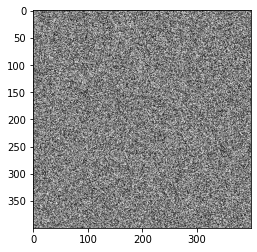

In [20]:
import matplotlib.pyplot as plt

plt.imshow(array,cmap='gray') # il existe de nombreuses 'colormap'
plt.show()

La fonction `imshow` requiert des réels compris entre 0 et 1 ou des entiers compris entre 0 et 255.

(400, 400) int32


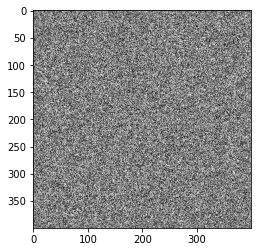

In [23]:
array = np.random.randint(low=0,high=255,size=(400,400))
print(array.shape, array.dtype)

plt.imshow(array,cmap='gray') 
plt.show()

Il est possible de travailler "en couleur" en utilisant des tableaux à trois dimension, de taille (n,p,3).

(400, 400, 3) int32


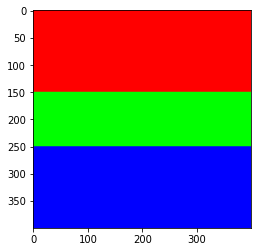

In [26]:
array = np.zeros((400,400,3),dtype=int) # un tableu rempli de 0
print(array.shape, array.dtype)

# prudence avec les indices numpy
# les "multi-affectations" sont possibles
array[   :150,:,0]=255 # 0 -> canal rouge
array[150:250,:,1]=255 # 1 -> canal vert
array[250:   ,:,2]=255 # 2 -> canal bleu

plt.imshow(array)
plt.show()

## Utiliser un algorithme spécifique d'une librairie de machine learning
L'algorithme est celui dit des "K-moyennes" et la librairie est `sklearn`. Cet algorithme permet de "regrouper des données proches". Dans l'exemple ci-dessous, on construit un nuage de points consitués de deux "sous-nuages".

(20,)


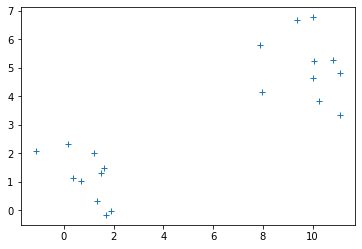

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X  = np.concatenate((np.random.normal(loc=1, size=(10,)),
                     np.random.normal(loc=10, size=(10,))))
Y  = np.concatenate((np.random.normal(loc=1, size=(10,)),
                     np.random.normal(loc=5, size=(10,)))) # <- lisp

print(X.shape)
plt.plot(X,Y, '+')
plt.show()

On souhaite utiliser l'algorithme des K-moyennes pour trouver les centres des "sous-nuages".

[[9.85124528 5.04951334]
 [0.93947539 1.15331288]] <class 'numpy.ndarray'>


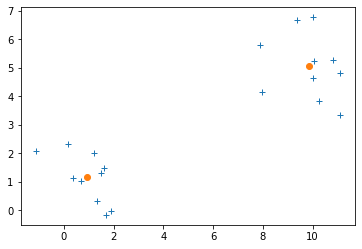

In [2]:
from sklearn.cluster import KMeans

points = list(zip(X,Y))

kmeans = KMeans(n_clusters=2) # nombre de sous-nuages recherchés
res = kmeans.fit(points) 
centers = res.cluster_centers_ # liste des centres

print(centers, type(centers))
plt.plot(X,Y,'+') # on raffiche le nuage de départ
#plt.plot([centers[0][0], centers[1][0]], [centers[0][1], centers[1][1]], 'o') # affreux
plt.plot(*centers.T, 'o') # joli
plt.show()

## Expression régulière de validation du nom de fichier

In [5]:
import re
p = re.compile("^DMAN([A-Z][a-z]+){3,9}.ipynb$")

nom = "DMANNomDeLaTotoTutuTiti.ipynb"

print(f"Nom de fichier {''if p.match(nom)else 'in'}correct.")

Nom de fichier correct.


## Encoder une image en base64 pour l'insérer dans un notebook

Il y a deux étapes pour encoder une image en base64 dans le but de l'insérer dans un notebook. La première étape consiste à encoder l'image. Par exemple, dans un environnemnet unix, l'instruction

`base64 mon_image.png`

retourne la chaîne de caractères recherchée. Il faut ensuite mettre cette chaîne à la place de `<DATA>` dans la ligne de code html suivante :